In [67]:
from os.path import exists, normpath, isfile
import wave
from PIL import Image
import numpy as np
import pickle
import numpy as np
import pandas as pd
from os.path import exists, normpath, isfile
from numpy import asarray
import matplotlib.pyplot as plt
from numpy import savetxt
import speaker_verification_toolkit.tools as svt
import librosa
import librosa.display
from scipy import signal
import random
from IPython.display import Audio
instances = pd.read_csv('combined_data.csv')
df = instances[['id','covid_status']]
data = pd.read_csv('psr_features_seg50.csv', )

In [68]:
folders = []
for i in range(20200113+1, 20220914):
    if exists('Extracted_data/'+str(i)):
        folders.append(str(i))
#folders
files0 = []
for i in folders:
    for j in instances['id']:
        if exists(normpath('Extracted_data/'+i+'/'+str(j))):
            print('y', end = '')
            files0.append(i+'/'+str(j))
#         else:
#             print('no', end = ' ')

yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy

In [69]:
# obtain 2D vector space to create histograms:
files = []
for i in files0:
    files.append(i.replace('/', '-'))

In [71]:
# inspect instance paths:
len(files0)

1034

In [72]:
files

['20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93',
 '20200720-0zAgZhOXaGhmL1SnhkzJOIoowKg2',
 '20200720-N49IPlluNddotKfNlRNVJJ2Ad6E3',
 '20200720-2Kc88N5ZQKXucjghAP4Jzq0Dnej2',
 '20200720-wfC9G2gEocPkwkqAtaGxZDbK4oF2',
 '20200720-6pXKrZlDycStXTNMBjGXtxxYfvc2',
 '20200720-Id2BHKfccpS2K8eOtrXRKjBAsds1',
 '20200720-XwiK6FSjg5b5RuQQFYmz67zSpYC3',
 '20200720-BHFxu6LIoWfHOaN9fXmkO5xBXyz2',
 '20200720-OnYf35hpRnNpCxV6vTU9n2ETMiD2',
 '20200720-3Vqysidm4ihlWFBQPErMAClnMbu2',
 '20200720-Afi7SdxjNOetySybYTZ7RPxwFiW2',
 '20200720-bTiu7RJ0JkPVSja5Sr5YSHBulQ43',
 '20200720-rlklHwPKGycGalH7q9XMRnUqXxd2',
 '20200720-5w8ZIMTjkXOMI78Q3sccWcvMKiI2',
 '20200720-LW6U5C8CENR1PsmldatYGdCBcYg1',
 '20200720-RV4V6j3c5cbSb2B4pY9vlF6kbeE2',
 '20200720-Sy1VK1UgX0ZMcMJitgPal1sp8jj2',
 '20200720-4drDZUlQcteX5StlFT2CXEL0N0L2',
 '20200720-qSDQMZj4iqhaRUz1SvwiUqyUzKH3',
 '20200720-vX3NZt9tyQUhXgS4dlz55VGEMdU2',
 '20200720-JQyIFoDDO1fwOuEH0GaOFskQ90q1',
 '20200803-H3sxaOqiOSgbKWig7NdWEPgrm6f2',
 '20200803-HN3yAvicf4RTVGb6l0PjM41

In [77]:
variables = ['breathing-deep', 'breathing-shallow', 'cough-heavy', 'cough-shallow', 'counting-fast', 'counting-normal', 'vowel-a', 'vowel-e', 'vowel-o']

In [66]:
# manual inspection of instances at audio instance:
file = 'Extracted_data/' + files0[1]+ '/counting-fast.wav'
x, sr = librosa.load(file)
Audio(data = x, rate=sr)
# for i in range(len(start)):
#     librosa.display.waveplot(sr = sr, y = x[start[i]:stop[i]])
#     plt.show()

In [22]:
wav = wave.open('Extracted_data/'+ files0[3]+'/cough-heavy.wav', 'r')
raw = wav.readframes(-1) # returns frames of audio as byte objects
raw = np.frombuffer(raw, 'int16') # transformation into array

In [67]:
# manual inspection of cough signals
Audio(raw, rate=44000)

<Figure size 360x360 with 0 Axes>

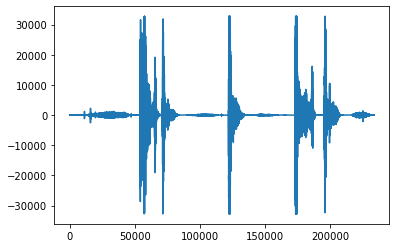

<Figure size 360x360 with 0 Axes>

In [68]:
plt.plot(raw)
plt.figure(figsize=(5,5))

In [45]:
# Extract 50 segments from each signal * 9 variables per individual
saved_instances = []
instance_names_R = []
for i in range(len(files0)):
    for variable in variables:
        filename = 'Extracted_data/'+files0[i]+ '/'+ variable+'.wav'
        if exists(normpath(filename)):   
            wav = wave.open(filename, 'r')
            data = wav.readframes(-1) # returns frames of audio as byte objects
            data = np.frombuffer(data,'int16') # transformation into array
            if len(data) > 10000:
                signal, sr = librosa.load(filename)
                signal = 0.90 * (signal/abs(max(signal)))
                signal = svt.rms_silence_filter(signal) # threshold= is a parameter here.
                if len(signal) > 1000:
                    hop_length = int(len(signal)/50) # 50 segments
                    frames = librosa.util.frame(signal, frame_length=1024, hop_length=hop_length)

                    for j in range(0,frames.shape[1]):
                        savetxt('psr_features_seg50/seg_'+str(j)+'-'+variable+'-'+files[i]+'.csv', frames[:,j], delimiter=',')
                        instance_names_R.append('psr_features_seg50/seg_'+str(j)+'-'+variable+'-'+files[i]+'.csv')
                        print(count, end = ' ')
                        count +=1

<ipython-input-45-f5d174dda8cf>:13: RuntimeWarning: invalid value encountered in true_divide
  signal = 0.90 * (signal/abs(max(signal)))


In [47]:
len(instance_names_R)

442864

In [48]:
instance_names_R

['psr_features_seg50/seg_0-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 'psr_features_seg50/seg_1-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 'psr_features_seg50/seg_2-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 'psr_features_seg50/seg_3-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 'psr_features_seg50/seg_4-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 'psr_features_seg50/seg_5-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 'psr_features_seg50/seg_6-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 'psr_features_seg50/seg_7-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 'psr_features_seg50/seg_8-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 'psr_features_seg50/seg_9-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 'psr_features_seg50/seg_10-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 'psr_features_seg50/seg_11-counting-fast-20200707-ZiwS2q40gsX5X

In [49]:
# save instance names for phase space reconstruction: This will be applied in: (R)
# Code van be found in: Multicore processing.R
data = pd.DataFrame(instance_names_R)
data.to_csv('psr_features_seg50.csv', index_label=False)
pd.read_csv('psr_features_seg50.csv')

0
0       psr_features_seg50/seg_0-counting-fast-2020070...
1       psr_features_seg50/seg_1-counting-fast-2020070...
2       psr_features_seg50/seg_2-counting-fast-2020070...
3       psr_features_seg50/seg_3-counting-fast-2020070...
4       psr_features_seg50/seg_4-counting-fast-2020070...
...                                                   ...
442859  psr_features_seg50/seg_45-vowel-o-20210914-M7f...
442860  psr_features_seg50/seg_46-vowel-o-20210914-M7f...
442861  psr_features_seg50/seg_47-vowel-o-20210914-M7f...
442862  psr_features_seg50/seg_48-vowel-o-20210914-M7f...
442863  psr_features_seg50/seg_49-vowel-o-20210914-M7f...

[442864 rows x 1 columns]

In [60]:
R_names = []
for i in instance_names_R:
    R_names.append(i[19:].replace('.csv',''))

In [61]:
print(instance_names_R[99])
print(R_names[99])

psr_features_seg50/seg_49-counting-normal-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv
seg_49-counting-normal-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93


In [62]:
data = pd.DataFrame(R_names)
data.to_csv('psr_names.csv', index_label=False)
pd.read_csv('psr_names.csv')

0
0       seg_0-counting-fast-20200707-ZiwS2q40gsX5X7pMp...
1       seg_1-counting-fast-20200707-ZiwS2q40gsX5X7pMp...
2       seg_2-counting-fast-20200707-ZiwS2q40gsX5X7pMp...
3       seg_3-counting-fast-20200707-ZiwS2q40gsX5X7pMp...
4       seg_4-counting-fast-20200707-ZiwS2q40gsX5X7pMp...
...                                                   ...
442859  seg_45-vowel-o-20210914-M7fB5i9Pj0Xh2wrlgUYZw4...
442860  seg_46-vowel-o-20210914-M7fB5i9Pj0Xh2wrlgUYZw4...
442861  seg_47-vowel-o-20210914-M7fB5i9Pj0Xh2wrlgUYZw4...
442862  seg_48-vowel-o-20210914-M7fB5i9Pj0Xh2wrlgUYZw4...
442863  seg_49-vowel-o-20210914-M7fB5i9Pj0Xh2wrlgUYZw4...

[442864 rows x 1 columns]

In [ ]:
# the following code loads transformed segments instances, stores corresponding dependent variable
# after that, baseline features (mfccs, delta, delta-delta, kurtosis, ZCR, Log Energies) are merged
# with the experimental features to evaulate research question (I).
# Sub questions will be answered using variations of experimental features.
# These are extracted in the following code as well. See thesis for fore info regarding 
# sub questions (II) & (III)

In [71]:
data = pd.read_csv('psr_features_seg50.csv')

In [73]:
instances_3D = []
for i in data['0']:
    instances_3D.append('3D_'+i)

experimental_feature = []
names = []
count = 0
for i in instances_3D:
    if exists(normpath(i)):
        experimental_feature.append(np.array(pd.read_csv(i)))
        names.append(i)
        print(count, end = ' ')
        count += 1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

KeyboardInterrupt: 

In [74]:
experimental_feature = np.array(experimental_feature)

<ipython-input-74-272b7725b8fe>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  experimental_feature = np.array(experimental_feature)


In [75]:
# This function gets the covid status (dependent variable) corresponding to id
Y = []
count = 1
for j in range(len(names)):
    for i in range(len(df['id'])):
        if df['id'][i] in names[j]:
            print(count, end = ' ')
            count += 1
            Y.append(df['covid_status'][i])

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [19]:
instances_R = pd.read_csv('psr_features_seg50.csv')

In [34]:
R_names2 = []
for i in instances_R['0']:
    R_names2.append(i.replace('psr_features_seg50','3D_psr_features_seg50'))

In [35]:
R_names2

['3D_psr_features_seg50/seg_0-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_1-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_2-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_3-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_4-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_5-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_6-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_7-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_8-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_9-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_10-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_11-

In [64]:
Sanity_check_R  = []
for i in R_names2:
    if not exists(normpath(i)):
        Sanity_check_R.append(i)

In [65]:
len(Sanity_check_R)

149310

In [60]:
exists(normpath('3D_psr_features_seg50/seg_8-vowel-o-20201031-QOOsSEpxcdW688dCIFZpYkwZzP12.csv'))

True

In [55]:
R_names3 = []
for i in Sanity_check_R:
    R_names3.append(i[len('3D_psr_features_seg50/'):].replace('.csv',''))

In [56]:
# remaining instances to be transformed and saved
remaining = pd.DataFrame(Sanity_check_R)
remaining.to_csv('remaining_psr_seg50.csv', index_label=False)
pd.read_csv('remaining_psr_seg50.csv')

0
0       3D_psr_features_seg50/seg_1-counting-fast-2020...
1       3D_psr_features_seg50/seg_8-counting-fast-2020...
2       3D_psr_features_seg50/seg_10-counting-fast-202...
3       3D_psr_features_seg50/seg_12-counting-fast-202...
4       3D_psr_features_seg50/seg_13-counting-fast-202...
...                                                   ...
149305  3D_psr_features_seg50/seg_42-vowel-o-20210914-...
149306  3D_psr_features_seg50/seg_44-vowel-o-20210914-...
149307  3D_psr_features_seg50/seg_45-vowel-o-20210914-...
149308  3D_psr_features_seg50/seg_46-vowel-o-20210914-...
149309  3D_psr_features_seg50/seg_49-vowel-o-20210914-...

[149310 rows x 1 columns]

In [57]:
# save names
R_names3 = pd.DataFrame(R_names3)
R_names3.to_csv('remaining_names.csv', index_label=False)
pd.read_csv('remaining_names.csv')

0
0       seg_1-counting-fast-20200707-ZiwS2q40gsX5X7pMp...
1       seg_8-counting-fast-20200707-ZiwS2q40gsX5X7pMp...
2       seg_10-counting-fast-20200707-ZiwS2q40gsX5X7pM...
3       seg_12-counting-fast-20200707-ZiwS2q40gsX5X7pM...
4       seg_13-counting-fast-20200707-ZiwS2q40gsX5X7pM...
...                                                   ...
149305  seg_42-vowel-o-20210914-M7fB5i9Pj0Xh2wrlgUYZw4...
149306  seg_44-vowel-o-20210914-M7fB5i9Pj0Xh2wrlgUYZw4...
149307  seg_45-vowel-o-20210914-M7fB5i9Pj0Xh2wrlgUYZw4...
149308  seg_46-vowel-o-20210914-M7fB5i9Pj0Xh2wrlgUYZw4...
149309  seg_49-vowel-o-20210914-M7fB5i9Pj0Xh2wrlgUYZw4...

[149310 rows x 1 columns]

In [194]:
# save pickle x,y data for CNN & Resnet baseline model training
import pickle
with open('baseline_SMOTE_train_x.pickle', 'rb') as file:
    X_res = pickle.load(file)

with open('baseline_SMOTE_train_y.pickle', 'rb') as file:
    y_res = pickle.load(file)

In [76]:
np.bincount(y_res)

array([230792, 230792], dtype=int64)

In [73]:
# read phase spaced information
phase_space_feature = []
psr_names = []
for i in R_names2:
    if exists(normpath(i)):
        phase_space_feature.append(np.array(pd.read_csv(i)))
        psr_names.append(i)

In [74]:
phase_space_feature = np.array(phase_space_feature)

<ipython-input-74-0c12a8bc539a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  phase_space_feature = np.array(phase_space_feature)


In [77]:
# This function gets the covid status (dependent variable) corresponding to id
Y = []
count = 1
for j in range(len(psr_names)):
    for i in range(len(df['id'])):
        if df['id'][i] in psr_names[j]:
            print(count, end = ' ')
            count += 1
            Y.append(df['covid_status'][i])

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 

3514 3515 3516 3517 3518 3519 3520 3521 3522 3523 3524 3525 3526 3527 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541 3542 3543 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555 3556 3557 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569 3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611 3612 3613 3614 3615 3616 3617 3618 3619 3620 3621 3622 3623 3624 3625 3626 3627 3628 3629 3630 3631 3632 3633 3634 3635 3636 3637 3638 3639 3640 3641 3642 3643 3644 3645 3646 3647 3648 3649 3650 3651 3652 3653 3654 3655 3656 3657 3658 3659 3660 3661 3662 3663 3664 3665 3666 3667 3668 3669 3670 3671 3672 3673 3674 3675 3676 3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704 3705 3706 3707 3708 3709 3710 3711 3712 3713 

5155 5156 5157 5158 5159 5160 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339 5340 5341 5342 5343 5344 5345 5346 5347 5348 5349 5350 5351 5352 5353 5354 

 6800 6801 6802 6803 6804 6805 6806 6807 6808 6809 6810 6811 6812 6813 6814 6815 6816 6817 6818 6819 6820 6821 6822 6823 6824 6825 6826 6827 6828 6829 6830 6831 6832 6833 6834 6835 6836 6837 6838 6839 6840 6841 6842 6843 6844 6845 6846 6847 6848 6849 6850 6851 6852 6853 6854 6855 6856 6857 6858 6859 6860 6861 6862 6863 6864 6865 6866 6867 6868 6869 6870 6871 6872 6873 6874 6875 6876 6877 6878 6879 6880 6881 6882 6883 6884 6885 6886 6887 6888 6889 6890 6891 6892 6893 6894 6895 6896 6897 6898 6899 6900 6901 6902 6903 6904 6905 6906 6907 6908 6909 6910 6911 6912 6913 6914 6915 6916 6917 6918 6919 6920 6921 6922 6923 6924 6925 6926 6927 6928 6929 6930 6931 6932 6933 6934 6935 6936 6937 6938 6939 6940 6941 6942 6943 6944 6945 6946 6947 6948 6949 6950 6951 6952 6953 6954 6955 6956 6957 6958 6959 6960 6961 6962 6963 6964 6965 6966 6967 6968 6969 6970 6971 6972 6973 6974 6975 6976 6977 6978 6979 6980 6981 6982 6983 6984 6985 6986 6987 6988 6989 6990 6991 6992 6993 6994 6995 6996 6997 6998 6999

8447 8448 8449 8450 8451 8452 8453 8454 8455 8456 8457 8458 8459 8460 8461 8462 8463 8464 8465 8466 8467 8468 8469 8470 8471 8472 8473 8474 8475 8476 8477 8478 8479 8480 8481 8482 8483 8484 8485 8486 8487 8488 8489 8490 8491 8492 8493 8494 8495 8496 8497 8498 8499 8500 8501 8502 8503 8504 8505 8506 8507 8508 8509 8510 8511 8512 8513 8514 8515 8516 8517 8518 8519 8520 8521 8522 8523 8524 8525 8526 8527 8528 8529 8530 8531 8532 8533 8534 8535 8536 8537 8538 8539 8540 8541 8542 8543 8544 8545 8546 8547 8548 8549 8550 8551 8552 8553 8554 8555 8556 8557 8558 8559 8560 8561 8562 8563 8564 8565 8566 8567 8568 8569 8570 8571 8572 8573 8574 8575 8576 8577 8578 8579 8580 8581 8582 8583 8584 8585 8586 8587 8588 8589 8590 8591 8592 8593 8594 8595 8596 8597 8598 8599 8600 8601 8602 8603 8604 8605 8606 8607 8608 8609 8610 8611 8612 8613 8614 8615 8616 8617 8618 8619 8620 8621 8622 8623 8624 8625 8626 8627 8628 8629 8630 8631 8632 8633 8634 8635 8636 8637 8638 8639 8640 8641 8642 8643 8644 8645 8646 

10072 10073 10074 10075 10076 10077 10078 10079 10080 10081 10082 10083 10084 10085 10086 10087 10088 10089 10090 10091 10092 10093 10094 10095 10096 10097 10098 10099 10100 10101 10102 10103 10104 10105 10106 10107 10108 10109 10110 10111 10112 10113 10114 10115 10116 10117 10118 10119 10120 10121 10122 10123 10124 10125 10126 10127 10128 10129 10130 10131 10132 10133 10134 10135 10136 10137 10138 10139 10140 10141 10142 10143 10144 10145 10146 10147 10148 10149 10150 10151 10152 10153 10154 10155 10156 10157 10158 10159 10160 10161 10162 10163 10164 10165 10166 10167 10168 10169 10170 10171 10172 10173 10174 10175 10176 10177 10178 10179 10180 10181 10182 10183 10184 10185 10186 10187 10188 10189 10190 10191 10192 10193 10194 10195 10196 10197 10198 10199 10200 10201 10202 10203 10204 10205 10206 10207 10208 10209 10210 10211 10212 10213 10214 10215 10216 10217 10218 10219 10220 10221 10222 10223 10224 10225 10226 10227 10228 10229 10230 10231 10232 10233 10234 10235 10236 10237 1023

11439 11440 11441 11442 11443 11444 11445 11446 11447 11448 11449 11450 11451 11452 11453 11454 11455 11456 11457 11458 11459 11460 11461 11462 11463 11464 11465 11466 11467 11468 11469 11470 11471 11472 11473 11474 11475 11476 11477 11478 11479 11480 11481 11482 11483 11484 11485 11486 11487 11488 11489 11490 11491 11492 11493 11494 11495 11496 11497 11498 11499 11500 11501 11502 11503 11504 11505 11506 11507 11508 11509 11510 11511 11512 11513 11514 11515 11516 11517 11518 11519 11520 11521 11522 11523 11524 11525 11526 11527 11528 11529 11530 11531 11532 11533 11534 11535 11536 11537 11538 11539 11540 11541 11542 11543 11544 11545 11546 11547 11548 11549 11550 11551 11552 11553 11554 11555 11556 11557 11558 11559 11560 11561 11562 11563 11564 11565 11566 11567 11568 11569 11570 11571 11572 11573 11574 11575 11576 11577 11578 11579 11580 11581 11582 11583 11584 11585 11586 11587 11588 11589 11590 11591 11592 11593 11594 11595 11596 11597 11598 11599 11600 11601 11602 11603 11604 1160

12808 12809 12810 12811 12812 12813 12814 12815 12816 12817 12818 12819 12820 12821 12822 12823 12824 12825 12826 12827 12828 12829 12830 12831 12832 12833 12834 12835 12836 12837 12838 12839 12840 12841 12842 12843 12844 12845 12846 12847 12848 12849 12850 12851 12852 12853 12854 12855 12856 12857 12858 12859 12860 12861 12862 12863 12864 12865 12866 12867 12868 12869 12870 12871 12872 12873 12874 12875 12876 12877 12878 12879 12880 12881 12882 12883 12884 12885 12886 12887 12888 12889 12890 12891 12892 12893 12894 12895 12896 12897 12898 12899 12900 12901 12902 12903 12904 12905 12906 12907 12908 12909 12910 12911 12912 12913 12914 12915 12916 12917 12918 12919 12920 12921 12922 12923 12924 12925 12926 12927 12928 12929 12930 12931 12932 12933 12934 12935 12936 12937 12938 12939 12940 12941 12942 12943 12944 12945 12946 12947 12948 12949 12950 12951 12952 12953 12954 12955 12956 12957 12958 12959 12960 12961 12962 12963 12964 12965 12966 12967 12968 12969 12970 12971 12972 12973 1297

14183 14184 14185 14186 14187 14188 14189 14190 14191 14192 14193 14194 14195 14196 14197 14198 14199 14200 14201 14202 14203 14204 14205 14206 14207 14208 14209 14210 14211 14212 14213 14214 14215 14216 14217 14218 14219 14220 14221 14222 14223 14224 14225 14226 14227 14228 14229 14230 14231 14232 14233 14234 14235 14236 14237 14238 14239 14240 14241 14242 14243 14244 14245 14246 14247 14248 14249 14250 14251 14252 14253 14254 14255 14256 14257 14258 14259 14260 14261 14262 14263 14264 14265 14266 14267 14268 14269 14270 14271 14272 14273 14274 14275 14276 14277 14278 14279 14280 14281 14282 14283 14284 14285 14286 14287 14288 14289 14290 14291 14292 14293 14294 14295 14296 14297 14298 14299 14300 14301 14302 14303 14304 14305 14306 14307 14308 14309 14310 14311 14312 14313 14314 14315 14316 14317 14318 14319 14320 14321 14322 14323 14324 14325 14326 14327 14328 14329 14330 14331 14332 14333 14334 14335 14336 14337 14338 14339 14340 14341 14342 14343 14344 14345 14346 14347 14348 1434

15565 15566 15567 15568 15569 15570 15571 15572 15573 15574 15575 15576 15577 15578 15579 15580 15581 15582 15583 15584 15585 15586 15587 15588 15589 15590 15591 15592 15593 15594 15595 15596 15597 15598 15599 15600 15601 15602 15603 15604 15605 15606 15607 15608 15609 15610 15611 15612 15613 15614 15615 15616 15617 15618 15619 15620 15621 15622 15623 15624 15625 15626 15627 15628 15629 15630 15631 15632 15633 15634 15635 15636 15637 15638 15639 15640 15641 15642 15643 15644 15645 15646 15647 15648 15649 15650 15651 15652 15653 15654 15655 15656 15657 15658 15659 15660 15661 15662 15663 15664 15665 15666 15667 15668 15669 15670 15671 15672 15673 15674 15675 15676 15677 15678 15679 15680 15681 15682 15683 15684 15685 15686 15687 15688 15689 15690 15691 15692 15693 15694 15695 15696 15697 15698 15699 15700 15701 15702 15703 15704 15705 15706 15707 15708 15709 15710 15711 15712 15713 15714 15715 15716 15717 15718 15719 15720 15721 15722 15723 15724 15725 15726 15727 15728 15729 15730 1573

 16942 16943 16944 16945 16946 16947 16948 16949 16950 16951 16952 16953 16954 16955 16956 16957 16958 16959 16960 16961 16962 16963 16964 16965 16966 16967 16968 16969 16970 16971 16972 16973 16974 16975 16976 16977 16978 16979 16980 16981 16982 16983 16984 16985 16986 16987 16988 16989 16990 16991 16992 16993 16994 16995 16996 16997 16998 16999 17000 17001 17002 17003 17004 17005 17006 17007 17008 17009 17010 17011 17012 17013 17014 17015 17016 17017 17018 17019 17020 17021 17022 17023 17024 17025 17026 17027 17028 17029 17030 17031 17032 17033 17034 17035 17036 17037 17038 17039 17040 17041 17042 17043 17044 17045 17046 17047 17048 17049 17050 17051 17052 17053 17054 17055 17056 17057 17058 17059 17060 17061 17062 17063 17064 17065 17066 17067 17068 17069 17070 17071 17072 17073 17074 17075 17076 17077 17078 17079 17080 17081 17082 17083 17084 17085 17086 17087 17088 17089 17090 17091 17092 17093 17094 17095 17096 17097 17098 17099 17100 17101 17102 17103 17104 17105 17106 17107 171

18317 18318 18319 18320 18321 18322 18323 18324 18325 18326 18327 18328 18329 18330 18331 18332 18333 18334 18335 18336 18337 18338 18339 18340 18341 18342 18343 18344 18345 18346 18347 18348 18349 18350 18351 18352 18353 18354 18355 18356 18357 18358 18359 18360 18361 18362 18363 18364 18365 18366 18367 18368 18369 18370 18371 18372 18373 18374 18375 18376 18377 18378 18379 18380 18381 18382 18383 18384 18385 18386 18387 18388 18389 18390 18391 18392 18393 18394 18395 18396 18397 18398 18399 18400 18401 18402 18403 18404 18405 18406 18407 18408 18409 18410 18411 18412 18413 18414 18415 18416 18417 18418 18419 18420 18421 18422 18423 18424 18425 18426 18427 18428 18429 18430 18431 18432 18433 18434 18435 18436 18437 18438 18439 18440 18441 18442 18443 18444 18445 18446 18447 18448 18449 18450 18451 18452 18453 18454 18455 18456 18457 18458 18459 18460 18461 18462 18463 18464 18465 18466 18467 18468 18469 18470 18471 18472 18473 18474 18475 18476 18477 18478 18479 18480 18481 18482 1848

 19694 19695 19696 19697 19698 19699 19700 19701 19702 19703 19704 19705 19706 19707 19708 19709 19710 19711 19712 19713 19714 19715 19716 19717 19718 19719 19720 19721 19722 19723 19724 19725 19726 19727 19728 19729 19730 19731 19732 19733 19734 19735 19736 19737 19738 19739 19740 19741 19742 19743 19744 19745 19746 19747 19748 19749 19750 19751 19752 19753 19754 19755 19756 19757 19758 19759 19760 19761 19762 19763 19764 19765 19766 19767 19768 19769 19770 19771 19772 19773 19774 19775 19776 19777 19778 19779 19780 19781 19782 19783 19784 19785 19786 19787 19788 19789 19790 19791 19792 19793 19794 19795 19796 19797 19798 19799 19800 19801 19802 19803 19804 19805 19806 19807 19808 19809 19810 19811 19812 19813 19814 19815 19816 19817 19818 19819 19820 19821 19822 19823 19824 19825 19826 19827 19828 19829 19830 19831 19832 19833 19834 19835 19836 19837 19838 19839 19840 19841 19842 19843 19844 19845 19846 19847 19848 19849 19850 19851 19852 19853 19854 19855 19856 19857 19858 19859 198

 21066 21067 21068 21069 21070 21071 21072 21073 21074 21075 21076 21077 21078 21079 21080 21081 21082 21083 21084 21085 21086 21087 21088 21089 21090 21091 21092 21093 21094 21095 21096 21097 21098 21099 21100 21101 21102 21103 21104 21105 21106 21107 21108 21109 21110 21111 21112 21113 21114 21115 21116 21117 21118 21119 21120 21121 21122 21123 21124 21125 21126 21127 21128 21129 21130 21131 21132 21133 21134 21135 21136 21137 21138 21139 21140 21141 21142 21143 21144 21145 21146 21147 21148 21149 21150 21151 21152 21153 21154 21155 21156 21157 21158 21159 21160 21161 21162 21163 21164 21165 21166 21167 21168 21169 21170 21171 21172 21173 21174 21175 21176 21177 21178 21179 21180 21181 21182 21183 21184 21185 21186 21187 21188 21189 21190 21191 21192 21193 21194 21195 21196 21197 21198 21199 21200 21201 21202 21203 21204 21205 21206 21207 21208 21209 21210 21211 21212 21213 21214 21215 21216 21217 21218 21219 21220 21221 21222 21223 21224 21225 21226 21227 21228 21229 21230 21231 212

 22432 22433 22434 22435 22436 22437 22438 22439 22440 22441 22442 22443 22444 22445 22446 22447 22448 22449 22450 22451 22452 22453 22454 22455 22456 22457 22458 22459 22460 22461 22462 22463 22464 22465 22466 22467 22468 22469 22470 22471 22472 22473 22474 22475 22476 22477 22478 22479 22480 22481 22482 22483 22484 22485 22486 22487 22488 22489 22490 22491 22492 22493 22494 22495 22496 22497 22498 22499 22500 22501 22502 22503 22504 22505 22506 22507 22508 22509 22510 22511 22512 22513 22514 22515 22516 22517 22518 22519 22520 22521 22522 22523 22524 22525 22526 22527 22528 22529 22530 22531 22532 22533 22534 22535 22536 22537 22538 22539 22540 22541 22542 22543 22544 22545 22546 22547 22548 22549 22550 22551 22552 22553 22554 22555 22556 22557 22558 22559 22560 22561 22562 22563 22564 22565 22566 22567 22568 22569 22570 22571 22572 22573 22574 22575 22576 22577 22578 22579 22580 22581 22582 22583 22584 22585 22586 22587 22588 22589 22590 22591 22592 22593 22594 22595 22596 22597 225

 23807 23808 23809 23810 23811 23812 23813 23814 23815 23816 23817 23818 23819 23820 23821 23822 23823 23824 23825 23826 23827 23828 23829 23830 23831 23832 23833 23834 23835 23836 23837 23838 23839 23840 23841 23842 23843 23844 23845 23846 23847 23848 23849 23850 23851 23852 23853 23854 23855 23856 23857 23858 23859 23860 23861 23862 23863 23864 23865 23866 23867 23868 23869 23870 23871 23872 23873 23874 23875 23876 23877 23878 23879 23880 23881 23882 23883 23884 23885 23886 23887 23888 23889 23890 23891 23892 23893 23894 23895 23896 23897 23898 23899 23900 23901 23902 23903 23904 23905 23906 23907 23908 23909 23910 23911 23912 23913 23914 23915 23916 23917 23918 23919 23920 23921 23922 23923 23924 23925 23926 23927 23928 23929 23930 23931 23932 23933 23934 23935 23936 23937 23938 23939 23940 23941 23942 23943 23944 23945 23946 23947 23948 23949 23950 23951 23952 23953 23954 23955 23956 23957 23958 23959 23960 23961 23962 23963 23964 23965 23966 23967 23968 23969 23970 23971 23972 239

25180 25181 25182 25183 25184 25185 25186 25187 25188 25189 25190 25191 25192 25193 25194 25195 25196 25197 25198 25199 25200 25201 25202 25203 25204 25205 25206 25207 25208 25209 25210 25211 25212 25213 25214 25215 25216 25217 25218 25219 25220 25221 25222 25223 25224 25225 25226 25227 25228 25229 25230 25231 25232 25233 25234 25235 25236 25237 25238 25239 25240 25241 25242 25243 25244 25245 25246 25247 25248 25249 25250 25251 25252 25253 25254 25255 25256 25257 25258 25259 25260 25261 25262 25263 25264 25265 25266 25267 25268 25269 25270 25271 25272 25273 25274 25275 25276 25277 25278 25279 25280 25281 25282 25283 25284 25285 25286 25287 25288 25289 25290 25291 25292 25293 25294 25295 25296 25297 25298 25299 25300 25301 25302 25303 25304 25305 25306 25307 25308 25309 25310 25311 25312 25313 25314 25315 25316 25317 25318 25319 25320 25321 25322 25323 25324 25325 25326 25327 25328 25329 25330 25331 25332 25333 25334 25335 25336 25337 25338 25339 25340 25341 25342 25343 25344 25345 2534

26560 26561 26562 26563 26564 26565 26566 26567 26568 26569 26570 26571 26572 26573 26574 26575 26576 26577 26578 26579 26580 26581 26582 26583 26584 26585 26586 26587 26588 26589 26590 26591 26592 26593 26594 26595 26596 26597 26598 26599 26600 26601 26602 26603 26604 26605 26606 26607 26608 26609 26610 26611 26612 26613 26614 26615 26616 26617 26618 26619 26620 26621 26622 26623 26624 26625 26626 26627 26628 26629 26630 26631 26632 26633 26634 26635 26636 26637 26638 26639 26640 26641 26642 26643 26644 26645 26646 26647 26648 26649 26650 26651 26652 26653 26654 26655 26656 26657 26658 26659 26660 26661 26662 26663 26664 26665 26666 26667 26668 26669 26670 26671 26672 26673 26674 26675 26676 26677 26678 26679 26680 26681 26682 26683 26684 26685 26686 26687 26688 26689 26690 26691 26692 26693 26694 26695 26696 26697 26698 26699 26700 26701 26702 26703 26704 26705 26706 26707 26708 26709 26710 26711 26712 26713 26714 26715 26716 26717 26718 26719 26720 26721 26722 26723 26724 26725 2672

27939 27940 27941 27942 27943 27944 27945 27946 27947 27948 27949 27950 27951 27952 27953 27954 27955 27956 27957 27958 27959 27960 27961 27962 27963 27964 27965 27966 27967 27968 27969 27970 27971 27972 27973 27974 27975 27976 27977 27978 27979 27980 27981 27982 27983 27984 27985 27986 27987 27988 27989 27990 27991 27992 27993 27994 27995 27996 27997 27998 27999 28000 28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 28013 28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 28050 28051 28052 28053 28054 28055 28056 28057 28058 28059 28060 28061 28062 28063 28064 28065 28066 28067 28068 28069 28070 28071 28072 28073 28074 28075 28076 28077 28078 28079 28080 28081 28082 28083 28084 28085 28086 28087 28088 28089 28090 28091 28092 28093 28094 28095 28096 28097 28098 28099 28100 28101 28102 28103 28104 2810

29305 29306 29307 29308 29309 29310 29311 29312 29313 29314 29315 29316 29317 29318 29319 29320 29321 29322 29323 29324 29325 29326 29327 29328 29329 29330 29331 29332 29333 29334 29335 29336 29337 29338 29339 29340 29341 29342 29343 29344 29345 29346 29347 29348 29349 29350 29351 29352 29353 29354 29355 29356 29357 29358 29359 29360 29361 29362 29363 29364 29365 29366 29367 29368 29369 29370 29371 29372 29373 29374 29375 29376 29377 29378 29379 29380 29381 29382 29383 29384 29385 29386 29387 29388 29389 29390 29391 29392 29393 29394 29395 29396 29397 29398 29399 29400 29401 29402 29403 29404 29405 29406 29407 29408 29409 29410 29411 29412 29413 29414 29415 29416 29417 29418 29419 29420 29421 29422 29423 29424 29425 29426 29427 29428 29429 29430 29431 29432 29433 29434 29435 29436 29437 29438 29439 29440 29441 29442 29443 29444 29445 29446 29447 29448 29449 29450 29451 29452 29453 29454 29455 29456 29457 29458 29459 29460 29461 29462 29463 29464 29465 29466 29467 29468 29469 29470 2947

30678 30679 30680 30681 30682 30683 30684 30685 30686 30687 30688 30689 30690 30691 30692 30693 30694 30695 30696 30697 30698 30699 30700 30701 30702 30703 30704 30705 30706 30707 30708 30709 30710 30711 30712 30713 30714 30715 30716 30717 30718 30719 30720 30721 30722 30723 30724 30725 30726 30727 30728 30729 30730 30731 30732 30733 30734 30735 30736 30737 30738 30739 30740 30741 30742 30743 30744 30745 30746 30747 30748 30749 30750 30751 30752 30753 30754 30755 30756 30757 30758 30759 30760 30761 30762 30763 30764 30765 30766 30767 30768 30769 30770 30771 30772 30773 30774 30775 30776 30777 30778 30779 30780 30781 30782 30783 30784 30785 30786 30787 30788 30789 30790 30791 30792 30793 30794 30795 30796 30797 30798 30799 30800 30801 30802 30803 30804 30805 30806 30807 30808 30809 30810 30811 30812 30813 30814 30815 30816 30817 30818 30819 30820 30821 30822 30823 30824 30825 30826 30827 30828 30829 30830 30831 30832 30833 30834 30835 30836 30837 30838 30839 30840 30841 30842 30843 3084

 32047 32048 32049 32050 32051 32052 32053 32054 32055 32056 32057 32058 32059 32060 32061 32062 32063 32064 32065 32066 32067 32068 32069 32070 32071 32072 32073 32074 32075 32076 32077 32078 32079 32080 32081 32082 32083 32084 32085 32086 32087 32088 32089 32090 32091 32092 32093 32094 32095 32096 32097 32098 32099 32100 32101 32102 32103 32104 32105 32106 32107 32108 32109 32110 32111 32112 32113 32114 32115 32116 32117 32118 32119 32120 32121 32122 32123 32124 32125 32126 32127 32128 32129 32130 32131 32132 32133 32134 32135 32136 32137 32138 32139 32140 32141 32142 32143 32144 32145 32146 32147 32148 32149 32150 32151 32152 32153 32154 32155 32156 32157 32158 32159 32160 32161 32162 32163 32164 32165 32166 32167 32168 32169 32170 32171 32172 32173 32174 32175 32176 32177 32178 32179 32180 32181 32182 32183 32184 32185 32186 32187 32188 32189 32190 32191 32192 32193 32194 32195 32196 32197 32198 32199 32200 32201 32202 32203 32204 32205 32206 32207 32208 32209 32210 32211 32212 322

33420 33421 33422 33423 33424 33425 33426 33427 33428 33429 33430 33431 33432 33433 33434 33435 33436 33437 33438 33439 33440 33441 33442 33443 33444 33445 33446 33447 33448 33449 33450 33451 33452 33453 33454 33455 33456 33457 33458 33459 33460 33461 33462 33463 33464 33465 33466 33467 33468 33469 33470 33471 33472 33473 33474 33475 33476 33477 33478 33479 33480 33481 33482 33483 33484 33485 33486 33487 33488 33489 33490 33491 33492 33493 33494 33495 33496 33497 33498 33499 33500 33501 33502 33503 33504 33505 33506 33507 33508 33509 33510 33511 33512 33513 33514 33515 33516 33517 33518 33519 33520 33521 33522 33523 33524 33525 33526 33527 33528 33529 33530 33531 33532 33533 33534 33535 33536 33537 33538 33539 33540 33541 33542 33543 33544 33545 33546 33547 33548 33549 33550 33551 33552 33553 33554 33555 33556 33557 33558 33559 33560 33561 33562 33563 33564 33565 33566 33567 33568 33569 33570 33571 33572 33573 33574 33575 33576 33577 33578 33579 33580 33581 33582 33583 33584 33585 3358

 34800 34801 34802 34803 34804 34805 34806 34807 34808 34809 34810 34811 34812 34813 34814 34815 34816 34817 34818 34819 34820 34821 34822 34823 34824 34825 34826 34827 34828 34829 34830 34831 34832 34833 34834 34835 34836 34837 34838 34839 34840 34841 34842 34843 34844 34845 34846 34847 34848 34849 34850 34851 34852 34853 34854 34855 34856 34857 34858 34859 34860 34861 34862 34863 34864 34865 34866 34867 34868 34869 34870 34871 34872 34873 34874 34875 34876 34877 34878 34879 34880 34881 34882 34883 34884 34885 34886 34887 34888 34889 34890 34891 34892 34893 34894 34895 34896 34897 34898 34899 34900 34901 34902 34903 34904 34905 34906 34907 34908 34909 34910 34911 34912 34913 34914 34915 34916 34917 34918 34919 34920 34921 34922 34923 34924 34925 34926 34927 34928 34929 34930 34931 34932 34933 34934 34935 34936 34937 34938 34939 34940 34941 34942 34943 34944 34945 34946 34947 34948 34949 34950 34951 34952 34953 34954 34955 34956 34957 34958 34959 34960 34961 34962 34963 34964 34965 349

36180 36181 36182 36183 36184 36185 36186 36187 36188 36189 36190 36191 36192 36193 36194 36195 36196 36197 36198 36199 36200 36201 36202 36203 36204 36205 36206 36207 36208 36209 36210 36211 36212 36213 36214 36215 36216 36217 36218 36219 36220 36221 36222 36223 36224 36225 36226 36227 36228 36229 36230 36231 36232 36233 36234 36235 36236 36237 36238 36239 36240 36241 36242 36243 36244 36245 36246 36247 36248 36249 36250 36251 36252 36253 36254 36255 36256 36257 36258 36259 36260 36261 36262 36263 36264 36265 36266 36267 36268 36269 36270 36271 36272 36273 36274 36275 36276 36277 36278 36279 36280 36281 36282 36283 36284 36285 36286 36287 36288 36289 36290 36291 36292 36293 36294 36295 36296 36297 36298 36299 36300 36301 36302 36303 36304 36305 36306 36307 36308 36309 36310 36311 36312 36313 36314 36315 36316 36317 36318 36319 36320 36321 36322 36323 36324 36325 36326 36327 36328 36329 36330 36331 36332 36333 36334 36335 36336 36337 36338 36339 36340 36341 36342 36343 36344 36345 3634

 37546 37547 37548 37549 37550 37551 37552 37553 37554 37555 37556 37557 37558 37559 37560 37561 37562 37563 37564 37565 37566 37567 37568 37569 37570 37571 37572 37573 37574 37575 37576 37577 37578 37579 37580 37581 37582 37583 37584 37585 37586 37587 37588 37589 37590 37591 37592 37593 37594 37595 37596 37597 37598 37599 37600 37601 37602 37603 37604 37605 37606 37607 37608 37609 37610 37611 37612 37613 37614 37615 37616 37617 37618 37619 37620 37621 37622 37623 37624 37625 37626 37627 37628 37629 37630 37631 37632 37633 37634 37635 37636 37637 37638 37639 37640 37641 37642 37643 37644 37645 37646 37647 37648 37649 37650 37651 37652 37653 37654 37655 37656 37657 37658 37659 37660 37661 37662 37663 37664 37665 37666 37667 37668 37669 37670 37671 37672 37673 37674 37675 37676 37677 37678 37679 37680 37681 37682 37683 37684 37685 37686 37687 37688 37689 37690 37691 37692 37693 37694 37695 37696 37697 37698 37699 37700 37701 37702 37703 37704 37705 37706 37707 37708 37709 37710 37711 377

 38917 38918 38919 38920 38921 38922 38923 38924 38925 38926 38927 38928 38929 38930 38931 38932 38933 38934 38935 38936 38937 38938 38939 38940 38941 38942 38943 38944 38945 38946 38947 38948 38949 38950 38951 38952 38953 38954 38955 38956 38957 38958 38959 38960 38961 38962 38963 38964 38965 38966 38967 38968 38969 38970 38971 38972 38973 38974 38975 38976 38977 38978 38979 38980 38981 38982 38983 38984 38985 38986 38987 38988 38989 38990 38991 38992 38993 38994 38995 38996 38997 38998 38999 39000 39001 39002 39003 39004 39005 39006 39007 39008 39009 39010 39011 39012 39013 39014 39015 39016 39017 39018 39019 39020 39021 39022 39023 39024 39025 39026 39027 39028 39029 39030 39031 39032 39033 39034 39035 39036 39037 39038 39039 39040 39041 39042 39043 39044 39045 39046 39047 39048 39049 39050 39051 39052 39053 39054 39055 39056 39057 39058 39059 39060 39061 39062 39063 39064 39065 39066 39067 39068 39069 39070 39071 39072 39073 39074 39075 39076 39077 39078 39079 39080 39081 39082 390

40285 40286 40287 40288 40289 40290 40291 40292 40293 40294 40295 40296 40297 40298 40299 40300 40301 40302 40303 40304 40305 40306 40307 40308 40309 40310 40311 40312 40313 40314 40315 40316 40317 40318 40319 40320 40321 40322 40323 40324 40325 40326 40327 40328 40329 40330 40331 40332 40333 40334 40335 40336 40337 40338 40339 40340 40341 40342 40343 40344 40345 40346 40347 40348 40349 40350 40351 40352 40353 40354 40355 40356 40357 40358 40359 40360 40361 40362 40363 40364 40365 40366 40367 40368 40369 40370 40371 40372 40373 40374 40375 40376 40377 40378 40379 40380 40381 40382 40383 40384 40385 40386 40387 40388 40389 40390 40391 40392 40393 40394 40395 40396 40397 40398 40399 40400 40401 40402 40403 40404 40405 40406 40407 40408 40409 40410 40411 40412 40413 40414 40415 40416 40417 40418 40419 40420 40421 40422 40423 40424 40425 40426 40427 40428 40429 40430 40431 40432 40433 40434 40435 40436 40437 40438 40439 40440 40441 40442 40443 40444 40445 40446 40447 40448 40449 40450 4045

41652 41653 41654 41655 41656 41657 41658 41659 41660 41661 41662 41663 41664 41665 41666 41667 41668 41669 41670 41671 41672 41673 41674 41675 41676 41677 41678 41679 41680 41681 41682 41683 41684 41685 41686 41687 41688 41689 41690 41691 41692 41693 41694 41695 41696 41697 41698 41699 41700 41701 41702 41703 41704 41705 41706 41707 41708 41709 41710 41711 41712 41713 41714 41715 41716 41717 41718 41719 41720 41721 41722 41723 41724 41725 41726 41727 41728 41729 41730 41731 41732 41733 41734 41735 41736 41737 41738 41739 41740 41741 41742 41743 41744 41745 41746 41747 41748 41749 41750 41751 41752 41753 41754 41755 41756 41757 41758 41759 41760 41761 41762 41763 41764 41765 41766 41767 41768 41769 41770 41771 41772 41773 41774 41775 41776 41777 41778 41779 41780 41781 41782 41783 41784 41785 41786 41787 41788 41789 41790 41791 41792 41793 41794 41795 41796 41797 41798 41799 41800 41801 41802 41803 41804 41805 41806 41807 41808 41809 41810 41811 41812 41813 41814 41815 41816 41817 4181

 43020 43021 43022 43023 43024 43025 43026 43027 43028 43029 43030 43031 43032 43033 43034 43035 43036 43037 43038 43039 43040 43041 43042 43043 43044 43045 43046 43047 43048 43049 43050 43051 43052 43053 43054 43055 43056 43057 43058 43059 43060 43061 43062 43063 43064 43065 43066 43067 43068 43069 43070 43071 43072 43073 43074 43075 43076 43077 43078 43079 43080 43081 43082 43083 43084 43085 43086 43087 43088 43089 43090 43091 43092 43093 43094 43095 43096 43097 43098 43099 43100 43101 43102 43103 43104 43105 43106 43107 43108 43109 43110 43111 43112 43113 43114 43115 43116 43117 43118 43119 43120 43121 43122 43123 43124 43125 43126 43127 43128 43129 43130 43131 43132 43133 43134 43135 43136 43137 43138 43139 43140 43141 43142 43143 43144 43145 43146 43147 43148 43149 43150 43151 43152 43153 43154 43155 43156 43157 43158 43159 43160 43161 43162 43163 43164 43165 43166 43167 43168 43169 43170 43171 43172 43173 43174 43175 43176 43177 43178 43179 43180 43181 43182 43183 43184 43185 431

44392 44393 44394 44395 44396 44397 44398 44399 44400 44401 44402 44403 44404 44405 44406 44407 44408 44409 44410 44411 44412 44413 44414 44415 44416 44417 44418 44419 44420 44421 44422 44423 44424 44425 44426 44427 44428 44429 44430 44431 44432 44433 44434 44435 44436 44437 44438 44439 44440 44441 44442 44443 44444 44445 44446 44447 44448 44449 44450 44451 44452 44453 44454 44455 44456 44457 44458 44459 44460 44461 44462 44463 44464 44465 44466 44467 44468 44469 44470 44471 44472 44473 44474 44475 44476 44477 44478 44479 44480 44481 44482 44483 44484 44485 44486 44487 44488 44489 44490 44491 44492 44493 44494 44495 44496 44497 44498 44499 44500 44501 44502 44503 44504 44505 44506 44507 44508 44509 44510 44511 44512 44513 44514 44515 44516 44517 44518 44519 44520 44521 44522 44523 44524 44525 44526 44527 44528 44529 44530 44531 44532 44533 44534 44535 44536 44537 44538 44539 44540 44541 44542 44543 44544 44545 44546 44547 44548 44549 44550 44551 44552 44553 44554 44555 44556 44557 4455

 45759 45760 45761 45762 45763 45764 45765 45766 45767 45768 45769 45770 45771 45772 45773 45774 45775 45776 45777 45778 45779 45780 45781 45782 45783 45784 45785 45786 45787 45788 45789 45790 45791 45792 45793 45794 45795 45796 45797 45798 45799 45800 45801 45802 45803 45804 45805 45806 45807 45808 45809 45810 45811 45812 45813 45814 45815 45816 45817 45818 45819 45820 45821 45822 45823 45824 45825 45826 45827 45828 45829 45830 45831 45832 45833 45834 45835 45836 45837 45838 45839 45840 45841 45842 45843 45844 45845 45846 45847 45848 45849 45850 45851 45852 45853 45854 45855 45856 45857 45858 45859 45860 45861 45862 45863 45864 45865 45866 45867 45868 45869 45870 45871 45872 45873 45874 45875 45876 45877 45878 45879 45880 45881 45882 45883 45884 45885 45886 45887 45888 45889 45890 45891 45892 45893 45894 45895 45896 45897 45898 45899 45900 45901 45902 45903 45904 45905 45906 45907 45908 45909 45910 45911 45912 45913 45914 45915 45916 45917 45918 45919 45920 45921 45922 45923 45924 459

47140 47141 47142 47143 47144 47145 47146 47147 47148 47149 47150 47151 47152 47153 47154 47155 47156 47157 47158 47159 47160 47161 47162 47163 47164 47165 47166 47167 47168 47169 47170 47171 47172 47173 47174 47175 47176 47177 47178 47179 47180 47181 47182 47183 47184 47185 47186 47187 47188 47189 47190 47191 47192 47193 47194 47195 47196 47197 47198 47199 47200 47201 47202 47203 47204 47205 47206 47207 47208 47209 47210 47211 47212 47213 47214 47215 47216 47217 47218 47219 47220 47221 47222 47223 47224 47225 47226 47227 47228 47229 47230 47231 47232 47233 47234 47235 47236 47237 47238 47239 47240 47241 47242 47243 47244 47245 47246 47247 47248 47249 47250 47251 47252 47253 47254 47255 47256 47257 47258 47259 47260 47261 47262 47263 47264 47265 47266 47267 47268 47269 47270 47271 47272 47273 47274 47275 47276 47277 47278 47279 47280 47281 47282 47283 47284 47285 47286 47287 47288 47289 47290 47291 47292 47293 47294 47295 47296 47297 47298 47299 47300 47301 47302 47303 47304 47305 4730

 48519 48520 48521 48522 48523 48524 48525 48526 48527 48528 48529 48530 48531 48532 48533 48534 48535 48536 48537 48538 48539 48540 48541 48542 48543 48544 48545 48546 48547 48548 48549 48550 48551 48552 48553 48554 48555 48556 48557 48558 48559 48560 48561 48562 48563 48564 48565 48566 48567 48568 48569 48570 48571 48572 48573 48574 48575 48576 48577 48578 48579 48580 48581 48582 48583 48584 48585 48586 48587 48588 48589 48590 48591 48592 48593 48594 48595 48596 48597 48598 48599 48600 48601 48602 48603 48604 48605 48606 48607 48608 48609 48610 48611 48612 48613 48614 48615 48616 48617 48618 48619 48620 48621 48622 48623 48624 48625 48626 48627 48628 48629 48630 48631 48632 48633 48634 48635 48636 48637 48638 48639 48640 48641 48642 48643 48644 48645 48646 48647 48648 48649 48650 48651 48652 48653 48654 48655 48656 48657 48658 48659 48660 48661 48662 48663 48664 48665 48666 48667 48668 48669 48670 48671 48672 48673 48674 48675 48676 48677 48678 48679 48680 48681 48682 48683 48684 486

 49888 49889 49890 49891 49892 49893 49894 49895 49896 49897 49898 49899 49900 49901 49902 49903 49904 49905 49906 49907 49908 49909 49910 49911 49912 49913 49914 49915 49916 49917 49918 49919 49920 49921 49922 49923 49924 49925 49926 49927 49928 49929 49930 49931 49932 49933 49934 49935 49936 49937 49938 49939 49940 49941 49942 49943 49944 49945 49946 49947 49948 49949 49950 49951 49952 49953 49954 49955 49956 49957 49958 49959 49960 49961 49962 49963 49964 49965 49966 49967 49968 49969 49970 49971 49972 49973 49974 49975 49976 49977 49978 49979 49980 49981 49982 49983 49984 49985 49986 49987 49988 49989 49990 49991 49992 49993 49994 49995 49996 49997 49998 49999 50000 50001 50002 50003 50004 50005 50006 50007 50008 50009 50010 50011 50012 50013 50014 50015 50016 50017 50018 50019 50020 50021 50022 50023 50024 50025 50026 50027 50028 50029 50030 50031 50032 50033 50034 50035 50036 50037 50038 50039 50040 50041 50042 50043 50044 50045 50046 50047 50048 50049 50050 50051 50052 50053 500

51262 51263 51264 51265 51266 51267 51268 51269 51270 51271 51272 51273 51274 51275 51276 51277 51278 51279 51280 51281 51282 51283 51284 51285 51286 51287 51288 51289 51290 51291 51292 51293 51294 51295 51296 51297 51298 51299 51300 51301 51302 51303 51304 51305 51306 51307 51308 51309 51310 51311 51312 51313 51314 51315 51316 51317 51318 51319 51320 51321 51322 51323 51324 51325 51326 51327 51328 51329 51330 51331 51332 51333 51334 51335 51336 51337 51338 51339 51340 51341 51342 51343 51344 51345 51346 51347 51348 51349 51350 51351 51352 51353 51354 51355 51356 51357 51358 51359 51360 51361 51362 51363 51364 51365 51366 51367 51368 51369 51370 51371 51372 51373 51374 51375 51376 51377 51378 51379 51380 51381 51382 51383 51384 51385 51386 51387 51388 51389 51390 51391 51392 51393 51394 51395 51396 51397 51398 51399 51400 51401 51402 51403 51404 51405 51406 51407 51408 51409 51410 51411 51412 51413 51414 51415 51416 51417 51418 51419 51420 51421 51422 51423 51424 51425 51426 51427 5142

52640 52641 52642 52643 52644 52645 52646 52647 52648 52649 52650 52651 52652 52653 52654 52655 52656 52657 52658 52659 52660 52661 52662 52663 52664 52665 52666 52667 52668 52669 52670 52671 52672 52673 52674 52675 52676 52677 52678 52679 52680 52681 52682 52683 52684 52685 52686 52687 52688 52689 52690 52691 52692 52693 52694 52695 52696 52697 52698 52699 52700 52701 52702 52703 52704 52705 52706 52707 52708 52709 52710 52711 52712 52713 52714 52715 52716 52717 52718 52719 52720 52721 52722 52723 52724 52725 52726 52727 52728 52729 52730 52731 52732 52733 52734 52735 52736 52737 52738 52739 52740 52741 52742 52743 52744 52745 52746 52747 52748 52749 52750 52751 52752 52753 52754 52755 52756 52757 52758 52759 52760 52761 52762 52763 52764 52765 52766 52767 52768 52769 52770 52771 52772 52773 52774 52775 52776 52777 52778 52779 52780 52781 52782 52783 52784 52785 52786 52787 52788 52789 52790 52791 52792 52793 52794 52795 52796 52797 52798 52799 52800 52801 52802 52803 52804 52805 5280

54017 54018 54019 54020 54021 54022 54023 54024 54025 54026 54027 54028 54029 54030 54031 54032 54033 54034 54035 54036 54037 54038 54039 54040 54041 54042 54043 54044 54045 54046 54047 54048 54049 54050 54051 54052 54053 54054 54055 54056 54057 54058 54059 54060 54061 54062 54063 54064 54065 54066 54067 54068 54069 54070 54071 54072 54073 54074 54075 54076 54077 54078 54079 54080 54081 54082 54083 54084 54085 54086 54087 54088 54089 54090 54091 54092 54093 54094 54095 54096 54097 54098 54099 54100 54101 54102 54103 54104 54105 54106 54107 54108 54109 54110 54111 54112 54113 54114 54115 54116 54117 54118 54119 54120 54121 54122 54123 54124 54125 54126 54127 54128 54129 54130 54131 54132 54133 54134 54135 54136 54137 54138 54139 54140 54141 54142 54143 54144 54145 54146 54147 54148 54149 54150 54151 54152 54153 54154 54155 54156 54157 54158 54159 54160 54161 54162 54163 54164 54165 54166 54167 54168 54169 54170 54171 54172 54173 54174 54175 54176 54177 54178 54179 54180 54181 54182 5418

55389 55390 55391 55392 55393 55394 55395 55396 55397 55398 55399 55400 55401 55402 55403 55404 55405 55406 55407 55408 55409 55410 55411 55412 55413 55414 55415 55416 55417 55418 55419 55420 55421 55422 55423 55424 55425 55426 55427 55428 55429 55430 55431 55432 55433 55434 55435 55436 55437 55438 55439 55440 55441 55442 55443 55444 55445 55446 55447 55448 55449 55450 55451 55452 55453 55454 55455 55456 55457 55458 55459 55460 55461 55462 55463 55464 55465 55466 55467 55468 55469 55470 55471 55472 55473 55474 55475 55476 55477 55478 55479 55480 55481 55482 55483 55484 55485 55486 55487 55488 55489 55490 55491 55492 55493 55494 55495 55496 55497 55498 55499 55500 55501 55502 55503 55504 55505 55506 55507 55508 55509 55510 55511 55512 55513 55514 55515 55516 55517 55518 55519 55520 55521 55522 55523 55524 55525 55526 55527 55528 55529 55530 55531 55532 55533 55534 55535 55536 55537 55538 55539 55540 55541 55542 55543 55544 55545 55546 55547 55548 55549 55550 55551 55552 55553 55554 5555

56771 56772 56773 56774 56775 56776 56777 56778 56779 56780 56781 56782 56783 56784 56785 56786 56787 56788 56789 56790 56791 56792 56793 56794 56795 56796 56797 56798 56799 56800 56801 56802 56803 56804 56805 56806 56807 56808 56809 56810 56811 56812 56813 56814 56815 56816 56817 56818 56819 56820 56821 56822 56823 56824 56825 56826 56827 56828 56829 56830 56831 56832 56833 56834 56835 56836 56837 56838 56839 56840 56841 56842 56843 56844 56845 56846 56847 56848 56849 56850 56851 56852 56853 56854 56855 56856 56857 56858 56859 56860 56861 56862 56863 56864 56865 56866 56867 56868 56869 56870 56871 56872 56873 56874 56875 56876 56877 56878 56879 56880 56881 56882 56883 56884 56885 56886 56887 56888 56889 56890 56891 56892 56893 56894 56895 56896 56897 56898 56899 56900 56901 56902 56903 56904 56905 56906 56907 56908 56909 56910 56911 56912 56913 56914 56915 56916 56917 56918 56919 56920 56921 56922 56923 56924 56925 56926 56927 56928 56929 56930 56931 56932 56933 56934 56935 56936 5693

 58147 58148 58149 58150 58151 58152 58153 58154 58155 58156 58157 58158 58159 58160 58161 58162 58163 58164 58165 58166 58167 58168 58169 58170 58171 58172 58173 58174 58175 58176 58177 58178 58179 58180 58181 58182 58183 58184 58185 58186 58187 58188 58189 58190 58191 58192 58193 58194 58195 58196 58197 58198 58199 58200 58201 58202 58203 58204 58205 58206 58207 58208 58209 58210 58211 58212 58213 58214 58215 58216 58217 58218 58219 58220 58221 58222 58223 58224 58225 58226 58227 58228 58229 58230 58231 58232 58233 58234 58235 58236 58237 58238 58239 58240 58241 58242 58243 58244 58245 58246 58247 58248 58249 58250 58251 58252 58253 58254 58255 58256 58257 58258 58259 58260 58261 58262 58263 58264 58265 58266 58267 58268 58269 58270 58271 58272 58273 58274 58275 58276 58277 58278 58279 58280 58281 58282 58283 58284 58285 58286 58287 58288 58289 58290 58291 58292 58293 58294 58295 58296 58297 58298 58299 58300 58301 58302 58303 58304 58305 58306 58307 58308 58309 58310 58311 58312 583

 59520 59521 59522 59523 59524 59525 59526 59527 59528 59529 59530 59531 59532 59533 59534 59535 59536 59537 59538 59539 59540 59541 59542 59543 59544 59545 59546 59547 59548 59549 59550 59551 59552 59553 59554 59555 59556 59557 59558 59559 59560 59561 59562 59563 59564 59565 59566 59567 59568 59569 59570 59571 59572 59573 59574 59575 59576 59577 59578 59579 59580 59581 59582 59583 59584 59585 59586 59587 59588 59589 59590 59591 59592 59593 59594 59595 59596 59597 59598 59599 59600 59601 59602 59603 59604 59605 59606 59607 59608 59609 59610 59611 59612 59613 59614 59615 59616 59617 59618 59619 59620 59621 59622 59623 59624 59625 59626 59627 59628 59629 59630 59631 59632 59633 59634 59635 59636 59637 59638 59639 59640 59641 59642 59643 59644 59645 59646 59647 59648 59649 59650 59651 59652 59653 59654 59655 59656 59657 59658 59659 59660 59661 59662 59663 59664 59665 59666 59667 59668 59669 59670 59671 59672 59673 59674 59675 59676 59677 59678 59679 59680 59681 59682 59683 59684 59685 596

60893 60894 60895 60896 60897 60898 60899 60900 60901 60902 60903 60904 60905 60906 60907 60908 60909 60910 60911 60912 60913 60914 60915 60916 60917 60918 60919 60920 60921 60922 60923 60924 60925 60926 60927 60928 60929 60930 60931 60932 60933 60934 60935 60936 60937 60938 60939 60940 60941 60942 60943 60944 60945 60946 60947 60948 60949 60950 60951 60952 60953 60954 60955 60956 60957 60958 60959 60960 60961 60962 60963 60964 60965 60966 60967 60968 60969 60970 60971 60972 60973 60974 60975 60976 60977 60978 60979 60980 60981 60982 60983 60984 60985 60986 60987 60988 60989 60990 60991 60992 60993 60994 60995 60996 60997 60998 60999 61000 61001 61002 61003 61004 61005 61006 61007 61008 61009 61010 61011 61012 61013 61014 61015 61016 61017 61018 61019 61020 61021 61022 61023 61024 61025 61026 61027 61028 61029 61030 61031 61032 61033 61034 61035 61036 61037 61038 61039 61040 61041 61042 61043 61044 61045 61046 61047 61048 61049 61050 61051 61052 61053 61054 61055 61056 61057 61058 6105

62269 62270 62271 62272 62273 62274 62275 62276 62277 62278 62279 62280 62281 62282 62283 62284 62285 62286 62287 62288 62289 62290 62291 62292 62293 62294 62295 62296 62297 62298 62299 62300 62301 62302 62303 62304 62305 62306 62307 62308 62309 62310 62311 62312 62313 62314 62315 62316 62317 62318 62319 62320 62321 62322 62323 62324 62325 62326 62327 62328 62329 62330 62331 62332 62333 62334 62335 62336 62337 62338 62339 62340 62341 62342 62343 62344 62345 62346 62347 62348 62349 62350 62351 62352 62353 62354 62355 62356 62357 62358 62359 62360 62361 62362 62363 62364 62365 62366 62367 62368 62369 62370 62371 62372 62373 62374 62375 62376 62377 62378 62379 62380 62381 62382 62383 62384 62385 62386 62387 62388 62389 62390 62391 62392 62393 62394 62395 62396 62397 62398 62399 62400 62401 62402 62403 62404 62405 62406 62407 62408 62409 62410 62411 62412 62413 62414 62415 62416 62417 62418 62419 62420 62421 62422 62423 62424 62425 62426 62427 62428 62429 62430 62431 62432 62433 62434 6243

63645 63646 63647 63648 63649 63650 63651 63652 63653 63654 63655 63656 63657 63658 63659 63660 63661 63662 63663 63664 63665 63666 63667 63668 63669 63670 63671 63672 63673 63674 63675 63676 63677 63678 63679 63680 63681 63682 63683 63684 63685 63686 63687 63688 63689 63690 63691 63692 63693 63694 63695 63696 63697 63698 63699 63700 63701 63702 63703 63704 63705 63706 63707 63708 63709 63710 63711 63712 63713 63714 63715 63716 63717 63718 63719 63720 63721 63722 63723 63724 63725 63726 63727 63728 63729 63730 63731 63732 63733 63734 63735 63736 63737 63738 63739 63740 63741 63742 63743 63744 63745 63746 63747 63748 63749 63750 63751 63752 63753 63754 63755 63756 63757 63758 63759 63760 63761 63762 63763 63764 63765 63766 63767 63768 63769 63770 63771 63772 63773 63774 63775 63776 63777 63778 63779 63780 63781 63782 63783 63784 63785 63786 63787 63788 63789 63790 63791 63792 63793 63794 63795 63796 63797 63798 63799 63800 63801 63802 63803 63804 63805 63806 63807 63808 63809 63810 6381

65011 65012 65013 65014 65015 65016 65017 65018 65019 65020 65021 65022 65023 65024 65025 65026 65027 65028 65029 65030 65031 65032 65033 65034 65035 65036 65037 65038 65039 65040 65041 65042 65043 65044 65045 65046 65047 65048 65049 65050 65051 65052 65053 65054 65055 65056 65057 65058 65059 65060 65061 65062 65063 65064 65065 65066 65067 65068 65069 65070 65071 65072 65073 65074 65075 65076 65077 65078 65079 65080 65081 65082 65083 65084 65085 65086 65087 65088 65089 65090 65091 65092 65093 65094 65095 65096 65097 65098 65099 65100 65101 65102 65103 65104 65105 65106 65107 65108 65109 65110 65111 65112 65113 65114 65115 65116 65117 65118 65119 65120 65121 65122 65123 65124 65125 65126 65127 65128 65129 65130 65131 65132 65133 65134 65135 65136 65137 65138 65139 65140 65141 65142 65143 65144 65145 65146 65147 65148 65149 65150 65151 65152 65153 65154 65155 65156 65157 65158 65159 65160 65161 65162 65163 65164 65165 65166 65167 65168 65169 65170 65171 65172 65173 65174 65175 65176 6517

 66389 66390 66391 66392 66393 66394 66395 66396 66397 66398 66399 66400 66401 66402 66403 66404 66405 66406 66407 66408 66409 66410 66411 66412 66413 66414 66415 66416 66417 66418 66419 66420 66421 66422 66423 66424 66425 66426 66427 66428 66429 66430 66431 66432 66433 66434 66435 66436 66437 66438 66439 66440 66441 66442 66443 66444 66445 66446 66447 66448 66449 66450 66451 66452 66453 66454 66455 66456 66457 66458 66459 66460 66461 66462 66463 66464 66465 66466 66467 66468 66469 66470 66471 66472 66473 66474 66475 66476 66477 66478 66479 66480 66481 66482 66483 66484 66485 66486 66487 66488 66489 66490 66491 66492 66493 66494 66495 66496 66497 66498 66499 66500 66501 66502 66503 66504 66505 66506 66507 66508 66509 66510 66511 66512 66513 66514 66515 66516 66517 66518 66519 66520 66521 66522 66523 66524 66525 66526 66527 66528 66529 66530 66531 66532 66533 66534 66535 66536 66537 66538 66539 66540 66541 66542 66543 66544 66545 66546 66547 66548 66549 66550 66551 66552 66553 66554 665

67767 67768 67769 67770 67771 67772 67773 67774 67775 67776 67777 67778 67779 67780 67781 67782 67783 67784 67785 67786 67787 67788 67789 67790 67791 67792 67793 67794 67795 67796 67797 67798 67799 67800 67801 67802 67803 67804 67805 67806 67807 67808 67809 67810 67811 67812 67813 67814 67815 67816 67817 67818 67819 67820 67821 67822 67823 67824 67825 67826 67827 67828 67829 67830 67831 67832 67833 67834 67835 67836 67837 67838 67839 67840 67841 67842 67843 67844 67845 67846 67847 67848 67849 67850 67851 67852 67853 67854 67855 67856 67857 67858 67859 67860 67861 67862 67863 67864 67865 67866 67867 67868 67869 67870 67871 67872 67873 67874 67875 67876 67877 67878 67879 67880 67881 67882 67883 67884 67885 67886 67887 67888 67889 67890 67891 67892 67893 67894 67895 67896 67897 67898 67899 67900 67901 67902 67903 67904 67905 67906 67907 67908 67909 67910 67911 67912 67913 67914 67915 67916 67917 67918 67919 67920 67921 67922 67923 67924 67925 67926 67927 67928 67929 67930 67931 67932 6793

69145 69146 69147 69148 69149 69150 69151 69152 69153 69154 69155 69156 69157 69158 69159 69160 69161 69162 69163 69164 69165 69166 69167 69168 69169 69170 69171 69172 69173 69174 69175 69176 69177 69178 69179 69180 69181 69182 69183 69184 69185 69186 69187 69188 69189 69190 69191 69192 69193 69194 69195 69196 69197 69198 69199 69200 69201 69202 69203 69204 69205 69206 69207 69208 69209 69210 69211 69212 69213 69214 69215 69216 69217 69218 69219 69220 69221 69222 69223 69224 69225 69226 69227 69228 69229 69230 69231 69232 69233 69234 69235 69236 69237 69238 69239 69240 69241 69242 69243 69244 69245 69246 69247 69248 69249 69250 69251 69252 69253 69254 69255 69256 69257 69258 69259 69260 69261 69262 69263 69264 69265 69266 69267 69268 69269 69270 69271 69272 69273 69274 69275 69276 69277 69278 69279 69280 69281 69282 69283 69284 69285 69286 69287 69288 69289 69290 69291 69292 69293 69294 69295 69296 69297 69298 69299 69300 69301 69302 69303 69304 69305 69306 69307 69308 69309 69310 6931

70511 70512 70513 70514 70515 70516 70517 70518 70519 70520 70521 70522 70523 70524 70525 70526 70527 70528 70529 70530 70531 70532 70533 70534 70535 70536 70537 70538 70539 70540 70541 70542 70543 70544 70545 70546 70547 70548 70549 70550 70551 70552 70553 70554 70555 70556 70557 70558 70559 70560 70561 70562 70563 70564 70565 70566 70567 70568 70569 70570 70571 70572 70573 70574 70575 70576 70577 70578 70579 70580 70581 70582 70583 70584 70585 70586 70587 70588 70589 70590 70591 70592 70593 70594 70595 70596 70597 70598 70599 70600 70601 70602 70603 70604 70605 70606 70607 70608 70609 70610 70611 70612 70613 70614 70615 70616 70617 70618 70619 70620 70621 70622 70623 70624 70625 70626 70627 70628 70629 70630 70631 70632 70633 70634 70635 70636 70637 70638 70639 70640 70641 70642 70643 70644 70645 70646 70647 70648 70649 70650 70651 70652 70653 70654 70655 70656 70657 70658 70659 70660 70661 70662 70663 70664 70665 70666 70667 70668 70669 70670 70671 70672 70673 70674 70675 70676 7067

 71890 71891 71892 71893 71894 71895 71896 71897 71898 71899 71900 71901 71902 71903 71904 71905 71906 71907 71908 71909 71910 71911 71912 71913 71914 71915 71916 71917 71918 71919 71920 71921 71922 71923 71924 71925 71926 71927 71928 71929 71930 71931 71932 71933 71934 71935 71936 71937 71938 71939 71940 71941 71942 71943 71944 71945 71946 71947 71948 71949 71950 71951 71952 71953 71954 71955 71956 71957 71958 71959 71960 71961 71962 71963 71964 71965 71966 71967 71968 71969 71970 71971 71972 71973 71974 71975 71976 71977 71978 71979 71980 71981 71982 71983 71984 71985 71986 71987 71988 71989 71990 71991 71992 71993 71994 71995 71996 71997 71998 71999 72000 72001 72002 72003 72004 72005 72006 72007 72008 72009 72010 72011 72012 72013 72014 72015 72016 72017 72018 72019 72020 72021 72022 72023 72024 72025 72026 72027 72028 72029 72030 72031 72032 72033 72034 72035 72036 72037 72038 72039 72040 72041 72042 72043 72044 72045 72046 72047 72048 72049 72050 72051 72052 72053 72054 72055 720

73262 73263 73264 73265 73266 73267 73268 73269 73270 73271 73272 73273 73274 73275 73276 73277 73278 73279 73280 73281 73282 73283 73284 73285 73286 73287 73288 73289 73290 73291 73292 73293 73294 73295 73296 73297 73298 73299 73300 73301 73302 73303 73304 73305 73306 73307 73308 73309 73310 73311 73312 73313 73314 73315 73316 73317 73318 73319 73320 73321 73322 73323 73324 73325 73326 73327 73328 73329 73330 73331 73332 73333 73334 73335 73336 73337 73338 73339 73340 73341 73342 73343 73344 73345 73346 73347 73348 73349 73350 73351 73352 73353 73354 73355 73356 73357 73358 73359 73360 73361 73362 73363 73364 73365 73366 73367 73368 73369 73370 73371 73372 73373 73374 73375 73376 73377 73378 73379 73380 73381 73382 73383 73384 73385 73386 73387 73388 73389 73390 73391 73392 73393 73394 73395 73396 73397 73398 73399 73400 73401 73402 73403 73404 73405 73406 73407 73408 73409 73410 73411 73412 73413 73414 73415 73416 73417 73418 73419 73420 73421 73422 73423 73424 73425 73426 73427 7342

 74629 74630 74631 74632 74633 74634 74635 74636 74637 74638 74639 74640 74641 74642 74643 74644 74645 74646 74647 74648 74649 74650 74651 74652 74653 74654 74655 74656 74657 74658 74659 74660 74661 74662 74663 74664 74665 74666 74667 74668 74669 74670 74671 74672 74673 74674 74675 74676 74677 74678 74679 74680 74681 74682 74683 74684 74685 74686 74687 74688 74689 74690 74691 74692 74693 74694 74695 74696 74697 74698 74699 74700 74701 74702 74703 74704 74705 74706 74707 74708 74709 74710 74711 74712 74713 74714 74715 74716 74717 74718 74719 74720 74721 74722 74723 74724 74725 74726 74727 74728 74729 74730 74731 74732 74733 74734 74735 74736 74737 74738 74739 74740 74741 74742 74743 74744 74745 74746 74747 74748 74749 74750 74751 74752 74753 74754 74755 74756 74757 74758 74759 74760 74761 74762 74763 74764 74765 74766 74767 74768 74769 74770 74771 74772 74773 74774 74775 74776 74777 74778 74779 74780 74781 74782 74783 74784 74785 74786 74787 74788 74789 74790 74791 74792 74793 74794 747

75999 76000 76001 76002 76003 76004 76005 76006 76007 76008 76009 76010 76011 76012 76013 76014 76015 76016 76017 76018 76019 76020 76021 76022 76023 76024 76025 76026 76027 76028 76029 76030 76031 76032 76033 76034 76035 76036 76037 76038 76039 76040 76041 76042 76043 76044 76045 76046 76047 76048 76049 76050 76051 76052 76053 76054 76055 76056 76057 76058 76059 76060 76061 76062 76063 76064 76065 76066 76067 76068 76069 76070 76071 76072 76073 76074 76075 76076 76077 76078 76079 76080 76081 76082 76083 76084 76085 76086 76087 76088 76089 76090 76091 76092 76093 76094 76095 76096 76097 76098 76099 76100 76101 76102 76103 76104 76105 76106 76107 76108 76109 76110 76111 76112 76113 76114 76115 76116 76117 76118 76119 76120 76121 76122 76123 76124 76125 76126 76127 76128 76129 76130 76131 76132 76133 76134 76135 76136 76137 76138 76139 76140 76141 76142 76143 76144 76145 76146 76147 76148 76149 76150 76151 76152 76153 76154 76155 76156 76157 76158 76159 76160 76161 76162 76163 76164 7616

77375 77376 77377 77378 77379 77380 77381 77382 77383 77384 77385 77386 77387 77388 77389 77390 77391 77392 77393 77394 77395 77396 77397 77398 77399 77400 77401 77402 77403 77404 77405 77406 77407 77408 77409 77410 77411 77412 77413 77414 77415 77416 77417 77418 77419 77420 77421 77422 77423 77424 77425 77426 77427 77428 77429 77430 77431 77432 77433 77434 77435 77436 77437 77438 77439 77440 77441 77442 77443 77444 77445 77446 77447 77448 77449 77450 77451 77452 77453 77454 77455 77456 77457 77458 77459 77460 77461 77462 77463 77464 77465 77466 77467 77468 77469 77470 77471 77472 77473 77474 77475 77476 77477 77478 77479 77480 77481 77482 77483 77484 77485 77486 77487 77488 77489 77490 77491 77492 77493 77494 77495 77496 77497 77498 77499 77500 77501 77502 77503 77504 77505 77506 77507 77508 77509 77510 77511 77512 77513 77514 77515 77516 77517 77518 77519 77520 77521 77522 77523 77524 77525 77526 77527 77528 77529 77530 77531 77532 77533 77534 77535 77536 77537 77538 77539 77540 7754

78753 78754 78755 78756 78757 78758 78759 78760 78761 78762 78763 78764 78765 78766 78767 78768 78769 78770 78771 78772 78773 78774 78775 78776 78777 78778 78779 78780 78781 78782 78783 78784 78785 78786 78787 78788 78789 78790 78791 78792 78793 78794 78795 78796 78797 78798 78799 78800 78801 78802 78803 78804 78805 78806 78807 78808 78809 78810 78811 78812 78813 78814 78815 78816 78817 78818 78819 78820 78821 78822 78823 78824 78825 78826 78827 78828 78829 78830 78831 78832 78833 78834 78835 78836 78837 78838 78839 78840 78841 78842 78843 78844 78845 78846 78847 78848 78849 78850 78851 78852 78853 78854 78855 78856 78857 78858 78859 78860 78861 78862 78863 78864 78865 78866 78867 78868 78869 78870 78871 78872 78873 78874 78875 78876 78877 78878 78879 78880 78881 78882 78883 78884 78885 78886 78887 78888 78889 78890 78891 78892 78893 78894 78895 78896 78897 78898 78899 78900 78901 78902 78903 78904 78905 78906 78907 78908 78909 78910 78911 78912 78913 78914 78915 78916 78917 78918 7891

80130 80131 80132 80133 80134 80135 80136 80137 80138 80139 80140 80141 80142 80143 80144 80145 80146 80147 80148 80149 80150 80151 80152 80153 80154 80155 80156 80157 80158 80159 80160 80161 80162 80163 80164 80165 80166 80167 80168 80169 80170 80171 80172 80173 80174 80175 80176 80177 80178 80179 80180 80181 80182 80183 80184 80185 80186 80187 80188 80189 80190 80191 80192 80193 80194 80195 80196 80197 80198 80199 80200 80201 80202 80203 80204 80205 80206 80207 80208 80209 80210 80211 80212 80213 80214 80215 80216 80217 80218 80219 80220 80221 80222 80223 80224 80225 80226 80227 80228 80229 80230 80231 80232 80233 80234 80235 80236 80237 80238 80239 80240 80241 80242 80243 80244 80245 80246 80247 80248 80249 80250 80251 80252 80253 80254 80255 80256 80257 80258 80259 80260 80261 80262 80263 80264 80265 80266 80267 80268 80269 80270 80271 80272 80273 80274 80275 80276 80277 80278 80279 80280 80281 80282 80283 80284 80285 80286 80287 80288 80289 80290 80291 80292 80293 80294 80295 8029

81505 81506 81507 81508 81509 81510 81511 81512 81513 81514 81515 81516 81517 81518 81519 81520 81521 81522 81523 81524 81525 81526 81527 81528 81529 81530 81531 81532 81533 81534 81535 81536 81537 81538 81539 81540 81541 81542 81543 81544 81545 81546 81547 81548 81549 81550 81551 81552 81553 81554 81555 81556 81557 81558 81559 81560 81561 81562 81563 81564 81565 81566 81567 81568 81569 81570 81571 81572 81573 81574 81575 81576 81577 81578 81579 81580 81581 81582 81583 81584 81585 81586 81587 81588 81589 81590 81591 81592 81593 81594 81595 81596 81597 81598 81599 81600 81601 81602 81603 81604 81605 81606 81607 81608 81609 81610 81611 81612 81613 81614 81615 81616 81617 81618 81619 81620 81621 81622 81623 81624 81625 81626 81627 81628 81629 81630 81631 81632 81633 81634 81635 81636 81637 81638 81639 81640 81641 81642 81643 81644 81645 81646 81647 81648 81649 81650 81651 81652 81653 81654 81655 81656 81657 81658 81659 81660 81661 81662 81663 81664 81665 81666 81667 81668 81669 81670 8167

82877 82878 82879 82880 82881 82882 82883 82884 82885 82886 82887 82888 82889 82890 82891 82892 82893 82894 82895 82896 82897 82898 82899 82900 82901 82902 82903 82904 82905 82906 82907 82908 82909 82910 82911 82912 82913 82914 82915 82916 82917 82918 82919 82920 82921 82922 82923 82924 82925 82926 82927 82928 82929 82930 82931 82932 82933 82934 82935 82936 82937 82938 82939 82940 82941 82942 82943 82944 82945 82946 82947 82948 82949 82950 82951 82952 82953 82954 82955 82956 82957 82958 82959 82960 82961 82962 82963 82964 82965 82966 82967 82968 82969 82970 82971 82972 82973 82974 82975 82976 82977 82978 82979 82980 82981 82982 82983 82984 82985 82986 82987 82988 82989 82990 82991 82992 82993 82994 82995 82996 82997 82998 82999 83000 83001 83002 83003 83004 83005 83006 83007 83008 83009 83010 83011 83012 83013 83014 83015 83016 83017 83018 83019 83020 83021 83022 83023 83024 83025 83026 83027 83028 83029 83030 83031 83032 83033 83034 83035 83036 83037 83038 83039 83040 83041 83042 8304

84246 84247 84248 84249 84250 84251 84252 84253 84254 84255 84256 84257 84258 84259 84260 84261 84262 84263 84264 84265 84266 84267 84268 84269 84270 84271 84272 84273 84274 84275 84276 84277 84278 84279 84280 84281 84282 84283 84284 84285 84286 84287 84288 84289 84290 84291 84292 84293 84294 84295 84296 84297 84298 84299 84300 84301 84302 84303 84304 84305 84306 84307 84308 84309 84310 84311 84312 84313 84314 84315 84316 84317 84318 84319 84320 84321 84322 84323 84324 84325 84326 84327 84328 84329 84330 84331 84332 84333 84334 84335 84336 84337 84338 84339 84340 84341 84342 84343 84344 84345 84346 84347 84348 84349 84350 84351 84352 84353 84354 84355 84356 84357 84358 84359 84360 84361 84362 84363 84364 84365 84366 84367 84368 84369 84370 84371 84372 84373 84374 84375 84376 84377 84378 84379 84380 84381 84382 84383 84384 84385 84386 84387 84388 84389 84390 84391 84392 84393 84394 84395 84396 84397 84398 84399 84400 84401 84402 84403 84404 84405 84406 84407 84408 84409 84410 84411 8441

85615 85616 85617 85618 85619 85620 85621 85622 85623 85624 85625 85626 85627 85628 85629 85630 85631 85632 85633 85634 85635 85636 85637 85638 85639 85640 85641 85642 85643 85644 85645 85646 85647 85648 85649 85650 85651 85652 85653 85654 85655 85656 85657 85658 85659 85660 85661 85662 85663 85664 85665 85666 85667 85668 85669 85670 85671 85672 85673 85674 85675 85676 85677 85678 85679 85680 85681 85682 85683 85684 85685 85686 85687 85688 85689 85690 85691 85692 85693 85694 85695 85696 85697 85698 85699 85700 85701 85702 85703 85704 85705 85706 85707 85708 85709 85710 85711 85712 85713 85714 85715 85716 85717 85718 85719 85720 85721 85722 85723 85724 85725 85726 85727 85728 85729 85730 85731 85732 85733 85734 85735 85736 85737 85738 85739 85740 85741 85742 85743 85744 85745 85746 85747 85748 85749 85750 85751 85752 85753 85754 85755 85756 85757 85758 85759 85760 85761 85762 85763 85764 85765 85766 85767 85768 85769 85770 85771 85772 85773 85774 85775 85776 85777 85778 85779 85780 8578

86986 86987 86988 86989 86990 86991 86992 86993 86994 86995 86996 86997 86998 86999 87000 87001 87002 87003 87004 87005 87006 87007 87008 87009 87010 87011 87012 87013 87014 87015 87016 87017 87018 87019 87020 87021 87022 87023 87024 87025 87026 87027 87028 87029 87030 87031 87032 87033 87034 87035 87036 87037 87038 87039 87040 87041 87042 87043 87044 87045 87046 87047 87048 87049 87050 87051 87052 87053 87054 87055 87056 87057 87058 87059 87060 87061 87062 87063 87064 87065 87066 87067 87068 87069 87070 87071 87072 87073 87074 87075 87076 87077 87078 87079 87080 87081 87082 87083 87084 87085 87086 87087 87088 87089 87090 87091 87092 87093 87094 87095 87096 87097 87098 87099 87100 87101 87102 87103 87104 87105 87106 87107 87108 87109 87110 87111 87112 87113 87114 87115 87116 87117 87118 87119 87120 87121 87122 87123 87124 87125 87126 87127 87128 87129 87130 87131 87132 87133 87134 87135 87136 87137 87138 87139 87140 87141 87142 87143 87144 87145 87146 87147 87148 87149 87150 87151 8715

 88354 88355 88356 88357 88358 88359 88360 88361 88362 88363 88364 88365 88366 88367 88368 88369 88370 88371 88372 88373 88374 88375 88376 88377 88378 88379 88380 88381 88382 88383 88384 88385 88386 88387 88388 88389 88390 88391 88392 88393 88394 88395 88396 88397 88398 88399 88400 88401 88402 88403 88404 88405 88406 88407 88408 88409 88410 88411 88412 88413 88414 88415 88416 88417 88418 88419 88420 88421 88422 88423 88424 88425 88426 88427 88428 88429 88430 88431 88432 88433 88434 88435 88436 88437 88438 88439 88440 88441 88442 88443 88444 88445 88446 88447 88448 88449 88450 88451 88452 88453 88454 88455 88456 88457 88458 88459 88460 88461 88462 88463 88464 88465 88466 88467 88468 88469 88470 88471 88472 88473 88474 88475 88476 88477 88478 88479 88480 88481 88482 88483 88484 88485 88486 88487 88488 88489 88490 88491 88492 88493 88494 88495 88496 88497 88498 88499 88500 88501 88502 88503 88504 88505 88506 88507 88508 88509 88510 88511 88512 88513 88514 88515 88516 88517 88518 88519 885

 89720 89721 89722 89723 89724 89725 89726 89727 89728 89729 89730 89731 89732 89733 89734 89735 89736 89737 89738 89739 89740 89741 89742 89743 89744 89745 89746 89747 89748 89749 89750 89751 89752 89753 89754 89755 89756 89757 89758 89759 89760 89761 89762 89763 89764 89765 89766 89767 89768 89769 89770 89771 89772 89773 89774 89775 89776 89777 89778 89779 89780 89781 89782 89783 89784 89785 89786 89787 89788 89789 89790 89791 89792 89793 89794 89795 89796 89797 89798 89799 89800 89801 89802 89803 89804 89805 89806 89807 89808 89809 89810 89811 89812 89813 89814 89815 89816 89817 89818 89819 89820 89821 89822 89823 89824 89825 89826 89827 89828 89829 89830 89831 89832 89833 89834 89835 89836 89837 89838 89839 89840 89841 89842 89843 89844 89845 89846 89847 89848 89849 89850 89851 89852 89853 89854 89855 89856 89857 89858 89859 89860 89861 89862 89863 89864 89865 89866 89867 89868 89869 89870 89871 89872 89873 89874 89875 89876 89877 89878 89879 89880 89881 89882 89883 89884 89885 898

91091 91092 91093 91094 91095 91096 91097 91098 91099 91100 91101 91102 91103 91104 91105 91106 91107 91108 91109 91110 91111 91112 91113 91114 91115 91116 91117 91118 91119 91120 91121 91122 91123 91124 91125 91126 91127 91128 91129 91130 91131 91132 91133 91134 91135 91136 91137 91138 91139 91140 91141 91142 91143 91144 91145 91146 91147 91148 91149 91150 91151 91152 91153 91154 91155 91156 91157 91158 91159 91160 91161 91162 91163 91164 91165 91166 91167 91168 91169 91170 91171 91172 91173 91174 91175 91176 91177 91178 91179 91180 91181 91182 91183 91184 91185 91186 91187 91188 91189 91190 91191 91192 91193 91194 91195 91196 91197 91198 91199 91200 91201 91202 91203 91204 91205 91206 91207 91208 91209 91210 91211 91212 91213 91214 91215 91216 91217 91218 91219 91220 91221 91222 91223 91224 91225 91226 91227 91228 91229 91230 91231 91232 91233 91234 91235 91236 91237 91238 91239 91240 91241 91242 91243 91244 91245 91246 91247 91248 91249 91250 91251 91252 91253 91254 91255 91256 9125

 92477 92478 92479 92480 92481 92482 92483 92484 92485 92486 92487 92488 92489 92490 92491 92492 92493 92494 92495 92496 92497 92498 92499 92500 92501 92502 92503 92504 92505 92506 92507 92508 92509 92510 92511 92512 92513 92514 92515 92516 92517 92518 92519 92520 92521 92522 92523 92524 92525 92526 92527 92528 92529 92530 92531 92532 92533 92534 92535 92536 92537 92538 92539 92540 92541 92542 92543 92544 92545 92546 92547 92548 92549 92550 92551 92552 92553 92554 92555 92556 92557 92558 92559 92560 92561 92562 92563 92564 92565 92566 92567 92568 92569 92570 92571 92572 92573 92574 92575 92576 92577 92578 92579 92580 92581 92582 92583 92584 92585 92586 92587 92588 92589 92590 92591 92592 92593 92594 92595 92596 92597 92598 92599 92600 92601 92602 92603 92604 92605 92606 92607 92608 92609 92610 92611 92612 92613 92614 92615 92616 92617 92618 92619 92620 92621 92622 92623 92624 92625 92626 92627 92628 92629 92630 92631 92632 92633 92634 92635 92636 92637 92638 92639 92640 92641 92642 926

 93862 93863 93864 93865 93866 93867 93868 93869 93870 93871 93872 93873 93874 93875 93876 93877 93878 93879 93880 93881 93882 93883 93884 93885 93886 93887 93888 93889 93890 93891 93892 93893 93894 93895 93896 93897 93898 93899 93900 93901 93902 93903 93904 93905 93906 93907 93908 93909 93910 93911 93912 93913 93914 93915 93916 93917 93918 93919 93920 93921 93922 93923 93924 93925 93926 93927 93928 93929 93930 93931 93932 93933 93934 93935 93936 93937 93938 93939 93940 93941 93942 93943 93944 93945 93946 93947 93948 93949 93950 93951 93952 93953 93954 93955 93956 93957 93958 93959 93960 93961 93962 93963 93964 93965 93966 93967 93968 93969 93970 93971 93972 93973 93974 93975 93976 93977 93978 93979 93980 93981 93982 93983 93984 93985 93986 93987 93988 93989 93990 93991 93992 93993 93994 93995 93996 93997 93998 93999 94000 94001 94002 94003 94004 94005 94006 94007 94008 94009 94010 94011 94012 94013 94014 94015 94016 94017 94018 94019 94020 94021 94022 94023 94024 94025 94026 94027 940

95231 95232 95233 95234 95235 95236 95237 95238 95239 95240 95241 95242 95243 95244 95245 95246 95247 95248 95249 95250 95251 95252 95253 95254 95255 95256 95257 95258 95259 95260 95261 95262 95263 95264 95265 95266 95267 95268 95269 95270 95271 95272 95273 95274 95275 95276 95277 95278 95279 95280 95281 95282 95283 95284 95285 95286 95287 95288 95289 95290 95291 95292 95293 95294 95295 95296 95297 95298 95299 95300 95301 95302 95303 95304 95305 95306 95307 95308 95309 95310 95311 95312 95313 95314 95315 95316 95317 95318 95319 95320 95321 95322 95323 95324 95325 95326 95327 95328 95329 95330 95331 95332 95333 95334 95335 95336 95337 95338 95339 95340 95341 95342 95343 95344 95345 95346 95347 95348 95349 95350 95351 95352 95353 95354 95355 95356 95357 95358 95359 95360 95361 95362 95363 95364 95365 95366 95367 95368 95369 95370 95371 95372 95373 95374 95375 95376 95377 95378 95379 95380 95381 95382 95383 95384 95385 95386 95387 95388 95389 95390 95391 95392 95393 95394 95395 95396 9539

96607 96608 96609 96610 96611 96612 96613 96614 96615 96616 96617 96618 96619 96620 96621 96622 96623 96624 96625 96626 96627 96628 96629 96630 96631 96632 96633 96634 96635 96636 96637 96638 96639 96640 96641 96642 96643 96644 96645 96646 96647 96648 96649 96650 96651 96652 96653 96654 96655 96656 96657 96658 96659 96660 96661 96662 96663 96664 96665 96666 96667 96668 96669 96670 96671 96672 96673 96674 96675 96676 96677 96678 96679 96680 96681 96682 96683 96684 96685 96686 96687 96688 96689 96690 96691 96692 96693 96694 96695 96696 96697 96698 96699 96700 96701 96702 96703 96704 96705 96706 96707 96708 96709 96710 96711 96712 96713 96714 96715 96716 96717 96718 96719 96720 96721 96722 96723 96724 96725 96726 96727 96728 96729 96730 96731 96732 96733 96734 96735 96736 96737 96738 96739 96740 96741 96742 96743 96744 96745 96746 96747 96748 96749 96750 96751 96752 96753 96754 96755 96756 96757 96758 96759 96760 96761 96762 96763 96764 96765 96766 96767 96768 96769 96770 96771 96772 9677

 97973 97974 97975 97976 97977 97978 97979 97980 97981 97982 97983 97984 97985 97986 97987 97988 97989 97990 97991 97992 97993 97994 97995 97996 97997 97998 97999 98000 98001 98002 98003 98004 98005 98006 98007 98008 98009 98010 98011 98012 98013 98014 98015 98016 98017 98018 98019 98020 98021 98022 98023 98024 98025 98026 98027 98028 98029 98030 98031 98032 98033 98034 98035 98036 98037 98038 98039 98040 98041 98042 98043 98044 98045 98046 98047 98048 98049 98050 98051 98052 98053 98054 98055 98056 98057 98058 98059 98060 98061 98062 98063 98064 98065 98066 98067 98068 98069 98070 98071 98072 98073 98074 98075 98076 98077 98078 98079 98080 98081 98082 98083 98084 98085 98086 98087 98088 98089 98090 98091 98092 98093 98094 98095 98096 98097 98098 98099 98100 98101 98102 98103 98104 98105 98106 98107 98108 98109 98110 98111 98112 98113 98114 98115 98116 98117 98118 98119 98120 98121 98122 98123 98124 98125 98126 98127 98128 98129 98130 98131 98132 98133 98134 98135 98136 98137 98138 981

99340 99341 99342 99343 99344 99345 99346 99347 99348 99349 99350 99351 99352 99353 99354 99355 99356 99357 99358 99359 99360 99361 99362 99363 99364 99365 99366 99367 99368 99369 99370 99371 99372 99373 99374 99375 99376 99377 99378 99379 99380 99381 99382 99383 99384 99385 99386 99387 99388 99389 99390 99391 99392 99393 99394 99395 99396 99397 99398 99399 99400 99401 99402 99403 99404 99405 99406 99407 99408 99409 99410 99411 99412 99413 99414 99415 99416 99417 99418 99419 99420 99421 99422 99423 99424 99425 99426 99427 99428 99429 99430 99431 99432 99433 99434 99435 99436 99437 99438 99439 99440 99441 99442 99443 99444 99445 99446 99447 99448 99449 99450 99451 99452 99453 99454 99455 99456 99457 99458 99459 99460 99461 99462 99463 99464 99465 99466 99467 99468 99469 99470 99471 99472 99473 99474 99475 99476 99477 99478 99479 99480 99481 99482 99483 99484 99485 99486 99487 99488 99489 99490 99491 99492 99493 99494 99495 99496 99497 99498 99499 99500 99501 99502 99503 99504 99505 9950

100611 100612 100613 100614 100615 100616 100617 100618 100619 100620 100621 100622 100623 100624 100625 100626 100627 100628 100629 100630 100631 100632 100633 100634 100635 100636 100637 100638 100639 100640 100641 100642 100643 100644 100645 100646 100647 100648 100649 100650 100651 100652 100653 100654 100655 100656 100657 100658 100659 100660 100661 100662 100663 100664 100665 100666 100667 100668 100669 100670 100671 100672 100673 100674 100675 100676 100677 100678 100679 100680 100681 100682 100683 100684 100685 100686 100687 100688 100689 100690 100691 100692 100693 100694 100695 100696 100697 100698 100699 100700 100701 100702 100703 100704 100705 100706 100707 100708 100709 100710 100711 100712 100713 100714 100715 100716 100717 100718 100719 100720 100721 100722 100723 100724 100725 100726 100727 100728 100729 100730 100731 100732 100733 100734 100735 100736 100737 100738 100739 100740 100741 100742 100743 100744 100745 100746 100747 100748 100749 100750 100751 100752 100753

 101791 101792 101793 101794 101795 101796 101797 101798 101799 101800 101801 101802 101803 101804 101805 101806 101807 101808 101809 101810 101811 101812 101813 101814 101815 101816 101817 101818 101819 101820 101821 101822 101823 101824 101825 101826 101827 101828 101829 101830 101831 101832 101833 101834 101835 101836 101837 101838 101839 101840 101841 101842 101843 101844 101845 101846 101847 101848 101849 101850 101851 101852 101853 101854 101855 101856 101857 101858 101859 101860 101861 101862 101863 101864 101865 101866 101867 101868 101869 101870 101871 101872 101873 101874 101875 101876 101877 101878 101879 101880 101881 101882 101883 101884 101885 101886 101887 101888 101889 101890 101891 101892 101893 101894 101895 101896 101897 101898 101899 101900 101901 101902 101903 101904 101905 101906 101907 101908 101909 101910 101911 101912 101913 101914 101915 101916 101917 101918 101919 101920 101921 101922 101923 101924 101925 101926 101927 101928 101929 101930 101931 101932 10193

 102973 102974 102975 102976 102977 102978 102979 102980 102981 102982 102983 102984 102985 102986 102987 102988 102989 102990 102991 102992 102993 102994 102995 102996 102997 102998 102999 103000 103001 103002 103003 103004 103005 103006 103007 103008 103009 103010 103011 103012 103013 103014 103015 103016 103017 103018 103019 103020 103021 103022 103023 103024 103025 103026 103027 103028 103029 103030 103031 103032 103033 103034 103035 103036 103037 103038 103039 103040 103041 103042 103043 103044 103045 103046 103047 103048 103049 103050 103051 103052 103053 103054 103055 103056 103057 103058 103059 103060 103061 103062 103063 103064 103065 103066 103067 103068 103069 103070 103071 103072 103073 103074 103075 103076 103077 103078 103079 103080 103081 103082 103083 103084 103085 103086 103087 103088 103089 103090 103091 103092 103093 103094 103095 103096 103097 103098 103099 103100 103101 103102 103103 103104 103105 103106 103107 103108 103109 103110 103111 103112 103113 103114 10311

104153 104154 104155 104156 104157 104158 104159 104160 104161 104162 104163 104164 104165 104166 104167 104168 104169 104170 104171 104172 104173 104174 104175 104176 104177 104178 104179 104180 104181 104182 104183 104184 104185 104186 104187 104188 104189 104190 104191 104192 104193 104194 104195 104196 104197 104198 104199 104200 104201 104202 104203 104204 104205 104206 104207 104208 104209 104210 104211 104212 104213 104214 104215 104216 104217 104218 104219 104220 104221 104222 104223 104224 104225 104226 104227 104228 104229 104230 104231 104232 104233 104234 104235 104236 104237 104238 104239 104240 104241 104242 104243 104244 104245 104246 104247 104248 104249 104250 104251 104252 104253 104254 104255 104256 104257 104258 104259 104260 104261 104262 104263 104264 104265 104266 104267 104268 104269 104270 104271 104272 104273 104274 104275 104276 104277 104278 104279 104280 104281 104282 104283 104284 104285 104286 104287 104288 104289 104290 104291 104292 104293 104294 104295

 105327 105328 105329 105330 105331 105332 105333 105334 105335 105336 105337 105338 105339 105340 105341 105342 105343 105344 105345 105346 105347 105348 105349 105350 105351 105352 105353 105354 105355 105356 105357 105358 105359 105360 105361 105362 105363 105364 105365 105366 105367 105368 105369 105370 105371 105372 105373 105374 105375 105376 105377 105378 105379 105380 105381 105382 105383 105384 105385 105386 105387 105388 105389 105390 105391 105392 105393 105394 105395 105396 105397 105398 105399 105400 105401 105402 105403 105404 105405 105406 105407 105408 105409 105410 105411 105412 105413 105414 105415 105416 105417 105418 105419 105420 105421 105422 105423 105424 105425 105426 105427 105428 105429 105430 105431 105432 105433 105434 105435 105436 105437 105438 105439 105440 105441 105442 105443 105444 105445 105446 105447 105448 105449 105450 105451 105452 105453 105454 105455 105456 105457 105458 105459 105460 105461 105462 105463 105464 105465 105466 105467 105468 10546

106499 106500 106501 106502 106503 106504 106505 106506 106507 106508 106509 106510 106511 106512 106513 106514 106515 106516 106517 106518 106519 106520 106521 106522 106523 106524 106525 106526 106527 106528 106529 106530 106531 106532 106533 106534 106535 106536 106537 106538 106539 106540 106541 106542 106543 106544 106545 106546 106547 106548 106549 106550 106551 106552 106553 106554 106555 106556 106557 106558 106559 106560 106561 106562 106563 106564 106565 106566 106567 106568 106569 106570 106571 106572 106573 106574 106575 106576 106577 106578 106579 106580 106581 106582 106583 106584 106585 106586 106587 106588 106589 106590 106591 106592 106593 106594 106595 106596 106597 106598 106599 106600 106601 106602 106603 106604 106605 106606 106607 106608 106609 106610 106611 106612 106613 106614 106615 106616 106617 106618 106619 106620 106621 106622 106623 106624 106625 106626 106627 106628 106629 106630 106631 106632 106633 106634 106635 106636 106637 106638 106639 106640 106641

 107672 107673 107674 107675 107676 107677 107678 107679 107680 107681 107682 107683 107684 107685 107686 107687 107688 107689 107690 107691 107692 107693 107694 107695 107696 107697 107698 107699 107700 107701 107702 107703 107704 107705 107706 107707 107708 107709 107710 107711 107712 107713 107714 107715 107716 107717 107718 107719 107720 107721 107722 107723 107724 107725 107726 107727 107728 107729 107730 107731 107732 107733 107734 107735 107736 107737 107738 107739 107740 107741 107742 107743 107744 107745 107746 107747 107748 107749 107750 107751 107752 107753 107754 107755 107756 107757 107758 107759 107760 107761 107762 107763 107764 107765 107766 107767 107768 107769 107770 107771 107772 107773 107774 107775 107776 107777 107778 107779 107780 107781 107782 107783 107784 107785 107786 107787 107788 107789 107790 107791 107792 107793 107794 107795 107796 107797 107798 107799 107800 107801 107802 107803 107804 107805 107806 107807 107808 107809 107810 107811 107812 107813 10781

 108848 108849 108850 108851 108852 108853 108854 108855 108856 108857 108858 108859 108860 108861 108862 108863 108864 108865 108866 108867 108868 108869 108870 108871 108872 108873 108874 108875 108876 108877 108878 108879 108880 108881 108882 108883 108884 108885 108886 108887 108888 108889 108890 108891 108892 108893 108894 108895 108896 108897 108898 108899 108900 108901 108902 108903 108904 108905 108906 108907 108908 108909 108910 108911 108912 108913 108914 108915 108916 108917 108918 108919 108920 108921 108922 108923 108924 108925 108926 108927 108928 108929 108930 108931 108932 108933 108934 108935 108936 108937 108938 108939 108940 108941 108942 108943 108944 108945 108946 108947 108948 108949 108950 108951 108952 108953 108954 108955 108956 108957 108958 108959 108960 108961 108962 108963 108964 108965 108966 108967 108968 108969 108970 108971 108972 108973 108974 108975 108976 108977 108978 108979 108980 108981 108982 108983 108984 108985 108986 108987 108988 108989 10899

110019 110020 110021 110022 110023 110024 110025 110026 110027 110028 110029 110030 110031 110032 110033 110034 110035 110036 110037 110038 110039 110040 110041 110042 110043 110044 110045 110046 110047 110048 110049 110050 110051 110052 110053 110054 110055 110056 110057 110058 110059 110060 110061 110062 110063 110064 110065 110066 110067 110068 110069 110070 110071 110072 110073 110074 110075 110076 110077 110078 110079 110080 110081 110082 110083 110084 110085 110086 110087 110088 110089 110090 110091 110092 110093 110094 110095 110096 110097 110098 110099 110100 110101 110102 110103 110104 110105 110106 110107 110108 110109 110110 110111 110112 110113 110114 110115 110116 110117 110118 110119 110120 110121 110122 110123 110124 110125 110126 110127 110128 110129 110130 110131 110132 110133 110134 110135 110136 110137 110138 110139 110140 110141 110142 110143 110144 110145 110146 110147 110148 110149 110150 110151 110152 110153 110154 110155 110156 110157 110158 110159 110160 110161

 111202 111203 111204 111205 111206 111207 111208 111209 111210 111211 111212 111213 111214 111215 111216 111217 111218 111219 111220 111221 111222 111223 111224 111225 111226 111227 111228 111229 111230 111231 111232 111233 111234 111235 111236 111237 111238 111239 111240 111241 111242 111243 111244 111245 111246 111247 111248 111249 111250 111251 111252 111253 111254 111255 111256 111257 111258 111259 111260 111261 111262 111263 111264 111265 111266 111267 111268 111269 111270 111271 111272 111273 111274 111275 111276 111277 111278 111279 111280 111281 111282 111283 111284 111285 111286 111287 111288 111289 111290 111291 111292 111293 111294 111295 111296 111297 111298 111299 111300 111301 111302 111303 111304 111305 111306 111307 111308 111309 111310 111311 111312 111313 111314 111315 111316 111317 111318 111319 111320 111321 111322 111323 111324 111325 111326 111327 111328 111329 111330 111331 111332 111333 111334 111335 111336 111337 111338 111339 111340 111341 111342 111343 11134

 112375 112376 112377 112378 112379 112380 112381 112382 112383 112384 112385 112386 112387 112388 112389 112390 112391 112392 112393 112394 112395 112396 112397 112398 112399 112400 112401 112402 112403 112404 112405 112406 112407 112408 112409 112410 112411 112412 112413 112414 112415 112416 112417 112418 112419 112420 112421 112422 112423 112424 112425 112426 112427 112428 112429 112430 112431 112432 112433 112434 112435 112436 112437 112438 112439 112440 112441 112442 112443 112444 112445 112446 112447 112448 112449 112450 112451 112452 112453 112454 112455 112456 112457 112458 112459 112460 112461 112462 112463 112464 112465 112466 112467 112468 112469 112470 112471 112472 112473 112474 112475 112476 112477 112478 112479 112480 112481 112482 112483 112484 112485 112486 112487 112488 112489 112490 112491 112492 112493 112494 112495 112496 112497 112498 112499 112500 112501 112502 112503 112504 112505 112506 112507 112508 112509 112510 112511 112512 112513 112514 112515 112516 11251

 113548 113549 113550 113551 113552 113553 113554 113555 113556 113557 113558 113559 113560 113561 113562 113563 113564 113565 113566 113567 113568 113569 113570 113571 113572 113573 113574 113575 113576 113577 113578 113579 113580 113581 113582 113583 113584 113585 113586 113587 113588 113589 113590 113591 113592 113593 113594 113595 113596 113597 113598 113599 113600 113601 113602 113603 113604 113605 113606 113607 113608 113609 113610 113611 113612 113613 113614 113615 113616 113617 113618 113619 113620 113621 113622 113623 113624 113625 113626 113627 113628 113629 113630 113631 113632 113633 113634 113635 113636 113637 113638 113639 113640 113641 113642 113643 113644 113645 113646 113647 113648 113649 113650 113651 113652 113653 113654 113655 113656 113657 113658 113659 113660 113661 113662 113663 113664 113665 113666 113667 113668 113669 113670 113671 113672 113673 113674 113675 113676 113677 113678 113679 113680 113681 113682 113683 113684 113685 113686 113687 113688 113689 11369

114724 114725 114726 114727 114728 114729 114730 114731 114732 114733 114734 114735 114736 114737 114738 114739 114740 114741 114742 114743 114744 114745 114746 114747 114748 114749 114750 114751 114752 114753 114754 114755 114756 114757 114758 114759 114760 114761 114762 114763 114764 114765 114766 114767 114768 114769 114770 114771 114772 114773 114774 114775 114776 114777 114778 114779 114780 114781 114782 114783 114784 114785 114786 114787 114788 114789 114790 114791 114792 114793 114794 114795 114796 114797 114798 114799 114800 114801 114802 114803 114804 114805 114806 114807 114808 114809 114810 114811 114812 114813 114814 114815 114816 114817 114818 114819 114820 114821 114822 114823 114824 114825 114826 114827 114828 114829 114830 114831 114832 114833 114834 114835 114836 114837 114838 114839 114840 114841 114842 114843 114844 114845 114846 114847 114848 114849 114850 114851 114852 114853 114854 114855 114856 114857 114858 114859 114860 114861 114862 114863 114864 114865 114866

 115902 115903 115904 115905 115906 115907 115908 115909 115910 115911 115912 115913 115914 115915 115916 115917 115918 115919 115920 115921 115922 115923 115924 115925 115926 115927 115928 115929 115930 115931 115932 115933 115934 115935 115936 115937 115938 115939 115940 115941 115942 115943 115944 115945 115946 115947 115948 115949 115950 115951 115952 115953 115954 115955 115956 115957 115958 115959 115960 115961 115962 115963 115964 115965 115966 115967 115968 115969 115970 115971 115972 115973 115974 115975 115976 115977 115978 115979 115980 115981 115982 115983 115984 115985 115986 115987 115988 115989 115990 115991 115992 115993 115994 115995 115996 115997 115998 115999 116000 116001 116002 116003 116004 116005 116006 116007 116008 116009 116010 116011 116012 116013 116014 116015 116016 116017 116018 116019 116020 116021 116022 116023 116024 116025 116026 116027 116028 116029 116030 116031 116032 116033 116034 116035 116036 116037 116038 116039 116040 116041 116042 116043 11604

 117080 117081 117082 117083 117084 117085 117086 117087 117088 117089 117090 117091 117092 117093 117094 117095 117096 117097 117098 117099 117100 117101 117102 117103 117104 117105 117106 117107 117108 117109 117110 117111 117112 117113 117114 117115 117116 117117 117118 117119 117120 117121 117122 117123 117124 117125 117126 117127 117128 117129 117130 117131 117132 117133 117134 117135 117136 117137 117138 117139 117140 117141 117142 117143 117144 117145 117146 117147 117148 117149 117150 117151 117152 117153 117154 117155 117156 117157 117158 117159 117160 117161 117162 117163 117164 117165 117166 117167 117168 117169 117170 117171 117172 117173 117174 117175 117176 117177 117178 117179 117180 117181 117182 117183 117184 117185 117186 117187 117188 117189 117190 117191 117192 117193 117194 117195 117196 117197 117198 117199 117200 117201 117202 117203 117204 117205 117206 117207 117208 117209 117210 117211 117212 117213 117214 117215 117216 117217 117218 117219 117220 117221 11722

118264 118265 118266 118267 118268 118269 118270 118271 118272 118273 118274 118275 118276 118277 118278 118279 118280 118281 118282 118283 118284 118285 118286 118287 118288 118289 118290 118291 118292 118293 118294 118295 118296 118297 118298 118299 118300 118301 118302 118303 118304 118305 118306 118307 118308 118309 118310 118311 118312 118313 118314 118315 118316 118317 118318 118319 118320 118321 118322 118323 118324 118325 118326 118327 118328 118329 118330 118331 118332 118333 118334 118335 118336 118337 118338 118339 118340 118341 118342 118343 118344 118345 118346 118347 118348 118349 118350 118351 118352 118353 118354 118355 118356 118357 118358 118359 118360 118361 118362 118363 118364 118365 118366 118367 118368 118369 118370 118371 118372 118373 118374 118375 118376 118377 118378 118379 118380 118381 118382 118383 118384 118385 118386 118387 118388 118389 118390 118391 118392 118393 118394 118395 118396 118397 118398 118399 118400 118401 118402 118403 118404 118405 118406

 119445 119446 119447 119448 119449 119450 119451 119452 119453 119454 119455 119456 119457 119458 119459 119460 119461 119462 119463 119464 119465 119466 119467 119468 119469 119470 119471 119472 119473 119474 119475 119476 119477 119478 119479 119480 119481 119482 119483 119484 119485 119486 119487 119488 119489 119490 119491 119492 119493 119494 119495 119496 119497 119498 119499 119500 119501 119502 119503 119504 119505 119506 119507 119508 119509 119510 119511 119512 119513 119514 119515 119516 119517 119518 119519 119520 119521 119522 119523 119524 119525 119526 119527 119528 119529 119530 119531 119532 119533 119534 119535 119536 119537 119538 119539 119540 119541 119542 119543 119544 119545 119546 119547 119548 119549 119550 119551 119552 119553 119554 119555 119556 119557 119558 119559 119560 119561 119562 119563 119564 119565 119566 119567 119568 119569 119570 119571 119572 119573 119574 119575 119576 119577 119578 119579 119580 119581 119582 119583 119584 119585 119586 11958

120618 120619 120620 120621 120622 120623 120624 120625 120626 120627 120628 120629 120630 120631 120632 120633 120634 120635 120636 120637 120638 120639 120640 120641 120642 120643 120644 120645 120646 120647 120648 120649 120650 120651 120652 120653 120654 120655 120656 120657 120658 120659 120660 120661 120662 120663 120664 120665 120666 120667 120668 120669 120670 120671 120672 120673 120674 120675 120676 120677 120678 120679 120680 120681 120682 120683 120684 120685 120686 120687 120688 120689 120690 120691 120692 120693 120694 120695 120696 120697 120698 120699 120700 120701 120702 120703 120704 120705 120706 120707 120708 120709 120710 120711 120712 120713 120714 120715 120716 120717 120718 120719 120720 120721 120722 120723 120724 120725 120726 120727 120728 120729 120730 120731 120732 120733 120734 120735 120736 120737 120738 120739 120740 120741 120742 120743 120744 120745 120746 120747 120748 120749 120750 120751 120752 120753 120754 120755 120756 120757 120758 120759 120760

 121794 121795 121796 121797 121798 121799 121800 121801 121802 121803 121804 121805 121806 121807 121808 121809 121810 121811 121812 121813 121814 121815 121816 121817 121818 121819 121820 121821 121822 121823 121824 121825 121826 121827 121828 121829 121830 121831 121832 121833 121834 121835 121836 121837 121838 121839 121840 121841 121842 121843 121844 121845 121846 121847 121848 121849 121850 121851 121852 121853 121854 121855 121856 121857 121858 121859 121860 121861 121862 121863 121864 121865 121866 121867 121868 121869 121870 121871 121872 121873 121874 121875 121876 121877 121878 121879 121880 121881 121882 121883 121884 121885 121886 121887 121888 121889 121890 121891 121892 121893 121894 121895 121896 121897 121898 121899 121900 121901 121902 121903 121904 121905 121906 121907 121908 121909 121910 121911 121912 121913 121914 121915 121916 121917 121918 121919 121920 121921 121922 121923 121924 121925 121926 121927 121928 121929 121930 121931 121932 121933 121934 121935 12193

 122967 122968 122969 122970 122971 122972 122973 122974 122975 122976 122977 122978 122979 122980 122981 122982 122983 122984 122985 122986 122987 122988 122989 122990 122991 122992 122993 122994 122995 122996 122997 122998 122999 123000 123001 123002 123003 123004 123005 123006 123007 123008 123009 123010 123011 123012 123013 123014 123015 123016 123017 123018 123019 123020 123021 123022 123023 123024 123025 123026 123027 123028 123029 123030 123031 123032 123033 123034 123035 123036 123037 123038 123039 123040 123041 123042 123043 123044 123045 123046 123047 123048 123049 123050 123051 123052 123053 123054 123055 123056 123057 123058 123059 123060 123061 123062 123063 123064 123065 123066 123067 123068 123069 123070 123071 123072 123073 123074 123075 123076 123077 123078 123079 123080 123081 123082 123083 123084 123085 123086 123087 123088 123089 123090 123091 123092 123093 123094 123095 123096 123097 123098 123099 123100 123101 123102 123103 123104 123105 123106 123107 123108 12310

124150 124151 124152 124153 124154 124155 124156 124157 124158 124159 124160 124161 124162 124163 124164 124165 124166 124167 124168 124169 124170 124171 124172 124173 124174 124175 124176 124177 124178 124179 124180 124181 124182 124183 124184 124185 124186 124187 124188 124189 124190 124191 124192 124193 124194 124195 124196 124197 124198 124199 124200 124201 124202 124203 124204 124205 124206 124207 124208 124209 124210 124211 124212 124213 124214 124215 124216 124217 124218 124219 124220 124221 124222 124223 124224 124225 124226 124227 124228 124229 124230 124231 124232 124233 124234 124235 124236 124237 124238 124239 124240 124241 124242 124243 124244 124245 124246 124247 124248 124249 124250 124251 124252 124253 124254 124255 124256 124257 124258 124259 124260 124261 124262 124263 124264 124265 124266 124267 124268 124269 124270 124271 124272 124273 124274 124275 124276 124277 124278 124279 124280 124281 124282 124283 124284 124285 124286 124287 124288 124289 124290 124291 124292

125329 125330 125331 125332 125333 125334 125335 125336 125337 125338 125339 125340 125341 125342 125343 125344 125345 125346 125347 125348 125349 125350 125351 125352 125353 125354 125355 125356 125357 125358 125359 125360 125361 125362 125363 125364 125365 125366 125367 125368 125369 125370 125371 125372 125373 125374 125375 125376 125377 125378 125379 125380 125381 125382 125383 125384 125385 125386 125387 125388 125389 125390 125391 125392 125393 125394 125395 125396 125397 125398 125399 125400 125401 125402 125403 125404 125405 125406 125407 125408 125409 125410 125411 125412 125413 125414 125415 125416 125417 125418 125419 125420 125421 125422 125423 125424 125425 125426 125427 125428 125429 125430 125431 125432 125433 125434 125435 125436 125437 125438 125439 125440 125441 125442 125443 125444 125445 125446 125447 125448 125449 125450 125451 125452 125453 125454 125455 125456 125457 125458 125459 125460 125461 125462 125463 125464 125465 125466 125467 125468 125469 125470 125471

 126517 126518 126519 126520 126521 126522 126523 126524 126525 126526 126527 126528 126529 126530 126531 126532 126533 126534 126535 126536 126537 126538 126539 126540 126541 126542 126543 126544 126545 126546 126547 126548 126549 126550 126551 126552 126553 126554 126555 126556 126557 126558 126559 126560 126561 126562 126563 126564 126565 126566 126567 126568 126569 126570 126571 126572 126573 126574 126575 126576 126577 126578 126579 126580 126581 126582 126583 126584 126585 126586 126587 126588 126589 126590 126591 126592 126593 126594 126595 126596 126597 126598 126599 126600 126601 126602 126603 126604 126605 126606 126607 126608 126609 126610 126611 126612 126613 126614 126615 126616 126617 126618 126619 126620 126621 126622 126623 126624 126625 126626 126627 126628 126629 126630 126631 126632 126633 126634 126635 126636 126637 126638 126639 126640 126641 126642 126643 126644 126645 126646 126647 126648 126649 126650 126651 126652 126653 126654 126655 126656 126657 126658 12665

 127699 127700 127701 127702 127703 127704 127705 127706 127707 127708 127709 127710 127711 127712 127713 127714 127715 127716 127717 127718 127719 127720 127721 127722 127723 127724 127725 127726 127727 127728 127729 127730 127731 127732 127733 127734 127735 127736 127737 127738 127739 127740 127741 127742 127743 127744 127745 127746 127747 127748 127749 127750 127751 127752 127753 127754 127755 127756 127757 127758 127759 127760 127761 127762 127763 127764 127765 127766 127767 127768 127769 127770 127771 127772 127773 127774 127775 127776 127777 127778 127779 127780 127781 127782 127783 127784 127785 127786 127787 127788 127789 127790 127791 127792 127793 127794 127795 127796 127797 127798 127799 127800 127801 127802 127803 127804 127805 127806 127807 127808 127809 127810 127811 127812 127813 127814 127815 127816 127817 127818 127819 127820 127821 127822 127823 127824 127825 127826 127827 127828 127829 127830 127831 127832 127833 127834 127835 127836 127837 127838 127839 127840 12784

 128871 128872 128873 128874 128875 128876 128877 128878 128879 128880 128881 128882 128883 128884 128885 128886 128887 128888 128889 128890 128891 128892 128893 128894 128895 128896 128897 128898 128899 128900 128901 128902 128903 128904 128905 128906 128907 128908 128909 128910 128911 128912 128913 128914 128915 128916 128917 128918 128919 128920 128921 128922 128923 128924 128925 128926 128927 128928 128929 128930 128931 128932 128933 128934 128935 128936 128937 128938 128939 128940 128941 128942 128943 128944 128945 128946 128947 128948 128949 128950 128951 128952 128953 128954 128955 128956 128957 128958 128959 128960 128961 128962 128963 128964 128965 128966 128967 128968 128969 128970 128971 128972 128973 128974 128975 128976 128977 128978 128979 128980 128981 128982 128983 128984 128985 128986 128987 128988 128989 128990 128991 128992 128993 128994 128995 128996 128997 128998 128999 129000 129001 129002 129003 129004 129005 129006 129007 129008 129009 129010 129011 129012 12901

 130045 130046 130047 130048 130049 130050 130051 130052 130053 130054 130055 130056 130057 130058 130059 130060 130061 130062 130063 130064 130065 130066 130067 130068 130069 130070 130071 130072 130073 130074 130075 130076 130077 130078 130079 130080 130081 130082 130083 130084 130085 130086 130087 130088 130089 130090 130091 130092 130093 130094 130095 130096 130097 130098 130099 130100 130101 130102 130103 130104 130105 130106 130107 130108 130109 130110 130111 130112 130113 130114 130115 130116 130117 130118 130119 130120 130121 130122 130123 130124 130125 130126 130127 130128 130129 130130 130131 130132 130133 130134 130135 130136 130137 130138 130139 130140 130141 130142 130143 130144 130145 130146 130147 130148 130149 130150 130151 130152 130153 130154 130155 130156 130157 130158 130159 130160 130161 130162 130163 130164 130165 130166 130167 130168 130169 130170 130171 130172 130173 130174 130175 130176 130177 130178 130179 130180 130181 130182 130183 130184 130185 130186 13018

131220 131221 131222 131223 131224 131225 131226 131227 131228 131229 131230 131231 131232 131233 131234 131235 131236 131237 131238 131239 131240 131241 131242 131243 131244 131245 131246 131247 131248 131249 131250 131251 131252 131253 131254 131255 131256 131257 131258 131259 131260 131261 131262 131263 131264 131265 131266 131267 131268 131269 131270 131271 131272 131273 131274 131275 131276 131277 131278 131279 131280 131281 131282 131283 131284 131285 131286 131287 131288 131289 131290 131291 131292 131293 131294 131295 131296 131297 131298 131299 131300 131301 131302 131303 131304 131305 131306 131307 131308 131309 131310 131311 131312 131313 131314 131315 131316 131317 131318 131319 131320 131321 131322 131323 131324 131325 131326 131327 131328 131329 131330 131331 131332 131333 131334 131335 131336 131337 131338 131339 131340 131341 131342 131343 131344 131345 131346 131347 131348 131349 131350 131351 131352 131353 131354 131355 131356 131357 131358 131359 131360 131361 131362

132393 132394 132395 132396 132397 132398 132399 132400 132401 132402 132403 132404 132405 132406 132407 132408 132409 132410 132411 132412 132413 132414 132415 132416 132417 132418 132419 132420 132421 132422 132423 132424 132425 132426 132427 132428 132429 132430 132431 132432 132433 132434 132435 132436 132437 132438 132439 132440 132441 132442 132443 132444 132445 132446 132447 132448 132449 132450 132451 132452 132453 132454 132455 132456 132457 132458 132459 132460 132461 132462 132463 132464 132465 132466 132467 132468 132469 132470 132471 132472 132473 132474 132475 132476 132477 132478 132479 132480 132481 132482 132483 132484 132485 132486 132487 132488 132489 132490 132491 132492 132493 132494 132495 132496 132497 132498 132499 132500 132501 132502 132503 132504 132505 132506 132507 132508 132509 132510 132511 132512 132513 132514 132515 132516 132517 132518 132519 132520 132521 132522 132523 132524 132525 132526 132527 132528 132529 132530 132531 132532 132533 132534 132535

133587 133588 133589 133590 133591 133592 133593 133594 133595 133596 133597 133598 133599 133600 133601 133602 133603 133604 133605 133606 133607 133608 133609 133610 133611 133612 133613 133614 133615 133616 133617 133618 133619 133620 133621 133622 133623 133624 133625 133626 133627 133628 133629 133630 133631 133632 133633 133634 133635 133636 133637 133638 133639 133640 133641 133642 133643 133644 133645 133646 133647 133648 133649 133650 133651 133652 133653 133654 133655 133656 133657 133658 133659 133660 133661 133662 133663 133664 133665 133666 133667 133668 133669 133670 133671 133672 133673 133674 133675 133676 133677 133678 133679 133680 133681 133682 133683 133684 133685 133686 133687 133688 133689 133690 133691 133692 133693 133694 133695 133696 133697 133698 133699 133700 133701 133702 133703 133704 133705 133706 133707 133708 133709 133710 133711 133712 133713 133714 133715 133716 133717 133718 133719 133720 133721 133722 133723 133724 133725 133726 133727 133728 133729

134764 134765 134766 134767 134768 134769 134770 134771 134772 134773 134774 134775 134776 134777 134778 134779 134780 134781 134782 134783 134784 134785 134786 134787 134788 134789 134790 134791 134792 134793 134794 134795 134796 134797 134798 134799 134800 134801 134802 134803 134804 134805 134806 134807 134808 134809 134810 134811 134812 134813 134814 134815 134816 134817 134818 134819 134820 134821 134822 134823 134824 134825 134826 134827 134828 134829 134830 134831 134832 134833 134834 134835 134836 134837 134838 134839 134840 134841 134842 134843 134844 134845 134846 134847 134848 134849 134850 134851 134852 134853 134854 134855 134856 134857 134858 134859 134860 134861 134862 134863 134864 134865 134866 134867 134868 134869 134870 134871 134872 134873 134874 134875 134876 134877 134878 134879 134880 134881 134882 134883 134884 134885 134886 134887 134888 134889 134890 134891 134892 134893 134894 134895 134896 134897 134898 134899 134900 134901 134902 134903 134904 134905 134906

135940 135941 135942 135943 135944 135945 135946 135947 135948 135949 135950 135951 135952 135953 135954 135955 135956 135957 135958 135959 135960 135961 135962 135963 135964 135965 135966 135967 135968 135969 135970 135971 135972 135973 135974 135975 135976 135977 135978 135979 135980 135981 135982 135983 135984 135985 135986 135987 135988 135989 135990 135991 135992 135993 135994 135995 135996 135997 135998 135999 136000 136001 136002 136003 136004 136005 136006 136007 136008 136009 136010 136011 136012 136013 136014 136015 136016 136017 136018 136019 136020 136021 136022 136023 136024 136025 136026 136027 136028 136029 136030 136031 136032 136033 136034 136035 136036 136037 136038 136039 136040 136041 136042 136043 136044 136045 136046 136047 136048 136049 136050 136051 136052 136053 136054 136055 136056 136057 136058 136059 136060 136061 136062 136063 136064 136065 136066 136067 136068 136069 136070 136071 136072 136073 136074 136075 136076 136077 136078 136079 136080 136081 136082

 137119 137120 137121 137122 137123 137124 137125 137126 137127 137128 137129 137130 137131 137132 137133 137134 137135 137136 137137 137138 137139 137140 137141 137142 137143 137144 137145 137146 137147 137148 137149 137150 137151 137152 137153 137154 137155 137156 137157 137158 137159 137160 137161 137162 137163 137164 137165 137166 137167 137168 137169 137170 137171 137172 137173 137174 137175 137176 137177 137178 137179 137180 137181 137182 137183 137184 137185 137186 137187 137188 137189 137190 137191 137192 137193 137194 137195 137196 137197 137198 137199 137200 137201 137202 137203 137204 137205 137206 137207 137208 137209 137210 137211 137212 137213 137214 137215 137216 137217 137218 137219 137220 137221 137222 137223 137224 137225 137226 137227 137228 137229 137230 137231 137232 137233 137234 137235 137236 137237 137238 137239 137240 137241 137242 137243 137244 137245 137246 137247 137248 137249 137250 137251 137252 137253 137254 137255 137256 137257 137258 137259 137260 13726

 138303 138304 138305 138306 138307 138308 138309 138310 138311 138312 138313 138314 138315 138316 138317 138318 138319 138320 138321 138322 138323 138324 138325 138326 138327 138328 138329 138330 138331 138332 138333 138334 138335 138336 138337 138338 138339 138340 138341 138342 138343 138344 138345 138346 138347 138348 138349 138350 138351 138352 138353 138354 138355 138356 138357 138358 138359 138360 138361 138362 138363 138364 138365 138366 138367 138368 138369 138370 138371 138372 138373 138374 138375 138376 138377 138378 138379 138380 138381 138382 138383 138384 138385 138386 138387 138388 138389 138390 138391 138392 138393 138394 138395 138396 138397 138398 138399 138400 138401 138402 138403 138404 138405 138406 138407 138408 138409 138410 138411 138412 138413 138414 138415 138416 138417 138418 138419 138420 138421 138422 138423 138424 138425 138426 138427 138428 138429 138430 138431 138432 138433 138434 138435 138436 138437 138438 138439 138440 138441 138442 138443 138444 13844

139481 139482 139483 139484 139485 139486 139487 139488 139489 139490 139491 139492 139493 139494 139495 139496 139497 139498 139499 139500 139501 139502 139503 139504 139505 139506 139507 139508 139509 139510 139511 139512 139513 139514 139515 139516 139517 139518 139519 139520 139521 139522 139523 139524 139525 139526 139527 139528 139529 139530 139531 139532 139533 139534 139535 139536 139537 139538 139539 139540 139541 139542 139543 139544 139545 139546 139547 139548 139549 139550 139551 139552 139553 139554 139555 139556 139557 139558 139559 139560 139561 139562 139563 139564 139565 139566 139567 139568 139569 139570 139571 139572 139573 139574 139575 139576 139577 139578 139579 139580 139581 139582 139583 139584 139585 139586 139587 139588 139589 139590 139591 139592 139593 139594 139595 139596 139597 139598 139599 139600 139601 139602 139603 139604 139605 139606 139607 139608 139609 139610 139611 139612 139613 139614 139615 139616 139617 139618 139619 139620 139621 139622 139623

 140668 140669 140670 140671 140672 140673 140674 140675 140676 140677 140678 140679 140680 140681 140682 140683 140684 140685 140686 140687 140688 140689 140690 140691 140692 140693 140694 140695 140696 140697 140698 140699 140700 140701 140702 140703 140704 140705 140706 140707 140708 140709 140710 140711 140712 140713 140714 140715 140716 140717 140718 140719 140720 140721 140722 140723 140724 140725 140726 140727 140728 140729 140730 140731 140732 140733 140734 140735 140736 140737 140738 140739 140740 140741 140742 140743 140744 140745 140746 140747 140748 140749 140750 140751 140752 140753 140754 140755 140756 140757 140758 140759 140760 140761 140762 140763 140764 140765 140766 140767 140768 140769 140770 140771 140772 140773 140774 140775 140776 140777 140778 140779 140780 140781 140782 140783 140784 140785 140786 140787 140788 140789 140790 140791 140792 140793 140794 140795 140796 140797 140798 140799 140800 140801 140802 140803 140804 140805 140806 140807 140808 140809 14081

 141850 141851 141852 141853 141854 141855 141856 141857 141858 141859 141860 141861 141862 141863 141864 141865 141866 141867 141868 141869 141870 141871 141872 141873 141874 141875 141876 141877 141878 141879 141880 141881 141882 141883 141884 141885 141886 141887 141888 141889 141890 141891 141892 141893 141894 141895 141896 141897 141898 141899 141900 141901 141902 141903 141904 141905 141906 141907 141908 141909 141910 141911 141912 141913 141914 141915 141916 141917 141918 141919 141920 141921 141922 141923 141924 141925 141926 141927 141928 141929 141930 141931 141932 141933 141934 141935 141936 141937 141938 141939 141940 141941 141942 141943 141944 141945 141946 141947 141948 141949 141950 141951 141952 141953 141954 141955 141956 141957 141958 141959 141960 141961 141962 141963 141964 141965 141966 141967 141968 141969 141970 141971 141972 141973 141974 141975 141976 141977 141978 141979 141980 141981 141982 141983 141984 141985 141986 141987 141988 141989 141990 141991 14199

143030 143031 143032 143033 143034 143035 143036 143037 143038 143039 143040 143041 143042 143043 143044 143045 143046 143047 143048 143049 143050 143051 143052 143053 143054 143055 143056 143057 143058 143059 143060 143061 143062 143063 143064 143065 143066 143067 143068 143069 143070 143071 143072 143073 143074 143075 143076 143077 143078 143079 143080 143081 143082 143083 143084 143085 143086 143087 143088 143089 143090 143091 143092 143093 143094 143095 143096 143097 143098 143099 143100 143101 143102 143103 143104 143105 143106 143107 143108 143109 143110 143111 143112 143113 143114 143115 143116 143117 143118 143119 143120 143121 143122 143123 143124 143125 143126 143127 143128 143129 143130 143131 143132 143133 143134 143135 143136 143137 143138 143139 143140 143141 143142 143143 143144 143145 143146 143147 143148 143149 143150 143151 143152 143153 143154 143155 143156 143157 143158 143159 143160 143161 143162 143163 143164 143165 143166 143167 143168 143169 143170 143171 143172

 144208 144209 144210 144211 144212 144213 144214 144215 144216 144217 144218 144219 144220 144221 144222 144223 144224 144225 144226 144227 144228 144229 144230 144231 144232 144233 144234 144235 144236 144237 144238 144239 144240 144241 144242 144243 144244 144245 144246 144247 144248 144249 144250 144251 144252 144253 144254 144255 144256 144257 144258 144259 144260 144261 144262 144263 144264 144265 144266 144267 144268 144269 144270 144271 144272 144273 144274 144275 144276 144277 144278 144279 144280 144281 144282 144283 144284 144285 144286 144287 144288 144289 144290 144291 144292 144293 144294 144295 144296 144297 144298 144299 144300 144301 144302 144303 144304 144305 144306 144307 144308 144309 144310 144311 144312 144313 144314 144315 144316 144317 144318 144319 144320 144321 144322 144323 144324 144325 144326 144327 144328 144329 144330 144331 144332 144333 144334 144335 144336 144337 144338 144339 144340 144341 144342 144343 144344 144345 144346 144347 144348 144349 14435

145379 145380 145381 145382 145383 145384 145385 145386 145387 145388 145389 145390 145391 145392 145393 145394 145395 145396 145397 145398 145399 145400 145401 145402 145403 145404 145405 145406 145407 145408 145409 145410 145411 145412 145413 145414 145415 145416 145417 145418 145419 145420 145421 145422 145423 145424 145425 145426 145427 145428 145429 145430 145431 145432 145433 145434 145435 145436 145437 145438 145439 145440 145441 145442 145443 145444 145445 145446 145447 145448 145449 145450 145451 145452 145453 145454 145455 145456 145457 145458 145459 145460 145461 145462 145463 145464 145465 145466 145467 145468 145469 145470 145471 145472 145473 145474 145475 145476 145477 145478 145479 145480 145481 145482 145483 145484 145485 145486 145487 145488 145489 145490 145491 145492 145493 145494 145495 145496 145497 145498 145499 145500 145501 145502 145503 145504 145505 145506 145507 145508 145509 145510 145511 145512 145513 145514 145515 145516 145517 145518 145519 145520 145521

 146557 146558 146559 146560 146561 146562 146563 146564 146565 146566 146567 146568 146569 146570 146571 146572 146573 146574 146575 146576 146577 146578 146579 146580 146581 146582 146583 146584 146585 146586 146587 146588 146589 146590 146591 146592 146593 146594 146595 146596 146597 146598 146599 146600 146601 146602 146603 146604 146605 146606 146607 146608 146609 146610 146611 146612 146613 146614 146615 146616 146617 146618 146619 146620 146621 146622 146623 146624 146625 146626 146627 146628 146629 146630 146631 146632 146633 146634 146635 146636 146637 146638 146639 146640 146641 146642 146643 146644 146645 146646 146647 146648 146649 146650 146651 146652 146653 146654 146655 146656 146657 146658 146659 146660 146661 146662 146663 146664 146665 146666 146667 146668 146669 146670 146671 146672 146673 146674 146675 146676 146677 146678 146679 146680 146681 146682 146683 146684 146685 146686 146687 146688 146689 146690 146691 146692 146693 146694 146695 146696 146697 146698 14669

 147738 147739 147740 147741 147742 147743 147744 147745 147746 147747 147748 147749 147750 147751 147752 147753 147754 147755 147756 147757 147758 147759 147760 147761 147762 147763 147764 147765 147766 147767 147768 147769 147770 147771 147772 147773 147774 147775 147776 147777 147778 147779 147780 147781 147782 147783 147784 147785 147786 147787 147788 147789 147790 147791 147792 147793 147794 147795 147796 147797 147798 147799 147800 147801 147802 147803 147804 147805 147806 147807 147808 147809 147810 147811 147812 147813 147814 147815 147816 147817 147818 147819 147820 147821 147822 147823 147824 147825 147826 147827 147828 147829 147830 147831 147832 147833 147834 147835 147836 147837 147838 147839 147840 147841 147842 147843 147844 147845 147846 147847 147848 147849 147850 147851 147852 147853 147854 147855 147856 147857 147858 147859 147860 147861 147862 147863 147864 147865 147866 147867 147868 147869 147870 147871 147872 147873 147874 147875 147876 147877 147878 147879 14788

148922 148923 148924 148925 148926 148927 148928 148929 148930 148931 148932 148933 148934 148935 148936 148937 148938 148939 148940 148941 148942 148943 148944 148945 148946 148947 148948 148949 148950 148951 148952 148953 148954 148955 148956 148957 148958 148959 148960 148961 148962 148963 148964 148965 148966 148967 148968 148969 148970 148971 148972 148973 148974 148975 148976 148977 148978 148979 148980 148981 148982 148983 148984 148985 148986 148987 148988 148989 148990 148991 148992 148993 148994 148995 148996 148997 148998 148999 149000 149001 149002 149003 149004 149005 149006 149007 149008 149009 149010 149011 149012 149013 149014 149015 149016 149017 149018 149019 149020 149021 149022 149023 149024 149025 149026 149027 149028 149029 149030 149031 149032 149033 149034 149035 149036 149037 149038 149039 149040 149041 149042 149043 149044 149045 149046 149047 149048 149049 149050 149051 149052 149053 149054 149055 149056 149057 149058 149059 149060 149061 149062 149063 149064

 150106 150107 150108 150109 150110 150111 150112 150113 150114 150115 150116 150117 150118 150119 150120 150121 150122 150123 150124 150125 150126 150127 150128 150129 150130 150131 150132 150133 150134 150135 150136 150137 150138 150139 150140 150141 150142 150143 150144 150145 150146 150147 150148 150149 150150 150151 150152 150153 150154 150155 150156 150157 150158 150159 150160 150161 150162 150163 150164 150165 150166 150167 150168 150169 150170 150171 150172 150173 150174 150175 150176 150177 150178 150179 150180 150181 150182 150183 150184 150185 150186 150187 150188 150189 150190 150191 150192 150193 150194 150195 150196 150197 150198 150199 150200 150201 150202 150203 150204 150205 150206 150207 150208 150209 150210 150211 150212 150213 150214 150215 150216 150217 150218 150219 150220 150221 150222 150223 150224 150225 150226 150227 150228 150229 150230 150231 150232 150233 150234 150235 150236 150237 150238 150239 150240 150241 150242 150243 150244 150245 150246 150247 15024

 151278 151279 151280 151281 151282 151283 151284 151285 151286 151287 151288 151289 151290 151291 151292 151293 151294 151295 151296 151297 151298 151299 151300 151301 151302 151303 151304 151305 151306 151307 151308 151309 151310 151311 151312 151313 151314 151315 151316 151317 151318 151319 151320 151321 151322 151323 151324 151325 151326 151327 151328 151329 151330 151331 151332 151333 151334 151335 151336 151337 151338 151339 151340 151341 151342 151343 151344 151345 151346 151347 151348 151349 151350 151351 151352 151353 151354 151355 151356 151357 151358 151359 151360 151361 151362 151363 151364 151365 151366 151367 151368 151369 151370 151371 151372 151373 151374 151375 151376 151377 151378 151379 151380 151381 151382 151383 151384 151385 151386 151387 151388 151389 151390 151391 151392 151393 151394 151395 151396 151397 151398 151399 151400 151401 151402 151403 151404 151405 151406 151407 151408 151409 151410 151411 151412 151413 151414 151415 151416 151417 151418 151419 15142

 152457 152458 152459 152460 152461 152462 152463 152464 152465 152466 152467 152468 152469 152470 152471 152472 152473 152474 152475 152476 152477 152478 152479 152480 152481 152482 152483 152484 152485 152486 152487 152488 152489 152490 152491 152492 152493 152494 152495 152496 152497 152498 152499 152500 152501 152502 152503 152504 152505 152506 152507 152508 152509 152510 152511 152512 152513 152514 152515 152516 152517 152518 152519 152520 152521 152522 152523 152524 152525 152526 152527 152528 152529 152530 152531 152532 152533 152534 152535 152536 152537 152538 152539 152540 152541 152542 152543 152544 152545 152546 152547 152548 152549 152550 152551 152552 152553 152554 152555 152556 152557 152558 152559 152560 152561 152562 152563 152564 152565 152566 152567 152568 152569 152570 152571 152572 152573 152574 152575 152576 152577 152578 152579 152580 152581 152582 152583 152584 152585 152586 152587 152588 152589 152590 152591 152592 152593 152594 152595 152596 152597 152598 15259

153641 153642 153643 153644 153645 153646 153647 153648 153649 153650 153651 153652 153653 153654 153655 153656 153657 153658 153659 153660 153661 153662 153663 153664 153665 153666 153667 153668 153669 153670 153671 153672 153673 153674 153675 153676 153677 153678 153679 153680 153681 153682 153683 153684 153685 153686 153687 153688 153689 153690 153691 153692 153693 153694 153695 153696 153697 153698 153699 153700 153701 153702 153703 153704 153705 153706 153707 153708 153709 153710 153711 153712 153713 153714 153715 153716 153717 153718 153719 153720 153721 153722 153723 153724 153725 153726 153727 153728 153729 153730 153731 153732 153733 153734 153735 153736 153737 153738 153739 153740 153741 153742 153743 153744 153745 153746 153747 153748 153749 153750 153751 153752 153753 153754 153755 153756 153757 153758 153759 153760 153761 153762 153763 153764 153765 153766 153767 153768 153769 153770 153771 153772 153773 153774 153775 153776 153777 153778 153779 153780 153781 153782 153783

154823 154824 154825 154826 154827 154828 154829 154830 154831 154832 154833 154834 154835 154836 154837 154838 154839 154840 154841 154842 154843 154844 154845 154846 154847 154848 154849 154850 154851 154852 154853 154854 154855 154856 154857 154858 154859 154860 154861 154862 154863 154864 154865 154866 154867 154868 154869 154870 154871 154872 154873 154874 154875 154876 154877 154878 154879 154880 154881 154882 154883 154884 154885 154886 154887 154888 154889 154890 154891 154892 154893 154894 154895 154896 154897 154898 154899 154900 154901 154902 154903 154904 154905 154906 154907 154908 154909 154910 154911 154912 154913 154914 154915 154916 154917 154918 154919 154920 154921 154922 154923 154924 154925 154926 154927 154928 154929 154930 154931 154932 154933 154934 154935 154936 154937 154938 154939 154940 154941 154942 154943 154944 154945 154946 154947 154948 154949 154950 154951 154952 154953 154954 154955 154956 154957 154958 154959 154960 154961 154962 154963 154964 154965

 155999 156000 156001 156002 156003 156004 156005 156006 156007 156008 156009 156010 156011 156012 156013 156014 156015 156016 156017 156018 156019 156020 156021 156022 156023 156024 156025 156026 156027 156028 156029 156030 156031 156032 156033 156034 156035 156036 156037 156038 156039 156040 156041 156042 156043 156044 156045 156046 156047 156048 156049 156050 156051 156052 156053 156054 156055 156056 156057 156058 156059 156060 156061 156062 156063 156064 156065 156066 156067 156068 156069 156070 156071 156072 156073 156074 156075 156076 156077 156078 156079 156080 156081 156082 156083 156084 156085 156086 156087 156088 156089 156090 156091 156092 156093 156094 156095 156096 156097 156098 156099 156100 156101 156102 156103 156104 156105 156106 156107 156108 156109 156110 156111 156112 156113 156114 156115 156116 156117 156118 156119 156120 156121 156122 156123 156124 156125 156126 156127 156128 156129 156130 156131 156132 156133 156134 156135 156136 156137 156138 156139 156140 15614

 157173 157174 157175 157176 157177 157178 157179 157180 157181 157182 157183 157184 157185 157186 157187 157188 157189 157190 157191 157192 157193 157194 157195 157196 157197 157198 157199 157200 157201 157202 157203 157204 157205 157206 157207 157208 157209 157210 157211 157212 157213 157214 157215 157216 157217 157218 157219 157220 157221 157222 157223 157224 157225 157226 157227 157228 157229 157230 157231 157232 157233 157234 157235 157236 157237 157238 157239 157240 157241 157242 157243 157244 157245 157246 157247 157248 157249 157250 157251 157252 157253 157254 157255 157256 157257 157258 157259 157260 157261 157262 157263 157264 157265 157266 157267 157268 157269 157270 157271 157272 157273 157274 157275 157276 157277 157278 157279 157280 157281 157282 157283 157284 157285 157286 157287 157288 157289 157290 157291 157292 157293 157294 157295 157296 157297 157298 157299 157300 157301 157302 157303 157304 157305 157306 157307 157308 157309 157310 157311 157312 157313 157314 15731

158361 158362 158363 158364 158365 158366 158367 158368 158369 158370 158371 158372 158373 158374 158375 158376 158377 158378 158379 158380 158381 158382 158383 158384 158385 158386 158387 158388 158389 158390 158391 158392 158393 158394 158395 158396 158397 158398 158399 158400 158401 158402 158403 158404 158405 158406 158407 158408 158409 158410 158411 158412 158413 158414 158415 158416 158417 158418 158419 158420 158421 158422 158423 158424 158425 158426 158427 158428 158429 158430 158431 158432 158433 158434 158435 158436 158437 158438 158439 158440 158441 158442 158443 158444 158445 158446 158447 158448 158449 158450 158451 158452 158453 158454 158455 158456 158457 158458 158459 158460 158461 158462 158463 158464 158465 158466 158467 158468 158469 158470 158471 158472 158473 158474 158475 158476 158477 158478 158479 158480 158481 158482 158483 158484 158485 158486 158487 158488 158489 158490 158491 158492 158493 158494 158495 158496 158497 158498 158499 158500 158501 158502 158503

159545 159546 159547 159548 159549 159550 159551 159552 159553 159554 159555 159556 159557 159558 159559 159560 159561 159562 159563 159564 159565 159566 159567 159568 159569 159570 159571 159572 159573 159574 159575 159576 159577 159578 159579 159580 159581 159582 159583 159584 159585 159586 159587 159588 159589 159590 159591 159592 159593 159594 159595 159596 159597 159598 159599 159600 159601 159602 159603 159604 159605 159606 159607 159608 159609 159610 159611 159612 159613 159614 159615 159616 159617 159618 159619 159620 159621 159622 159623 159624 159625 159626 159627 159628 159629 159630 159631 159632 159633 159634 159635 159636 159637 159638 159639 159640 159641 159642 159643 159644 159645 159646 159647 159648 159649 159650 159651 159652 159653 159654 159655 159656 159657 159658 159659 159660 159661 159662 159663 159664 159665 159666 159667 159668 159669 159670 159671 159672 159673 159674 159675 159676 159677 159678 159679 159680 159681 159682 159683 159684 159685 159686 159687

 160731 160732 160733 160734 160735 160736 160737 160738 160739 160740 160741 160742 160743 160744 160745 160746 160747 160748 160749 160750 160751 160752 160753 160754 160755 160756 160757 160758 160759 160760 160761 160762 160763 160764 160765 160766 160767 160768 160769 160770 160771 160772 160773 160774 160775 160776 160777 160778 160779 160780 160781 160782 160783 160784 160785 160786 160787 160788 160789 160790 160791 160792 160793 160794 160795 160796 160797 160798 160799 160800 160801 160802 160803 160804 160805 160806 160807 160808 160809 160810 160811 160812 160813 160814 160815 160816 160817 160818 160819 160820 160821 160822 160823 160824 160825 160826 160827 160828 160829 160830 160831 160832 160833 160834 160835 160836 160837 160838 160839 160840 160841 160842 160843 160844 160845 160846 160847 160848 160849 160850 160851 160852 160853 160854 160855 160856 160857 160858 160859 160860 160861 160862 160863 160864 160865 160866 160867 160868 160869 160870 160871 160872 16087

161905 161906 161907 161908 161909 161910 161911 161912 161913 161914 161915 161916 161917 161918 161919 161920 161921 161922 161923 161924 161925 161926 161927 161928 161929 161930 161931 161932 161933 161934 161935 161936 161937 161938 161939 161940 161941 161942 161943 161944 161945 161946 161947 161948 161949 161950 161951 161952 161953 161954 161955 161956 161957 161958 161959 161960 161961 161962 161963 161964 161965 161966 161967 161968 161969 161970 161971 161972 161973 161974 161975 161976 161977 161978 161979 161980 161981 161982 161983 161984 161985 161986 161987 161988 161989 161990 161991 161992 161993 161994 161995 161996 161997 161998 161999 162000 162001 162002 162003 162004 162005 162006 162007 162008 162009 162010 162011 162012 162013 162014 162015 162016 162017 162018 162019 162020 162021 162022 162023 162024 162025 162026 162027 162028 162029 162030 162031 162032 162033 162034 162035 162036 162037 162038 162039 162040 162041 162042 162043 162044 162045 162046 162047

163078 163079 163080 163081 163082 163083 163084 163085 163086 163087 163088 163089 163090 163091 163092 163093 163094 163095 163096 163097 163098 163099 163100 163101 163102 163103 163104 163105 163106 163107 163108 163109 163110 163111 163112 163113 163114 163115 163116 163117 163118 163119 163120 163121 163122 163123 163124 163125 163126 163127 163128 163129 163130 163131 163132 163133 163134 163135 163136 163137 163138 163139 163140 163141 163142 163143 163144 163145 163146 163147 163148 163149 163150 163151 163152 163153 163154 163155 163156 163157 163158 163159 163160 163161 163162 163163 163164 163165 163166 163167 163168 163169 163170 163171 163172 163173 163174 163175 163176 163177 163178 163179 163180 163181 163182 163183 163184 163185 163186 163187 163188 163189 163190 163191 163192 163193 163194 163195 163196 163197 163198 163199 163200 163201 163202 163203 163204 163205 163206 163207 163208 163209 163210 163211 163212 163213 163214 163215 163216 163217 163218 163219 163220

 164249 164250 164251 164252 164253 164254 164255 164256 164257 164258 164259 164260 164261 164262 164263 164264 164265 164266 164267 164268 164269 164270 164271 164272 164273 164274 164275 164276 164277 164278 164279 164280 164281 164282 164283 164284 164285 164286 164287 164288 164289 164290 164291 164292 164293 164294 164295 164296 164297 164298 164299 164300 164301 164302 164303 164304 164305 164306 164307 164308 164309 164310 164311 164312 164313 164314 164315 164316 164317 164318 164319 164320 164321 164322 164323 164324 164325 164326 164327 164328 164329 164330 164331 164332 164333 164334 164335 164336 164337 164338 164339 164340 164341 164342 164343 164344 164345 164346 164347 164348 164349 164350 164351 164352 164353 164354 164355 164356 164357 164358 164359 164360 164361 164362 164363 164364 164365 164366 164367 164368 164369 164370 164371 164372 164373 164374 164375 164376 164377 164378 164379 164380 164381 164382 164383 164384 164385 164386 164387 164388 164389 164390 16439

165434 165435 165436 165437 165438 165439 165440 165441 165442 165443 165444 165445 165446 165447 165448 165449 165450 165451 165452 165453 165454 165455 165456 165457 165458 165459 165460 165461 165462 165463 165464 165465 165466 165467 165468 165469 165470 165471 165472 165473 165474 165475 165476 165477 165478 165479 165480 165481 165482 165483 165484 165485 165486 165487 165488 165489 165490 165491 165492 165493 165494 165495 165496 165497 165498 165499 165500 165501 165502 165503 165504 165505 165506 165507 165508 165509 165510 165511 165512 165513 165514 165515 165516 165517 165518 165519 165520 165521 165522 165523 165524 165525 165526 165527 165528 165529 165530 165531 165532 165533 165534 165535 165536 165537 165538 165539 165540 165541 165542 165543 165544 165545 165546 165547 165548 165549 165550 165551 165552 165553 165554 165555 165556 165557 165558 165559 165560 165561 165562 165563 165564 165565 165566 165567 165568 165569 165570 165571 165572 165573 165574 165575 165576

 166623 166624 166625 166626 166627 166628 166629 166630 166631 166632 166633 166634 166635 166636 166637 166638 166639 166640 166641 166642 166643 166644 166645 166646 166647 166648 166649 166650 166651 166652 166653 166654 166655 166656 166657 166658 166659 166660 166661 166662 166663 166664 166665 166666 166667 166668 166669 166670 166671 166672 166673 166674 166675 166676 166677 166678 166679 166680 166681 166682 166683 166684 166685 166686 166687 166688 166689 166690 166691 166692 166693 166694 166695 166696 166697 166698 166699 166700 166701 166702 166703 166704 166705 166706 166707 166708 166709 166710 166711 166712 166713 166714 166715 166716 166717 166718 166719 166720 166721 166722 166723 166724 166725 166726 166727 166728 166729 166730 166731 166732 166733 166734 166735 166736 166737 166738 166739 166740 166741 166742 166743 166744 166745 166746 166747 166748 166749 166750 166751 166752 166753 166754 166755 166756 166757 166758 166759 166760 166761 166762 166763 166764 16676

 167804 167805 167806 167807 167808 167809 167810 167811 167812 167813 167814 167815 167816 167817 167818 167819 167820 167821 167822 167823 167824 167825 167826 167827 167828 167829 167830 167831 167832 167833 167834 167835 167836 167837 167838 167839 167840 167841 167842 167843 167844 167845 167846 167847 167848 167849 167850 167851 167852 167853 167854 167855 167856 167857 167858 167859 167860 167861 167862 167863 167864 167865 167866 167867 167868 167869 167870 167871 167872 167873 167874 167875 167876 167877 167878 167879 167880 167881 167882 167883 167884 167885 167886 167887 167888 167889 167890 167891 167892 167893 167894 167895 167896 167897 167898 167899 167900 167901 167902 167903 167904 167905 167906 167907 167908 167909 167910 167911 167912 167913 167914 167915 167916 167917 167918 167919 167920 167921 167922 167923 167924 167925 167926 167927 167928 167929 167930 167931 167932 167933 167934 167935 167936 167937 167938 167939 167940 167941 167942 167943 167944 167945 16794

 168989 168990 168991 168992 168993 168994 168995 168996 168997 168998 168999 169000 169001 169002 169003 169004 169005 169006 169007 169008 169009 169010 169011 169012 169013 169014 169015 169016 169017 169018 169019 169020 169021 169022 169023 169024 169025 169026 169027 169028 169029 169030 169031 169032 169033 169034 169035 169036 169037 169038 169039 169040 169041 169042 169043 169044 169045 169046 169047 169048 169049 169050 169051 169052 169053 169054 169055 169056 169057 169058 169059 169060 169061 169062 169063 169064 169065 169066 169067 169068 169069 169070 169071 169072 169073 169074 169075 169076 169077 169078 169079 169080 169081 169082 169083 169084 169085 169086 169087 169088 169089 169090 169091 169092 169093 169094 169095 169096 169097 169098 169099 169100 169101 169102 169103 169104 169105 169106 169107 169108 169109 169110 169111 169112 169113 169114 169115 169116 169117 169118 169119 169120 169121 169122 169123 169124 169125 169126 169127 169128 169129 169130 16913

 170164 170165 170166 170167 170168 170169 170170 170171 170172 170173 170174 170175 170176 170177 170178 170179 170180 170181 170182 170183 170184 170185 170186 170187 170188 170189 170190 170191 170192 170193 170194 170195 170196 170197 170198 170199 170200 170201 170202 170203 170204 170205 170206 170207 170208 170209 170210 170211 170212 170213 170214 170215 170216 170217 170218 170219 170220 170221 170222 170223 170224 170225 170226 170227 170228 170229 170230 170231 170232 170233 170234 170235 170236 170237 170238 170239 170240 170241 170242 170243 170244 170245 170246 170247 170248 170249 170250 170251 170252 170253 170254 170255 170256 170257 170258 170259 170260 170261 170262 170263 170264 170265 170266 170267 170268 170269 170270 170271 170272 170273 170274 170275 170276 170277 170278 170279 170280 170281 170282 170283 170284 170285 170286 170287 170288 170289 170290 170291 170292 170293 170294 170295 170296 170297 170298 170299 170300 170301 170302 170303 170304 170305 17030

 171345 171346 171347 171348 171349 171350 171351 171352 171353 171354 171355 171356 171357 171358 171359 171360 171361 171362 171363 171364 171365 171366 171367 171368 171369 171370 171371 171372 171373 171374 171375 171376 171377 171378 171379 171380 171381 171382 171383 171384 171385 171386 171387 171388 171389 171390 171391 171392 171393 171394 171395 171396 171397 171398 171399 171400 171401 171402 171403 171404 171405 171406 171407 171408 171409 171410 171411 171412 171413 171414 171415 171416 171417 171418 171419 171420 171421 171422 171423 171424 171425 171426 171427 171428 171429 171430 171431 171432 171433 171434 171435 171436 171437 171438 171439 171440 171441 171442 171443 171444 171445 171446 171447 171448 171449 171450 171451 171452 171453 171454 171455 171456 171457 171458 171459 171460 171461 171462 171463 171464 171465 171466 171467 171468 171469 171470 171471 171472 171473 171474 171475 171476 171477 171478 171479 171480 171481 171482 171483 171484 171485 171486 17148

172524 172525 172526 172527 172528 172529 172530 172531 172532 172533 172534 172535 172536 172537 172538 172539 172540 172541 172542 172543 172544 172545 172546 172547 172548 172549 172550 172551 172552 172553 172554 172555 172556 172557 172558 172559 172560 172561 172562 172563 172564 172565 172566 172567 172568 172569 172570 172571 172572 172573 172574 172575 172576 172577 172578 172579 172580 172581 172582 172583 172584 172585 172586 172587 172588 172589 172590 172591 172592 172593 172594 172595 172596 172597 172598 172599 172600 172601 172602 172603 172604 172605 172606 172607 172608 172609 172610 172611 172612 172613 172614 172615 172616 172617 172618 172619 172620 172621 172622 172623 172624 172625 172626 172627 172628 172629 172630 172631 172632 172633 172634 172635 172636 172637 172638 172639 172640 172641 172642 172643 172644 172645 172646 172647 172648 172649 172650 172651 172652 172653 172654 172655 172656 172657 172658 172659 172660 172661 172662 172663 172664 172665 172666

173704 173705 173706 173707 173708 173709 173710 173711 173712 173713 173714 173715 173716 173717 173718 173719 173720 173721 173722 173723 173724 173725 173726 173727 173728 173729 173730 173731 173732 173733 173734 173735 173736 173737 173738 173739 173740 173741 173742 173743 173744 173745 173746 173747 173748 173749 173750 173751 173752 173753 173754 173755 173756 173757 173758 173759 173760 173761 173762 173763 173764 173765 173766 173767 173768 173769 173770 173771 173772 173773 173774 173775 173776 173777 173778 173779 173780 173781 173782 173783 173784 173785 173786 173787 173788 173789 173790 173791 173792 173793 173794 173795 173796 173797 173798 173799 173800 173801 173802 173803 173804 173805 173806 173807 173808 173809 173810 173811 173812 173813 173814 173815 173816 173817 173818 173819 173820 173821 173822 173823 173824 173825 173826 173827 173828 173829 173830 173831 173832 173833 173834 173835 173836 173837 173838 173839 173840 173841 173842 173843 173844 173845 173846

174897 174898 174899 174900 174901 174902 174903 174904 174905 174906 174907 174908 174909 174910 174911 174912 174913 174914 174915 174916 174917 174918 174919 174920 174921 174922 174923 174924 174925 174926 174927 174928 174929 174930 174931 174932 174933 174934 174935 174936 174937 174938 174939 174940 174941 174942 174943 174944 174945 174946 174947 174948 174949 174950 174951 174952 174953 174954 174955 174956 174957 174958 174959 174960 174961 174962 174963 174964 174965 174966 174967 174968 174969 174970 174971 174972 174973 174974 174975 174976 174977 174978 174979 174980 174981 174982 174983 174984 174985 174986 174987 174988 174989 174990 174991 174992 174993 174994 174995 174996 174997 174998 174999 175000 175001 175002 175003 175004 175005 175006 175007 175008 175009 175010 175011 175012 175013 175014 175015 175016 175017 175018 175019 175020 175021 175022 175023 175024 175025 175026 175027 175028 175029 175030 175031 175032 175033 175034 175035 175036 175037 175038 175039

 176081 176082 176083 176084 176085 176086 176087 176088 176089 176090 176091 176092 176093 176094 176095 176096 176097 176098 176099 176100 176101 176102 176103 176104 176105 176106 176107 176108 176109 176110 176111 176112 176113 176114 176115 176116 176117 176118 176119 176120 176121 176122 176123 176124 176125 176126 176127 176128 176129 176130 176131 176132 176133 176134 176135 176136 176137 176138 176139 176140 176141 176142 176143 176144 176145 176146 176147 176148 176149 176150 176151 176152 176153 176154 176155 176156 176157 176158 176159 176160 176161 176162 176163 176164 176165 176166 176167 176168 176169 176170 176171 176172 176173 176174 176175 176176 176177 176178 176179 176180 176181 176182 176183 176184 176185 176186 176187 176188 176189 176190 176191 176192 176193 176194 176195 176196 176197 176198 176199 176200 176201 176202 176203 176204 176205 176206 176207 176208 176209 176210 176211 176212 176213 176214 176215 176216 176217 176218 176219 176220 176221 176222 17622

177265 177266 177267 177268 177269 177270 177271 177272 177273 177274 177275 177276 177277 177278 177279 177280 177281 177282 177283 177284 177285 177286 177287 177288 177289 177290 177291 177292 177293 177294 177295 177296 177297 177298 177299 177300 177301 177302 177303 177304 177305 177306 177307 177308 177309 177310 177311 177312 177313 177314 177315 177316 177317 177318 177319 177320 177321 177322 177323 177324 177325 177326 177327 177328 177329 177330 177331 177332 177333 177334 177335 177336 177337 177338 177339 177340 177341 177342 177343 177344 177345 177346 177347 177348 177349 177350 177351 177352 177353 177354 177355 177356 177357 177358 177359 177360 177361 177362 177363 177364 177365 177366 177367 177368 177369 177370 177371 177372 177373 177374 177375 177376 177377 177378 177379 177380 177381 177382 177383 177384 177385 177386 177387 177388 177389 177390 177391 177392 177393 177394 177395 177396 177397 177398 177399 177400 177401 177402 177403 177404 177405 177406 177407

 178445 178446 178447 178448 178449 178450 178451 178452 178453 178454 178455 178456 178457 178458 178459 178460 178461 178462 178463 178464 178465 178466 178467 178468 178469 178470 178471 178472 178473 178474 178475 178476 178477 178478 178479 178480 178481 178482 178483 178484 178485 178486 178487 178488 178489 178490 178491 178492 178493 178494 178495 178496 178497 178498 178499 178500 178501 178502 178503 178504 178505 178506 178507 178508 178509 178510 178511 178512 178513 178514 178515 178516 178517 178518 178519 178520 178521 178522 178523 178524 178525 178526 178527 178528 178529 178530 178531 178532 178533 178534 178535 178536 178537 178538 178539 178540 178541 178542 178543 178544 178545 178546 178547 178548 178549 178550 178551 178552 178553 178554 178555 178556 178557 178558 178559 178560 178561 178562 178563 178564 178565 178566 178567 178568 178569 178570 178571 178572 178573 178574 178575 178576 178577 178578 178579 178580 178581 178582 178583 178584 178585 178586 17858

179623 179624 179625 179626 179627 179628 179629 179630 179631 179632 179633 179634 179635 179636 179637 179638 179639 179640 179641 179642 179643 179644 179645 179646 179647 179648 179649 179650 179651 179652 179653 179654 179655 179656 179657 179658 179659 179660 179661 179662 179663 179664 179665 179666 179667 179668 179669 179670 179671 179672 179673 179674 179675 179676 179677 179678 179679 179680 179681 179682 179683 179684 179685 179686 179687 179688 179689 179690 179691 179692 179693 179694 179695 179696 179697 179698 179699 179700 179701 179702 179703 179704 179705 179706 179707 179708 179709 179710 179711 179712 179713 179714 179715 179716 179717 179718 179719 179720 179721 179722 179723 179724 179725 179726 179727 179728 179729 179730 179731 179732 179733 179734 179735 179736 179737 179738 179739 179740 179741 179742 179743 179744 179745 179746 179747 179748 179749 179750 179751 179752 179753 179754 179755 179756 179757 179758 179759 179760 179761 179762 179763 179764 179765

180804 180805 180806 180807 180808 180809 180810 180811 180812 180813 180814 180815 180816 180817 180818 180819 180820 180821 180822 180823 180824 180825 180826 180827 180828 180829 180830 180831 180832 180833 180834 180835 180836 180837 180838 180839 180840 180841 180842 180843 180844 180845 180846 180847 180848 180849 180850 180851 180852 180853 180854 180855 180856 180857 180858 180859 180860 180861 180862 180863 180864 180865 180866 180867 180868 180869 180870 180871 180872 180873 180874 180875 180876 180877 180878 180879 180880 180881 180882 180883 180884 180885 180886 180887 180888 180889 180890 180891 180892 180893 180894 180895 180896 180897 180898 180899 180900 180901 180902 180903 180904 180905 180906 180907 180908 180909 180910 180911 180912 180913 180914 180915 180916 180917 180918 180919 180920 180921 180922 180923 180924 180925 180926 180927 180928 180929 180930 180931 180932 180933 180934 180935 180936 180937 180938 180939 180940 180941 180942 180943 180944 180945 180946

 181986 181987 181988 181989 181990 181991 181992 181993 181994 181995 181996 181997 181998 181999 182000 182001 182002 182003 182004 182005 182006 182007 182008 182009 182010 182011 182012 182013 182014 182015 182016 182017 182018 182019 182020 182021 182022 182023 182024 182025 182026 182027 182028 182029 182030 182031 182032 182033 182034 182035 182036 182037 182038 182039 182040 182041 182042 182043 182044 182045 182046 182047 182048 182049 182050 182051 182052 182053 182054 182055 182056 182057 182058 182059 182060 182061 182062 182063 182064 182065 182066 182067 182068 182069 182070 182071 182072 182073 182074 182075 182076 182077 182078 182079 182080 182081 182082 182083 182084 182085 182086 182087 182088 182089 182090 182091 182092 182093 182094 182095 182096 182097 182098 182099 182100 182101 182102 182103 182104 182105 182106 182107 182108 182109 182110 182111 182112 182113 182114 182115 182116 182117 182118 182119 182120 182121 182122 182123 182124 182125 182126 182127 18212

183168 183169 183170 183171 183172 183173 183174 183175 183176 183177 183178 183179 183180 183181 183182 183183 183184 183185 183186 183187 183188 183189 183190 183191 183192 183193 183194 183195 183196 183197 183198 183199 183200 183201 183202 183203 183204 183205 183206 183207 183208 183209 183210 183211 183212 183213 183214 183215 183216 183217 183218 183219 183220 183221 183222 183223 183224 183225 183226 183227 183228 183229 183230 183231 183232 183233 183234 183235 183236 183237 183238 183239 183240 183241 183242 183243 183244 183245 183246 183247 183248 183249 183250 183251 183252 183253 183254 183255 183256 183257 183258 183259 183260 183261 183262 183263 183264 183265 183266 183267 183268 183269 183270 183271 183272 183273 183274 183275 183276 183277 183278 183279 183280 183281 183282 183283 183284 183285 183286 183287 183288 183289 183290 183291 183292 183293 183294 183295 183296 183297 183298 183299 183300 183301 183302 183303 183304 183305 183306 183307 183308 183309 183310

184342 184343 184344 184345 184346 184347 184348 184349 184350 184351 184352 184353 184354 184355 184356 184357 184358 184359 184360 184361 184362 184363 184364 184365 184366 184367 184368 184369 184370 184371 184372 184373 184374 184375 184376 184377 184378 184379 184380 184381 184382 184383 184384 184385 184386 184387 184388 184389 184390 184391 184392 184393 184394 184395 184396 184397 184398 184399 184400 184401 184402 184403 184404 184405 184406 184407 184408 184409 184410 184411 184412 184413 184414 184415 184416 184417 184418 184419 184420 184421 184422 184423 184424 184425 184426 184427 184428 184429 184430 184431 184432 184433 184434 184435 184436 184437 184438 184439 184440 184441 184442 184443 184444 184445 184446 184447 184448 184449 184450 184451 184452 184453 184454 184455 184456 184457 184458 184459 184460 184461 184462 184463 184464 184465 184466 184467 184468 184469 184470 184471 184472 184473 184474 184475 184476 184477 184478 184479 184480 184481 184482 184483 184484

185521 185522 185523 185524 185525 185526 185527 185528 185529 185530 185531 185532 185533 185534 185535 185536 185537 185538 185539 185540 185541 185542 185543 185544 185545 185546 185547 185548 185549 185550 185551 185552 185553 185554 185555 185556 185557 185558 185559 185560 185561 185562 185563 185564 185565 185566 185567 185568 185569 185570 185571 185572 185573 185574 185575 185576 185577 185578 185579 185580 185581 185582 185583 185584 185585 185586 185587 185588 185589 185590 185591 185592 185593 185594 185595 185596 185597 185598 185599 185600 185601 185602 185603 185604 185605 185606 185607 185608 185609 185610 185611 185612 185613 185614 185615 185616 185617 185618 185619 185620 185621 185622 185623 185624 185625 185626 185627 185628 185629 185630 185631 185632 185633 185634 185635 185636 185637 185638 185639 185640 185641 185642 185643 185644 185645 185646 185647 185648 185649 185650 185651 185652 185653 185654 185655 185656 185657 185658 185659 185660 185661 185662 185663

 186692 186693 186694 186695 186696 186697 186698 186699 186700 186701 186702 186703 186704 186705 186706 186707 186708 186709 186710 186711 186712 186713 186714 186715 186716 186717 186718 186719 186720 186721 186722 186723 186724 186725 186726 186727 186728 186729 186730 186731 186732 186733 186734 186735 186736 186737 186738 186739 186740 186741 186742 186743 186744 186745 186746 186747 186748 186749 186750 186751 186752 186753 186754 186755 186756 186757 186758 186759 186760 186761 186762 186763 186764 186765 186766 186767 186768 186769 186770 186771 186772 186773 186774 186775 186776 186777 186778 186779 186780 186781 186782 186783 186784 186785 186786 186787 186788 186789 186790 186791 186792 186793 186794 186795 186796 186797 186798 186799 186800 186801 186802 186803 186804 186805 186806 186807 186808 186809 186810 186811 186812 186813 186814 186815 186816 186817 186818 186819 186820 186821 186822 186823 186824 186825 186826 186827 186828 186829 186830 186831 186832 186833 18683

187870 187871 187872 187873 187874 187875 187876 187877 187878 187879 187880 187881 187882 187883 187884 187885 187886 187887 187888 187889 187890 187891 187892 187893 187894 187895 187896 187897 187898 187899 187900 187901 187902 187903 187904 187905 187906 187907 187908 187909 187910 187911 187912 187913 187914 187915 187916 187917 187918 187919 187920 187921 187922 187923 187924 187925 187926 187927 187928 187929 187930 187931 187932 187933 187934 187935 187936 187937 187938 187939 187940 187941 187942 187943 187944 187945 187946 187947 187948 187949 187950 187951 187952 187953 187954 187955 187956 187957 187958 187959 187960 187961 187962 187963 187964 187965 187966 187967 187968 187969 187970 187971 187972 187973 187974 187975 187976 187977 187978 187979 187980 187981 187982 187983 187984 187985 187986 187987 187988 187989 187990 187991 187992 187993 187994 187995 187996 187997 187998 187999 188000 188001 188002 188003 188004 188005 188006 188007 188008 188009 188010 188011 188012

189046 189047 189048 189049 189050 189051 189052 189053 189054 189055 189056 189057 189058 189059 189060 189061 189062 189063 189064 189065 189066 189067 189068 189069 189070 189071 189072 189073 189074 189075 189076 189077 189078 189079 189080 189081 189082 189083 189084 189085 189086 189087 189088 189089 189090 189091 189092 189093 189094 189095 189096 189097 189098 189099 189100 189101 189102 189103 189104 189105 189106 189107 189108 189109 189110 189111 189112 189113 189114 189115 189116 189117 189118 189119 189120 189121 189122 189123 189124 189125 189126 189127 189128 189129 189130 189131 189132 189133 189134 189135 189136 189137 189138 189139 189140 189141 189142 189143 189144 189145 189146 189147 189148 189149 189150 189151 189152 189153 189154 189155 189156 189157 189158 189159 189160 189161 189162 189163 189164 189165 189166 189167 189168 189169 189170 189171 189172 189173 189174 189175 189176 189177 189178 189179 189180 189181 189182 189183 189184 189185 189186 189187 189188

190227 190228 190229 190230 190231 190232 190233 190234 190235 190236 190237 190238 190239 190240 190241 190242 190243 190244 190245 190246 190247 190248 190249 190250 190251 190252 190253 190254 190255 190256 190257 190258 190259 190260 190261 190262 190263 190264 190265 190266 190267 190268 190269 190270 190271 190272 190273 190274 190275 190276 190277 190278 190279 190280 190281 190282 190283 190284 190285 190286 190287 190288 190289 190290 190291 190292 190293 190294 190295 190296 190297 190298 190299 190300 190301 190302 190303 190304 190305 190306 190307 190308 190309 190310 190311 190312 190313 190314 190315 190316 190317 190318 190319 190320 190321 190322 190323 190324 190325 190326 190327 190328 190329 190330 190331 190332 190333 190334 190335 190336 190337 190338 190339 190340 190341 190342 190343 190344 190345 190346 190347 190348 190349 190350 190351 190352 190353 190354 190355 190356 190357 190358 190359 190360 190361 190362 190363 190364 190365 190366 190367 190368 190369

 191401 191402 191403 191404 191405 191406 191407 191408 191409 191410 191411 191412 191413 191414 191415 191416 191417 191418 191419 191420 191421 191422 191423 191424 191425 191426 191427 191428 191429 191430 191431 191432 191433 191434 191435 191436 191437 191438 191439 191440 191441 191442 191443 191444 191445 191446 191447 191448 191449 191450 191451 191452 191453 191454 191455 191456 191457 191458 191459 191460 191461 191462 191463 191464 191465 191466 191467 191468 191469 191470 191471 191472 191473 191474 191475 191476 191477 191478 191479 191480 191481 191482 191483 191484 191485 191486 191487 191488 191489 191490 191491 191492 191493 191494 191495 191496 191497 191498 191499 191500 191501 191502 191503 191504 191505 191506 191507 191508 191509 191510 191511 191512 191513 191514 191515 191516 191517 191518 191519 191520 191521 191522 191523 191524 191525 191526 191527 191528 191529 191530 191531 191532 191533 191534 191535 191536 191537 191538 191539 191540 191541 191542 19154

 192575 192576 192577 192578 192579 192580 192581 192582 192583 192584 192585 192586 192587 192588 192589 192590 192591 192592 192593 192594 192595 192596 192597 192598 192599 192600 192601 192602 192603 192604 192605 192606 192607 192608 192609 192610 192611 192612 192613 192614 192615 192616 192617 192618 192619 192620 192621 192622 192623 192624 192625 192626 192627 192628 192629 192630 192631 192632 192633 192634 192635 192636 192637 192638 192639 192640 192641 192642 192643 192644 192645 192646 192647 192648 192649 192650 192651 192652 192653 192654 192655 192656 192657 192658 192659 192660 192661 192662 192663 192664 192665 192666 192667 192668 192669 192670 192671 192672 192673 192674 192675 192676 192677 192678 192679 192680 192681 192682 192683 192684 192685 192686 192687 192688 192689 192690 192691 192692 192693 192694 192695 192696 192697 192698 192699 192700 192701 192702 192703 192704 192705 192706 192707 192708 192709 192710 192711 192712 192713 192714 192715 192716 19271

193758 193759 193760 193761 193762 193763 193764 193765 193766 193767 193768 193769 193770 193771 193772 193773 193774 193775 193776 193777 193778 193779 193780 193781 193782 193783 193784 193785 193786 193787 193788 193789 193790 193791 193792 193793 193794 193795 193796 193797 193798 193799 193800 193801 193802 193803 193804 193805 193806 193807 193808 193809 193810 193811 193812 193813 193814 193815 193816 193817 193818 193819 193820 193821 193822 193823 193824 193825 193826 193827 193828 193829 193830 193831 193832 193833 193834 193835 193836 193837 193838 193839 193840 193841 193842 193843 193844 193845 193846 193847 193848 193849 193850 193851 193852 193853 193854 193855 193856 193857 193858 193859 193860 193861 193862 193863 193864 193865 193866 193867 193868 193869 193870 193871 193872 193873 193874 193875 193876 193877 193878 193879 193880 193881 193882 193883 193884 193885 193886 193887 193888 193889 193890 193891 193892 193893 193894 193895 193896 193897 193898 193899 193900

 194941 194942 194943 194944 194945 194946 194947 194948 194949 194950 194951 194952 194953 194954 194955 194956 194957 194958 194959 194960 194961 194962 194963 194964 194965 194966 194967 194968 194969 194970 194971 194972 194973 194974 194975 194976 194977 194978 194979 194980 194981 194982 194983 194984 194985 194986 194987 194988 194989 194990 194991 194992 194993 194994 194995 194996 194997 194998 194999 195000 195001 195002 195003 195004 195005 195006 195007 195008 195009 195010 195011 195012 195013 195014 195015 195016 195017 195018 195019 195020 195021 195022 195023 195024 195025 195026 195027 195028 195029 195030 195031 195032 195033 195034 195035 195036 195037 195038 195039 195040 195041 195042 195043 195044 195045 195046 195047 195048 195049 195050 195051 195052 195053 195054 195055 195056 195057 195058 195059 195060 195061 195062 195063 195064 195065 195066 195067 195068 195069 195070 195071 195072 195073 195074 195075 195076 195077 195078 195079 195080 195081 195082 19508

 196112 196113 196114 196115 196116 196117 196118 196119 196120 196121 196122 196123 196124 196125 196126 196127 196128 196129 196130 196131 196132 196133 196134 196135 196136 196137 196138 196139 196140 196141 196142 196143 196144 196145 196146 196147 196148 196149 196150 196151 196152 196153 196154 196155 196156 196157 196158 196159 196160 196161 196162 196163 196164 196165 196166 196167 196168 196169 196170 196171 196172 196173 196174 196175 196176 196177 196178 196179 196180 196181 196182 196183 196184 196185 196186 196187 196188 196189 196190 196191 196192 196193 196194 196195 196196 196197 196198 196199 196200 196201 196202 196203 196204 196205 196206 196207 196208 196209 196210 196211 196212 196213 196214 196215 196216 196217 196218 196219 196220 196221 196222 196223 196224 196225 196226 196227 196228 196229 196230 196231 196232 196233 196234 196235 196236 196237 196238 196239 196240 196241 196242 196243 196244 196245 196246 196247 196248 196249 196250 196251 196252 196253 19625

197287 197288 197289 197290 197291 197292 197293 197294 197295 197296 197297 197298 197299 197300 197301 197302 197303 197304 197305 197306 197307 197308 197309 197310 197311 197312 197313 197314 197315 197316 197317 197318 197319 197320 197321 197322 197323 197324 197325 197326 197327 197328 197329 197330 197331 197332 197333 197334 197335 197336 197337 197338 197339 197340 197341 197342 197343 197344 197345 197346 197347 197348 197349 197350 197351 197352 197353 197354 197355 197356 197357 197358 197359 197360 197361 197362 197363 197364 197365 197366 197367 197368 197369 197370 197371 197372 197373 197374 197375 197376 197377 197378 197379 197380 197381 197382 197383 197384 197385 197386 197387 197388 197389 197390 197391 197392 197393 197394 197395 197396 197397 197398 197399 197400 197401 197402 197403 197404 197405 197406 197407 197408 197409 197410 197411 197412 197413 197414 197415 197416 197417 197418 197419 197420 197421 197422 197423 197424 197425 197426 197427 197428 197429

198473 198474 198475 198476 198477 198478 198479 198480 198481 198482 198483 198484 198485 198486 198487 198488 198489 198490 198491 198492 198493 198494 198495 198496 198497 198498 198499 198500 198501 198502 198503 198504 198505 198506 198507 198508 198509 198510 198511 198512 198513 198514 198515 198516 198517 198518 198519 198520 198521 198522 198523 198524 198525 198526 198527 198528 198529 198530 198531 198532 198533 198534 198535 198536 198537 198538 198539 198540 198541 198542 198543 198544 198545 198546 198547 198548 198549 198550 198551 198552 198553 198554 198555 198556 198557 198558 198559 198560 198561 198562 198563 198564 198565 198566 198567 198568 198569 198570 198571 198572 198573 198574 198575 198576 198577 198578 198579 198580 198581 198582 198583 198584 198585 198586 198587 198588 198589 198590 198591 198592 198593 198594 198595 198596 198597 198598 198599 198600 198601 198602 198603 198604 198605 198606 198607 198608 198609 198610 198611 198612 198613 198614 198615

 199654 199655 199656 199657 199658 199659 199660 199661 199662 199663 199664 199665 199666 199667 199668 199669 199670 199671 199672 199673 199674 199675 199676 199677 199678 199679 199680 199681 199682 199683 199684 199685 199686 199687 199688 199689 199690 199691 199692 199693 199694 199695 199696 199697 199698 199699 199700 199701 199702 199703 199704 199705 199706 199707 199708 199709 199710 199711 199712 199713 199714 199715 199716 199717 199718 199719 199720 199721 199722 199723 199724 199725 199726 199727 199728 199729 199730 199731 199732 199733 199734 199735 199736 199737 199738 199739 199740 199741 199742 199743 199744 199745 199746 199747 199748 199749 199750 199751 199752 199753 199754 199755 199756 199757 199758 199759 199760 199761 199762 199763 199764 199765 199766 199767 199768 199769 199770 199771 199772 199773 199774 199775 199776 199777 199778 199779 199780 199781 199782 199783 199784 199785 199786 199787 199788 199789 199790 199791 199792 199793 199794 199795 19979

 200827 200828 200829 200830 200831 200832 200833 200834 200835 200836 200837 200838 200839 200840 200841 200842 200843 200844 200845 200846 200847 200848 200849 200850 200851 200852 200853 200854 200855 200856 200857 200858 200859 200860 200861 200862 200863 200864 200865 200866 200867 200868 200869 200870 200871 200872 200873 200874 200875 200876 200877 200878 200879 200880 200881 200882 200883 200884 200885 200886 200887 200888 200889 200890 200891 200892 200893 200894 200895 200896 200897 200898 200899 200900 200901 200902 200903 200904 200905 200906 200907 200908 200909 200910 200911 200912 200913 200914 200915 200916 200917 200918 200919 200920 200921 200922 200923 200924 200925 200926 200927 200928 200929 200930 200931 200932 200933 200934 200935 200936 200937 200938 200939 200940 200941 200942 200943 200944 200945 200946 200947 200948 200949 200950 200951 200952 200953 200954 200955 200956 200957 200958 200959 200960 200961 200962 200963 200964 200965 200966 200967 200968 20096

 202016 202017 202018 202019 202020 202021 202022 202023 202024 202025 202026 202027 202028 202029 202030 202031 202032 202033 202034 202035 202036 202037 202038 202039 202040 202041 202042 202043 202044 202045 202046 202047 202048 202049 202050 202051 202052 202053 202054 202055 202056 202057 202058 202059 202060 202061 202062 202063 202064 202065 202066 202067 202068 202069 202070 202071 202072 202073 202074 202075 202076 202077 202078 202079 202080 202081 202082 202083 202084 202085 202086 202087 202088 202089 202090 202091 202092 202093 202094 202095 202096 202097 202098 202099 202100 202101 202102 202103 202104 202105 202106 202107 202108 202109 202110 202111 202112 202113 202114 202115 202116 202117 202118 202119 202120 202121 202122 202123 202124 202125 202126 202127 202128 202129 202130 202131 202132 202133 202134 202135 202136 202137 202138 202139 202140 202141 202142 202143 202144 202145 202146 202147 202148 202149 202150 202151 202152 202153 202154 202155 202156 202157 20215

203187 203188 203189 203190 203191 203192 203193 203194 203195 203196 203197 203198 203199 203200 203201 203202 203203 203204 203205 203206 203207 203208 203209 203210 203211 203212 203213 203214 203215 203216 203217 203218 203219 203220 203221 203222 203223 203224 203225 203226 203227 203228 203229 203230 203231 203232 203233 203234 203235 203236 203237 203238 203239 203240 203241 203242 203243 203244 203245 203246 203247 203248 203249 203250 203251 203252 203253 203254 203255 203256 203257 203258 203259 203260 203261 203262 203263 203264 203265 203266 203267 203268 203269 203270 203271 203272 203273 203274 203275 203276 203277 203278 203279 203280 203281 203282 203283 203284 203285 203286 203287 203288 203289 203290 203291 203292 203293 203294 203295 203296 203297 203298 203299 203300 203301 203302 203303 203304 203305 203306 203307 203308 203309 203310 203311 203312 203313 203314 203315 203316 203317 203318 203319 203320 203321 203322 203323 203324 203325 203326 203327 203328 203329

 204358 204359 204360 204361 204362 204363 204364 204365 204366 204367 204368 204369 204370 204371 204372 204373 204374 204375 204376 204377 204378 204379 204380 204381 204382 204383 204384 204385 204386 204387 204388 204389 204390 204391 204392 204393 204394 204395 204396 204397 204398 204399 204400 204401 204402 204403 204404 204405 204406 204407 204408 204409 204410 204411 204412 204413 204414 204415 204416 204417 204418 204419 204420 204421 204422 204423 204424 204425 204426 204427 204428 204429 204430 204431 204432 204433 204434 204435 204436 204437 204438 204439 204440 204441 204442 204443 204444 204445 204446 204447 204448 204449 204450 204451 204452 204453 204454 204455 204456 204457 204458 204459 204460 204461 204462 204463 204464 204465 204466 204467 204468 204469 204470 204471 204472 204473 204474 204475 204476 204477 204478 204479 204480 204481 204482 204483 204484 204485 204486 204487 204488 204489 204490 204491 204492 204493 204494 204495 204496 204497 204498 204499 20450

 205535 205536 205537 205538 205539 205540 205541 205542 205543 205544 205545 205546 205547 205548 205549 205550 205551 205552 205553 205554 205555 205556 205557 205558 205559 205560 205561 205562 205563 205564 205565 205566 205567 205568 205569 205570 205571 205572 205573 205574 205575 205576 205577 205578 205579 205580 205581 205582 205583 205584 205585 205586 205587 205588 205589 205590 205591 205592 205593 205594 205595 205596 205597 205598 205599 205600 205601 205602 205603 205604 205605 205606 205607 205608 205609 205610 205611 205612 205613 205614 205615 205616 205617 205618 205619 205620 205621 205622 205623 205624 205625 205626 205627 205628 205629 205630 205631 205632 205633 205634 205635 205636 205637 205638 205639 205640 205641 205642 205643 205644 205645 205646 205647 205648 205649 205650 205651 205652 205653 205654 205655 205656 205657 205658 205659 205660 205661 205662 205663 205664 205665 205666 205667 205668 205669 205670 205671 205672 205673 205674 205675 205676 20567

206720 206721 206722 206723 206724 206725 206726 206727 206728 206729 206730 206731 206732 206733 206734 206735 206736 206737 206738 206739 206740 206741 206742 206743 206744 206745 206746 206747 206748 206749 206750 206751 206752 206753 206754 206755 206756 206757 206758 206759 206760 206761 206762 206763 206764 206765 206766 206767 206768 206769 206770 206771 206772 206773 206774 206775 206776 206777 206778 206779 206780 206781 206782 206783 206784 206785 206786 206787 206788 206789 206790 206791 206792 206793 206794 206795 206796 206797 206798 206799 206800 206801 206802 206803 206804 206805 206806 206807 206808 206809 206810 206811 206812 206813 206814 206815 206816 206817 206818 206819 206820 206821 206822 206823 206824 206825 206826 206827 206828 206829 206830 206831 206832 206833 206834 206835 206836 206837 206838 206839 206840 206841 206842 206843 206844 206845 206846 206847 206848 206849 206850 206851 206852 206853 206854 206855 206856 206857 206858 206859 206860 206861 206862

207901 207902 207903 207904 207905 207906 207907 207908 207909 207910 207911 207912 207913 207914 207915 207916 207917 207918 207919 207920 207921 207922 207923 207924 207925 207926 207927 207928 207929 207930 207931 207932 207933 207934 207935 207936 207937 207938 207939 207940 207941 207942 207943 207944 207945 207946 207947 207948 207949 207950 207951 207952 207953 207954 207955 207956 207957 207958 207959 207960 207961 207962 207963 207964 207965 207966 207967 207968 207969 207970 207971 207972 207973 207974 207975 207976 207977 207978 207979 207980 207981 207982 207983 207984 207985 207986 207987 207988 207989 207990 207991 207992 207993 207994 207995 207996 207997 207998 207999 208000 208001 208002 208003 208004 208005 208006 208007 208008 208009 208010 208011 208012 208013 208014 208015 208016 208017 208018 208019 208020 208021 208022 208023 208024 208025 208026 208027 208028 208029 208030 208031 208032 208033 208034 208035 208036 208037 208038 208039 208040 208041 208042 208043

209076 209077 209078 209079 209080 209081 209082 209083 209084 209085 209086 209087 209088 209089 209090 209091 209092 209093 209094 209095 209096 209097 209098 209099 209100 209101 209102 209103 209104 209105 209106 209107 209108 209109 209110 209111 209112 209113 209114 209115 209116 209117 209118 209119 209120 209121 209122 209123 209124 209125 209126 209127 209128 209129 209130 209131 209132 209133 209134 209135 209136 209137 209138 209139 209140 209141 209142 209143 209144 209145 209146 209147 209148 209149 209150 209151 209152 209153 209154 209155 209156 209157 209158 209159 209160 209161 209162 209163 209164 209165 209166 209167 209168 209169 209170 209171 209172 209173 209174 209175 209176 209177 209178 209179 209180 209181 209182 209183 209184 209185 209186 209187 209188 209189 209190 209191 209192 209193 209194 209195 209196 209197 209198 209199 209200 209201 209202 209203 209204 209205 209206 209207 209208 209209 209210 209211 209212 209213 209214 209215 209216 209217 209218

 210254 210255 210256 210257 210258 210259 210260 210261 210262 210263 210264 210265 210266 210267 210268 210269 210270 210271 210272 210273 210274 210275 210276 210277 210278 210279 210280 210281 210282 210283 210284 210285 210286 210287 210288 210289 210290 210291 210292 210293 210294 210295 210296 210297 210298 210299 210300 210301 210302 210303 210304 210305 210306 210307 210308 210309 210310 210311 210312 210313 210314 210315 210316 210317 210318 210319 210320 210321 210322 210323 210324 210325 210326 210327 210328 210329 210330 210331 210332 210333 210334 210335 210336 210337 210338 210339 210340 210341 210342 210343 210344 210345 210346 210347 210348 210349 210350 210351 210352 210353 210354 210355 210356 210357 210358 210359 210360 210361 210362 210363 210364 210365 210366 210367 210368 210369 210370 210371 210372 210373 210374 210375 210376 210377 210378 210379 210380 210381 210382 210383 210384 210385 210386 210387 210388 210389 210390 210391 210392 210393 210394 210395 21039

 211429 211430 211431 211432 211433 211434 211435 211436 211437 211438 211439 211440 211441 211442 211443 211444 211445 211446 211447 211448 211449 211450 211451 211452 211453 211454 211455 211456 211457 211458 211459 211460 211461 211462 211463 211464 211465 211466 211467 211468 211469 211470 211471 211472 211473 211474 211475 211476 211477 211478 211479 211480 211481 211482 211483 211484 211485 211486 211487 211488 211489 211490 211491 211492 211493 211494 211495 211496 211497 211498 211499 211500 211501 211502 211503 211504 211505 211506 211507 211508 211509 211510 211511 211512 211513 211514 211515 211516 211517 211518 211519 211520 211521 211522 211523 211524 211525 211526 211527 211528 211529 211530 211531 211532 211533 211534 211535 211536 211537 211538 211539 211540 211541 211542 211543 211544 211545 211546 211547 211548 211549 211550 211551 211552 211553 211554 211555 211556 211557 211558 211559 211560 211561 211562 211563 211564 211565 211566 211567 211568 211569 211570 21157

 212609 212610 212611 212612 212613 212614 212615 212616 212617 212618 212619 212620 212621 212622 212623 212624 212625 212626 212627 212628 212629 212630 212631 212632 212633 212634 212635 212636 212637 212638 212639 212640 212641 212642 212643 212644 212645 212646 212647 212648 212649 212650 212651 212652 212653 212654 212655 212656 212657 212658 212659 212660 212661 212662 212663 212664 212665 212666 212667 212668 212669 212670 212671 212672 212673 212674 212675 212676 212677 212678 212679 212680 212681 212682 212683 212684 212685 212686 212687 212688 212689 212690 212691 212692 212693 212694 212695 212696 212697 212698 212699 212700 212701 212702 212703 212704 212705 212706 212707 212708 212709 212710 212711 212712 212713 212714 212715 212716 212717 212718 212719 212720 212721 212722 212723 212724 212725 212726 212727 212728 212729 212730 212731 212732 212733 212734 212735 212736 212737 212738 212739 212740 212741 212742 212743 212744 212745 212746 212747 212748 212749 212750 21275

 213791 213792 213793 213794 213795 213796 213797 213798 213799 213800 213801 213802 213803 213804 213805 213806 213807 213808 213809 213810 213811 213812 213813 213814 213815 213816 213817 213818 213819 213820 213821 213822 213823 213824 213825 213826 213827 213828 213829 213830 213831 213832 213833 213834 213835 213836 213837 213838 213839 213840 213841 213842 213843 213844 213845 213846 213847 213848 213849 213850 213851 213852 213853 213854 213855 213856 213857 213858 213859 213860 213861 213862 213863 213864 213865 213866 213867 213868 213869 213870 213871 213872 213873 213874 213875 213876 213877 213878 213879 213880 213881 213882 213883 213884 213885 213886 213887 213888 213889 213890 213891 213892 213893 213894 213895 213896 213897 213898 213899 213900 213901 213902 213903 213904 213905 213906 213907 213908 213909 213910 213911 213912 213913 213914 213915 213916 213917 213918 213919 213920 213921 213922 213923 213924 213925 213926 213927 213928 213929 213930 213931 213932 21393

 214962 214963 214964 214965 214966 214967 214968 214969 214970 214971 214972 214973 214974 214975 214976 214977 214978 214979 214980 214981 214982 214983 214984 214985 214986 214987 214988 214989 214990 214991 214992 214993 214994 214995 214996 214997 214998 214999 215000 215001 215002 215003 215004 215005 215006 215007 215008 215009 215010 215011 215012 215013 215014 215015 215016 215017 215018 215019 215020 215021 215022 215023 215024 215025 215026 215027 215028 215029 215030 215031 215032 215033 215034 215035 215036 215037 215038 215039 215040 215041 215042 215043 215044 215045 215046 215047 215048 215049 215050 215051 215052 215053 215054 215055 215056 215057 215058 215059 215060 215061 215062 215063 215064 215065 215066 215067 215068 215069 215070 215071 215072 215073 215074 215075 215076 215077 215078 215079 215080 215081 215082 215083 215084 215085 215086 215087 215088 215089 215090 215091 215092 215093 215094 215095 215096 215097 215098 215099 215100 215101 215102 215103 21510

216145 216146 216147 216148 216149 216150 216151 216152 216153 216154 216155 216156 216157 216158 216159 216160 216161 216162 216163 216164 216165 216166 216167 216168 216169 216170 216171 216172 216173 216174 216175 216176 216177 216178 216179 216180 216181 216182 216183 216184 216185 216186 216187 216188 216189 216190 216191 216192 216193 216194 216195 216196 216197 216198 216199 216200 216201 216202 216203 216204 216205 216206 216207 216208 216209 216210 216211 216212 216213 216214 216215 216216 216217 216218 216219 216220 216221 216222 216223 216224 216225 216226 216227 216228 216229 216230 216231 216232 216233 216234 216235 216236 216237 216238 216239 216240 216241 216242 216243 216244 216245 216246 216247 216248 216249 216250 216251 216252 216253 216254 216255 216256 216257 216258 216259 216260 216261 216262 216263 216264 216265 216266 216267 216268 216269 216270 216271 216272 216273 216274 216275 216276 216277 216278 216279 216280 216281 216282 216283 216284 216285 216286 216287

217318 217319 217320 217321 217322 217323 217324 217325 217326 217327 217328 217329 217330 217331 217332 217333 217334 217335 217336 217337 217338 217339 217340 217341 217342 217343 217344 217345 217346 217347 217348 217349 217350 217351 217352 217353 217354 217355 217356 217357 217358 217359 217360 217361 217362 217363 217364 217365 217366 217367 217368 217369 217370 217371 217372 217373 217374 217375 217376 217377 217378 217379 217380 217381 217382 217383 217384 217385 217386 217387 217388 217389 217390 217391 217392 217393 217394 217395 217396 217397 217398 217399 217400 217401 217402 217403 217404 217405 217406 217407 217408 217409 217410 217411 217412 217413 217414 217415 217416 217417 217418 217419 217420 217421 217422 217423 217424 217425 217426 217427 217428 217429 217430 217431 217432 217433 217434 217435 217436 217437 217438 217439 217440 217441 217442 217443 217444 217445 217446 217447 217448 217449 217450 217451 217452 217453 217454 217455 217456 217457 217458 217459 217460

 218492 218493 218494 218495 218496 218497 218498 218499 218500 218501 218502 218503 218504 218505 218506 218507 218508 218509 218510 218511 218512 218513 218514 218515 218516 218517 218518 218519 218520 218521 218522 218523 218524 218525 218526 218527 218528 218529 218530 218531 218532 218533 218534 218535 218536 218537 218538 218539 218540 218541 218542 218543 218544 218545 218546 218547 218548 218549 218550 218551 218552 218553 218554 218555 218556 218557 218558 218559 218560 218561 218562 218563 218564 218565 218566 218567 218568 218569 218570 218571 218572 218573 218574 218575 218576 218577 218578 218579 218580 218581 218582 218583 218584 218585 218586 218587 218588 218589 218590 218591 218592 218593 218594 218595 218596 218597 218598 218599 218600 218601 218602 218603 218604 218605 218606 218607 218608 218609 218610 218611 218612 218613 218614 218615 218616 218617 218618 218619 218620 218621 218622 218623 218624 218625 218626 218627 218628 218629 218630 218631 218632 218633 21863

219669 219670 219671 219672 219673 219674 219675 219676 219677 219678 219679 219680 219681 219682 219683 219684 219685 219686 219687 219688 219689 219690 219691 219692 219693 219694 219695 219696 219697 219698 219699 219700 219701 219702 219703 219704 219705 219706 219707 219708 219709 219710 219711 219712 219713 219714 219715 219716 219717 219718 219719 219720 219721 219722 219723 219724 219725 219726 219727 219728 219729 219730 219731 219732 219733 219734 219735 219736 219737 219738 219739 219740 219741 219742 219743 219744 219745 219746 219747 219748 219749 219750 219751 219752 219753 219754 219755 219756 219757 219758 219759 219760 219761 219762 219763 219764 219765 219766 219767 219768 219769 219770 219771 219772 219773 219774 219775 219776 219777 219778 219779 219780 219781 219782 219783 219784 219785 219786 219787 219788 219789 219790 219791 219792 219793 219794 219795 219796 219797 219798 219799 219800 219801 219802 219803 219804 219805 219806 219807 219808 219809 219810 219811

220844 220845 220846 220847 220848 220849 220850 220851 220852 220853 220854 220855 220856 220857 220858 220859 220860 220861 220862 220863 220864 220865 220866 220867 220868 220869 220870 220871 220872 220873 220874 220875 220876 220877 220878 220879 220880 220881 220882 220883 220884 220885 220886 220887 220888 220889 220890 220891 220892 220893 220894 220895 220896 220897 220898 220899 220900 220901 220902 220903 220904 220905 220906 220907 220908 220909 220910 220911 220912 220913 220914 220915 220916 220917 220918 220919 220920 220921 220922 220923 220924 220925 220926 220927 220928 220929 220930 220931 220932 220933 220934 220935 220936 220937 220938 220939 220940 220941 220942 220943 220944 220945 220946 220947 220948 220949 220950 220951 220952 220953 220954 220955 220956 220957 220958 220959 220960 220961 220962 220963 220964 220965 220966 220967 220968 220969 220970 220971 220972 220973 220974 220975 220976 220977 220978 220979 220980 220981 220982 220983 220984 220985 220986

222024 222025 222026 222027 222028 222029 222030 222031 222032 222033 222034 222035 222036 222037 222038 222039 222040 222041 222042 222043 222044 222045 222046 222047 222048 222049 222050 222051 222052 222053 222054 222055 222056 222057 222058 222059 222060 222061 222062 222063 222064 222065 222066 222067 222068 222069 222070 222071 222072 222073 222074 222075 222076 222077 222078 222079 222080 222081 222082 222083 222084 222085 222086 222087 222088 222089 222090 222091 222092 222093 222094 222095 222096 222097 222098 222099 222100 222101 222102 222103 222104 222105 222106 222107 222108 222109 222110 222111 222112 222113 222114 222115 222116 222117 222118 222119 222120 222121 222122 222123 222124 222125 222126 222127 222128 222129 222130 222131 222132 222133 222134 222135 222136 222137 222138 222139 222140 222141 222142 222143 222144 222145 222146 222147 222148 222149 222150 222151 222152 222153 222154 222155 222156 222157 222158 222159 222160 222161 222162 222163 222164 222165 222166

 223203 223204 223205 223206 223207 223208 223209 223210 223211 223212 223213 223214 223215 223216 223217 223218 223219 223220 223221 223222 223223 223224 223225 223226 223227 223228 223229 223230 223231 223232 223233 223234 223235 223236 223237 223238 223239 223240 223241 223242 223243 223244 223245 223246 223247 223248 223249 223250 223251 223252 223253 223254 223255 223256 223257 223258 223259 223260 223261 223262 223263 223264 223265 223266 223267 223268 223269 223270 223271 223272 223273 223274 223275 223276 223277 223278 223279 223280 223281 223282 223283 223284 223285 223286 223287 223288 223289 223290 223291 223292 223293 223294 223295 223296 223297 223298 223299 223300 223301 223302 223303 223304 223305 223306 223307 223308 223309 223310 223311 223312 223313 223314 223315 223316 223317 223318 223319 223320 223321 223322 223323 223324 223325 223326 223327 223328 223329 223330 223331 223332 223333 223334 223335 223336 223337 223338 223339 223340 223341 223342 223343 223344 22334

224379 224380 224381 224382 224383 224384 224385 224386 224387 224388 224389 224390 224391 224392 224393 224394 224395 224396 224397 224398 224399 224400 224401 224402 224403 224404 224405 224406 224407 224408 224409 224410 224411 224412 224413 224414 224415 224416 224417 224418 224419 224420 224421 224422 224423 224424 224425 224426 224427 224428 224429 224430 224431 224432 224433 224434 224435 224436 224437 224438 224439 224440 224441 224442 224443 224444 224445 224446 224447 224448 224449 224450 224451 224452 224453 224454 224455 224456 224457 224458 224459 224460 224461 224462 224463 224464 224465 224466 224467 224468 224469 224470 224471 224472 224473 224474 224475 224476 224477 224478 224479 224480 224481 224482 224483 224484 224485 224486 224487 224488 224489 224490 224491 224492 224493 224494 224495 224496 224497 224498 224499 224500 224501 224502 224503 224504 224505 224506 224507 224508 224509 224510 224511 224512 224513 224514 224515 224516 224517 224518 224519 224520 224521

225552 225553 225554 225555 225556 225557 225558 225559 225560 225561 225562 225563 225564 225565 225566 225567 225568 225569 225570 225571 225572 225573 225574 225575 225576 225577 225578 225579 225580 225581 225582 225583 225584 225585 225586 225587 225588 225589 225590 225591 225592 225593 225594 225595 225596 225597 225598 225599 225600 225601 225602 225603 225604 225605 225606 225607 225608 225609 225610 225611 225612 225613 225614 225615 225616 225617 225618 225619 225620 225621 225622 225623 225624 225625 225626 225627 225628 225629 225630 225631 225632 225633 225634 225635 225636 225637 225638 225639 225640 225641 225642 225643 225644 225645 225646 225647 225648 225649 225650 225651 225652 225653 225654 225655 225656 225657 225658 225659 225660 225661 225662 225663 225664 225665 225666 225667 225668 225669 225670 225671 225672 225673 225674 225675 225676 225677 225678 225679 225680 225681 225682 225683 225684 225685 225686 225687 225688 225689 225690 225691 225692 225693 225694

226734 226735 226736 226737 226738 226739 226740 226741 226742 226743 226744 226745 226746 226747 226748 226749 226750 226751 226752 226753 226754 226755 226756 226757 226758 226759 226760 226761 226762 226763 226764 226765 226766 226767 226768 226769 226770 226771 226772 226773 226774 226775 226776 226777 226778 226779 226780 226781 226782 226783 226784 226785 226786 226787 226788 226789 226790 226791 226792 226793 226794 226795 226796 226797 226798 226799 226800 226801 226802 226803 226804 226805 226806 226807 226808 226809 226810 226811 226812 226813 226814 226815 226816 226817 226818 226819 226820 226821 226822 226823 226824 226825 226826 226827 226828 226829 226830 226831 226832 226833 226834 226835 226836 226837 226838 226839 226840 226841 226842 226843 226844 226845 226846 226847 226848 226849 226850 226851 226852 226853 226854 226855 226856 226857 226858 226859 226860 226861 226862 226863 226864 226865 226866 226867 226868 226869 226870 226871 226872 226873 226874 226875 226876

 227913 227914 227915 227916 227917 227918 227919 227920 227921 227922 227923 227924 227925 227926 227927 227928 227929 227930 227931 227932 227933 227934 227935 227936 227937 227938 227939 227940 227941 227942 227943 227944 227945 227946 227947 227948 227949 227950 227951 227952 227953 227954 227955 227956 227957 227958 227959 227960 227961 227962 227963 227964 227965 227966 227967 227968 227969 227970 227971 227972 227973 227974 227975 227976 227977 227978 227979 227980 227981 227982 227983 227984 227985 227986 227987 227988 227989 227990 227991 227992 227993 227994 227995 227996 227997 227998 227999 228000 228001 228002 228003 228004 228005 228006 228007 228008 228009 228010 228011 228012 228013 228014 228015 228016 228017 228018 228019 228020 228021 228022 228023 228024 228025 228026 228027 228028 228029 228030 228031 228032 228033 228034 228035 228036 228037 228038 228039 228040 228041 228042 228043 228044 228045 228046 228047 228048 228049 228050 228051 228052 228053 228054 22805

229087 229088 229089 229090 229091 229092 229093 229094 229095 229096 229097 229098 229099 229100 229101 229102 229103 229104 229105 229106 229107 229108 229109 229110 229111 229112 229113 229114 229115 229116 229117 229118 229119 229120 229121 229122 229123 229124 229125 229126 229127 229128 229129 229130 229131 229132 229133 229134 229135 229136 229137 229138 229139 229140 229141 229142 229143 229144 229145 229146 229147 229148 229149 229150 229151 229152 229153 229154 229155 229156 229157 229158 229159 229160 229161 229162 229163 229164 229165 229166 229167 229168 229169 229170 229171 229172 229173 229174 229175 229176 229177 229178 229179 229180 229181 229182 229183 229184 229185 229186 229187 229188 229189 229190 229191 229192 229193 229194 229195 229196 229197 229198 229199 229200 229201 229202 229203 229204 229205 229206 229207 229208 229209 229210 229211 229212 229213 229214 229215 229216 229217 229218 229219 229220 229221 229222 229223 229224 229225 229226 229227 229228 229229

230264 230265 230266 230267 230268 230269 230270 230271 230272 230273 230274 230275 230276 230277 230278 230279 230280 230281 230282 230283 230284 230285 230286 230287 230288 230289 230290 230291 230292 230293 230294 230295 230296 230297 230298 230299 230300 230301 230302 230303 230304 230305 230306 230307 230308 230309 230310 230311 230312 230313 230314 230315 230316 230317 230318 230319 230320 230321 230322 230323 230324 230325 230326 230327 230328 230329 230330 230331 230332 230333 230334 230335 230336 230337 230338 230339 230340 230341 230342 230343 230344 230345 230346 230347 230348 230349 230350 230351 230352 230353 230354 230355 230356 230357 230358 230359 230360 230361 230362 230363 230364 230365 230366 230367 230368 230369 230370 230371 230372 230373 230374 230375 230376 230377 230378 230379 230380 230381 230382 230383 230384 230385 230386 230387 230388 230389 230390 230391 230392 230393 230394 230395 230396 230397 230398 230399 230400 230401 230402 230403 230404 230405 230406

 231442 231443 231444 231445 231446 231447 231448 231449 231450 231451 231452 231453 231454 231455 231456 231457 231458 231459 231460 231461 231462 231463 231464 231465 231466 231467 231468 231469 231470 231471 231472 231473 231474 231475 231476 231477 231478 231479 231480 231481 231482 231483 231484 231485 231486 231487 231488 231489 231490 231491 231492 231493 231494 231495 231496 231497 231498 231499 231500 231501 231502 231503 231504 231505 231506 231507 231508 231509 231510 231511 231512 231513 231514 231515 231516 231517 231518 231519 231520 231521 231522 231523 231524 231525 231526 231527 231528 231529 231530 231531 231532 231533 231534 231535 231536 231537 231538 231539 231540 231541 231542 231543 231544 231545 231546 231547 231548 231549 231550 231551 231552 231553 231554 231555 231556 231557 231558 231559 231560 231561 231562 231563 231564 231565 231566 231567 231568 231569 231570 231571 231572 231573 231574 231575 231576 231577 231578 231579 231580 231581 231582 231583 23158

232626 232627 232628 232629 232630 232631 232632 232633 232634 232635 232636 232637 232638 232639 232640 232641 232642 232643 232644 232645 232646 232647 232648 232649 232650 232651 232652 232653 232654 232655 232656 232657 232658 232659 232660 232661 232662 232663 232664 232665 232666 232667 232668 232669 232670 232671 232672 232673 232674 232675 232676 232677 232678 232679 232680 232681 232682 232683 232684 232685 232686 232687 232688 232689 232690 232691 232692 232693 232694 232695 232696 232697 232698 232699 232700 232701 232702 232703 232704 232705 232706 232707 232708 232709 232710 232711 232712 232713 232714 232715 232716 232717 232718 232719 232720 232721 232722 232723 232724 232725 232726 232727 232728 232729 232730 232731 232732 232733 232734 232735 232736 232737 232738 232739 232740 232741 232742 232743 232744 232745 232746 232747 232748 232749 232750 232751 232752 232753 232754 232755 232756 232757 232758 232759 232760 232761 232762 232763 232764 232765 232766 232767 232768

233806 233807 233808 233809 233810 233811 233812 233813 233814 233815 233816 233817 233818 233819 233820 233821 233822 233823 233824 233825 233826 233827 233828 233829 233830 233831 233832 233833 233834 233835 233836 233837 233838 233839 233840 233841 233842 233843 233844 233845 233846 233847 233848 233849 233850 233851 233852 233853 233854 233855 233856 233857 233858 233859 233860 233861 233862 233863 233864 233865 233866 233867 233868 233869 233870 233871 233872 233873 233874 233875 233876 233877 233878 233879 233880 233881 233882 233883 233884 233885 233886 233887 233888 233889 233890 233891 233892 233893 233894 233895 233896 233897 233898 233899 233900 233901 233902 233903 233904 233905 233906 233907 233908 233909 233910 233911 233912 233913 233914 233915 233916 233917 233918 233919 233920 233921 233922 233923 233924 233925 233926 233927 233928 233929 233930 233931 233932 233933 233934 233935 233936 233937 233938 233939 233940 233941 233942 233943 233944 233945 233946 233947 233948

234977 234978 234979 234980 234981 234982 234983 234984 234985 234986 234987 234988 234989 234990 234991 234992 234993 234994 234995 234996 234997 234998 234999 235000 235001 235002 235003 235004 235005 235006 235007 235008 235009 235010 235011 235012 235013 235014 235015 235016 235017 235018 235019 235020 235021 235022 235023 235024 235025 235026 235027 235028 235029 235030 235031 235032 235033 235034 235035 235036 235037 235038 235039 235040 235041 235042 235043 235044 235045 235046 235047 235048 235049 235050 235051 235052 235053 235054 235055 235056 235057 235058 235059 235060 235061 235062 235063 235064 235065 235066 235067 235068 235069 235070 235071 235072 235073 235074 235075 235076 235077 235078 235079 235080 235081 235082 235083 235084 235085 235086 235087 235088 235089 235090 235091 235092 235093 235094 235095 235096 235097 235098 235099 235100 235101 235102 235103 235104 235105 235106 235107 235108 235109 235110 235111 235112 235113 235114 235115 235116 235117 235118 235119

236156 236157 236158 236159 236160 236161 236162 236163 236164 236165 236166 236167 236168 236169 236170 236171 236172 236173 236174 236175 236176 236177 236178 236179 236180 236181 236182 236183 236184 236185 236186 236187 236188 236189 236190 236191 236192 236193 236194 236195 236196 236197 236198 236199 236200 236201 236202 236203 236204 236205 236206 236207 236208 236209 236210 236211 236212 236213 236214 236215 236216 236217 236218 236219 236220 236221 236222 236223 236224 236225 236226 236227 236228 236229 236230 236231 236232 236233 236234 236235 236236 236237 236238 236239 236240 236241 236242 236243 236244 236245 236246 236247 236248 236249 236250 236251 236252 236253 236254 236255 236256 236257 236258 236259 236260 236261 236262 236263 236264 236265 236266 236267 236268 236269 236270 236271 236272 236273 236274 236275 236276 236277 236278 236279 236280 236281 236282 236283 236284 236285 236286 236287 236288 236289 236290 236291 236292 236293 236294 236295 236296 236297 236298

 237330 237331 237332 237333 237334 237335 237336 237337 237338 237339 237340 237341 237342 237343 237344 237345 237346 237347 237348 237349 237350 237351 237352 237353 237354 237355 237356 237357 237358 237359 237360 237361 237362 237363 237364 237365 237366 237367 237368 237369 237370 237371 237372 237373 237374 237375 237376 237377 237378 237379 237380 237381 237382 237383 237384 237385 237386 237387 237388 237389 237390 237391 237392 237393 237394 237395 237396 237397 237398 237399 237400 237401 237402 237403 237404 237405 237406 237407 237408 237409 237410 237411 237412 237413 237414 237415 237416 237417 237418 237419 237420 237421 237422 237423 237424 237425 237426 237427 237428 237429 237430 237431 237432 237433 237434 237435 237436 237437 237438 237439 237440 237441 237442 237443 237444 237445 237446 237447 237448 237449 237450 237451 237452 237453 237454 237455 237456 237457 237458 237459 237460 237461 237462 237463 237464 237465 237466 237467 237468 237469 237470 237471 23747

 238504 238505 238506 238507 238508 238509 238510 238511 238512 238513 238514 238515 238516 238517 238518 238519 238520 238521 238522 238523 238524 238525 238526 238527 238528 238529 238530 238531 238532 238533 238534 238535 238536 238537 238538 238539 238540 238541 238542 238543 238544 238545 238546 238547 238548 238549 238550 238551 238552 238553 238554 238555 238556 238557 238558 238559 238560 238561 238562 238563 238564 238565 238566 238567 238568 238569 238570 238571 238572 238573 238574 238575 238576 238577 238578 238579 238580 238581 238582 238583 238584 238585 238586 238587 238588 238589 238590 238591 238592 238593 238594 238595 238596 238597 238598 238599 238600 238601 238602 238603 238604 238605 238606 238607 238608 238609 238610 238611 238612 238613 238614 238615 238616 238617 238618 238619 238620 238621 238622 238623 238624 238625 238626 238627 238628 238629 238630 238631 238632 238633 238634 238635 238636 238637 238638 238639 238640 238641 238642 238643 238644 238645 23864

239683 239684 239685 239686 239687 239688 239689 239690 239691 239692 239693 239694 239695 239696 239697 239698 239699 239700 239701 239702 239703 239704 239705 239706 239707 239708 239709 239710 239711 239712 239713 239714 239715 239716 239717 239718 239719 239720 239721 239722 239723 239724 239725 239726 239727 239728 239729 239730 239731 239732 239733 239734 239735 239736 239737 239738 239739 239740 239741 239742 239743 239744 239745 239746 239747 239748 239749 239750 239751 239752 239753 239754 239755 239756 239757 239758 239759 239760 239761 239762 239763 239764 239765 239766 239767 239768 239769 239770 239771 239772 239773 239774 239775 239776 239777 239778 239779 239780 239781 239782 239783 239784 239785 239786 239787 239788 239789 239790 239791 239792 239793 239794 239795 239796 239797 239798 239799 239800 239801 239802 239803 239804 239805 239806 239807 239808 239809 239810 239811 239812 239813 239814 239815 239816 239817 239818 239819 239820 239821 239822 239823 239824 239825

240863 240864 240865 240866 240867 240868 240869 240870 240871 240872 240873 240874 240875 240876 240877 240878 240879 240880 240881 240882 240883 240884 240885 240886 240887 240888 240889 240890 240891 240892 240893 240894 240895 240896 240897 240898 240899 240900 240901 240902 240903 240904 240905 240906 240907 240908 240909 240910 240911 240912 240913 240914 240915 240916 240917 240918 240919 240920 240921 240922 240923 240924 240925 240926 240927 240928 240929 240930 240931 240932 240933 240934 240935 240936 240937 240938 240939 240940 240941 240942 240943 240944 240945 240946 240947 240948 240949 240950 240951 240952 240953 240954 240955 240956 240957 240958 240959 240960 240961 240962 240963 240964 240965 240966 240967 240968 240969 240970 240971 240972 240973 240974 240975 240976 240977 240978 240979 240980 240981 240982 240983 240984 240985 240986 240987 240988 240989 240990 240991 240992 240993 240994 240995 240996 240997 240998 240999 241000 241001 241002 241003 241004 241005

 242050 242051 242052 242053 242054 242055 242056 242057 242058 242059 242060 242061 242062 242063 242064 242065 242066 242067 242068 242069 242070 242071 242072 242073 242074 242075 242076 242077 242078 242079 242080 242081 242082 242083 242084 242085 242086 242087 242088 242089 242090 242091 242092 242093 242094 242095 242096 242097 242098 242099 242100 242101 242102 242103 242104 242105 242106 242107 242108 242109 242110 242111 242112 242113 242114 242115 242116 242117 242118 242119 242120 242121 242122 242123 242124 242125 242126 242127 242128 242129 242130 242131 242132 242133 242134 242135 242136 242137 242138 242139 242140 242141 242142 242143 242144 242145 242146 242147 242148 242149 242150 242151 242152 242153 242154 242155 242156 242157 242158 242159 242160 242161 242162 242163 242164 242165 242166 242167 242168 242169 242170 242171 242172 242173 242174 242175 242176 242177 242178 242179 242180 242181 242182 242183 242184 242185 242186 242187 242188 242189 242190 242191 24219

 243237 243238 243239 243240 243241 243242 243243 243244 243245 243246 243247 243248 243249 243250 243251 243252 243253 243254 243255 243256 243257 243258 243259 243260 243261 243262 243263 243264 243265 243266 243267 243268 243269 243270 243271 243272 243273 243274 243275 243276 243277 243278 243279 243280 243281 243282 243283 243284 243285 243286 243287 243288 243289 243290 243291 243292 243293 243294 243295 243296 243297 243298 243299 243300 243301 243302 243303 243304 243305 243306 243307 243308 243309 243310 243311 243312 243313 243314 243315 243316 243317 243318 243319 243320 243321 243322 243323 243324 243325 243326 243327 243328 243329 243330 243331 243332 243333 243334 243335 243336 243337 243338 243339 243340 243341 243342 243343 243344 243345 243346 243347 243348 243349 243350 243351 243352 243353 243354 243355 243356 243357 243358 243359 243360 243361 243362 243363 243364 243365 243366 243367 243368 243369 243370 243371 243372 243373 243374 243375 243376 243377 243378 24337

 244414 244415 244416 244417 244418 244419 244420 244421 244422 244423 244424 244425 244426 244427 244428 244429 244430 244431 244432 244433 244434 244435 244436 244437 244438 244439 244440 244441 244442 244443 244444 244445 244446 244447 244448 244449 244450 244451 244452 244453 244454 244455 244456 244457 244458 244459 244460 244461 244462 244463 244464 244465 244466 244467 244468 244469 244470 244471 244472 244473 244474 244475 244476 244477 244478 244479 244480 244481 244482 244483 244484 244485 244486 244487 244488 244489 244490 244491 244492 244493 244494 244495 244496 244497 244498 244499 244500 244501 244502 244503 244504 244505 244506 244507 244508 244509 244510 244511 244512 244513 244514 244515 244516 244517 244518 244519 244520 244521 244522 244523 244524 244525 244526 244527 244528 244529 244530 244531 244532 244533 244534 244535 244536 244537 244538 244539 244540 244541 244542 244543 244544 244545 244546 244547 244548 244549 244550 244551 244552 244553 244554 244555 24455

 245586 245587 245588 245589 245590 245591 245592 245593 245594 245595 245596 245597 245598 245599 245600 245601 245602 245603 245604 245605 245606 245607 245608 245609 245610 245611 245612 245613 245614 245615 245616 245617 245618 245619 245620 245621 245622 245623 245624 245625 245626 245627 245628 245629 245630 245631 245632 245633 245634 245635 245636 245637 245638 245639 245640 245641 245642 245643 245644 245645 245646 245647 245648 245649 245650 245651 245652 245653 245654 245655 245656 245657 245658 245659 245660 245661 245662 245663 245664 245665 245666 245667 245668 245669 245670 245671 245672 245673 245674 245675 245676 245677 245678 245679 245680 245681 245682 245683 245684 245685 245686 245687 245688 245689 245690 245691 245692 245693 245694 245695 245696 245697 245698 245699 245700 245701 245702 245703 245704 245705 245706 245707 245708 245709 245710 245711 245712 245713 245714 245715 245716 245717 245718 245719 245720 245721 245722 245723 245724 245725 245726 245727 24572

 246759 246760 246761 246762 246763 246764 246765 246766 246767 246768 246769 246770 246771 246772 246773 246774 246775 246776 246777 246778 246779 246780 246781 246782 246783 246784 246785 246786 246787 246788 246789 246790 246791 246792 246793 246794 246795 246796 246797 246798 246799 246800 246801 246802 246803 246804 246805 246806 246807 246808 246809 246810 246811 246812 246813 246814 246815 246816 246817 246818 246819 246820 246821 246822 246823 246824 246825 246826 246827 246828 246829 246830 246831 246832 246833 246834 246835 246836 246837 246838 246839 246840 246841 246842 246843 246844 246845 246846 246847 246848 246849 246850 246851 246852 246853 246854 246855 246856 246857 246858 246859 246860 246861 246862 246863 246864 246865 246866 246867 246868 246869 246870 246871 246872 246873 246874 246875 246876 246877 246878 246879 246880 246881 246882 246883 246884 246885 246886 246887 246888 246889 246890 246891 246892 246893 246894 246895 246896 246897 246898 246899 246900 24690

247934 247935 247936 247937 247938 247939 247940 247941 247942 247943 247944 247945 247946 247947 247948 247949 247950 247951 247952 247953 247954 247955 247956 247957 247958 247959 247960 247961 247962 247963 247964 247965 247966 247967 247968 247969 247970 247971 247972 247973 247974 247975 247976 247977 247978 247979 247980 247981 247982 247983 247984 247985 247986 247987 247988 247989 247990 247991 247992 247993 247994 247995 247996 247997 247998 247999 248000 248001 248002 248003 248004 248005 248006 248007 248008 248009 248010 248011 248012 248013 248014 248015 248016 248017 248018 248019 248020 248021 248022 248023 248024 248025 248026 248027 248028 248029 248030 248031 248032 248033 248034 248035 248036 248037 248038 248039 248040 248041 248042 248043 248044 248045 248046 248047 248048 248049 248050 248051 248052 248053 248054 248055 248056 248057 248058 248059 248060 248061 248062 248063 248064 248065 248066 248067 248068 248069 248070 248071 248072 248073 248074 248075 248076

 249109 249110 249111 249112 249113 249114 249115 249116 249117 249118 249119 249120 249121 249122 249123 249124 249125 249126 249127 249128 249129 249130 249131 249132 249133 249134 249135 249136 249137 249138 249139 249140 249141 249142 249143 249144 249145 249146 249147 249148 249149 249150 249151 249152 249153 249154 249155 249156 249157 249158 249159 249160 249161 249162 249163 249164 249165 249166 249167 249168 249169 249170 249171 249172 249173 249174 249175 249176 249177 249178 249179 249180 249181 249182 249183 249184 249185 249186 249187 249188 249189 249190 249191 249192 249193 249194 249195 249196 249197 249198 249199 249200 249201 249202 249203 249204 249205 249206 249207 249208 249209 249210 249211 249212 249213 249214 249215 249216 249217 249218 249219 249220 249221 249222 249223 249224 249225 249226 249227 249228 249229 249230 249231 249232 249233 249234 249235 249236 249237 249238 249239 249240 249241 249242 249243 249244 249245 249246 249247 249248 249249 249250 24925

 250289 250290 250291 250292 250293 250294 250295 250296 250297 250298 250299 250300 250301 250302 250303 250304 250305 250306 250307 250308 250309 250310 250311 250312 250313 250314 250315 250316 250317 250318 250319 250320 250321 250322 250323 250324 250325 250326 250327 250328 250329 250330 250331 250332 250333 250334 250335 250336 250337 250338 250339 250340 250341 250342 250343 250344 250345 250346 250347 250348 250349 250350 250351 250352 250353 250354 250355 250356 250357 250358 250359 250360 250361 250362 250363 250364 250365 250366 250367 250368 250369 250370 250371 250372 250373 250374 250375 250376 250377 250378 250379 250380 250381 250382 250383 250384 250385 250386 250387 250388 250389 250390 250391 250392 250393 250394 250395 250396 250397 250398 250399 250400 250401 250402 250403 250404 250405 250406 250407 250408 250409 250410 250411 250412 250413 250414 250415 250416 250417 250418 250419 250420 250421 250422 250423 250424 250425 250426 250427 250428 250429 250430 25043

 251466 251467 251468 251469 251470 251471 251472 251473 251474 251475 251476 251477 251478 251479 251480 251481 251482 251483 251484 251485 251486 251487 251488 251489 251490 251491 251492 251493 251494 251495 251496 251497 251498 251499 251500 251501 251502 251503 251504 251505 251506 251507 251508 251509 251510 251511 251512 251513 251514 251515 251516 251517 251518 251519 251520 251521 251522 251523 251524 251525 251526 251527 251528 251529 251530 251531 251532 251533 251534 251535 251536 251537 251538 251539 251540 251541 251542 251543 251544 251545 251546 251547 251548 251549 251550 251551 251552 251553 251554 251555 251556 251557 251558 251559 251560 251561 251562 251563 251564 251565 251566 251567 251568 251569 251570 251571 251572 251573 251574 251575 251576 251577 251578 251579 251580 251581 251582 251583 251584 251585 251586 251587 251588 251589 251590 251591 251592 251593 251594 251595 251596 251597 251598 251599 251600 251601 251602 251603 251604 251605 251606 251607 25160

252645 252646 252647 252648 252649 252650 252651 252652 252653 252654 252655 252656 252657 252658 252659 252660 252661 252662 252663 252664 252665 252666 252667 252668 252669 252670 252671 252672 252673 252674 252675 252676 252677 252678 252679 252680 252681 252682 252683 252684 252685 252686 252687 252688 252689 252690 252691 252692 252693 252694 252695 252696 252697 252698 252699 252700 252701 252702 252703 252704 252705 252706 252707 252708 252709 252710 252711 252712 252713 252714 252715 252716 252717 252718 252719 252720 252721 252722 252723 252724 252725 252726 252727 252728 252729 252730 252731 252732 252733 252734 252735 252736 252737 252738 252739 252740 252741 252742 252743 252744 252745 252746 252747 252748 252749 252750 252751 252752 252753 252754 252755 252756 252757 252758 252759 252760 252761 252762 252763 252764 252765 252766 252767 252768 252769 252770 252771 252772 252773 252774 252775 252776 252777 252778 252779 252780 252781 252782 252783 252784 252785 252786 252787

 253834 253835 253836 253837 253838 253839 253840 253841 253842 253843 253844 253845 253846 253847 253848 253849 253850 253851 253852 253853 253854 253855 253856 253857 253858 253859 253860 253861 253862 253863 253864 253865 253866 253867 253868 253869 253870 253871 253872 253873 253874 253875 253876 253877 253878 253879 253880 253881 253882 253883 253884 253885 253886 253887 253888 253889 253890 253891 253892 253893 253894 253895 253896 253897 253898 253899 253900 253901 253902 253903 253904 253905 253906 253907 253908 253909 253910 253911 253912 253913 253914 253915 253916 253917 253918 253919 253920 253921 253922 253923 253924 253925 253926 253927 253928 253929 253930 253931 253932 253933 253934 253935 253936 253937 253938 253939 253940 253941 253942 253943 253944 253945 253946 253947 253948 253949 253950 253951 253952 253953 253954 253955 253956 253957 253958 253959 253960 253961 253962 253963 253964 253965 253966 253967 253968 253969 253970 253971 253972 253973 253974 253975 25397

255014 255015 255016 255017 255018 255019 255020 255021 255022 255023 255024 255025 255026 255027 255028 255029 255030 255031 255032 255033 255034 255035 255036 255037 255038 255039 255040 255041 255042 255043 255044 255045 255046 255047 255048 255049 255050 255051 255052 255053 255054 255055 255056 255057 255058 255059 255060 255061 255062 255063 255064 255065 255066 255067 255068 255069 255070 255071 255072 255073 255074 255075 255076 255077 255078 255079 255080 255081 255082 255083 255084 255085 255086 255087 255088 255089 255090 255091 255092 255093 255094 255095 255096 255097 255098 255099 255100 255101 255102 255103 255104 255105 255106 255107 255108 255109 255110 255111 255112 255113 255114 255115 255116 255117 255118 255119 255120 255121 255122 255123 255124 255125 255126 255127 255128 255129 255130 255131 255132 255133 255134 255135 255136 255137 255138 255139 255140 255141 255142 255143 255144 255145 255146 255147 255148 255149 255150 255151 255152 255153 255154 255155 255156

 256191 256192 256193 256194 256195 256196 256197 256198 256199 256200 256201 256202 256203 256204 256205 256206 256207 256208 256209 256210 256211 256212 256213 256214 256215 256216 256217 256218 256219 256220 256221 256222 256223 256224 256225 256226 256227 256228 256229 256230 256231 256232 256233 256234 256235 256236 256237 256238 256239 256240 256241 256242 256243 256244 256245 256246 256247 256248 256249 256250 256251 256252 256253 256254 256255 256256 256257 256258 256259 256260 256261 256262 256263 256264 256265 256266 256267 256268 256269 256270 256271 256272 256273 256274 256275 256276 256277 256278 256279 256280 256281 256282 256283 256284 256285 256286 256287 256288 256289 256290 256291 256292 256293 256294 256295 256296 256297 256298 256299 256300 256301 256302 256303 256304 256305 256306 256307 256308 256309 256310 256311 256312 256313 256314 256315 256316 256317 256318 256319 256320 256321 256322 256323 256324 256325 256326 256327 256328 256329 256330 256331 256332 25633

 257378 257379 257380 257381 257382 257383 257384 257385 257386 257387 257388 257389 257390 257391 257392 257393 257394 257395 257396 257397 257398 257399 257400 257401 257402 257403 257404 257405 257406 257407 257408 257409 257410 257411 257412 257413 257414 257415 257416 257417 257418 257419 257420 257421 257422 257423 257424 257425 257426 257427 257428 257429 257430 257431 257432 257433 257434 257435 257436 257437 257438 257439 257440 257441 257442 257443 257444 257445 257446 257447 257448 257449 257450 257451 257452 257453 257454 257455 257456 257457 257458 257459 257460 257461 257462 257463 257464 257465 257466 257467 257468 257469 257470 257471 257472 257473 257474 257475 257476 257477 257478 257479 257480 257481 257482 257483 257484 257485 257486 257487 257488 257489 257490 257491 257492 257493 257494 257495 257496 257497 257498 257499 257500 257501 257502 257503 257504 257505 257506 257507 257508 257509 257510 257511 257512 257513 257514 257515 257516 257517 257518 257519 25752

 258553 258554 258555 258556 258557 258558 258559 258560 258561 258562 258563 258564 258565 258566 258567 258568 258569 258570 258571 258572 258573 258574 258575 258576 258577 258578 258579 258580 258581 258582 258583 258584 258585 258586 258587 258588 258589 258590 258591 258592 258593 258594 258595 258596 258597 258598 258599 258600 258601 258602 258603 258604 258605 258606 258607 258608 258609 258610 258611 258612 258613 258614 258615 258616 258617 258618 258619 258620 258621 258622 258623 258624 258625 258626 258627 258628 258629 258630 258631 258632 258633 258634 258635 258636 258637 258638 258639 258640 258641 258642 258643 258644 258645 258646 258647 258648 258649 258650 258651 258652 258653 258654 258655 258656 258657 258658 258659 258660 258661 258662 258663 258664 258665 258666 258667 258668 258669 258670 258671 258672 258673 258674 258675 258676 258677 258678 258679 258680 258681 258682 258683 258684 258685 258686 258687 258688 258689 258690 258691 258692 258693 258694 25869

259727 259728 259729 259730 259731 259732 259733 259734 259735 259736 259737 259738 259739 259740 259741 259742 259743 259744 259745 259746 259747 259748 259749 259750 259751 259752 259753 259754 259755 259756 259757 259758 259759 259760 259761 259762 259763 259764 259765 259766 259767 259768 259769 259770 259771 259772 259773 259774 259775 259776 259777 259778 259779 259780 259781 259782 259783 259784 259785 259786 259787 259788 259789 259790 259791 259792 259793 259794 259795 259796 259797 259798 259799 259800 259801 259802 259803 259804 259805 259806 259807 259808 259809 259810 259811 259812 259813 259814 259815 259816 259817 259818 259819 259820 259821 259822 259823 259824 259825 259826 259827 259828 259829 259830 259831 259832 259833 259834 259835 259836 259837 259838 259839 259840 259841 259842 259843 259844 259845 259846 259847 259848 259849 259850 259851 259852 259853 259854 259855 259856 259857 259858 259859 259860 259861 259862 259863 259864 259865 259866 259867 259868 259869

260912 260913 260914 260915 260916 260917 260918 260919 260920 260921 260922 260923 260924 260925 260926 260927 260928 260929 260930 260931 260932 260933 260934 260935 260936 260937 260938 260939 260940 260941 260942 260943 260944 260945 260946 260947 260948 260949 260950 260951 260952 260953 260954 260955 260956 260957 260958 260959 260960 260961 260962 260963 260964 260965 260966 260967 260968 260969 260970 260971 260972 260973 260974 260975 260976 260977 260978 260979 260980 260981 260982 260983 260984 260985 260986 260987 260988 260989 260990 260991 260992 260993 260994 260995 260996 260997 260998 260999 261000 261001 261002 261003 261004 261005 261006 261007 261008 261009 261010 261011 261012 261013 261014 261015 261016 261017 261018 261019 261020 261021 261022 261023 261024 261025 261026 261027 261028 261029 261030 261031 261032 261033 261034 261035 261036 261037 261038 261039 261040 261041 261042 261043 261044 261045 261046 261047 261048 261049 261050 261051 261052 261053 261054

262088 262089 262090 262091 262092 262093 262094 262095 262096 262097 262098 262099 262100 262101 262102 262103 262104 262105 262106 262107 262108 262109 262110 262111 262112 262113 262114 262115 262116 262117 262118 262119 262120 262121 262122 262123 262124 262125 262126 262127 262128 262129 262130 262131 262132 262133 262134 262135 262136 262137 262138 262139 262140 262141 262142 262143 262144 262145 262146 262147 262148 262149 262150 262151 262152 262153 262154 262155 262156 262157 262158 262159 262160 262161 262162 262163 262164 262165 262166 262167 262168 262169 262170 262171 262172 262173 262174 262175 262176 262177 262178 262179 262180 262181 262182 262183 262184 262185 262186 262187 262188 262189 262190 262191 262192 262193 262194 262195 262196 262197 262198 262199 262200 262201 262202 262203 262204 262205 262206 262207 262208 262209 262210 262211 262212 262213 262214 262215 262216 262217 262218 262219 262220 262221 262222 262223 262224 262225 262226 262227 262228 262229 262230

 263260 263261 263262 263263 263264 263265 263266 263267 263268 263269 263270 263271 263272 263273 263274 263275 263276 263277 263278 263279 263280 263281 263282 263283 263284 263285 263286 263287 263288 263289 263290 263291 263292 263293 263294 263295 263296 263297 263298 263299 263300 263301 263302 263303 263304 263305 263306 263307 263308 263309 263310 263311 263312 263313 263314 263315 263316 263317 263318 263319 263320 263321 263322 263323 263324 263325 263326 263327 263328 263329 263330 263331 263332 263333 263334 263335 263336 263337 263338 263339 263340 263341 263342 263343 263344 263345 263346 263347 263348 263349 263350 263351 263352 263353 263354 263355 263356 263357 263358 263359 263360 263361 263362 263363 263364 263365 263366 263367 263368 263369 263370 263371 263372 263373 263374 263375 263376 263377 263378 263379 263380 263381 263382 263383 263384 263385 263386 263387 263388 263389 263390 263391 263392 263393 263394 263395 263396 263397 263398 263399 263400 263401 26340

 264440 264441 264442 264443 264444 264445 264446 264447 264448 264449 264450 264451 264452 264453 264454 264455 264456 264457 264458 264459 264460 264461 264462 264463 264464 264465 264466 264467 264468 264469 264470 264471 264472 264473 264474 264475 264476 264477 264478 264479 264480 264481 264482 264483 264484 264485 264486 264487 264488 264489 264490 264491 264492 264493 264494 264495 264496 264497 264498 264499 264500 264501 264502 264503 264504 264505 264506 264507 264508 264509 264510 264511 264512 264513 264514 264515 264516 264517 264518 264519 264520 264521 264522 264523 264524 264525 264526 264527 264528 264529 264530 264531 264532 264533 264534 264535 264536 264537 264538 264539 264540 264541 264542 264543 264544 264545 264546 264547 264548 264549 264550 264551 264552 264553 264554 264555 264556 264557 264558 264559 264560 264561 264562 264563 264564 264565 264566 264567 264568 264569 264570 264571 264572 264573 264574 264575 264576 264577 264578 264579 264580 264581 26458

265624 265625 265626 265627 265628 265629 265630 265631 265632 265633 265634 265635 265636 265637 265638 265639 265640 265641 265642 265643 265644 265645 265646 265647 265648 265649 265650 265651 265652 265653 265654 265655 265656 265657 265658 265659 265660 265661 265662 265663 265664 265665 265666 265667 265668 265669 265670 265671 265672 265673 265674 265675 265676 265677 265678 265679 265680 265681 265682 265683 265684 265685 265686 265687 265688 265689 265690 265691 265692 265693 265694 265695 265696 265697 265698 265699 265700 265701 265702 265703 265704 265705 265706 265707 265708 265709 265710 265711 265712 265713 265714 265715 265716 265717 265718 265719 265720 265721 265722 265723 265724 265725 265726 265727 265728 265729 265730 265731 265732 265733 265734 265735 265736 265737 265738 265739 265740 265741 265742 265743 265744 265745 265746 265747 265748 265749 265750 265751 265752 265753 265754 265755 265756 265757 265758 265759 265760 265761 265762 265763 265764 265765 265766

 266802 266803 266804 266805 266806 266807 266808 266809 266810 266811 266812 266813 266814 266815 266816 266817 266818 266819 266820 266821 266822 266823 266824 266825 266826 266827 266828 266829 266830 266831 266832 266833 266834 266835 266836 266837 266838 266839 266840 266841 266842 266843 266844 266845 266846 266847 266848 266849 266850 266851 266852 266853 266854 266855 266856 266857 266858 266859 266860 266861 266862 266863 266864 266865 266866 266867 266868 266869 266870 266871 266872 266873 266874 266875 266876 266877 266878 266879 266880 266881 266882 266883 266884 266885 266886 266887 266888 266889 266890 266891 266892 266893 266894 266895 266896 266897 266898 266899 266900 266901 266902 266903 266904 266905 266906 266907 266908 266909 266910 266911 266912 266913 266914 266915 266916 266917 266918 266919 266920 266921 266922 266923 266924 266925 266926 266927 266928 266929 266930 266931 266932 266933 266934 266935 266936 266937 266938 266939 266940 266941 266942 266943 26694

 267986 267987 267988 267989 267990 267991 267992 267993 267994 267995 267996 267997 267998 267999 268000 268001 268002 268003 268004 268005 268006 268007 268008 268009 268010 268011 268012 268013 268014 268015 268016 268017 268018 268019 268020 268021 268022 268023 268024 268025 268026 268027 268028 268029 268030 268031 268032 268033 268034 268035 268036 268037 268038 268039 268040 268041 268042 268043 268044 268045 268046 268047 268048 268049 268050 268051 268052 268053 268054 268055 268056 268057 268058 268059 268060 268061 268062 268063 268064 268065 268066 268067 268068 268069 268070 268071 268072 268073 268074 268075 268076 268077 268078 268079 268080 268081 268082 268083 268084 268085 268086 268087 268088 268089 268090 268091 268092 268093 268094 268095 268096 268097 268098 268099 268100 268101 268102 268103 268104 268105 268106 268107 268108 268109 268110 268111 268112 268113 268114 268115 268116 268117 268118 268119 268120 268121 268122 268123 268124 268125 268126 268127 26812

 269179 269180 269181 269182 269183 269184 269185 269186 269187 269188 269189 269190 269191 269192 269193 269194 269195 269196 269197 269198 269199 269200 269201 269202 269203 269204 269205 269206 269207 269208 269209 269210 269211 269212 269213 269214 269215 269216 269217 269218 269219 269220 269221 269222 269223 269224 269225 269226 269227 269228 269229 269230 269231 269232 269233 269234 269235 269236 269237 269238 269239 269240 269241 269242 269243 269244 269245 269246 269247 269248 269249 269250 269251 269252 269253 269254 269255 269256 269257 269258 269259 269260 269261 269262 269263 269264 269265 269266 269267 269268 269269 269270 269271 269272 269273 269274 269275 269276 269277 269278 269279 269280 269281 269282 269283 269284 269285 269286 269287 269288 269289 269290 269291 269292 269293 269294 269295 269296 269297 269298 269299 269300 269301 269302 269303 269304 269305 269306 269307 269308 269309 269310 269311 269312 269313 269314 269315 269316 269317 269318 269319 269320 26932

270359 270360 270361 270362 270363 270364 270365 270366 270367 270368 270369 270370 270371 270372 270373 270374 270375 270376 270377 270378 270379 270380 270381 270382 270383 270384 270385 270386 270387 270388 270389 270390 270391 270392 270393 270394 270395 270396 270397 270398 270399 270400 270401 270402 270403 270404 270405 270406 270407 270408 270409 270410 270411 270412 270413 270414 270415 270416 270417 270418 270419 270420 270421 270422 270423 270424 270425 270426 270427 270428 270429 270430 270431 270432 270433 270434 270435 270436 270437 270438 270439 270440 270441 270442 270443 270444 270445 270446 270447 270448 270449 270450 270451 270452 270453 270454 270455 270456 270457 270458 270459 270460 270461 270462 270463 270464 270465 270466 270467 270468 270469 270470 270471 270472 270473 270474 270475 270476 270477 270478 270479 270480 270481 270482 270483 270484 270485 270486 270487 270488 270489 270490 270491 270492 270493 270494 270495 270496 270497 270498 270499 270500 270501

271534 271535 271536 271537 271538 271539 271540 271541 271542 271543 271544 271545 271546 271547 271548 271549 271550 271551 271552 271553 271554 271555 271556 271557 271558 271559 271560 271561 271562 271563 271564 271565 271566 271567 271568 271569 271570 271571 271572 271573 271574 271575 271576 271577 271578 271579 271580 271581 271582 271583 271584 271585 271586 271587 271588 271589 271590 271591 271592 271593 271594 271595 271596 271597 271598 271599 271600 271601 271602 271603 271604 271605 271606 271607 271608 271609 271610 271611 271612 271613 271614 271615 271616 271617 271618 271619 271620 271621 271622 271623 271624 271625 271626 271627 271628 271629 271630 271631 271632 271633 271634 271635 271636 271637 271638 271639 271640 271641 271642 271643 271644 271645 271646 271647 271648 271649 271650 271651 271652 271653 271654 271655 271656 271657 271658 271659 271660 271661 271662 271663 271664 271665 271666 271667 271668 271669 271670 271671 271672 271673 271674 271675 271676

272707 272708 272709 272710 272711 272712 272713 272714 272715 272716 272717 272718 272719 272720 272721 272722 272723 272724 272725 272726 272727 272728 272729 272730 272731 272732 272733 272734 272735 272736 272737 272738 272739 272740 272741 272742 272743 272744 272745 272746 272747 272748 272749 272750 272751 272752 272753 272754 272755 272756 272757 272758 272759 272760 272761 272762 272763 272764 272765 272766 272767 272768 272769 272770 272771 272772 272773 272774 272775 272776 272777 272778 272779 272780 272781 272782 272783 272784 272785 272786 272787 272788 272789 272790 272791 272792 272793 272794 272795 272796 272797 272798 272799 272800 272801 272802 272803 272804 272805 272806 272807 272808 272809 272810 272811 272812 272813 272814 272815 272816 272817 272818 272819 272820 272821 272822 272823 272824 272825 272826 272827 272828 272829 272830 272831 272832 272833 272834 272835 272836 272837 272838 272839 272840 272841 272842 272843 272844 272845 272846 272847 272848 272849

 273889 273890 273891 273892 273893 273894 273895 273896 273897 273898 273899 273900 273901 273902 273903 273904 273905 273906 273907 273908 273909 273910 273911 273912 273913 273914 273915 273916 273917 273918 273919 273920 273921 273922 273923 273924 273925 273926 273927 273928 273929 273930 273931 273932 273933 273934 273935 273936 273937 273938 273939 273940 273941 273942 273943 273944 273945 273946 273947 273948 273949 273950 273951 273952 273953 273954 273955 273956 273957 273958 273959 273960 273961 273962 273963 273964 273965 273966 273967 273968 273969 273970 273971 273972 273973 273974 273975 273976 273977 273978 273979 273980 273981 273982 273983 273984 273985 273986 273987 273988 273989 273990 273991 273992 273993 273994 273995 273996 273997 273998 273999 274000 274001 274002 274003 274004 274005 274006 274007 274008 274009 274010 274011 274012 274013 274014 274015 274016 274017 274018 274019 274020 274021 274022 274023 274024 274025 274026 274027 274028 274029 274030 27403

275060 275061 275062 275063 275064 275065 275066 275067 275068 275069 275070 275071 275072 275073 275074 275075 275076 275077 275078 275079 275080 275081 275082 275083 275084 275085 275086 275087 275088 275089 275090 275091 275092 275093 275094 275095 275096 275097 275098 275099 275100 275101 275102 275103 275104 275105 275106 275107 275108 275109 275110 275111 275112 275113 275114 275115 275116 275117 275118 275119 275120 275121 275122 275123 275124 275125 275126 275127 275128 275129 275130 275131 275132 275133 275134 275135 275136 275137 275138 275139 275140 275141 275142 275143 275144 275145 275146 275147 275148 275149 275150 275151 275152 275153 275154 275155 275156 275157 275158 275159 275160 275161 275162 275163 275164 275165 275166 275167 275168 275169 275170 275171 275172 275173 275174 275175 275176 275177 275178 275179 275180 275181 275182 275183 275184 275185 275186 275187 275188 275189 275190 275191 275192 275193 275194 275195 275196 275197 275198 275199 275200 275201 275202

 276232 276233 276234 276235 276236 276237 276238 276239 276240 276241 276242 276243 276244 276245 276246 276247 276248 276249 276250 276251 276252 276253 276254 276255 276256 276257 276258 276259 276260 276261 276262 276263 276264 276265 276266 276267 276268 276269 276270 276271 276272 276273 276274 276275 276276 276277 276278 276279 276280 276281 276282 276283 276284 276285 276286 276287 276288 276289 276290 276291 276292 276293 276294 276295 276296 276297 276298 276299 276300 276301 276302 276303 276304 276305 276306 276307 276308 276309 276310 276311 276312 276313 276314 276315 276316 276317 276318 276319 276320 276321 276322 276323 276324 276325 276326 276327 276328 276329 276330 276331 276332 276333 276334 276335 276336 276337 276338 276339 276340 276341 276342 276343 276344 276345 276346 276347 276348 276349 276350 276351 276352 276353 276354 276355 276356 276357 276358 276359 276360 276361 276362 276363 276364 276365 276366 276367 276368 276369 276370 276371 276372 276373 27637

277405 277406 277407 277408 277409 277410 277411 277412 277413 277414 277415 277416 277417 277418 277419 277420 277421 277422 277423 277424 277425 277426 277427 277428 277429 277430 277431 277432 277433 277434 277435 277436 277437 277438 277439 277440 277441 277442 277443 277444 277445 277446 277447 277448 277449 277450 277451 277452 277453 277454 277455 277456 277457 277458 277459 277460 277461 277462 277463 277464 277465 277466 277467 277468 277469 277470 277471 277472 277473 277474 277475 277476 277477 277478 277479 277480 277481 277482 277483 277484 277485 277486 277487 277488 277489 277490 277491 277492 277493 277494 277495 277496 277497 277498 277499 277500 277501 277502 277503 277504 277505 277506 277507 277508 277509 277510 277511 277512 277513 277514 277515 277516 277517 277518 277519 277520 277521 277522 277523 277524 277525 277526 277527 277528 277529 277530 277531 277532 277533 277534 277535 277536 277537 277538 277539 277540 277541 277542 277543 277544 277545 277546 277547

 278584 278585 278586 278587 278588 278589 278590 278591 278592 278593 278594 278595 278596 278597 278598 278599 278600 278601 278602 278603 278604 278605 278606 278607 278608 278609 278610 278611 278612 278613 278614 278615 278616 278617 278618 278619 278620 278621 278622 278623 278624 278625 278626 278627 278628 278629 278630 278631 278632 278633 278634 278635 278636 278637 278638 278639 278640 278641 278642 278643 278644 278645 278646 278647 278648 278649 278650 278651 278652 278653 278654 278655 278656 278657 278658 278659 278660 278661 278662 278663 278664 278665 278666 278667 278668 278669 278670 278671 278672 278673 278674 278675 278676 278677 278678 278679 278680 278681 278682 278683 278684 278685 278686 278687 278688 278689 278690 278691 278692 278693 278694 278695 278696 278697 278698 278699 278700 278701 278702 278703 278704 278705 278706 278707 278708 278709 278710 278711 278712 278713 278714 278715 278716 278717 278718 278719 278720 278721 278722 278723 278724 278725 27872

279757 279758 279759 279760 279761 279762 279763 279764 279765 279766 279767 279768 279769 279770 279771 279772 279773 279774 279775 279776 279777 279778 279779 279780 279781 279782 279783 279784 279785 279786 279787 279788 279789 279790 279791 279792 279793 279794 279795 279796 279797 279798 279799 279800 279801 279802 279803 279804 279805 279806 279807 279808 279809 279810 279811 279812 279813 279814 279815 279816 279817 279818 279819 279820 279821 279822 279823 279824 279825 279826 279827 279828 279829 279830 279831 279832 279833 279834 279835 279836 279837 279838 279839 279840 279841 279842 279843 279844 279845 279846 279847 279848 279849 279850 279851 279852 279853 279854 279855 279856 279857 279858 279859 279860 279861 279862 279863 279864 279865 279866 279867 279868 279869 279870 279871 279872 279873 279874 279875 279876 279877 279878 279879 279880 279881 279882 279883 279884 279885 279886 279887 279888 279889 279890 279891 279892 279893 279894 279895 279896 279897 279898 279899

280939 280940 280941 280942 280943 280944 280945 280946 280947 280948 280949 280950 280951 280952 280953 280954 280955 280956 280957 280958 280959 280960 280961 280962 280963 280964 280965 280966 280967 280968 280969 280970 280971 280972 280973 280974 280975 280976 280977 280978 280979 280980 280981 280982 280983 280984 280985 280986 280987 280988 280989 280990 280991 280992 280993 280994 280995 280996 280997 280998 280999 281000 281001 281002 281003 281004 281005 281006 281007 281008 281009 281010 281011 281012 281013 281014 281015 281016 281017 281018 281019 281020 281021 281022 281023 281024 281025 281026 281027 281028 281029 281030 281031 281032 281033 281034 281035 281036 281037 281038 281039 281040 281041 281042 281043 281044 281045 281046 281047 281048 281049 281050 281051 281052 281053 281054 281055 281056 281057 281058 281059 281060 281061 281062 281063 281064 281065 281066 281067 281068 281069 281070 281071 281072 281073 281074 281075 281076 281077 281078 281079 281080 281081

 282121 282122 282123 282124 282125 282126 282127 282128 282129 282130 282131 282132 282133 282134 282135 282136 282137 282138 282139 282140 282141 282142 282143 282144 282145 282146 282147 282148 282149 282150 282151 282152 282153 282154 282155 282156 282157 282158 282159 282160 282161 282162 282163 282164 282165 282166 282167 282168 282169 282170 282171 282172 282173 282174 282175 282176 282177 282178 282179 282180 282181 282182 282183 282184 282185 282186 282187 282188 282189 282190 282191 282192 282193 282194 282195 282196 282197 282198 282199 282200 282201 282202 282203 282204 282205 282206 282207 282208 282209 282210 282211 282212 282213 282214 282215 282216 282217 282218 282219 282220 282221 282222 282223 282224 282225 282226 282227 282228 282229 282230 282231 282232 282233 282234 282235 282236 282237 282238 282239 282240 282241 282242 282243 282244 282245 282246 282247 282248 282249 282250 282251 282252 282253 282254 282255 282256 282257 282258 282259 282260 282261 282262 28226

283305 283306 283307 283308 283309 283310 283311 283312 283313 283314 283315 283316 283317 283318 283319 283320 283321 283322 283323 283324 283325 283326 283327 283328 283329 283330 283331 283332 283333 283334 283335 283336 283337 283338 283339 283340 283341 283342 283343 283344 283345 283346 283347 283348 283349 283350 283351 283352 283353 283354 283355 283356 283357 283358 283359 283360 283361 283362 283363 283364 283365 283366 283367 283368 283369 283370 283371 283372 283373 283374 283375 283376 283377 283378 283379 283380 283381 283382 283383 283384 283385 283386 283387 283388 283389 283390 283391 283392 283393 283394 283395 283396 283397 283398 283399 283400 283401 283402 283403 283404 283405 283406 283407 283408 283409 283410 283411 283412 283413 283414 283415 283416 283417 283418 283419 283420 283421 283422 283423 283424 283425 283426 283427 283428 283429 283430 283431 283432 283433 283434 283435 283436 283437 283438 283439 283440 283441 283442 283443 283444 283445 283446 283447

284482 284483 284484 284485 284486 284487 284488 284489 284490 284491 284492 284493 284494 284495 284496 284497 284498 284499 284500 284501 284502 284503 284504 284505 284506 284507 284508 284509 284510 284511 284512 284513 284514 284515 284516 284517 284518 284519 284520 284521 284522 284523 284524 284525 284526 284527 284528 284529 284530 284531 284532 284533 284534 284535 284536 284537 284538 284539 284540 284541 284542 284543 284544 284545 284546 284547 284548 284549 284550 284551 284552 284553 284554 284555 284556 284557 284558 284559 284560 284561 284562 284563 284564 284565 284566 284567 284568 284569 284570 284571 284572 284573 284574 284575 284576 284577 284578 284579 284580 284581 284582 284583 284584 284585 284586 284587 284588 284589 284590 284591 284592 284593 284594 284595 284596 284597 284598 284599 284600 284601 284602 284603 284604 284605 284606 284607 284608 284609 284610 284611 284612 284613 284614 284615 284616 284617 284618 284619 284620 284621 284622 284623 284624

 285661 285662 285663 285664 285665 285666 285667 285668 285669 285670 285671 285672 285673 285674 285675 285676 285677 285678 285679 285680 285681 285682 285683 285684 285685 285686 285687 285688 285689 285690 285691 285692 285693 285694 285695 285696 285697 285698 285699 285700 285701 285702 285703 285704 285705 285706 285707 285708 285709 285710 285711 285712 285713 285714 285715 285716 285717 285718 285719 285720 285721 285722 285723 285724 285725 285726 285727 285728 285729 285730 285731 285732 285733 285734 285735 285736 285737 285738 285739 285740 285741 285742 285743 285744 285745 285746 285747 285748 285749 285750 285751 285752 285753 285754 285755 285756 285757 285758 285759 285760 285761 285762 285763 285764 285765 285766 285767 285768 285769 285770 285771 285772 285773 285774 285775 285776 285777 285778 285779 285780 285781 285782 285783 285784 285785 285786 285787 285788 285789 285790 285791 285792 285793 285794 285795 285796 285797 285798 285799 285800 285801 285802 28580

286835 286836 286837 286838 286839 286840 286841 286842 286843 286844 286845 286846 286847 286848 286849 286850 286851 286852 286853 286854 286855 286856 286857 286858 286859 286860 286861 286862 286863 286864 286865 286866 286867 286868 286869 286870 286871 286872 286873 286874 286875 286876 286877 286878 286879 286880 286881 286882 286883 286884 286885 286886 286887 286888 286889 286890 286891 286892 286893 286894 286895 286896 286897 286898 286899 286900 286901 286902 286903 286904 286905 286906 286907 286908 286909 286910 286911 286912 286913 286914 286915 286916 286917 286918 286919 286920 286921 286922 286923 286924 286925 286926 286927 286928 286929 286930 286931 286932 286933 286934 286935 286936 286937 286938 286939 286940 286941 286942 286943 286944 286945 286946 286947 286948 286949 286950 286951 286952 286953 286954 286955 286956 286957 286958 286959 286960 286961 286962 286963 286964 286965 286966 286967 286968 286969 286970 286971 286972 286973 286974 286975 286976 286977

 288015 288016 288017 288018 288019 288020 288021 288022 288023 288024 288025 288026 288027 288028 288029 288030 288031 288032 288033 288034 288035 288036 288037 288038 288039 288040 288041 288042 288043 288044 288045 288046 288047 288048 288049 288050 288051 288052 288053 288054 288055 288056 288057 288058 288059 288060 288061 288062 288063 288064 288065 288066 288067 288068 288069 288070 288071 288072 288073 288074 288075 288076 288077 288078 288079 288080 288081 288082 288083 288084 288085 288086 288087 288088 288089 288090 288091 288092 288093 288094 288095 288096 288097 288098 288099 288100 288101 288102 288103 288104 288105 288106 288107 288108 288109 288110 288111 288112 288113 288114 288115 288116 288117 288118 288119 288120 288121 288122 288123 288124 288125 288126 288127 288128 288129 288130 288131 288132 288133 288134 288135 288136 288137 288138 288139 288140 288141 288142 288143 288144 288145 288146 288147 288148 288149 288150 288151 288152 288153 288154 288155 288156 28815

289191 289192 289193 289194 289195 289196 289197 289198 289199 289200 289201 289202 289203 289204 289205 289206 289207 289208 289209 289210 289211 289212 289213 289214 289215 289216 289217 289218 289219 289220 289221 289222 289223 289224 289225 289226 289227 289228 289229 289230 289231 289232 289233 289234 289235 289236 289237 289238 289239 289240 289241 289242 289243 289244 289245 289246 289247 289248 289249 289250 289251 289252 289253 289254 289255 289256 289257 289258 289259 289260 289261 289262 289263 289264 289265 289266 289267 289268 289269 289270 289271 289272 289273 289274 289275 289276 289277 289278 289279 289280 289281 289282 289283 289284 289285 289286 289287 289288 289289 289290 289291 289292 289293 289294 289295 289296 289297 289298 289299 289300 289301 289302 289303 289304 289305 289306 289307 289308 289309 289310 289311 289312 289313 289314 289315 289316 289317 289318 289319 289320 289321 289322 289323 289324 289325 289326 289327 289328 289329 289330 289331 289332 289333

 290371 290372 290373 290374 290375 290376 290377 290378 290379 290380 290381 290382 290383 290384 290385 290386 290387 290388 290389 290390 290391 290392 290393 290394 290395 290396 290397 290398 290399 290400 290401 290402 290403 290404 290405 290406 290407 290408 290409 290410 290411 290412 290413 290414 290415 290416 290417 290418 290419 290420 290421 290422 290423 290424 290425 290426 290427 290428 290429 290430 290431 290432 290433 290434 290435 290436 290437 290438 290439 290440 290441 290442 290443 290444 290445 290446 290447 290448 290449 290450 290451 290452 290453 290454 290455 290456 290457 290458 290459 290460 290461 290462 290463 290464 290465 290466 290467 290468 290469 290470 290471 290472 290473 290474 290475 290476 290477 290478 290479 290480 290481 290482 290483 290484 290485 290486 290487 290488 290489 290490 290491 290492 290493 290494 290495 290496 290497 290498 290499 290500 290501 290502 290503 290504 290505 290506 290507 290508 290509 290510 290511 290512 29051

291550 291551 291552 291553 291554 291555 291556 291557 291558 291559 291560 291561 291562 291563 291564 291565 291566 291567 291568 291569 291570 291571 291572 291573 291574 291575 291576 291577 291578 291579 291580 291581 291582 291583 291584 291585 291586 291587 291588 291589 291590 291591 291592 291593 291594 291595 291596 291597 291598 291599 291600 291601 291602 291603 291604 291605 291606 291607 291608 291609 291610 291611 291612 291613 291614 291615 291616 291617 291618 291619 291620 291621 291622 291623 291624 291625 291626 291627 291628 291629 291630 291631 291632 291633 291634 291635 291636 291637 291638 291639 291640 291641 291642 291643 291644 291645 291646 291647 291648 291649 291650 291651 291652 291653 291654 291655 291656 291657 291658 291659 291660 291661 291662 291663 291664 291665 291666 291667 291668 291669 291670 291671 291672 291673 291674 291675 291676 291677 291678 291679 291680 291681 291682 291683 291684 291685 291686 291687 291688 291689 291690 291691 291692

292721 292722 292723 292724 292725 292726 292727 292728 292729 292730 292731 292732 292733 292734 292735 292736 292737 292738 292739 292740 292741 292742 292743 292744 292745 292746 292747 292748 292749 292750 292751 292752 292753 292754 292755 292756 292757 292758 292759 292760 292761 292762 292763 292764 292765 292766 292767 292768 292769 292770 292771 292772 292773 292774 292775 292776 292777 292778 292779 292780 292781 292782 292783 292784 292785 292786 292787 292788 292789 292790 292791 292792 292793 292794 292795 292796 292797 292798 292799 292800 292801 292802 292803 292804 292805 292806 292807 292808 292809 292810 292811 292812 292813 292814 292815 292816 292817 292818 292819 292820 292821 292822 292823 292824 292825 292826 292827 292828 292829 292830 292831 292832 292833 292834 292835 292836 292837 292838 292839 292840 292841 292842 292843 292844 292845 292846 292847 292848 292849 292850 292851 292852 292853 292854 292855 292856 292857 292858 292859 292860 292861 292862 292863

In [78]:
# Merge classes, from strings to binary final classes: healthy (0) vs corona cases (1)
covid_status_num = []
for i in Y:
    if i == 'healthy':
        covid_status_num.append(int(i.replace('healthy','0')))
    if i == 'no_resp_illness_exposed':
        covid_status_num.append(int(i.replace('no_resp_illness_exposed','0')))
    if i == 'positive_asymp':
        covid_status_num.append(int(i.replace('positive_asymp','1')))
    if i == 'positive_mild':
        covid_status_num.append(int(i.replace('positive_mild','1')))
    if i == 'positive_moderate':
        covid_status_num.append(int(i.replace('positive_moderate','1')))
    if i == 'recovered_full':
        covid_status_num.append(int(i.replace('recovered_full','0')))
    if i == 'resp_illness_not_identified':
        covid_status_num.append(int(i.replace('resp_illness_not_identified','0')))

In [82]:
np.bincount(y_res)

array([230792, 230792], dtype=int64)

In [117]:
covid_status_num = np.array(covid_status_num)

In [118]:
covid_status_num.shape

(293554,)

In [85]:
l = []
for i in phase_space_feature:
    l.append(i.shape[0])

In [122]:
o = []
for i in range(len(phase_space_feature)):
    if phase_space_feature[i].shape[0] < max(l):
        number = max(l) - phase_space_feature[i].shape[0]
        o.append(np.vstack([np.append(phase_space_feature[i], (np.zeros(number*3).reshape(number,3)), 0)]))
o = np.array(o)

In [124]:
covid_status_num.shape

(293554,)

In [123]:
o.shape

(293543, 1021, 3)

In [249]:
# data split in train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(o, covid_status_num[:293543], test_size=.2, random_state=1111)

In [219]:
y_test.shape

(58709,)

In [220]:
x_test.shape

(58709, 1021, 3)

In [221]:
x_test = np.column_stack([X_res[:58709], x_test])

In [222]:
x_test.shape

(58709, 1141, 3)

In [223]:
with open('experimental(1)_test_x.pickle' , 'wb') as file:
    pickle.dump(x_test, file)
# covid_status
with open('experimental(1)_test_y.pickle' , 'wb') as file:
    pickle.dump(y_test, file)

In [127]:
x_train.shape

(234834, 1021, 3)

In [253]:
x_train.shape

(234834, 1021, 3)

In [257]:
x_train = x_train.reshape(234834, 3063)

In [258]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1111, sampling_strategy={0:230792, 1:230792})
X_psr, y_psr = sm.fit_resample(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (230792) in class 0 will be larger than the number of samples in the majority class (class #0 -> 153467)
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (230792) in class 1 will be larger than the number of samples in the majority class (class #0 -> 153467)
  warnings.warn(


KeyboardInterrupt: 

In [145]:
X_psr.shape

(461584, 3063)

In [147]:
X_psr = X_psr.reshape(461584, 1021, 3)

In [199]:
import pickle
with open('baseline_test_x.pickle', 'rb') as file:
    baseline_testx = pickle.load(file)

with open('baseline_test_y.pickle', 'rb') as file:
    baseline_testy = pickle.load(file)

In [138]:
print('baseline instances:',np.bincount(y_res))
print('experimental instances',np.bincount(y_psr))
# due to computational cost we will downsample the baseline test set to match the experimental test set
print('baseline test instances ', np.bincount(baseline_testy))
print('experimental test instances', np.bincount(y_test))

baseline instances: [230792 230792]
experimental instances [230792 230792]
baseline test instances  [56473 30331]
experimental test instances [38463 20246]


In [142]:
X_res.shape

(461584, 120, 3)

In [235]:
# This includes coughs!
import pickle
with open('experimental(III)_train_x.pickle', 'rb') as file:
    baseline_testx = pickle.load(file)

with open('experimental(III)_train_y.pickle', 'rb') as file:
    baseline_testy = pickle.load(file)

In [236]:
baseline_testx.shape

(461584, 1021, 3)

In [237]:
X_psr.shape

(461584, 1021, 3)

In [238]:
# This includes coughs!
import pickle
with open('experimental(III)_test_x.pickle', 'rb') as file:
    baseline_testx1 = pickle.load(file)

with open('experimental(III)_test_y.pickle', 'rb') as file:
    baseline_testy1 = pickle.load(file)

In [239]:
baseline_testx1.shape

(58709, 1021, 3)

In [240]:
baseline_testy1.shape

(58709,)

In [243]:
x_test[:58709].shape

(58709, 1023, 1)

In [244]:
y_test[:58709].shape

(58709,)

In [152]:
Experimental_input1 = np.column_stack([X_res,X_psr])
Experimental_output1 = np.array(y_res)

In [153]:
Experimental_input1.shape

(461584, 1141, 3)

In [181]:
y_test.shape

(58709,)

In [185]:
Experimental_output1_test.shape

(58709,)

In [186]:
Experimental_input1_test = x_test
Experimental_output1_test = y_test

In [187]:
import pickle
with open('experimental(III)_test_x.pickle', 'wb') as file:
    pickle.dump(Experimental_input1_test,file)

with open('experimental(III)_test_y.pickle', 'wb') as file:
    pickle.dump(Experimental_output1_test,file)

In [164]:
instances_3D = pd.read_csv('psr_features_seg50.csv')

In [166]:
# Data for sub questions III: (exclusion of cough related signals)
experimental_featureIII = []
namesIII = []
count = 0
for i in instances_3D['0']:
    if exists(normpath(i)):
        if 'cough-heavy' not in i and 'cough-shallow' not in i:
            experimental_featureIII.append(np.array(pd.read_csv(i)))
            namesIII.append(i)
            print(count, end = ' ')
            count += 1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 

3504 3505 3506 3507 3508 3509 3510 3511 3512 3513 3514 3515 3516 3517 3518 3519 3520 3521 3522 3523 3524 3525 3526 3527 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541 3542 3543 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555 3556 3557 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569 3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611 3612 3613 3614 3615 3616 3617 3618 3619 3620 3621 3622 3623 3624 3625 3626 3627 3628 3629 3630 3631 3632 3633 3634 3635 3636 3637 3638 3639 3640 3641 3642 3643 3644 3645 3646 3647 3648 3649 3650 3651 3652 3653 3654 3655 3656 3657 3658 3659 3660 3661 3662 3663 3664 3665 3666 3667 3668 3669 3670 3671 3672 3673 3674 3675 3676 3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 

5143 5144 5145 5146 5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339 5340 5341 5342 

6783 6784 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798 6799 6800 6801 6802 6803 6804 6805 6806 6807 6808 6809 6810 6811 6812 6813 6814 6815 6816 6817 6818 6819 6820 6821 6822 6823 6824 6825 6826 6827 6828 6829 6830 6831 6832 6833 6834 6835 6836 6837 6838 6839 6840 6841 6842 6843 6844 6845 6846 6847 6848 6849 6850 6851 6852 6853 6854 6855 6856 6857 6858 6859 6860 6861 6862 6863 6864 6865 6866 6867 6868 6869 6870 6871 6872 6873 6874 6875 6876 6877 6878 6879 6880 6881 6882 6883 6884 6885 6886 6887 6888 6889 6890 6891 6892 6893 6894 6895 6896 6897 6898 6899 6900 6901 6902 6903 6904 6905 6906 6907 6908 6909 6910 6911 6912 6913 6914 6915 6916 6917 6918 6919 6920 6921 6922 6923 6924 6925 6926 6927 6928 6929 6930 6931 6932 6933 6934 6935 6936 6937 6938 6939 6940 6941 6942 6943 6944 6945 6946 6947 6948 6949 6950 6951 6952 6953 6954 6955 6956 6957 6958 6959 6960 6961 6962 6963 6964 6965 6966 6967 6968 6969 6970 6971 6972 6973 6974 6975 6976 6977 6978 6979 6980 6981 6982 

8422 8423 8424 8425 8426 8427 8428 8429 8430 8431 8432 8433 8434 8435 8436 8437 8438 8439 8440 8441 8442 8443 8444 8445 8446 8447 8448 8449 8450 8451 8452 8453 8454 8455 8456 8457 8458 8459 8460 8461 8462 8463 8464 8465 8466 8467 8468 8469 8470 8471 8472 8473 8474 8475 8476 8477 8478 8479 8480 8481 8482 8483 8484 8485 8486 8487 8488 8489 8490 8491 8492 8493 8494 8495 8496 8497 8498 8499 8500 8501 8502 8503 8504 8505 8506 8507 8508 8509 8510 8511 8512 8513 8514 8515 8516 8517 8518 8519 8520 8521 8522 8523 8524 8525 8526 8527 8528 8529 8530 8531 8532 8533 8534 8535 8536 8537 8538 8539 8540 8541 8542 8543 8544 8545 8546 8547 8548 8549 8550 8551 8552 8553 8554 8555 8556 8557 8558 8559 8560 8561 8562 8563 8564 8565 8566 8567 8568 8569 8570 8571 8572 8573 8574 8575 8576 8577 8578 8579 8580 8581 8582 8583 8584 8585 8586 8587 8588 8589 8590 8591 8592 8593 8594 8595 8596 8597 8598 8599 8600 8601 8602 8603 8604 8605 8606 8607 8608 8609 8610 8611 8612 8613 8614 8615 8616 8617 8618 8619 8620 8621 

10051 10052 10053 10054 10055 10056 10057 10058 10059 10060 10061 10062 10063 10064 10065 10066 10067 10068 10069 10070 10071 10072 10073 10074 10075 10076 10077 10078 10079 10080 10081 10082 10083 10084 10085 10086 10087 10088 10089 10090 10091 10092 10093 10094 10095 10096 10097 10098 10099 10100 10101 10102 10103 10104 10105 10106 10107 10108 10109 10110 10111 10112 10113 10114 10115 10116 10117 10118 10119 10120 10121 10122 10123 10124 10125 10126 10127 10128 10129 10130 10131 10132 10133 10134 10135 10136 10137 10138 10139 10140 10141 10142 10143 10144 10145 10146 10147 10148 10149 10150 10151 10152 10153 10154 10155 10156 10157 10158 10159 10160 10161 10162 10163 10164 10165 10166 10167 10168 10169 10170 10171 10172 10173 10174 10175 10176 10177 10178 10179 10180 10181 10182 10183 10184 10185 10186 10187 10188 10189 10190 10191 10192 10193 10194 10195 10196 10197 10198 10199 10200 10201 10202 10203 10204 10205 10206 10207 10208 10209 10210 10211 10212 10213 10214 10215 10216 1021

11419 11420 11421 11422 11423 11424 11425 11426 11427 11428 11429 11430 11431 11432 11433 11434 11435 11436 11437 11438 11439 11440 11441 11442 11443 11444 11445 11446 11447 11448 11449 11450 11451 11452 11453 11454 11455 11456 11457 11458 11459 11460 11461 11462 11463 11464 11465 11466 11467 11468 11469 11470 11471 11472 11473 11474 11475 11476 11477 11478 11479 11480 11481 11482 11483 11484 11485 11486 11487 11488 11489 11490 11491 11492 11493 11494 11495 11496 11497 11498 11499 11500 11501 11502 11503 11504 11505 11506 11507 11508 11509 11510 11511 11512 11513 11514 11515 11516 11517 11518 11519 11520 11521 11522 11523 11524 11525 11526 11527 11528 11529 11530 11531 11532 11533 11534 11535 11536 11537 11538 11539 11540 11541 11542 11543 11544 11545 11546 11547 11548 11549 11550 11551 11552 11553 11554 11555 11556 11557 11558 11559 11560 11561 11562 11563 11564 11565 11566 11567 11568 11569 11570 11571 11572 11573 11574 11575 11576 11577 11578 11579 11580 11581 11582 11583 11584 1158

12785 12786 12787 12788 12789 12790 12791 12792 12793 12794 12795 12796 12797 12798 12799 12800 12801 12802 12803 12804 12805 12806 12807 12808 12809 12810 12811 12812 12813 12814 12815 12816 12817 12818 12819 12820 12821 12822 12823 12824 12825 12826 12827 12828 12829 12830 12831 12832 12833 12834 12835 12836 12837 12838 12839 12840 12841 12842 12843 12844 12845 12846 12847 12848 12849 12850 12851 12852 12853 12854 12855 12856 12857 12858 12859 12860 12861 12862 12863 12864 12865 12866 12867 12868 12869 12870 12871 12872 12873 12874 12875 12876 12877 12878 12879 12880 12881 12882 12883 12884 12885 12886 12887 12888 12889 12890 12891 12892 12893 12894 12895 12896 12897 12898 12899 12900 12901 12902 12903 12904 12905 12906 12907 12908 12909 12910 12911 12912 12913 12914 12915 12916 12917 12918 12919 12920 12921 12922 12923 12924 12925 12926 12927 12928 12929 12930 12931 12932 12933 12934 12935 12936 12937 12938 12939 12940 12941 12942 12943 12944 12945 12946 12947 12948 12949 12950 1295

14152 14153 14154 14155 14156 14157 14158 14159 14160 14161 14162 14163 14164 14165 14166 14167 14168 14169 14170 14171 14172 14173 14174 14175 14176 14177 14178 14179 14180 14181 14182 14183 14184 14185 14186 14187 14188 14189 14190 14191 14192 14193 14194 14195 14196 14197 14198 14199 14200 14201 14202 14203 14204 14205 14206 14207 14208 14209 14210 14211 14212 14213 14214 14215 14216 14217 14218 14219 14220 14221 14222 14223 14224 14225 14226 14227 14228 14229 14230 14231 14232 14233 14234 14235 14236 14237 14238 14239 14240 14241 14242 14243 14244 14245 14246 14247 14248 14249 14250 14251 14252 14253 14254 14255 14256 14257 14258 14259 14260 14261 14262 14263 14264 14265 14266 14267 14268 14269 14270 14271 14272 14273 14274 14275 14276 14277 14278 14279 14280 14281 14282 14283 14284 14285 14286 14287 14288 14289 14290 14291 14292 14293 14294 14295 14296 14297 14298 14299 14300 14301 14302 14303 14304 14305 14306 14307 14308 14309 14310 14311 14312 14313 14314 14315 14316 14317 1431

15519 15520 15521 15522 15523 15524 15525 15526 15527 15528 15529 15530 15531 15532 15533 15534 15535 15536 15537 15538 15539 15540 15541 15542 15543 15544 15545 15546 15547 15548 15549 15550 15551 15552 15553 15554 15555 15556 15557 15558 15559 15560 15561 15562 15563 15564 15565 15566 15567 15568 15569 15570 15571 15572 15573 15574 15575 15576 15577 15578 15579 15580 15581 15582 15583 15584 15585 15586 15587 15588 15589 15590 15591 15592 15593 15594 15595 15596 15597 15598 15599 15600 15601 15602 15603 15604 15605 15606 15607 15608 15609 15610 15611 15612 15613 15614 15615 15616 15617 15618 15619 15620 15621 15622 15623 15624 15625 15626 15627 15628 15629 15630 15631 15632 15633 15634 15635 15636 15637 15638 15639 15640 15641 15642 15643 15644 15645 15646 15647 15648 15649 15650 15651 15652 15653 15654 15655 15656 15657 15658 15659 15660 15661 15662 15663 15664 15665 15666 15667 15668 15669 15670 15671 15672 15673 15674 15675 15676 15677 15678 15679 15680 15681 15682 15683 15684 1568

16886 16887 16888 16889 16890 16891 16892 16893 16894 16895 16896 16897 16898 16899 16900 16901 16902 16903 16904 16905 16906 16907 16908 16909 16910 16911 16912 16913 16914 16915 16916 16917 16918 16919 16920 16921 16922 16923 16924 16925 16926 16927 16928 16929 16930 16931 16932 16933 16934 16935 16936 16937 16938 16939 16940 16941 16942 16943 16944 16945 16946 16947 16948 16949 16950 16951 16952 16953 16954 16955 16956 16957 16958 16959 16960 16961 16962 16963 16964 16965 16966 16967 16968 16969 16970 16971 16972 16973 16974 16975 16976 16977 16978 16979 16980 16981 16982 16983 16984 16985 16986 16987 16988 16989 16990 16991 16992 16993 16994 16995 16996 16997 16998 16999 17000 17001 17002 17003 17004 17005 17006 17007 17008 17009 17010 17011 17012 17013 17014 17015 17016 17017 17018 17019 17020 17021 17022 17023 17024 17025 17026 17027 17028 17029 17030 17031 17032 17033 17034 17035 17036 17037 17038 17039 17040 17041 17042 17043 17044 17045 17046 17047 17048 17049 17050 17051 1705

18252 18253 18254 18255 18256 18257 18258 18259 18260 18261 18262 18263 18264 18265 18266 18267 18268 18269 18270 18271 18272 18273 18274 18275 18276 18277 18278 18279 18280 18281 18282 18283 18284 18285 18286 18287 18288 18289 18290 18291 18292 18293 18294 18295 18296 18297 18298 18299 18300 18301 18302 18303 18304 18305 18306 18307 18308 18309 18310 18311 18312 18313 18314 18315 18316 18317 18318 18319 18320 18321 18322 18323 18324 18325 18326 18327 18328 18329 18330 18331 18332 18333 18334 18335 18336 18337 18338 18339 18340 18341 18342 18343 18344 18345 18346 18347 18348 18349 18350 18351 18352 18353 18354 18355 18356 18357 18358 18359 18360 18361 18362 18363 18364 18365 18366 18367 18368 18369 18370 18371 18372 18373 18374 18375 18376 18377 18378 18379 18380 18381 18382 18383 18384 18385 18386 18387 18388 18389 18390 18391 18392 18393 18394 18395 18396 18397 18398 18399 18400 18401 18402 18403 18404 18405 18406 18407 18408 18409 18410 18411 18412 18413 18414 18415 18416 18417 1841

19619 19620 19621 19622 19623 19624 19625 19626 19627 19628 19629 19630 19631 19632 19633 19634 19635 19636 19637 19638 19639 19640 19641 19642 19643 19644 19645 19646 19647 19648 19649 19650 19651 19652 19653 19654 19655 19656 19657 19658 19659 19660 19661 19662 19663 19664 19665 19666 19667 19668 19669 19670 19671 19672 19673 19674 19675 19676 19677 19678 19679 19680 19681 19682 19683 19684 19685 19686 19687 19688 19689 19690 19691 19692 19693 19694 19695 19696 19697 19698 19699 19700 19701 19702 19703 19704 19705 19706 19707 19708 19709 19710 19711 19712 19713 19714 19715 19716 19717 19718 19719 19720 19721 19722 19723 19724 19725 19726 19727 19728 19729 19730 19731 19732 19733 19734 19735 19736 19737 19738 19739 19740 19741 19742 19743 19744 19745 19746 19747 19748 19749 19750 19751 19752 19753 19754 19755 19756 19757 19758 19759 19760 19761 19762 19763 19764 19765 19766 19767 19768 19769 19770 19771 19772 19773 19774 19775 19776 19777 19778 19779 19780 19781 19782 19783 19784 1978

20985 20986 20987 20988 20989 20990 20991 20992 20993 20994 20995 20996 20997 20998 20999 21000 21001 21002 21003 21004 21005 21006 21007 21008 21009 21010 21011 21012 21013 21014 21015 21016 21017 21018 21019 21020 21021 21022 21023 21024 21025 21026 21027 21028 21029 21030 21031 21032 21033 21034 21035 21036 21037 21038 21039 21040 21041 21042 21043 21044 21045 21046 21047 21048 21049 21050 21051 21052 21053 21054 21055 21056 21057 21058 21059 21060 21061 21062 21063 21064 21065 21066 21067 21068 21069 21070 21071 21072 21073 21074 21075 21076 21077 21078 21079 21080 21081 21082 21083 21084 21085 21086 21087 21088 21089 21090 21091 21092 21093 21094 21095 21096 21097 21098 21099 21100 21101 21102 21103 21104 21105 21106 21107 21108 21109 21110 21111 21112 21113 21114 21115 21116 21117 21118 21119 21120 21121 21122 21123 21124 21125 21126 21127 21128 21129 21130 21131 21132 21133 21134 21135 21136 21137 21138 21139 21140 21141 21142 21143 21144 21145 21146 21147 21148 21149 21150 2115

22351 22352 22353 22354 22355 22356 22357 22358 22359 22360 22361 22362 22363 22364 22365 22366 22367 22368 22369 22370 22371 22372 22373 22374 22375 22376 22377 22378 22379 22380 22381 22382 22383 22384 22385 22386 22387 22388 22389 22390 22391 22392 22393 22394 22395 22396 22397 22398 22399 22400 22401 22402 22403 22404 22405 22406 22407 22408 22409 22410 22411 22412 22413 22414 22415 22416 22417 22418 22419 22420 22421 22422 22423 22424 22425 22426 22427 22428 22429 22430 22431 22432 22433 22434 22435 22436 22437 22438 22439 22440 22441 22442 22443 22444 22445 22446 22447 22448 22449 22450 22451 22452 22453 22454 22455 22456 22457 22458 22459 22460 22461 22462 22463 22464 22465 22466 22467 22468 22469 22470 22471 22472 22473 22474 22475 22476 22477 22478 22479 22480 22481 22482 22483 22484 22485 22486 22487 22488 22489 22490 22491 22492 22493 22494 22495 22496 22497 22498 22499 22500 22501 22502 22503 22504 22505 22506 22507 22508 22509 22510 22511 22512 22513 22514 22515 22516 2251

23718 23719 23720 23721 23722 23723 23724 23725 23726 23727 23728 23729 23730 23731 23732 23733 23734 23735 23736 23737 23738 23739 23740 23741 23742 23743 23744 23745 23746 23747 23748 23749 23750 23751 23752 23753 23754 23755 23756 23757 23758 23759 23760 23761 23762 23763 23764 23765 23766 23767 23768 23769 23770 23771 23772 23773 23774 23775 23776 23777 23778 23779 23780 23781 23782 23783 23784 23785 23786 23787 23788 23789 23790 23791 23792 23793 23794 23795 23796 23797 23798 23799 23800 23801 23802 23803 23804 23805 23806 23807 23808 23809 23810 23811 23812 23813 23814 23815 23816 23817 23818 23819 23820 23821 23822 23823 23824 23825 23826 23827 23828 23829 23830 23831 23832 23833 23834 23835 23836 23837 23838 23839 23840 23841 23842 23843 23844 23845 23846 23847 23848 23849 23850 23851 23852 23853 23854 23855 23856 23857 23858 23859 23860 23861 23862 23863 23864 23865 23866 23867 23868 23869 23870 23871 23872 23873 23874 23875 23876 23877 23878 23879 23880 23881 23882 23883 2388

25085 25086 25087 25088 25089 25090 25091 25092 25093 25094 25095 25096 25097 25098 25099 25100 25101 25102 25103 25104 25105 25106 25107 25108 25109 25110 25111 25112 25113 25114 25115 25116 25117 25118 25119 25120 25121 25122 25123 25124 25125 25126 25127 25128 25129 25130 25131 25132 25133 25134 25135 25136 25137 25138 25139 25140 25141 25142 25143 25144 25145 25146 25147 25148 25149 25150 25151 25152 25153 25154 25155 25156 25157 25158 25159 25160 25161 25162 25163 25164 25165 25166 25167 25168 25169 25170 25171 25172 25173 25174 25175 25176 25177 25178 25179 25180 25181 25182 25183 25184 25185 25186 25187 25188 25189 25190 25191 25192 25193 25194 25195 25196 25197 25198 25199 25200 25201 25202 25203 25204 25205 25206 25207 25208 25209 25210 25211 25212 25213 25214 25215 25216 25217 25218 25219 25220 25221 25222 25223 25224 25225 25226 25227 25228 25229 25230 25231 25232 25233 25234 25235 25236 25237 25238 25239 25240 25241 25242 25243 25244 25245 25246 25247 25248 25249 25250 2525

26451 26452 26453 26454 26455 26456 26457 26458 26459 26460 26461 26462 26463 26464 26465 26466 26467 26468 26469 26470 26471 26472 26473 26474 26475 26476 26477 26478 26479 26480 26481 26482 26483 26484 26485 26486 26487 26488 26489 26490 26491 26492 26493 26494 26495 26496 26497 26498 26499 26500 26501 26502 26503 26504 26505 26506 26507 26508 26509 26510 26511 26512 26513 26514 26515 26516 26517 26518 26519 26520 26521 26522 26523 26524 26525 26526 26527 26528 26529 26530 26531 26532 26533 26534 26535 26536 26537 26538 26539 26540 26541 26542 26543 26544 26545 26546 26547 26548 26549 26550 26551 26552 26553 26554 26555 26556 26557 26558 26559 26560 26561 26562 26563 26564 26565 26566 26567 26568 26569 26570 26571 26572 26573 26574 26575 26576 26577 26578 26579 26580 26581 26582 26583 26584 26585 26586 26587 26588 26589 26590 26591 26592 26593 26594 26595 26596 26597 26598 26599 26600 26601 26602 26603 26604 26605 26606 26607 26608 26609 26610 26611 26612 26613 26614 26615 26616 2661

27817 27818 27819 27820 27821 27822 27823 27824 27825 27826 27827 27828 27829 27830 27831 27832 27833 27834 27835 27836 27837 27838 27839 27840 27841 27842 27843 27844 27845 27846 27847 27848 27849 27850 27851 27852 27853 27854 27855 27856 27857 27858 27859 27860 27861 27862 27863 27864 27865 27866 27867 27868 27869 27870 27871 27872 27873 27874 27875 27876 27877 27878 27879 27880 27881 27882 27883 27884 27885 27886 27887 27888 27889 27890 27891 27892 27893 27894 27895 27896 27897 27898 27899 27900 27901 27902 27903 27904 27905 27906 27907 27908 27909 27910 27911 27912 27913 27914 27915 27916 27917 27918 27919 27920 27921 27922 27923 27924 27925 27926 27927 27928 27929 27930 27931 27932 27933 27934 27935 27936 27937 27938 27939 27940 27941 27942 27943 27944 27945 27946 27947 27948 27949 27950 27951 27952 27953 27954 27955 27956 27957 27958 27959 27960 27961 27962 27963 27964 27965 27966 27967 27968 27969 27970 27971 27972 27973 27974 27975 27976 27977 27978 27979 27980 27981 27982 2798

29185 29186 29187 29188 29189 29190 29191 29192 29193 29194 29195 29196 29197 29198 29199 29200 29201 29202 29203 29204 29205 29206 29207 29208 29209 29210 29211 29212 29213 29214 29215 29216 29217 29218 29219 29220 29221 29222 29223 29224 29225 29226 29227 29228 29229 29230 29231 29232 29233 29234 29235 29236 29237 29238 29239 29240 29241 29242 29243 29244 29245 29246 29247 29248 29249 29250 29251 29252 29253 29254 29255 29256 29257 29258 29259 29260 29261 29262 29263 29264 29265 29266 29267 29268 29269 29270 29271 29272 29273 29274 29275 29276 29277 29278 29279 29280 29281 29282 29283 29284 29285 29286 29287 29288 29289 29290 29291 29292 29293 29294 29295 29296 29297 29298 29299 29300 29301 29302 29303 29304 29305 29306 29307 29308 29309 29310 29311 29312 29313 29314 29315 29316 29317 29318 29319 29320 29321 29322 29323 29324 29325 29326 29327 29328 29329 29330 29331 29332 29333 29334 29335 29336 29337 29338 29339 29340 29341 29342 29343 29344 29345 29346 29347 29348 29349 29350 2935

30551 30552 30553 30554 30555 30556 30557 30558 30559 30560 30561 30562 30563 30564 30565 30566 30567 30568 30569 30570 30571 30572 30573 30574 30575 30576 30577 30578 30579 30580 30581 30582 30583 30584 30585 30586 30587 30588 30589 30590 30591 30592 30593 30594 30595 30596 30597 30598 30599 30600 30601 30602 30603 30604 30605 30606 30607 30608 30609 30610 30611 30612 30613 30614 30615 30616 30617 30618 30619 30620 30621 30622 30623 30624 30625 30626 30627 30628 30629 30630 30631 30632 30633 30634 30635 30636 30637 30638 30639 30640 30641 30642 30643 30644 30645 30646 30647 30648 30649 30650 30651 30652 30653 30654 30655 30656 30657 30658 30659 30660 30661 30662 30663 30664 30665 30666 30667 30668 30669 30670 30671 30672 30673 30674 30675 30676 30677 30678 30679 30680 30681 30682 30683 30684 30685 30686 30687 30688 30689 30690 30691 30692 30693 30694 30695 30696 30697 30698 30699 30700 30701 30702 30703 30704 30705 30706 30707 30708 30709 30710 30711 30712 30713 30714 30715 30716 3071

31918 31919 31920 31921 31922 31923 31924 31925 31926 31927 31928 31929 31930 31931 31932 31933 31934 31935 31936 31937 31938 31939 31940 31941 31942 31943 31944 31945 31946 31947 31948 31949 31950 31951 31952 31953 31954 31955 31956 31957 31958 31959 31960 31961 31962 31963 31964 31965 31966 31967 31968 31969 31970 31971 31972 31973 31974 31975 31976 31977 31978 31979 31980 31981 31982 31983 31984 31985 31986 31987 31988 31989 31990 31991 31992 31993 31994 31995 31996 31997 31998 31999 32000 32001 32002 32003 32004 32005 32006 32007 32008 32009 32010 32011 32012 32013 32014 32015 32016 32017 32018 32019 32020 32021 32022 32023 32024 32025 32026 32027 32028 32029 32030 32031 32032 32033 32034 32035 32036 32037 32038 32039 32040 32041 32042 32043 32044 32045 32046 32047 32048 32049 32050 32051 32052 32053 32054 32055 32056 32057 32058 32059 32060 32061 32062 32063 32064 32065 32066 32067 32068 32069 32070 32071 32072 32073 32074 32075 32076 32077 32078 32079 32080 32081 32082 32083 3208

33284 33285 33286 33287 33288 33289 33290 33291 33292 33293 33294 33295 33296 33297 33298 33299 33300 33301 33302 33303 33304 33305 33306 33307 33308 33309 33310 33311 33312 33313 33314 33315 33316 33317 33318 33319 33320 33321 33322 33323 33324 33325 33326 33327 33328 33329 33330 33331 33332 33333 33334 33335 33336 33337 33338 33339 33340 33341 33342 33343 33344 33345 33346 33347 33348 33349 33350 33351 33352 33353 33354 33355 33356 33357 33358 33359 33360 33361 33362 33363 33364 33365 33366 33367 33368 33369 33370 33371 33372 33373 33374 33375 33376 33377 33378 33379 33380 33381 33382 33383 33384 33385 33386 33387 33388 33389 33390 33391 33392 33393 33394 33395 33396 33397 33398 33399 33400 33401 33402 33403 33404 33405 33406 33407 33408 33409 33410 33411 33412 33413 33414 33415 33416 33417 33418 33419 33420 33421 33422 33423 33424 33425 33426 33427 33428 33429 33430 33431 33432 33433 33434 33435 33436 33437 33438 33439 33440 33441 33442 33443 33444 33445 33446 33447 33448 33449 3345

34652 34653 34654 34655 34656 34657 34658 34659 34660 34661 34662 34663 34664 34665 34666 34667 34668 34669 34670 34671 34672 34673 34674 34675 34676 34677 34678 34679 34680 34681 34682 34683 34684 34685 34686 34687 34688 34689 34690 34691 34692 34693 34694 34695 34696 34697 34698 34699 34700 34701 34702 34703 34704 34705 34706 34707 34708 34709 34710 34711 34712 34713 34714 34715 34716 34717 34718 34719 34720 34721 34722 34723 34724 34725 34726 34727 34728 34729 34730 34731 34732 34733 34734 34735 34736 34737 34738 34739 34740 34741 34742 34743 34744 34745 34746 34747 34748 34749 34750 34751 34752 34753 34754 34755 34756 34757 34758 34759 34760 34761 34762 34763 34764 34765 34766 34767 34768 34769 34770 34771 34772 34773 34774 34775 34776 34777 34778 34779 34780 34781 34782 34783 34784 34785 34786 34787 34788 34789 34790 34791 34792 34793 34794 34795 34796 34797 34798 34799 34800 34801 34802 34803 34804 34805 34806 34807 34808 34809 34810 34811 34812 34813 34814 34815 34816 34817 3481

36022 36023 36024 36025 36026 36027 36028 36029 36030 36031 36032 36033 36034 36035 36036 36037 36038 36039 36040 36041 36042 36043 36044 36045 36046 36047 36048 36049 36050 36051 36052 36053 36054 36055 36056 36057 36058 36059 36060 36061 36062 36063 36064 36065 36066 36067 36068 36069 36070 36071 36072 36073 36074 36075 36076 36077 36078 36079 36080 36081 36082 36083 36084 36085 36086 36087 36088 36089 36090 36091 36092 36093 36094 36095 36096 36097 36098 36099 36100 36101 36102 36103 36104 36105 36106 36107 36108 36109 36110 36111 36112 36113 36114 36115 36116 36117 36118 36119 36120 36121 36122 36123 36124 36125 36126 36127 36128 36129 36130 36131 36132 36133 36134 36135 36136 36137 36138 36139 36140 36141 36142 36143 36144 36145 36146 36147 36148 36149 36150 36151 36152 36153 36154 36155 36156 36157 36158 36159 36160 36161 36162 36163 36164 36165 36166 36167 36168 36169 36170 36171 36172 36173 36174 36175 36176 36177 36178 36179 36180 36181 36182 36183 36184 36185 36186 36187 3618

37391 37392 37393 37394 37395 37396 37397 37398 37399 37400 37401 37402 37403 37404 37405 37406 37407 37408 37409 37410 37411 37412 37413 37414 37415 37416 37417 37418 37419 37420 37421 37422 37423 37424 37425 37426 37427 37428 37429 37430 37431 37432 37433 37434 37435 37436 37437 37438 37439 37440 37441 37442 37443 37444 37445 37446 37447 37448 37449 37450 37451 37452 37453 37454 37455 37456 37457 37458 37459 37460 37461 37462 37463 37464 37465 37466 37467 37468 37469 37470 37471 37472 37473 37474 37475 37476 37477 37478 37479 37480 37481 37482 37483 37484 37485 37486 37487 37488 37489 37490 37491 37492 37493 37494 37495 37496 37497 37498 37499 37500 37501 37502 37503 37504 37505 37506 37507 37508 37509 37510 37511 37512 37513 37514 37515 37516 37517 37518 37519 37520 37521 37522 37523 37524 37525 37526 37527 37528 37529 37530 37531 37532 37533 37534 37535 37536 37537 37538 37539 37540 37541 37542 37543 37544 37545 37546 37547 37548 37549 37550 37551 37552 37553 37554 37555 37556 3755

38759 38760 38761 38762 38763 38764 38765 38766 38767 38768 38769 38770 38771 38772 38773 38774 38775 38776 38777 38778 38779 38780 38781 38782 38783 38784 38785 38786 38787 38788 38789 38790 38791 38792 38793 38794 38795 38796 38797 38798 38799 38800 38801 38802 38803 38804 38805 38806 38807 38808 38809 38810 38811 38812 38813 38814 38815 38816 38817 38818 38819 38820 38821 38822 38823 38824 38825 38826 38827 38828 38829 38830 38831 38832 38833 38834 38835 38836 38837 38838 38839 38840 38841 38842 38843 38844 38845 38846 38847 38848 38849 38850 38851 38852 38853 38854 38855 38856 38857 38858 38859 38860 38861 38862 38863 38864 38865 38866 38867 38868 38869 38870 38871 38872 38873 38874 38875 38876 38877 38878 38879 38880 38881 38882 38883 38884 38885 38886 38887 38888 38889 38890 38891 38892 38893 38894 38895 38896 38897 38898 38899 38900 38901 38902 38903 38904 38905 38906 38907 38908 38909 38910 38911 38912 38913 38914 38915 38916 38917 38918 38919 38920 38921 38922 38923 38924 3892

40127 40128 40129 40130 40131 40132 40133 40134 40135 40136 40137 40138 40139 40140 40141 40142 40143 40144 40145 40146 40147 40148 40149 40150 40151 40152 40153 40154 40155 40156 40157 40158 40159 40160 40161 40162 40163 40164 40165 40166 40167 40168 40169 40170 40171 40172 40173 40174 40175 40176 40177 40178 40179 40180 40181 40182 40183 40184 40185 40186 40187 40188 40189 40190 40191 40192 40193 40194 40195 40196 40197 40198 40199 40200 40201 40202 40203 40204 40205 40206 40207 40208 40209 40210 40211 40212 40213 40214 40215 40216 40217 40218 40219 40220 40221 40222 40223 40224 40225 40226 40227 40228 40229 40230 40231 40232 40233 40234 40235 40236 40237 40238 40239 40240 40241 40242 40243 40244 40245 40246 40247 40248 40249 40250 40251 40252 40253 40254 40255 40256 40257 40258 40259 40260 40261 40262 40263 40264 40265 40266 40267 40268 40269 40270 40271 40272 40273 40274 40275 40276 40277 40278 40279 40280 40281 40282 40283 40284 40285 40286 40287 40288 40289 40290 40291 40292 4029

41493 41494 41495 41496 41497 41498 41499 41500 41501 41502 41503 41504 41505 41506 41507 41508 41509 41510 41511 41512 41513 41514 41515 41516 41517 41518 41519 41520 41521 41522 41523 41524 41525 41526 41527 41528 41529 41530 41531 41532 41533 41534 41535 41536 41537 41538 41539 41540 41541 41542 41543 41544 41545 41546 41547 41548 41549 41550 41551 41552 41553 41554 41555 41556 41557 41558 41559 41560 41561 41562 41563 41564 41565 41566 41567 41568 41569 41570 41571 41572 41573 41574 41575 41576 41577 41578 41579 41580 41581 41582 41583 41584 41585 41586 41587 41588 41589 41590 41591 41592 41593 41594 41595 41596 41597 41598 41599 41600 41601 41602 41603 41604 41605 41606 41607 41608 41609 41610 41611 41612 41613 41614 41615 41616 41617 41618 41619 41620 41621 41622 41623 41624 41625 41626 41627 41628 41629 41630 41631 41632 41633 41634 41635 41636 41637 41638 41639 41640 41641 41642 41643 41644 41645 41646 41647 41648 41649 41650 41651 41652 41653 41654 41655 41656 41657 41658 4165

42859 42860 42861 42862 42863 42864 42865 42866 42867 42868 42869 42870 42871 42872 42873 42874 42875 42876 42877 42878 42879 42880 42881 42882 42883 42884 42885 42886 42887 42888 42889 42890 42891 42892 42893 42894 42895 42896 42897 42898 42899 42900 42901 42902 42903 42904 42905 42906 42907 42908 42909 42910 42911 42912 42913 42914 42915 42916 42917 42918 42919 42920 42921 42922 42923 42924 42925 42926 42927 42928 42929 42930 42931 42932 42933 42934 42935 42936 42937 42938 42939 42940 42941 42942 42943 42944 42945 42946 42947 42948 42949 42950 42951 42952 42953 42954 42955 42956 42957 42958 42959 42960 42961 42962 42963 42964 42965 42966 42967 42968 42969 42970 42971 42972 42973 42974 42975 42976 42977 42978 42979 42980 42981 42982 42983 42984 42985 42986 42987 42988 42989 42990 42991 42992 42993 42994 42995 42996 42997 42998 42999 43000 43001 43002 43003 43004 43005 43006 43007 43008 43009 43010 43011 43012 43013 43014 43015 43016 43017 43018 43019 43020 43021 43022 43023 43024 4302

44225 44226 44227 44228 44229 44230 44231 44232 44233 44234 44235 44236 44237 44238 44239 44240 44241 44242 44243 44244 44245 44246 44247 44248 44249 44250 44251 44252 44253 44254 44255 44256 44257 44258 44259 44260 44261 44262 44263 44264 44265 44266 44267 44268 44269 44270 44271 44272 44273 44274 44275 44276 44277 44278 44279 44280 44281 44282 44283 44284 44285 44286 44287 44288 44289 44290 44291 44292 44293 44294 44295 44296 44297 44298 44299 44300 44301 44302 44303 44304 44305 44306 44307 44308 44309 44310 44311 44312 44313 44314 44315 44316 44317 44318 44319 44320 44321 44322 44323 44324 44325 44326 44327 44328 44329 44330 44331 44332 44333 44334 44335 44336 44337 44338 44339 44340 44341 44342 44343 44344 44345 44346 44347 44348 44349 44350 44351 44352 44353 44354 44355 44356 44357 44358 44359 44360 44361 44362 44363 44364 44365 44366 44367 44368 44369 44370 44371 44372 44373 44374 44375 44376 44377 44378 44379 44380 44381 44382 44383 44384 44385 44386 44387 44388 44389 44390 4439

45595 45596 45597 45598 45599 45600 45601 45602 45603 45604 45605 45606 45607 45608 45609 45610 45611 45612 45613 45614 45615 45616 45617 45618 45619 45620 45621 45622 45623 45624 45625 45626 45627 45628 45629 45630 45631 45632 45633 45634 45635 45636 45637 45638 45639 45640 45641 45642 45643 45644 45645 45646 45647 45648 45649 45650 45651 45652 45653 45654 45655 45656 45657 45658 45659 45660 45661 45662 45663 45664 45665 45666 45667 45668 45669 45670 45671 45672 45673 45674 45675 45676 45677 45678 45679 45680 45681 45682 45683 45684 45685 45686 45687 45688 45689 45690 45691 45692 45693 45694 45695 45696 45697 45698 45699 45700 45701 45702 45703 45704 45705 45706 45707 45708 45709 45710 45711 45712 45713 45714 45715 45716 45717 45718 45719 45720 45721 45722 45723 45724 45725 45726 45727 45728 45729 45730 45731 45732 45733 45734 45735 45736 45737 45738 45739 45740 45741 45742 45743 45744 45745 45746 45747 45748 45749 45750 45751 45752 45753 45754 45755 45756 45757 45758 45759 45760 4576

46964 46965 46966 46967 46968 46969 46970 46971 46972 46973 46974 46975 46976 46977 46978 46979 46980 46981 46982 46983 46984 46985 46986 46987 46988 46989 46990 46991 46992 46993 46994 46995 46996 46997 46998 46999 47000 47001 47002 47003 47004 47005 47006 47007 47008 47009 47010 47011 47012 47013 47014 47015 47016 47017 47018 47019 47020 47021 47022 47023 47024 47025 47026 47027 47028 47029 47030 47031 47032 47033 47034 47035 47036 47037 47038 47039 47040 47041 47042 47043 47044 47045 47046 47047 47048 47049 47050 47051 47052 47053 47054 47055 47056 47057 47058 47059 47060 47061 47062 47063 47064 47065 47066 47067 47068 47069 47070 47071 47072 47073 47074 47075 47076 47077 47078 47079 47080 47081 47082 47083 47084 47085 47086 47087 47088 47089 47090 47091 47092 47093 47094 47095 47096 47097 47098 47099 47100 47101 47102 47103 47104 47105 47106 47107 47108 47109 47110 47111 47112 47113 47114 47115 47116 47117 47118 47119 47120 47121 47122 47123 47124 47125 47126 47127 47128 47129 4713

48330 48331 48332 48333 48334 48335 48336 48337 48338 48339 48340 48341 48342 48343 48344 48345 48346 48347 48348 48349 48350 48351 48352 48353 48354 48355 48356 48357 48358 48359 48360 48361 48362 48363 48364 48365 48366 48367 48368 48369 48370 48371 48372 48373 48374 48375 48376 48377 48378 48379 48380 48381 48382 48383 48384 48385 48386 48387 48388 48389 48390 48391 48392 48393 48394 48395 48396 48397 48398 48399 48400 48401 48402 48403 48404 48405 48406 48407 48408 48409 48410 48411 48412 48413 48414 48415 48416 48417 48418 48419 48420 48421 48422 48423 48424 48425 48426 48427 48428 48429 48430 48431 48432 48433 48434 48435 48436 48437 48438 48439 48440 48441 48442 48443 48444 48445 48446 48447 48448 48449 48450 48451 48452 48453 48454 48455 48456 48457 48458 48459 48460 48461 48462 48463 48464 48465 48466 48467 48468 48469 48470 48471 48472 48473 48474 48475 48476 48477 48478 48479 48480 48481 48482 48483 48484 48485 48486 48487 48488 48489 48490 48491 48492 48493 48494 48495 4849

49699 49700 49701 49702 49703 49704 49705 49706 49707 49708 49709 49710 49711 49712 49713 49714 49715 49716 49717 49718 49719 49720 49721 49722 49723 49724 49725 49726 49727 49728 49729 49730 49731 49732 49733 49734 49735 49736 49737 49738 49739 49740 49741 49742 49743 49744 49745 49746 49747 49748 49749 49750 49751 49752 49753 49754 49755 49756 49757 49758 49759 49760 49761 49762 49763 49764 49765 49766 49767 49768 49769 49770 49771 49772 49773 49774 49775 49776 49777 49778 49779 49780 49781 49782 49783 49784 49785 49786 49787 49788 49789 49790 49791 49792 49793 49794 49795 49796 49797 49798 49799 49800 49801 49802 49803 49804 49805 49806 49807 49808 49809 49810 49811 49812 49813 49814 49815 49816 49817 49818 49819 49820 49821 49822 49823 49824 49825 49826 49827 49828 49829 49830 49831 49832 49833 49834 49835 49836 49837 49838 49839 49840 49841 49842 49843 49844 49845 49846 49847 49848 49849 49850 49851 49852 49853 49854 49855 49856 49857 49858 49859 49860 49861 49862 49863 49864 4986

51065 51066 51067 51068 51069 51070 51071 51072 51073 51074 51075 51076 51077 51078 51079 51080 51081 51082 51083 51084 51085 51086 51087 51088 51089 51090 51091 51092 51093 51094 51095 51096 51097 51098 51099 51100 51101 51102 51103 51104 51105 51106 51107 51108 51109 51110 51111 51112 51113 51114 51115 51116 51117 51118 51119 51120 51121 51122 51123 51124 51125 51126 51127 51128 51129 51130 51131 51132 51133 51134 51135 51136 51137 51138 51139 51140 51141 51142 51143 51144 51145 51146 51147 51148 51149 51150 51151 51152 51153 51154 51155 51156 51157 51158 51159 51160 51161 51162 51163 51164 51165 51166 51167 51168 51169 51170 51171 51172 51173 51174 51175 51176 51177 51178 51179 51180 51181 51182 51183 51184 51185 51186 51187 51188 51189 51190 51191 51192 51193 51194 51195 51196 51197 51198 51199 51200 51201 51202 51203 51204 51205 51206 51207 51208 51209 51210 51211 51212 51213 51214 51215 51216 51217 51218 51219 51220 51221 51222 51223 51224 51225 51226 51227 51228 51229 51230 5123

52433 52434 52435 52436 52437 52438 52439 52440 52441 52442 52443 52444 52445 52446 52447 52448 52449 52450 52451 52452 52453 52454 52455 52456 52457 52458 52459 52460 52461 52462 52463 52464 52465 52466 52467 52468 52469 52470 52471 52472 52473 52474 52475 52476 52477 52478 52479 52480 52481 52482 52483 52484 52485 52486 52487 52488 52489 52490 52491 52492 52493 52494 52495 52496 52497 52498 52499 52500 52501 52502 52503 52504 52505 52506 52507 52508 52509 52510 52511 52512 52513 52514 52515 52516 52517 52518 52519 52520 52521 52522 52523 52524 52525 52526 52527 52528 52529 52530 52531 52532 52533 52534 52535 52536 52537 52538 52539 52540 52541 52542 52543 52544 52545 52546 52547 52548 52549 52550 52551 52552 52553 52554 52555 52556 52557 52558 52559 52560 52561 52562 52563 52564 52565 52566 52567 52568 52569 52570 52571 52572 52573 52574 52575 52576 52577 52578 52579 52580 52581 52582 52583 52584 52585 52586 52587 52588 52589 52590 52591 52592 52593 52594 52595 52596 52597 52598 5259

53800 53801 53802 53803 53804 53805 53806 53807 53808 53809 53810 53811 53812 53813 53814 53815 53816 53817 53818 53819 53820 53821 53822 53823 53824 53825 53826 53827 53828 53829 53830 53831 53832 53833 53834 53835 53836 53837 53838 53839 53840 53841 53842 53843 53844 53845 53846 53847 53848 53849 53850 53851 53852 53853 53854 53855 53856 53857 53858 53859 53860 53861 53862 53863 53864 53865 53866 53867 53868 53869 53870 53871 53872 53873 53874 53875 53876 53877 53878 53879 53880 53881 53882 53883 53884 53885 53886 53887 53888 53889 53890 53891 53892 53893 53894 53895 53896 53897 53898 53899 53900 53901 53902 53903 53904 53905 53906 53907 53908 53909 53910 53911 53912 53913 53914 53915 53916 53917 53918 53919 53920 53921 53922 53923 53924 53925 53926 53927 53928 53929 53930 53931 53932 53933 53934 53935 53936 53937 53938 53939 53940 53941 53942 53943 53944 53945 53946 53947 53948 53949 53950 53951 53952 53953 53954 53955 53956 53957 53958 53959 53960 53961 53962 53963 53964 53965 5396

55166 55167 55168 55169 55170 55171 55172 55173 55174 55175 55176 55177 55178 55179 55180 55181 55182 55183 55184 55185 55186 55187 55188 55189 55190 55191 55192 55193 55194 55195 55196 55197 55198 55199 55200 55201 55202 55203 55204 55205 55206 55207 55208 55209 55210 55211 55212 55213 55214 55215 55216 55217 55218 55219 55220 55221 55222 55223 55224 55225 55226 55227 55228 55229 55230 55231 55232 55233 55234 55235 55236 55237 55238 55239 55240 55241 55242 55243 55244 55245 55246 55247 55248 55249 55250 55251 55252 55253 55254 55255 55256 55257 55258 55259 55260 55261 55262 55263 55264 55265 55266 55267 55268 55269 55270 55271 55272 55273 55274 55275 55276 55277 55278 55279 55280 55281 55282 55283 55284 55285 55286 55287 55288 55289 55290 55291 55292 55293 55294 55295 55296 55297 55298 55299 55300 55301 55302 55303 55304 55305 55306 55307 55308 55309 55310 55311 55312 55313 55314 55315 55316 55317 55318 55319 55320 55321 55322 55323 55324 55325 55326 55327 55328 55329 55330 55331 5533

56532 56533 56534 56535 56536 56537 56538 56539 56540 56541 56542 56543 56544 56545 56546 56547 56548 56549 56550 56551 56552 56553 56554 56555 56556 56557 56558 56559 56560 56561 56562 56563 56564 56565 56566 56567 56568 56569 56570 56571 56572 56573 56574 56575 56576 56577 56578 56579 56580 56581 56582 56583 56584 56585 56586 56587 56588 56589 56590 56591 56592 56593 56594 56595 56596 56597 56598 56599 56600 56601 56602 56603 56604 56605 56606 56607 56608 56609 56610 56611 56612 56613 56614 56615 56616 56617 56618 56619 56620 56621 56622 56623 56624 56625 56626 56627 56628 56629 56630 56631 56632 56633 56634 56635 56636 56637 56638 56639 56640 56641 56642 56643 56644 56645 56646 56647 56648 56649 56650 56651 56652 56653 56654 56655 56656 56657 56658 56659 56660 56661 56662 56663 56664 56665 56666 56667 56668 56669 56670 56671 56672 56673 56674 56675 56676 56677 56678 56679 56680 56681 56682 56683 56684 56685 56686 56687 56688 56689 56690 56691 56692 56693 56694 56695 56696 56697 5669

57899 57900 57901 57902 57903 57904 57905 57906 57907 57908 57909 57910 57911 57912 57913 57914 57915 57916 57917 57918 57919 57920 57921 57922 57923 57924 57925 57926 57927 57928 57929 57930 57931 57932 57933 57934 57935 57936 57937 57938 57939 57940 57941 57942 57943 57944 57945 57946 57947 57948 57949 57950 57951 57952 57953 57954 57955 57956 57957 57958 57959 57960 57961 57962 57963 57964 57965 57966 57967 57968 57969 57970 57971 57972 57973 57974 57975 57976 57977 57978 57979 57980 57981 57982 57983 57984 57985 57986 57987 57988 57989 57990 57991 57992 57993 57994 57995 57996 57997 57998 57999 58000 58001 58002 58003 58004 58005 58006 58007 58008 58009 58010 58011 58012 58013 58014 58015 58016 58017 58018 58019 58020 58021 58022 58023 58024 58025 58026 58027 58028 58029 58030 58031 58032 58033 58034 58035 58036 58037 58038 58039 58040 58041 58042 58043 58044 58045 58046 58047 58048 58049 58050 58051 58052 58053 58054 58055 58056 58057 58058 58059 58060 58061 58062 58063 58064 5806

59266 59267 59268 59269 59270 59271 59272 59273 59274 59275 59276 59277 59278 59279 59280 59281 59282 59283 59284 59285 59286 59287 59288 59289 59290 59291 59292 59293 59294 59295 59296 59297 59298 59299 59300 59301 59302 59303 59304 59305 59306 59307 59308 59309 59310 59311 59312 59313 59314 59315 59316 59317 59318 59319 59320 59321 59322 59323 59324 59325 59326 59327 59328 59329 59330 59331 59332 59333 59334 59335 59336 59337 59338 59339 59340 59341 59342 59343 59344 59345 59346 59347 59348 59349 59350 59351 59352 59353 59354 59355 59356 59357 59358 59359 59360 59361 59362 59363 59364 59365 59366 59367 59368 59369 59370 59371 59372 59373 59374 59375 59376 59377 59378 59379 59380 59381 59382 59383 59384 59385 59386 59387 59388 59389 59390 59391 59392 59393 59394 59395 59396 59397 59398 59399 59400 59401 59402 59403 59404 59405 59406 59407 59408 59409 59410 59411 59412 59413 59414 59415 59416 59417 59418 59419 59420 59421 59422 59423 59424 59425 59426 59427 59428 59429 59430 59431 5943

60632 60633 60634 60635 60636 60637 60638 60639 60640 60641 60642 60643 60644 60645 60646 60647 60648 60649 60650 60651 60652 60653 60654 60655 60656 60657 60658 60659 60660 60661 60662 60663 60664 60665 60666 60667 60668 60669 60670 60671 60672 60673 60674 60675 60676 60677 60678 60679 60680 60681 60682 60683 60684 60685 60686 60687 60688 60689 60690 60691 60692 60693 60694 60695 60696 60697 60698 60699 60700 60701 60702 60703 60704 60705 60706 60707 60708 60709 60710 60711 60712 60713 60714 60715 60716 60717 60718 60719 60720 60721 60722 60723 60724 60725 60726 60727 60728 60729 60730 60731 60732 60733 60734 60735 60736 60737 60738 60739 60740 60741 60742 60743 60744 60745 60746 60747 60748 60749 60750 60751 60752 60753 60754 60755 60756 60757 60758 60759 60760 60761 60762 60763 60764 60765 60766 60767 60768 60769 60770 60771 60772 60773 60774 60775 60776 60777 60778 60779 60780 60781 60782 60783 60784 60785 60786 60787 60788 60789 60790 60791 60792 60793 60794 60795 60796 60797 6079

61999 62000 62001 62002 62003 62004 62005 62006 62007 62008 62009 62010 62011 62012 62013 62014 62015 62016 62017 62018 62019 62020 62021 62022 62023 62024 62025 62026 62027 62028 62029 62030 62031 62032 62033 62034 62035 62036 62037 62038 62039 62040 62041 62042 62043 62044 62045 62046 62047 62048 62049 62050 62051 62052 62053 62054 62055 62056 62057 62058 62059 62060 62061 62062 62063 62064 62065 62066 62067 62068 62069 62070 62071 62072 62073 62074 62075 62076 62077 62078 62079 62080 62081 62082 62083 62084 62085 62086 62087 62088 62089 62090 62091 62092 62093 62094 62095 62096 62097 62098 62099 62100 62101 62102 62103 62104 62105 62106 62107 62108 62109 62110 62111 62112 62113 62114 62115 62116 62117 62118 62119 62120 62121 62122 62123 62124 62125 62126 62127 62128 62129 62130 62131 62132 62133 62134 62135 62136 62137 62138 62139 62140 62141 62142 62143 62144 62145 62146 62147 62148 62149 62150 62151 62152 62153 62154 62155 62156 62157 62158 62159 62160 62161 62162 62163 62164 6216

63365 63366 63367 63368 63369 63370 63371 63372 63373 63374 63375 63376 63377 63378 63379 63380 63381 63382 63383 63384 63385 63386 63387 63388 63389 63390 63391 63392 63393 63394 63395 63396 63397 63398 63399 63400 63401 63402 63403 63404 63405 63406 63407 63408 63409 63410 63411 63412 63413 63414 63415 63416 63417 63418 63419 63420 63421 63422 63423 63424 63425 63426 63427 63428 63429 63430 63431 63432 63433 63434 63435 63436 63437 63438 63439 63440 63441 63442 63443 63444 63445 63446 63447 63448 63449 63450 63451 63452 63453 63454 63455 63456 63457 63458 63459 63460 63461 63462 63463 63464 63465 63466 63467 63468 63469 63470 63471 63472 63473 63474 63475 63476 63477 63478 63479 63480 63481 63482 63483 63484 63485 63486 63487 63488 63489 63490 63491 63492 63493 63494 63495 63496 63497 63498 63499 63500 63501 63502 63503 63504 63505 63506 63507 63508 63509 63510 63511 63512 63513 63514 63515 63516 63517 63518 63519 63520 63521 63522 63523 63524 63525 63526 63527 63528 63529 63530 6353

64733 64734 64735 64736 64737 64738 64739 64740 64741 64742 64743 64744 64745 64746 64747 64748 64749 64750 64751 64752 64753 64754 64755 64756 64757 64758 64759 64760 64761 64762 64763 64764 64765 64766 64767 64768 64769 64770 64771 64772 64773 64774 64775 64776 64777 64778 64779 64780 64781 64782 64783 64784 64785 64786 64787 64788 64789 64790 64791 64792 64793 64794 64795 64796 64797 64798 64799 64800 64801 64802 64803 64804 64805 64806 64807 64808 64809 64810 64811 64812 64813 64814 64815 64816 64817 64818 64819 64820 64821 64822 64823 64824 64825 64826 64827 64828 64829 64830 64831 64832 64833 64834 64835 64836 64837 64838 64839 64840 64841 64842 64843 64844 64845 64846 64847 64848 64849 64850 64851 64852 64853 64854 64855 64856 64857 64858 64859 64860 64861 64862 64863 64864 64865 64866 64867 64868 64869 64870 64871 64872 64873 64874 64875 64876 64877 64878 64879 64880 64881 64882 64883 64884 64885 64886 64887 64888 64889 64890 64891 64892 64893 64894 64895 64896 64897 64898 6489

66100 66101 66102 66103 66104 66105 66106 66107 66108 66109 66110 66111 66112 66113 66114 66115 66116 66117 66118 66119 66120 66121 66122 66123 66124 66125 66126 66127 66128 66129 66130 66131 66132 66133 66134 66135 66136 66137 66138 66139 66140 66141 66142 66143 66144 66145 66146 66147 66148 66149 66150 66151 66152 66153 66154 66155 66156 66157 66158 66159 66160 66161 66162 66163 66164 66165 66166 66167 66168 66169 66170 66171 66172 66173 66174 66175 66176 66177 66178 66179 66180 66181 66182 66183 66184 66185 66186 66187 66188 66189 66190 66191 66192 66193 66194 66195 66196 66197 66198 66199 66200 66201 66202 66203 66204 66205 66206 66207 66208 66209 66210 66211 66212 66213 66214 66215 66216 66217 66218 66219 66220 66221 66222 66223 66224 66225 66226 66227 66228 66229 66230 66231 66232 66233 66234 66235 66236 66237 66238 66239 66240 66241 66242 66243 66244 66245 66246 66247 66248 66249 66250 66251 66252 66253 66254 66255 66256 66257 66258 66259 66260 66261 66262 66263 66264 66265 6626

67467 67468 67469 67470 67471 67472 67473 67474 67475 67476 67477 67478 67479 67480 67481 67482 67483 67484 67485 67486 67487 67488 67489 67490 67491 67492 67493 67494 67495 67496 67497 67498 67499 67500 67501 67502 67503 67504 67505 67506 67507 67508 67509 67510 67511 67512 67513 67514 67515 67516 67517 67518 67519 67520 67521 67522 67523 67524 67525 67526 67527 67528 67529 67530 67531 67532 67533 67534 67535 67536 67537 67538 67539 67540 67541 67542 67543 67544 67545 67546 67547 67548 67549 67550 67551 67552 67553 67554 67555 67556 67557 67558 67559 67560 67561 67562 67563 67564 67565 67566 67567 67568 67569 67570 67571 67572 67573 67574 67575 67576 67577 67578 67579 67580 67581 67582 67583 67584 67585 67586 67587 67588 67589 67590 67591 67592 67593 67594 67595 67596 67597 67598 67599 67600 67601 67602 67603 67604 67605 67606 67607 67608 67609 67610 67611 67612 67613 67614 67615 67616 67617 67618 67619 67620 67621 67622 67623 67624 67625 67626 67627 67628 67629 67630 67631 67632 6763

68833 68834 68835 68836 68837 68838 68839 68840 68841 68842 68843 68844 68845 68846 68847 68848 68849 68850 68851 68852 68853 68854 68855 68856 68857 68858 68859 68860 68861 68862 68863 68864 68865 68866 68867 68868 68869 68870 68871 68872 68873 68874 68875 68876 68877 68878 68879 68880 68881 68882 68883 68884 68885 68886 68887 68888 68889 68890 68891 68892 68893 68894 68895 68896 68897 68898 68899 68900 68901 68902 68903 68904 68905 68906 68907 68908 68909 68910 68911 68912 68913 68914 68915 68916 68917 68918 68919 68920 68921 68922 68923 68924 68925 68926 68927 68928 68929 68930 68931 68932 68933 68934 68935 68936 68937 68938 68939 68940 68941 68942 68943 68944 68945 68946 68947 68948 68949 68950 68951 68952 68953 68954 68955 68956 68957 68958 68959 68960 68961 68962 68963 68964 68965 68966 68967 68968 68969 68970 68971 68972 68973 68974 68975 68976 68977 68978 68979 68980 68981 68982 68983 68984 68985 68986 68987 68988 68989 68990 68991 68992 68993 68994 68995 68996 68997 68998 6899

70200 70201 70202 70203 70204 70205 70206 70207 70208 70209 70210 70211 70212 70213 70214 70215 70216 70217 70218 70219 70220 70221 70222 70223 70224 70225 70226 70227 70228 70229 70230 70231 70232 70233 70234 70235 70236 70237 70238 70239 70240 70241 70242 70243 70244 70245 70246 70247 70248 70249 70250 70251 70252 70253 70254 70255 70256 70257 70258 70259 70260 70261 70262 70263 70264 70265 70266 70267 70268 70269 70270 70271 70272 70273 70274 70275 70276 70277 70278 70279 70280 70281 70282 70283 70284 70285 70286 70287 70288 70289 70290 70291 70292 70293 70294 70295 70296 70297 70298 70299 70300 70301 70302 70303 70304 70305 70306 70307 70308 70309 70310 70311 70312 70313 70314 70315 70316 70317 70318 70319 70320 70321 70322 70323 70324 70325 70326 70327 70328 70329 70330 70331 70332 70333 70334 70335 70336 70337 70338 70339 70340 70341 70342 70343 70344 70345 70346 70347 70348 70349 70350 70351 70352 70353 70354 70355 70356 70357 70358 70359 70360 70361 70362 70363 70364 70365 7036

71567 71568 71569 71570 71571 71572 71573 71574 71575 71576 71577 71578 71579 71580 71581 71582 71583 71584 71585 71586 71587 71588 71589 71590 71591 71592 71593 71594 71595 71596 71597 71598 71599 71600 71601 71602 71603 71604 71605 71606 71607 71608 71609 71610 71611 71612 71613 71614 71615 71616 71617 71618 71619 71620 71621 71622 71623 71624 71625 71626 71627 71628 71629 71630 71631 71632 71633 71634 71635 71636 71637 71638 71639 71640 71641 71642 71643 71644 71645 71646 71647 71648 71649 71650 71651 71652 71653 71654 71655 71656 71657 71658 71659 71660 71661 71662 71663 71664 71665 71666 71667 71668 71669 71670 71671 71672 71673 71674 71675 71676 71677 71678 71679 71680 71681 71682 71683 71684 71685 71686 71687 71688 71689 71690 71691 71692 71693 71694 71695 71696 71697 71698 71699 71700 71701 71702 71703 71704 71705 71706 71707 71708 71709 71710 71711 71712 71713 71714 71715 71716 71717 71718 71719 71720 71721 71722 71723 71724 71725 71726 71727 71728 71729 71730 71731 71732 7173

72933 72934 72935 72936 72937 72938 72939 72940 72941 72942 72943 72944 72945 72946 72947 72948 72949 72950 72951 72952 72953 72954 72955 72956 72957 72958 72959 72960 72961 72962 72963 72964 72965 72966 72967 72968 72969 72970 72971 72972 72973 72974 72975 72976 72977 72978 72979 72980 72981 72982 72983 72984 72985 72986 72987 72988 72989 72990 72991 72992 72993 72994 72995 72996 72997 72998 72999 73000 73001 73002 73003 73004 73005 73006 73007 73008 73009 73010 73011 73012 73013 73014 73015 73016 73017 73018 73019 73020 73021 73022 73023 73024 73025 73026 73027 73028 73029 73030 73031 73032 73033 73034 73035 73036 73037 73038 73039 73040 73041 73042 73043 73044 73045 73046 73047 73048 73049 73050 73051 73052 73053 73054 73055 73056 73057 73058 73059 73060 73061 73062 73063 73064 73065 73066 73067 73068 73069 73070 73071 73072 73073 73074 73075 73076 73077 73078 73079 73080 73081 73082 73083 73084 73085 73086 73087 73088 73089 73090 73091 73092 73093 73094 73095 73096 73097 73098 7309

74300 74301 74302 74303 74304 74305 74306 74307 74308 74309 74310 74311 74312 74313 74314 74315 74316 74317 74318 74319 74320 74321 74322 74323 74324 74325 74326 74327 74328 74329 74330 74331 74332 74333 74334 74335 74336 74337 74338 74339 74340 74341 74342 74343 74344 74345 74346 74347 74348 74349 74350 74351 74352 74353 74354 74355 74356 74357 74358 74359 74360 74361 74362 74363 74364 74365 74366 74367 74368 74369 74370 74371 74372 74373 74374 74375 74376 74377 74378 74379 74380 74381 74382 74383 74384 74385 74386 74387 74388 74389 74390 74391 74392 74393 74394 74395 74396 74397 74398 74399 74400 74401 74402 74403 74404 74405 74406 74407 74408 74409 74410 74411 74412 74413 74414 74415 74416 74417 74418 74419 74420 74421 74422 74423 74424 74425 74426 74427 74428 74429 74430 74431 74432 74433 74434 74435 74436 74437 74438 74439 74440 74441 74442 74443 74444 74445 74446 74447 74448 74449 74450 74451 74452 74453 74454 74455 74456 74457 74458 74459 74460 74461 74462 74463 74464 74465 7446

75666 75667 75668 75669 75670 75671 75672 75673 75674 75675 75676 75677 75678 75679 75680 75681 75682 75683 75684 75685 75686 75687 75688 75689 75690 75691 75692 75693 75694 75695 75696 75697 75698 75699 75700 75701 75702 75703 75704 75705 75706 75707 75708 75709 75710 75711 75712 75713 75714 75715 75716 75717 75718 75719 75720 75721 75722 75723 75724 75725 75726 75727 75728 75729 75730 75731 75732 75733 75734 75735 75736 75737 75738 75739 75740 75741 75742 75743 75744 75745 75746 75747 75748 75749 75750 75751 75752 75753 75754 75755 75756 75757 75758 75759 75760 75761 75762 75763 75764 75765 75766 75767 75768 75769 75770 75771 75772 75773 75774 75775 75776 75777 75778 75779 75780 75781 75782 75783 75784 75785 75786 75787 75788 75789 75790 75791 75792 75793 75794 75795 75796 75797 75798 75799 75800 75801 75802 75803 75804 75805 75806 75807 75808 75809 75810 75811 75812 75813 75814 75815 75816 75817 75818 75819 75820 75821 75822 75823 75824 75825 75826 75827 75828 75829 75830 75831 7583

77033 77034 77035 77036 77037 77038 77039 77040 77041 77042 77043 77044 77045 77046 77047 77048 77049 77050 77051 77052 77053 77054 77055 77056 77057 77058 77059 77060 77061 77062 77063 77064 77065 77066 77067 77068 77069 77070 77071 77072 77073 77074 77075 77076 77077 77078 77079 77080 77081 77082 77083 77084 77085 77086 77087 77088 77089 77090 77091 77092 77093 77094 77095 77096 77097 77098 77099 77100 77101 77102 77103 77104 77105 77106 77107 77108 77109 77110 77111 77112 77113 77114 77115 77116 77117 77118 77119 77120 77121 77122 77123 77124 77125 77126 77127 77128 77129 77130 77131 77132 77133 77134 77135 77136 77137 77138 77139 77140 77141 77142 77143 77144 77145 77146 77147 77148 77149 77150 77151 77152 77153 77154 77155 77156 77157 77158 77159 77160 77161 77162 77163 77164 77165 77166 77167 77168 77169 77170 77171 77172 77173 77174 77175 77176 77177 77178 77179 77180 77181 77182 77183 77184 77185 77186 77187 77188 77189 77190 77191 77192 77193 77194 77195 77196 77197 77198 7719

78399 78400 78401 78402 78403 78404 78405 78406 78407 78408 78409 78410 78411 78412 78413 78414 78415 78416 78417 78418 78419 78420 78421 78422 78423 78424 78425 78426 78427 78428 78429 78430 78431 78432 78433 78434 78435 78436 78437 78438 78439 78440 78441 78442 78443 78444 78445 78446 78447 78448 78449 78450 78451 78452 78453 78454 78455 78456 78457 78458 78459 78460 78461 78462 78463 78464 78465 78466 78467 78468 78469 78470 78471 78472 78473 78474 78475 78476 78477 78478 78479 78480 78481 78482 78483 78484 78485 78486 78487 78488 78489 78490 78491 78492 78493 78494 78495 78496 78497 78498 78499 78500 78501 78502 78503 78504 78505 78506 78507 78508 78509 78510 78511 78512 78513 78514 78515 78516 78517 78518 78519 78520 78521 78522 78523 78524 78525 78526 78527 78528 78529 78530 78531 78532 78533 78534 78535 78536 78537 78538 78539 78540 78541 78542 78543 78544 78545 78546 78547 78548 78549 78550 78551 78552 78553 78554 78555 78556 78557 78558 78559 78560 78561 78562 78563 78564 7856

79765 79766 79767 79768 79769 79770 79771 79772 79773 79774 79775 79776 79777 79778 79779 79780 79781 79782 79783 79784 79785 79786 79787 79788 79789 79790 79791 79792 79793 79794 79795 79796 79797 79798 79799 79800 79801 79802 79803 79804 79805 79806 79807 79808 79809 79810 79811 79812 79813 79814 79815 79816 79817 79818 79819 79820 79821 79822 79823 79824 79825 79826 79827 79828 79829 79830 79831 79832 79833 79834 79835 79836 79837 79838 79839 79840 79841 79842 79843 79844 79845 79846 79847 79848 79849 79850 79851 79852 79853 79854 79855 79856 79857 79858 79859 79860 79861 79862 79863 79864 79865 79866 79867 79868 79869 79870 79871 79872 79873 79874 79875 79876 79877 79878 79879 79880 79881 79882 79883 79884 79885 79886 79887 79888 79889 79890 79891 79892 79893 79894 79895 79896 79897 79898 79899 79900 79901 79902 79903 79904 79905 79906 79907 79908 79909 79910 79911 79912 79913 79914 79915 79916 79917 79918 79919 79920 79921 79922 79923 79924 79925 79926 79927 79928 79929 79930 7993

81132 81133 81134 81135 81136 81137 81138 81139 81140 81141 81142 81143 81144 81145 81146 81147 81148 81149 81150 81151 81152 81153 81154 81155 81156 81157 81158 81159 81160 81161 81162 81163 81164 81165 81166 81167 81168 81169 81170 81171 81172 81173 81174 81175 81176 81177 81178 81179 81180 81181 81182 81183 81184 81185 81186 81187 81188 81189 81190 81191 81192 81193 81194 81195 81196 81197 81198 81199 81200 81201 81202 81203 81204 81205 81206 81207 81208 81209 81210 81211 81212 81213 81214 81215 81216 81217 81218 81219 81220 81221 81222 81223 81224 81225 81226 81227 81228 81229 81230 81231 81232 81233 81234 81235 81236 81237 81238 81239 81240 81241 81242 81243 81244 81245 81246 81247 81248 81249 81250 81251 81252 81253 81254 81255 81256 81257 81258 81259 81260 81261 81262 81263 81264 81265 81266 81267 81268 81269 81270 81271 81272 81273 81274 81275 81276 81277 81278 81279 81280 81281 81282 81283 81284 81285 81286 81287 81288 81289 81290 81291 81292 81293 81294 81295 81296 81297 8129

82498 82499 82500 82501 82502 82503 82504 82505 82506 82507 82508 82509 82510 82511 82512 82513 82514 82515 82516 82517 82518 82519 82520 82521 82522 82523 82524 82525 82526 82527 82528 82529 82530 82531 82532 82533 82534 82535 82536 82537 82538 82539 82540 82541 82542 82543 82544 82545 82546 82547 82548 82549 82550 82551 82552 82553 82554 82555 82556 82557 82558 82559 82560 82561 82562 82563 82564 82565 82566 82567 82568 82569 82570 82571 82572 82573 82574 82575 82576 82577 82578 82579 82580 82581 82582 82583 82584 82585 82586 82587 82588 82589 82590 82591 82592 82593 82594 82595 82596 82597 82598 82599 82600 82601 82602 82603 82604 82605 82606 82607 82608 82609 82610 82611 82612 82613 82614 82615 82616 82617 82618 82619 82620 82621 82622 82623 82624 82625 82626 82627 82628 82629 82630 82631 82632 82633 82634 82635 82636 82637 82638 82639 82640 82641 82642 82643 82644 82645 82646 82647 82648 82649 82650 82651 82652 82653 82654 82655 82656 82657 82658 82659 82660 82661 82662 82663 8266

83864 83865 83866 83867 83868 83869 83870 83871 83872 83873 83874 83875 83876 83877 83878 83879 83880 83881 83882 83883 83884 83885 83886 83887 83888 83889 83890 83891 83892 83893 83894 83895 83896 83897 83898 83899 83900 83901 83902 83903 83904 83905 83906 83907 83908 83909 83910 83911 83912 83913 83914 83915 83916 83917 83918 83919 83920 83921 83922 83923 83924 83925 83926 83927 83928 83929 83930 83931 83932 83933 83934 83935 83936 83937 83938 83939 83940 83941 83942 83943 83944 83945 83946 83947 83948 83949 83950 83951 83952 83953 83954 83955 83956 83957 83958 83959 83960 83961 83962 83963 83964 83965 83966 83967 83968 83969 83970 83971 83972 83973 83974 83975 83976 83977 83978 83979 83980 83981 83982 83983 83984 83985 83986 83987 83988 83989 83990 83991 83992 83993 83994 83995 83996 83997 83998 83999 84000 84001 84002 84003 84004 84005 84006 84007 84008 84009 84010 84011 84012 84013 84014 84015 84016 84017 84018 84019 84020 84021 84022 84023 84024 84025 84026 84027 84028 84029 8403

85230 85231 85232 85233 85234 85235 85236 85237 85238 85239 85240 85241 85242 85243 85244 85245 85246 85247 85248 85249 85250 85251 85252 85253 85254 85255 85256 85257 85258 85259 85260 85261 85262 85263 85264 85265 85266 85267 85268 85269 85270 85271 85272 85273 85274 85275 85276 85277 85278 85279 85280 85281 85282 85283 85284 85285 85286 85287 85288 85289 85290 85291 85292 85293 85294 85295 85296 85297 85298 85299 85300 85301 85302 85303 85304 85305 85306 85307 85308 85309 85310 85311 85312 85313 85314 85315 85316 85317 85318 85319 85320 85321 85322 85323 85324 85325 85326 85327 85328 85329 85330 85331 85332 85333 85334 85335 85336 85337 85338 85339 85340 85341 85342 85343 85344 85345 85346 85347 85348 85349 85350 85351 85352 85353 85354 85355 85356 85357 85358 85359 85360 85361 85362 85363 85364 85365 85366 85367 85368 85369 85370 85371 85372 85373 85374 85375 85376 85377 85378 85379 85380 85381 85382 85383 85384 85385 85386 85387 85388 85389 85390 85391 85392 85393 85394 85395 8539

86596 86597 86598 86599 86600 86601 86602 86603 86604 86605 86606 86607 86608 86609 86610 86611 86612 86613 86614 86615 86616 86617 86618 86619 86620 86621 86622 86623 86624 86625 86626 86627 86628 86629 86630 86631 86632 86633 86634 86635 86636 86637 86638 86639 86640 86641 86642 86643 86644 86645 86646 86647 86648 86649 86650 86651 86652 86653 86654 86655 86656 86657 86658 86659 86660 86661 86662 86663 86664 86665 86666 86667 86668 86669 86670 86671 86672 86673 86674 86675 86676 86677 86678 86679 86680 86681 86682 86683 86684 86685 86686 86687 86688 86689 86690 86691 86692 86693 86694 86695 86696 86697 86698 86699 86700 86701 86702 86703 86704 86705 86706 86707 86708 86709 86710 86711 86712 86713 86714 86715 86716 86717 86718 86719 86720 86721 86722 86723 86724 86725 86726 86727 86728 86729 86730 86731 86732 86733 86734 86735 86736 86737 86738 86739 86740 86741 86742 86743 86744 86745 86746 86747 86748 86749 86750 86751 86752 86753 86754 86755 86756 86757 86758 86759 86760 86761 8676

87962 87963 87964 87965 87966 87967 87968 87969 87970 87971 87972 87973 87974 87975 87976 87977 87978 87979 87980 87981 87982 87983 87984 87985 87986 87987 87988 87989 87990 87991 87992 87993 87994 87995 87996 87997 87998 87999 88000 88001 88002 88003 88004 88005 88006 88007 88008 88009 88010 88011 88012 88013 88014 88015 88016 88017 88018 88019 88020 88021 88022 88023 88024 88025 88026 88027 88028 88029 88030 88031 88032 88033 88034 88035 88036 88037 88038 88039 88040 88041 88042 88043 88044 88045 88046 88047 88048 88049 88050 88051 88052 88053 88054 88055 88056 88057 88058 88059 88060 88061 88062 88063 88064 88065 88066 88067 88068 88069 88070 88071 88072 88073 88074 88075 88076 88077 88078 88079 88080 88081 88082 88083 88084 88085 88086 88087 88088 88089 88090 88091 88092 88093 88094 88095 88096 88097 88098 88099 88100 88101 88102 88103 88104 88105 88106 88107 88108 88109 88110 88111 88112 88113 88114 88115 88116 88117 88118 88119 88120 88121 88122 88123 88124 88125 88126 88127 8812

89328 89329 89330 89331 89332 89333 89334 89335 89336 89337 89338 89339 89340 89341 89342 89343 89344 89345 89346 89347 89348 89349 89350 89351 89352 89353 89354 89355 89356 89357 89358 89359 89360 89361 89362 89363 89364 89365 89366 89367 89368 89369 89370 89371 89372 89373 89374 89375 89376 89377 89378 89379 89380 89381 89382 89383 89384 89385 89386 89387 89388 89389 89390 89391 89392 89393 89394 89395 89396 89397 89398 89399 89400 89401 89402 89403 89404 89405 89406 89407 89408 89409 89410 89411 89412 89413 89414 89415 89416 89417 89418 89419 89420 89421 89422 89423 89424 89425 89426 89427 89428 89429 89430 89431 89432 89433 89434 89435 89436 89437 89438 89439 89440 89441 89442 89443 89444 89445 89446 89447 89448 89449 89450 89451 89452 89453 89454 89455 89456 89457 89458 89459 89460 89461 89462 89463 89464 89465 89466 89467 89468 89469 89470 89471 89472 89473 89474 89475 89476 89477 89478 89479 89480 89481 89482 89483 89484 89485 89486 89487 89488 89489 89490 89491 89492 89493 8949

90695 90696 90697 90698 90699 90700 90701 90702 90703 90704 90705 90706 90707 90708 90709 90710 90711 90712 90713 90714 90715 90716 90717 90718 90719 90720 90721 90722 90723 90724 90725 90726 90727 90728 90729 90730 90731 90732 90733 90734 90735 90736 90737 90738 90739 90740 90741 90742 90743 90744 90745 90746 90747 90748 90749 90750 90751 90752 90753 90754 90755 90756 90757 90758 90759 90760 90761 90762 90763 90764 90765 90766 90767 90768 90769 90770 90771 90772 90773 90774 90775 90776 90777 90778 90779 90780 90781 90782 90783 90784 90785 90786 90787 90788 90789 90790 90791 90792 90793 90794 90795 90796 90797 90798 90799 90800 90801 90802 90803 90804 90805 90806 90807 90808 90809 90810 90811 90812 90813 90814 90815 90816 90817 90818 90819 90820 90821 90822 90823 90824 90825 90826 90827 90828 90829 90830 90831 90832 90833 90834 90835 90836 90837 90838 90839 90840 90841 90842 90843 90844 90845 90846 90847 90848 90849 90850 90851 90852 90853 90854 90855 90856 90857 90858 90859 90860 9086

92062 92063 92064 92065 92066 92067 92068 92069 92070 92071 92072 92073 92074 92075 92076 92077 92078 92079 92080 92081 92082 92083 92084 92085 92086 92087 92088 92089 92090 92091 92092 92093 92094 92095 92096 92097 92098 92099 92100 92101 92102 92103 92104 92105 92106 92107 92108 92109 92110 92111 92112 92113 92114 92115 92116 92117 92118 92119 92120 92121 92122 92123 92124 92125 92126 92127 92128 92129 92130 92131 92132 92133 92134 92135 92136 92137 92138 92139 92140 92141 92142 92143 92144 92145 92146 92147 92148 92149 92150 92151 92152 92153 92154 92155 92156 92157 92158 92159 92160 92161 92162 92163 92164 92165 92166 92167 92168 92169 92170 92171 92172 92173 92174 92175 92176 92177 92178 92179 92180 92181 92182 92183 92184 92185 92186 92187 92188 92189 92190 92191 92192 92193 92194 92195 92196 92197 92198 92199 92200 92201 92202 92203 92204 92205 92206 92207 92208 92209 92210 92211 92212 92213 92214 92215 92216 92217 92218 92219 92220 92221 92222 92223 92224 92225 92226 92227 9222

93429 93430 93431 93432 93433 93434 93435 93436 93437 93438 93439 93440 93441 93442 93443 93444 93445 93446 93447 93448 93449 93450 93451 93452 93453 93454 93455 93456 93457 93458 93459 93460 93461 93462 93463 93464 93465 93466 93467 93468 93469 93470 93471 93472 93473 93474 93475 93476 93477 93478 93479 93480 93481 93482 93483 93484 93485 93486 93487 93488 93489 93490 93491 93492 93493 93494 93495 93496 93497 93498 93499 93500 93501 93502 93503 93504 93505 93506 93507 93508 93509 93510 93511 93512 93513 93514 93515 93516 93517 93518 93519 93520 93521 93522 93523 93524 93525 93526 93527 93528 93529 93530 93531 93532 93533 93534 93535 93536 93537 93538 93539 93540 93541 93542 93543 93544 93545 93546 93547 93548 93549 93550 93551 93552 93553 93554 93555 93556 93557 93558 93559 93560 93561 93562 93563 93564 93565 93566 93567 93568 93569 93570 93571 93572 93573 93574 93575 93576 93577 93578 93579 93580 93581 93582 93583 93584 93585 93586 93587 93588 93589 93590 93591 93592 93593 93594 9359

94795 94796 94797 94798 94799 94800 94801 94802 94803 94804 94805 94806 94807 94808 94809 94810 94811 94812 94813 94814 94815 94816 94817 94818 94819 94820 94821 94822 94823 94824 94825 94826 94827 94828 94829 94830 94831 94832 94833 94834 94835 94836 94837 94838 94839 94840 94841 94842 94843 94844 94845 94846 94847 94848 94849 94850 94851 94852 94853 94854 94855 94856 94857 94858 94859 94860 94861 94862 94863 94864 94865 94866 94867 94868 94869 94870 94871 94872 94873 94874 94875 94876 94877 94878 94879 94880 94881 94882 94883 94884 94885 94886 94887 94888 94889 94890 94891 94892 94893 94894 94895 94896 94897 94898 94899 94900 94901 94902 94903 94904 94905 94906 94907 94908 94909 94910 94911 94912 94913 94914 94915 94916 94917 94918 94919 94920 94921 94922 94923 94924 94925 94926 94927 94928 94929 94930 94931 94932 94933 94934 94935 94936 94937 94938 94939 94940 94941 94942 94943 94944 94945 94946 94947 94948 94949 94950 94951 94952 94953 94954 94955 94956 94957 94958 94959 94960 9496

96161 96162 96163 96164 96165 96166 96167 96168 96169 96170 96171 96172 96173 96174 96175 96176 96177 96178 96179 96180 96181 96182 96183 96184 96185 96186 96187 96188 96189 96190 96191 96192 96193 96194 96195 96196 96197 96198 96199 96200 96201 96202 96203 96204 96205 96206 96207 96208 96209 96210 96211 96212 96213 96214 96215 96216 96217 96218 96219 96220 96221 96222 96223 96224 96225 96226 96227 96228 96229 96230 96231 96232 96233 96234 96235 96236 96237 96238 96239 96240 96241 96242 96243 96244 96245 96246 96247 96248 96249 96250 96251 96252 96253 96254 96255 96256 96257 96258 96259 96260 96261 96262 96263 96264 96265 96266 96267 96268 96269 96270 96271 96272 96273 96274 96275 96276 96277 96278 96279 96280 96281 96282 96283 96284 96285 96286 96287 96288 96289 96290 96291 96292 96293 96294 96295 96296 96297 96298 96299 96300 96301 96302 96303 96304 96305 96306 96307 96308 96309 96310 96311 96312 96313 96314 96315 96316 96317 96318 96319 96320 96321 96322 96323 96324 96325 96326 9632

97529 97530 97531 97532 97533 97534 97535 97536 97537 97538 97539 97540 97541 97542 97543 97544 97545 97546 97547 97548 97549 97550 97551 97552 97553 97554 97555 97556 97557 97558 97559 97560 97561 97562 97563 97564 97565 97566 97567 97568 97569 97570 97571 97572 97573 97574 97575 97576 97577 97578 97579 97580 97581 97582 97583 97584 97585 97586 97587 97588 97589 97590 97591 97592 97593 97594 97595 97596 97597 97598 97599 97600 97601 97602 97603 97604 97605 97606 97607 97608 97609 97610 97611 97612 97613 97614 97615 97616 97617 97618 97619 97620 97621 97622 97623 97624 97625 97626 97627 97628 97629 97630 97631 97632 97633 97634 97635 97636 97637 97638 97639 97640 97641 97642 97643 97644 97645 97646 97647 97648 97649 97650 97651 97652 97653 97654 97655 97656 97657 97658 97659 97660 97661 97662 97663 97664 97665 97666 97667 97668 97669 97670 97671 97672 97673 97674 97675 97676 97677 97678 97679 97680 97681 97682 97683 97684 97685 97686 97687 97688 97689 97690 97691 97692 97693 97694 9769

98897 98898 98899 98900 98901 98902 98903 98904 98905 98906 98907 98908 98909 98910 98911 98912 98913 98914 98915 98916 98917 98918 98919 98920 98921 98922 98923 98924 98925 98926 98927 98928 98929 98930 98931 98932 98933 98934 98935 98936 98937 98938 98939 98940 98941 98942 98943 98944 98945 98946 98947 98948 98949 98950 98951 98952 98953 98954 98955 98956 98957 98958 98959 98960 98961 98962 98963 98964 98965 98966 98967 98968 98969 98970 98971 98972 98973 98974 98975 98976 98977 98978 98979 98980 98981 98982 98983 98984 98985 98986 98987 98988 98989 98990 98991 98992 98993 98994 98995 98996 98997 98998 98999 99000 99001 99002 99003 99004 99005 99006 99007 99008 99009 99010 99011 99012 99013 99014 99015 99016 99017 99018 99019 99020 99021 99022 99023 99024 99025 99026 99027 99028 99029 99030 99031 99032 99033 99034 99035 99036 99037 99038 99039 99040 99041 99042 99043 99044 99045 99046 99047 99048 99049 99050 99051 99052 99053 99054 99055 99056 99057 99058 99059 99060 99061 99062 9906

100226 100227 100228 100229 100230 100231 100232 100233 100234 100235 100236 100237 100238 100239 100240 100241 100242 100243 100244 100245 100246 100247 100248 100249 100250 100251 100252 100253 100254 100255 100256 100257 100258 100259 100260 100261 100262 100263 100264 100265 100266 100267 100268 100269 100270 100271 100272 100273 100274 100275 100276 100277 100278 100279 100280 100281 100282 100283 100284 100285 100286 100287 100288 100289 100290 100291 100292 100293 100294 100295 100296 100297 100298 100299 100300 100301 100302 100303 100304 100305 100306 100307 100308 100309 100310 100311 100312 100313 100314 100315 100316 100317 100318 100319 100320 100321 100322 100323 100324 100325 100326 100327 100328 100329 100330 100331 100332 100333 100334 100335 100336 100337 100338 100339 100340 100341 100342 100343 100344 100345 100346 100347 100348 100349 100350 100351 100352 100353 100354 100355 100356 100357 100358 100359 100360 100361 100362 100363 100364 100365 100366 100367 100368

101397 101398 101399 101400 101401 101402 101403 101404 101405 101406 101407 101408 101409 101410 101411 101412 101413 101414 101415 101416 101417 101418 101419 101420 101421 101422 101423 101424 101425 101426 101427 101428 101429 101430 101431 101432 101433 101434 101435 101436 101437 101438 101439 101440 101441 101442 101443 101444 101445 101446 101447 101448 101449 101450 101451 101452 101453 101454 101455 101456 101457 101458 101459 101460 101461 101462 101463 101464 101465 101466 101467 101468 101469 101470 101471 101472 101473 101474 101475 101476 101477 101478 101479 101480 101481 101482 101483 101484 101485 101486 101487 101488 101489 101490 101491 101492 101493 101494 101495 101496 101497 101498 101499 101500 101501 101502 101503 101504 101505 101506 101507 101508 101509 101510 101511 101512 101513 101514 101515 101516 101517 101518 101519 101520 101521 101522 101523 101524 101525 101526 101527 101528 101529 101530 101531 101532 101533 101534 101535 101536 101537 101538 101539

102569 102570 102571 102572 102573 102574 102575 102576 102577 102578 102579 102580 102581 102582 102583 102584 102585 102586 102587 102588 102589 102590 102591 102592 102593 102594 102595 102596 102597 102598 102599 102600 102601 102602 102603 102604 102605 102606 102607 102608 102609 102610 102611 102612 102613 102614 102615 102616 102617 102618 102619 102620 102621 102622 102623 102624 102625 102626 102627 102628 102629 102630 102631 102632 102633 102634 102635 102636 102637 102638 102639 102640 102641 102642 102643 102644 102645 102646 102647 102648 102649 102650 102651 102652 102653 102654 102655 102656 102657 102658 102659 102660 102661 102662 102663 102664 102665 102666 102667 102668 102669 102670 102671 102672 102673 102674 102675 102676 102677 102678 102679 102680 102681 102682 102683 102684 102685 102686 102687 102688 102689 102690 102691 102692 102693 102694 102695 102696 102697 102698 102699 102700 102701 102702 102703 102704 102705 102706 102707 102708 102709 102710 102711

103741 103742 103743 103744 103745 103746 103747 103748 103749 103750 103751 103752 103753 103754 103755 103756 103757 103758 103759 103760 103761 103762 103763 103764 103765 103766 103767 103768 103769 103770 103771 103772 103773 103774 103775 103776 103777 103778 103779 103780 103781 103782 103783 103784 103785 103786 103787 103788 103789 103790 103791 103792 103793 103794 103795 103796 103797 103798 103799 103800 103801 103802 103803 103804 103805 103806 103807 103808 103809 103810 103811 103812 103813 103814 103815 103816 103817 103818 103819 103820 103821 103822 103823 103824 103825 103826 103827 103828 103829 103830 103831 103832 103833 103834 103835 103836 103837 103838 103839 103840 103841 103842 103843 103844 103845 103846 103847 103848 103849 103850 103851 103852 103853 103854 103855 103856 103857 103858 103859 103860 103861 103862 103863 103864 103865 103866 103867 103868 103869 103870 103871 103872 103873 103874 103875 103876 103877 103878 103879 103880 103881 103882 103883

104914 104915 104916 104917 104918 104919 104920 104921 104922 104923 104924 104925 104926 104927 104928 104929 104930 104931 104932 104933 104934 104935 104936 104937 104938 104939 104940 104941 104942 104943 104944 104945 104946 104947 104948 104949 104950 104951 104952 104953 104954 104955 104956 104957 104958 104959 104960 104961 104962 104963 104964 104965 104966 104967 104968 104969 104970 104971 104972 104973 104974 104975 104976 104977 104978 104979 104980 104981 104982 104983 104984 104985 104986 104987 104988 104989 104990 104991 104992 104993 104994 104995 104996 104997 104998 104999 105000 105001 105002 105003 105004 105005 105006 105007 105008 105009 105010 105011 105012 105013 105014 105015 105016 105017 105018 105019 105020 105021 105022 105023 105024 105025 105026 105027 105028 105029 105030 105031 105032 105033 105034 105035 105036 105037 105038 105039 105040 105041 105042 105043 105044 105045 105046 105047 105048 105049 105050 105051 105052 105053 105054 105055 105056

106087 106088 106089 106090 106091 106092 106093 106094 106095 106096 106097 106098 106099 106100 106101 106102 106103 106104 106105 106106 106107 106108 106109 106110 106111 106112 106113 106114 106115 106116 106117 106118 106119 106120 106121 106122 106123 106124 106125 106126 106127 106128 106129 106130 106131 106132 106133 106134 106135 106136 106137 106138 106139 106140 106141 106142 106143 106144 106145 106146 106147 106148 106149 106150 106151 106152 106153 106154 106155 106156 106157 106158 106159 106160 106161 106162 106163 106164 106165 106166 106167 106168 106169 106170 106171 106172 106173 106174 106175 106176 106177 106178 106179 106180 106181 106182 106183 106184 106185 106186 106187 106188 106189 106190 106191 106192 106193 106194 106195 106196 106197 106198 106199 106200 106201 106202 106203 106204 106205 106206 106207 106208 106209 106210 106211 106212 106213 106214 106215 106216 106217 106218 106219 106220 106221 106222 106223 106224 106225 106226 106227 106228 106229

107258 107259 107260 107261 107262 107263 107264 107265 107266 107267 107268 107269 107270 107271 107272 107273 107274 107275 107276 107277 107278 107279 107280 107281 107282 107283 107284 107285 107286 107287 107288 107289 107290 107291 107292 107293 107294 107295 107296 107297 107298 107299 107300 107301 107302 107303 107304 107305 107306 107307 107308 107309 107310 107311 107312 107313 107314 107315 107316 107317 107318 107319 107320 107321 107322 107323 107324 107325 107326 107327 107328 107329 107330 107331 107332 107333 107334 107335 107336 107337 107338 107339 107340 107341 107342 107343 107344 107345 107346 107347 107348 107349 107350 107351 107352 107353 107354 107355 107356 107357 107358 107359 107360 107361 107362 107363 107364 107365 107366 107367 107368 107369 107370 107371 107372 107373 107374 107375 107376 107377 107378 107379 107380 107381 107382 107383 107384 107385 107386 107387 107388 107389 107390 107391 107392 107393 107394 107395 107396 107397 107398 107399 107400

108430 108431 108432 108433 108434 108435 108436 108437 108438 108439 108440 108441 108442 108443 108444 108445 108446 108447 108448 108449 108450 108451 108452 108453 108454 108455 108456 108457 108458 108459 108460 108461 108462 108463 108464 108465 108466 108467 108468 108469 108470 108471 108472 108473 108474 108475 108476 108477 108478 108479 108480 108481 108482 108483 108484 108485 108486 108487 108488 108489 108490 108491 108492 108493 108494 108495 108496 108497 108498 108499 108500 108501 108502 108503 108504 108505 108506 108507 108508 108509 108510 108511 108512 108513 108514 108515 108516 108517 108518 108519 108520 108521 108522 108523 108524 108525 108526 108527 108528 108529 108530 108531 108532 108533 108534 108535 108536 108537 108538 108539 108540 108541 108542 108543 108544 108545 108546 108547 108548 108549 108550 108551 108552 108553 108554 108555 108556 108557 108558 108559 108560 108561 108562 108563 108564 108565 108566 108567 108568 108569 108570 108571 108572

109603 109604 109605 109606 109607 109608 109609 109610 109611 109612 109613 109614 109615 109616 109617 109618 109619 109620 109621 109622 109623 109624 109625 109626 109627 109628 109629 109630 109631 109632 109633 109634 109635 109636 109637 109638 109639 109640 109641 109642 109643 109644 109645 109646 109647 109648 109649 109650 109651 109652 109653 109654 109655 109656 109657 109658 109659 109660 109661 109662 109663 109664 109665 109666 109667 109668 109669 109670 109671 109672 109673 109674 109675 109676 109677 109678 109679 109680 109681 109682 109683 109684 109685 109686 109687 109688 109689 109690 109691 109692 109693 109694 109695 109696 109697 109698 109699 109700 109701 109702 109703 109704 109705 109706 109707 109708 109709 109710 109711 109712 109713 109714 109715 109716 109717 109718 109719 109720 109721 109722 109723 109724 109725 109726 109727 109728 109729 109730 109731 109732 109733 109734 109735 109736 109737 109738 109739 109740 109741 109742 109743 109744 109745

110774 110775 110776 110777 110778 110779 110780 110781 110782 110783 110784 110785 110786 110787 110788 110789 110790 110791 110792 110793 110794 110795 110796 110797 110798 110799 110800 110801 110802 110803 110804 110805 110806 110807 110808 110809 110810 110811 110812 110813 110814 110815 110816 110817 110818 110819 110820 110821 110822 110823 110824 110825 110826 110827 110828 110829 110830 110831 110832 110833 110834 110835 110836 110837 110838 110839 110840 110841 110842 110843 110844 110845 110846 110847 110848 110849 110850 110851 110852 110853 110854 110855 110856 110857 110858 110859 110860 110861 110862 110863 110864 110865 110866 110867 110868 110869 110870 110871 110872 110873 110874 110875 110876 110877 110878 110879 110880 110881 110882 110883 110884 110885 110886 110887 110888 110889 110890 110891 110892 110893 110894 110895 110896 110897 110898 110899 110900 110901 110902 110903 110904 110905 110906 110907 110908 110909 110910 110911 110912 110913 110914 110915 110916

111945 111946 111947 111948 111949 111950 111951 111952 111953 111954 111955 111956 111957 111958 111959 111960 111961 111962 111963 111964 111965 111966 111967 111968 111969 111970 111971 111972 111973 111974 111975 111976 111977 111978 111979 111980 111981 111982 111983 111984 111985 111986 111987 111988 111989 111990 111991 111992 111993 111994 111995 111996 111997 111998 111999 112000 112001 112002 112003 112004 112005 112006 112007 112008 112009 112010 112011 112012 112013 112014 112015 112016 112017 112018 112019 112020 112021 112022 112023 112024 112025 112026 112027 112028 112029 112030 112031 112032 112033 112034 112035 112036 112037 112038 112039 112040 112041 112042 112043 112044 112045 112046 112047 112048 112049 112050 112051 112052 112053 112054 112055 112056 112057 112058 112059 112060 112061 112062 112063 112064 112065 112066 112067 112068 112069 112070 112071 112072 112073 112074 112075 112076 112077 112078 112079 112080 112081 112082 112083 112084 112085 112086 112087

113122 113123 113124 113125 113126 113127 113128 113129 113130 113131 113132 113133 113134 113135 113136 113137 113138 113139 113140 113141 113142 113143 113144 113145 113146 113147 113148 113149 113150 113151 113152 113153 113154 113155 113156 113157 113158 113159 113160 113161 113162 113163 113164 113165 113166 113167 113168 113169 113170 113171 113172 113173 113174 113175 113176 113177 113178 113179 113180 113181 113182 113183 113184 113185 113186 113187 113188 113189 113190 113191 113192 113193 113194 113195 113196 113197 113198 113199 113200 113201 113202 113203 113204 113205 113206 113207 113208 113209 113210 113211 113212 113213 113214 113215 113216 113217 113218 113219 113220 113221 113222 113223 113224 113225 113226 113227 113228 113229 113230 113231 113232 113233 113234 113235 113236 113237 113238 113239 113240 113241 113242 113243 113244 113245 113246 113247 113248 113249 113250 113251 113252 113253 113254 113255 113256 113257 113258 113259 113260 113261 113262 113263 113264

114293 114294 114295 114296 114297 114298 114299 114300 114301 114302 114303 114304 114305 114306 114307 114308 114309 114310 114311 114312 114313 114314 114315 114316 114317 114318 114319 114320 114321 114322 114323 114324 114325 114326 114327 114328 114329 114330 114331 114332 114333 114334 114335 114336 114337 114338 114339 114340 114341 114342 114343 114344 114345 114346 114347 114348 114349 114350 114351 114352 114353 114354 114355 114356 114357 114358 114359 114360 114361 114362 114363 114364 114365 114366 114367 114368 114369 114370 114371 114372 114373 114374 114375 114376 114377 114378 114379 114380 114381 114382 114383 114384 114385 114386 114387 114388 114389 114390 114391 114392 114393 114394 114395 114396 114397 114398 114399 114400 114401 114402 114403 114404 114405 114406 114407 114408 114409 114410 114411 114412 114413 114414 114415 114416 114417 114418 114419 114420 114421 114422 114423 114424 114425 114426 114427 114428 114429 114430 114431 114432 114433 114434 114435

115465 115466 115467 115468 115469 115470 115471 115472 115473 115474 115475 115476 115477 115478 115479 115480 115481 115482 115483 115484 115485 115486 115487 115488 115489 115490 115491 115492 115493 115494 115495 115496 115497 115498 115499 115500 115501 115502 115503 115504 115505 115506 115507 115508 115509 115510 115511 115512 115513 115514 115515 115516 115517 115518 115519 115520 115521 115522 115523 115524 115525 115526 115527 115528 115529 115530 115531 115532 115533 115534 115535 115536 115537 115538 115539 115540 115541 115542 115543 115544 115545 115546 115547 115548 115549 115550 115551 115552 115553 115554 115555 115556 115557 115558 115559 115560 115561 115562 115563 115564 115565 115566 115567 115568 115569 115570 115571 115572 115573 115574 115575 115576 115577 115578 115579 115580 115581 115582 115583 115584 115585 115586 115587 115588 115589 115590 115591 115592 115593 115594 115595 115596 115597 115598 115599 115600 115601 115602 115603 115604 115605 115606 115607

116638 116639 116640 116641 116642 116643 116644 116645 116646 116647 116648 116649 116650 116651 116652 116653 116654 116655 116656 116657 116658 116659 116660 116661 116662 116663 116664 116665 116666 116667 116668 116669 116670 116671 116672 116673 116674 116675 116676 116677 116678 116679 116680 116681 116682 116683 116684 116685 116686 116687 116688 116689 116690 116691 116692 116693 116694 116695 116696 116697 116698 116699 116700 116701 116702 116703 116704 116705 116706 116707 116708 116709 116710 116711 116712 116713 116714 116715 116716 116717 116718 116719 116720 116721 116722 116723 116724 116725 116726 116727 116728 116729 116730 116731 116732 116733 116734 116735 116736 116737 116738 116739 116740 116741 116742 116743 116744 116745 116746 116747 116748 116749 116750 116751 116752 116753 116754 116755 116756 116757 116758 116759 116760 116761 116762 116763 116764 116765 116766 116767 116768 116769 116770 116771 116772 116773 116774 116775 116776 116777 116778 116779 116780

117812 117813 117814 117815 117816 117817 117818 117819 117820 117821 117822 117823 117824 117825 117826 117827 117828 117829 117830 117831 117832 117833 117834 117835 117836 117837 117838 117839 117840 117841 117842 117843 117844 117845 117846 117847 117848 117849 117850 117851 117852 117853 117854 117855 117856 117857 117858 117859 117860 117861 117862 117863 117864 117865 117866 117867 117868 117869 117870 117871 117872 117873 117874 117875 117876 117877 117878 117879 117880 117881 117882 117883 117884 117885 117886 117887 117888 117889 117890 117891 117892 117893 117894 117895 117896 117897 117898 117899 117900 117901 117902 117903 117904 117905 117906 117907 117908 117909 117910 117911 117912 117913 117914 117915 117916 117917 117918 117919 117920 117921 117922 117923 117924 117925 117926 117927 117928 117929 117930 117931 117932 117933 117934 117935 117936 117937 117938 117939 117940 117941 117942 117943 117944 117945 117946 117947 117948 117949 117950 117951 117952 117953 117954

118983 118984 118985 118986 118987 118988 118989 118990 118991 118992 118993 118994 118995 118996 118997 118998 118999 119000 119001 119002 119003 119004 119005 119006 119007 119008 119009 119010 119011 119012 119013 119014 119015 119016 119017 119018 119019 119020 119021 119022 119023 119024 119025 119026 119027 119028 119029 119030 119031 119032 119033 119034 119035 119036 119037 119038 119039 119040 119041 119042 119043 119044 119045 119046 119047 119048 119049 119050 119051 119052 119053 119054 119055 119056 119057 119058 119059 119060 119061 119062 119063 119064 119065 119066 119067 119068 119069 119070 119071 119072 119073 119074 119075 119076 119077 119078 119079 119080 119081 119082 119083 119084 119085 119086 119087 119088 119089 119090 119091 119092 119093 119094 119095 119096 119097 119098 119099 119100 119101 119102 119103 119104 119105 119106 119107 119108 119109 119110 119111 119112 119113 119114 119115 119116 119117 119118 119119 119120 119121 119122 119123 119124 119125

 120156 120157 120158 120159 120160 120161 120162 120163 120164 120165 120166 120167 120168 120169 120170 120171 120172 120173 120174 120175 120176 120177 120178 120179 120180 120181 120182 120183 120184 120185 120186 120187 120188 120189 120190 120191 120192 120193 120194 120195 120196 120197 120198 120199 120200 120201 120202 120203 120204 120205 120206 120207 120208 120209 120210 120211 120212 120213 120214 120215 120216 120217 120218 120219 120220 120221 120222 120223 120224 120225 120226 120227 120228 120229 120230 120231 120232 120233 120234 120235 120236 120237 120238 120239 120240 120241 120242 120243 120244 120245 120246 120247 120248 120249 120250 120251 120252 120253 120254 120255 120256 120257 120258 120259 120260 120261 120262 120263 120264 120265 120266 120267 120268 120269 120270 120271 120272 120273 120274 120275 120276 120277 120278 120279 120280 120281 120282 120283 120284 120285 120286 120287 120288 120289 120290 120291 120292 120293 120294 120295 120296 120297 12029

121328 121329 121330 121331 121332 121333 121334 121335 121336 121337 121338 121339 121340 121341 121342 121343 121344 121345 121346 121347 121348 121349 121350 121351 121352 121353 121354 121355 121356 121357 121358 121359 121360 121361 121362 121363 121364 121365 121366 121367 121368 121369 121370 121371 121372 121373 121374 121375 121376 121377 121378 121379 121380 121381 121382 121383 121384 121385 121386 121387 121388 121389 121390 121391 121392 121393 121394 121395 121396 121397 121398 121399 121400 121401 121402 121403 121404 121405 121406 121407 121408 121409 121410 121411 121412 121413 121414 121415 121416 121417 121418 121419 121420 121421 121422 121423 121424 121425 121426 121427 121428 121429 121430 121431 121432 121433 121434 121435 121436 121437 121438 121439 121440 121441 121442 121443 121444 121445 121446 121447 121448 121449 121450 121451 121452 121453 121454 121455 121456 121457 121458 121459 121460 121461 121462 121463 121464 121465 121466 121467 121468 121469 121470

122503 122504 122505 122506 122507 122508 122509 122510 122511 122512 122513 122514 122515 122516 122517 122518 122519 122520 122521 122522 122523 122524 122525 122526 122527 122528 122529 122530 122531 122532 122533 122534 122535 122536 122537 122538 122539 122540 122541 122542 122543 122544 122545 122546 122547 122548 122549 122550 122551 122552 122553 122554 122555 122556 122557 122558 122559 122560 122561 122562 122563 122564 122565 122566 122567 122568 122569 122570 122571 122572 122573 122574 122575 122576 122577 122578 122579 122580 122581 122582 122583 122584 122585 122586 122587 122588 122589 122590 122591 122592 122593 122594 122595 122596 122597 122598 122599 122600 122601 122602 122603 122604 122605 122606 122607 122608 122609 122610 122611 122612 122613 122614 122615 122616 122617 122618 122619 122620 122621 122622 122623 122624 122625 122626 122627 122628 122629 122630 122631 122632 122633 122634 122635 122636 122637 122638 122639 122640 122641 122642 122643 122644 122645

123676 123677 123678 123679 123680 123681 123682 123683 123684 123685 123686 123687 123688 123689 123690 123691 123692 123693 123694 123695 123696 123697 123698 123699 123700 123701 123702 123703 123704 123705 123706 123707 123708 123709 123710 123711 123712 123713 123714 123715 123716 123717 123718 123719 123720 123721 123722 123723 123724 123725 123726 123727 123728 123729 123730 123731 123732 123733 123734 123735 123736 123737 123738 123739 123740 123741 123742 123743 123744 123745 123746 123747 123748 123749 123750 123751 123752 123753 123754 123755 123756 123757 123758 123759 123760 123761 123762 123763 123764 123765 123766 123767 123768 123769 123770 123771 123772 123773 123774 123775 123776 123777 123778 123779 123780 123781 123782 123783 123784 123785 123786 123787 123788 123789 123790 123791 123792 123793 123794 123795 123796 123797 123798 123799 123800 123801 123802 123803 123804 123805 123806 123807 123808 123809 123810 123811 123812 123813 123814 123815 123816 123817 123818

124849 124850 124851 124852 124853 124854 124855 124856 124857 124858 124859 124860 124861 124862 124863 124864 124865 124866 124867 124868 124869 124870 124871 124872 124873 124874 124875 124876 124877 124878 124879 124880 124881 124882 124883 124884 124885 124886 124887 124888 124889 124890 124891 124892 124893 124894 124895 124896 124897 124898 124899 124900 124901 124902 124903 124904 124905 124906 124907 124908 124909 124910 124911 124912 124913 124914 124915 124916 124917 124918 124919 124920 124921 124922 124923 124924 124925 124926 124927 124928 124929 124930 124931 124932 124933 124934 124935 124936 124937 124938 124939 124940 124941 124942 124943 124944 124945 124946 124947 124948 124949 124950 124951 124952 124953 124954 124955 124956 124957 124958 124959 124960 124961 124962 124963 124964 124965 124966 124967 124968 124969 124970 124971 124972 124973 124974 124975 124976 124977 124978 124979 124980 124981 124982 124983 124984 124985 124986 124987 124988 124989 124990 124991

126020 126021 126022 126023 126024 126025 126026 126027 126028 126029 126030 126031 126032 126033 126034 126035 126036 126037 126038 126039 126040 126041 126042 126043 126044 126045 126046 126047 126048 126049 126050 126051 126052 126053 126054 126055 126056 126057 126058 126059 126060 126061 126062 126063 126064 126065 126066 126067 126068 126069 126070 126071 126072 126073 126074 126075 126076 126077 126078 126079 126080 126081 126082 126083 126084 126085 126086 126087 126088 126089 126090 126091 126092 126093 126094 126095 126096 126097 126098 126099 126100 126101 126102 126103 126104 126105 126106 126107 126108 126109 126110 126111 126112 126113 126114 126115 126116 126117 126118 126119 126120 126121 126122 126123 126124 126125 126126 126127 126128 126129 126130 126131 126132 126133 126134 126135 126136 126137 126138 126139 126140 126141 126142 126143 126144 126145 126146 126147 126148 126149 126150 126151 126152 126153 126154 126155 126156 126157 126158 126159 126160 126161 126162

127193 127194 127195 127196 127197 127198 127199 127200 127201 127202 127203 127204 127205 127206 127207 127208 127209 127210 127211 127212 127213 127214 127215 127216 127217 127218 127219 127220 127221 127222 127223 127224 127225 127226 127227 127228 127229 127230 127231 127232 127233 127234 127235 127236 127237 127238 127239 127240 127241 127242 127243 127244 127245 127246 127247 127248 127249 127250 127251 127252 127253 127254 127255 127256 127257 127258 127259 127260 127261 127262 127263 127264 127265 127266 127267 127268 127269 127270 127271 127272 127273 127274 127275 127276 127277 127278 127279 127280 127281 127282 127283 127284 127285 127286 127287 127288 127289 127290 127291 127292 127293 127294 127295 127296 127297 127298 127299 127300 127301 127302 127303 127304 127305 127306 127307 127308 127309 127310 127311 127312 127313 127314 127315 127316 127317 127318 127319 127320 127321 127322 127323 127324 127325 127326 127327 127328 127329 127330 127331 127332 127333 127334 127335

128369 128370 128371 128372 128373 128374 128375 128376 128377 128378 128379 128380 128381 128382 128383 128384 128385 128386 128387 128388 128389 128390 128391 128392 128393 128394 128395 128396 128397 128398 128399 128400 128401 128402 128403 128404 128405 128406 128407 128408 128409 128410 128411 128412 128413 128414 128415 128416 128417 128418 128419 128420 128421 128422 128423 128424 128425 128426 128427 128428 128429 128430 128431 128432 128433 128434 128435 128436 128437 128438 128439 128440 128441 128442 128443 128444 128445 128446 128447 128448 128449 128450 128451 128452 128453 128454 128455 128456 128457 128458 128459 128460 128461 128462 128463 128464 128465 128466 128467 128468 128469 128470 128471 128472 128473 128474 128475 128476 128477 128478 128479 128480 128481 128482 128483 128484 128485 128486 128487 128488 128489 128490 128491 128492 128493 128494 128495 128496 128497 128498 128499 128500 128501 128502 128503 128504 128505 128506 128507 128508 128509 128510 128511

129540 129541 129542 129543 129544 129545 129546 129547 129548 129549 129550 129551 129552 129553 129554 129555 129556 129557 129558 129559 129560 129561 129562 129563 129564 129565 129566 129567 129568 129569 129570 129571 129572 129573 129574 129575 129576 129577 129578 129579 129580 129581 129582 129583 129584 129585 129586 129587 129588 129589 129590 129591 129592 129593 129594 129595 129596 129597 129598 129599 129600 129601 129602 129603 129604 129605 129606 129607 129608 129609 129610 129611 129612 129613 129614 129615 129616 129617 129618 129619 129620 129621 129622 129623 129624 129625 129626 129627 129628 129629 129630 129631 129632 129633 129634 129635 129636 129637 129638 129639 129640 129641 129642 129643 129644 129645 129646 129647 129648 129649 129650 129651 129652 129653 129654 129655 129656 129657 129658 129659 129660 129661 129662 129663 129664 129665 129666 129667 129668 129669 129670 129671 129672 129673 129674 129675 129676 129677 129678 129679 129680 129681 129682

130712 130713 130714 130715 130716 130717 130718 130719 130720 130721 130722 130723 130724 130725 130726 130727 130728 130729 130730 130731 130732 130733 130734 130735 130736 130737 130738 130739 130740 130741 130742 130743 130744 130745 130746 130747 130748 130749 130750 130751 130752 130753 130754 130755 130756 130757 130758 130759 130760 130761 130762 130763 130764 130765 130766 130767 130768 130769 130770 130771 130772 130773 130774 130775 130776 130777 130778 130779 130780 130781 130782 130783 130784 130785 130786 130787 130788 130789 130790 130791 130792 130793 130794 130795 130796 130797 130798 130799 130800 130801 130802 130803 130804 130805 130806 130807 130808 130809 130810 130811 130812 130813 130814 130815 130816 130817 130818 130819 130820 130821 130822 130823 130824 130825 130826 130827 130828 130829 130830 130831 130832 130833 130834 130835 130836 130837 130838 130839 130840 130841 130842 130843 130844 130845 130846 130847 130848 130849 130850 130851 130852 130853 130854

131883 131884 131885 131886 131887 131888 131889 131890 131891 131892 131893 131894 131895 131896 131897 131898 131899 131900 131901 131902 131903 131904 131905 131906 131907 131908 131909 131910 131911 131912 131913 131914 131915 131916 131917 131918 131919 131920 131921 131922 131923 131924 131925 131926 131927 131928 131929 131930 131931 131932 131933 131934 131935 131936 131937 131938 131939 131940 131941 131942 131943 131944 131945 131946 131947 131948 131949 131950 131951 131952 131953 131954 131955 131956 131957 131958 131959 131960 131961 131962 131963 131964 131965 131966 131967 131968 131969 131970 131971 131972 131973 131974 131975 131976 131977 131978 131979 131980 131981 131982 131983 131984 131985 131986 131987 131988 131989 131990 131991 131992 131993 131994 131995 131996 131997 131998 131999 132000 132001 132002 132003 132004 132005 132006 132007 132008 132009 132010 132011 132012 132013 132014 132015 132016 132017 132018 132019 132020 132021 132022 132023 132024 132025

133055 133056 133057 133058 133059 133060 133061 133062 133063 133064 133065 133066 133067 133068 133069 133070 133071 133072 133073 133074 133075 133076 133077 133078 133079 133080 133081 133082 133083 133084 133085 133086 133087 133088 133089 133090 133091 133092 133093 133094 133095 133096 133097 133098 133099 133100 133101 133102 133103 133104 133105 133106 133107 133108 133109 133110 133111 133112 133113 133114 133115 133116 133117 133118 133119 133120 133121 133122 133123 133124 133125 133126 133127 133128 133129 133130 133131 133132 133133 133134 133135 133136 133137 133138 133139 133140 133141 133142 133143 133144 133145 133146 133147 133148 133149 133150 133151 133152 133153 133154 133155 133156 133157 133158 133159 133160 133161 133162 133163 133164 133165 133166 133167 133168 133169 133170 133171 133172 133173 133174 133175 133176 133177 133178 133179 133180 133181 133182 133183 133184 133185 133186 133187 133188 133189 133190 133191 133192 133193 133194 133195 133196 133197

134227 134228 134229 134230 134231 134232 134233 134234 134235 134236 134237 134238 134239 134240 134241 134242 134243 134244 134245 134246 134247 134248 134249 134250 134251 134252 134253 134254 134255 134256 134257 134258 134259 134260 134261 134262 134263 134264 134265 134266 134267 134268 134269 134270 134271 134272 134273 134274 134275 134276 134277 134278 134279 134280 134281 134282 134283 134284 134285 134286 134287 134288 134289 134290 134291 134292 134293 134294 134295 134296 134297 134298 134299 134300 134301 134302 134303 134304 134305 134306 134307 134308 134309 134310 134311 134312 134313 134314 134315 134316 134317 134318 134319 134320 134321 134322 134323 134324 134325 134326 134327 134328 134329 134330 134331 134332 134333 134334 134335 134336 134337 134338 134339 134340 134341 134342 134343 134344 134345 134346 134347 134348 134349 134350 134351 134352 134353 134354 134355 134356 134357 134358 134359 134360 134361 134362 134363 134364 134365 134366 134367 134368 134369

135400 135401 135402 135403 135404 135405 135406 135407 135408 135409 135410 135411 135412 135413 135414 135415 135416 135417 135418 135419 135420 135421 135422 135423 135424 135425 135426 135427 135428 135429 135430 135431 135432 135433 135434 135435 135436 135437 135438 135439 135440 135441 135442 135443 135444 135445 135446 135447 135448 135449 135450 135451 135452 135453 135454 135455 135456 135457 135458 135459 135460 135461 135462 135463 135464 135465 135466 135467 135468 135469 135470 135471 135472 135473 135474 135475 135476 135477 135478 135479 135480 135481 135482 135483 135484 135485 135486 135487 135488 135489 135490 135491 135492 135493 135494 135495 135496 135497 135498 135499 135500 135501 135502 135503 135504 135505 135506 135507 135508 135509 135510 135511 135512 135513 135514 135515 135516 135517 135518 135519 135520 135521 135522 135523 135524 135525 135526 135527 135528 135529 135530 135531 135532 135533 135534 135535 135536 135537 135538 135539 135540 135541 135542

136571 136572 136573 136574 136575 136576 136577 136578 136579 136580 136581 136582 136583 136584 136585 136586 136587 136588 136589 136590 136591 136592 136593 136594 136595 136596 136597 136598 136599 136600 136601 136602 136603 136604 136605 136606 136607 136608 136609 136610 136611 136612 136613 136614 136615 136616 136617 136618 136619 136620 136621 136622 136623 136624 136625 136626 136627 136628 136629 136630 136631 136632 136633 136634 136635 136636 136637 136638 136639 136640 136641 136642 136643 136644 136645 136646 136647 136648 136649 136650 136651 136652 136653 136654 136655 136656 136657 136658 136659 136660 136661 136662 136663 136664 136665 136666 136667 136668 136669 136670 136671 136672 136673 136674 136675 136676 136677 136678 136679 136680 136681 136682 136683 136684 136685 136686 136687 136688 136689 136690 136691 136692 136693 136694 136695 136696 136697 136698 136699 136700 136701 136702 136703 136704 136705 136706 136707 136708 136709 136710 136711 136712 136713

137744 137745 137746 137747 137748 137749 137750 137751 137752 137753 137754 137755 137756 137757 137758 137759 137760 137761 137762 137763 137764 137765 137766 137767 137768 137769 137770 137771 137772 137773 137774 137775 137776 137777 137778 137779 137780 137781 137782 137783 137784 137785 137786 137787 137788 137789 137790 137791 137792 137793 137794 137795 137796 137797 137798 137799 137800 137801 137802 137803 137804 137805 137806 137807 137808 137809 137810 137811 137812 137813 137814 137815 137816 137817 137818 137819 137820 137821 137822 137823 137824 137825 137826 137827 137828 137829 137830 137831 137832 137833 137834 137835 137836 137837 137838 137839 137840 137841 137842 137843 137844 137845 137846 137847 137848 137849 137850 137851 137852 137853 137854 137855 137856 137857 137858 137859 137860 137861 137862 137863 137864 137865 137866 137867 137868 137869 137870 137871 137872 137873 137874 137875 137876 137877 137878 137879 137880 137881 137882 137883 137884 137885 137886

138915 138916 138917 138918 138919 138920 138921 138922 138923 138924 138925 138926 138927 138928 138929 138930 138931 138932 138933 138934 138935 138936 138937 138938 138939 138940 138941 138942 138943 138944 138945 138946 138947 138948 138949 138950 138951 138952 138953 138954 138955 138956 138957 138958 138959 138960 138961 138962 138963 138964 138965 138966 138967 138968 138969 138970 138971 138972 138973 138974 138975 138976 138977 138978 138979 138980 138981 138982 138983 138984 138985 138986 138987 138988 138989 138990 138991 138992 138993 138994 138995 138996 138997 138998 138999 139000 139001 139002 139003 139004 139005 139006 139007 139008 139009 139010 139011 139012 139013 139014 139015 139016 139017 139018 139019 139020 139021 139022 139023 139024 139025 139026 139027 139028 139029 139030 139031 139032 139033 139034 139035 139036 139037 139038 139039 139040 139041 139042 139043 139044 139045 139046 139047 139048 139049 139050 139051 139052 139053 139054 139055 139056 139057

140090 140091 140092 140093 140094 140095 140096 140097 140098 140099 140100 140101 140102 140103 140104 140105 140106 140107 140108 140109 140110 140111 140112 140113 140114 140115 140116 140117 140118 140119 140120 140121 140122 140123 140124 140125 140126 140127 140128 140129 140130 140131 140132 140133 140134 140135 140136 140137 140138 140139 140140 140141 140142 140143 140144 140145 140146 140147 140148 140149 140150 140151 140152 140153 140154 140155 140156 140157 140158 140159 140160 140161 140162 140163 140164 140165 140166 140167 140168 140169 140170 140171 140172 140173 140174 140175 140176 140177 140178 140179 140180 140181 140182 140183 140184 140185 140186 140187 140188 140189 140190 140191 140192 140193 140194 140195 140196 140197 140198 140199 140200 140201 140202 140203 140204 140205 140206 140207 140208 140209 140210 140211 140212 140213 140214 140215 140216 140217 140218 140219 140220 140221 140222 140223 140224 140225 140226 140227 140228 140229 140230 140231 140232

141262 141263 141264 141265 141266 141267 141268 141269 141270 141271 141272 141273 141274 141275 141276 141277 141278 141279 141280 141281 141282 141283 141284 141285 141286 141287 141288 141289 141290 141291 141292 141293 141294 141295 141296 141297 141298 141299 141300 141301 141302 141303 141304 141305 141306 141307 141308 141309 141310 141311 141312 141313 141314 141315 141316 141317 141318 141319 141320 141321 141322 141323 141324 141325 141326 141327 141328 141329 141330 141331 141332 141333 141334 141335 141336 141337 141338 141339 141340 141341 141342 141343 141344 141345 141346 141347 141348 141349 141350 141351 141352 141353 141354 141355 141356 141357 141358 141359 141360 141361 141362 141363 141364 141365 141366 141367 141368 141369 141370 141371 141372 141373 141374 141375 141376 141377 141378 141379 141380 141381 141382 141383 141384 141385 141386 141387 141388 141389 141390 141391 141392 141393 141394 141395 141396 141397 141398 141399 141400 141401 141402 141403 141404

142437 142438 142439 142440 142441 142442 142443 142444 142445 142446 142447 142448 142449 142450 142451 142452 142453 142454 142455 142456 142457 142458 142459 142460 142461 142462 142463 142464 142465 142466 142467 142468 142469 142470 142471 142472 142473 142474 142475 142476 142477 142478 142479 142480 142481 142482 142483 142484 142485 142486 142487 142488 142489 142490 142491 142492 142493 142494 142495 142496 142497 142498 142499 142500 142501 142502 142503 142504 142505 142506 142507 142508 142509 142510 142511 142512 142513 142514 142515 142516 142517 142518 142519 142520 142521 142522 142523 142524 142525 142526 142527 142528 142529 142530 142531 142532 142533 142534 142535 142536 142537 142538 142539 142540 142541 142542 142543 142544 142545 142546 142547 142548 142549 142550 142551 142552 142553 142554 142555 142556 142557 142558 142559 142560 142561 142562 142563 142564 142565 142566 142567 142568 142569 142570 142571 142572 142573 142574 142575 142576 142577 142578 142579

143610 143611 143612 143613 143614 143615 143616 143617 143618 143619 143620 143621 143622 143623 143624 143625 143626 143627 143628 143629 143630 143631 143632 143633 143634 143635 143636 143637 143638 143639 143640 143641 143642 143643 143644 143645 143646 143647 143648 143649 143650 143651 143652 143653 143654 143655 143656 143657 143658 143659 143660 143661 143662 143663 143664 143665 143666 143667 143668 143669 143670 143671 143672 143673 143674 143675 143676 143677 143678 143679 143680 143681 143682 143683 143684 143685 143686 143687 143688 143689 143690 143691 143692 143693 143694 143695 143696 143697 143698 143699 143700 143701 143702 143703 143704 143705 143706 143707 143708 143709 143710 143711 143712 143713 143714 143715 143716 143717 143718 143719 143720 143721 143722 143723 143724 143725 143726 143727 143728 143729 143730 143731 143732 143733 143734 143735 143736 143737 143738 143739 143740 143741 143742 143743 143744 143745 143746 143747 143748 143749 143750 143751 143752

144786 144787 144788 144789 144790 144791 144792 144793 144794 144795 144796 144797 144798 144799 144800 144801 144802 144803 144804 144805 144806 144807 144808 144809 144810 144811 144812 144813 144814 144815 144816 144817 144818 144819 144820 144821 144822 144823 144824 144825 144826 144827 144828 144829 144830 144831 144832 144833 144834 144835 144836 144837 144838 144839 144840 144841 144842 144843 144844 144845 144846 144847 144848 144849 144850 144851 144852 144853 144854 144855 144856 144857 144858 144859 144860 144861 144862 144863 144864 144865 144866 144867 144868 144869 144870 144871 144872 144873 144874 144875 144876 144877 144878 144879 144880 144881 144882 144883 144884 144885 144886 144887 144888 144889 144890 144891 144892 144893 144894 144895 144896 144897 144898 144899 144900 144901 144902 144903 144904 144905 144906 144907 144908 144909 144910 144911 144912 144913 144914 144915 144916 144917 144918 144919 144920 144921 144922 144923 144924 144925 144926 144927 144928

145958 145959 145960 145961 145962 145963 145964 145965 145966 145967 145968 145969 145970 145971 145972 145973 145974 145975 145976 145977 145978 145979 145980 145981 145982 145983 145984 145985 145986 145987 145988 145989 145990 145991 145992 145993 145994 145995 145996 145997 145998 145999 146000 146001 146002 146003 146004 146005 146006 146007 146008 146009 146010 146011 146012 146013 146014 146015 146016 146017 146018 146019 146020 146021 146022 146023 146024 146025 146026 146027 146028 146029 146030 146031 146032 146033 146034 146035 146036 146037 146038 146039 146040 146041 146042 146043 146044 146045 146046 146047 146048 146049 146050 146051 146052 146053 146054 146055 146056 146057 146058 146059 146060 146061 146062 146063 146064 146065 146066 146067 146068 146069 146070 146071 146072 146073 146074 146075 146076 146077 146078 146079 146080 146081 146082 146083 146084 146085 146086 146087 146088 146089 146090 146091 146092 146093 146094 146095 146096 146097 146098 146099 146100

147129 147130 147131 147132 147133 147134 147135 147136 147137 147138 147139 147140 147141 147142 147143 147144 147145 147146 147147 147148 147149 147150 147151 147152 147153 147154 147155 147156 147157 147158 147159 147160 147161 147162 147163 147164 147165 147166 147167 147168 147169 147170 147171 147172 147173 147174 147175 147176 147177 147178 147179 147180 147181 147182 147183 147184 147185 147186 147187 147188 147189 147190 147191 147192 147193 147194 147195 147196 147197 147198 147199 147200 147201 147202 147203 147204 147205 147206 147207 147208 147209 147210 147211 147212 147213 147214 147215 147216 147217 147218 147219 147220 147221 147222 147223 147224 147225 147226 147227 147228 147229 147230 147231 147232 147233 147234 147235 147236 147237 147238 147239 147240 147241 147242 147243 147244 147245 147246 147247 147248 147249 147250 147251 147252 147253 147254 147255 147256 147257 147258 147259 147260 147261 147262 147263 147264 147265 147266 147267 147268 147269 147270 147271

148304 148305 148306 148307 148308 148309 148310 148311 148312 148313 148314 148315 148316 148317 148318 148319 148320 148321 148322 148323 148324 148325 148326 148327 148328 148329 148330 148331 148332 148333 148334 148335 148336 148337 148338 148339 148340 148341 148342 148343 148344 148345 148346 148347 148348 148349 148350 148351 148352 148353 148354 148355 148356 148357 148358 148359 148360 148361 148362 148363 148364 148365 148366 148367 148368 148369 148370 148371 148372 148373 148374 148375 148376 148377 148378 148379 148380 148381 148382 148383 148384 148385 148386 148387 148388 148389 148390 148391 148392 148393 148394 148395 148396 148397 148398 148399 148400 148401 148402 148403 148404 148405 148406 148407 148408 148409 148410 148411 148412 148413 148414 148415 148416 148417 148418 148419 148420 148421 148422 148423 148424 148425 148426 148427 148428 148429 148430 148431 148432 148433 148434 148435 148436 148437 148438 148439 148440 148441 148442 148443 148444 148445 148446

149476 149477 149478 149479 149480 149481 149482 149483 149484 149485 149486 149487 149488 149489 149490 149491 149492 149493 149494 149495 149496 149497 149498 149499 149500 149501 149502 149503 149504 149505 149506 149507 149508 149509 149510 149511 149512 149513 149514 149515 149516 149517 149518 149519 149520 149521 149522 149523 149524 149525 149526 149527 149528 149529 149530 149531 149532 149533 149534 149535 149536 149537 149538 149539 149540 149541 149542 149543 149544 149545 149546 149547 149548 149549 149550 149551 149552 149553 149554 149555 149556 149557 149558 149559 149560 149561 149562 149563 149564 149565 149566 149567 149568 149569 149570 149571 149572 149573 149574 149575 149576 149577 149578 149579 149580 149581 149582 149583 149584 149585 149586 149587 149588 149589 149590 149591 149592 149593 149594 149595 149596 149597 149598 149599 149600 149601 149602 149603 149604 149605 149606 149607 149608 149609 149610 149611 149612 149613 149614 149615 149616 149617 149618

150648 150649 150650 150651 150652 150653 150654 150655 150656 150657 150658 150659 150660 150661 150662 150663 150664 150665 150666 150667 150668 150669 150670 150671 150672 150673 150674 150675 150676 150677 150678 150679 150680 150681 150682 150683 150684 150685 150686 150687 150688 150689 150690 150691 150692 150693 150694 150695 150696 150697 150698 150699 150700 150701 150702 150703 150704 150705 150706 150707 150708 150709 150710 150711 150712 150713 150714 150715 150716 150717 150718 150719 150720 150721 150722 150723 150724 150725 150726 150727 150728 150729 150730 150731 150732 150733 150734 150735 150736 150737 150738 150739 150740 150741 150742 150743 150744 150745 150746 150747 150748 150749 150750 150751 150752 150753 150754 150755 150756 150757 150758 150759 150760 150761 150762 150763 150764 150765 150766 150767 150768 150769 150770 150771 150772 150773 150774 150775 150776 150777 150778 150779 150780 150781 150782 150783 150784 150785 150786 150787 150788 150789 150790

151821 151822 151823 151824 151825 151826 151827 151828 151829 151830 151831 151832 151833 151834 151835 151836 151837 151838 151839 151840 151841 151842 151843 151844 151845 151846 151847 151848 151849 151850 151851 151852 151853 151854 151855 151856 151857 151858 151859 151860 151861 151862 151863 151864 151865 151866 151867 151868 151869 151870 151871 151872 151873 151874 151875 151876 151877 151878 151879 151880 151881 151882 151883 151884 151885 151886 151887 151888 151889 151890 151891 151892 151893 151894 151895 151896 151897 151898 151899 151900 151901 151902 151903 151904 151905 151906 151907 151908 151909 151910 151911 151912 151913 151914 151915 151916 151917 151918 151919 151920 151921 151922 151923 151924 151925 151926 151927 151928 151929 151930 151931 151932 151933 151934 151935 151936 151937 151938 151939 151940 151941 151942 151943 151944 151945 151946 151947 151948 151949 151950 151951 151952 151953 151954 151955 151956 151957 151958 151959 151960 151961 151962 151963

152992 152993 152994 152995 152996 152997 152998 152999 153000 153001 153002 153003 153004 153005 153006 153007 153008 153009 153010 153011 153012 153013 153014 153015 153016 153017 153018 153019 153020 153021 153022 153023 153024 153025 153026 153027 153028 153029 153030 153031 153032 153033 153034 153035 153036 153037 153038 153039 153040 153041 153042 153043 153044 153045 153046 153047 153048 153049 153050 153051 153052 153053 153054 153055 153056 153057 153058 153059 153060 153061 153062 153063 153064 153065 153066 153067 153068 153069 153070 153071 153072 153073 153074 153075 153076 153077 153078 153079 153080 153081 153082 153083 153084 153085 153086 153087 153088 153089 153090 153091 153092 153093 153094 153095 153096 153097 153098 153099 153100 153101 153102 153103 153104 153105 153106 153107 153108 153109 153110 153111 153112 153113 153114 153115 153116 153117 153118 153119 153120 153121 153122 153123 153124 153125 153126 153127 153128 153129 153130 153131 153132 153133 153134

154164 154165 154166 154167 154168 154169 154170 154171 154172 154173 154174 154175 154176 154177 154178 154179 154180 154181 154182 154183 154184 154185 154186 154187 154188 154189 154190 154191 154192 154193 154194 154195 154196 154197 154198 154199 154200 154201 154202 154203 154204 154205 154206 154207 154208 154209 154210 154211 154212 154213 154214 154215 154216 154217 154218 154219 154220 154221 154222 154223 154224 154225 154226 154227 154228 154229 154230 154231 154232 154233 154234 154235 154236 154237 154238 154239 154240 154241 154242 154243 154244 154245 154246 154247 154248 154249 154250 154251 154252 154253 154254 154255 154256 154257 154258 154259 154260 154261 154262 154263 154264 154265 154266 154267 154268 154269 154270 154271 154272 154273 154274 154275 154276 154277 154278 154279 154280 154281 154282 154283 154284 154285 154286 154287 154288 154289 154290 154291 154292 154293 154294 154295 154296 154297 154298 154299 154300 154301 154302 154303 154304 154305 154306

155335 155336 155337 155338 155339 155340 155341 155342 155343 155344 155345 155346 155347 155348 155349 155350 155351 155352 155353 155354 155355 155356 155357 155358 155359 155360 155361 155362 155363 155364 155365 155366 155367 155368 155369 155370 155371 155372 155373 155374 155375 155376 155377 155378 155379 155380 155381 155382 155383 155384 155385 155386 155387 155388 155389 155390 155391 155392 155393 155394 155395 155396 155397 155398 155399 155400 155401 155402 155403 155404 155405 155406 155407 155408 155409 155410 155411 155412 155413 155414 155415 155416 155417 155418 155419 155420 155421 155422 155423 155424 155425 155426 155427 155428 155429 155430 155431 155432 155433 155434 155435 155436 155437 155438 155439 155440 155441 155442 155443 155444 155445 155446 155447 155448 155449 155450 155451 155452 155453 155454 155455 155456 155457 155458 155459 155460 155461 155462 155463 155464 155465 155466 155467 155468 155469 155470 155471 155472 155473 155474 155475 155476 155477

156508 156509 156510 156511 156512 156513 156514 156515 156516 156517 156518 156519 156520 156521 156522 156523 156524 156525 156526 156527 156528 156529 156530 156531 156532 156533 156534 156535 156536 156537 156538 156539 156540 156541 156542 156543 156544 156545 156546 156547 156548 156549 156550 156551 156552 156553 156554 156555 156556 156557 156558 156559 156560 156561 156562 156563 156564 156565 156566 156567 156568 156569 156570 156571 156572 156573 156574 156575 156576 156577 156578 156579 156580 156581 156582 156583 156584 156585 156586 156587 156588 156589 156590 156591 156592 156593 156594 156595 156596 156597 156598 156599 156600 156601 156602 156603 156604 156605 156606 156607 156608 156609 156610 156611 156612 156613 156614 156615 156616 156617 156618 156619 156620 156621 156622 156623 156624 156625 156626 156627 156628 156629 156630 156631 156632 156633 156634 156635 156636 156637 156638 156639 156640 156641 156642 156643 156644 156645 156646 156647 156648 156649 156650

157683 157684 157685 157686 157687 157688 157689 157690 157691 157692 157693 157694 157695 157696 157697 157698 157699 157700 157701 157702 157703 157704 157705 157706 157707 157708 157709 157710 157711 157712 157713 157714 157715 157716 157717 157718 157719 157720 157721 157722 157723 157724 157725 157726 157727 157728 157729 157730 157731 157732 157733 157734 157735 157736 157737 157738 157739 157740 157741 157742 157743 157744 157745 157746 157747 157748 157749 157750 157751 157752 157753 157754 157755 157756 157757 157758 157759 157760 157761 157762 157763 157764 157765 157766 157767 157768 157769 157770 157771 157772 157773 157774 157775 157776 157777 157778 157779 157780 157781 157782 157783 157784 157785 157786 157787 157788 157789 157790 157791 157792 157793 157794 157795 157796 157797 157798 157799 157800 157801 157802 157803 157804 157805 157806 157807 157808 157809 157810 157811 157812 157813 157814 157815 157816 157817 157818 157819 157820 157821 157822 157823 157824 157825

158855 158856 158857 158858 158859 158860 158861 158862 158863 158864 158865 158866 158867 158868 158869 158870 158871 158872 158873 158874 158875 158876 158877 158878 158879 158880 158881 158882 158883 158884 158885 158886 158887 158888 158889 158890 158891 158892 158893 158894 158895 158896 158897 158898 158899 158900 158901 158902 158903 158904 158905 158906 158907 158908 158909 158910 158911 158912 158913 158914 158915 158916 158917 158918 158919 158920 158921 158922 158923 158924 158925 158926 158927 158928 158929 158930 158931 158932 158933 158934 158935 158936 158937 158938 158939 158940 158941 158942 158943 158944 158945 158946 158947 158948 158949 158950 158951 158952 158953 158954 158955 158956 158957 158958 158959 158960 158961 158962 158963 158964 158965 158966 158967 158968 158969 158970 158971 158972 158973 158974 158975 158976 158977 158978 158979 158980 158981 158982 158983 158984 158985 158986 158987 158988 158989 158990 158991 158992 158993 158994 158995 158996 158997

160026 160027 160028 160029 160030 160031 160032 160033 160034 160035 160036 160037 160038 160039 160040 160041 160042 160043 160044 160045 160046 160047 160048 160049 160050 160051 160052 160053 160054 160055 160056 160057 160058 160059 160060 160061 160062 160063 160064 160065 160066 160067 160068 160069 160070 160071 160072 160073 160074 160075 160076 160077 160078 160079 160080 160081 160082 160083 160084 160085 160086 160087 160088 160089 160090 160091 160092 160093 160094 160095 160096 160097 160098 160099 160100 160101 160102 160103 160104 160105 160106 160107 160108 160109 160110 160111 160112 160113 160114 160115 160116 160117 160118 160119 160120 160121 160122 160123 160124 160125 160126 160127 160128 160129 160130 160131 160132 160133 160134 160135 160136 160137 160138 160139 160140 160141 160142 160143 160144 160145 160146 160147 160148 160149 160150 160151 160152 160153 160154 160155 160156 160157 160158 160159 160160 160161 160162 160163 160164 160165 160166 160167 160168

161197 161198 161199 161200 161201 161202 161203 161204 161205 161206 161207 161208 161209 161210 161211 161212 161213 161214 161215 161216 161217 161218 161219 161220 161221 161222 161223 161224 161225 161226 161227 161228 161229 161230 161231 161232 161233 161234 161235 161236 161237 161238 161239 161240 161241 161242 161243 161244 161245 161246 161247 161248 161249 161250 161251 161252 161253 161254 161255 161256 161257 161258 161259 161260 161261 161262 161263 161264 161265 161266 161267 161268 161269 161270 161271 161272 161273 161274 161275 161276 161277 161278 161279 161280 161281 161282 161283 161284 161285 161286 161287 161288 161289 161290 161291 161292 161293 161294 161295 161296 161297 161298 161299 161300 161301 161302 161303 161304 161305 161306 161307 161308 161309 161310 161311 161312 161313 161314 161315 161316 161317 161318 161319 161320 161321 161322 161323 161324 161325 161326 161327 161328 161329 161330 161331 161332 161333 161334 161335 161336 161337 161338 161339

162368 162369 162370 162371 162372 162373 162374 162375 162376 162377 162378 162379 162380 162381 162382 162383 162384 162385 162386 162387 162388 162389 162390 162391 162392 162393 162394 162395 162396 162397 162398 162399 162400 162401 162402 162403 162404 162405 162406 162407 162408 162409 162410 162411 162412 162413 162414 162415 162416 162417 162418 162419 162420 162421 162422 162423 162424 162425 162426 162427 162428 162429 162430 162431 162432 162433 162434 162435 162436 162437 162438 162439 162440 162441 162442 162443 162444 162445 162446 162447 162448 162449 162450 162451 162452 162453 162454 162455 162456 162457 162458 162459 162460 162461 162462 162463 162464 162465 162466 162467 162468 162469 162470 162471 162472 162473 162474 162475 162476 162477 162478 162479 162480 162481 162482 162483 162484 162485 162486 162487 162488 162489 162490 162491 162492 162493 162494 162495 162496 162497 162498 162499 162500 162501 162502 162503 162504 162505 162506 162507 162508 162509 162510

163540 163541 163542 163543 163544 163545 163546 163547 163548 163549 163550 163551 163552 163553 163554 163555 163556 163557 163558 163559 163560 163561 163562 163563 163564 163565 163566 163567 163568 163569 163570 163571 163572 163573 163574 163575 163576 163577 163578 163579 163580 163581 163582 163583 163584 163585 163586 163587 163588 163589 163590 163591 163592 163593 163594 163595 163596 163597 163598 163599 163600 163601 163602 163603 163604 163605 163606 163607 163608 163609 163610 163611 163612 163613 163614 163615 163616 163617 163618 163619 163620 163621 163622 163623 163624 163625 163626 163627 163628 163629 163630 163631 163632 163633 163634 163635 163636 163637 163638 163639 163640 163641 163642 163643 163644 163645 163646 163647 163648 163649 163650 163651 163652 163653 163654 163655 163656 163657 163658 163659 163660 163661 163662 163663 163664 163665 163666 163667 163668 163669 163670 163671 163672 163673 163674 163675 163676 163677 163678 163679 163680 163681 163682

164711 164712 164713 164714 164715 164716 164717 164718 164719 164720 164721 164722 164723 164724 164725 164726 164727 164728 164729 164730 164731 164732 164733 164734 164735 164736 164737 164738 164739 164740 164741 164742 164743 164744 164745 164746 164747 164748 164749 164750 164751 164752 164753 164754 164755 164756 164757 164758 164759 164760 164761 164762 164763 164764 164765 164766 164767 164768 164769 164770 164771 164772 164773 164774 164775 164776 164777 164778 164779 164780 164781 164782 164783 164784 164785 164786 164787 164788 164789 164790 164791 164792 164793 164794 164795 164796 164797 164798 164799 164800 164801 164802 164803 164804 164805 164806 164807 164808 164809 164810 164811 164812 164813 164814 164815 164816 164817 164818 164819 164820 164821 164822 164823 164824 164825 164826 164827 164828 164829 164830 164831 164832 164833 164834 164835 164836 164837 164838 164839 164840 164841 164842 164843 164844 164845 164846 164847 164848 164849 164850 164851 164852 164853

165888 165889 165890 165891 165892 165893 165894 165895 165896 165897 165898 165899 165900 165901 165902 165903 165904 165905 165906 165907 165908 165909 165910 165911 165912 165913 165914 165915 165916 165917 165918 165919 165920 165921 165922 165923 165924 165925 165926 165927 165928 165929 165930 165931 165932 165933 165934 165935 165936 165937 165938 165939 165940 165941 165942 165943 165944 165945 165946 165947 165948 165949 165950 165951 165952 165953 165954 165955 165956 165957 165958 165959 165960 165961 165962 165963 165964 165965 165966 165967 165968 165969 165970 165971 165972 165973 165974 165975 165976 165977 165978 165979 165980 165981 165982 165983 165984 165985 165986 165987 165988 165989 165990 165991 165992 165993 165994 165995 165996 165997 165998 165999 166000 166001 166002 166003 166004 166005 166006 166007 166008 166009 166010 166011 166012 166013 166014 166015 166016 166017 166018 166019 166020 166021 166022 166023 166024 166025 166026 166027 166028 166029 166030

167061 167062 167063 167064 167065 167066 167067 167068 167069 167070 167071 167072 167073 167074 167075 167076 167077 167078 167079 167080 167081 167082 167083 167084 167085 167086 167087 167088 167089 167090 167091 167092 167093 167094 167095 167096 167097 167098 167099 167100 167101 167102 167103 167104 167105 167106 167107 167108 167109 167110 167111 167112 167113 167114 167115 167116 167117 167118 167119 167120 167121 167122 167123 167124 167125 167126 167127 167128 167129 167130 167131 167132 167133 167134 167135 167136 167137 167138 167139 167140 167141 167142 167143 167144 167145 167146 167147 167148 167149 167150 167151 167152 167153 167154 167155 167156 167157 167158 167159 167160 167161 167162 167163 167164 167165 167166 167167 167168 167169 167170 167171 167172 167173 167174 167175 167176 167177 167178 167179 167180 167181 167182 167183 167184 167185 167186 167187 167188 167189 167190 167191 167192 167193 167194 167195 167196 167197 167198 167199 167200 167201 167202 167203

168233 168234 168235 168236 168237 168238 168239 168240 168241 168242 168243 168244 168245 168246 168247 168248 168249 168250 168251 168252 168253 168254 168255 168256 168257 168258 168259 168260 168261 168262 168263 168264 168265 168266 168267 168268 168269 168270 168271 168272 168273 168274 168275 168276 168277 168278 168279 168280 168281 168282 168283 168284 168285 168286 168287 168288 168289 168290 168291 168292 168293 168294 168295 168296 168297 168298 168299 168300 168301 168302 168303 168304 168305 168306 168307 168308 168309 168310 168311 168312 168313 168314 168315 168316 168317 168318 168319 168320 168321 168322 168323 168324 168325 168326 168327 168328 168329 168330 168331 168332 168333 168334 168335 168336 168337 168338 168339 168340 168341 168342 168343 168344 168345 168346 168347 168348 168349 168350 168351 168352 168353 168354 168355 168356 168357 168358 168359 168360 168361 168362 168363 168364 168365 168366 168367 168368 168369 168370 168371 168372 168373 168374 168375

169404 169405 169406 169407 169408 169409 169410 169411 169412 169413 169414 169415 169416 169417 169418 169419 169420 169421 169422 169423 169424 169425 169426 169427 169428 169429 169430 169431 169432 169433 169434 169435 169436 169437 169438 169439 169440 169441 169442 169443 169444 169445 169446 169447 169448 169449 169450 169451 169452 169453 169454 169455 169456 169457 169458 169459 169460 169461 169462 169463 169464 169465 169466 169467 169468 169469 169470 169471 169472 169473 169474 169475 169476 169477 169478 169479 169480 169481 169482 169483 169484 169485 169486 169487 169488 169489 169490 169491 169492 169493 169494 169495 169496 169497 169498 169499 169500 169501 169502 169503 169504 169505 169506 169507 169508 169509 169510 169511 169512 169513 169514 169515 169516 169517 169518 169519 169520 169521 169522 169523 169524 169525 169526 169527 169528 169529 169530 169531 169532 169533 169534 169535 169536 169537 169538 169539 169540 169541 169542 169543 169544 169545 169546

170575 170576 170577 170578 170579 170580 170581 170582 170583 170584 170585 170586 170587 170588 170589 170590 170591 170592 170593 170594 170595 170596 170597 170598 170599 170600 170601 170602 170603 170604 170605 170606 170607 170608 170609 170610 170611 170612 170613 170614 170615 170616 170617 170618 170619 170620 170621 170622 170623 170624 170625 170626 170627 170628 170629 170630 170631 170632 170633 170634 170635 170636 170637 170638 170639 170640 170641 170642 170643 170644 170645 170646 170647 170648 170649 170650 170651 170652 170653 170654 170655 170656 170657 170658 170659 170660 170661 170662 170663 170664 170665 170666 170667 170668 170669 170670 170671 170672 170673 170674 170675 170676 170677 170678 170679 170680 170681 170682 170683 170684 170685 170686 170687 170688 170689 170690 170691 170692 170693 170694 170695 170696 170697 170698 170699 170700 170701 170702 170703 170704 170705 170706 170707 170708 170709 170710 170711 170712 170713 170714 170715 170716 170717

171746 171747 171748 171749 171750 171751 171752 171753 171754 171755 171756 171757 171758 171759 171760 171761 171762 171763 171764 171765 171766 171767 171768 171769 171770 171771 171772 171773 171774 171775 171776 171777 171778 171779 171780 171781 171782 171783 171784 171785 171786 171787 171788 171789 171790 171791 171792 171793 171794 171795 171796 171797 171798 171799 171800 171801 171802 171803 171804 171805 171806 171807 171808 171809 171810 171811 171812 171813 171814 171815 171816 171817 171818 171819 171820 171821 171822 171823 171824 171825 171826 171827 171828 171829 171830 171831 171832 171833 171834 171835 171836 171837 171838 171839 171840 171841 171842 171843 171844 171845 171846 171847 171848 171849 171850 171851 171852 171853 171854 171855 171856 171857 171858 171859 171860 171861 171862 171863 171864 171865 171866 171867 171868 171869 171870 171871 171872 171873 171874 171875 171876 171877 171878 171879 171880 171881 171882 171883 171884 171885 171886 171887 171888

172918 172919 172920 172921 172922 172923 172924 172925 172926 172927 172928 172929 172930 172931 172932 172933 172934 172935 172936 172937 172938 172939 172940 172941 172942 172943 172944 172945 172946 172947 172948 172949 172950 172951 172952 172953 172954 172955 172956 172957 172958 172959 172960 172961 172962 172963 172964 172965 172966 172967 172968 172969 172970 172971 172972 172973 172974 172975 172976 172977 172978 172979 172980 172981 172982 172983 172984 172985 172986 172987 172988 172989 172990 172991 172992 172993 172994 172995 172996 172997 172998 172999 173000 173001 173002 173003 173004 173005 173006 173007 173008 173009 173010 173011 173012 173013 173014 173015 173016 173017 173018 173019 173020 173021 173022 173023 173024 173025 173026 173027 173028 173029 173030 173031 173032 173033 173034 173035 173036 173037 173038 173039 173040 173041 173042 173043 173044 173045 173046 173047 173048 173049 173050 173051 173052 173053 173054 173055 173056 173057 173058 173059 173060

174090 174091 174092 174093 174094 174095 174096 174097 174098 174099 174100 174101 174102 174103 174104 174105 174106 174107 174108 174109 174110 174111 174112 174113 174114 174115 174116 174117 174118 174119 174120 174121 174122 174123 174124 174125 174126 174127 174128 174129 174130 174131 174132 174133 174134 174135 174136 174137 174138 174139 174140 174141 174142 174143 174144 174145 174146 174147 174148 174149 174150 174151 174152 174153 174154 174155 174156 174157 174158 174159 174160 174161 174162 174163 174164 174165 174166 174167 174168 174169 174170 174171 174172 174173 174174 174175 174176 174177 174178 174179 174180 174181 174182 174183 174184 174185 174186 174187 174188 174189 174190 174191 174192 174193 174194 174195 174196 174197 174198 174199 174200 174201 174202 174203 174204 174205 174206 174207 174208 174209 174210 174211 174212 174213 174214 174215 174216 174217 174218 174219 174220 174221 174222 174223 174224 174225 174226 174227 174228 174229 174230 174231 174232

175266 175267 175268 175269 175270 175271 175272 175273 175274 175275 175276 175277 175278 175279 175280 175281 175282 175283 175284 175285 175286 175287 175288 175289 175290 175291 175292 175293 175294 175295 175296 175297 175298 175299 175300 175301 175302 175303 175304 175305 175306 175307 175308 175309 175310 175311 175312 175313 175314 175315 175316 175317 175318 175319 175320 175321 175322 175323 175324 175325 175326 175327 175328 175329 175330 175331 175332 175333 175334 175335 175336 175337 175338 175339 175340 175341 175342 175343 175344 175345 175346 175347 175348 175349 175350 175351 175352 175353 175354 175355 175356 175357 175358 175359 175360 175361 175362 175363 175364 175365 175366 175367 175368 175369 175370 175371 175372 175373 175374 175375 175376 175377 175378 175379 175380 175381 175382 175383 175384 175385 175386 175387 175388 175389 175390 175391 175392 175393 175394 175395 175396 175397 175398 175399 175400 175401 175402 175403 175404 175405 175406 175407 175408

176437 176438 176439 176440 176441 176442 176443 176444 176445 176446 176447 176448 176449 176450 176451 176452 176453 176454 176455 176456 176457 176458 176459 176460 176461 176462 176463 176464 176465 176466 176467 176468 176469 176470 176471 176472 176473 176474 176475 176476 176477 176478 176479 176480 176481 176482 176483 176484 176485 176486 176487 176488 176489 176490 176491 176492 176493 176494 176495 176496 176497 176498 176499 176500 176501 176502 176503 176504 176505 176506 176507 176508 176509 176510 176511 176512 176513 176514 176515 176516 176517 176518 176519 176520 176521 176522 176523 176524 176525 176526 176527 176528 176529 176530 176531 176532 176533 176534 176535 176536 176537 176538 176539 176540 176541 176542 176543 176544 176545 176546 176547 176548 176549 176550 176551 176552 176553 176554 176555 176556 176557 176558 176559 176560 176561 176562 176563 176564 176565 176566 176567 176568 176569 176570 176571 176572 176573 176574 176575 176576 176577 176578 176579

177612 177613 177614 177615 177616 177617 177618 177619 177620 177621 177622 177623 177624 177625 177626 177627 177628 177629 177630 177631 177632 177633 177634 177635 177636 177637 177638 177639 177640 177641 177642 177643 177644 177645 177646 177647 177648 177649 177650 177651 177652 177653 177654 177655 177656 177657 177658 177659 177660 177661 177662 177663 177664 177665 177666 177667 177668 177669 177670 177671 177672 177673 177674 177675 177676 177677 177678 177679 177680 177681 177682 177683 177684 177685 177686 177687 177688 177689 177690 177691 177692 177693 177694 177695 177696 177697 177698 177699 177700 177701 177702 177703 177704 177705 177706 177707 177708 177709 177710 177711 177712 177713 177714 177715 177716 177717 177718 177719 177720 177721 177722 177723 177724 177725 177726 177727 177728 177729 177730 177731 177732 177733 177734 177735 177736 177737 177738 177739 177740 177741 177742 177743 177744 177745 177746 177747 177748 177749 177750 177751 177752 177753 177754

178784 178785 178786 178787 178788 178789 178790 178791 178792 178793 178794 178795 178796 178797 178798 178799 178800 178801 178802 178803 178804 178805 178806 178807 178808 178809 178810 178811 178812 178813 178814 178815 178816 178817 178818 178819 178820 178821 178822 178823 178824 178825 178826 178827 178828 178829 178830 178831 178832 178833 178834 178835 178836 178837 178838 178839 178840 178841 178842 178843 178844 178845 178846 178847 178848 178849 178850 178851 178852 178853 178854 178855 178856 178857 178858 178859 178860 178861 178862 178863 178864 178865 178866 178867 178868 178869 178870 178871 178872 178873 178874 178875 178876 178877 178878 178879 178880 178881 178882 178883 178884 178885 178886 178887 178888 178889 178890 178891 178892 178893 178894 178895 178896 178897 178898 178899 178900 178901 178902 178903 178904 178905 178906 178907 178908 178909 178910 178911 178912 178913 178914 178915 178916 178917 178918 178919 178920 178921 178922 178923 178924 178925 178926

179959 179960 179961 179962 179963 179964 179965 179966 179967 179968 179969 179970 179971 179972 179973 179974 179975 179976 179977 179978 179979 179980 179981 179982 179983 179984 179985 179986 179987 179988 179989 179990 179991 179992 179993 179994 179995 179996 179997 179998 179999 180000 180001 180002 180003 180004 180005 180006 180007 180008 180009 180010 180011 180012 180013 180014 180015 180016 180017 180018 180019 180020 180021 180022 180023 180024 180025 180026 180027 180028 180029 180030 180031 180032 180033 180034 180035 180036 180037 180038 180039 180040 180041 180042 180043 180044 180045 180046 180047 180048 180049 180050 180051 180052 180053 180054 180055 180056 180057 180058 180059 180060 180061 180062 180063 180064 180065 180066 180067 180068 180069 180070 180071 180072 180073 180074 180075 180076 180077 180078 180079 180080 180081 180082 180083 180084 180085 180086 180087 180088 180089 180090 180091 180092 180093 180094 180095 180096 180097 180098 180099 180100 180101

181132 181133 181134 181135 181136 181137 181138 181139 181140 181141 181142 181143 181144 181145 181146 181147 181148 181149 181150 181151 181152 181153 181154 181155 181156 181157 181158 181159 181160 181161 181162 181163 181164 181165 181166 181167 181168 181169 181170 181171 181172 181173 181174 181175 181176 181177 181178 181179 181180 181181 181182 181183 181184 181185 181186 181187 181188 181189 181190 181191 181192 181193 181194 181195 181196 181197 181198 181199 181200 181201 181202 181203 181204 181205 181206 181207 181208 181209 181210 181211 181212 181213 181214 181215 181216 181217 181218 181219 181220 181221 181222 181223 181224 181225 181226 181227 181228 181229 181230 181231 181232 181233 181234 181235 181236 181237 181238 181239 181240 181241 181242 181243 181244 181245 181246 181247 181248 181249 181250 181251 181252 181253 181254 181255 181256 181257 181258 181259 181260 181261 181262 181263 181264 181265 181266 181267 181268 181269 181270 181271 181272 181273 181274

182307 182308 182309 182310 182311 182312 182313 182314 182315 182316 182317 182318 182319 182320 182321 182322 182323 182324 182325 182326 182327 182328 182329 182330 182331 182332 182333 182334 182335 182336 182337 182338 182339 182340 182341 182342 182343 182344 182345 182346 182347 182348 182349 182350 182351 182352 182353 182354 182355 182356 182357 182358 182359 182360 182361 182362 182363 182364 182365 182366 182367 182368 182369 182370 182371 182372 182373 182374 182375 182376 182377 182378 182379 182380 182381 182382 182383 182384 182385 182386 182387 182388 182389 182390 182391 182392 182393 182394 182395 182396 182397 182398 182399 182400 182401 182402 182403 182404 182405 182406 182407 182408 182409 182410 182411 182412 182413 182414 182415 182416 182417 182418 182419 182420 182421 182422 182423 182424 182425 182426 182427 182428 182429 182430 182431 182432 182433 182434 182435 182436 182437 182438 182439 182440 182441 182442 182443 182444 182445 182446 182447 182448 182449

183479 183480 183481 183482 183483 183484 183485 183486 183487 183488 183489 183490 183491 183492 183493 183494 183495 183496 183497 183498 183499 183500 183501 183502 183503 183504 183505 183506 183507 183508 183509 183510 183511 183512 183513 183514 183515 183516 183517 183518 183519 183520 183521 183522 183523 183524 183525 183526 183527 183528 183529 183530 183531 183532 183533 183534 183535 183536 183537 183538 183539 183540 183541 183542 183543 183544 183545 183546 183547 183548 183549 183550 183551 183552 183553 183554 183555 183556 183557 183558 183559 183560 183561 183562 183563 183564 183565 183566 183567 183568 183569 183570 183571 183572 183573 183574 183575 183576 183577 183578 183579 183580 183581 183582 183583 183584 183585 183586 183587 183588 183589 183590 183591 183592 183593 183594 183595 183596 183597 183598 183599 183600 183601 183602 183603 183604 183605 183606 183607 183608 183609 183610 183611 183612 183613 183614 183615 183616 183617 183618 183619 183620 183621

184652 184653 184654 184655 184656 184657 184658 184659 184660 184661 184662 184663 184664 184665 184666 184667 184668 184669 184670 184671 184672 184673 184674 184675 184676 184677 184678 184679 184680 184681 184682 184683 184684 184685 184686 184687 184688 184689 184690 184691 184692 184693 184694 184695 184696 184697 184698 184699 184700 184701 184702 184703 184704 184705 184706 184707 184708 184709 184710 184711 184712 184713 184714 184715 184716 184717 184718 184719 184720 184721 184722 184723 184724 184725 184726 184727 184728 184729 184730 184731 184732 184733 184734 184735 184736 184737 184738 184739 184740 184741 184742 184743 184744 184745 184746 184747 184748 184749 184750 184751 184752 184753 184754 184755 184756 184757 184758 184759 184760 184761 184762 184763 184764 184765 184766 184767 184768 184769 184770 184771 184772 184773 184774 184775 184776 184777 184778 184779 184780 184781 184782 184783 184784 184785 184786 184787 184788 184789 184790 184791 184792 184793 184794

185823 185824 185825 185826 185827 185828 185829 185830 185831 185832 185833 185834 185835 185836 185837 185838 185839 185840 185841 185842 185843 185844 185845 185846 185847 185848 185849 185850 185851 185852 185853 185854 185855 185856 185857 185858 185859 185860 185861 185862 185863 185864 185865 185866 185867 185868 185869 185870 185871 185872 185873 185874 185875 185876 185877 185878 185879 185880 185881 185882 185883 185884 185885 185886 185887 185888 185889 185890 185891 185892 185893 185894 185895 185896 185897 185898 185899 185900 185901 185902 185903 185904 185905 185906 185907 185908 185909 185910 185911 185912 185913 185914 185915 185916 185917 185918 185919 185920 185921 185922 185923 185924 185925 185926 185927 185928 185929 185930 185931 185932 185933 185934 185935 185936 185937 185938 185939 185940 185941 185942 185943 185944 185945 185946 185947 185948 185949 185950 185951 185952 185953 185954 185955 185956 185957 185958 185959 185960 185961 185962 185963 185964 185965

186995 186996 186997 186998 186999 187000 187001 187002 187003 187004 187005 187006 187007 187008 187009 187010 187011 187012 187013 187014 187015 187016 187017 187018 187019 187020 187021 187022 187023 187024 187025 187026 187027 187028 187029 187030 187031 187032 187033 187034 187035 187036 187037 187038 187039 187040 187041 187042 187043 187044 187045 187046 187047 187048 187049 187050 187051 187052 187053 187054 187055 187056 187057 187058 187059 187060 187061 187062 187063 187064 187065 187066 187067 187068 187069 187070 187071 187072 187073 187074 187075 187076 187077 187078 187079 187080 187081 187082 187083 187084 187085 187086 187087 187088 187089 187090 187091 187092 187093 187094 187095 187096 187097 187098 187099 187100 187101 187102 187103 187104 187105 187106 187107 187108 187109 187110 187111 187112 187113 187114 187115 187116 187117 187118 187119 187120 187121 187122 187123 187124 187125 187126 187127 187128 187129 187130 187131 187132 187133 187134 187135 187136 187137

188167 188168 188169 188170 188171 188172 188173 188174 188175 188176 188177 188178 188179 188180 188181 188182 188183 188184 188185 188186 188187 188188 188189 188190 188191 188192 188193 188194 188195 188196 188197 188198 188199 188200 188201 188202 188203 188204 188205 188206 188207 188208 188209 188210 188211 188212 188213 188214 188215 188216 188217 188218 188219 188220 188221 188222 188223 188224 188225 188226 188227 188228 188229 188230 188231 188232 188233 188234 188235 188236 188237 188238 188239 188240 188241 188242 188243 188244 188245 188246 188247 188248 188249 188250 188251 188252 188253 188254 188255 188256 188257 188258 188259 188260 188261 188262 188263 188264 188265 188266 188267 188268 188269 188270 188271 188272 188273 188274 188275 188276 188277 188278 188279 188280 188281 188282 188283 188284 188285 188286 188287 188288 188289 188290 188291 188292 188293 188294 188295 188296 188297 188298 188299 188300 188301 188302 188303 188304 188305 188306 188307 188308 188309

189338 189339 189340 189341 189342 189343 189344 189345 189346 189347 189348 189349 189350 189351 189352 189353 189354 189355 189356 189357 189358 189359 189360 189361 189362 189363 189364 189365 189366 189367 189368 189369 189370 189371 189372 189373 189374 189375 189376 189377 189378 189379 189380 189381 189382 189383 189384 189385 189386 189387 189388 189389 189390 189391 189392 189393 189394 189395 189396 189397 189398 189399 189400 189401 189402 189403 189404 189405 189406 189407 189408 189409 189410 189411 189412 189413 189414 189415 189416 189417 189418 189419 189420 189421 189422 189423 189424 189425 189426 189427 189428 189429 189430 189431 189432 189433 189434 189435 189436 189437 189438 189439 189440 189441 189442 189443 189444 189445 189446 189447 189448 189449 189450 189451 189452 189453 189454 189455 189456 189457 189458 189459 189460 189461 189462 189463 189464 189465 189466 189467 189468 189469 189470 189471 189472 189473 189474 189475 189476 189477 189478 189479 189480

190509 190510 190511 190512 190513 190514 190515 190516 190517 190518 190519 190520 190521 190522 190523 190524 190525 190526 190527 190528 190529 190530 190531 190532 190533 190534 190535 190536 190537 190538 190539 190540 190541 190542 190543 190544 190545 190546 190547 190548 190549 190550 190551 190552 190553 190554 190555 190556 190557 190558 190559 190560 190561 190562 190563 190564 190565 190566 190567 190568 190569 190570 190571 190572 190573 190574 190575 190576 190577 190578 190579 190580 190581 190582 190583 190584 190585 190586 190587 190588 190589 190590 190591 190592 190593 190594 190595 190596 190597 190598 190599 190600 190601 190602 190603 190604 190605 190606 190607 190608 190609 190610 190611 190612 190613 190614 190615 190616 190617 190618 190619 190620 190621 190622 190623 190624 190625 190626 190627 190628 190629 190630 190631 190632 190633 190634 190635 190636 190637 190638 190639 190640 190641 190642 190643 190644 190645 190646 190647 190648 190649 190650 190651

191680 191681 191682 191683 191684 191685 191686 191687 191688 191689 191690 191691 191692 191693 191694 191695 191696 191697 191698 191699 191700 191701 191702 191703 191704 191705 191706 191707 191708 191709 191710 191711 191712 191713 191714 191715 191716 191717 191718 191719 191720 191721 191722 191723 191724 191725 191726 191727 191728 191729 191730 191731 191732 191733 191734 191735 191736 191737 191738 191739 191740 191741 191742 191743 191744 191745 191746 191747 191748 191749 191750 191751 191752 191753 191754 191755 191756 191757 191758 191759 191760 191761 191762 191763 191764 191765 191766 191767 191768 191769 191770 191771 191772 191773 191774 191775 191776 191777 191778 191779 191780 191781 191782 191783 191784 191785 191786 191787 191788 191789 191790 191791 191792 191793 191794 191795 191796 191797 191798 191799 191800 191801 191802 191803 191804 191805 191806 191807 191808 191809 191810 191811 191812 191813 191814 191815 191816 191817 191818 191819 191820 191821 191822

192851 192852 192853 192854 192855 192856 192857 192858 192859 192860 192861 192862 192863 192864 192865 192866 192867 192868 192869 192870 192871 192872 192873 192874 192875 192876 192877 192878 192879 192880 192881 192882 192883 192884 192885 192886 192887 192888 192889 192890 192891 192892 192893 192894 192895 192896 192897 192898 192899 192900 192901 192902 192903 192904 192905 192906 192907 192908 192909 192910 192911 192912 192913 192914 192915 192916 192917 192918 192919 192920 192921 192922 192923 192924 192925 192926 192927 192928 192929 192930 192931 192932 192933 192934 192935 192936 192937 192938 192939 192940 192941 192942 192943 192944 192945 192946 192947 192948 192949 192950 192951 192952 192953 192954 192955 192956 192957 192958 192959 192960 192961 192962 192963 192964 192965 192966 192967 192968 192969 192970 192971 192972 192973 192974 192975 192976 192977 192978 192979 192980 192981 192982 192983 192984 192985 192986 192987 192988 192989 192990 192991 192992 192993

194023 194024 194025 194026 194027 194028 194029 194030 194031 194032 194033 194034 194035 194036 194037 194038 194039 194040 194041 194042 194043 194044 194045 194046 194047 194048 194049 194050 194051 194052 194053 194054 194055 194056 194057 194058 194059 194060 194061 194062 194063 194064 194065 194066 194067 194068 194069 194070 194071 194072 194073 194074 194075 194076 194077 194078 194079 194080 194081 194082 194083 194084 194085 194086 194087 194088 194089 194090 194091 194092 194093 194094 194095 194096 194097 194098 194099 194100 194101 194102 194103 194104 194105 194106 194107 194108 194109 194110 194111 194112 194113 194114 194115 194116 194117 194118 194119 194120 194121 194122 194123 194124 194125 194126 194127 194128 194129 194130 194131 194132 194133 194134 194135 194136 194137 194138 194139 194140 194141 194142 194143 194144 194145 194146 194147 194148 194149 194150 194151 194152 194153 194154 194155 194156 194157 194158 194159 194160 194161 194162 194163 194164 194165

195195 195196 195197 195198 195199 195200 195201 195202 195203 195204 195205 195206 195207 195208 195209 195210 195211 195212 195213 195214 195215 195216 195217 195218 195219 195220 195221 195222 195223 195224 195225 195226 195227 195228 195229 195230 195231 195232 195233 195234 195235 195236 195237 195238 195239 195240 195241 195242 195243 195244 195245 195246 195247 195248 195249 195250 195251 195252 195253 195254 195255 195256 195257 195258 195259 195260 195261 195262 195263 195264 195265 195266 195267 195268 195269 195270 195271 195272 195273 195274 195275 195276 195277 195278 195279 195280 195281 195282 195283 195284 195285 195286 195287 195288 195289 195290 195291 195292 195293 195294 195295 195296 195297 195298 195299 195300 195301 195302 195303 195304 195305 195306 195307 195308 195309 195310 195311 195312 195313 195314 195315 195316 195317 195318 195319 195320 195321 195322 195323 195324 195325 195326 195327 195328 195329 195330 195331 195332 195333 195334 195335 195336 195337

196369 196370 196371 196372 196373 196374 196375 196376 196377 196378 196379 196380 196381 196382 196383 196384 196385 196386 196387 196388 196389 196390 196391 196392 196393 196394 196395 196396 196397 196398 196399 196400 196401 196402 196403 196404 196405 196406 196407 196408 196409 196410 196411 196412 196413 196414 196415 196416 196417 196418 196419 196420 196421 196422 196423 196424 196425 196426 196427 196428 196429 196430 196431 196432 196433 196434 196435 196436 196437 196438 196439 196440 196441 196442 196443 196444 196445 196446 196447 196448 196449 196450 196451 196452 196453 196454 196455 196456 196457 196458 196459 196460 196461 196462 196463 196464 196465 196466 196467 196468 196469 196470 196471 196472 196473 196474 196475 196476 196477 196478 196479 196480 196481 196482 196483 196484 196485 196486 196487 196488 196489 196490 196491 196492 196493 196494 196495 196496 196497 196498 196499 196500 196501 196502 196503 196504 196505 196506 196507 196508 196509 196510 196511

197544 197545 197546 197547 197548 197549 197550 197551 197552 197553 197554 197555 197556 197557 197558 197559 197560 197561 197562 197563 197564 197565 197566 197567 197568 197569 197570 197571 197572 197573 197574 197575 197576 197577 197578 197579 197580 197581 197582 197583 197584 197585 197586 197587 197588 197589 197590 197591 197592 197593 197594 197595 197596 197597 197598 197599 197600 197601 197602 197603 197604 197605 197606 197607 197608 197609 197610 197611 197612 197613 197614 197615 197616 197617 197618 197619 197620 197621 197622 197623 197624 197625 197626 197627 197628 197629 197630 197631 197632 197633 197634 197635 197636 197637 197638 197639 197640 197641 197642 197643 197644 197645 197646 197647 197648 197649 197650 197651 197652 197653 197654 197655 197656 197657 197658 197659 197660 197661 197662 197663 197664 197665 197666 197667 197668 197669 197670 197671 197672 197673 197674 197675 197676 197677 197678 197679 197680 197681 197682 197683 197684 197685 197686

198716 198717 198718 198719 198720 198721 198722 198723 198724 198725 198726 198727 198728 198729 198730 198731 198732 198733 198734 198735 198736 198737 198738 198739 198740 198741 198742 198743 198744 198745 198746 198747 198748 198749 198750 198751 198752 198753 198754 198755 198756 198757 198758 198759 198760 198761 198762 198763 198764 198765 198766 198767 198768 198769 198770 198771 198772 198773 198774 198775 198776 198777 198778 198779 198780 198781 198782 198783 198784 198785 198786 198787 198788 198789 198790 198791 198792 198793 198794 198795 198796 198797 198798 198799 198800 198801 198802 198803 198804 198805 198806 198807 198808 198809 198810 198811 198812 198813 198814 198815 198816 198817 198818 198819 198820 198821 198822 198823 198824 198825 198826 198827 198828 198829 198830 198831 198832 198833 198834 198835 198836 198837 198838 198839 198840 198841 198842 198843 198844 198845 198846 198847 198848 198849 198850 198851 198852 198853 198854 198855 198856 198857 198858

199892 199893 199894 199895 199896 199897 199898 199899 199900 199901 199902 199903 199904 199905 199906 199907 199908 199909 199910 199911 199912 199913 199914 199915 199916 199917 199918 199919 199920 199921 199922 199923 199924 199925 199926 199927 199928 199929 199930 199931 199932 199933 199934 199935 199936 199937 199938 199939 199940 199941 199942 199943 199944 199945 199946 199947 199948 199949 199950 199951 199952 199953 199954 199955 199956 199957 199958 199959 199960 199961 199962 199963 199964 199965 199966 199967 199968 199969 199970 199971 199972 199973 199974 199975 199976 199977 199978 199979 199980 199981 199982 199983 199984 199985 199986 199987 199988 199989 199990 199991 199992 199993 199994 199995 199996 199997 199998 199999 200000 200001 200002 200003 200004 200005 200006 200007 200008 200009 200010 200011 200012 200013 200014 200015 200016 200017 200018 200019 200020 200021 200022 200023 200024 200025 200026 200027 200028 200029 200030 200031 200032 200033 200034

201064 201065 201066 201067 201068 201069 201070 201071 201072 201073 201074 201075 201076 201077 201078 201079 201080 201081 201082 201083 201084 201085 201086 201087 201088 201089 201090 201091 201092 201093 201094 201095 201096 201097 201098 201099 201100 201101 201102 201103 201104 201105 201106 201107 201108 201109 201110 201111 201112 201113 201114 201115 201116 201117 201118 201119 201120 201121 201122 201123 201124 201125 201126 201127 201128 201129 201130 201131 201132 201133 201134 201135 201136 201137 201138 201139 201140 201141 201142 201143 201144 201145 201146 201147 201148 201149 201150 201151 201152 201153 201154 201155 201156 201157 201158 201159 201160 201161 201162 201163 201164 201165 201166 201167 201168 201169 201170 201171 201172 201173 201174 201175 201176 201177 201178 201179 201180 201181 201182 201183 201184 201185 201186 201187 201188 201189 201190 201191 201192 201193 201194 201195 201196 201197 201198 201199 201200 201201 201202 201203 201204 201205 201206

202235 202236 202237 202238 202239 202240 202241 202242 202243 202244 202245 202246 202247 202248 202249 202250 202251 202252 202253 202254 202255 202256 202257 202258 202259 202260 202261 202262 202263 202264 202265 202266 202267 202268 202269 202270 202271 202272 202273 202274 202275 202276 202277 202278 202279 202280 202281 202282 202283 202284 202285 202286 202287 202288 202289 202290 202291 202292 202293 202294 202295 202296 202297 202298 202299 202300 202301 202302 202303 202304 202305 202306 202307 202308 202309 202310 202311 202312 202313 202314 202315 202316 202317 202318 202319 202320 202321 202322 202323 202324 202325 202326 202327 202328 202329 202330 202331 202332 202333 202334 202335 202336 202337 202338 202339 202340 202341 202342 202343 202344 202345 202346 202347 202348 202349 202350 202351 202352 202353 202354 202355 202356 202357 202358 202359 202360 202361 202362 202363 202364 202365 202366 202367 202368 202369 202370 202371 202372 202373 202374 202375 202376 202377

203406 203407 203408 203409 203410 203411 203412 203413 203414 203415 203416 203417 203418 203419 203420 203421 203422 203423 203424 203425 203426 203427 203428 203429 203430 203431 203432 203433 203434 203435 203436 203437 203438 203439 203440 203441 203442 203443 203444 203445 203446 203447 203448 203449 203450 203451 203452 203453 203454 203455 203456 203457 203458 203459 203460 203461 203462 203463 203464 203465 203466 203467 203468 203469 203470 203471 203472 203473 203474 203475 203476 203477 203478 203479 203480 203481 203482 203483 203484 203485 203486 203487 203488 203489 203490 203491 203492 203493 203494 203495 203496 203497 203498 203499 203500 203501 203502 203503 203504 203505 203506 203507 203508 203509 203510 203511 203512 203513 203514 203515 203516 203517 203518 203519 203520 203521 203522 203523 203524 203525 203526 203527 203528 203529 203530 203531 203532 203533 203534 203535 203536 203537 203538 203539 203540 203541 203542 203543 203544 203545 203546 203547 203548

204579 204580 204581 204582 204583 204584 204585 204586 204587 204588 204589 204590 204591 204592 204593 204594 204595 204596 204597 204598 204599 204600 204601 204602 204603 204604 204605 204606 204607 204608 204609 204610 204611 204612 204613 204614 204615 204616 204617 204618 204619 204620 204621 204622 204623 204624 204625 204626 204627 204628 204629 204630 204631 204632 204633 204634 204635 204636 204637 204638 204639 204640 204641 204642 204643 204644 204645 204646 204647 204648 204649 204650 204651 204652 204653 204654 204655 204656 204657 204658 204659 204660 204661 204662 204663 204664 204665 204666 204667 204668 204669 204670 204671 204672 204673 204674 204675 204676 204677 204678 204679 204680 204681 204682 204683 204684 204685 204686 204687 204688 204689 204690 204691 204692 204693 204694 204695 204696 204697 204698 204699 204700 204701 204702 204703 204704 204705 204706 204707 204708 204709 204710 204711 204712 204713 204714 204715 204716 204717 204718 204719 204720 204721

205750 205751 205752 205753 205754 205755 205756 205757 205758 205759 205760 205761 205762 205763 205764 205765 205766 205767 205768 205769 205770 205771 205772 205773 205774 205775 205776 205777 205778 205779 205780 205781 205782 205783 205784 205785 205786 205787 205788 205789 205790 205791 205792 205793 205794 205795 205796 205797 205798 205799 205800 205801 205802 205803 205804 205805 205806 205807 205808 205809 205810 205811 205812 205813 205814 205815 205816 205817 205818 205819 205820 205821 205822 205823 205824 205825 205826 205827 205828 205829 205830 205831 205832 205833 205834 205835 205836 205837 205838 205839 205840 205841 205842 205843 205844 205845 205846 205847 205848 205849 205850 205851 205852 205853 205854 205855 205856 205857 205858 205859 205860 205861 205862 205863 205864 205865 205866 205867 205868 205869 205870 205871 205872 205873 205874 205875 205876 205877 205878 205879 205880 205881 205882 205883 205884 205885 205886 205887 205888 205889 205890 205891 205892

206926 206927 206928 206929 206930 206931 206932 206933 206934 206935 206936 206937 206938 206939 206940 206941 206942 206943 206944 206945 206946 206947 206948 206949 206950 206951 206952 206953 206954 206955 206956 206957 206958 206959 206960 206961 206962 206963 206964 206965 206966 206967 206968 206969 206970 206971 206972 206973 206974 206975 206976 206977 206978 206979 206980 206981 206982 206983 206984 206985 206986 206987 206988 206989 206990 206991 206992 206993 206994 206995 206996 206997 206998 206999 207000 207001 207002 207003 207004 207005 207006 207007 207008 207009 207010 207011 207012 207013 207014 207015 207016 207017 207018 207019 207020 207021 207022 207023 207024 207025 207026 207027 207028 207029 207030 207031 207032 207033 207034 207035 207036 207037 207038 207039 207040 207041 207042 207043 207044 207045 207046 207047 207048 207049 207050 207051 207052 207053 207054 207055 207056 207057 207058 207059 207060 207061 207062 207063 207064 207065 207066 207067 207068

208101 208102 208103 208104 208105 208106 208107 208108 208109 208110 208111 208112 208113 208114 208115 208116 208117 208118 208119 208120 208121 208122 208123 208124 208125 208126 208127 208128 208129 208130 208131 208132 208133 208134 208135 208136 208137 208138 208139 208140 208141 208142 208143 208144 208145 208146 208147 208148 208149 208150 208151 208152 208153 208154 208155 208156 208157 208158 208159 208160 208161 208162 208163 208164 208165 208166 208167 208168 208169 208170 208171 208172 208173 208174 208175 208176 208177 208178 208179 208180 208181 208182 208183 208184 208185 208186 208187 208188 208189 208190 208191 208192 208193 208194 208195 208196 208197 208198 208199 208200 208201 208202 208203 208204 208205 208206 208207 208208 208209 208210 208211 208212 208213 208214 208215 208216 208217 208218 208219 208220 208221 208222 208223 208224 208225 208226 208227 208228 208229 208230 208231 208232 208233 208234 208235 208236 208237 208238 208239 208240 208241 208242 208243

209280 209281 209282 209283 209284 209285 209286 209287 209288 209289 209290 209291 209292 209293 209294 209295 209296 209297 209298 209299 209300 209301 209302 209303 209304 209305 209306 209307 209308 209309 209310 209311 209312 209313 209314 209315 209316 209317 209318 209319 209320 209321 209322 209323 209324 209325 209326 209327 209328 209329 209330 209331 209332 209333 209334 209335 209336 209337 209338 209339 209340 209341 209342 209343 209344 209345 209346 209347 209348 209349 209350 209351 209352 209353 209354 209355 209356 209357 209358 209359 209360 209361 209362 209363 209364 209365 209366 209367 209368 209369 209370 209371 209372 209373 209374 209375 209376 209377 209378 209379 209380 209381 209382 209383 209384 209385 209386 209387 209388 209389 209390 209391 209392 209393 209394 209395 209396 209397 209398 209399 209400 209401 209402 209403 209404 209405 209406 209407 209408 209409 209410 209411 209412 209413 209414 209415 209416 209417 209418 209419 209420 209421 209422

210461 210462 210463 210464 210465 210466 210467 210468 210469 210470 210471 210472 210473 210474 210475 210476 210477 210478 210479 210480 210481 210482 210483 210484 210485 210486 210487 210488 210489 210490 210491 210492 210493 210494 210495 210496 210497 210498 210499 210500 210501 210502 210503 210504 210505 210506 210507 210508 210509 210510 210511 210512 210513 210514 210515 210516 210517 210518 210519 210520 210521 210522 210523 210524 210525 210526 210527 210528 210529 210530 210531 210532 210533 210534 210535 210536 210537 210538 210539 210540 210541 210542 210543 210544 210545 210546 210547 210548 210549 210550 210551 210552 210553 210554 210555 210556 210557 210558 210559 210560 210561 210562 210563 210564 210565 210566 210567 210568 210569 210570 210571 210572 210573 210574 210575 210576 210577 210578 210579 210580 210581 210582 210583 210584 210585 210586 210587 210588 210589 210590 210591 210592 210593 210594 210595 210596 210597 210598 210599 210600 210601 210602 210603

211635 211636 211637 211638 211639 211640 211641 211642 211643 211644 211645 211646 211647 211648 211649 211650 211651 211652 211653 211654 211655 211656 211657 211658 211659 211660 211661 211662 211663 211664 211665 211666 211667 211668 211669 211670 211671 211672 211673 211674 211675 211676 211677 211678 211679 211680 211681 211682 211683 211684 211685 211686 211687 211688 211689 211690 211691 211692 211693 211694 211695 211696 211697 211698 211699 211700 211701 211702 211703 211704 211705 211706 211707 211708 211709 211710 211711 211712 211713 211714 211715 211716 211717 211718 211719 211720 211721 211722 211723 211724 211725 211726 211727 211728 211729 211730 211731 211732 211733 211734 211735 211736 211737 211738 211739 211740 211741 211742 211743 211744 211745 211746 211747 211748 211749 211750 211751 211752 211753 211754 211755 211756 211757 211758 211759 211760 211761 211762 211763 211764 211765 211766 211767 211768 211769 211770 211771 211772 211773 211774 211775 211776 211777

212809 212810 212811 212812 212813 212814 212815 212816 212817 212818 212819 212820 212821 212822 212823 212824 212825 212826 212827 212828 212829 212830 212831 212832 212833 212834 212835 212836 212837 212838 212839 212840 212841 212842 212843 212844 212845 212846 212847 212848 212849 212850 212851 212852 212853 212854 212855 212856 212857 212858 212859 212860 212861 212862 212863 212864 212865 212866 212867 212868 212869 212870 212871 212872 212873 212874 212875 212876 212877 212878 212879 212880 212881 212882 212883 212884 212885 212886 212887 212888 212889 212890 212891 212892 212893 212894 212895 212896 212897 212898 212899 212900 212901 212902 212903 212904 212905 212906 212907 212908 212909 212910 212911 212912 212913 212914 212915 212916 212917 212918 212919 212920 212921 212922 212923 212924 212925 212926 212927 212928 212929 212930 212931 212932 212933 212934 212935 212936 212937 212938 212939 212940 212941 212942 212943 212944 212945 212946 212947 212948 212949 212950 212951

213982 213983 213984 213985 213986 213987 213988 213989 213990 213991 213992 213993 213994 213995 213996 213997 213998 213999 214000 214001 214002 214003 214004 214005 214006 214007 214008 214009 214010 214011 214012 214013 214014 214015 214016 214017 214018 214019 214020 214021 214022 214023 214024 214025 214026 214027 214028 214029 214030 214031 214032 214033 214034 214035 214036 214037 214038 214039 214040 214041 214042 214043 214044 214045 214046 214047 214048 214049 214050 214051 214052 214053 214054 214055 214056 214057 214058 214059 214060 214061 214062 214063 214064 214065 214066 214067 214068 214069 214070 214071 214072 214073 214074 214075 214076 214077 214078 214079 214080 214081 214082 214083 214084 214085 214086 214087 214088 214089 214090 214091 214092 214093 214094 214095 214096 214097 214098 214099 214100 214101 214102 214103 214104 214105 214106 214107 214108 214109 214110 214111 214112 214113 214114 214115 214116 214117 214118 214119 214120 214121 214122 214123 214124

215153 215154 215155 215156 215157 215158 215159 215160 215161 215162 215163 215164 215165 215166 215167 215168 215169 215170 215171 215172 215173 215174 215175 215176 215177 215178 215179 215180 215181 215182 215183 215184 215185 215186 215187 215188 215189 215190 215191 215192 215193 215194 215195 215196 215197 215198 215199 215200 215201 215202 215203 215204 215205 215206 215207 215208 215209 215210 215211 215212 215213 215214 215215 215216 215217 215218 215219 215220 215221 215222 215223 215224 215225 215226 215227 215228 215229 215230 215231 215232 215233 215234 215235 215236 215237 215238 215239 215240 215241 215242 215243 215244 215245 215246 215247 215248 215249 215250 215251 215252 215253 215254 215255 215256 215257 215258 215259 215260 215261 215262 215263 215264 215265 215266 215267 215268 215269 215270 215271 215272 215273 215274 215275 215276 215277 215278 215279 215280 215281 215282 215283 215284 215285 215286 215287 215288 215289 215290 215291 215292 215293 215294 215295

216328 216329 216330 216331 216332 216333 216334 216335 216336 216337 216338 216339 216340 216341 216342 216343 216344 216345 216346 216347 216348 216349 216350 216351 216352 216353 216354 216355 216356 216357 216358 216359 216360 216361 216362 216363 216364 216365 216366 216367 216368 216369 216370 216371 216372 216373 216374 216375 216376 216377 216378 216379 216380 216381 216382 216383 216384 216385 216386 216387 216388 216389 216390 216391 216392 216393 216394 216395 216396 216397 216398 216399 216400 216401 216402 216403 216404 216405 216406 216407 216408 216409 216410 216411 216412 216413 216414 216415 216416 216417 216418 216419 216420 216421 216422 216423 216424 216425 216426 216427 216428 216429 216430 216431 216432 216433 216434 216435 216436 216437 216438 216439 216440 216441 216442 216443 216444 216445 216446 216447 216448 216449 216450 216451 216452 216453 216454 216455 216456 216457 216458 216459 216460 216461 216462 216463 216464 216465 216466 216467 216468 216469 216470

217501 217502 217503 217504 217505 217506 217507 217508 217509 217510 217511 217512 217513 217514 217515 217516 217517 217518 217519 217520 217521 217522 217523 217524 217525 217526 217527 217528 217529 217530 217531 217532 217533 217534 217535 217536 217537 217538 217539 217540 217541 217542 217543 217544 217545 217546 217547 217548 217549 217550 217551 217552 217553 217554 217555 217556 217557 217558 217559 217560 217561 217562 217563 217564 217565 217566 217567 217568 217569 217570 217571 217572 217573 217574 217575 217576 217577 217578 217579 217580 217581 217582 217583 217584 217585 217586 217587 217588 217589 217590 217591 217592 217593 217594 217595 217596 217597 217598 217599 217600 217601 217602 217603 217604 217605 217606 217607 217608 217609 217610 217611 217612 217613 217614 217615 217616 217617 217618 217619 217620 217621 217622 217623 217624 217625 217626 217627 217628 217629 217630 217631 217632 217633 217634 217635 217636 217637 217638 217639 217640 217641 217642 217643

218674 218675 218676 218677 218678 218679 218680 218681 218682 218683 218684 218685 218686 218687 218688 218689 218690 218691 218692 218693 218694 218695 218696 218697 218698 218699 218700 218701 218702 218703 218704 218705 218706 218707 218708 218709 218710 218711 218712 218713 218714 218715 218716 218717 218718 218719 218720 218721 218722 218723 218724 218725 218726 218727 218728 218729 218730 218731 218732 218733 218734 218735 218736 218737 218738 218739 218740 218741 218742 218743 218744 218745 218746 218747 218748 218749 218750 218751 218752 218753 218754 218755 218756 218757 218758 218759 218760 218761 218762 218763 218764 218765 218766 218767 218768 218769 218770 218771 218772 218773 218774 218775 218776 218777 218778 218779 218780 218781 218782 218783 218784 218785 218786 218787 218788 218789 218790 218791 218792 218793 218794 218795 218796 218797 218798 218799 218800 218801 218802 218803 218804 218805 218806 218807 218808 218809 218810 218811 218812 218813 218814 218815 218816

219846 219847 219848 219849 219850 219851 219852 219853 219854 219855 219856 219857 219858 219859 219860 219861 219862 219863 219864 219865 219866 219867 219868 219869 219870 219871 219872 219873 219874 219875 219876 219877 219878 219879 219880 219881 219882 219883 219884 219885 219886 219887 219888 219889 219890 219891 219892 219893 219894 219895 219896 219897 219898 219899 219900 219901 219902 219903 219904 219905 219906 219907 219908 219909 219910 219911 219912 219913 219914 219915 219916 219917 219918 219919 219920 219921 219922 219923 219924 219925 219926 219927 219928 219929 219930 219931 219932 219933 219934 219935 219936 219937 219938 219939 219940 219941 219942 219943 219944 219945 219946 219947 219948 219949 219950 219951 219952 219953 219954 219955 219956 219957 219958 219959 219960 219961 219962 219963 219964 219965 219966 219967 219968 219969 219970 219971 219972 219973 219974 219975 219976 219977 219978 219979 219980 219981 219982 219983 219984 219985 219986 219987 219988

221019 221020 221021 221022 221023 221024 221025 221026 221027 221028 221029 221030 221031 221032 221033 221034 221035 221036 221037 221038 221039 221040 221041 221042 221043 221044 221045 221046 221047 221048 221049 221050 221051 221052 221053 221054 221055 221056 221057 221058 221059 221060 221061 221062 221063 221064 221065 221066 221067 221068 221069 221070 221071 221072 221073 221074 221075 221076 221077 221078 221079 221080 221081 221082 221083 221084 221085 221086 221087 221088 221089 221090 221091 221092 221093 221094 221095 221096 221097 221098 221099 221100 221101 221102 221103 221104 221105 221106 221107 221108 221109 221110 221111 221112 221113 221114 221115 221116 221117 221118 221119 221120 221121 221122 221123 221124 221125 221126 221127 221128 221129 221130 221131 221132 221133 221134 221135 221136 221137 221138 221139 221140 221141 221142 221143 221144 221145 221146 221147 221148 221149 221150 221151 221152 221153 221154 221155 221156 221157 221158 221159 221160 221161

222193 222194 222195 222196 222197 222198 222199 222200 222201 222202 222203 222204 222205 222206 222207 222208 222209 222210 222211 222212 222213 222214 222215 222216 222217 222218 222219 222220 222221 222222 222223 222224 222225 222226 222227 222228 222229 222230 222231 222232 222233 222234 222235 222236 222237 222238 222239 222240 222241 222242 222243 222244 222245 222246 222247 222248 222249 222250 222251 222252 222253 222254 222255 222256 222257 222258 222259 222260 222261 222262 222263 222264 222265 222266 222267 222268 222269 222270 222271 222272 222273 222274 222275 222276 222277 222278 222279 222280 222281 222282 222283 222284 222285 222286 222287 222288 222289 222290 222291 222292 222293 222294 222295 222296 222297 222298 222299 222300 222301 222302 222303 222304 222305 222306 222307 222308 222309 222310 222311 222312 222313 222314 222315 222316 222317 222318 222319 222320 222321 222322 222323 222324 222325 222326 222327 222328 222329 222330 222331 222332 222333 222334 222335

223366 223367 223368 223369 223370 223371 223372 223373 223374 223375 223376 223377 223378 223379 223380 223381 223382 223383 223384 223385 223386 223387 223388 223389 223390 223391 223392 223393 223394 223395 223396 223397 223398 223399 223400 223401 223402 223403 223404 223405 223406 223407 223408 223409 223410 223411 223412 223413 223414 223415 223416 223417 223418 223419 223420 223421 223422 223423 223424 223425 223426 223427 223428 223429 223430 223431 223432 223433 223434 223435 223436 223437 223438 223439 223440 223441 223442 223443 223444 223445 223446 223447 223448 223449 223450 223451 223452 223453 223454 223455 223456 223457 223458 223459 223460 223461 223462 223463 223464 223465 223466 223467 223468 223469 223470 223471 223472 223473 223474 223475 223476 223477 223478 223479 223480 223481 223482 223483 223484 223485 223486 223487 223488 223489 223490 223491 223492 223493 223494 223495 223496 223497 223498 223499 223500 223501 223502 223503 223504 223505 223506 223507 223508

224541 224542 224543 224544 224545 224546 224547 224548 224549 224550 224551 224552 224553 224554 224555 224556 224557 224558 224559 224560 224561 224562 224563 224564 224565 224566 224567 224568 224569 224570 224571 224572 224573 224574 224575 224576 224577 224578 224579 224580 224581 224582 224583 224584 224585 224586 224587 224588 224589 224590 224591 224592 224593 224594 224595 224596 224597 224598 224599 224600 224601 224602 224603 224604 224605 224606 224607 224608 224609 224610 224611 224612 224613 224614 224615 224616 224617 224618 224619 224620 224621 224622 224623 224624 224625 224626 224627 224628 224629 224630 224631 224632 224633 224634 224635 224636 224637 224638 224639 224640 224641 224642 224643 224644 224645 224646 224647 224648 224649 224650 224651 224652 224653 224654 224655 224656 224657 224658 224659 224660 224661 224662 224663 224664 224665 224666 224667 224668 224669 224670 224671 224672 224673 224674 224675 224676 224677 224678 224679 224680 224681 224682 224683

225712 225713 225714 225715 225716 225717 225718 225719 225720 225721 225722 225723 225724 225725 225726 225727 225728 225729 225730 225731 225732 225733 225734 225735 225736 225737 225738 225739 225740 225741 225742 225743 225744 225745 225746 225747 225748 225749 225750 225751 225752 225753 225754 225755 225756 225757 225758 225759 225760 225761 225762 225763 225764 225765 225766 225767 225768 225769 225770 225771 225772 225773 225774 225775 225776 225777 225778 225779 225780 225781 225782 225783 225784 225785 225786 225787 225788 225789 225790 225791 225792 225793 225794 225795 225796 225797 225798 225799 225800 225801 225802 225803 225804 225805 225806 225807 225808 225809 225810 225811 225812 225813 225814 225815 225816 225817 225818 225819 225820 225821 225822 225823 225824 225825 225826 225827 225828 225829 225830 225831 225832 225833 225834 225835 225836 225837 225838 225839 225840 225841 225842 225843 225844 225845 225846 225847 225848 225849 225850 225851 225852 225853 225854

226887 226888 226889 226890 226891 226892 226893 226894 226895 226896 226897 226898 226899 226900 226901 226902 226903 226904 226905 226906 226907 226908 226909 226910 226911 226912 226913 226914 226915 226916 226917 226918 226919 226920 226921 226922 226923 226924 226925 226926 226927 226928 226929 226930 226931 226932 226933 226934 226935 226936 226937 226938 226939 226940 226941 226942 226943 226944 226945 226946 226947 226948 226949 226950 226951 226952 226953 226954 226955 226956 226957 226958 226959 226960 226961 226962 226963 226964 226965 226966 226967 226968 226969 226970 226971 226972 226973 226974 226975 226976 226977 226978 226979 226980 226981 226982 226983 226984 226985 226986 226987 226988 226989 226990 226991 226992 226993 226994 226995 226996 226997 226998 226999 227000 227001 227002 227003 227004 227005 227006 227007 227008 227009 227010 227011 227012 227013 227014 227015 227016 227017 227018 227019 227020 227021 227022 227023 227024 227025 227026 227027 227028 227029

228058 228059 228060 228061 228062 228063 228064 228065 228066 228067 228068 228069 228070 228071 228072 228073 228074 228075 228076 228077 228078 228079 228080 228081 228082 228083 228084 228085 228086 228087 228088 228089 228090 228091 228092 228093 228094 228095 228096 228097 228098 228099 228100 228101 228102 228103 228104 228105 228106 228107 228108 228109 228110 228111 228112 228113 228114 228115 228116 228117 228118 228119 228120 228121 228122 228123 228124 228125 228126 228127 228128 228129 228130 228131 228132 228133 228134 228135 228136 228137 228138 228139 228140 228141 228142 228143 228144 228145 228146 228147 228148 228149 228150 228151 228152 228153 228154 228155 228156 228157 228158 228159 228160 228161 228162 228163 228164 228165 228166 228167 228168 228169 228170 228171 228172 228173 228174 228175 228176 228177 228178 228179 228180 228181 228182 228183 228184 228185 228186 228187 228188 228189 228190 228191 228192 228193 228194 228195 228196 228197 228198 228199 228200

229231 229232 229233 229234 229235 229236 229237 229238 229239 229240 229241 229242 229243 229244 229245 229246 229247 229248 229249 229250 229251 229252 229253 229254 229255 229256 229257 229258 229259 229260 229261 229262 229263 229264 229265 229266 229267 229268 229269 229270 229271 229272 229273 229274 229275 229276 229277 229278 229279 229280 229281 229282 229283 229284 229285 229286 229287 229288 229289 229290 229291 229292 229293 229294 229295 229296 229297 229298 229299 229300 229301 229302 229303 229304 229305 229306 229307 229308 229309 229310 229311 229312 229313 229314 229315 229316 229317 229318 229319 229320 229321 229322 229323 229324 229325 229326 229327 229328 229329 229330 229331 229332 229333 229334 229335 229336 229337 229338 229339 229340 229341 229342 229343 229344 229345 229346 229347 229348 229349 229350 229351 229352 229353 229354 229355 229356 229357 229358 229359 229360 229361 229362 229363 229364 229365 229366 229367 229368 229369 229370 229371 229372 229373

230402 230403 230404 230405 230406 230407 230408 230409 230410 230411 230412 230413 230414 230415 230416 230417 230418 230419 230420 230421 230422 230423 230424 230425 230426 230427 230428 230429 230430 230431 230432 230433 230434 230435 230436 230437 230438 230439 230440 230441 230442 230443 230444 230445 230446 230447 230448 230449 230450 230451 230452 230453 230454 230455 230456 230457 230458 230459 230460 230461 230462 230463 230464 230465 230466 230467 230468 230469 230470 230471 230472 230473 230474 230475 230476 230477 230478 230479 230480 230481 230482 230483 230484 230485 230486 230487 230488 230489 230490 230491 230492 230493 230494 230495 230496 230497 230498 230499 230500 230501 230502 230503 230504 230505 230506 230507 230508 230509 230510 230511 230512 230513 230514 230515 230516 230517 230518 230519 230520 230521 230522 230523 230524 230525 230526 230527 230528 230529 230530 230531 230532 230533 230534 230535 230536 230537 230538 230539 230540 230541 230542 230543 230544

231577 231578 231579 231580 231581 231582 231583 231584 231585 231586 231587 231588 231589 231590 231591 231592 231593 231594 231595 231596 231597 231598 231599 231600 231601 231602 231603 231604 231605 231606 231607 231608 231609 231610 231611 231612 231613 231614 231615 231616 231617 231618 231619 231620 231621 231622 231623 231624 231625 231626 231627 231628 231629 231630 231631 231632 231633 231634 231635 231636 231637 231638 231639 231640 231641 231642 231643 231644 231645 231646 231647 231648 231649 231650 231651 231652 231653 231654 231655 231656 231657 231658 231659 231660 231661 231662 231663 231664 231665 231666 231667 231668 231669 231670 231671 231672 231673 231674 231675 231676 231677 231678 231679 231680 231681 231682 231683 231684 231685 231686 231687 231688 231689 231690 231691 231692 231693 231694 231695 231696 231697 231698 231699 231700 231701 231702 231703 231704 231705 231706 231707 231708 231709 231710 231711 231712 231713 231714 231715 231716 231717 231718 231719

232750 232751 232752 232753 232754 232755 232756 232757 232758 232759 232760 232761 232762 232763 232764 232765 232766 232767 232768 232769 232770 232771 232772 232773 232774 232775 232776 232777 232778 232779 232780 232781 232782 232783 232784 232785 232786 232787 232788 232789 232790 232791 232792 232793 232794 232795 232796 232797 232798 232799 232800 232801 232802 232803 232804 232805 232806 232807 232808 232809 232810 232811 232812 232813 232814 232815 232816 232817 232818 232819 232820 232821 232822 232823 232824 232825 232826 232827 232828 232829 232830 232831 232832 232833 232834 232835 232836 232837 232838 232839 232840 232841 232842 232843 232844 232845 232846 232847 232848 232849 232850 232851 232852 232853 232854 232855 232856 232857 232858 232859 232860 232861 232862 232863 232864 232865 232866 232867 232868 232869 232870 232871 232872 232873 232874 232875 232876 232877 232878 232879 232880 232881 232882 232883 232884 232885 232886 232887 232888 232889 232890 232891 232892

233924 233925 233926 233927 233928 233929 233930 233931 233932 233933 233934 233935 233936 233937 233938 233939 233940 233941 233942 233943 233944 233945 233946 233947 233948 233949 233950 233951 233952 233953 233954 233955 233956 233957 233958 233959 233960 233961 233962 233963 233964 233965 233966 233967 233968 233969 233970 233971 233972 233973 233974 233975 233976 233977 233978 233979 233980 233981 233982 233983 233984 233985 233986 233987 233988 233989 233990 233991 233992 233993 233994 233995 233996 233997 233998 233999 234000 234001 234002 234003 234004 234005 234006 234007 234008 234009 234010 234011 234012 234013 234014 234015 234016 234017 234018 234019 234020 234021 234022 234023 234024 234025 234026 234027 234028 234029 234030 234031 234032 234033 234034 234035 234036 234037 234038 234039 234040 234041 234042 234043 234044 234045 234046 234047 234048 234049 234050 234051 234052 234053 234054 234055 234056 234057 234058 234059 234060 234061 234062 234063 234064 234065 234066

235095 235096 235097 235098 235099 235100 235101 235102 235103 235104 235105 235106 235107 235108 235109 235110 235111 235112 235113 235114 235115 235116 235117 235118 235119 235120 235121 235122 235123 235124 235125 235126 235127 235128 235129 235130 235131 235132 235133 235134 235135 235136 235137 235138 235139 235140 235141 235142 235143 235144 235145 235146 235147 235148 235149 235150 235151 235152 235153 235154 235155 235156 235157 235158 235159 235160 235161 235162 235163 235164 235165 235166 235167 235168 235169 235170 235171 235172 235173 235174 235175 235176 235177 235178 235179 235180 235181 235182 235183 235184 235185 235186 235187 235188 235189 235190 235191 235192 235193 235194 235195 235196 235197 235198 235199 235200 235201 235202 235203 235204 235205 235206 235207 235208 235209 235210 235211 235212 235213 235214 235215 235216 235217 235218 235219 235220 235221 235222 235223 235224 235225 235226 235227 235228 235229 235230 235231 235232 235233 235234 235235 235236 235237

236266 236267 236268 236269 236270 236271 236272 236273 236274 236275 236276 236277 236278 236279 236280 236281 236282 236283 236284 236285 236286 236287 236288 236289 236290 236291 236292 236293 236294 236295 236296 236297 236298 236299 236300 236301 236302 236303 236304 236305 236306 236307 236308 236309 236310 236311 236312 236313 236314 236315 236316 236317 236318 236319 236320 236321 236322 236323 236324 236325 236326 236327 236328 236329 236330 236331 236332 236333 236334 236335 236336 236337 236338 236339 236340 236341 236342 236343 236344 236345 236346 236347 236348 236349 236350 236351 236352 236353 236354 236355 236356 236357 236358 236359 236360 236361 236362 236363 236364 236365 236366 236367 236368 236369 236370 236371 236372 236373 236374 236375 236376 236377 236378 236379 236380 236381 236382 236383 236384 236385 236386 236387 236388 236389 236390 236391 236392 236393 236394 236395 236396 236397 236398 236399 236400 236401 236402 236403 236404 236405 236406 236407 236408

237438 237439 237440 237441 237442 237443 237444 237445 237446 237447 237448 237449 237450 237451 237452 237453 237454 237455 237456 237457 237458 237459 237460 237461 237462 237463 237464 237465 237466 237467 237468 237469 237470 237471 237472 237473 237474 237475 237476 237477 237478 237479 237480 237481 237482 237483 237484 237485 237486 237487 237488 237489 237490 237491 237492 237493 237494 237495 237496 237497 237498 237499 237500 237501 237502 237503 237504 237505 237506 237507 237508 237509 237510 237511 237512 237513 237514 237515 237516 237517 237518 237519 237520 237521 237522 237523 237524 237525 237526 237527 237528 237529 237530 237531 237532 237533 237534 237535 237536 237537 237538 237539 237540 237541 237542 237543 237544 237545 237546 237547 237548 237549 237550 237551 237552 237553 237554 237555 237556 237557 237558 237559 237560 237561 237562 237563 237564 237565 237566 237567 237568 237569 237570 237571 237572 237573 237574 237575 237576 237577 237578 237579 237580

238613 238614 238615 238616 238617 238618 238619 238620 238621 238622 238623 238624 238625 238626 238627 238628 238629 238630 238631 238632 238633 238634 238635 238636 238637 238638 238639 238640 238641 238642 238643 238644 238645 238646 238647 238648 238649 238650 238651 238652 238653 238654 238655 238656 238657 238658 238659 238660 238661 238662 238663 238664 238665 238666 238667 238668 238669 238670 238671 238672 238673 238674 238675 238676 238677 238678 238679 238680 238681 238682 238683 238684 238685 238686 238687 238688 238689 238690 238691 238692 238693 238694 238695 238696 238697 238698 238699 238700 238701 238702 238703 238704 238705 238706 238707 238708 238709 238710 238711 238712 238713 238714 238715 238716 238717 238718 238719 238720 238721 238722 238723 238724 238725 238726 238727 238728 238729 238730 238731 238732 238733 238734 238735 238736 238737 238738 238739 238740 238741 238742 238743 238744 238745 238746 238747 238748 238749 238750 238751 238752 238753 238754 238755

239784 239785 239786 239787 239788 239789 239790 239791 239792 239793 239794 239795 239796 239797 239798 239799 239800 239801 239802 239803 239804 239805 239806 239807 239808 239809 239810 239811 239812 239813 239814 239815 239816 239817 239818 239819 239820 239821 239822 239823 239824 239825 239826 239827 239828 239829 239830 239831 239832 239833 239834 239835 239836 239837 239838 239839 239840 239841 239842 239843 239844 239845 239846 239847 239848 239849 239850 239851 239852 239853 239854 239855 239856 239857 239858 239859 239860 239861 239862 239863 239864 239865 239866 239867 239868 239869 239870 239871 239872 239873 239874 239875 239876 239877 239878 239879 239880 239881 239882 239883 239884 239885 239886 239887 239888 239889 239890 239891 239892 239893 239894 239895 239896 239897 239898 239899 239900 239901 239902 239903 239904 239905 239906 239907 239908 239909 239910 239911 239912 239913 239914 239915 239916 239917 239918 239919 239920 239921 239922 239923 239924 239925 239926

240956 240957 240958 240959 240960 240961 240962 240963 240964 240965 240966 240967 240968 240969 240970 240971 240972 240973 240974 240975 240976 240977 240978 240979 240980 240981 240982 240983 240984 240985 240986 240987 240988 240989 240990 240991 240992 240993 240994 240995 240996 240997 240998 240999 241000 241001 241002 241003 241004 241005 241006 241007 241008 241009 241010 241011 241012 241013 241014 241015 241016 241017 241018 241019 241020 241021 241022 241023 241024 241025 241026 241027 241028 241029 241030 241031 241032 241033 241034 241035 241036 241037 241038 241039 241040 241041 241042 241043 241044 241045 241046 241047 241048 241049 241050 241051 241052 241053 241054 241055 241056 241057 241058 241059 241060 241061 241062 241063 241064 241065 241066 241067 241068 241069 241070 241071 241072 241073 241074 241075 241076 241077 241078 241079 241080 241081 241082 241083 241084 241085 241086 241087 241088 241089 241090 241091 241092 241093 241094 241095 241096 241097 241098

242132 242133 242134 242135 242136 242137 242138 242139 242140 242141 242142 242143 242144 242145 242146 242147 242148 242149 242150 242151 242152 242153 242154 242155 242156 242157 242158 242159 242160 242161 242162 242163 242164 242165 242166 242167 242168 242169 242170 242171 242172 242173 242174 242175 242176 242177 242178 242179 242180 242181 242182 242183 242184 242185 242186 242187 242188 242189 242190 242191 242192 242193 242194 242195 242196 242197 242198 242199 242200 242201 242202 242203 242204 242205 242206 242207 242208 242209 242210 242211 242212 242213 242214 242215 242216 242217 242218 242219 242220 242221 242222 242223 242224 242225 242226 242227 242228 242229 242230 242231 242232 242233 242234 242235 242236 242237 242238 242239 242240 242241 242242 242243 242244 242245 242246 242247 242248 242249 242250 242251 242252 242253 242254 242255 242256 242257 242258 242259 242260 242261 242262 242263 242264 242265 242266 242267 242268 242269 242270 242271 242272 242273 242274

243303 243304 243305 243306 243307 243308 243309 243310 243311 243312 243313 243314 243315 243316 243317 243318 243319 243320 243321 243322 243323 243324 243325 243326 243327 243328 243329 243330 243331 243332 243333 243334 243335 243336 243337 243338 243339 243340 243341 243342 243343 243344 243345 243346 243347 243348 243349 243350 243351 243352 243353 243354 243355 243356 243357 243358 243359 243360 243361 243362 243363 243364 243365 243366 243367 243368 243369 243370 243371 243372 243373 243374 243375 243376 243377 243378 243379 243380 243381 243382 243383 243384 243385 243386 243387 243388 243389 243390 243391 243392 243393 243394 243395 243396 243397 243398 243399 243400 243401 243402 243403 243404 243405 243406 243407 243408 243409 243410 243411 243412 243413 243414 243415 243416 243417 243418 243419 243420 243421 243422 243423 243424 243425 243426 243427 243428 243429 243430 243431 243432 243433 243434 243435 243436 243437 243438 243439 243440 243441 243442 243443 243444 243445

244479 244480 244481 244482 244483 244484 244485 244486 244487 244488 244489 244490 244491 244492 244493 244494 244495 244496 244497 244498 244499 244500 244501 244502 244503 244504 244505 244506 244507 244508 244509 244510 244511 244512 244513 244514 244515 244516 244517 244518 244519 244520 244521 244522 244523 244524 244525 244526 244527 244528 244529 244530 244531 244532 244533 244534 244535 244536 244537 244538 244539 244540 244541 244542 244543 244544 244545 244546 244547 244548 244549 244550 244551 244552 244553 244554 244555 244556 244557 244558 244559 244560 244561 244562 244563 244564 244565 244566 244567 244568 244569 244570 244571 244572 244573 244574 244575 244576 244577 244578 244579 244580 244581 244582 244583 244584 244585 244586 244587 244588 244589 244590 244591 244592 244593 244594 244595 244596 244597 244598 244599 244600 244601 244602 244603 244604 244605 244606 244607 244608 244609 244610 244611 244612 244613 244614 244615 244616 244617 244618 244619 244620 244621

245651 245652 245653 245654 245655 245656 245657 245658 245659 245660 245661 245662 245663 245664 245665 245666 245667 245668 245669 245670 245671 245672 245673 245674 245675 245676 245677 245678 245679 245680 245681 245682 245683 245684 245685 245686 245687 245688 245689 245690 245691 245692 245693 245694 245695 245696 245697 245698 245699 245700 245701 245702 245703 245704 245705 245706 245707 245708 245709 245710 245711 245712 245713 245714 245715 245716 245717 245718 245719 245720 245721 245722 245723 245724 245725 245726 245727 245728 245729 245730 245731 245732 245733 245734 245735 245736 245737 245738 245739 245740 245741 245742 245743 245744 245745 245746 245747 245748 245749 245750 245751 245752 245753 245754 245755 245756 245757 245758 245759 245760 245761 245762 245763 245764 245765 245766 245767 245768 245769 245770 245771 245772 245773 245774 245775 245776 245777 245778 245779 245780 245781 245782 245783 245784 245785 245786 245787 245788 245789 245790 245791 245792 245793

246825 246826 246827 246828 246829 246830 246831 246832 246833 246834 246835 246836 246837 246838 246839 246840 246841 246842 246843 246844 246845 246846 246847 246848 246849 246850 246851 246852 246853 246854 246855 246856 246857 246858 246859 246860 246861 246862 246863 246864 246865 246866 246867 246868 246869 246870 246871 246872 246873 246874 246875 246876 246877 246878 246879 246880 246881 246882 246883 246884 246885 246886 246887 246888 246889 246890 246891 246892 246893 246894 246895 246896 246897 246898 246899 246900 246901 246902 246903 246904 246905 246906 246907 246908 246909 246910 246911 246912 246913 246914 246915 246916 246917 246918 246919 246920 246921 246922 246923 246924 246925 246926 246927 246928 246929 246930 246931 246932 246933 246934 246935 246936 246937 246938 246939 246940 246941 246942 246943 246944 246945 246946 246947 246948 246949 246950 246951 246952 246953 246954 246955 246956 246957 246958 246959 246960 246961 246962 246963 246964 246965 246966 246967

247996 247997 247998 247999 248000 248001 248002 248003 248004 248005 248006 248007 248008 248009 248010 248011 248012 248013 248014 248015 248016 248017 248018 248019 248020 248021 248022 248023 248024 248025 248026 248027 248028 248029 248030 248031 248032 248033 248034 248035 248036 248037 248038 248039 248040 248041 248042 248043 248044 248045 248046 248047 248048 248049 248050 248051 248052 248053 248054 248055 248056 248057 248058 248059 248060 248061 248062 248063 248064 248065 248066 248067 248068 248069 248070 248071 248072 248073 248074 248075 248076 248077 248078 248079 248080 248081 248082 248083 248084 248085 248086 248087 248088 248089 248090 248091 248092 248093 248094 248095 248096 248097 248098 248099 248100 248101 248102 248103 248104 248105 248106 248107 248108 248109 248110 248111 248112 248113 248114 248115 248116 248117 248118 248119 248120 248121 248122 248123 248124 248125 248126 248127 248128 248129 248130 248131 248132 248133 248134 248135 248136 248137 248138

249167 249168 249169 249170 249171 249172 249173 249174 249175 249176 249177 249178 249179 249180 249181 249182 249183 249184 249185 249186 249187 249188 249189 249190 249191 249192 249193 249194 249195 249196 249197 249198 249199 249200 249201 249202 249203 249204 249205 249206 249207 249208 249209 249210 249211 249212 249213 249214 249215 249216 249217 249218 249219 249220 249221 249222 249223 249224 249225 249226 249227 249228 249229 249230 249231 249232 249233 249234 249235 249236 249237 249238 249239 249240 249241 249242 249243 249244 249245 249246 249247 249248 249249 249250 249251 249252 249253 249254 249255 249256 249257 249258 249259 249260 249261 249262 249263 249264 249265 249266 249267 249268 249269 249270 249271 249272 249273 249274 249275 249276 249277 249278 249279 249280 249281 249282 249283 249284 249285 249286 249287 249288 249289 249290 249291 249292 249293 249294 249295 249296 249297 249298 249299 249300 249301 249302 249303 249304 249305 249306 249307 249308 249309

250339 250340 250341 250342 250343 250344 250345 250346 250347 250348 250349 250350 250351 250352 250353 250354 250355 250356 250357 250358 250359 250360 250361 250362 250363 250364 250365 250366 250367 250368 250369 250370 250371 250372 250373 250374 250375 250376 250377 250378 250379 250380 250381 250382 250383 250384 250385 250386 250387 250388 250389 250390 250391 250392 250393 250394 250395 250396 250397 250398 250399 250400 250401 250402 250403 250404 250405 250406 250407 250408 250409 250410 250411 250412 250413 250414 250415 250416 250417 250418 250419 250420 250421 250422 250423 250424 250425 250426 250427 250428 250429 250430 250431 250432 250433 250434 250435 250436 250437 250438 250439 250440 250441 250442 250443 250444 250445 250446 250447 250448 250449 250450 250451 250452 250453 250454 250455 250456 250457 250458 250459 250460 250461 250462 250463 250464 250465 250466 250467 250468 250469 250470 250471 250472 250473 250474 250475 250476 250477 250478 250479 250480 250481

251511 251512 251513 251514 251515 251516 251517 251518 251519 251520 251521 251522 251523 251524 251525 251526 251527 251528 251529 251530 251531 251532 251533 251534 251535 251536 251537 251538 251539 251540 251541 251542 251543 251544 251545 251546 251547 251548 251549 251550 251551 251552 251553 251554 251555 251556 251557 251558 251559 251560 251561 251562 251563 251564 251565 251566 251567 251568 251569 251570 251571 251572 251573 251574 251575 251576 251577 251578 251579 251580 251581 251582 251583 251584 251585 251586 251587 251588 251589 251590 251591 251592 251593 251594 251595 251596 251597 251598 251599 251600 251601 251602 251603 251604 251605 251606 251607 251608 251609 251610 251611 251612 251613 251614 251615 251616 251617 251618 251619 251620 251621 251622 251623 251624 251625 251626 251627 251628 251629 251630 251631 251632 251633 251634 251635 251636 251637 251638 251639 251640 251641 251642 251643 251644 251645 251646 251647 251648 251649 251650 251651 251652 251653

252684 252685 252686 252687 252688 252689 252690 252691 252692 252693 252694 252695 252696 252697 252698 252699 252700 252701 252702 252703 252704 252705 252706 252707 252708 252709 252710 252711 252712 252713 252714 252715 252716 252717 252718 252719 252720 252721 252722 252723 252724 252725 252726 252727 252728 252729 252730 252731 252732 252733 252734 252735 252736 252737 252738 252739 252740 252741 252742 252743 252744 252745 252746 252747 252748 252749 252750 252751 252752 252753 252754 252755 252756 252757 252758 252759 252760 252761 252762 252763 252764 252765 252766 252767 252768 252769 252770 252771 252772 252773 252774 252775 252776 252777 252778 252779 252780 252781 252782 252783 252784 252785 252786 252787 252788 252789 252790 252791 252792 252793 252794 252795 252796 252797 252798 252799 252800 252801 252802 252803 252804 252805 252806 252807 252808 252809 252810 252811 252812 252813 252814 252815 252816 252817 252818 252819 252820 252821 252822 252823 252824 252825 252826

253856 253857 253858 253859 253860 253861 253862 253863 253864 253865 253866 253867 253868 253869 253870 253871 253872 253873 253874 253875 253876 253877 253878 253879 253880 253881 253882 253883 253884 253885 253886 253887 253888 253889 253890 253891 253892 253893 253894 253895 253896 253897 253898 253899 253900 253901 253902 253903 253904 253905 253906 253907 253908 253909 253910 253911 253912 253913 253914 253915 253916 253917 253918 253919 253920 253921 253922 253923 253924 253925 253926 253927 253928 253929 253930 253931 253932 253933 253934 253935 253936 253937 253938 253939 253940 253941 253942 253943 253944 253945 253946 253947 253948 253949 253950 253951 253952 253953 253954 253955 253956 253957 253958 253959 253960 253961 253962 253963 253964 253965 253966 253967 253968 253969 253970 253971 253972 253973 253974 253975 253976 253977 253978 253979 253980 253981 253982 253983 253984 253985 253986 253987 253988 253989 253990 253991 253992 253993 253994 253995 253996 253997 253998

255027 255028 255029 255030 255031 255032 255033 255034 255035 255036 255037 255038 255039 255040 255041 255042 255043 255044 255045 255046 255047 255048 255049 255050 255051 255052 255053 255054 255055 255056 255057 255058 255059 255060 255061 255062 255063 255064 255065 255066 255067 255068 255069 255070 255071 255072 255073 255074 255075 255076 255077 255078 255079 255080 255081 255082 255083 255084 255085 255086 255087 255088 255089 255090 255091 255092 255093 255094 255095 255096 255097 255098 255099 255100 255101 255102 255103 255104 255105 255106 255107 255108 255109 255110 255111 255112 255113 255114 255115 255116 255117 255118 255119 255120 255121 255122 255123 255124 255125 255126 255127 255128 255129 255130 255131 255132 255133 255134 255135 255136 255137 255138 255139 255140 255141 255142 255143 255144 255145 255146 255147 255148 255149 255150 255151 255152 255153 255154 255155 255156 255157 255158 255159 255160 255161 255162 255163 255164 255165 255166 255167 255168 255169

256201 256202 256203 256204 256205 256206 256207 256208 256209 256210 256211 256212 256213 256214 256215 256216 256217 256218 256219 256220 256221 256222 256223 256224 256225 256226 256227 256228 256229 256230 256231 256232 256233 256234 256235 256236 256237 256238 256239 256240 256241 256242 256243 256244 256245 256246 256247 256248 256249 256250 256251 256252 256253 256254 256255 256256 256257 256258 256259 256260 256261 256262 256263 256264 256265 256266 256267 256268 256269 256270 256271 256272 256273 256274 256275 256276 256277 256278 256279 256280 256281 256282 256283 256284 256285 256286 256287 256288 256289 256290 256291 256292 256293 256294 256295 256296 256297 256298 256299 256300 256301 256302 256303 256304 256305 256306 256307 256308 256309 256310 256311 256312 256313 256314 256315 256316 256317 256318 256319 256320 256321 256322 256323 256324 256325 256326 256327 256328 256329 256330 256331 256332 256333 256334 256335 256336 256337 256338 256339 256340 256341 256342 256343

257374 257375 257376 257377 257378 257379 257380 257381 257382 257383 257384 257385 257386 257387 257388 257389 257390 257391 257392 257393 257394 257395 257396 257397 257398 257399 257400 257401 257402 257403 257404 257405 257406 257407 257408 257409 257410 257411 257412 257413 257414 257415 257416 257417 257418 257419 257420 257421 257422 257423 257424 257425 257426 257427 257428 257429 257430 257431 257432 257433 257434 257435 257436 257437 257438 257439 257440 257441 257442 257443 257444 257445 257446 257447 257448 257449 257450 257451 257452 257453 257454 257455 257456 257457 257458 257459 257460 257461 257462 257463 257464 257465 257466 257467 257468 257469 257470 257471 257472 257473 257474 257475 257476 257477 257478 257479 257480 257481 257482 257483 257484 257485 257486 257487 257488 257489 257490 257491 257492 257493 257494 257495 257496 257497 257498 257499 257500 257501 257502 257503 257504 257505 257506 257507 257508 257509 257510 257511 257512 257513 257514 257515 257516

258545 258546 258547 258548 258549 258550 258551 258552 258553 258554 258555 258556 258557 258558 258559 258560 258561 258562 258563 258564 258565 258566 258567 258568 258569 258570 258571 258572 258573 258574 258575 258576 258577 258578 258579 258580 258581 258582 258583 258584 258585 258586 258587 258588 258589 258590 258591 258592 258593 258594 258595 258596 258597 258598 258599 258600 258601 258602 258603 258604 258605 258606 258607 258608 258609 258610 258611 258612 258613 258614 258615 258616 258617 258618 258619 258620 258621 258622 258623 258624 258625 258626 258627 258628 258629 258630 258631 258632 258633 258634 258635 258636 258637 258638 258639 258640 258641 258642 258643 258644 258645 258646 258647 258648 258649 258650 258651 258652 258653 258654 258655 258656 258657 258658 258659 258660 258661 258662 258663 258664 258665 258666 258667 258668 258669 258670 258671 258672 258673 258674 258675 258676 258677 258678 258679 258680 258681 258682 258683 258684 258685 258686 258687

259717 259718 259719 259720 259721 259722 259723 259724 259725 259726 259727 259728 259729 259730 259731 259732 259733 259734 259735 259736 259737 259738 259739 259740 259741 259742 259743 259744 259745 259746 259747 259748 259749 259750 259751 259752 259753 259754 259755 259756 259757 259758 259759 259760 259761 259762 259763 259764 259765 259766 259767 259768 259769 259770 259771 259772 259773 259774 259775 259776 259777 259778 259779 259780 259781 259782 259783 259784 259785 259786 259787 259788 259789 259790 259791 259792 259793 259794 259795 259796 259797 259798 259799 259800 259801 259802 259803 259804 259805 259806 259807 259808 259809 259810 259811 259812 259813 259814 259815 259816 259817 259818 259819 259820 259821 259822 259823 259824 259825 259826 259827 259828 259829 259830 259831 259832 259833 259834 259835 259836 259837 259838 259839 259840 259841 259842 259843 259844 259845 259846 259847 259848 259849 259850 259851 259852 259853 259854 259855 259856 259857 259858 259859

260890 260891 260892 260893 260894 260895 260896 260897 260898 260899 260900 260901 260902 260903 260904 260905 260906 260907 260908 260909 260910 260911 260912 260913 260914 260915 260916 260917 260918 260919 260920 260921 260922 260923 260924 260925 260926 260927 260928 260929 260930 260931 260932 260933 260934 260935 260936 260937 260938 260939 260940 260941 260942 260943 260944 260945 260946 260947 260948 260949 260950 260951 260952 260953 260954 260955 260956 260957 260958 260959 260960 260961 260962 260963 260964 260965 260966 260967 260968 260969 260970 260971 260972 260973 260974 260975 260976 260977 260978 260979 260980 260981 260982 260983 260984 260985 260986 260987 260988 260989 260990 260991 260992 260993 260994 260995 260996 260997 260998 260999 261000 261001 261002 261003 261004 261005 261006 261007 261008 261009 261010 261011 261012 261013 261014 261015 261016 261017 261018 261019 261020 261021 261022 261023 261024 261025 261026 261027 261028 261029 261030 261031 261032

262062 262063 262064 262065 262066 262067 262068 262069 262070 262071 262072 262073 262074 262075 262076 262077 262078 262079 262080 262081 262082 262083 262084 262085 262086 262087 262088 262089 262090 262091 262092 262093 262094 262095 262096 262097 262098 262099 262100 262101 262102 262103 262104 262105 262106 262107 262108 262109 262110 262111 262112 262113 262114 262115 262116 262117 262118 262119 262120 262121 262122 262123 262124 262125 262126 262127 262128 262129 262130 262131 262132 262133 262134 262135 262136 262137 262138 262139 262140 262141 262142 262143 262144 262145 262146 262147 262148 262149 262150 262151 262152 262153 262154 262155 262156 262157 262158 262159 262160 262161 262162 262163 262164 262165 262166 262167 262168 262169 262170 262171 262172 262173 262174 262175 262176 262177 262178 262179 262180 262181 262182 262183 262184 262185 262186 262187 262188 262189 262190 262191 262192 262193 262194 262195 262196 262197 262198 262199 262200 262201 262202 262203 262204

263235 263236 263237 263238 263239 263240 263241 263242 263243 263244 263245 263246 263247 263248 263249 263250 263251 263252 263253 263254 263255 263256 263257 263258 263259 263260 263261 263262 263263 263264 263265 263266 263267 263268 263269 263270 263271 263272 263273 263274 263275 263276 263277 263278 263279 263280 263281 263282 263283 263284 263285 263286 263287 263288 263289 263290 263291 263292 263293 263294 263295 263296 263297 263298 263299 263300 263301 263302 263303 263304 263305 263306 263307 263308 263309 263310 263311 263312 263313 263314 263315 263316 263317 263318 263319 263320 263321 263322 263323 263324 263325 263326 263327 263328 263329 263330 263331 263332 263333 263334 263335 263336 263337 263338 263339 263340 263341 263342 263343 263344 263345 263346 263347 263348 263349 263350 263351 263352 263353 263354 263355 263356 263357 263358 263359 263360 263361 263362 263363 263364 263365 263366 263367 263368 263369 263370 263371 263372 263373 263374 263375 263376 263377

264407 264408 264409 264410 264411 264412 264413 264414 264415 264416 264417 264418 264419 264420 264421 264422 264423 264424 264425 264426 264427 264428 264429 264430 264431 264432 264433 264434 264435 264436 264437 264438 264439 264440 264441 264442 264443 264444 264445 264446 264447 264448 264449 264450 264451 264452 264453 264454 264455 264456 264457 264458 264459 264460 264461 264462 264463 264464 264465 264466 264467 264468 264469 264470 264471 264472 264473 264474 264475 264476 264477 264478 264479 264480 264481 264482 264483 264484 264485 264486 264487 264488 264489 264490 264491 264492 264493 264494 264495 264496 264497 264498 264499 264500 264501 264502 264503 264504 264505 264506 264507 264508 264509 264510 264511 264512 264513 264514 264515 264516 264517 264518 264519 264520 264521 264522 264523 264524 264525 264526 264527 264528 264529 264530 264531 264532 264533 264534 264535 264536 264537 264538 264539 264540 264541 264542 264543 264544 264545 264546 264547 264548 264549

265579 265580 265581 265582 265583 265584 265585 265586 265587 265588 265589 265590 265591 265592 265593 265594 265595 265596 265597 265598 265599 265600 265601 265602 265603 265604 265605 265606 265607 265608 265609 265610 265611 265612 265613 265614 265615 265616 265617 265618 265619 265620 265621 265622 265623 265624 265625 265626 265627 265628 265629 265630 265631 265632 265633 265634 265635 265636 265637 265638 265639 265640 265641 265642 265643 265644 265645 265646 265647 265648 265649 265650 265651 265652 265653 265654 265655 265656 265657 265658 265659 265660 265661 265662 265663 265664 265665 265666 265667 265668 265669 265670 265671 265672 265673 265674 265675 265676 265677 265678 265679 265680 265681 265682 265683 265684 265685 265686 265687 265688 265689 265690 265691 265692 265693 265694 265695 265696 265697 265698 265699 265700 265701 265702 265703 265704 265705 265706 265707 265708 265709 265710 265711 265712 265713 265714 265715 265716 265717 265718 265719 265720 265721

266750 266751 266752 266753 266754 266755 266756 266757 266758 266759 266760 266761 266762 266763 266764 266765 266766 266767 266768 266769 266770 266771 266772 266773 266774 266775 266776 266777 266778 266779 266780 266781 266782 266783 266784 266785 266786 266787 266788 266789 266790 266791 266792 266793 266794 266795 266796 266797 266798 266799 266800 266801 266802 266803 266804 266805 266806 266807 266808 266809 266810 266811 266812 266813 266814 266815 266816 266817 266818 266819 266820 266821 266822 266823 266824 266825 266826 266827 266828 266829 266830 266831 266832 266833 266834 266835 266836 266837 266838 266839 266840 266841 266842 266843 266844 266845 266846 266847 266848 266849 266850 266851 266852 266853 266854 266855 266856 266857 266858 266859 266860 266861 266862 266863 266864 266865 266866 266867 266868 266869 266870 266871 266872 266873 266874 266875 266876 266877 266878 266879 266880 266881 266882 266883 266884 266885 266886 266887 266888 266889 266890 266891 266892

267925 267926 267927 267928 267929 267930 267931 267932 267933 267934 267935 267936 267937 267938 267939 267940 267941 267942 267943 267944 267945 267946 267947 267948 267949 267950 267951 267952 267953 267954 267955 267956 267957 267958 267959 267960 267961 267962 267963 267964 267965 267966 267967 267968 267969 267970 267971 267972 267973 267974 267975 267976 267977 267978 267979 267980 267981 267982 267983 267984 267985 267986 267987 267988 267989 267990 267991 267992 267993 267994 267995 267996 267997 267998 267999 268000 268001 268002 268003 268004 268005 268006 268007 268008 268009 268010 268011 268012 268013 268014 268015 268016 268017 268018 268019 268020 268021 268022 268023 268024 268025 268026 268027 268028 268029 268030 268031 268032 268033 268034 268035 268036 268037 268038 268039 268040 268041 268042 268043 268044 268045 268046 268047 268048 268049 268050 268051 268052 268053 268054 268055 268056 268057 268058 268059 268060 268061 268062 268063 268064 268065 268066 268067

269100 269101 269102 269103 269104 269105 269106 269107 269108 269109 269110 269111 269112 269113 269114 269115 269116 269117 269118 269119 269120 269121 269122 269123 269124 269125 269126 269127 269128 269129 269130 269131 269132 269133 269134 269135 269136 269137 269138 269139 269140 269141 269142 269143 269144 269145 269146 269147 269148 269149 269150 269151 269152 269153 269154 269155 269156 269157 269158 269159 269160 269161 269162 269163 269164 269165 269166 269167 269168 269169 269170 269171 269172 269173 269174 269175 269176 269177 269178 269179 269180 269181 269182 269183 269184 269185 269186 269187 269188 269189 269190 269191 269192 269193 269194 269195 269196 269197 269198 269199 269200 269201 269202 269203 269204 269205 269206 269207 269208 269209 269210 269211 269212 269213 269214 269215 269216 269217 269218 269219 269220 269221 269222 269223 269224 269225 269226 269227 269228 269229 269230 269231 269232 269233 269234 269235 269236 269237 269238 269239 269240 269241 269242

270272 270273 270274 270275 270276 270277 270278 270279 270280 270281 270282 270283 270284 270285 270286 270287 270288 270289 270290 270291 270292 270293 270294 270295 270296 270297 270298 270299 270300 270301 270302 270303 270304 270305 270306 270307 270308 270309 270310 270311 270312 270313 270314 270315 270316 270317 270318 270319 270320 270321 270322 270323 270324 270325 270326 270327 270328 270329 270330 270331 270332 270333 270334 270335 270336 270337 270338 270339 270340 270341 270342 270343 270344 270345 270346 270347 270348 270349 270350 270351 270352 270353 270354 270355 270356 270357 270358 270359 270360 270361 270362 270363 270364 270365 270366 270367 270368 270369 270370 270371 270372 270373 270374 270375 270376 270377 270378 270379 270380 270381 270382 270383 270384 270385 270386 270387 270388 270389 270390 270391 270392 270393 270394 270395 270396 270397 270398 270399 270400 270401 270402 270403 270404 270405 270406 270407 270408 270409 270410 270411 270412 270413 270414

271444 271445 271446 271447 271448 271449 271450 271451 271452 271453 271454 271455 271456 271457 271458 271459 271460 271461 271462 271463 271464 271465 271466 271467 271468 271469 271470 271471 271472 271473 271474 271475 271476 271477 271478 271479 271480 271481 271482 271483 271484 271485 271486 271487 271488 271489 271490 271491 271492 271493 271494 271495 271496 271497 271498 271499 271500 271501 271502 271503 271504 271505 271506 271507 271508 271509 271510 271511 271512 271513 271514 271515 271516 271517 271518 271519 271520 271521 271522 271523 271524 271525 271526 271527 271528 271529 271530 271531 271532 271533 271534 271535 271536 271537 271538 271539 271540 271541 271542 271543 271544 271545 271546 271547 271548 271549 271550 271551 271552 271553 271554 271555 271556 271557 271558 271559 271560 271561 271562 271563 271564 271565 271566 271567 271568 271569 271570 271571 271572 271573 271574 271575 271576 271577 271578 271579 271580 271581 271582 271583 271584 271585 271586

272619 272620 272621 272622 272623 272624 272625 272626 272627 272628 272629 272630 272631 272632 272633 272634 272635 272636 272637 272638 272639 272640 272641 272642 272643 272644 272645 272646 272647 272648 272649 272650 272651 272652 272653 272654 272655 272656 272657 272658 272659 272660 272661 272662 272663 272664 272665 272666 272667 272668 272669 272670 272671 272672 272673 272674 272675 272676 272677 272678 272679 272680 272681 272682 272683 272684 272685 272686 272687 272688 272689 272690 272691 272692 272693 272694 272695 272696 272697 272698 272699 272700 272701 272702 272703 272704 272705 272706 272707 272708 272709 272710 272711 272712 272713 272714 272715 272716 272717 272718 272719 272720 272721 272722 272723 272724 272725 272726 272727 272728 272729 272730 272731 272732 272733 272734 272735 272736 272737 272738 272739 272740 272741 272742 272743 272744 272745 272746 272747 272748 272749 272750 272751 272752 272753 272754 272755 272756 272757 272758 272759 272760 272761

273796 273797 273798 273799 273800 273801 273802 273803 273804 273805 273806 273807 273808 273809 273810 273811 273812 273813 273814 273815 273816 273817 273818 273819 273820 273821 273822 273823 273824 273825 273826 273827 273828 273829 273830 273831 273832 273833 273834 273835 273836 273837 273838 273839 273840 273841 273842 273843 273844 273845 273846 273847 273848 273849 273850 273851 273852 273853 273854 273855 273856 273857 273858 273859 273860 273861 273862 273863 273864 273865 273866 273867 273868 273869 273870 273871 273872 273873 273874 273875 273876 273877 273878 273879 273880 273881 273882 273883 273884 273885 273886 273887 273888 273889 273890 273891 273892 273893 273894 273895 273896 273897 273898 273899 273900 273901 273902 273903 273904 273905 273906 273907 273908 273909 273910 273911 273912 273913 273914 273915 273916 273917 273918 273919 273920 273921 273922 273923 273924 273925 273926 273927 273928 273929 273930 273931 273932 273933 273934 273935 273936 273937 273938

274969 274970 274971 274972 274973 274974 274975 274976 274977 274978 274979 274980 274981 274982 274983 274984 274985 274986 274987 274988 274989 274990 274991 274992 274993 274994 274995 274996 274997 274998 274999 275000 275001 275002 275003 275004 275005 275006 275007 275008 275009 275010 275011 275012 275013 275014 275015 275016 275017 275018 275019 275020 275021 275022 275023 275024 275025 275026 275027 275028 275029 275030 275031 275032 275033 275034 275035 275036 275037 275038 275039 275040 275041 275042 275043 275044 275045 275046 275047 275048 275049 275050 275051 275052 275053 275054 275055 275056 275057 275058 275059 275060 275061 275062 275063 275064 275065 275066 275067 275068 275069 275070 275071 275072 275073 275074 275075 275076 275077 275078 275079 275080 275081 275082 275083 275084 275085 275086 275087 275088 275089 275090 275091 275092 275093 275094 275095 275096 275097 275098 275099 275100 275101 275102 275103 275104 275105 275106 275107 275108 275109 275110 275111

276140 276141 276142 276143 276144 276145 276146 276147 276148 276149 276150 276151 276152 276153 276154 276155 276156 276157 276158 276159 276160 276161 276162 276163 276164 276165 276166 276167 276168 276169 276170 276171 276172 276173 276174 276175 276176 276177 276178 276179 276180 276181 276182 276183 276184 276185 276186 276187 276188 276189 276190 276191 276192 276193 276194 276195 276196 276197 276198 276199 276200 276201 276202 276203 276204 276205 276206 276207 276208 276209 276210 276211 276212 276213 276214 276215 276216 276217 276218 276219 276220 276221 276222 276223 276224 276225 276226 276227 276228 276229 276230 276231 276232 276233 276234 276235 276236 276237 276238 276239 276240 276241 276242 276243 276244 276245 276246 276247 276248 276249 276250 276251 276252 276253 276254 276255 276256 276257 276258 276259 276260 276261 276262 276263 276264 276265 276266 276267 276268 276269 276270 276271 276272 276273 276274 276275 276276 276277 276278 276279 276280 276281 276282

277312 277313 277314 277315 277316 277317 277318 277319 277320 277321 277322 277323 277324 277325 277326 277327 277328 277329 277330 277331 277332 277333 277334 277335 277336 277337 277338 277339 277340 277341 277342 277343 277344 277345 277346 277347 277348 277349 277350 277351 277352 277353 277354 277355 277356 277357 277358 277359 277360 277361 277362 277363 277364 277365 277366 277367 277368 277369 277370 277371 277372 277373 277374 277375 277376 277377 277378 277379 277380 277381 277382 277383 277384 277385 277386 277387 277388 277389 277390 277391 277392 277393 277394 277395 277396 277397 277398 277399 277400 277401 277402 277403 277404 277405 277406 277407 277408 277409 277410 277411 277412 277413 277414 277415 277416 277417 277418 277419 277420 277421 277422 277423 277424 277425 277426 277427 277428 277429 277430 277431 277432 277433 277434 277435 277436 277437 277438 277439 277440 277441 277442 277443 277444 277445 277446 277447 277448 277449 277450 277451 277452 277453 277454

278485 278486 278487 278488 278489 278490 278491 278492 278493 278494 278495 278496 278497 278498 278499 278500 278501 278502 278503 278504 278505 278506 278507 278508 278509 278510 278511 278512 278513 278514 278515 278516 278517 278518 278519 278520 278521 278522 278523 278524 278525 278526 278527 278528 278529 278530 278531 278532 278533 278534 278535 278536 278537 278538 278539 278540 278541 278542 278543 278544 278545 278546 278547 278548 278549 278550 278551 278552 278553 278554 278555 278556 278557 278558 278559 278560 278561 278562 278563 278564 278565 278566 278567 278568 278569 278570 278571 278572 278573 278574 278575 278576 278577 278578 278579 278580 278581 278582 278583 278584 278585 278586 278587 278588 278589 278590 278591 278592 278593 278594 278595 278596 278597 278598 278599 278600 278601 278602 278603 278604 278605 278606 278607 278608 278609 278610 278611 278612 278613 278614 278615 278616 278617 278618 278619 278620 278621 278622 278623 278624 278625 278626 278627

279656 279657 279658 279659 279660 279661 279662 279663 279664 279665 279666 279667 279668 279669 279670 279671 279672 279673 279674 279675 279676 279677 279678 279679 279680 279681 279682 279683 279684 279685 279686 279687 279688 279689 279690 279691 279692 279693 279694 279695 279696 279697 279698 279699 279700 279701 279702 279703 279704 279705 279706 279707 279708 279709 279710 279711 279712 279713 279714 279715 279716 279717 279718 279719 279720 279721 279722 279723 279724 279725 279726 279727 279728 279729 279730 279731 279732 279733 279734 279735 279736 279737 279738 279739 279740 279741 279742 279743 279744 279745 279746 279747 279748 279749 279750 279751 279752 279753 279754 279755 279756 279757 279758 279759 279760 279761 279762 279763 279764 279765 279766 279767 279768 279769 279770 279771 279772 279773 279774 279775 279776 279777 279778 279779 279780 279781 279782 279783 279784 279785 279786 279787 279788 279789 279790 279791 279792 279793 279794 279795 279796 279797 279798

280829 280830 280831 280832 280833 280834 280835 280836 280837 280838 280839 280840 280841 280842 280843 280844 280845 280846 280847 280848 280849 280850 280851 280852 280853 280854 280855 280856 280857 280858 280859 280860 280861 280862 280863 280864 280865 280866 280867 280868 280869 280870 280871 280872 280873 280874 280875 280876 280877 280878 280879 280880 280881 280882 280883 280884 280885 280886 280887 280888 280889 280890 280891 280892 280893 280894 280895 280896 280897 280898 280899 280900 280901 280902 280903 280904 280905 280906 280907 280908 280909 280910 280911 280912 280913 280914 280915 280916 280917 280918 280919 280920 280921 280922 280923 280924 280925 280926 280927 280928 280929 280930 280931 280932 280933 280934 280935 280936 280937 280938 280939 280940 280941 280942 280943 280944 280945 280946 280947 280948 280949 280950 280951 280952 280953 280954 280955 280956 280957 280958 280959 280960 280961 280962 280963 280964 280965 280966 280967 280968 280969 280970 280971

282001 282002 282003 282004 282005 282006 282007 282008 282009 282010 282011 282012 282013 282014 282015 282016 282017 282018 282019 282020 282021 282022 282023 282024 282025 282026 282027 282028 282029 282030 282031 282032 282033 282034 282035 282036 282037 282038 282039 282040 282041 282042 282043 282044 282045 282046 282047 282048 282049 282050 282051 282052 282053 282054 282055 282056 282057 282058 282059 282060 282061 282062 282063 282064 282065 282066 282067 282068 282069 282070 282071 282072 282073 282074 282075 282076 282077 282078 282079 282080 282081 282082 282083 282084 282085 282086 282087 282088 282089 282090 282091 282092 282093 282094 282095 282096 282097 282098 282099 282100 282101 282102 282103 282104 282105 282106 282107 282108 282109 282110 282111 282112 282113 282114 282115 282116 282117 282118 282119 282120 282121 282122 282123 282124 282125 282126 282127 282128 282129 282130 282131 282132 282133 282134 282135 282136 282137 282138 282139 282140 282141 282142 282143

283175 283176 283177 283178 283179 283180 283181 283182 283183 283184 283185 283186 283187 283188 283189 283190 283191 283192 283193 283194 283195 283196 283197 283198 283199 283200 283201 283202 283203 283204 283205 283206 283207 283208 283209 283210 283211 283212 283213 283214 283215 283216 283217 283218 283219 283220 283221 283222 283223 283224 283225 283226 283227 283228 283229 283230 283231 283232 283233 283234 283235 283236 283237 283238 283239 283240 283241 283242 283243 283244 283245 283246 283247 283248 283249 283250 283251 283252 283253 283254 283255 283256 283257 283258 283259 283260 283261 283262 283263 283264 283265 283266 283267 283268 283269 283270 283271 283272 283273 283274 283275 283276 283277 283278 283279 283280 283281 283282 283283 283284 283285 283286 283287 283288 283289 283290 283291 283292 283293 283294 283295 283296 283297 283298 283299 283300 283301 283302 283303 283304 283305 283306 283307 283308 283309 283310 283311 283312 283313 283314 283315 283316 283317

284349 284350 284351 284352 284353 284354 284355 284356 284357 284358 284359 284360 284361 284362 284363 284364 284365 284366 284367 284368 284369 284370 284371 284372 284373 284374 284375 284376 284377 284378 284379 284380 284381 284382 284383 284384 284385 284386 284387 284388 284389 284390 284391 284392 284393 284394 284395 284396 284397 284398 284399 284400 284401 284402 284403 284404 284405 284406 284407 284408 284409 284410 284411 284412 284413 284414 284415 284416 284417 284418 284419 284420 284421 284422 284423 284424 284425 284426 284427 284428 284429 284430 284431 284432 284433 284434 284435 284436 284437 284438 284439 284440 284441 284442 284443 284444 284445 284446 284447 284448 284449 284450 284451 284452 284453 284454 284455 284456 284457 284458 284459 284460 284461 284462 284463 284464 284465 284466 284467 284468 284469 284470 284471 284472 284473 284474 284475 284476 284477 284478 284479 284480 284481 284482 284483 284484 284485 284486 284487 284488 284489 284490 284491

285520 285521 285522 285523 285524 285525 285526 285527 285528 285529 285530 285531 285532 285533 285534 285535 285536 285537 285538 285539 285540 285541 285542 285543 285544 285545 285546 285547 285548 285549 285550 285551 285552 285553 285554 285555 285556 285557 285558 285559 285560 285561 285562 285563 285564 285565 285566 285567 285568 285569 285570 285571 285572 285573 285574 285575 285576 285577 285578 285579 285580 285581 285582 285583 285584 285585 285586 285587 285588 285589 285590 285591 285592 285593 285594 285595 285596 285597 285598 285599 285600 285601 285602 285603 285604 285605 285606 285607 285608 285609 285610 285611 285612 285613 285614 285615 285616 285617 285618 285619 285620 285621 285622 285623 285624 285625 285626 285627 285628 285629 285630 285631 285632 285633 285634 285635 285636 285637 285638 285639 285640 285641 285642 285643 285644 285645 285646 285647 285648 285649 285650 285651 285652 285653 285654 285655 285656 285657 285658 285659 285660 285661 285662

286691 286692 286693 286694 286695 286696 286697 286698 286699 286700 286701 286702 286703 286704 286705 286706 286707 286708 286709 286710 286711 286712 286713 286714 286715 286716 286717 286718 286719 286720 286721 286722 286723 286724 286725 286726 286727 286728 286729 286730 286731 286732 286733 286734 286735 286736 286737 286738 286739 286740 286741 286742 286743 286744 286745 286746 286747 286748 286749 286750 286751 286752 286753 286754 286755 286756 286757 286758 286759 286760 286761 286762 286763 286764 286765 286766 286767 286768 286769 286770 286771 286772 286773 286774 286775 286776 286777 286778 286779 286780 286781 286782 286783 286784 286785 286786 286787 286788 286789 286790 286791 286792 286793 286794 286795 286796 286797 286798 286799 286800 286801 286802 286803 286804 286805 286806 286807 286808 286809 286810 286811 286812 286813 286814 286815 286816 286817 286818 286819 286820 286821 286822 286823 286824 286825 286826 286827 286828 286829 286830 286831 286832 286833

287863 287864 287865 287866 287867 287868 287869 287870 287871 287872 287873 287874 287875 287876 287877 287878 287879 287880 287881 287882 287883 287884 287885 287886 287887 287888 287889 287890 287891 287892 287893 287894 287895 287896 287897 287898 287899 287900 287901 287902 287903 287904 287905 287906 287907 287908 287909 287910 287911 287912 287913 287914 287915 287916 287917 287918 287919 287920 287921 287922 287923 287924 287925 287926 287927 287928 287929 287930 287931 287932 287933 287934 287935 287936 287937 287938 287939 287940 287941 287942 287943 287944 287945 287946 287947 287948 287949 287950 287951 287952 287953 287954 287955 287956 287957 287958 287959 287960 287961 287962 287963 287964 287965 287966 287967 287968 287969 287970 287971 287972 287973 287974 287975 287976 287977 287978 287979 287980 287981 287982 287983 287984 287985 287986 287987 287988 287989 287990 287991 287992 287993 287994 287995 287996 287997 287998 287999 288000 288001 288002 288003 288004 288005

289035 289036 289037 289038 289039 289040 289041 289042 289043 289044 289045 289046 289047 289048 289049 289050 289051 289052 289053 289054 289055 289056 289057 289058 289059 289060 289061 289062 289063 289064 289065 289066 289067 289068 289069 289070 289071 289072 289073 289074 289075 289076 289077 289078 289079 289080 289081 289082 289083 289084 289085 289086 289087 289088 289089 289090 289091 289092 289093 289094 289095 289096 289097 289098 289099 289100 289101 289102 289103 289104 289105 289106 289107 289108 289109 289110 289111 289112 289113 289114 289115 289116 289117 289118 289119 289120 289121 289122 289123 289124 289125 289126 289127 289128 289129 289130 289131 289132 289133 289134 289135 289136 289137 289138 289139 289140 289141 289142 289143 289144 289145 289146 289147 289148 289149 289150 289151 289152 289153 289154 289155 289156 289157 289158 289159 289160 289161 289162 289163 289164 289165 289166 289167 289168 289169 289170 289171 289172 289173 289174 289175 289176 289177

290210 290211 290212 290213 290214 290215 290216 290217 290218 290219 290220 290221 290222 290223 290224 290225 290226 290227 290228 290229 290230 290231 290232 290233 290234 290235 290236 290237 290238 290239 290240 290241 290242 290243 290244 290245 290246 290247 290248 290249 290250 290251 290252 290253 290254 290255 290256 290257 290258 290259 290260 290261 290262 290263 290264 290265 290266 290267 290268 290269 290270 290271 290272 290273 290274 290275 290276 290277 290278 290279 290280 290281 290282 290283 290284 290285 290286 290287 290288 290289 290290 290291 290292 290293 290294 290295 290296 290297 290298 290299 290300 290301 290302 290303 290304 290305 290306 290307 290308 290309 290310 290311 290312 290313 290314 290315 290316 290317 290318 290319 290320 290321 290322 290323 290324 290325 290326 290327 290328 290329 290330 290331 290332 290333 290334 290335 290336 290337 290338 290339 290340 290341 290342 290343 290344 290345 290346 290347 290348 290349 290350 290351 290352

291382 291383 291384 291385 291386 291387 291388 291389 291390 291391 291392 291393 291394 291395 291396 291397 291398 291399 291400 291401 291402 291403 291404 291405 291406 291407 291408 291409 291410 291411 291412 291413 291414 291415 291416 291417 291418 291419 291420 291421 291422 291423 291424 291425 291426 291427 291428 291429 291430 291431 291432 291433 291434 291435 291436 291437 291438 291439 291440 291441 291442 291443 291444 291445 291446 291447 291448 291449 291450 291451 291452 291453 291454 291455 291456 291457 291458 291459 291460 291461 291462 291463 291464 291465 291466 291467 291468 291469 291470 291471 291472 291473 291474 291475 291476 291477 291478 291479 291480 291481 291482 291483 291484 291485 291486 291487 291488 291489 291490 291491 291492 291493 291494 291495 291496 291497 291498 291499 291500 291501 291502 291503 291504 291505 291506 291507 291508 291509 291510 291511 291512 291513 291514 291515 291516 291517 291518 291519 291520 291521 291522 291523 291524

292555 292556 292557 292558 292559 292560 292561 292562 292563 292564 292565 292566 292567 292568 292569 292570 292571 292572 292573 292574 292575 292576 292577 292578 292579 292580 292581 292582 292583 292584 292585 292586 292587 292588 292589 292590 292591 292592 292593 292594 292595 292596 292597 292598 292599 292600 292601 292602 292603 292604 292605 292606 292607 292608 292609 292610 292611 292612 292613 292614 292615 292616 292617 292618 292619 292620 292621 292622 292623 292624 292625 292626 292627 292628 292629 292630 292631 292632 292633 292634 292635 292636 292637 292638 292639 292640 292641 292642 292643 292644 292645 292646 292647 292648 292649 292650 292651 292652 292653 292654 292655 292656 292657 292658 292659 292660 292661 292662 292663 292664 292665 292666 292667 292668 292669 292670 292671 292672 292673 292674 292675 292676 292677 292678 292679 292680 292681 292682 292683 292684 292685 292686 292687 292688 292689 292690 292691 292692 292693 292694 292695 292696 292697

293727 293728 293729 293730 293731 293732 293733 293734 293735 293736 293737 293738 293739 293740 293741 293742 293743 293744 293745 293746 293747 293748 293749 293750 293751 293752 293753 293754 293755 293756 293757 293758 293759 293760 293761 293762 293763 293764 293765 293766 293767 293768 293769 293770 293771 293772 293773 293774 293775 293776 293777 293778 293779 293780 293781 293782 293783 293784 293785 293786 293787 293788 293789 293790 293791 293792 293793 293794 293795 293796 293797 293798 293799 293800 293801 293802 293803 293804 293805 293806 293807 293808 293809 293810 293811 293812 293813 293814 293815 293816 293817 293818 293819 293820 293821 293822 293823 293824 293825 293826 293827 293828 293829 293830 293831 293832 293833 293834 293835 293836 293837 293838 293839 293840 293841 293842 293843 293844 293845 293846 293847 293848 293849 293850 293851 293852 293853 293854 293855 293856 293857 293858 293859 293860 293861 293862 293863 293864 293865 293866 293867 293868 293869

294898 294899 294900 294901 294902 294903 294904 294905 294906 294907 294908 294909 294910 294911 294912 294913 294914 294915 294916 294917 294918 294919 294920 294921 294922 294923 294924 294925 294926 294927 294928 294929 294930 294931 294932 294933 294934 294935 294936 294937 294938 294939 294940 294941 294942 294943 294944 294945 294946 294947 294948 294949 294950 294951 294952 294953 294954 294955 294956 294957 294958 294959 294960 294961 294962 294963 294964 294965 294966 294967 294968 294969 294970 294971 294972 294973 294974 294975 294976 294977 294978 294979 294980 294981 294982 294983 294984 294985 294986 294987 294988 294989 294990 294991 294992 294993 294994 294995 294996 294997 294998 294999 295000 295001 295002 295003 295004 295005 295006 295007 295008 295009 295010 295011 295012 295013 295014 295015 295016 295017 295018 295019 295020 295021 295022 295023 295024 295025 295026 295027 295028 295029 295030 295031 295032 295033 295034 295035 295036 295037 295038 295039 295040

296071 296072 296073 296074 296075 296076 296077 296078 296079 296080 296081 296082 296083 296084 296085 296086 296087 296088 296089 296090 296091 296092 296093 296094 296095 296096 296097 296098 296099 296100 296101 296102 296103 296104 296105 296106 296107 296108 296109 296110 296111 296112 296113 296114 296115 296116 296117 296118 296119 296120 296121 296122 296123 296124 296125 296126 296127 296128 296129 296130 296131 296132 296133 296134 296135 296136 296137 296138 296139 296140 296141 296142 296143 296144 296145 296146 296147 296148 296149 296150 296151 296152 296153 296154 296155 296156 296157 296158 296159 296160 296161 296162 296163 296164 296165 296166 296167 296168 296169 296170 296171 296172 296173 296174 296175 296176 296177 296178 296179 296180 296181 296182 296183 296184 296185 296186 296187 296188 296189 296190 296191 296192 296193 296194 296195 296196 296197 296198 296199 296200 296201 296202 296203 296204 296205 296206 296207 296208 296209 296210 296211 296212 296213

297243 297244 297245 297246 297247 297248 297249 297250 297251 297252 297253 297254 297255 297256 297257 297258 297259 297260 297261 297262 297263 297264 297265 297266 297267 297268 297269 297270 297271 297272 297273 297274 297275 297276 297277 297278 297279 297280 297281 297282 297283 297284 297285 297286 297287 297288 297289 297290 297291 297292 297293 297294 297295 297296 297297 297298 297299 297300 297301 297302 297303 297304 297305 297306 297307 297308 297309 297310 297311 297312 297313 297314 297315 297316 297317 297318 297319 297320 297321 297322 297323 297324 297325 297326 297327 297328 297329 297330 297331 297332 297333 297334 297335 297336 297337 297338 297339 297340 297341 297342 297343 297344 297345 297346 297347 297348 297349 297350 297351 297352 297353 297354 297355 297356 297357 297358 297359 297360 297361 297362 297363 297364 297365 297366 297367 297368 297369 297370 297371 297372 297373 297374 297375 297376 297377 297378 297379 297380 297381 297382 297383 297384 297385

298415 298416 298417 298418 298419 298420 298421 298422 298423 298424 298425 298426 298427 298428 298429 298430 298431 298432 298433 298434 298435 298436 298437 298438 298439 298440 298441 298442 298443 298444 298445 298446 298447 298448 298449 298450 298451 298452 298453 298454 298455 298456 298457 298458 298459 298460 298461 298462 298463 298464 298465 298466 298467 298468 298469 298470 298471 298472 298473 298474 298475 298476 298477 298478 298479 298480 298481 298482 298483 298484 298485 298486 298487 298488 298489 298490 298491 298492 298493 298494 298495 298496 298497 298498 298499 298500 298501 298502 298503 298504 298505 298506 298507 298508 298509 298510 298511 298512 298513 298514 298515 298516 298517 298518 298519 298520 298521 298522 298523 298524 298525 298526 298527 298528 298529 298530 298531 298532 298533 298534 298535 298536 298537 298538 298539 298540 298541 298542 298543 298544 298545 298546 298547 298548 298549 298550 298551 298552 298553 298554 298555 298556 298557

299586 299587 299588 299589 299590 299591 299592 299593 299594 299595 299596 299597 299598 299599 299600 299601 299602 299603 299604 299605 299606 299607 299608 299609 299610 299611 299612 299613 299614 299615 299616 299617 299618 299619 299620 299621 299622 299623 299624 299625 299626 299627 299628 299629 299630 299631 299632 299633 299634 299635 299636 299637 299638 299639 299640 299641 299642 299643 299644 299645 299646 299647 299648 299649 299650 299651 299652 299653 299654 299655 299656 299657 299658 299659 299660 299661 299662 299663 299664 299665 299666 299667 299668 299669 299670 299671 299672 299673 299674 299675 299676 299677 299678 299679 299680 299681 299682 299683 299684 299685 299686 299687 299688 299689 299690 299691 299692 299693 299694 299695 299696 299697 299698 299699 299700 299701 299702 299703 299704 299705 299706 299707 299708 299709 299710 299711 299712 299713 299714 299715 299716 299717 299718 299719 299720 299721 299722 299723 299724 299725 299726 299727 299728

300759 300760 300761 300762 300763 300764 300765 300766 300767 300768 300769 300770 300771 300772 300773 300774 300775 300776 300777 300778 300779 300780 300781 300782 300783 300784 300785 300786 300787 300788 300789 300790 300791 300792 300793 300794 300795 300796 300797 300798 300799 300800 300801 300802 300803 300804 300805 300806 300807 300808 300809 300810 300811 300812 300813 300814 300815 300816 300817 300818 300819 300820 300821 300822 300823 300824 300825 300826 300827 300828 300829 300830 300831 300832 300833 300834 300835 300836 300837 300838 300839 300840 300841 300842 300843 300844 300845 300846 300847 300848 300849 300850 300851 300852 300853 300854 300855 300856 300857 300858 300859 300860 300861 300862 300863 300864 300865 300866 300867 300868 300869 300870 300871 300872 300873 300874 300875 300876 300877 300878 300879 300880 300881 300882 300883 300884 300885 300886 300887 300888 300889 300890 300891 300892 300893 300894 300895 300896 300897 300898 300899 300900 300901

301936 301937 301938 301939 301940 301941 301942 301943 301944 301945 301946 301947 301948 301949 301950 301951 301952 301953 301954 301955 301956 301957 301958 301959 301960 301961 301962 301963 301964 301965 301966 301967 301968 301969 301970 301971 301972 301973 301974 301975 301976 301977 301978 301979 301980 301981 301982 301983 301984 301985 301986 301987 301988 301989 301990 301991 301992 301993 301994 301995 301996 301997 301998 301999 302000 302001 302002 302003 302004 302005 302006 302007 302008 302009 302010 302011 302012 302013 302014 302015 302016 302017 302018 302019 302020 302021 302022 302023 302024 302025 302026 302027 302028 302029 302030 302031 302032 302033 302034 302035 302036 302037 302038 302039 302040 302041 302042 302043 302044 302045 302046 302047 302048 302049 302050 302051 302052 302053 302054 302055 302056 302057 302058 302059 302060 302061 302062 302063 302064 302065 302066 302067 302068 302069 302070 302071 302072 302073 302074 302075 302076 302077 302078

303110 303111 303112 303113 303114 303115 303116 303117 303118 303119 303120 303121 303122 303123 303124 303125 303126 303127 303128 303129 303130 303131 303132 303133 303134 303135 303136 303137 303138 303139 303140 303141 303142 303143 303144 303145 303146 303147 303148 303149 303150 303151 303152 303153 303154 303155 303156 303157 303158 303159 303160 303161 303162 303163 303164 303165 303166 303167 303168 303169 303170 303171 303172 303173 303174 303175 303176 303177 303178 303179 303180 303181 303182 303183 303184 303185 303186 303187 303188 303189 303190 303191 303192 303193 303194 303195 303196 303197 303198 303199 303200 303201 303202 303203 303204 303205 303206 303207 303208 303209 303210 303211 303212 303213 303214 303215 303216 303217 303218 303219 303220 303221 303222 303223 303224 303225 303226 303227 303228 303229 303230 303231 303232 303233 303234 303235 303236 303237 303238 303239 303240 303241 303242 303243 303244 303245 303246 303247 303248 303249 303250 303251 303252

304281 304282 304283 304284 304285 304286 304287 304288 304289 304290 304291 304292 304293 304294 304295 304296 304297 304298 304299 304300 304301 304302 304303 304304 304305 304306 304307 304308 304309 304310 304311 304312 304313 304314 304315 304316 304317 304318 304319 304320 304321 304322 304323 304324 304325 304326 304327 304328 304329 304330 304331 304332 304333 304334 304335 304336 304337 304338 304339 304340 304341 304342 304343 304344 304345 304346 304347 304348 304349 304350 304351 304352 304353 304354 304355 304356 304357 304358 304359 304360 304361 304362 304363 304364 304365 304366 304367 304368 304369 304370 304371 304372 304373 304374 304375 304376 304377 304378 304379 304380 304381 304382 304383 304384 304385 304386 304387 304388 304389 304390 304391 304392 304393 304394 304395 304396 304397 304398 304399 304400 304401 304402 304403 304404 304405 304406 304407 304408 304409 304410 304411 304412 304413 304414 304415 304416 304417 304418 304419 304420 304421 304422 304423

305457 305458 305459 305460 305461 305462 305463 305464 305465 305466 305467 305468 305469 305470 305471 305472 305473 305474 305475 305476 305477 305478 305479 305480 305481 305482 305483 305484 305485 305486 305487 305488 305489 305490 305491 305492 305493 305494 305495 305496 305497 305498 305499 305500 305501 305502 305503 305504 305505 305506 305507 305508 305509 305510 305511 305512 305513 305514 305515 305516 305517 305518 305519 305520 305521 305522 305523 305524 305525 305526 305527 305528 305529 305530 305531 305532 305533 305534 305535 305536 305537 305538 305539 305540 305541 305542 305543 305544 305545 305546 305547 305548 305549 305550 305551 305552 305553 305554 305555 305556 305557 305558 305559 305560 305561 305562 305563 305564 305565 305566 305567 305568 305569 305570 305571 305572 305573 305574 305575 305576 305577 305578 305579 305580 305581 305582 305583 305584 305585 305586 305587 305588 305589 305590 305591 305592 305593 305594 305595 305596 305597 305598 305599

306628 306629 306630 306631 306632 306633 306634 306635 306636 306637 306638 306639 306640 306641 306642 306643 306644 306645 306646 306647 306648 306649 306650 306651 306652 306653 306654 306655 306656 306657 306658 306659 306660 306661 306662 306663 306664 306665 306666 306667 306668 306669 306670 306671 306672 306673 306674 306675 306676 306677 306678 306679 306680 306681 306682 306683 306684 306685 306686 306687 306688 306689 306690 306691 306692 306693 306694 306695 306696 306697 306698 306699 306700 306701 306702 306703 306704 306705 306706 306707 306708 306709 306710 306711 306712 306713 306714 306715 306716 306717 306718 306719 306720 306721 306722 306723 306724 306725 306726 306727 306728 306729 306730 306731 306732 306733 306734 306735 306736 306737 306738 306739 306740 306741 306742 306743 306744 306745 306746 306747 306748 306749 306750 306751 306752 306753 306754 306755 306756 306757 306758 306759 306760 306761 306762 306763 306764 306765 306766 306767 306768 306769 306770

307800 307801 307802 307803 307804 307805 307806 307807 307808 307809 307810 307811 307812 307813 307814 307815 307816 307817 307818 307819 307820 307821 307822 307823 307824 307825 307826 307827 307828 307829 307830 307831 307832 307833 307834 307835 307836 307837 307838 307839 307840 307841 307842 307843 307844 307845 307846 307847 307848 307849 307850 307851 307852 307853 307854 307855 307856 307857 307858 307859 307860 307861 307862 307863 307864 307865 307866 307867 307868 307869 307870 307871 307872 307873 307874 307875 307876 307877 307878 307879 307880 307881 307882 307883 307884 307885 307886 307887 307888 307889 307890 307891 307892 307893 307894 307895 307896 307897 307898 307899 307900 307901 307902 307903 307904 307905 307906 307907 307908 307909 307910 307911 307912 307913 307914 307915 307916 307917 307918 307919 307920 307921 307922 307923 307924 307925 307926 307927 307928 307929 307930 307931 307932 307933 307934 307935 307936 307937 307938 307939 307940 307941 307942

308975 308976 308977 308978 308979 308980 308981 308982 308983 308984 308985 308986 308987 308988 308989 308990 308991 308992 308993 308994 308995 308996 308997 308998 308999 309000 309001 309002 309003 309004 309005 309006 309007 309008 309009 309010 309011 309012 309013 309014 309015 309016 309017 309018 309019 309020 309021 309022 309023 309024 309025 309026 309027 309028 309029 309030 309031 309032 309033 309034 309035 309036 309037 309038 309039 309040 309041 309042 309043 309044 309045 309046 309047 309048 309049 309050 309051 309052 309053 309054 309055 309056 309057 309058 309059 309060 309061 309062 309063 309064 309065 309066 309067 309068 309069 309070 309071 309072 309073 309074 309075 309076 309077 309078 309079 309080 309081 309082 309083 309084 309085 309086 309087 309088 309089 309090 309091 309092 309093 309094 309095 309096 309097 309098 309099 309100 309101 309102 309103 309104 309105 309106 309107 309108 309109 309110 309111 309112 309113 309114 309115 309116 309117

310146 310147 310148 310149 310150 310151 310152 310153 310154 310155 310156 310157 310158 310159 310160 310161 310162 310163 310164 310165 310166 310167 310168 310169 310170 310171 310172 310173 310174 310175 310176 310177 310178 310179 310180 310181 310182 310183 310184 310185 310186 310187 310188 310189 310190 310191 310192 310193 310194 310195 310196 310197 310198 310199 310200 310201 310202 310203 310204 310205 310206 310207 310208 310209 310210 310211 310212 310213 310214 310215 310216 310217 310218 310219 310220 310221 310222 310223 310224 310225 310226 310227 310228 310229 310230 310231 310232 310233 310234 310235 310236 310237 310238 310239 310240 310241 310242 310243 310244 310245 310246 310247 310248 310249 310250 310251 310252 310253 310254 310255 310256 310257 310258 310259 310260 310261 310262 310263 310264 310265 310266 310267 310268 310269 310270 310271 310272 310273 310274 310275 310276 310277 310278 310279 310280 310281 310282 310283 310284 310285 310286 310287 310288

311319 311320 311321 311322 311323 311324 311325 311326 311327 311328 311329 311330 311331 311332 311333 311334 311335 311336 311337 311338 311339 311340 311341 311342 311343 311344 311345 311346 311347 311348 311349 311350 311351 311352 311353 311354 311355 311356 311357 311358 311359 311360 311361 311362 311363 311364 311365 311366 311367 311368 311369 311370 311371 311372 311373 311374 311375 311376 311377 311378 311379 311380 311381 311382 311383 311384 311385 311386 311387 311388 311389 311390 311391 311392 311393 311394 311395 311396 311397 311398 311399 311400 311401 311402 311403 311404 311405 311406 311407 311408 311409 311410 311411 311412 311413 311414 311415 311416 311417 311418 311419 311420 311421 311422 311423 311424 311425 311426 311427 311428 311429 311430 311431 311432 311433 311434 311435 311436 311437 311438 311439 311440 311441 311442 311443 311444 311445 311446 311447 311448 311449 311450 311451 311452 311453 311454 311455 311456 311457 311458 311459 311460 311461

312490 312491 312492 312493 312494 312495 312496 312497 312498 312499 312500 312501 312502 312503 312504 312505 312506 312507 312508 312509 312510 312511 312512 312513 312514 312515 312516 312517 312518 312519 312520 312521 312522 312523 312524 312525 312526 312527 312528 312529 312530 312531 312532 312533 312534 312535 312536 312537 312538 312539 312540 312541 312542 312543 312544 312545 312546 312547 312548 312549 312550 312551 312552 312553 312554 312555 312556 312557 312558 312559 312560 312561 312562 312563 312564 312565 312566 312567 312568 312569 312570 312571 312572 312573 312574 312575 312576 312577 312578 312579 312580 312581 312582 312583 312584 312585 312586 312587 312588 312589 312590 312591 312592 312593 312594 312595 312596 312597 312598 312599 312600 312601 312602 312603 312604 312605 312606 312607 312608 312609 312610 312611 312612 312613 312614 312615 312616 312617 312618 312619 312620 312621 312622 312623 312624 312625 312626 312627 312628 312629 312630 312631 312632

313662 313663 313664 313665 313666 313667 313668 313669 313670 313671 313672 313673 313674 313675 313676 313677 313678 313679 313680 313681 313682 313683 313684 313685 313686 313687 313688 313689 313690 313691 313692 313693 313694 313695 313696 313697 313698 313699 313700 313701 313702 313703 313704 313705 313706 313707 313708 313709 313710 313711 313712 313713 313714 313715 313716 313717 313718 313719 313720 313721 313722 313723 313724 313725 313726 313727 313728 313729 313730 313731 313732 313733 313734 313735 313736 313737 313738 313739 313740 313741 313742 313743 313744 313745 313746 313747 313748 313749 313750 313751 313752 313753 313754 313755 313756 313757 313758 313759 313760 313761 313762 313763 313764 313765 313766 313767 313768 313769 313770 313771 313772 313773 313774 313775 313776 313777 313778 313779 313780 313781 313782 313783 313784 313785 313786 313787 313788 313789 313790 313791 313792 313793 313794 313795 313796 313797 313798 313799 313800 313801 313802 313803 313804

314837 314838 314839 314840 314841 314842 314843 314844 314845 314846 314847 314848 314849 314850 314851 314852 314853 314854 314855 314856 314857 314858 314859 314860 314861 314862 314863 314864 314865 314866 314867 314868 314869 314870 314871 314872 314873 314874 314875 314876 314877 314878 314879 314880 314881 314882 314883 314884 314885 314886 314887 314888 314889 314890 314891 314892 314893 314894 314895 314896 314897 314898 314899 314900 314901 314902 314903 314904 314905 314906 314907 314908 314909 314910 314911 314912 314913 314914 314915 314916 314917 314918 314919 314920 314921 314922 314923 314924 314925 314926 314927 314928 314929 314930 314931 314932 314933 314934 314935 314936 314937 314938 314939 314940 314941 314942 314943 314944 314945 314946 314947 314948 314949 314950 314951 314952 314953 314954 314955 314956 314957 314958 314959 314960 314961 314962 314963 314964 314965 314966 314967 314968 314969 314970 314971 314972 314973 314974 314975 314976 314977 314978 314979

316009 316010 316011 316012 316013 316014 316015 316016 316017 316018 316019 316020 316021 316022 316023 316024 316025 316026 316027 316028 316029 316030 316031 316032 316033 316034 316035 316036 316037 316038 316039 316040 316041 316042 316043 316044 316045 316046 316047 316048 316049 316050 316051 316052 316053 316054 316055 316056 316057 316058 316059 316060 316061 316062 316063 316064 316065 316066 316067 316068 316069 316070 316071 316072 316073 316074 316075 316076 316077 316078 316079 316080 316081 316082 316083 316084 316085 316086 316087 316088 316089 316090 316091 316092 316093 316094 316095 316096 316097 316098 316099 316100 316101 316102 316103 316104 316105 316106 316107 316108 316109 316110 316111 316112 316113 316114 316115 316116 316117 316118 316119 316120 316121 316122 316123 316124 316125 316126 316127 316128 316129 316130 316131 316132 316133 316134 316135 316136 316137 316138 316139 316140 316141 316142 316143 316144 316145 316146 316147 316148 316149 316150 316151

317184 317185 317186 317187 317188 317189 317190 317191 317192 317193 317194 317195 317196 317197 317198 317199 317200 317201 317202 317203 317204 317205 317206 317207 317208 317209 317210 317211 317212 317213 317214 317215 317216 317217 317218 317219 317220 317221 317222 317223 317224 317225 317226 317227 317228 317229 317230 317231 317232 317233 317234 317235 317236 317237 317238 317239 317240 317241 317242 317243 317244 317245 317246 317247 317248 317249 317250 317251 317252 317253 317254 317255 317256 317257 317258 317259 317260 317261 317262 317263 317264 317265 317266 317267 317268 317269 317270 317271 317272 317273 317274 317275 317276 317277 317278 317279 317280 317281 317282 317283 317284 317285 317286 317287 317288 317289 317290 317291 317292 317293 317294 317295 317296 317297 317298 317299 317300 317301 317302 317303 317304 317305 317306 317307 317308 317309 317310 317311 317312 317313 317314 317315 317316 317317 317318 317319 317320 317321 317322 317323 317324 317325 317326

318360 318361 318362 318363 318364 318365 318366 318367 318368 318369 318370 318371 318372 318373 318374 318375 318376 318377 318378 318379 318380 318381 318382 318383 318384 318385 318386 318387 318388 318389 318390 318391 318392 318393 318394 318395 318396 318397 318398 318399 318400 318401 318402 318403 318404 318405 318406 318407 318408 318409 318410 318411 318412 318413 318414 318415 318416 318417 318418 318419 318420 318421 318422 318423 318424 318425 318426 318427 318428 318429 318430 318431 318432 318433 318434 318435 318436 318437 318438 318439 318440 318441 318442 318443 318444 318445 318446 318447 318448 318449 318450 318451 318452 318453 318454 318455 318456 318457 318458 318459 318460 318461 318462 318463 318464 318465 318466 318467 318468 318469 318470 318471 318472 318473 318474 318475 318476 318477 318478 318479 318480 318481 318482 318483 318484 318485 318486 318487 318488 318489 318490 318491 318492 318493 318494 318495 318496 318497 318498 318499 318500 318501 318502

319532 319533 319534 319535 319536 319537 319538 319539 319540 319541 319542 319543 319544 319545 319546 319547 319548 319549 319550 319551 319552 319553 319554 319555 319556 319557 319558 319559 319560 319561 319562 319563 319564 319565 319566 319567 319568 319569 319570 319571 319572 319573 319574 319575 319576 319577 319578 319579 319580 319581 319582 319583 319584 319585 319586 319587 319588 319589 319590 319591 319592 319593 319594 319595 319596 319597 319598 319599 319600 319601 319602 319603 319604 319605 319606 319607 319608 319609 319610 319611 319612 319613 319614 319615 319616 319617 319618 319619 319620 319621 319622 319623 319624 319625 319626 319627 319628 319629 319630 319631 319632 319633 319634 319635 319636 319637 319638 319639 319640 319641 319642 319643 319644 319645 319646 319647 319648 319649 319650 319651 319652 319653 319654 319655 319656 319657 319658 319659 319660 319661 319662 319663 319664 319665 319666 319667 319668 319669 319670 319671 319672 319673 319674

320704 320705 320706 320707 320708 320709 320710 320711 320712 320713 320714 320715 320716 320717 320718 320719 320720 320721 320722 320723 320724 320725 320726 320727 320728 320729 320730 320731 320732 320733 320734 320735 320736 320737 320738 320739 320740 320741 320742 320743 320744 320745 320746 320747 320748 320749 320750 320751 320752 320753 320754 320755 320756 320757 320758 320759 320760 320761 320762 320763 320764 320765 320766 320767 320768 320769 320770 320771 320772 320773 320774 320775 320776 320777 320778 320779 320780 320781 320782 320783 320784 320785 320786 320787 320788 320789 320790 320791 320792 320793 320794 320795 320796 320797 320798 320799 320800 320801 320802 320803 320804 320805 320806 320807 320808 320809 320810 320811 320812 320813 320814 320815 320816 320817 320818 320819 320820 320821 320822 320823 320824 320825 320826 320827 320828 320829 320830 320831 320832 320833 320834 320835 320836 320837 320838 320839 320840 320841 320842 320843 320844 320845 320846

321877 321878 321879 321880 321881 321882 321883 321884 321885 321886 321887 321888 321889 321890 321891 321892 321893 321894 321895 321896 321897 321898 321899 321900 321901 321902 321903 321904 321905 321906 321907 321908 321909 321910 321911 321912 321913 321914 321915 321916 321917 321918 321919 321920 321921 321922 321923 321924 321925 321926 321927 321928 321929 321930 321931 321932 321933 321934 321935 321936 321937 321938 321939 321940 321941 321942 321943 321944 321945 321946 321947 321948 321949 321950 321951 321952 321953 321954 321955 321956 321957 321958 321959 321960 321961 321962 321963 321964 321965 321966 321967 321968 321969 321970 321971 321972 321973 321974 321975 321976 321977 321978 321979 321980 321981 321982 321983 321984 321985 321986 321987 321988 321989 321990 321991 321992 321993 321994 321995 321996 321997 321998 321999 322000 322001 322002 322003 322004 322005 322006 322007 322008 322009 322010 322011 322012 322013 322014 322015 322016 322017 322018 322019

323048 323049 323050 323051 323052 323053 323054 323055 323056 323057 323058 323059 323060 323061 323062 323063 323064 323065 323066 323067 323068 323069 323070 323071 323072 323073 323074 323075 323076 323077 323078 323079 323080 323081 323082 323083 323084 323085 323086 323087 323088 323089 323090 323091 323092 323093 323094 323095 323096 323097 323098 323099 323100 323101 323102 323103 323104 323105 323106 323107 323108 323109 323110 323111 323112 323113 323114 323115 323116 323117 323118 323119 323120 323121 323122 323123 323124 323125 323126 323127 323128 323129 323130 323131 323132 323133 323134 323135 323136 323137 323138 323139 323140 323141 323142 323143 323144 323145 323146 323147 323148 323149 323150 323151 323152 323153 323154 323155 323156 323157 323158 323159 323160 323161 323162 323163 323164 323165 323166 323167 323168 323169 323170 323171 323172 323173 323174 323175 323176 323177 323178 323179 323180 323181 323182 323183 323184 323185 323186 323187 323188 323189 323190

324220 324221 324222 324223 324224 324225 324226 324227 324228 324229 324230 324231 324232 324233 324234 324235 324236 324237 324238 324239 324240 324241 324242 324243 324244 324245 324246 324247 324248 324249 324250 324251 324252 324253 324254 324255 324256 324257 324258 324259 324260 324261 324262 324263 324264 324265 324266 324267 324268 324269 324270 324271 324272 324273 324274 324275 324276 324277 324278 324279 324280 324281 324282 324283 324284 324285 324286 324287 324288 324289 324290 324291 324292 324293 324294 324295 324296 324297 324298 324299 324300 324301 324302 324303 324304 324305 324306 324307 324308 324309 324310 324311 324312 324313 324314 324315 324316 324317 324318 324319 324320 324321 324322 324323 324324 324325 324326 324327 324328 324329 324330 324331 324332 324333 324334 324335 324336 324337 324338 324339 324340 324341 324342 324343 324344 324345 324346 324347 324348 324349 324350 324351 324352 324353 324354 324355 324356 324357 324358 324359 324360 324361 324362

325392 325393 325394 325395 325396 325397 325398 325399 325400 325401 325402 325403 325404 325405 325406 325407 325408 325409 325410 325411 325412 325413 325414 325415 325416 325417 325418 325419 325420 325421 325422 325423 325424 325425 325426 325427 325428 325429 325430 325431 325432 325433 325434 325435 325436 325437 325438 325439 325440 325441 325442 325443 325444 325445 325446 325447 325448 325449 325450 325451 325452 325453 325454 325455 325456 325457 325458 325459 325460 325461 325462 325463 325464 325465 325466 325467 325468 325469 325470 325471 325472 325473 325474 325475 325476 325477 325478 325479 325480 325481 325482 325483 325484 325485 325486 325487 325488 325489 325490 325491 325492 325493 325494 325495 325496 325497 325498 325499 325500 325501 325502 325503 325504 325505 325506 325507 325508 325509 325510 325511 325512 325513 325514 325515 325516 325517 325518 325519 325520 325521 325522 325523 325524 325525 325526 325527 325528 325529 325530 325531 325532 325533 325534

326563 326564 326565 326566 326567 326568 326569 326570 326571 326572 326573 326574 326575 326576 326577 326578 326579 326580 326581 326582 326583 326584 326585 326586 326587 326588 326589 326590 326591 326592 326593 326594 326595 326596 326597 326598 326599 326600 326601 326602 326603 326604 326605 326606 326607 326608 326609 326610 326611 326612 326613 326614 326615 326616 326617 326618 326619 326620 326621 326622 326623 326624 326625 326626 326627 326628 326629 326630 326631 326632 326633 326634 326635 326636 326637 326638 326639 326640 326641 326642 326643 326644 326645 326646 326647 326648 326649 326650 326651 326652 326653 326654 326655 326656 326657 326658 326659 326660 326661 326662 326663 326664 326665 326666 326667 326668 326669 326670 326671 326672 326673 326674 326675 326676 326677 326678 326679 326680 326681 326682 326683 326684 326685 326686 326687 326688 326689 326690 326691 326692 326693 326694 326695 326696 326697 326698 326699 326700 326701 326702 326703 326704 326705

327734 327735 327736 327737 327738 327739 327740 327741 327742 327743 327744 327745 327746 327747 327748 327749 327750 327751 327752 327753 327754 327755 327756 327757 327758 327759 327760 327761 327762 327763 327764 327765 327766 327767 327768 327769 327770 327771 327772 327773 327774 327775 327776 327777 327778 327779 327780 327781 327782 327783 327784 327785 327786 327787 327788 327789 327790 327791 327792 327793 327794 327795 327796 327797 327798 327799 327800 327801 327802 327803 327804 327805 327806 327807 327808 327809 327810 327811 327812 327813 327814 327815 327816 327817 327818 327819 327820 327821 327822 327823 327824 327825 327826 327827 327828 327829 327830 327831 327832 327833 327834 327835 327836 327837 327838 327839 327840 327841 327842 327843 327844 327845 327846 327847 327848 327849 327850 327851 327852 327853 327854 327855 327856 327857 327858 327859 327860 327861 327862 327863 327864 327865 327866 327867 327868 327869 327870 327871 327872 327873 327874 327875 327876

KeyboardInterrupt: 

In [168]:
Experimental_input3 = X_psr
Experimental_output3 = np.array(y_res)

In [225]:
experimental_featureIII = np.array(experimental_featureIII)

In [177]:
# This function gets the covid status (dependent variable) corresponding to id
Y = []
count = 1
for j in range(len(namesIII)):
    for i in range(len(df['id'])):
        if df['id'][i] in namesIII[j]:
            print(count, end = ' ')
            count += 1
            Y.append(df['covid_status'][i])

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071 

3520 3521 3522 3523 3524 3525 3526 3527 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541 3542 3543 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555 3556 3557 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569 3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611 3612 3613 3614 3615 3616 3617 3618 3619 3620 3621 3622 3623 3624 3625 3626 3627 3628 3629 3630 3631 3632 3633 3634 3635 3636 3637 3638 3639 3640 3641 3642 3643 3644 3645 3646 3647 3648 3649 3650 3651 3652 3653 3654 3655 3656 3657 3658 3659 3660 3661 3662 3663 3664 3665 3666 3667 3668 3669 3670 3671 3672 3673 3674 3675 3676 3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718 3719 

5159 5160 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339 5340 5341 5342 5343 5344 5345 5346 5347 5348 5349 5350 5351 5352 5353 5354 5355 5356 5357 5358 

 6804 6805 6806 6807 6808 6809 6810 6811 6812 6813 6814 6815 6816 6817 6818 6819 6820 6821 6822 6823 6824 6825 6826 6827 6828 6829 6830 6831 6832 6833 6834 6835 6836 6837 6838 6839 6840 6841 6842 6843 6844 6845 6846 6847 6848 6849 6850 6851 6852 6853 6854 6855 6856 6857 6858 6859 6860 6861 6862 6863 6864 6865 6866 6867 6868 6869 6870 6871 6872 6873 6874 6875 6876 6877 6878 6879 6880 6881 6882 6883 6884 6885 6886 6887 6888 6889 6890 6891 6892 6893 6894 6895 6896 6897 6898 6899 6900 6901 6902 6903 6904 6905 6906 6907 6908 6909 6910 6911 6912 6913 6914 6915 6916 6917 6918 6919 6920 6921 6922 6923 6924 6925 6926 6927 6928 6929 6930 6931 6932 6933 6934 6935 6936 6937 6938 6939 6940 6941 6942 6943 6944 6945 6946 6947 6948 6949 6950 6951 6952 6953 6954 6955 6956 6957 6958 6959 6960 6961 6962 6963 6964 6965 6966 6967 6968 6969 6970 6971 6972 6973 6974 6975 6976 6977 6978 6979 6980 6981 6982 6983 6984 6985 6986 6987 6988 6989 6990 6991 6992 6993 6994 6995 6996 6997 6998 6999 7000 7001 7002 7003

 8446 8447 8448 8449 8450 8451 8452 8453 8454 8455 8456 8457 8458 8459 8460 8461 8462 8463 8464 8465 8466 8467 8468 8469 8470 8471 8472 8473 8474 8475 8476 8477 8478 8479 8480 8481 8482 8483 8484 8485 8486 8487 8488 8489 8490 8491 8492 8493 8494 8495 8496 8497 8498 8499 8500 8501 8502 8503 8504 8505 8506 8507 8508 8509 8510 8511 8512 8513 8514 8515 8516 8517 8518 8519 8520 8521 8522 8523 8524 8525 8526 8527 8528 8529 8530 8531 8532 8533 8534 8535 8536 8537 8538 8539 8540 8541 8542 8543 8544 8545 8546 8547 8548 8549 8550 8551 8552 8553 8554 8555 8556 8557 8558 8559 8560 8561 8562 8563 8564 8565 8566 8567 8568 8569 8570 8571 8572 8573 8574 8575 8576 8577 8578 8579 8580 8581 8582 8583 8584 8585 8586 8587 8588 8589 8590 8591 8592 8593 8594 8595 8596 8597 8598 8599 8600 8601 8602 8603 8604 8605 8606 8607 8608 8609 8610 8611 8612 8613 8614 8615 8616 8617 8618 8619 8620 8621 8622 8623 8624 8625 8626 8627 8628 8629 8630 8631 8632 8633 8634 8635 8636 8637 8638 8639 8640 8641 8642 8643 8644 8645

10086 10087 10088 10089 10090 10091 10092 10093 10094 10095 10096 10097 10098 10099 10100 10101 10102 10103 10104 10105 10106 10107 10108 10109 10110 10111 10112 10113 10114 10115 10116 10117 10118 10119 10120 10121 10122 10123 10124 10125 10126 10127 10128 10129 10130 10131 10132 10133 10134 10135 10136 10137 10138 10139 10140 10141 10142 10143 10144 10145 10146 10147 10148 10149 10150 10151 10152 10153 10154 10155 10156 10157 10158 10159 10160 10161 10162 10163 10164 10165 10166 10167 10168 10169 10170 10171 10172 10173 10174 10175 10176 10177 10178 10179 10180 10181 10182 10183 10184 10185 10186 10187 10188 10189 10190 10191 10192 10193 10194 10195 10196 10197 10198 10199 10200 10201 10202 10203 10204 10205 10206 10207 10208 10209 10210 10211 10212 10213 10214 10215 10216 10217 10218 10219 10220 10221 10222 10223 10224 10225 10226 10227 10228 10229 10230 10231 10232 10233 10234 10235 10236 10237 10238 10239 10240 10241 10242 10243 10244 10245 10246 10247 10248 10249 10250 10251 1025

11461 11462 11463 11464 11465 11466 11467 11468 11469 11470 11471 11472 11473 11474 11475 11476 11477 11478 11479 11480 11481 11482 11483 11484 11485 11486 11487 11488 11489 11490 11491 11492 11493 11494 11495 11496 11497 11498 11499 11500 11501 11502 11503 11504 11505 11506 11507 11508 11509 11510 11511 11512 11513 11514 11515 11516 11517 11518 11519 11520 11521 11522 11523 11524 11525 11526 11527 11528 11529 11530 11531 11532 11533 11534 11535 11536 11537 11538 11539 11540 11541 11542 11543 11544 11545 11546 11547 11548 11549 11550 11551 11552 11553 11554 11555 11556 11557 11558 11559 11560 11561 11562 11563 11564 11565 11566 11567 11568 11569 11570 11571 11572 11573 11574 11575 11576 11577 11578 11579 11580 11581 11582 11583 11584 11585 11586 11587 11588 11589 11590 11591 11592 11593 11594 11595 11596 11597 11598 11599 11600 11601 11602 11603 11604 11605 11606 11607 11608 11609 11610 11611 11612 11613 11614 11615 11616 11617 11618 11619 11620 11621 11622 11623 11624 11625 11626 1162

12832 12833 12834 12835 12836 12837 12838 12839 12840 12841 12842 12843 12844 12845 12846 12847 12848 12849 12850 12851 12852 12853 12854 12855 12856 12857 12858 12859 12860 12861 12862 12863 12864 12865 12866 12867 12868 12869 12870 12871 12872 12873 12874 12875 12876 12877 12878 12879 12880 12881 12882 12883 12884 12885 12886 12887 12888 12889 12890 12891 12892 12893 12894 12895 12896 12897 12898 12899 12900 12901 12902 12903 12904 12905 12906 12907 12908 12909 12910 12911 12912 12913 12914 12915 12916 12917 12918 12919 12920 12921 12922 12923 12924 12925 12926 12927 12928 12929 12930 12931 12932 12933 12934 12935 12936 12937 12938 12939 12940 12941 12942 12943 12944 12945 12946 12947 12948 12949 12950 12951 12952 12953 12954 12955 12956 12957 12958 12959 12960 12961 12962 12963 12964 12965 12966 12967 12968 12969 12970 12971 12972 12973 12974 12975 12976 12977 12978 12979 12980 12981 12982 12983 12984 12985 12986 12987 12988 12989 12990 12991 12992 12993 12994 12995 12996 12997 1299

14199 14200 14201 14202 14203 14204 14205 14206 14207 14208 14209 14210 14211 14212 14213 14214 14215 14216 14217 14218 14219 14220 14221 14222 14223 14224 14225 14226 14227 14228 14229 14230 14231 14232 14233 14234 14235 14236 14237 14238 14239 14240 14241 14242 14243 14244 14245 14246 14247 14248 14249 14250 14251 14252 14253 14254 14255 14256 14257 14258 14259 14260 14261 14262 14263 14264 14265 14266 14267 14268 14269 14270 14271 14272 14273 14274 14275 14276 14277 14278 14279 14280 14281 14282 14283 14284 14285 14286 14287 14288 14289 14290 14291 14292 14293 14294 14295 14296 14297 14298 14299 14300 14301 14302 14303 14304 14305 14306 14307 14308 14309 14310 14311 14312 14313 14314 14315 14316 14317 14318 14319 14320 14321 14322 14323 14324 14325 14326 14327 14328 14329 14330 14331 14332 14333 14334 14335 14336 14337 14338 14339 14340 14341 14342 14343 14344 14345 14346 14347 14348 14349 14350 14351 14352 14353 14354 14355 14356 14357 14358 14359 14360 14361 14362 14363 14364 1436

15571 15572 15573 15574 15575 15576 15577 15578 15579 15580 15581 15582 15583 15584 15585 15586 15587 15588 15589 15590 15591 15592 15593 15594 15595 15596 15597 15598 15599 15600 15601 15602 15603 15604 15605 15606 15607 15608 15609 15610 15611 15612 15613 15614 15615 15616 15617 15618 15619 15620 15621 15622 15623 15624 15625 15626 15627 15628 15629 15630 15631 15632 15633 15634 15635 15636 15637 15638 15639 15640 15641 15642 15643 15644 15645 15646 15647 15648 15649 15650 15651 15652 15653 15654 15655 15656 15657 15658 15659 15660 15661 15662 15663 15664 15665 15666 15667 15668 15669 15670 15671 15672 15673 15674 15675 15676 15677 15678 15679 15680 15681 15682 15683 15684 15685 15686 15687 15688 15689 15690 15691 15692 15693 15694 15695 15696 15697 15698 15699 15700 15701 15702 15703 15704 15705 15706 15707 15708 15709 15710 15711 15712 15713 15714 15715 15716 15717 15718 15719 15720 15721 15722 15723 15724 15725 15726 15727 15728 15729 15730 15731 15732 15733 15734 15735 15736 1573

 16941 16942 16943 16944 16945 16946 16947 16948 16949 16950 16951 16952 16953 16954 16955 16956 16957 16958 16959 16960 16961 16962 16963 16964 16965 16966 16967 16968 16969 16970 16971 16972 16973 16974 16975 16976 16977 16978 16979 16980 16981 16982 16983 16984 16985 16986 16987 16988 16989 16990 16991 16992 16993 16994 16995 16996 16997 16998 16999 17000 17001 17002 17003 17004 17005 17006 17007 17008 17009 17010 17011 17012 17013 17014 17015 17016 17017 17018 17019 17020 17021 17022 17023 17024 17025 17026 17027 17028 17029 17030 17031 17032 17033 17034 17035 17036 17037 17038 17039 17040 17041 17042 17043 17044 17045 17046 17047 17048 17049 17050 17051 17052 17053 17054 17055 17056 17057 17058 17059 17060 17061 17062 17063 17064 17065 17066 17067 17068 17069 17070 17071 17072 17073 17074 17075 17076 17077 17078 17079 17080 17081 17082 17083 17084 17085 17086 17087 17088 17089 17090 17091 17092 17093 17094 17095 17096 17097 17098 17099 17100 17101 17102 17103 17104 17105 17106 171

 18312 18313 18314 18315 18316 18317 18318 18319 18320 18321 18322 18323 18324 18325 18326 18327 18328 18329 18330 18331 18332 18333 18334 18335 18336 18337 18338 18339 18340 18341 18342 18343 18344 18345 18346 18347 18348 18349 18350 18351 18352 18353 18354 18355 18356 18357 18358 18359 18360 18361 18362 18363 18364 18365 18366 18367 18368 18369 18370 18371 18372 18373 18374 18375 18376 18377 18378 18379 18380 18381 18382 18383 18384 18385 18386 18387 18388 18389 18390 18391 18392 18393 18394 18395 18396 18397 18398 18399 18400 18401 18402 18403 18404 18405 18406 18407 18408 18409 18410 18411 18412 18413 18414 18415 18416 18417 18418 18419 18420 18421 18422 18423 18424 18425 18426 18427 18428 18429 18430 18431 18432 18433 18434 18435 18436 18437 18438 18439 18440 18441 18442 18443 18444 18445 18446 18447 18448 18449 18450 18451 18452 18453 18454 18455 18456 18457 18458 18459 18460 18461 18462 18463 18464 18465 18466 18467 18468 18469 18470 18471 18472 18473 18474 18475 18476 18477 184

 19690 19691 19692 19693 19694 19695 19696 19697 19698 19699 19700 19701 19702 19703 19704 19705 19706 19707 19708 19709 19710 19711 19712 19713 19714 19715 19716 19717 19718 19719 19720 19721 19722 19723 19724 19725 19726 19727 19728 19729 19730 19731 19732 19733 19734 19735 19736 19737 19738 19739 19740 19741 19742 19743 19744 19745 19746 19747 19748 19749 19750 19751 19752 19753 19754 19755 19756 19757 19758 19759 19760 19761 19762 19763 19764 19765 19766 19767 19768 19769 19770 19771 19772 19773 19774 19775 19776 19777 19778 19779 19780 19781 19782 19783 19784 19785 19786 19787 19788 19789 19790 19791 19792 19793 19794 19795 19796 19797 19798 19799 19800 19801 19802 19803 19804 19805 19806 19807 19808 19809 19810 19811 19812 19813 19814 19815 19816 19817 19818 19819 19820 19821 19822 19823 19824 19825 19826 19827 19828 19829 19830 19831 19832 19833 19834 19835 19836 19837 19838 19839 19840 19841 19842 19843 19844 19845 19846 19847 19848 19849 19850 19851 19852 19853 19854 19855 198

21063 21064 21065 21066 21067 21068 21069 21070 21071 21072 21073 21074 21075 21076 21077 21078 21079 21080 21081 21082 21083 21084 21085 21086 21087 21088 21089 21090 21091 21092 21093 21094 21095 21096 21097 21098 21099 21100 21101 21102 21103 21104 21105 21106 21107 21108 21109 21110 21111 21112 21113 21114 21115 21116 21117 21118 21119 21120 21121 21122 21123 21124 21125 21126 21127 21128 21129 21130 21131 21132 21133 21134 21135 21136 21137 21138 21139 21140 21141 21142 21143 21144 21145 21146 21147 21148 21149 21150 21151 21152 21153 21154 21155 21156 21157 21158 21159 21160 21161 21162 21163 21164 21165 21166 21167 21168 21169 21170 21171 21172 21173 21174 21175 21176 21177 21178 21179 21180 21181 21182 21183 21184 21185 21186 21187 21188 21189 21190 21191 21192 21193 21194 21195 21196 21197 21198 21199 21200 21201 21202 21203 21204 21205 21206 21207 21208 21209 21210 21211 21212 21213 21214 21215 21216 21217 21218 21219 21220 21221 21222 21223 21224 21225 21226 21227 21228 2122

 22436 22437 22438 22439 22440 22441 22442 22443 22444 22445 22446 22447 22448 22449 22450 22451 22452 22453 22454 22455 22456 22457 22458 22459 22460 22461 22462 22463 22464 22465 22466 22467 22468 22469 22470 22471 22472 22473 22474 22475 22476 22477 22478 22479 22480 22481 22482 22483 22484 22485 22486 22487 22488 22489 22490 22491 22492 22493 22494 22495 22496 22497 22498 22499 22500 22501 22502 22503 22504 22505 22506 22507 22508 22509 22510 22511 22512 22513 22514 22515 22516 22517 22518 22519 22520 22521 22522 22523 22524 22525 22526 22527 22528 22529 22530 22531 22532 22533 22534 22535 22536 22537 22538 22539 22540 22541 22542 22543 22544 22545 22546 22547 22548 22549 22550 22551 22552 22553 22554 22555 22556 22557 22558 22559 22560 22561 22562 22563 22564 22565 22566 22567 22568 22569 22570 22571 22572 22573 22574 22575 22576 22577 22578 22579 22580 22581 22582 22583 22584 22585 22586 22587 22588 22589 22590 22591 22592 22593 22594 22595 22596 22597 22598 22599 22600 22601 226

 23810 23811 23812 23813 23814 23815 23816 23817 23818 23819 23820 23821 23822 23823 23824 23825 23826 23827 23828 23829 23830 23831 23832 23833 23834 23835 23836 23837 23838 23839 23840 23841 23842 23843 23844 23845 23846 23847 23848 23849 23850 23851 23852 23853 23854 23855 23856 23857 23858 23859 23860 23861 23862 23863 23864 23865 23866 23867 23868 23869 23870 23871 23872 23873 23874 23875 23876 23877 23878 23879 23880 23881 23882 23883 23884 23885 23886 23887 23888 23889 23890 23891 23892 23893 23894 23895 23896 23897 23898 23899 23900 23901 23902 23903 23904 23905 23906 23907 23908 23909 23910 23911 23912 23913 23914 23915 23916 23917 23918 23919 23920 23921 23922 23923 23924 23925 23926 23927 23928 23929 23930 23931 23932 23933 23934 23935 23936 23937 23938 23939 23940 23941 23942 23943 23944 23945 23946 23947 23948 23949 23950 23951 23952 23953 23954 23955 23956 23957 23958 23959 23960 23961 23962 23963 23964 23965 23966 23967 23968 23969 23970 23971 23972 23973 23974 23975 239

 25177 25178 25179 25180 25181 25182 25183 25184 25185 25186 25187 25188 25189 25190 25191 25192 25193 25194 25195 25196 25197 25198 25199 25200 25201 25202 25203 25204 25205 25206 25207 25208 25209 25210 25211 25212 25213 25214 25215 25216 25217 25218 25219 25220 25221 25222 25223 25224 25225 25226 25227 25228 25229 25230 25231 25232 25233 25234 25235 25236 25237 25238 25239 25240 25241 25242 25243 25244 25245 25246 25247 25248 25249 25250 25251 25252 25253 25254 25255 25256 25257 25258 25259 25260 25261 25262 25263 25264 25265 25266 25267 25268 25269 25270 25271 25272 25273 25274 25275 25276 25277 25278 25279 25280 25281 25282 25283 25284 25285 25286 25287 25288 25289 25290 25291 25292 25293 25294 25295 25296 25297 25298 25299 25300 25301 25302 25303 25304 25305 25306 25307 25308 25309 25310 25311 25312 25313 25314 25315 25316 25317 25318 25319 25320 25321 25322 25323 25324 25325 25326 25327 25328 25329 25330 25331 25332 25333 25334 25335 25336 25337 25338 25339 25340 25341 25342 253

 26551 26552 26553 26554 26555 26556 26557 26558 26559 26560 26561 26562 26563 26564 26565 26566 26567 26568 26569 26570 26571 26572 26573 26574 26575 26576 26577 26578 26579 26580 26581 26582 26583 26584 26585 26586 26587 26588 26589 26590 26591 26592 26593 26594 26595 26596 26597 26598 26599 26600 26601 26602 26603 26604 26605 26606 26607 26608 26609 26610 26611 26612 26613 26614 26615 26616 26617 26618 26619 26620 26621 26622 26623 26624 26625 26626 26627 26628 26629 26630 26631 26632 26633 26634 26635 26636 26637 26638 26639 26640 26641 26642 26643 26644 26645 26646 26647 26648 26649 26650 26651 26652 26653 26654 26655 26656 26657 26658 26659 26660 26661 26662 26663 26664 26665 26666 26667 26668 26669 26670 26671 26672 26673 26674 26675 26676 26677 26678 26679 26680 26681 26682 26683 26684 26685 26686 26687 26688 26689 26690 26691 26692 26693 26694 26695 26696 26697 26698 26699 26700 26701 26702 26703 26704 26705 26706 26707 26708 26709 26710 26711 26712 26713 26714 26715 26716 267

27928 27929 27930 27931 27932 27933 27934 27935 27936 27937 27938 27939 27940 27941 27942 27943 27944 27945 27946 27947 27948 27949 27950 27951 27952 27953 27954 27955 27956 27957 27958 27959 27960 27961 27962 27963 27964 27965 27966 27967 27968 27969 27970 27971 27972 27973 27974 27975 27976 27977 27978 27979 27980 27981 27982 27983 27984 27985 27986 27987 27988 27989 27990 27991 27992 27993 27994 27995 27996 27997 27998 27999 28000 28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 28013 28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 28050 28051 28052 28053 28054 28055 28056 28057 28058 28059 28060 28061 28062 28063 28064 28065 28066 28067 28068 28069 28070 28071 28072 28073 28074 28075 28076 28077 28078 28079 28080 28081 28082 28083 28084 28085 28086 28087 28088 28089 28090 28091 28092 28093 2809

29296 29297 29298 29299 29300 29301 29302 29303 29304 29305 29306 29307 29308 29309 29310 29311 29312 29313 29314 29315 29316 29317 29318 29319 29320 29321 29322 29323 29324 29325 29326 29327 29328 29329 29330 29331 29332 29333 29334 29335 29336 29337 29338 29339 29340 29341 29342 29343 29344 29345 29346 29347 29348 29349 29350 29351 29352 29353 29354 29355 29356 29357 29358 29359 29360 29361 29362 29363 29364 29365 29366 29367 29368 29369 29370 29371 29372 29373 29374 29375 29376 29377 29378 29379 29380 29381 29382 29383 29384 29385 29386 29387 29388 29389 29390 29391 29392 29393 29394 29395 29396 29397 29398 29399 29400 29401 29402 29403 29404 29405 29406 29407 29408 29409 29410 29411 29412 29413 29414 29415 29416 29417 29418 29419 29420 29421 29422 29423 29424 29425 29426 29427 29428 29429 29430 29431 29432 29433 29434 29435 29436 29437 29438 29439 29440 29441 29442 29443 29444 29445 29446 29447 29448 29449 29450 29451 29452 29453 29454 29455 29456 29457 29458 29459 29460 29461 2946

 30665 30666 30667 30668 30669 30670 30671 30672 30673 30674 30675 30676 30677 30678 30679 30680 30681 30682 30683 30684 30685 30686 30687 30688 30689 30690 30691 30692 30693 30694 30695 30696 30697 30698 30699 30700 30701 30702 30703 30704 30705 30706 30707 30708 30709 30710 30711 30712 30713 30714 30715 30716 30717 30718 30719 30720 30721 30722 30723 30724 30725 30726 30727 30728 30729 30730 30731 30732 30733 30734 30735 30736 30737 30738 30739 30740 30741 30742 30743 30744 30745 30746 30747 30748 30749 30750 30751 30752 30753 30754 30755 30756 30757 30758 30759 30760 30761 30762 30763 30764 30765 30766 30767 30768 30769 30770 30771 30772 30773 30774 30775 30776 30777 30778 30779 30780 30781 30782 30783 30784 30785 30786 30787 30788 30789 30790 30791 30792 30793 30794 30795 30796 30797 30798 30799 30800 30801 30802 30803 30804 30805 30806 30807 30808 30809 30810 30811 30812 30813 30814 30815 30816 30817 30818 30819 30820 30821 30822 30823 30824 30825 30826 30827 30828 30829 30830 308

32037 32038 32039 32040 32041 32042 32043 32044 32045 32046 32047 32048 32049 32050 32051 32052 32053 32054 32055 32056 32057 32058 32059 32060 32061 32062 32063 32064 32065 32066 32067 32068 32069 32070 32071 32072 32073 32074 32075 32076 32077 32078 32079 32080 32081 32082 32083 32084 32085 32086 32087 32088 32089 32090 32091 32092 32093 32094 32095 32096 32097 32098 32099 32100 32101 32102 32103 32104 32105 32106 32107 32108 32109 32110 32111 32112 32113 32114 32115 32116 32117 32118 32119 32120 32121 32122 32123 32124 32125 32126 32127 32128 32129 32130 32131 32132 32133 32134 32135 32136 32137 32138 32139 32140 32141 32142 32143 32144 32145 32146 32147 32148 32149 32150 32151 32152 32153 32154 32155 32156 32157 32158 32159 32160 32161 32162 32163 32164 32165 32166 32167 32168 32169 32170 32171 32172 32173 32174 32175 32176 32177 32178 32179 32180 32181 32182 32183 32184 32185 32186 32187 32188 32189 32190 32191 32192 32193 32194 32195 32196 32197 32198 32199 32200 32201 32202 3220

33403 33404 33405 33406 33407 33408 33409 33410 33411 33412 33413 33414 33415 33416 33417 33418 33419 33420 33421 33422 33423 33424 33425 33426 33427 33428 33429 33430 33431 33432 33433 33434 33435 33436 33437 33438 33439 33440 33441 33442 33443 33444 33445 33446 33447 33448 33449 33450 33451 33452 33453 33454 33455 33456 33457 33458 33459 33460 33461 33462 33463 33464 33465 33466 33467 33468 33469 33470 33471 33472 33473 33474 33475 33476 33477 33478 33479 33480 33481 33482 33483 33484 33485 33486 33487 33488 33489 33490 33491 33492 33493 33494 33495 33496 33497 33498 33499 33500 33501 33502 33503 33504 33505 33506 33507 33508 33509 33510 33511 33512 33513 33514 33515 33516 33517 33518 33519 33520 33521 33522 33523 33524 33525 33526 33527 33528 33529 33530 33531 33532 33533 33534 33535 33536 33537 33538 33539 33540 33541 33542 33543 33544 33545 33546 33547 33548 33549 33550 33551 33552 33553 33554 33555 33556 33557 33558 33559 33560 33561 33562 33563 33564 33565 33566 33567 33568 3356

34769 34770 34771 34772 34773 34774 34775 34776 34777 34778 34779 34780 34781 34782 34783 34784 34785 34786 34787 34788 34789 34790 34791 34792 34793 34794 34795 34796 34797 34798 34799 34800 34801 34802 34803 34804 34805 34806 34807 34808 34809 34810 34811 34812 34813 34814 34815 34816 34817 34818 34819 34820 34821 34822 34823 34824 34825 34826 34827 34828 34829 34830 34831 34832 34833 34834 34835 34836 34837 34838 34839 34840 34841 34842 34843 34844 34845 34846 34847 34848 34849 34850 34851 34852 34853 34854 34855 34856 34857 34858 34859 34860 34861 34862 34863 34864 34865 34866 34867 34868 34869 34870 34871 34872 34873 34874 34875 34876 34877 34878 34879 34880 34881 34882 34883 34884 34885 34886 34887 34888 34889 34890 34891 34892 34893 34894 34895 34896 34897 34898 34899 34900 34901 34902 34903 34904 34905 34906 34907 34908 34909 34910 34911 34912 34913 34914 34915 34916 34917 34918 34919 34920 34921 34922 34923 34924 34925 34926 34927 34928 34929 34930 34931 34932 34933 34934 3493

 36146 36147 36148 36149 36150 36151 36152 36153 36154 36155 36156 36157 36158 36159 36160 36161 36162 36163 36164 36165 36166 36167 36168 36169 36170 36171 36172 36173 36174 36175 36176 36177 36178 36179 36180 36181 36182 36183 36184 36185 36186 36187 36188 36189 36190 36191 36192 36193 36194 36195 36196 36197 36198 36199 36200 36201 36202 36203 36204 36205 36206 36207 36208 36209 36210 36211 36212 36213 36214 36215 36216 36217 36218 36219 36220 36221 36222 36223 36224 36225 36226 36227 36228 36229 36230 36231 36232 36233 36234 36235 36236 36237 36238 36239 36240 36241 36242 36243 36244 36245 36246 36247 36248 36249 36250 36251 36252 36253 36254 36255 36256 36257 36258 36259 36260 36261 36262 36263 36264 36265 36266 36267 36268 36269 36270 36271 36272 36273 36274 36275 36276 36277 36278 36279 36280 36281 36282 36283 36284 36285 36286 36287 36288 36289 36290 36291 36292 36293 36294 36295 36296 36297 36298 36299 36300 36301 36302 36303 36304 36305 36306 36307 36308 36309 36310 36311 363

 37514 37515 37516 37517 37518 37519 37520 37521 37522 37523 37524 37525 37526 37527 37528 37529 37530 37531 37532 37533 37534 37535 37536 37537 37538 37539 37540 37541 37542 37543 37544 37545 37546 37547 37548 37549 37550 37551 37552 37553 37554 37555 37556 37557 37558 37559 37560 37561 37562 37563 37564 37565 37566 37567 37568 37569 37570 37571 37572 37573 37574 37575 37576 37577 37578 37579 37580 37581 37582 37583 37584 37585 37586 37587 37588 37589 37590 37591 37592 37593 37594 37595 37596 37597 37598 37599 37600 37601 37602 37603 37604 37605 37606 37607 37608 37609 37610 37611 37612 37613 37614 37615 37616 37617 37618 37619 37620 37621 37622 37623 37624 37625 37626 37627 37628 37629 37630 37631 37632 37633 37634 37635 37636 37637 37638 37639 37640 37641 37642 37643 37644 37645 37646 37647 37648 37649 37650 37651 37652 37653 37654 37655 37656 37657 37658 37659 37660 37661 37662 37663 37664 37665 37666 37667 37668 37669 37670 37671 37672 37673 37674 37675 37676 37677 37678 37679 376

38882 38883 38884 38885 38886 38887 38888 38889 38890 38891 38892 38893 38894 38895 38896 38897 38898 38899 38900 38901 38902 38903 38904 38905 38906 38907 38908 38909 38910 38911 38912 38913 38914 38915 38916 38917 38918 38919 38920 38921 38922 38923 38924 38925 38926 38927 38928 38929 38930 38931 38932 38933 38934 38935 38936 38937 38938 38939 38940 38941 38942 38943 38944 38945 38946 38947 38948 38949 38950 38951 38952 38953 38954 38955 38956 38957 38958 38959 38960 38961 38962 38963 38964 38965 38966 38967 38968 38969 38970 38971 38972 38973 38974 38975 38976 38977 38978 38979 38980 38981 38982 38983 38984 38985 38986 38987 38988 38989 38990 38991 38992 38993 38994 38995 38996 38997 38998 38999 39000 39001 39002 39003 39004 39005 39006 39007 39008 39009 39010 39011 39012 39013 39014 39015 39016 39017 39018 39019 39020 39021 39022 39023 39024 39025 39026 39027 39028 39029 39030 39031 39032 39033 39034 39035 39036 39037 39038 39039 39040 39041 39042 39043 39044 39045 39046 39047 3904

40249 40250 40251 40252 40253 40254 40255 40256 40257 40258 40259 40260 40261 40262 40263 40264 40265 40266 40267 40268 40269 40270 40271 40272 40273 40274 40275 40276 40277 40278 40279 40280 40281 40282 40283 40284 40285 40286 40287 40288 40289 40290 40291 40292 40293 40294 40295 40296 40297 40298 40299 40300 40301 40302 40303 40304 40305 40306 40307 40308 40309 40310 40311 40312 40313 40314 40315 40316 40317 40318 40319 40320 40321 40322 40323 40324 40325 40326 40327 40328 40329 40330 40331 40332 40333 40334 40335 40336 40337 40338 40339 40340 40341 40342 40343 40344 40345 40346 40347 40348 40349 40350 40351 40352 40353 40354 40355 40356 40357 40358 40359 40360 40361 40362 40363 40364 40365 40366 40367 40368 40369 40370 40371 40372 40373 40374 40375 40376 40377 40378 40379 40380 40381 40382 40383 40384 40385 40386 40387 40388 40389 40390 40391 40392 40393 40394 40395 40396 40397 40398 40399 40400 40401 40402 40403 40404 40405 40406 40407 40408 40409 40410 40411 40412 40413 40414 4041

41617 41618 41619 41620 41621 41622 41623 41624 41625 41626 41627 41628 41629 41630 41631 41632 41633 41634 41635 41636 41637 41638 41639 41640 41641 41642 41643 41644 41645 41646 41647 41648 41649 41650 41651 41652 41653 41654 41655 41656 41657 41658 41659 41660 41661 41662 41663 41664 41665 41666 41667 41668 41669 41670 41671 41672 41673 41674 41675 41676 41677 41678 41679 41680 41681 41682 41683 41684 41685 41686 41687 41688 41689 41690 41691 41692 41693 41694 41695 41696 41697 41698 41699 41700 41701 41702 41703 41704 41705 41706 41707 41708 41709 41710 41711 41712 41713 41714 41715 41716 41717 41718 41719 41720 41721 41722 41723 41724 41725 41726 41727 41728 41729 41730 41731 41732 41733 41734 41735 41736 41737 41738 41739 41740 41741 41742 41743 41744 41745 41746 41747 41748 41749 41750 41751 41752 41753 41754 41755 41756 41757 41758 41759 41760 41761 41762 41763 41764 41765 41766 41767 41768 41769 41770 41771 41772 41773 41774 41775 41776 41777 41778 41779 41780 41781 41782 4178

42983 42984 42985 42986 42987 42988 42989 42990 42991 42992 42993 42994 42995 42996 42997 42998 42999 43000 43001 43002 43003 43004 43005 43006 43007 43008 43009 43010 43011 43012 43013 43014 43015 43016 43017 43018 43019 43020 43021 43022 43023 43024 43025 43026 43027 43028 43029 43030 43031 43032 43033 43034 43035 43036 43037 43038 43039 43040 43041 43042 43043 43044 43045 43046 43047 43048 43049 43050 43051 43052 43053 43054 43055 43056 43057 43058 43059 43060 43061 43062 43063 43064 43065 43066 43067 43068 43069 43070 43071 43072 43073 43074 43075 43076 43077 43078 43079 43080 43081 43082 43083 43084 43085 43086 43087 43088 43089 43090 43091 43092 43093 43094 43095 43096 43097 43098 43099 43100 43101 43102 43103 43104 43105 43106 43107 43108 43109 43110 43111 43112 43113 43114 43115 43116 43117 43118 43119 43120 43121 43122 43123 43124 43125 43126 43127 43128 43129 43130 43131 43132 43133 43134 43135 43136 43137 43138 43139 43140 43141 43142 43143 43144 43145 43146 43147 43148 4314

 44360 44361 44362 44363 44364 44365 44366 44367 44368 44369 44370 44371 44372 44373 44374 44375 44376 44377 44378 44379 44380 44381 44382 44383 44384 44385 44386 44387 44388 44389 44390 44391 44392 44393 44394 44395 44396 44397 44398 44399 44400 44401 44402 44403 44404 44405 44406 44407 44408 44409 44410 44411 44412 44413 44414 44415 44416 44417 44418 44419 44420 44421 44422 44423 44424 44425 44426 44427 44428 44429 44430 44431 44432 44433 44434 44435 44436 44437 44438 44439 44440 44441 44442 44443 44444 44445 44446 44447 44448 44449 44450 44451 44452 44453 44454 44455 44456 44457 44458 44459 44460 44461 44462 44463 44464 44465 44466 44467 44468 44469 44470 44471 44472 44473 44474 44475 44476 44477 44478 44479 44480 44481 44482 44483 44484 44485 44486 44487 44488 44489 44490 44491 44492 44493 44494 44495 44496 44497 44498 44499 44500 44501 44502 44503 44504 44505 44506 44507 44508 44509 44510 44511 44512 44513 44514 44515 44516 44517 44518 44519 44520 44521 44522 44523 44524 44525 445

 45728 45729 45730 45731 45732 45733 45734 45735 45736 45737 45738 45739 45740 45741 45742 45743 45744 45745 45746 45747 45748 45749 45750 45751 45752 45753 45754 45755 45756 45757 45758 45759 45760 45761 45762 45763 45764 45765 45766 45767 45768 45769 45770 45771 45772 45773 45774 45775 45776 45777 45778 45779 45780 45781 45782 45783 45784 45785 45786 45787 45788 45789 45790 45791 45792 45793 45794 45795 45796 45797 45798 45799 45800 45801 45802 45803 45804 45805 45806 45807 45808 45809 45810 45811 45812 45813 45814 45815 45816 45817 45818 45819 45820 45821 45822 45823 45824 45825 45826 45827 45828 45829 45830 45831 45832 45833 45834 45835 45836 45837 45838 45839 45840 45841 45842 45843 45844 45845 45846 45847 45848 45849 45850 45851 45852 45853 45854 45855 45856 45857 45858 45859 45860 45861 45862 45863 45864 45865 45866 45867 45868 45869 45870 45871 45872 45873 45874 45875 45876 45877 45878 45879 45880 45881 45882 45883 45884 45885 45886 45887 45888 45889 45890 45891 45892 45893 458

 47101 47102 47103 47104 47105 47106 47107 47108 47109 47110 47111 47112 47113 47114 47115 47116 47117 47118 47119 47120 47121 47122 47123 47124 47125 47126 47127 47128 47129 47130 47131 47132 47133 47134 47135 47136 47137 47138 47139 47140 47141 47142 47143 47144 47145 47146 47147 47148 47149 47150 47151 47152 47153 47154 47155 47156 47157 47158 47159 47160 47161 47162 47163 47164 47165 47166 47167 47168 47169 47170 47171 47172 47173 47174 47175 47176 47177 47178 47179 47180 47181 47182 47183 47184 47185 47186 47187 47188 47189 47190 47191 47192 47193 47194 47195 47196 47197 47198 47199 47200 47201 47202 47203 47204 47205 47206 47207 47208 47209 47210 47211 47212 47213 47214 47215 47216 47217 47218 47219 47220 47221 47222 47223 47224 47225 47226 47227 47228 47229 47230 47231 47232 47233 47234 47235 47236 47237 47238 47239 47240 47241 47242 47243 47244 47245 47246 47247 47248 47249 47250 47251 47252 47253 47254 47255 47256 47257 47258 47259 47260 47261 47262 47263 47264 47265 47266 472

48472 48473 48474 48475 48476 48477 48478 48479 48480 48481 48482 48483 48484 48485 48486 48487 48488 48489 48490 48491 48492 48493 48494 48495 48496 48497 48498 48499 48500 48501 48502 48503 48504 48505 48506 48507 48508 48509 48510 48511 48512 48513 48514 48515 48516 48517 48518 48519 48520 48521 48522 48523 48524 48525 48526 48527 48528 48529 48530 48531 48532 48533 48534 48535 48536 48537 48538 48539 48540 48541 48542 48543 48544 48545 48546 48547 48548 48549 48550 48551 48552 48553 48554 48555 48556 48557 48558 48559 48560 48561 48562 48563 48564 48565 48566 48567 48568 48569 48570 48571 48572 48573 48574 48575 48576 48577 48578 48579 48580 48581 48582 48583 48584 48585 48586 48587 48588 48589 48590 48591 48592 48593 48594 48595 48596 48597 48598 48599 48600 48601 48602 48603 48604 48605 48606 48607 48608 48609 48610 48611 48612 48613 48614 48615 48616 48617 48618 48619 48620 48621 48622 48623 48624 48625 48626 48627 48628 48629 48630 48631 48632 48633 48634 48635 48636 48637 4863

49845 49846 49847 49848 49849 49850 49851 49852 49853 49854 49855 49856 49857 49858 49859 49860 49861 49862 49863 49864 49865 49866 49867 49868 49869 49870 49871 49872 49873 49874 49875 49876 49877 49878 49879 49880 49881 49882 49883 49884 49885 49886 49887 49888 49889 49890 49891 49892 49893 49894 49895 49896 49897 49898 49899 49900 49901 49902 49903 49904 49905 49906 49907 49908 49909 49910 49911 49912 49913 49914 49915 49916 49917 49918 49919 49920 49921 49922 49923 49924 49925 49926 49927 49928 49929 49930 49931 49932 49933 49934 49935 49936 49937 49938 49939 49940 49941 49942 49943 49944 49945 49946 49947 49948 49949 49950 49951 49952 49953 49954 49955 49956 49957 49958 49959 49960 49961 49962 49963 49964 49965 49966 49967 49968 49969 49970 49971 49972 49973 49974 49975 49976 49977 49978 49979 49980 49981 49982 49983 49984 49985 49986 49987 49988 49989 49990 49991 49992 49993 49994 49995 49996 49997 49998 49999 50000 50001 50002 50003 50004 50005 50006 50007 50008 50009 50010 5001

 51234 51235 51236 51237 51238 51239 51240 51241 51242 51243 51244 51245 51246 51247 51248 51249 51250 51251 51252 51253 51254 51255 51256 51257 51258 51259 51260 51261 51262 51263 51264 51265 51266 51267 51268 51269 51270 51271 51272 51273 51274 51275 51276 51277 51278 51279 51280 51281 51282 51283 51284 51285 51286 51287 51288 51289 51290 51291 51292 51293 51294 51295 51296 51297 51298 51299 51300 51301 51302 51303 51304 51305 51306 51307 51308 51309 51310 51311 51312 51313 51314 51315 51316 51317 51318 51319 51320 51321 51322 51323 51324 51325 51326 51327 51328 51329 51330 51331 51332 51333 51334 51335 51336 51337 51338 51339 51340 51341 51342 51343 51344 51345 51346 51347 51348 51349 51350 51351 51352 51353 51354 51355 51356 51357 51358 51359 51360 51361 51362 51363 51364 51365 51366 51367 51368 51369 51370 51371 51372 51373 51374 51375 51376 51377 51378 51379 51380 51381 51382 51383 51384 51385 51386 51387 51388 51389 51390 51391 51392 51393 51394 51395 51396 51397 51398 51399 514

52608 52609 52610 52611 52612 52613 52614 52615 52616 52617 52618 52619 52620 52621 52622 52623 52624 52625 52626 52627 52628 52629 52630 52631 52632 52633 52634 52635 52636 52637 52638 52639 52640 52641 52642 52643 52644 52645 52646 52647 52648 52649 52650 52651 52652 52653 52654 52655 52656 52657 52658 52659 52660 52661 52662 52663 52664 52665 52666 52667 52668 52669 52670 52671 52672 52673 52674 52675 52676 52677 52678 52679 52680 52681 52682 52683 52684 52685 52686 52687 52688 52689 52690 52691 52692 52693 52694 52695 52696 52697 52698 52699 52700 52701 52702 52703 52704 52705 52706 52707 52708 52709 52710 52711 52712 52713 52714 52715 52716 52717 52718 52719 52720 52721 52722 52723 52724 52725 52726 52727 52728 52729 52730 52731 52732 52733 52734 52735 52736 52737 52738 52739 52740 52741 52742 52743 52744 52745 52746 52747 52748 52749 52750 52751 52752 52753 52754 52755 52756 52757 52758 52759 52760 52761 52762 52763 52764 52765 52766 52767 52768 52769 52770 52771 52772 52773 5277

 53977 53978 53979 53980 53981 53982 53983 53984 53985 53986 53987 53988 53989 53990 53991 53992 53993 53994 53995 53996 53997 53998 53999 54000 54001 54002 54003 54004 54005 54006 54007 54008 54009 54010 54011 54012 54013 54014 54015 54016 54017 54018 54019 54020 54021 54022 54023 54024 54025 54026 54027 54028 54029 54030 54031 54032 54033 54034 54035 54036 54037 54038 54039 54040 54041 54042 54043 54044 54045 54046 54047 54048 54049 54050 54051 54052 54053 54054 54055 54056 54057 54058 54059 54060 54061 54062 54063 54064 54065 54066 54067 54068 54069 54070 54071 54072 54073 54074 54075 54076 54077 54078 54079 54080 54081 54082 54083 54084 54085 54086 54087 54088 54089 54090 54091 54092 54093 54094 54095 54096 54097 54098 54099 54100 54101 54102 54103 54104 54105 54106 54107 54108 54109 54110 54111 54112 54113 54114 54115 54116 54117 54118 54119 54120 54121 54122 54123 54124 54125 54126 54127 54128 54129 54130 54131 54132 54133 54134 54135 54136 54137 54138 54139 54140 54141 54142 541

 55362 55363 55364 55365 55366 55367 55368 55369 55370 55371 55372 55373 55374 55375 55376 55377 55378 55379 55380 55381 55382 55383 55384 55385 55386 55387 55388 55389 55390 55391 55392 55393 55394 55395 55396 55397 55398 55399 55400 55401 55402 55403 55404 55405 55406 55407 55408 55409 55410 55411 55412 55413 55414 55415 55416 55417 55418 55419 55420 55421 55422 55423 55424 55425 55426 55427 55428 55429 55430 55431 55432 55433 55434 55435 55436 55437 55438 55439 55440 55441 55442 55443 55444 55445 55446 55447 55448 55449 55450 55451 55452 55453 55454 55455 55456 55457 55458 55459 55460 55461 55462 55463 55464 55465 55466 55467 55468 55469 55470 55471 55472 55473 55474 55475 55476 55477 55478 55479 55480 55481 55482 55483 55484 55485 55486 55487 55488 55489 55490 55491 55492 55493 55494 55495 55496 55497 55498 55499 55500 55501 55502 55503 55504 55505 55506 55507 55508 55509 55510 55511 55512 55513 55514 55515 55516 55517 55518 55519 55520 55521 55522 55523 55524 55525 55526 55527 555

 56745 56746 56747 56748 56749 56750 56751 56752 56753 56754 56755 56756 56757 56758 56759 56760 56761 56762 56763 56764 56765 56766 56767 56768 56769 56770 56771 56772 56773 56774 56775 56776 56777 56778 56779 56780 56781 56782 56783 56784 56785 56786 56787 56788 56789 56790 56791 56792 56793 56794 56795 56796 56797 56798 56799 56800 56801 56802 56803 56804 56805 56806 56807 56808 56809 56810 56811 56812 56813 56814 56815 56816 56817 56818 56819 56820 56821 56822 56823 56824 56825 56826 56827 56828 56829 56830 56831 56832 56833 56834 56835 56836 56837 56838 56839 56840 56841 56842 56843 56844 56845 56846 56847 56848 56849 56850 56851 56852 56853 56854 56855 56856 56857 56858 56859 56860 56861 56862 56863 56864 56865 56866 56867 56868 56869 56870 56871 56872 56873 56874 56875 56876 56877 56878 56879 56880 56881 56882 56883 56884 56885 56886 56887 56888 56889 56890 56891 56892 56893 56894 56895 56896 56897 56898 56899 56900 56901 56902 56903 56904 56905 56906 56907 56908 56909 56910 569

58127 58128 58129 58130 58131 58132 58133 58134 58135 58136 58137 58138 58139 58140 58141 58142 58143 58144 58145 58146 58147 58148 58149 58150 58151 58152 58153 58154 58155 58156 58157 58158 58159 58160 58161 58162 58163 58164 58165 58166 58167 58168 58169 58170 58171 58172 58173 58174 58175 58176 58177 58178 58179 58180 58181 58182 58183 58184 58185 58186 58187 58188 58189 58190 58191 58192 58193 58194 58195 58196 58197 58198 58199 58200 58201 58202 58203 58204 58205 58206 58207 58208 58209 58210 58211 58212 58213 58214 58215 58216 58217 58218 58219 58220 58221 58222 58223 58224 58225 58226 58227 58228 58229 58230 58231 58232 58233 58234 58235 58236 58237 58238 58239 58240 58241 58242 58243 58244 58245 58246 58247 58248 58249 58250 58251 58252 58253 58254 58255 58256 58257 58258 58259 58260 58261 58262 58263 58264 58265 58266 58267 58268 58269 58270 58271 58272 58273 58274 58275 58276 58277 58278 58279 58280 58281 58282 58283 58284 58285 58286 58287 58288 58289 58290 58291 58292 5829

59500 59501 59502 59503 59504 59505 59506 59507 59508 59509 59510 59511 59512 59513 59514 59515 59516 59517 59518 59519 59520 59521 59522 59523 59524 59525 59526 59527 59528 59529 59530 59531 59532 59533 59534 59535 59536 59537 59538 59539 59540 59541 59542 59543 59544 59545 59546 59547 59548 59549 59550 59551 59552 59553 59554 59555 59556 59557 59558 59559 59560 59561 59562 59563 59564 59565 59566 59567 59568 59569 59570 59571 59572 59573 59574 59575 59576 59577 59578 59579 59580 59581 59582 59583 59584 59585 59586 59587 59588 59589 59590 59591 59592 59593 59594 59595 59596 59597 59598 59599 59600 59601 59602 59603 59604 59605 59606 59607 59608 59609 59610 59611 59612 59613 59614 59615 59616 59617 59618 59619 59620 59621 59622 59623 59624 59625 59626 59627 59628 59629 59630 59631 59632 59633 59634 59635 59636 59637 59638 59639 59640 59641 59642 59643 59644 59645 59646 59647 59648 59649 59650 59651 59652 59653 59654 59655 59656 59657 59658 59659 59660 59661 59662 59663 59664 59665 5966

60880 60881 60882 60883 60884 60885 60886 60887 60888 60889 60890 60891 60892 60893 60894 60895 60896 60897 60898 60899 60900 60901 60902 60903 60904 60905 60906 60907 60908 60909 60910 60911 60912 60913 60914 60915 60916 60917 60918 60919 60920 60921 60922 60923 60924 60925 60926 60927 60928 60929 60930 60931 60932 60933 60934 60935 60936 60937 60938 60939 60940 60941 60942 60943 60944 60945 60946 60947 60948 60949 60950 60951 60952 60953 60954 60955 60956 60957 60958 60959 60960 60961 60962 60963 60964 60965 60966 60967 60968 60969 60970 60971 60972 60973 60974 60975 60976 60977 60978 60979 60980 60981 60982 60983 60984 60985 60986 60987 60988 60989 60990 60991 60992 60993 60994 60995 60996 60997 60998 60999 61000 61001 61002 61003 61004 61005 61006 61007 61008 61009 61010 61011 61012 61013 61014 61015 61016 61017 61018 61019 61020 61021 61022 61023 61024 61025 61026 61027 61028 61029 61030 61031 61032 61033 61034 61035 61036 61037 61038 61039 61040 61041 61042 61043 61044 61045 6104

62264 62265 62266 62267 62268 62269 62270 62271 62272 62273 62274 62275 62276 62277 62278 62279 62280 62281 62282 62283 62284 62285 62286 62287 62288 62289 62290 62291 62292 62293 62294 62295 62296 62297 62298 62299 62300 62301 62302 62303 62304 62305 62306 62307 62308 62309 62310 62311 62312 62313 62314 62315 62316 62317 62318 62319 62320 62321 62322 62323 62324 62325 62326 62327 62328 62329 62330 62331 62332 62333 62334 62335 62336 62337 62338 62339 62340 62341 62342 62343 62344 62345 62346 62347 62348 62349 62350 62351 62352 62353 62354 62355 62356 62357 62358 62359 62360 62361 62362 62363 62364 62365 62366 62367 62368 62369 62370 62371 62372 62373 62374 62375 62376 62377 62378 62379 62380 62381 62382 62383 62384 62385 62386 62387 62388 62389 62390 62391 62392 62393 62394 62395 62396 62397 62398 62399 62400 62401 62402 62403 62404 62405 62406 62407 62408 62409 62410 62411 62412 62413 62414 62415 62416 62417 62418 62419 62420 62421 62422 62423 62424 62425 62426 62427 62428 62429 6243

 63632 63633 63634 63635 63636 63637 63638 63639 63640 63641 63642 63643 63644 63645 63646 63647 63648 63649 63650 63651 63652 63653 63654 63655 63656 63657 63658 63659 63660 63661 63662 63663 63664 63665 63666 63667 63668 63669 63670 63671 63672 63673 63674 63675 63676 63677 63678 63679 63680 63681 63682 63683 63684 63685 63686 63687 63688 63689 63690 63691 63692 63693 63694 63695 63696 63697 63698 63699 63700 63701 63702 63703 63704 63705 63706 63707 63708 63709 63710 63711 63712 63713 63714 63715 63716 63717 63718 63719 63720 63721 63722 63723 63724 63725 63726 63727 63728 63729 63730 63731 63732 63733 63734 63735 63736 63737 63738 63739 63740 63741 63742 63743 63744 63745 63746 63747 63748 63749 63750 63751 63752 63753 63754 63755 63756 63757 63758 63759 63760 63761 63762 63763 63764 63765 63766 63767 63768 63769 63770 63771 63772 63773 63774 63775 63776 63777 63778 63779 63780 63781 63782 63783 63784 63785 63786 63787 63788 63789 63790 63791 63792 63793 63794 63795 63796 63797 637

65006 65007 65008 65009 65010 65011 65012 65013 65014 65015 65016 65017 65018 65019 65020 65021 65022 65023 65024 65025 65026 65027 65028 65029 65030 65031 65032 65033 65034 65035 65036 65037 65038 65039 65040 65041 65042 65043 65044 65045 65046 65047 65048 65049 65050 65051 65052 65053 65054 65055 65056 65057 65058 65059 65060 65061 65062 65063 65064 65065 65066 65067 65068 65069 65070 65071 65072 65073 65074 65075 65076 65077 65078 65079 65080 65081 65082 65083 65084 65085 65086 65087 65088 65089 65090 65091 65092 65093 65094 65095 65096 65097 65098 65099 65100 65101 65102 65103 65104 65105 65106 65107 65108 65109 65110 65111 65112 65113 65114 65115 65116 65117 65118 65119 65120 65121 65122 65123 65124 65125 65126 65127 65128 65129 65130 65131 65132 65133 65134 65135 65136 65137 65138 65139 65140 65141 65142 65143 65144 65145 65146 65147 65148 65149 65150 65151 65152 65153 65154 65155 65156 65157 65158 65159 65160 65161 65162 65163 65164 65165 65166 65167 65168 65169 65170 65171 6517

66386 66387 66388 66389 66390 66391 66392 66393 66394 66395 66396 66397 66398 66399 66400 66401 66402 66403 66404 66405 66406 66407 66408 66409 66410 66411 66412 66413 66414 66415 66416 66417 66418 66419 66420 66421 66422 66423 66424 66425 66426 66427 66428 66429 66430 66431 66432 66433 66434 66435 66436 66437 66438 66439 66440 66441 66442 66443 66444 66445 66446 66447 66448 66449 66450 66451 66452 66453 66454 66455 66456 66457 66458 66459 66460 66461 66462 66463 66464 66465 66466 66467 66468 66469 66470 66471 66472 66473 66474 66475 66476 66477 66478 66479 66480 66481 66482 66483 66484 66485 66486 66487 66488 66489 66490 66491 66492 66493 66494 66495 66496 66497 66498 66499 66500 66501 66502 66503 66504 66505 66506 66507 66508 66509 66510 66511 66512 66513 66514 66515 66516 66517 66518 66519 66520 66521 66522 66523 66524 66525 66526 66527 66528 66529 66530 66531 66532 66533 66534 66535 66536 66537 66538 66539 66540 66541 66542 66543 66544 66545 66546 66547 66548 66549 66550 66551 6655

67764 67765 67766 67767 67768 67769 67770 67771 67772 67773 67774 67775 67776 67777 67778 67779 67780 67781 67782 67783 67784 67785 67786 67787 67788 67789 67790 67791 67792 67793 67794 67795 67796 67797 67798 67799 67800 67801 67802 67803 67804 67805 67806 67807 67808 67809 67810 67811 67812 67813 67814 67815 67816 67817 67818 67819 67820 67821 67822 67823 67824 67825 67826 67827 67828 67829 67830 67831 67832 67833 67834 67835 67836 67837 67838 67839 67840 67841 67842 67843 67844 67845 67846 67847 67848 67849 67850 67851 67852 67853 67854 67855 67856 67857 67858 67859 67860 67861 67862 67863 67864 67865 67866 67867 67868 67869 67870 67871 67872 67873 67874 67875 67876 67877 67878 67879 67880 67881 67882 67883 67884 67885 67886 67887 67888 67889 67890 67891 67892 67893 67894 67895 67896 67897 67898 67899 67900 67901 67902 67903 67904 67905 67906 67907 67908 67909 67910 67911 67912 67913 67914 67915 67916 67917 67918 67919 67920 67921 67922 67923 67924 67925 67926 67927 67928 67929 6793

69132 69133 69134 69135 69136 69137 69138 69139 69140 69141 69142 69143 69144 69145 69146 69147 69148 69149 69150 69151 69152 69153 69154 69155 69156 69157 69158 69159 69160 69161 69162 69163 69164 69165 69166 69167 69168 69169 69170 69171 69172 69173 69174 69175 69176 69177 69178 69179 69180 69181 69182 69183 69184 69185 69186 69187 69188 69189 69190 69191 69192 69193 69194 69195 69196 69197 69198 69199 69200 69201 69202 69203 69204 69205 69206 69207 69208 69209 69210 69211 69212 69213 69214 69215 69216 69217 69218 69219 69220 69221 69222 69223 69224 69225 69226 69227 69228 69229 69230 69231 69232 69233 69234 69235 69236 69237 69238 69239 69240 69241 69242 69243 69244 69245 69246 69247 69248 69249 69250 69251 69252 69253 69254 69255 69256 69257 69258 69259 69260 69261 69262 69263 69264 69265 69266 69267 69268 69269 69270 69271 69272 69273 69274 69275 69276 69277 69278 69279 69280 69281 69282 69283 69284 69285 69286 69287 69288 69289 69290 69291 69292 69293 69294 69295 69296 69297 6929

70502 70503 70504 70505 70506 70507 70508 70509 70510 70511 70512 70513 70514 70515 70516 70517 70518 70519 70520 70521 70522 70523 70524 70525 70526 70527 70528 70529 70530 70531 70532 70533 70534 70535 70536 70537 70538 70539 70540 70541 70542 70543 70544 70545 70546 70547 70548 70549 70550 70551 70552 70553 70554 70555 70556 70557 70558 70559 70560 70561 70562 70563 70564 70565 70566 70567 70568 70569 70570 70571 70572 70573 70574 70575 70576 70577 70578 70579 70580 70581 70582 70583 70584 70585 70586 70587 70588 70589 70590 70591 70592 70593 70594 70595 70596 70597 70598 70599 70600 70601 70602 70603 70604 70605 70606 70607 70608 70609 70610 70611 70612 70613 70614 70615 70616 70617 70618 70619 70620 70621 70622 70623 70624 70625 70626 70627 70628 70629 70630 70631 70632 70633 70634 70635 70636 70637 70638 70639 70640 70641 70642 70643 70644 70645 70646 70647 70648 70649 70650 70651 70652 70653 70654 70655 70656 70657 70658 70659 70660 70661 70662 70663 70664 70665 70666 70667 7066

 71884 71885 71886 71887 71888 71889 71890 71891 71892 71893 71894 71895 71896 71897 71898 71899 71900 71901 71902 71903 71904 71905 71906 71907 71908 71909 71910 71911 71912 71913 71914 71915 71916 71917 71918 71919 71920 71921 71922 71923 71924 71925 71926 71927 71928 71929 71930 71931 71932 71933 71934 71935 71936 71937 71938 71939 71940 71941 71942 71943 71944 71945 71946 71947 71948 71949 71950 71951 71952 71953 71954 71955 71956 71957 71958 71959 71960 71961 71962 71963 71964 71965 71966 71967 71968 71969 71970 71971 71972 71973 71974 71975 71976 71977 71978 71979 71980 71981 71982 71983 71984 71985 71986 71987 71988 71989 71990 71991 71992 71993 71994 71995 71996 71997 71998 71999 72000 72001 72002 72003 72004 72005 72006 72007 72008 72009 72010 72011 72012 72013 72014 72015 72016 72017 72018 72019 72020 72021 72022 72023 72024 72025 72026 72027 72028 72029 72030 72031 72032 72033 72034 72035 72036 72037 72038 72039 72040 72041 72042 72043 72044 72045 72046 72047 72048 72049 720

 73260 73261 73262 73263 73264 73265 73266 73267 73268 73269 73270 73271 73272 73273 73274 73275 73276 73277 73278 73279 73280 73281 73282 73283 73284 73285 73286 73287 73288 73289 73290 73291 73292 73293 73294 73295 73296 73297 73298 73299 73300 73301 73302 73303 73304 73305 73306 73307 73308 73309 73310 73311 73312 73313 73314 73315 73316 73317 73318 73319 73320 73321 73322 73323 73324 73325 73326 73327 73328 73329 73330 73331 73332 73333 73334 73335 73336 73337 73338 73339 73340 73341 73342 73343 73344 73345 73346 73347 73348 73349 73350 73351 73352 73353 73354 73355 73356 73357 73358 73359 73360 73361 73362 73363 73364 73365 73366 73367 73368 73369 73370 73371 73372 73373 73374 73375 73376 73377 73378 73379 73380 73381 73382 73383 73384 73385 73386 73387 73388 73389 73390 73391 73392 73393 73394 73395 73396 73397 73398 73399 73400 73401 73402 73403 73404 73405 73406 73407 73408 73409 73410 73411 73412 73413 73414 73415 73416 73417 73418 73419 73420 73421 73422 73423 73424 73425 734

74645 74646 74647 74648 74649 74650 74651 74652 74653 74654 74655 74656 74657 74658 74659 74660 74661 74662 74663 74664 74665 74666 74667 74668 74669 74670 74671 74672 74673 74674 74675 74676 74677 74678 74679 74680 74681 74682 74683 74684 74685 74686 74687 74688 74689 74690 74691 74692 74693 74694 74695 74696 74697 74698 74699 74700 74701 74702 74703 74704 74705 74706 74707 74708 74709 74710 74711 74712 74713 74714 74715 74716 74717 74718 74719 74720 74721 74722 74723 74724 74725 74726 74727 74728 74729 74730 74731 74732 74733 74734 74735 74736 74737 74738 74739 74740 74741 74742 74743 74744 74745 74746 74747 74748 74749 74750 74751 74752 74753 74754 74755 74756 74757 74758 74759 74760 74761 74762 74763 74764 74765 74766 74767 74768 74769 74770 74771 74772 74773 74774 74775 74776 74777 74778 74779 74780 74781 74782 74783 74784 74785 74786 74787 74788 74789 74790 74791 74792 74793 74794 74795 74796 74797 74798 74799 74800 74801 74802 74803 74804 74805 74806 74807 74808 74809 74810 7481

 76015 76016 76017 76018 76019 76020 76021 76022 76023 76024 76025 76026 76027 76028 76029 76030 76031 76032 76033 76034 76035 76036 76037 76038 76039 76040 76041 76042 76043 76044 76045 76046 76047 76048 76049 76050 76051 76052 76053 76054 76055 76056 76057 76058 76059 76060 76061 76062 76063 76064 76065 76066 76067 76068 76069 76070 76071 76072 76073 76074 76075 76076 76077 76078 76079 76080 76081 76082 76083 76084 76085 76086 76087 76088 76089 76090 76091 76092 76093 76094 76095 76096 76097 76098 76099 76100 76101 76102 76103 76104 76105 76106 76107 76108 76109 76110 76111 76112 76113 76114 76115 76116 76117 76118 76119 76120 76121 76122 76123 76124 76125 76126 76127 76128 76129 76130 76131 76132 76133 76134 76135 76136 76137 76138 76139 76140 76141 76142 76143 76144 76145 76146 76147 76148 76149 76150 76151 76152 76153 76154 76155 76156 76157 76158 76159 76160 76161 76162 76163 76164 76165 76166 76167 76168 76169 76170 76171 76172 76173 76174 76175 76176 76177 76178 76179 76180 761

 77390 77391 77392 77393 77394 77395 77396 77397 77398 77399 77400 77401 77402 77403 77404 77405 77406 77407 77408 77409 77410 77411 77412 77413 77414 77415 77416 77417 77418 77419 77420 77421 77422 77423 77424 77425 77426 77427 77428 77429 77430 77431 77432 77433 77434 77435 77436 77437 77438 77439 77440 77441 77442 77443 77444 77445 77446 77447 77448 77449 77450 77451 77452 77453 77454 77455 77456 77457 77458 77459 77460 77461 77462 77463 77464 77465 77466 77467 77468 77469 77470 77471 77472 77473 77474 77475 77476 77477 77478 77479 77480 77481 77482 77483 77484 77485 77486 77487 77488 77489 77490 77491 77492 77493 77494 77495 77496 77497 77498 77499 77500 77501 77502 77503 77504 77505 77506 77507 77508 77509 77510 77511 77512 77513 77514 77515 77516 77517 77518 77519 77520 77521 77522 77523 77524 77525 77526 77527 77528 77529 77530 77531 77532 77533 77534 77535 77536 77537 77538 77539 77540 77541 77542 77543 77544 77545 77546 77547 77548 77549 77550 77551 77552 77553 77554 77555 775

 78767 78768 78769 78770 78771 78772 78773 78774 78775 78776 78777 78778 78779 78780 78781 78782 78783 78784 78785 78786 78787 78788 78789 78790 78791 78792 78793 78794 78795 78796 78797 78798 78799 78800 78801 78802 78803 78804 78805 78806 78807 78808 78809 78810 78811 78812 78813 78814 78815 78816 78817 78818 78819 78820 78821 78822 78823 78824 78825 78826 78827 78828 78829 78830 78831 78832 78833 78834 78835 78836 78837 78838 78839 78840 78841 78842 78843 78844 78845 78846 78847 78848 78849 78850 78851 78852 78853 78854 78855 78856 78857 78858 78859 78860 78861 78862 78863 78864 78865 78866 78867 78868 78869 78870 78871 78872 78873 78874 78875 78876 78877 78878 78879 78880 78881 78882 78883 78884 78885 78886 78887 78888 78889 78890 78891 78892 78893 78894 78895 78896 78897 78898 78899 78900 78901 78902 78903 78904 78905 78906 78907 78908 78909 78910 78911 78912 78913 78914 78915 78916 78917 78918 78919 78920 78921 78922 78923 78924 78925 78926 78927 78928 78929 78930 78931 78932 789

 80142 80143 80144 80145 80146 80147 80148 80149 80150 80151 80152 80153 80154 80155 80156 80157 80158 80159 80160 80161 80162 80163 80164 80165 80166 80167 80168 80169 80170 80171 80172 80173 80174 80175 80176 80177 80178 80179 80180 80181 80182 80183 80184 80185 80186 80187 80188 80189 80190 80191 80192 80193 80194 80195 80196 80197 80198 80199 80200 80201 80202 80203 80204 80205 80206 80207 80208 80209 80210 80211 80212 80213 80214 80215 80216 80217 80218 80219 80220 80221 80222 80223 80224 80225 80226 80227 80228 80229 80230 80231 80232 80233 80234 80235 80236 80237 80238 80239 80240 80241 80242 80243 80244 80245 80246 80247 80248 80249 80250 80251 80252 80253 80254 80255 80256 80257 80258 80259 80260 80261 80262 80263 80264 80265 80266 80267 80268 80269 80270 80271 80272 80273 80274 80275 80276 80277 80278 80279 80280 80281 80282 80283 80284 80285 80286 80287 80288 80289 80290 80291 80292 80293 80294 80295 80296 80297 80298 80299 80300 80301 80302 80303 80304 80305 80306 80307 803

 81516 81517 81518 81519 81520 81521 81522 81523 81524 81525 81526 81527 81528 81529 81530 81531 81532 81533 81534 81535 81536 81537 81538 81539 81540 81541 81542 81543 81544 81545 81546 81547 81548 81549 81550 81551 81552 81553 81554 81555 81556 81557 81558 81559 81560 81561 81562 81563 81564 81565 81566 81567 81568 81569 81570 81571 81572 81573 81574 81575 81576 81577 81578 81579 81580 81581 81582 81583 81584 81585 81586 81587 81588 81589 81590 81591 81592 81593 81594 81595 81596 81597 81598 81599 81600 81601 81602 81603 81604 81605 81606 81607 81608 81609 81610 81611 81612 81613 81614 81615 81616 81617 81618 81619 81620 81621 81622 81623 81624 81625 81626 81627 81628 81629 81630 81631 81632 81633 81634 81635 81636 81637 81638 81639 81640 81641 81642 81643 81644 81645 81646 81647 81648 81649 81650 81651 81652 81653 81654 81655 81656 81657 81658 81659 81660 81661 81662 81663 81664 81665 81666 81667 81668 81669 81670 81671 81672 81673 81674 81675 81676 81677 81678 81679 81680 81681 816

 82894 82895 82896 82897 82898 82899 82900 82901 82902 82903 82904 82905 82906 82907 82908 82909 82910 82911 82912 82913 82914 82915 82916 82917 82918 82919 82920 82921 82922 82923 82924 82925 82926 82927 82928 82929 82930 82931 82932 82933 82934 82935 82936 82937 82938 82939 82940 82941 82942 82943 82944 82945 82946 82947 82948 82949 82950 82951 82952 82953 82954 82955 82956 82957 82958 82959 82960 82961 82962 82963 82964 82965 82966 82967 82968 82969 82970 82971 82972 82973 82974 82975 82976 82977 82978 82979 82980 82981 82982 82983 82984 82985 82986 82987 82988 82989 82990 82991 82992 82993 82994 82995 82996 82997 82998 82999 83000 83001 83002 83003 83004 83005 83006 83007 83008 83009 83010 83011 83012 83013 83014 83015 83016 83017 83018 83019 83020 83021 83022 83023 83024 83025 83026 83027 83028 83029 83030 83031 83032 83033 83034 83035 83036 83037 83038 83039 83040 83041 83042 83043 83044 83045 83046 83047 83048 83049 83050 83051 83052 83053 83054 83055 83056 83057 83058 83059 830

 84273 84274 84275 84276 84277 84278 84279 84280 84281 84282 84283 84284 84285 84286 84287 84288 84289 84290 84291 84292 84293 84294 84295 84296 84297 84298 84299 84300 84301 84302 84303 84304 84305 84306 84307 84308 84309 84310 84311 84312 84313 84314 84315 84316 84317 84318 84319 84320 84321 84322 84323 84324 84325 84326 84327 84328 84329 84330 84331 84332 84333 84334 84335 84336 84337 84338 84339 84340 84341 84342 84343 84344 84345 84346 84347 84348 84349 84350 84351 84352 84353 84354 84355 84356 84357 84358 84359 84360 84361 84362 84363 84364 84365 84366 84367 84368 84369 84370 84371 84372 84373 84374 84375 84376 84377 84378 84379 84380 84381 84382 84383 84384 84385 84386 84387 84388 84389 84390 84391 84392 84393 84394 84395 84396 84397 84398 84399 84400 84401 84402 84403 84404 84405 84406 84407 84408 84409 84410 84411 84412 84413 84414 84415 84416 84417 84418 84419 84420 84421 84422 84423 84424 84425 84426 84427 84428 84429 84430 84431 84432 84433 84434 84435 84436 84437 84438 844

85658 85659 85660 85661 85662 85663 85664 85665 85666 85667 85668 85669 85670 85671 85672 85673 85674 85675 85676 85677 85678 85679 85680 85681 85682 85683 85684 85685 85686 85687 85688 85689 85690 85691 85692 85693 85694 85695 85696 85697 85698 85699 85700 85701 85702 85703 85704 85705 85706 85707 85708 85709 85710 85711 85712 85713 85714 85715 85716 85717 85718 85719 85720 85721 85722 85723 85724 85725 85726 85727 85728 85729 85730 85731 85732 85733 85734 85735 85736 85737 85738 85739 85740 85741 85742 85743 85744 85745 85746 85747 85748 85749 85750 85751 85752 85753 85754 85755 85756 85757 85758 85759 85760 85761 85762 85763 85764 85765 85766 85767 85768 85769 85770 85771 85772 85773 85774 85775 85776 85777 85778 85779 85780 85781 85782 85783 85784 85785 85786 85787 85788 85789 85790 85791 85792 85793 85794 85795 85796 85797 85798 85799 85800 85801 85802 85803 85804 85805 85806 85807 85808 85809 85810 85811 85812 85813 85814 85815 85816 85817 85818 85819 85820 85821 85822 85823 8582

 87035 87036 87037 87038 87039 87040 87041 87042 87043 87044 87045 87046 87047 87048 87049 87050 87051 87052 87053 87054 87055 87056 87057 87058 87059 87060 87061 87062 87063 87064 87065 87066 87067 87068 87069 87070 87071 87072 87073 87074 87075 87076 87077 87078 87079 87080 87081 87082 87083 87084 87085 87086 87087 87088 87089 87090 87091 87092 87093 87094 87095 87096 87097 87098 87099 87100 87101 87102 87103 87104 87105 87106 87107 87108 87109 87110 87111 87112 87113 87114 87115 87116 87117 87118 87119 87120 87121 87122 87123 87124 87125 87126 87127 87128 87129 87130 87131 87132 87133 87134 87135 87136 87137 87138 87139 87140 87141 87142 87143 87144 87145 87146 87147 87148 87149 87150 87151 87152 87153 87154 87155 87156 87157 87158 87159 87160 87161 87162 87163 87164 87165 87166 87167 87168 87169 87170 87171 87172 87173 87174 87175 87176 87177 87178 87179 87180 87181 87182 87183 87184 87185 87186 87187 87188 87189 87190 87191 87192 87193 87194 87195 87196 87197 87198 87199 87200 872

 88409 88410 88411 88412 88413 88414 88415 88416 88417 88418 88419 88420 88421 88422 88423 88424 88425 88426 88427 88428 88429 88430 88431 88432 88433 88434 88435 88436 88437 88438 88439 88440 88441 88442 88443 88444 88445 88446 88447 88448 88449 88450 88451 88452 88453 88454 88455 88456 88457 88458 88459 88460 88461 88462 88463 88464 88465 88466 88467 88468 88469 88470 88471 88472 88473 88474 88475 88476 88477 88478 88479 88480 88481 88482 88483 88484 88485 88486 88487 88488 88489 88490 88491 88492 88493 88494 88495 88496 88497 88498 88499 88500 88501 88502 88503 88504 88505 88506 88507 88508 88509 88510 88511 88512 88513 88514 88515 88516 88517 88518 88519 88520 88521 88522 88523 88524 88525 88526 88527 88528 88529 88530 88531 88532 88533 88534 88535 88536 88537 88538 88539 88540 88541 88542 88543 88544 88545 88546 88547 88548 88549 88550 88551 88552 88553 88554 88555 88556 88557 88558 88559 88560 88561 88562 88563 88564 88565 88566 88567 88568 88569 88570 88571 88572 88573 88574 885

89779 89780 89781 89782 89783 89784 89785 89786 89787 89788 89789 89790 89791 89792 89793 89794 89795 89796 89797 89798 89799 89800 89801 89802 89803 89804 89805 89806 89807 89808 89809 89810 89811 89812 89813 89814 89815 89816 89817 89818 89819 89820 89821 89822 89823 89824 89825 89826 89827 89828 89829 89830 89831 89832 89833 89834 89835 89836 89837 89838 89839 89840 89841 89842 89843 89844 89845 89846 89847 89848 89849 89850 89851 89852 89853 89854 89855 89856 89857 89858 89859 89860 89861 89862 89863 89864 89865 89866 89867 89868 89869 89870 89871 89872 89873 89874 89875 89876 89877 89878 89879 89880 89881 89882 89883 89884 89885 89886 89887 89888 89889 89890 89891 89892 89893 89894 89895 89896 89897 89898 89899 89900 89901 89902 89903 89904 89905 89906 89907 89908 89909 89910 89911 89912 89913 89914 89915 89916 89917 89918 89919 89920 89921 89922 89923 89924 89925 89926 89927 89928 89929 89930 89931 89932 89933 89934 89935 89936 89937 89938 89939 89940 89941 89942 89943 89944 8994

 91150 91151 91152 91153 91154 91155 91156 91157 91158 91159 91160 91161 91162 91163 91164 91165 91166 91167 91168 91169 91170 91171 91172 91173 91174 91175 91176 91177 91178 91179 91180 91181 91182 91183 91184 91185 91186 91187 91188 91189 91190 91191 91192 91193 91194 91195 91196 91197 91198 91199 91200 91201 91202 91203 91204 91205 91206 91207 91208 91209 91210 91211 91212 91213 91214 91215 91216 91217 91218 91219 91220 91221 91222 91223 91224 91225 91226 91227 91228 91229 91230 91231 91232 91233 91234 91235 91236 91237 91238 91239 91240 91241 91242 91243 91244 91245 91246 91247 91248 91249 91250 91251 91252 91253 91254 91255 91256 91257 91258 91259 91260 91261 91262 91263 91264 91265 91266 91267 91268 91269 91270 91271 91272 91273 91274 91275 91276 91277 91278 91279 91280 91281 91282 91283 91284 91285 91286 91287 91288 91289 91290 91291 91292 91293 91294 91295 91296 91297 91298 91299 91300 91301 91302 91303 91304 91305 91306 91307 91308 91309 91310 91311 91312 91313 91314 91315 913

 92522 92523 92524 92525 92526 92527 92528 92529 92530 92531 92532 92533 92534 92535 92536 92537 92538 92539 92540 92541 92542 92543 92544 92545 92546 92547 92548 92549 92550 92551 92552 92553 92554 92555 92556 92557 92558 92559 92560 92561 92562 92563 92564 92565 92566 92567 92568 92569 92570 92571 92572 92573 92574 92575 92576 92577 92578 92579 92580 92581 92582 92583 92584 92585 92586 92587 92588 92589 92590 92591 92592 92593 92594 92595 92596 92597 92598 92599 92600 92601 92602 92603 92604 92605 92606 92607 92608 92609 92610 92611 92612 92613 92614 92615 92616 92617 92618 92619 92620 92621 92622 92623 92624 92625 92626 92627 92628 92629 92630 92631 92632 92633 92634 92635 92636 92637 92638 92639 92640 92641 92642 92643 92644 92645 92646 92647 92648 92649 92650 92651 92652 92653 92654 92655 92656 92657 92658 92659 92660 92661 92662 92663 92664 92665 92666 92667 92668 92669 92670 92671 92672 92673 92674 92675 92676 92677 92678 92679 92680 92681 92682 92683 92684 92685 92686 92687 926

 93888 93889 93890 93891 93892 93893 93894 93895 93896 93897 93898 93899 93900 93901 93902 93903 93904 93905 93906 93907 93908 93909 93910 93911 93912 93913 93914 93915 93916 93917 93918 93919 93920 93921 93922 93923 93924 93925 93926 93927 93928 93929 93930 93931 93932 93933 93934 93935 93936 93937 93938 93939 93940 93941 93942 93943 93944 93945 93946 93947 93948 93949 93950 93951 93952 93953 93954 93955 93956 93957 93958 93959 93960 93961 93962 93963 93964 93965 93966 93967 93968 93969 93970 93971 93972 93973 93974 93975 93976 93977 93978 93979 93980 93981 93982 93983 93984 93985 93986 93987 93988 93989 93990 93991 93992 93993 93994 93995 93996 93997 93998 93999 94000 94001 94002 94003 94004 94005 94006 94007 94008 94009 94010 94011 94012 94013 94014 94015 94016 94017 94018 94019 94020 94021 94022 94023 94024 94025 94026 94027 94028 94029 94030 94031 94032 94033 94034 94035 94036 94037 94038 94039 94040 94041 94042 94043 94044 94045 94046 94047 94048 94049 94050 94051 94052 94053 940

95255 95256 95257 95258 95259 95260 95261 95262 95263 95264 95265 95266 95267 95268 95269 95270 95271 95272 95273 95274 95275 95276 95277 95278 95279 95280 95281 95282 95283 95284 95285 95286 95287 95288 95289 95290 95291 95292 95293 95294 95295 95296 95297 95298 95299 95300 95301 95302 95303 95304 95305 95306 95307 95308 95309 95310 95311 95312 95313 95314 95315 95316 95317 95318 95319 95320 95321 95322 95323 95324 95325 95326 95327 95328 95329 95330 95331 95332 95333 95334 95335 95336 95337 95338 95339 95340 95341 95342 95343 95344 95345 95346 95347 95348 95349 95350 95351 95352 95353 95354 95355 95356 95357 95358 95359 95360 95361 95362 95363 95364 95365 95366 95367 95368 95369 95370 95371 95372 95373 95374 95375 95376 95377 95378 95379 95380 95381 95382 95383 95384 95385 95386 95387 95388 95389 95390 95391 95392 95393 95394 95395 95396 95397 95398 95399 95400 95401 95402 95403 95404 95405 95406 95407 95408 95409 95410 95411 95412 95413 95414 95415 95416 95417 95418 95419 95420 9542

 96631 96632 96633 96634 96635 96636 96637 96638 96639 96640 96641 96642 96643 96644 96645 96646 96647 96648 96649 96650 96651 96652 96653 96654 96655 96656 96657 96658 96659 96660 96661 96662 96663 96664 96665 96666 96667 96668 96669 96670 96671 96672 96673 96674 96675 96676 96677 96678 96679 96680 96681 96682 96683 96684 96685 96686 96687 96688 96689 96690 96691 96692 96693 96694 96695 96696 96697 96698 96699 96700 96701 96702 96703 96704 96705 96706 96707 96708 96709 96710 96711 96712 96713 96714 96715 96716 96717 96718 96719 96720 96721 96722 96723 96724 96725 96726 96727 96728 96729 96730 96731 96732 96733 96734 96735 96736 96737 96738 96739 96740 96741 96742 96743 96744 96745 96746 96747 96748 96749 96750 96751 96752 96753 96754 96755 96756 96757 96758 96759 96760 96761 96762 96763 96764 96765 96766 96767 96768 96769 96770 96771 96772 96773 96774 96775 96776 96777 96778 96779 96780 96781 96782 96783 96784 96785 96786 96787 96788 96789 96790 96791 96792 96793 96794 96795 96796 967

 98000 98001 98002 98003 98004 98005 98006 98007 98008 98009 98010 98011 98012 98013 98014 98015 98016 98017 98018 98019 98020 98021 98022 98023 98024 98025 98026 98027 98028 98029 98030 98031 98032 98033 98034 98035 98036 98037 98038 98039 98040 98041 98042 98043 98044 98045 98046 98047 98048 98049 98050 98051 98052 98053 98054 98055 98056 98057 98058 98059 98060 98061 98062 98063 98064 98065 98066 98067 98068 98069 98070 98071 98072 98073 98074 98075 98076 98077 98078 98079 98080 98081 98082 98083 98084 98085 98086 98087 98088 98089 98090 98091 98092 98093 98094 98095 98096 98097 98098 98099 98100 98101 98102 98103 98104 98105 98106 98107 98108 98109 98110 98111 98112 98113 98114 98115 98116 98117 98118 98119 98120 98121 98122 98123 98124 98125 98126 98127 98128 98129 98130 98131 98132 98133 98134 98135 98136 98137 98138 98139 98140 98141 98142 98143 98144 98145 98146 98147 98148 98149 98150 98151 98152 98153 98154 98155 98156 98157 98158 98159 98160 98161 98162 98163 98164 98165 981

99375 99376 99377 99378 99379 99380 99381 99382 99383 99384 99385 99386 99387 99388 99389 99390 99391 99392 99393 99394 99395 99396 99397 99398 99399 99400 99401 99402 99403 99404 99405 99406 99407 99408 99409 99410 99411 99412 99413 99414 99415 99416 99417 99418 99419 99420 99421 99422 99423 99424 99425 99426 99427 99428 99429 99430 99431 99432 99433 99434 99435 99436 99437 99438 99439 99440 99441 99442 99443 99444 99445 99446 99447 99448 99449 99450 99451 99452 99453 99454 99455 99456 99457 99458 99459 99460 99461 99462 99463 99464 99465 99466 99467 99468 99469 99470 99471 99472 99473 99474 99475 99476 99477 99478 99479 99480 99481 99482 99483 99484 99485 99486 99487 99488 99489 99490 99491 99492 99493 99494 99495 99496 99497 99498 99499 99500 99501 99502 99503 99504 99505 99506 99507 99508 99509 99510 99511 99512 99513 99514 99515 99516 99517 99518 99519 99520 99521 99522 99523 99524 99525 99526 99527 99528 99529 99530 99531 99532 99533 99534 99535 99536 99537 99538 99539 99540 9954

 100637 100638 100639 100640 100641 100642 100643 100644 100645 100646 100647 100648 100649 100650 100651 100652 100653 100654 100655 100656 100657 100658 100659 100660 100661 100662 100663 100664 100665 100666 100667 100668 100669 100670 100671 100672 100673 100674 100675 100676 100677 100678 100679 100680 100681 100682 100683 100684 100685 100686 100687 100688 100689 100690 100691 100692 100693 100694 100695 100696 100697 100698 100699 100700 100701 100702 100703 100704 100705 100706 100707 100708 100709 100710 100711 100712 100713 100714 100715 100716 100717 100718 100719 100720 100721 100722 100723 100724 100725 100726 100727 100728 100729 100730 100731 100732 100733 100734 100735 100736 100737 100738 100739 100740 100741 100742 100743 100744 100745 100746 100747 100748 100749 100750 100751 100752 100753 100754 100755 100756 100757 100758 100759 100760 100761 100762 100763 100764 100765 100766 100767 100768 100769 100770 100771 100772 100773 100774 100775 100776 100777 100778 10077

 101809 101810 101811 101812 101813 101814 101815 101816 101817 101818 101819 101820 101821 101822 101823 101824 101825 101826 101827 101828 101829 101830 101831 101832 101833 101834 101835 101836 101837 101838 101839 101840 101841 101842 101843 101844 101845 101846 101847 101848 101849 101850 101851 101852 101853 101854 101855 101856 101857 101858 101859 101860 101861 101862 101863 101864 101865 101866 101867 101868 101869 101870 101871 101872 101873 101874 101875 101876 101877 101878 101879 101880 101881 101882 101883 101884 101885 101886 101887 101888 101889 101890 101891 101892 101893 101894 101895 101896 101897 101898 101899 101900 101901 101902 101903 101904 101905 101906 101907 101908 101909 101910 101911 101912 101913 101914 101915 101916 101917 101918 101919 101920 101921 101922 101923 101924 101925 101926 101927 101928 101929 101930 101931 101932 101933 101934 101935 101936 101937 101938 101939 101940 101941 101942 101943 101944 101945 101946 101947 101948 101949 101950 10195

 102987 102988 102989 102990 102991 102992 102993 102994 102995 102996 102997 102998 102999 103000 103001 103002 103003 103004 103005 103006 103007 103008 103009 103010 103011 103012 103013 103014 103015 103016 103017 103018 103019 103020 103021 103022 103023 103024 103025 103026 103027 103028 103029 103030 103031 103032 103033 103034 103035 103036 103037 103038 103039 103040 103041 103042 103043 103044 103045 103046 103047 103048 103049 103050 103051 103052 103053 103054 103055 103056 103057 103058 103059 103060 103061 103062 103063 103064 103065 103066 103067 103068 103069 103070 103071 103072 103073 103074 103075 103076 103077 103078 103079 103080 103081 103082 103083 103084 103085 103086 103087 103088 103089 103090 103091 103092 103093 103094 103095 103096 103097 103098 103099 103100 103101 103102 103103 103104 103105 103106 103107 103108 103109 103110 103111 103112 103113 103114 103115 103116 103117 103118 103119 103120 103121 103122 103123 103124 103125 103126 103127 103128 10312

104164 104165 104166 104167 104168 104169 104170 104171 104172 104173 104174 104175 104176 104177 104178 104179 104180 104181 104182 104183 104184 104185 104186 104187 104188 104189 104190 104191 104192 104193 104194 104195 104196 104197 104198 104199 104200 104201 104202 104203 104204 104205 104206 104207 104208 104209 104210 104211 104212 104213 104214 104215 104216 104217 104218 104219 104220 104221 104222 104223 104224 104225 104226 104227 104228 104229 104230 104231 104232 104233 104234 104235 104236 104237 104238 104239 104240 104241 104242 104243 104244 104245 104246 104247 104248 104249 104250 104251 104252 104253 104254 104255 104256 104257 104258 104259 104260 104261 104262 104263 104264 104265 104266 104267 104268 104269 104270 104271 104272 104273 104274 104275 104276 104277 104278 104279 104280 104281 104282 104283 104284 104285 104286 104287 104288 104289 104290 104291 104292 104293 104294 104295 104296 104297 104298 104299 104300 104301 104302 104303 104304 104305 104306

105340 105341 105342 105343 105344 105345 105346 105347 105348 105349 105350 105351 105352 105353 105354 105355 105356 105357 105358 105359 105360 105361 105362 105363 105364 105365 105366 105367 105368 105369 105370 105371 105372 105373 105374 105375 105376 105377 105378 105379 105380 105381 105382 105383 105384 105385 105386 105387 105388 105389 105390 105391 105392 105393 105394 105395 105396 105397 105398 105399 105400 105401 105402 105403 105404 105405 105406 105407 105408 105409 105410 105411 105412 105413 105414 105415 105416 105417 105418 105419 105420 105421 105422 105423 105424 105425 105426 105427 105428 105429 105430 105431 105432 105433 105434 105435 105436 105437 105438 105439 105440 105441 105442 105443 105444 105445 105446 105447 105448 105449 105450 105451 105452 105453 105454 105455 105456 105457 105458 105459 105460 105461 105462 105463 105464 105465 105466 105467 105468 105469 105470 105471 105472 105473 105474 105475 105476 105477 105478 105479 105480 105481 105482

106512 106513 106514 106515 106516 106517 106518 106519 106520 106521 106522 106523 106524 106525 106526 106527 106528 106529 106530 106531 106532 106533 106534 106535 106536 106537 106538 106539 106540 106541 106542 106543 106544 106545 106546 106547 106548 106549 106550 106551 106552 106553 106554 106555 106556 106557 106558 106559 106560 106561 106562 106563 106564 106565 106566 106567 106568 106569 106570 106571 106572 106573 106574 106575 106576 106577 106578 106579 106580 106581 106582 106583 106584 106585 106586 106587 106588 106589 106590 106591 106592 106593 106594 106595 106596 106597 106598 106599 106600 106601 106602 106603 106604 106605 106606 106607 106608 106609 106610 106611 106612 106613 106614 106615 106616 106617 106618 106619 106620 106621 106622 106623 106624 106625 106626 106627 106628 106629 106630 106631 106632 106633 106634 106635 106636 106637 106638 106639 106640 106641 106642 106643 106644 106645 106646 106647 106648 106649 106650 106651 106652 106653 106654

 107684 107685 107686 107687 107688 107689 107690 107691 107692 107693 107694 107695 107696 107697 107698 107699 107700 107701 107702 107703 107704 107705 107706 107707 107708 107709 107710 107711 107712 107713 107714 107715 107716 107717 107718 107719 107720 107721 107722 107723 107724 107725 107726 107727 107728 107729 107730 107731 107732 107733 107734 107735 107736 107737 107738 107739 107740 107741 107742 107743 107744 107745 107746 107747 107748 107749 107750 107751 107752 107753 107754 107755 107756 107757 107758 107759 107760 107761 107762 107763 107764 107765 107766 107767 107768 107769 107770 107771 107772 107773 107774 107775 107776 107777 107778 107779 107780 107781 107782 107783 107784 107785 107786 107787 107788 107789 107790 107791 107792 107793 107794 107795 107796 107797 107798 107799 107800 107801 107802 107803 107804 107805 107806 107807 107808 107809 107810 107811 107812 107813 107814 107815 107816 107817 107818 107819 107820 107821 107822 107823 107824 107825 10782

108868 108869 108870 108871 108872 108873 108874 108875 108876 108877 108878 108879 108880 108881 108882 108883 108884 108885 108886 108887 108888 108889 108890 108891 108892 108893 108894 108895 108896 108897 108898 108899 108900 108901 108902 108903 108904 108905 108906 108907 108908 108909 108910 108911 108912 108913 108914 108915 108916 108917 108918 108919 108920 108921 108922 108923 108924 108925 108926 108927 108928 108929 108930 108931 108932 108933 108934 108935 108936 108937 108938 108939 108940 108941 108942 108943 108944 108945 108946 108947 108948 108949 108950 108951 108952 108953 108954 108955 108956 108957 108958 108959 108960 108961 108962 108963 108964 108965 108966 108967 108968 108969 108970 108971 108972 108973 108974 108975 108976 108977 108978 108979 108980 108981 108982 108983 108984 108985 108986 108987 108988 108989 108990 108991 108992 108993 108994 108995 108996 108997 108998 108999 109000 109001 109002 109003 109004 109005 109006 109007 109008 109009 109010

110044 110045 110046 110047 110048 110049 110050 110051 110052 110053 110054 110055 110056 110057 110058 110059 110060 110061 110062 110063 110064 110065 110066 110067 110068 110069 110070 110071 110072 110073 110074 110075 110076 110077 110078 110079 110080 110081 110082 110083 110084 110085 110086 110087 110088 110089 110090 110091 110092 110093 110094 110095 110096 110097 110098 110099 110100 110101 110102 110103 110104 110105 110106 110107 110108 110109 110110 110111 110112 110113 110114 110115 110116 110117 110118 110119 110120 110121 110122 110123 110124 110125 110126 110127 110128 110129 110130 110131 110132 110133 110134 110135 110136 110137 110138 110139 110140 110141 110142 110143 110144 110145 110146 110147 110148 110149 110150 110151 110152 110153 110154 110155 110156 110157 110158 110159 110160 110161 110162 110163 110164 110165 110166 110167 110168 110169 110170 110171 110172 110173 110174 110175 110176 110177 110178 110179 110180 110181 110182 110183 110184 110185 110186

 111225 111226 111227 111228 111229 111230 111231 111232 111233 111234 111235 111236 111237 111238 111239 111240 111241 111242 111243 111244 111245 111246 111247 111248 111249 111250 111251 111252 111253 111254 111255 111256 111257 111258 111259 111260 111261 111262 111263 111264 111265 111266 111267 111268 111269 111270 111271 111272 111273 111274 111275 111276 111277 111278 111279 111280 111281 111282 111283 111284 111285 111286 111287 111288 111289 111290 111291 111292 111293 111294 111295 111296 111297 111298 111299 111300 111301 111302 111303 111304 111305 111306 111307 111308 111309 111310 111311 111312 111313 111314 111315 111316 111317 111318 111319 111320 111321 111322 111323 111324 111325 111326 111327 111328 111329 111330 111331 111332 111333 111334 111335 111336 111337 111338 111339 111340 111341 111342 111343 111344 111345 111346 111347 111348 111349 111350 111351 111352 111353 111354 111355 111356 111357 111358 111359 111360 111361 111362 111363 111364 111365 111366 11136

 112401 112402 112403 112404 112405 112406 112407 112408 112409 112410 112411 112412 112413 112414 112415 112416 112417 112418 112419 112420 112421 112422 112423 112424 112425 112426 112427 112428 112429 112430 112431 112432 112433 112434 112435 112436 112437 112438 112439 112440 112441 112442 112443 112444 112445 112446 112447 112448 112449 112450 112451 112452 112453 112454 112455 112456 112457 112458 112459 112460 112461 112462 112463 112464 112465 112466 112467 112468 112469 112470 112471 112472 112473 112474 112475 112476 112477 112478 112479 112480 112481 112482 112483 112484 112485 112486 112487 112488 112489 112490 112491 112492 112493 112494 112495 112496 112497 112498 112499 112500 112501 112502 112503 112504 112505 112506 112507 112508 112509 112510 112511 112512 112513 112514 112515 112516 112517 112518 112519 112520 112521 112522 112523 112524 112525 112526 112527 112528 112529 112530 112531 112532 112533 112534 112535 112536 112537 112538 112539 112540 112541 112542 11254

 113583 113584 113585 113586 113587 113588 113589 113590 113591 113592 113593 113594 113595 113596 113597 113598 113599 113600 113601 113602 113603 113604 113605 113606 113607 113608 113609 113610 113611 113612 113613 113614 113615 113616 113617 113618 113619 113620 113621 113622 113623 113624 113625 113626 113627 113628 113629 113630 113631 113632 113633 113634 113635 113636 113637 113638 113639 113640 113641 113642 113643 113644 113645 113646 113647 113648 113649 113650 113651 113652 113653 113654 113655 113656 113657 113658 113659 113660 113661 113662 113663 113664 113665 113666 113667 113668 113669 113670 113671 113672 113673 113674 113675 113676 113677 113678 113679 113680 113681 113682 113683 113684 113685 113686 113687 113688 113689 113690 113691 113692 113693 113694 113695 113696 113697 113698 113699 113700 113701 113702 113703 113704 113705 113706 113707 113708 113709 113710 113711 113712 113713 113714 113715 113716 113717 113718 113719 113720 113721 113722 113723 113724 11372

114761 114762 114763 114764 114765 114766 114767 114768 114769 114770 114771 114772 114773 114774 114775 114776 114777 114778 114779 114780 114781 114782 114783 114784 114785 114786 114787 114788 114789 114790 114791 114792 114793 114794 114795 114796 114797 114798 114799 114800 114801 114802 114803 114804 114805 114806 114807 114808 114809 114810 114811 114812 114813 114814 114815 114816 114817 114818 114819 114820 114821 114822 114823 114824 114825 114826 114827 114828 114829 114830 114831 114832 114833 114834 114835 114836 114837 114838 114839 114840 114841 114842 114843 114844 114845 114846 114847 114848 114849 114850 114851 114852 114853 114854 114855 114856 114857 114858 114859 114860 114861 114862 114863 114864 114865 114866 114867 114868 114869 114870 114871 114872 114873 114874 114875 114876 114877 114878 114879 114880 114881 114882 114883 114884 114885 114886 114887 114888 114889 114890 114891 114892 114893 114894 114895 114896 114897 114898 114899 114900 114901 114902 114903

 115937 115938 115939 115940 115941 115942 115943 115944 115945 115946 115947 115948 115949 115950 115951 115952 115953 115954 115955 115956 115957 115958 115959 115960 115961 115962 115963 115964 115965 115966 115967 115968 115969 115970 115971 115972 115973 115974 115975 115976 115977 115978 115979 115980 115981 115982 115983 115984 115985 115986 115987 115988 115989 115990 115991 115992 115993 115994 115995 115996 115997 115998 115999 116000 116001 116002 116003 116004 116005 116006 116007 116008 116009 116010 116011 116012 116013 116014 116015 116016 116017 116018 116019 116020 116021 116022 116023 116024 116025 116026 116027 116028 116029 116030 116031 116032 116033 116034 116035 116036 116037 116038 116039 116040 116041 116042 116043 116044 116045 116046 116047 116048 116049 116050 116051 116052 116053 116054 116055 116056 116057 116058 116059 116060 116061 116062 116063 116064 116065 116066 116067 116068 116069 116070 116071 116072 116073 116074 116075 116076 116077 116078 11607

117117 117118 117119 117120 117121 117122 117123 117124 117125 117126 117127 117128 117129 117130 117131 117132 117133 117134 117135 117136 117137 117138 117139 117140 117141 117142 117143 117144 117145 117146 117147 117148 117149 117150 117151 117152 117153 117154 117155 117156 117157 117158 117159 117160 117161 117162 117163 117164 117165 117166 117167 117168 117169 117170 117171 117172 117173 117174 117175 117176 117177 117178 117179 117180 117181 117182 117183 117184 117185 117186 117187 117188 117189 117190 117191 117192 117193 117194 117195 117196 117197 117198 117199 117200 117201 117202 117203 117204 117205 117206 117207 117208 117209 117210 117211 117212 117213 117214 117215 117216 117217 117218 117219 117220 117221 117222 117223 117224 117225 117226 117227 117228 117229 117230 117231 117232 117233 117234 117235 117236 117237 117238 117239 117240 117241 117242 117243 117244 117245 117246 117247 117248 117249 117250 117251 117252 117253 117254 117255 117256 117257 117258 117259

 118296 118297 118298 118299 118300 118301 118302 118303 118304 118305 118306 118307 118308 118309 118310 118311 118312 118313 118314 118315 118316 118317 118318 118319 118320 118321 118322 118323 118324 118325 118326 118327 118328 118329 118330 118331 118332 118333 118334 118335 118336 118337 118338 118339 118340 118341 118342 118343 118344 118345 118346 118347 118348 118349 118350 118351 118352 118353 118354 118355 118356 118357 118358 118359 118360 118361 118362 118363 118364 118365 118366 118367 118368 118369 118370 118371 118372 118373 118374 118375 118376 118377 118378 118379 118380 118381 118382 118383 118384 118385 118386 118387 118388 118389 118390 118391 118392 118393 118394 118395 118396 118397 118398 118399 118400 118401 118402 118403 118404 118405 118406 118407 118408 118409 118410 118411 118412 118413 118414 118415 118416 118417 118418 118419 118420 118421 118422 118423 118424 118425 118426 118427 118428 118429 118430 118431 118432 118433 118434 118435 118436 118437 11843

119477 119478 119479 119480 119481 119482 119483 119484 119485 119486 119487 119488 119489 119490 119491 119492 119493 119494 119495 119496 119497 119498 119499 119500 119501 119502 119503 119504 119505 119506 119507 119508 119509 119510 119511 119512 119513 119514 119515 119516 119517 119518 119519 119520 119521 119522 119523 119524 119525 119526 119527 119528 119529 119530 119531 119532 119533 119534 119535 119536 119537 119538 119539 119540 119541 119542 119543 119544 119545 119546 119547 119548 119549 119550 119551 119552 119553 119554 119555 119556 119557 119558 119559 119560 119561 119562 119563 119564 119565 119566 119567 119568 119569 119570 119571 119572 119573 119574 119575 119576 119577 119578 119579 119580 119581 119582 119583 119584 119585 119586 119587 119588 119589 119590 119591 119592 119593 119594 119595 119596 119597 119598 119599 119600 119601 119602 119603 119604 119605 119606 119607 119608 119609 119610 119611 119612 119613 119614 119615 119616 119617 119618 119619

 120655 120656 120657 120658 120659 120660 120661 120662 120663 120664 120665 120666 120667 120668 120669 120670 120671 120672 120673 120674 120675 120676 120677 120678 120679 120680 120681 120682 120683 120684 120685 120686 120687 120688 120689 120690 120691 120692 120693 120694 120695 120696 120697 120698 120699 120700 120701 120702 120703 120704 120705 120706 120707 120708 120709 120710 120711 120712 120713 120714 120715 120716 120717 120718 120719 120720 120721 120722 120723 120724 120725 120726 120727 120728 120729 120730 120731 120732 120733 120734 120735 120736 120737 120738 120739 120740 120741 120742 120743 120744 120745 120746 120747 120748 120749 120750 120751 120752 120753 120754 120755 120756 120757 120758 120759 120760 120761 120762 120763 120764 120765 120766 120767 120768 120769 120770 120771 120772 120773 120774 120775 120776 120777 120778 120779 120780 120781 120782 120783 120784 120785 120786 120787 120788 120789 120790 120791 120792 120793 120794 120795 120796 12079

121831 121832 121833 121834 121835 121836 121837 121838 121839 121840 121841 121842 121843 121844 121845 121846 121847 121848 121849 121850 121851 121852 121853 121854 121855 121856 121857 121858 121859 121860 121861 121862 121863 121864 121865 121866 121867 121868 121869 121870 121871 121872 121873 121874 121875 121876 121877 121878 121879 121880 121881 121882 121883 121884 121885 121886 121887 121888 121889 121890 121891 121892 121893 121894 121895 121896 121897 121898 121899 121900 121901 121902 121903 121904 121905 121906 121907 121908 121909 121910 121911 121912 121913 121914 121915 121916 121917 121918 121919 121920 121921 121922 121923 121924 121925 121926 121927 121928 121929 121930 121931 121932 121933 121934 121935 121936 121937 121938 121939 121940 121941 121942 121943 121944 121945 121946 121947 121948 121949 121950 121951 121952 121953 121954 121955 121956 121957 121958 121959 121960 121961 121962 121963 121964 121965 121966 121967 121968 121969 121970 121971 121972 121973

 123007 123008 123009 123010 123011 123012 123013 123014 123015 123016 123017 123018 123019 123020 123021 123022 123023 123024 123025 123026 123027 123028 123029 123030 123031 123032 123033 123034 123035 123036 123037 123038 123039 123040 123041 123042 123043 123044 123045 123046 123047 123048 123049 123050 123051 123052 123053 123054 123055 123056 123057 123058 123059 123060 123061 123062 123063 123064 123065 123066 123067 123068 123069 123070 123071 123072 123073 123074 123075 123076 123077 123078 123079 123080 123081 123082 123083 123084 123085 123086 123087 123088 123089 123090 123091 123092 123093 123094 123095 123096 123097 123098 123099 123100 123101 123102 123103 123104 123105 123106 123107 123108 123109 123110 123111 123112 123113 123114 123115 123116 123117 123118 123119 123120 123121 123122 123123 123124 123125 123126 123127 123128 123129 123130 123131 123132 123133 123134 123135 123136 123137 123138 123139 123140 123141 123142 123143 123144 123145 123146 123147 123148 12314

124188 124189 124190 124191 124192 124193 124194 124195 124196 124197 124198 124199 124200 124201 124202 124203 124204 124205 124206 124207 124208 124209 124210 124211 124212 124213 124214 124215 124216 124217 124218 124219 124220 124221 124222 124223 124224 124225 124226 124227 124228 124229 124230 124231 124232 124233 124234 124235 124236 124237 124238 124239 124240 124241 124242 124243 124244 124245 124246 124247 124248 124249 124250 124251 124252 124253 124254 124255 124256 124257 124258 124259 124260 124261 124262 124263 124264 124265 124266 124267 124268 124269 124270 124271 124272 124273 124274 124275 124276 124277 124278 124279 124280 124281 124282 124283 124284 124285 124286 124287 124288 124289 124290 124291 124292 124293 124294 124295 124296 124297 124298 124299 124300 124301 124302 124303 124304 124305 124306 124307 124308 124309 124310 124311 124312 124313 124314 124315 124316 124317 124318 124319 124320 124321 124322 124323 124324 124325 124326 124327 124328 124329 124330

 125362 125363 125364 125365 125366 125367 125368 125369 125370 125371 125372 125373 125374 125375 125376 125377 125378 125379 125380 125381 125382 125383 125384 125385 125386 125387 125388 125389 125390 125391 125392 125393 125394 125395 125396 125397 125398 125399 125400 125401 125402 125403 125404 125405 125406 125407 125408 125409 125410 125411 125412 125413 125414 125415 125416 125417 125418 125419 125420 125421 125422 125423 125424 125425 125426 125427 125428 125429 125430 125431 125432 125433 125434 125435 125436 125437 125438 125439 125440 125441 125442 125443 125444 125445 125446 125447 125448 125449 125450 125451 125452 125453 125454 125455 125456 125457 125458 125459 125460 125461 125462 125463 125464 125465 125466 125467 125468 125469 125470 125471 125472 125473 125474 125475 125476 125477 125478 125479 125480 125481 125482 125483 125484 125485 125486 125487 125488 125489 125490 125491 125492 125493 125494 125495 125496 125497 125498 125499 125500 125501 125502 125503 12550

126535 126536 126537 126538 126539 126540 126541 126542 126543 126544 126545 126546 126547 126548 126549 126550 126551 126552 126553 126554 126555 126556 126557 126558 126559 126560 126561 126562 126563 126564 126565 126566 126567 126568 126569 126570 126571 126572 126573 126574 126575 126576 126577 126578 126579 126580 126581 126582 126583 126584 126585 126586 126587 126588 126589 126590 126591 126592 126593 126594 126595 126596 126597 126598 126599 126600 126601 126602 126603 126604 126605 126606 126607 126608 126609 126610 126611 126612 126613 126614 126615 126616 126617 126618 126619 126620 126621 126622 126623 126624 126625 126626 126627 126628 126629 126630 126631 126632 126633 126634 126635 126636 126637 126638 126639 126640 126641 126642 126643 126644 126645 126646 126647 126648 126649 126650 126651 126652 126653 126654 126655 126656 126657 126658 126659 126660 126661 126662 126663 126664 126665 126666 126667 126668 126669 126670 126671 126672 126673 126674 126675 126676 126677

 127715 127716 127717 127718 127719 127720 127721 127722 127723 127724 127725 127726 127727 127728 127729 127730 127731 127732 127733 127734 127735 127736 127737 127738 127739 127740 127741 127742 127743 127744 127745 127746 127747 127748 127749 127750 127751 127752 127753 127754 127755 127756 127757 127758 127759 127760 127761 127762 127763 127764 127765 127766 127767 127768 127769 127770 127771 127772 127773 127774 127775 127776 127777 127778 127779 127780 127781 127782 127783 127784 127785 127786 127787 127788 127789 127790 127791 127792 127793 127794 127795 127796 127797 127798 127799 127800 127801 127802 127803 127804 127805 127806 127807 127808 127809 127810 127811 127812 127813 127814 127815 127816 127817 127818 127819 127820 127821 127822 127823 127824 127825 127826 127827 127828 127829 127830 127831 127832 127833 127834 127835 127836 127837 127838 127839 127840 127841 127842 127843 127844 127845 127846 127847 127848 127849 127850 127851 127852 127853 127854 127855 127856 12785

128897 128898 128899 128900 128901 128902 128903 128904 128905 128906 128907 128908 128909 128910 128911 128912 128913 128914 128915 128916 128917 128918 128919 128920 128921 128922 128923 128924 128925 128926 128927 128928 128929 128930 128931 128932 128933 128934 128935 128936 128937 128938 128939 128940 128941 128942 128943 128944 128945 128946 128947 128948 128949 128950 128951 128952 128953 128954 128955 128956 128957 128958 128959 128960 128961 128962 128963 128964 128965 128966 128967 128968 128969 128970 128971 128972 128973 128974 128975 128976 128977 128978 128979 128980 128981 128982 128983 128984 128985 128986 128987 128988 128989 128990 128991 128992 128993 128994 128995 128996 128997 128998 128999 129000 129001 129002 129003 129004 129005 129006 129007 129008 129009 129010 129011 129012 129013 129014 129015 129016 129017 129018 129019 129020 129021 129022 129023 129024 129025 129026 129027 129028 129029 129030 129031 129032 129033 129034 129035 129036 129037 129038 129039

130068 130069 130070 130071 130072 130073 130074 130075 130076 130077 130078 130079 130080 130081 130082 130083 130084 130085 130086 130087 130088 130089 130090 130091 130092 130093 130094 130095 130096 130097 130098 130099 130100 130101 130102 130103 130104 130105 130106 130107 130108 130109 130110 130111 130112 130113 130114 130115 130116 130117 130118 130119 130120 130121 130122 130123 130124 130125 130126 130127 130128 130129 130130 130131 130132 130133 130134 130135 130136 130137 130138 130139 130140 130141 130142 130143 130144 130145 130146 130147 130148 130149 130150 130151 130152 130153 130154 130155 130156 130157 130158 130159 130160 130161 130162 130163 130164 130165 130166 130167 130168 130169 130170 130171 130172 130173 130174 130175 130176 130177 130178 130179 130180 130181 130182 130183 130184 130185 130186 130187 130188 130189 130190 130191 130192 130193 130194 130195 130196 130197 130198 130199 130200 130201 130202 130203 130204 130205 130206 130207 130208 130209 130210

131252 131253 131254 131255 131256 131257 131258 131259 131260 131261 131262 131263 131264 131265 131266 131267 131268 131269 131270 131271 131272 131273 131274 131275 131276 131277 131278 131279 131280 131281 131282 131283 131284 131285 131286 131287 131288 131289 131290 131291 131292 131293 131294 131295 131296 131297 131298 131299 131300 131301 131302 131303 131304 131305 131306 131307 131308 131309 131310 131311 131312 131313 131314 131315 131316 131317 131318 131319 131320 131321 131322 131323 131324 131325 131326 131327 131328 131329 131330 131331 131332 131333 131334 131335 131336 131337 131338 131339 131340 131341 131342 131343 131344 131345 131346 131347 131348 131349 131350 131351 131352 131353 131354 131355 131356 131357 131358 131359 131360 131361 131362 131363 131364 131365 131366 131367 131368 131369 131370 131371 131372 131373 131374 131375 131376 131377 131378 131379 131380 131381 131382 131383 131384 131385 131386 131387 131388 131389 131390 131391 131392 131393 131394

132425 132426 132427 132428 132429 132430 132431 132432 132433 132434 132435 132436 132437 132438 132439 132440 132441 132442 132443 132444 132445 132446 132447 132448 132449 132450 132451 132452 132453 132454 132455 132456 132457 132458 132459 132460 132461 132462 132463 132464 132465 132466 132467 132468 132469 132470 132471 132472 132473 132474 132475 132476 132477 132478 132479 132480 132481 132482 132483 132484 132485 132486 132487 132488 132489 132490 132491 132492 132493 132494 132495 132496 132497 132498 132499 132500 132501 132502 132503 132504 132505 132506 132507 132508 132509 132510 132511 132512 132513 132514 132515 132516 132517 132518 132519 132520 132521 132522 132523 132524 132525 132526 132527 132528 132529 132530 132531 132532 132533 132534 132535 132536 132537 132538 132539 132540 132541 132542 132543 132544 132545 132546 132547 132548 132549 132550 132551 132552 132553 132554 132555 132556 132557 132558 132559 132560 132561 132562 132563 132564 132565 132566 132567

 133604 133605 133606 133607 133608 133609 133610 133611 133612 133613 133614 133615 133616 133617 133618 133619 133620 133621 133622 133623 133624 133625 133626 133627 133628 133629 133630 133631 133632 133633 133634 133635 133636 133637 133638 133639 133640 133641 133642 133643 133644 133645 133646 133647 133648 133649 133650 133651 133652 133653 133654 133655 133656 133657 133658 133659 133660 133661 133662 133663 133664 133665 133666 133667 133668 133669 133670 133671 133672 133673 133674 133675 133676 133677 133678 133679 133680 133681 133682 133683 133684 133685 133686 133687 133688 133689 133690 133691 133692 133693 133694 133695 133696 133697 133698 133699 133700 133701 133702 133703 133704 133705 133706 133707 133708 133709 133710 133711 133712 133713 133714 133715 133716 133717 133718 133719 133720 133721 133722 133723 133724 133725 133726 133727 133728 133729 133730 133731 133732 133733 133734 133735 133736 133737 133738 133739 133740 133741 133742 133743 133744 133745 13374

 134776 134777 134778 134779 134780 134781 134782 134783 134784 134785 134786 134787 134788 134789 134790 134791 134792 134793 134794 134795 134796 134797 134798 134799 134800 134801 134802 134803 134804 134805 134806 134807 134808 134809 134810 134811 134812 134813 134814 134815 134816 134817 134818 134819 134820 134821 134822 134823 134824 134825 134826 134827 134828 134829 134830 134831 134832 134833 134834 134835 134836 134837 134838 134839 134840 134841 134842 134843 134844 134845 134846 134847 134848 134849 134850 134851 134852 134853 134854 134855 134856 134857 134858 134859 134860 134861 134862 134863 134864 134865 134866 134867 134868 134869 134870 134871 134872 134873 134874 134875 134876 134877 134878 134879 134880 134881 134882 134883 134884 134885 134886 134887 134888 134889 134890 134891 134892 134893 134894 134895 134896 134897 134898 134899 134900 134901 134902 134903 134904 134905 134906 134907 134908 134909 134910 134911 134912 134913 134914 134915 134916 134917 13491

 135952 135953 135954 135955 135956 135957 135958 135959 135960 135961 135962 135963 135964 135965 135966 135967 135968 135969 135970 135971 135972 135973 135974 135975 135976 135977 135978 135979 135980 135981 135982 135983 135984 135985 135986 135987 135988 135989 135990 135991 135992 135993 135994 135995 135996 135997 135998 135999 136000 136001 136002 136003 136004 136005 136006 136007 136008 136009 136010 136011 136012 136013 136014 136015 136016 136017 136018 136019 136020 136021 136022 136023 136024 136025 136026 136027 136028 136029 136030 136031 136032 136033 136034 136035 136036 136037 136038 136039 136040 136041 136042 136043 136044 136045 136046 136047 136048 136049 136050 136051 136052 136053 136054 136055 136056 136057 136058 136059 136060 136061 136062 136063 136064 136065 136066 136067 136068 136069 136070 136071 136072 136073 136074 136075 136076 136077 136078 136079 136080 136081 136082 136083 136084 136085 136086 136087 136088 136089 136090 136091 136092 136093 13609

 137131 137132 137133 137134 137135 137136 137137 137138 137139 137140 137141 137142 137143 137144 137145 137146 137147 137148 137149 137150 137151 137152 137153 137154 137155 137156 137157 137158 137159 137160 137161 137162 137163 137164 137165 137166 137167 137168 137169 137170 137171 137172 137173 137174 137175 137176 137177 137178 137179 137180 137181 137182 137183 137184 137185 137186 137187 137188 137189 137190 137191 137192 137193 137194 137195 137196 137197 137198 137199 137200 137201 137202 137203 137204 137205 137206 137207 137208 137209 137210 137211 137212 137213 137214 137215 137216 137217 137218 137219 137220 137221 137222 137223 137224 137225 137226 137227 137228 137229 137230 137231 137232 137233 137234 137235 137236 137237 137238 137239 137240 137241 137242 137243 137244 137245 137246 137247 137248 137249 137250 137251 137252 137253 137254 137255 137256 137257 137258 137259 137260 137261 137262 137263 137264 137265 137266 137267 137268 137269 137270 137271 137272 13727

 138310 138311 138312 138313 138314 138315 138316 138317 138318 138319 138320 138321 138322 138323 138324 138325 138326 138327 138328 138329 138330 138331 138332 138333 138334 138335 138336 138337 138338 138339 138340 138341 138342 138343 138344 138345 138346 138347 138348 138349 138350 138351 138352 138353 138354 138355 138356 138357 138358 138359 138360 138361 138362 138363 138364 138365 138366 138367 138368 138369 138370 138371 138372 138373 138374 138375 138376 138377 138378 138379 138380 138381 138382 138383 138384 138385 138386 138387 138388 138389 138390 138391 138392 138393 138394 138395 138396 138397 138398 138399 138400 138401 138402 138403 138404 138405 138406 138407 138408 138409 138410 138411 138412 138413 138414 138415 138416 138417 138418 138419 138420 138421 138422 138423 138424 138425 138426 138427 138428 138429 138430 138431 138432 138433 138434 138435 138436 138437 138438 138439 138440 138441 138442 138443 138444 138445 138446 138447 138448 138449 138450 138451 13845

139494 139495 139496 139497 139498 139499 139500 139501 139502 139503 139504 139505 139506 139507 139508 139509 139510 139511 139512 139513 139514 139515 139516 139517 139518 139519 139520 139521 139522 139523 139524 139525 139526 139527 139528 139529 139530 139531 139532 139533 139534 139535 139536 139537 139538 139539 139540 139541 139542 139543 139544 139545 139546 139547 139548 139549 139550 139551 139552 139553 139554 139555 139556 139557 139558 139559 139560 139561 139562 139563 139564 139565 139566 139567 139568 139569 139570 139571 139572 139573 139574 139575 139576 139577 139578 139579 139580 139581 139582 139583 139584 139585 139586 139587 139588 139589 139590 139591 139592 139593 139594 139595 139596 139597 139598 139599 139600 139601 139602 139603 139604 139605 139606 139607 139608 139609 139610 139611 139612 139613 139614 139615 139616 139617 139618 139619 139620 139621 139622 139623 139624 139625 139626 139627 139628 139629 139630 139631 139632 139633 139634 139635 139636

 140673 140674 140675 140676 140677 140678 140679 140680 140681 140682 140683 140684 140685 140686 140687 140688 140689 140690 140691 140692 140693 140694 140695 140696 140697 140698 140699 140700 140701 140702 140703 140704 140705 140706 140707 140708 140709 140710 140711 140712 140713 140714 140715 140716 140717 140718 140719 140720 140721 140722 140723 140724 140725 140726 140727 140728 140729 140730 140731 140732 140733 140734 140735 140736 140737 140738 140739 140740 140741 140742 140743 140744 140745 140746 140747 140748 140749 140750 140751 140752 140753 140754 140755 140756 140757 140758 140759 140760 140761 140762 140763 140764 140765 140766 140767 140768 140769 140770 140771 140772 140773 140774 140775 140776 140777 140778 140779 140780 140781 140782 140783 140784 140785 140786 140787 140788 140789 140790 140791 140792 140793 140794 140795 140796 140797 140798 140799 140800 140801 140802 140803 140804 140805 140806 140807 140808 140809 140810 140811 140812 140813 140814 14081

 141854 141855 141856 141857 141858 141859 141860 141861 141862 141863 141864 141865 141866 141867 141868 141869 141870 141871 141872 141873 141874 141875 141876 141877 141878 141879 141880 141881 141882 141883 141884 141885 141886 141887 141888 141889 141890 141891 141892 141893 141894 141895 141896 141897 141898 141899 141900 141901 141902 141903 141904 141905 141906 141907 141908 141909 141910 141911 141912 141913 141914 141915 141916 141917 141918 141919 141920 141921 141922 141923 141924 141925 141926 141927 141928 141929 141930 141931 141932 141933 141934 141935 141936 141937 141938 141939 141940 141941 141942 141943 141944 141945 141946 141947 141948 141949 141950 141951 141952 141953 141954 141955 141956 141957 141958 141959 141960 141961 141962 141963 141964 141965 141966 141967 141968 141969 141970 141971 141972 141973 141974 141975 141976 141977 141978 141979 141980 141981 141982 141983 141984 141985 141986 141987 141988 141989 141990 141991 141992 141993 141994 141995 14199

 143031 143032 143033 143034 143035 143036 143037 143038 143039 143040 143041 143042 143043 143044 143045 143046 143047 143048 143049 143050 143051 143052 143053 143054 143055 143056 143057 143058 143059 143060 143061 143062 143063 143064 143065 143066 143067 143068 143069 143070 143071 143072 143073 143074 143075 143076 143077 143078 143079 143080 143081 143082 143083 143084 143085 143086 143087 143088 143089 143090 143091 143092 143093 143094 143095 143096 143097 143098 143099 143100 143101 143102 143103 143104 143105 143106 143107 143108 143109 143110 143111 143112 143113 143114 143115 143116 143117 143118 143119 143120 143121 143122 143123 143124 143125 143126 143127 143128 143129 143130 143131 143132 143133 143134 143135 143136 143137 143138 143139 143140 143141 143142 143143 143144 143145 143146 143147 143148 143149 143150 143151 143152 143153 143154 143155 143156 143157 143158 143159 143160 143161 143162 143163 143164 143165 143166 143167 143168 143169 143170 143171 143172 14317

 144206 144207 144208 144209 144210 144211 144212 144213 144214 144215 144216 144217 144218 144219 144220 144221 144222 144223 144224 144225 144226 144227 144228 144229 144230 144231 144232 144233 144234 144235 144236 144237 144238 144239 144240 144241 144242 144243 144244 144245 144246 144247 144248 144249 144250 144251 144252 144253 144254 144255 144256 144257 144258 144259 144260 144261 144262 144263 144264 144265 144266 144267 144268 144269 144270 144271 144272 144273 144274 144275 144276 144277 144278 144279 144280 144281 144282 144283 144284 144285 144286 144287 144288 144289 144290 144291 144292 144293 144294 144295 144296 144297 144298 144299 144300 144301 144302 144303 144304 144305 144306 144307 144308 144309 144310 144311 144312 144313 144314 144315 144316 144317 144318 144319 144320 144321 144322 144323 144324 144325 144326 144327 144328 144329 144330 144331 144332 144333 144334 144335 144336 144337 144338 144339 144340 144341 144342 144343 144344 144345 144346 144347 14434

 145390 145391 145392 145393 145394 145395 145396 145397 145398 145399 145400 145401 145402 145403 145404 145405 145406 145407 145408 145409 145410 145411 145412 145413 145414 145415 145416 145417 145418 145419 145420 145421 145422 145423 145424 145425 145426 145427 145428 145429 145430 145431 145432 145433 145434 145435 145436 145437 145438 145439 145440 145441 145442 145443 145444 145445 145446 145447 145448 145449 145450 145451 145452 145453 145454 145455 145456 145457 145458 145459 145460 145461 145462 145463 145464 145465 145466 145467 145468 145469 145470 145471 145472 145473 145474 145475 145476 145477 145478 145479 145480 145481 145482 145483 145484 145485 145486 145487 145488 145489 145490 145491 145492 145493 145494 145495 145496 145497 145498 145499 145500 145501 145502 145503 145504 145505 145506 145507 145508 145509 145510 145511 145512 145513 145514 145515 145516 145517 145518 145519 145520 145521 145522 145523 145524 145525 145526 145527 145528 145529 145530 145531 14553

 146562 146563 146564 146565 146566 146567 146568 146569 146570 146571 146572 146573 146574 146575 146576 146577 146578 146579 146580 146581 146582 146583 146584 146585 146586 146587 146588 146589 146590 146591 146592 146593 146594 146595 146596 146597 146598 146599 146600 146601 146602 146603 146604 146605 146606 146607 146608 146609 146610 146611 146612 146613 146614 146615 146616 146617 146618 146619 146620 146621 146622 146623 146624 146625 146626 146627 146628 146629 146630 146631 146632 146633 146634 146635 146636 146637 146638 146639 146640 146641 146642 146643 146644 146645 146646 146647 146648 146649 146650 146651 146652 146653 146654 146655 146656 146657 146658 146659 146660 146661 146662 146663 146664 146665 146666 146667 146668 146669 146670 146671 146672 146673 146674 146675 146676 146677 146678 146679 146680 146681 146682 146683 146684 146685 146686 146687 146688 146689 146690 146691 146692 146693 146694 146695 146696 146697 146698 146699 146700 146701 146702 146703 14670

147738 147739 147740 147741 147742 147743 147744 147745 147746 147747 147748 147749 147750 147751 147752 147753 147754 147755 147756 147757 147758 147759 147760 147761 147762 147763 147764 147765 147766 147767 147768 147769 147770 147771 147772 147773 147774 147775 147776 147777 147778 147779 147780 147781 147782 147783 147784 147785 147786 147787 147788 147789 147790 147791 147792 147793 147794 147795 147796 147797 147798 147799 147800 147801 147802 147803 147804 147805 147806 147807 147808 147809 147810 147811 147812 147813 147814 147815 147816 147817 147818 147819 147820 147821 147822 147823 147824 147825 147826 147827 147828 147829 147830 147831 147832 147833 147834 147835 147836 147837 147838 147839 147840 147841 147842 147843 147844 147845 147846 147847 147848 147849 147850 147851 147852 147853 147854 147855 147856 147857 147858 147859 147860 147861 147862 147863 147864 147865 147866 147867 147868 147869 147870 147871 147872 147873 147874 147875 147876 147877 147878 147879 147880

148923 148924 148925 148926 148927 148928 148929 148930 148931 148932 148933 148934 148935 148936 148937 148938 148939 148940 148941 148942 148943 148944 148945 148946 148947 148948 148949 148950 148951 148952 148953 148954 148955 148956 148957 148958 148959 148960 148961 148962 148963 148964 148965 148966 148967 148968 148969 148970 148971 148972 148973 148974 148975 148976 148977 148978 148979 148980 148981 148982 148983 148984 148985 148986 148987 148988 148989 148990 148991 148992 148993 148994 148995 148996 148997 148998 148999 149000 149001 149002 149003 149004 149005 149006 149007 149008 149009 149010 149011 149012 149013 149014 149015 149016 149017 149018 149019 149020 149021 149022 149023 149024 149025 149026 149027 149028 149029 149030 149031 149032 149033 149034 149035 149036 149037 149038 149039 149040 149041 149042 149043 149044 149045 149046 149047 149048 149049 149050 149051 149052 149053 149054 149055 149056 149057 149058 149059 149060 149061 149062 149063 149064 149065

150101 150102 150103 150104 150105 150106 150107 150108 150109 150110 150111 150112 150113 150114 150115 150116 150117 150118 150119 150120 150121 150122 150123 150124 150125 150126 150127 150128 150129 150130 150131 150132 150133 150134 150135 150136 150137 150138 150139 150140 150141 150142 150143 150144 150145 150146 150147 150148 150149 150150 150151 150152 150153 150154 150155 150156 150157 150158 150159 150160 150161 150162 150163 150164 150165 150166 150167 150168 150169 150170 150171 150172 150173 150174 150175 150176 150177 150178 150179 150180 150181 150182 150183 150184 150185 150186 150187 150188 150189 150190 150191 150192 150193 150194 150195 150196 150197 150198 150199 150200 150201 150202 150203 150204 150205 150206 150207 150208 150209 150210 150211 150212 150213 150214 150215 150216 150217 150218 150219 150220 150221 150222 150223 150224 150225 150226 150227 150228 150229 150230 150231 150232 150233 150234 150235 150236 150237 150238 150239 150240 150241 150242 150243

 151272 151273 151274 151275 151276 151277 151278 151279 151280 151281 151282 151283 151284 151285 151286 151287 151288 151289 151290 151291 151292 151293 151294 151295 151296 151297 151298 151299 151300 151301 151302 151303 151304 151305 151306 151307 151308 151309 151310 151311 151312 151313 151314 151315 151316 151317 151318 151319 151320 151321 151322 151323 151324 151325 151326 151327 151328 151329 151330 151331 151332 151333 151334 151335 151336 151337 151338 151339 151340 151341 151342 151343 151344 151345 151346 151347 151348 151349 151350 151351 151352 151353 151354 151355 151356 151357 151358 151359 151360 151361 151362 151363 151364 151365 151366 151367 151368 151369 151370 151371 151372 151373 151374 151375 151376 151377 151378 151379 151380 151381 151382 151383 151384 151385 151386 151387 151388 151389 151390 151391 151392 151393 151394 151395 151396 151397 151398 151399 151400 151401 151402 151403 151404 151405 151406 151407 151408 151409 151410 151411 151412 151413 15141

 152449 152450 152451 152452 152453 152454 152455 152456 152457 152458 152459 152460 152461 152462 152463 152464 152465 152466 152467 152468 152469 152470 152471 152472 152473 152474 152475 152476 152477 152478 152479 152480 152481 152482 152483 152484 152485 152486 152487 152488 152489 152490 152491 152492 152493 152494 152495 152496 152497 152498 152499 152500 152501 152502 152503 152504 152505 152506 152507 152508 152509 152510 152511 152512 152513 152514 152515 152516 152517 152518 152519 152520 152521 152522 152523 152524 152525 152526 152527 152528 152529 152530 152531 152532 152533 152534 152535 152536 152537 152538 152539 152540 152541 152542 152543 152544 152545 152546 152547 152548 152549 152550 152551 152552 152553 152554 152555 152556 152557 152558 152559 152560 152561 152562 152563 152564 152565 152566 152567 152568 152569 152570 152571 152572 152573 152574 152575 152576 152577 152578 152579 152580 152581 152582 152583 152584 152585 152586 152587 152588 152589 152590 15259

153621 153622 153623 153624 153625 153626 153627 153628 153629 153630 153631 153632 153633 153634 153635 153636 153637 153638 153639 153640 153641 153642 153643 153644 153645 153646 153647 153648 153649 153650 153651 153652 153653 153654 153655 153656 153657 153658 153659 153660 153661 153662 153663 153664 153665 153666 153667 153668 153669 153670 153671 153672 153673 153674 153675 153676 153677 153678 153679 153680 153681 153682 153683 153684 153685 153686 153687 153688 153689 153690 153691 153692 153693 153694 153695 153696 153697 153698 153699 153700 153701 153702 153703 153704 153705 153706 153707 153708 153709 153710 153711 153712 153713 153714 153715 153716 153717 153718 153719 153720 153721 153722 153723 153724 153725 153726 153727 153728 153729 153730 153731 153732 153733 153734 153735 153736 153737 153738 153739 153740 153741 153742 153743 153744 153745 153746 153747 153748 153749 153750 153751 153752 153753 153754 153755 153756 153757 153758 153759 153760 153761 153762 153763

154795 154796 154797 154798 154799 154800 154801 154802 154803 154804 154805 154806 154807 154808 154809 154810 154811 154812 154813 154814 154815 154816 154817 154818 154819 154820 154821 154822 154823 154824 154825 154826 154827 154828 154829 154830 154831 154832 154833 154834 154835 154836 154837 154838 154839 154840 154841 154842 154843 154844 154845 154846 154847 154848 154849 154850 154851 154852 154853 154854 154855 154856 154857 154858 154859 154860 154861 154862 154863 154864 154865 154866 154867 154868 154869 154870 154871 154872 154873 154874 154875 154876 154877 154878 154879 154880 154881 154882 154883 154884 154885 154886 154887 154888 154889 154890 154891 154892 154893 154894 154895 154896 154897 154898 154899 154900 154901 154902 154903 154904 154905 154906 154907 154908 154909 154910 154911 154912 154913 154914 154915 154916 154917 154918 154919 154920 154921 154922 154923 154924 154925 154926 154927 154928 154929 154930 154931 154932 154933 154934 154935 154936 154937

155966 155967 155968 155969 155970 155971 155972 155973 155974 155975 155976 155977 155978 155979 155980 155981 155982 155983 155984 155985 155986 155987 155988 155989 155990 155991 155992 155993 155994 155995 155996 155997 155998 155999 156000 156001 156002 156003 156004 156005 156006 156007 156008 156009 156010 156011 156012 156013 156014 156015 156016 156017 156018 156019 156020 156021 156022 156023 156024 156025 156026 156027 156028 156029 156030 156031 156032 156033 156034 156035 156036 156037 156038 156039 156040 156041 156042 156043 156044 156045 156046 156047 156048 156049 156050 156051 156052 156053 156054 156055 156056 156057 156058 156059 156060 156061 156062 156063 156064 156065 156066 156067 156068 156069 156070 156071 156072 156073 156074 156075 156076 156077 156078 156079 156080 156081 156082 156083 156084 156085 156086 156087 156088 156089 156090 156091 156092 156093 156094 156095 156096 156097 156098 156099 156100 156101 156102 156103 156104 156105 156106 156107 156108

157137 157138 157139 157140 157141 157142 157143 157144 157145 157146 157147 157148 157149 157150 157151 157152 157153 157154 157155 157156 157157 157158 157159 157160 157161 157162 157163 157164 157165 157166 157167 157168 157169 157170 157171 157172 157173 157174 157175 157176 157177 157178 157179 157180 157181 157182 157183 157184 157185 157186 157187 157188 157189 157190 157191 157192 157193 157194 157195 157196 157197 157198 157199 157200 157201 157202 157203 157204 157205 157206 157207 157208 157209 157210 157211 157212 157213 157214 157215 157216 157217 157218 157219 157220 157221 157222 157223 157224 157225 157226 157227 157228 157229 157230 157231 157232 157233 157234 157235 157236 157237 157238 157239 157240 157241 157242 157243 157244 157245 157246 157247 157248 157249 157250 157251 157252 157253 157254 157255 157256 157257 157258 157259 157260 157261 157262 157263 157264 157265 157266 157267 157268 157269 157270 157271 157272 157273 157274 157275 157276 157277 157278 157279

158313 158314 158315 158316 158317 158318 158319 158320 158321 158322 158323 158324 158325 158326 158327 158328 158329 158330 158331 158332 158333 158334 158335 158336 158337 158338 158339 158340 158341 158342 158343 158344 158345 158346 158347 158348 158349 158350 158351 158352 158353 158354 158355 158356 158357 158358 158359 158360 158361 158362 158363 158364 158365 158366 158367 158368 158369 158370 158371 158372 158373 158374 158375 158376 158377 158378 158379 158380 158381 158382 158383 158384 158385 158386 158387 158388 158389 158390 158391 158392 158393 158394 158395 158396 158397 158398 158399 158400 158401 158402 158403 158404 158405 158406 158407 158408 158409 158410 158411 158412 158413 158414 158415 158416 158417 158418 158419 158420 158421 158422 158423 158424 158425 158426 158427 158428 158429 158430 158431 158432 158433 158434 158435 158436 158437 158438 158439 158440 158441 158442 158443 158444 158445 158446 158447 158448 158449 158450 158451 158452 158453 158454 158455

 159491 159492 159493 159494 159495 159496 159497 159498 159499 159500 159501 159502 159503 159504 159505 159506 159507 159508 159509 159510 159511 159512 159513 159514 159515 159516 159517 159518 159519 159520 159521 159522 159523 159524 159525 159526 159527 159528 159529 159530 159531 159532 159533 159534 159535 159536 159537 159538 159539 159540 159541 159542 159543 159544 159545 159546 159547 159548 159549 159550 159551 159552 159553 159554 159555 159556 159557 159558 159559 159560 159561 159562 159563 159564 159565 159566 159567 159568 159569 159570 159571 159572 159573 159574 159575 159576 159577 159578 159579 159580 159581 159582 159583 159584 159585 159586 159587 159588 159589 159590 159591 159592 159593 159594 159595 159596 159597 159598 159599 159600 159601 159602 159603 159604 159605 159606 159607 159608 159609 159610 159611 159612 159613 159614 159615 159616 159617 159618 159619 159620 159621 159622 159623 159624 159625 159626 159627 159628 159629 159630 159631 159632 15963

160667 160668 160669 160670 160671 160672 160673 160674 160675 160676 160677 160678 160679 160680 160681 160682 160683 160684 160685 160686 160687 160688 160689 160690 160691 160692 160693 160694 160695 160696 160697 160698 160699 160700 160701 160702 160703 160704 160705 160706 160707 160708 160709 160710 160711 160712 160713 160714 160715 160716 160717 160718 160719 160720 160721 160722 160723 160724 160725 160726 160727 160728 160729 160730 160731 160732 160733 160734 160735 160736 160737 160738 160739 160740 160741 160742 160743 160744 160745 160746 160747 160748 160749 160750 160751 160752 160753 160754 160755 160756 160757 160758 160759 160760 160761 160762 160763 160764 160765 160766 160767 160768 160769 160770 160771 160772 160773 160774 160775 160776 160777 160778 160779 160780 160781 160782 160783 160784 160785 160786 160787 160788 160789 160790 160791 160792 160793 160794 160795 160796 160797 160798 160799 160800 160801 160802 160803 160804 160805 160806 160807 160808 160809

 161840 161841 161842 161843 161844 161845 161846 161847 161848 161849 161850 161851 161852 161853 161854 161855 161856 161857 161858 161859 161860 161861 161862 161863 161864 161865 161866 161867 161868 161869 161870 161871 161872 161873 161874 161875 161876 161877 161878 161879 161880 161881 161882 161883 161884 161885 161886 161887 161888 161889 161890 161891 161892 161893 161894 161895 161896 161897 161898 161899 161900 161901 161902 161903 161904 161905 161906 161907 161908 161909 161910 161911 161912 161913 161914 161915 161916 161917 161918 161919 161920 161921 161922 161923 161924 161925 161926 161927 161928 161929 161930 161931 161932 161933 161934 161935 161936 161937 161938 161939 161940 161941 161942 161943 161944 161945 161946 161947 161948 161949 161950 161951 161952 161953 161954 161955 161956 161957 161958 161959 161960 161961 161962 161963 161964 161965 161966 161967 161968 161969 161970 161971 161972 161973 161974 161975 161976 161977 161978 161979 161980 161981 16198

163026 163027 163028 163029 163030 163031 163032 163033 163034 163035 163036 163037 163038 163039 163040 163041 163042 163043 163044 163045 163046 163047 163048 163049 163050 163051 163052 163053 163054 163055 163056 163057 163058 163059 163060 163061 163062 163063 163064 163065 163066 163067 163068 163069 163070 163071 163072 163073 163074 163075 163076 163077 163078 163079 163080 163081 163082 163083 163084 163085 163086 163087 163088 163089 163090 163091 163092 163093 163094 163095 163096 163097 163098 163099 163100 163101 163102 163103 163104 163105 163106 163107 163108 163109 163110 163111 163112 163113 163114 163115 163116 163117 163118 163119 163120 163121 163122 163123 163124 163125 163126 163127 163128 163129 163130 163131 163132 163133 163134 163135 163136 163137 163138 163139 163140 163141 163142 163143 163144 163145 163146 163147 163148 163149 163150 163151 163152 163153 163154 163155 163156 163157 163158 163159 163160 163161 163162 163163 163164 163165 163166 163167 163168

164205 164206 164207 164208 164209 164210 164211 164212 164213 164214 164215 164216 164217 164218 164219 164220 164221 164222 164223 164224 164225 164226 164227 164228 164229 164230 164231 164232 164233 164234 164235 164236 164237 164238 164239 164240 164241 164242 164243 164244 164245 164246 164247 164248 164249 164250 164251 164252 164253 164254 164255 164256 164257 164258 164259 164260 164261 164262 164263 164264 164265 164266 164267 164268 164269 164270 164271 164272 164273 164274 164275 164276 164277 164278 164279 164280 164281 164282 164283 164284 164285 164286 164287 164288 164289 164290 164291 164292 164293 164294 164295 164296 164297 164298 164299 164300 164301 164302 164303 164304 164305 164306 164307 164308 164309 164310 164311 164312 164313 164314 164315 164316 164317 164318 164319 164320 164321 164322 164323 164324 164325 164326 164327 164328 164329 164330 164331 164332 164333 164334 164335 164336 164337 164338 164339 164340 164341 164342 164343 164344 164345 164346 164347

165376 165377 165378 165379 165380 165381 165382 165383 165384 165385 165386 165387 165388 165389 165390 165391 165392 165393 165394 165395 165396 165397 165398 165399 165400 165401 165402 165403 165404 165405 165406 165407 165408 165409 165410 165411 165412 165413 165414 165415 165416 165417 165418 165419 165420 165421 165422 165423 165424 165425 165426 165427 165428 165429 165430 165431 165432 165433 165434 165435 165436 165437 165438 165439 165440 165441 165442 165443 165444 165445 165446 165447 165448 165449 165450 165451 165452 165453 165454 165455 165456 165457 165458 165459 165460 165461 165462 165463 165464 165465 165466 165467 165468 165469 165470 165471 165472 165473 165474 165475 165476 165477 165478 165479 165480 165481 165482 165483 165484 165485 165486 165487 165488 165489 165490 165491 165492 165493 165494 165495 165496 165497 165498 165499 165500 165501 165502 165503 165504 165505 165506 165507 165508 165509 165510 165511 165512 165513 165514 165515 165516 165517 165518

166553 166554 166555 166556 166557 166558 166559 166560 166561 166562 166563 166564 166565 166566 166567 166568 166569 166570 166571 166572 166573 166574 166575 166576 166577 166578 166579 166580 166581 166582 166583 166584 166585 166586 166587 166588 166589 166590 166591 166592 166593 166594 166595 166596 166597 166598 166599 166600 166601 166602 166603 166604 166605 166606 166607 166608 166609 166610 166611 166612 166613 166614 166615 166616 166617 166618 166619 166620 166621 166622 166623 166624 166625 166626 166627 166628 166629 166630 166631 166632 166633 166634 166635 166636 166637 166638 166639 166640 166641 166642 166643 166644 166645 166646 166647 166648 166649 166650 166651 166652 166653 166654 166655 166656 166657 166658 166659 166660 166661 166662 166663 166664 166665 166666 166667 166668 166669 166670 166671 166672 166673 166674 166675 166676 166677 166678 166679 166680 166681 166682 166683 166684 166685 166686 166687 166688 166689 166690 166691 166692 166693 166694 166695

 167736 167737 167738 167739 167740 167741 167742 167743 167744 167745 167746 167747 167748 167749 167750 167751 167752 167753 167754 167755 167756 167757 167758 167759 167760 167761 167762 167763 167764 167765 167766 167767 167768 167769 167770 167771 167772 167773 167774 167775 167776 167777 167778 167779 167780 167781 167782 167783 167784 167785 167786 167787 167788 167789 167790 167791 167792 167793 167794 167795 167796 167797 167798 167799 167800 167801 167802 167803 167804 167805 167806 167807 167808 167809 167810 167811 167812 167813 167814 167815 167816 167817 167818 167819 167820 167821 167822 167823 167824 167825 167826 167827 167828 167829 167830 167831 167832 167833 167834 167835 167836 167837 167838 167839 167840 167841 167842 167843 167844 167845 167846 167847 167848 167849 167850 167851 167852 167853 167854 167855 167856 167857 167858 167859 167860 167861 167862 167863 167864 167865 167866 167867 167868 167869 167870 167871 167872 167873 167874 167875 167876 167877 16787

168909 168910 168911 168912 168913 168914 168915 168916 168917 168918 168919 168920 168921 168922 168923 168924 168925 168926 168927 168928 168929 168930 168931 168932 168933 168934 168935 168936 168937 168938 168939 168940 168941 168942 168943 168944 168945 168946 168947 168948 168949 168950 168951 168952 168953 168954 168955 168956 168957 168958 168959 168960 168961 168962 168963 168964 168965 168966 168967 168968 168969 168970 168971 168972 168973 168974 168975 168976 168977 168978 168979 168980 168981 168982 168983 168984 168985 168986 168987 168988 168989 168990 168991 168992 168993 168994 168995 168996 168997 168998 168999 169000 169001 169002 169003 169004 169005 169006 169007 169008 169009 169010 169011 169012 169013 169014 169015 169016 169017 169018 169019 169020 169021 169022 169023 169024 169025 169026 169027 169028 169029 169030 169031 169032 169033 169034 169035 169036 169037 169038 169039 169040 169041 169042 169043 169044 169045 169046 169047 169048 169049 169050 169051

170087 170088 170089 170090 170091 170092 170093 170094 170095 170096 170097 170098 170099 170100 170101 170102 170103 170104 170105 170106 170107 170108 170109 170110 170111 170112 170113 170114 170115 170116 170117 170118 170119 170120 170121 170122 170123 170124 170125 170126 170127 170128 170129 170130 170131 170132 170133 170134 170135 170136 170137 170138 170139 170140 170141 170142 170143 170144 170145 170146 170147 170148 170149 170150 170151 170152 170153 170154 170155 170156 170157 170158 170159 170160 170161 170162 170163 170164 170165 170166 170167 170168 170169 170170 170171 170172 170173 170174 170175 170176 170177 170178 170179 170180 170181 170182 170183 170184 170185 170186 170187 170188 170189 170190 170191 170192 170193 170194 170195 170196 170197 170198 170199 170200 170201 170202 170203 170204 170205 170206 170207 170208 170209 170210 170211 170212 170213 170214 170215 170216 170217 170218 170219 170220 170221 170222 170223 170224 170225 170226 170227 170228 170229

 171265 171266 171267 171268 171269 171270 171271 171272 171273 171274 171275 171276 171277 171278 171279 171280 171281 171282 171283 171284 171285 171286 171287 171288 171289 171290 171291 171292 171293 171294 171295 171296 171297 171298 171299 171300 171301 171302 171303 171304 171305 171306 171307 171308 171309 171310 171311 171312 171313 171314 171315 171316 171317 171318 171319 171320 171321 171322 171323 171324 171325 171326 171327 171328 171329 171330 171331 171332 171333 171334 171335 171336 171337 171338 171339 171340 171341 171342 171343 171344 171345 171346 171347 171348 171349 171350 171351 171352 171353 171354 171355 171356 171357 171358 171359 171360 171361 171362 171363 171364 171365 171366 171367 171368 171369 171370 171371 171372 171373 171374 171375 171376 171377 171378 171379 171380 171381 171382 171383 171384 171385 171386 171387 171388 171389 171390 171391 171392 171393 171394 171395 171396 171397 171398 171399 171400 171401 171402 171403 171404 171405 171406 17140

172443 172444 172445 172446 172447 172448 172449 172450 172451 172452 172453 172454 172455 172456 172457 172458 172459 172460 172461 172462 172463 172464 172465 172466 172467 172468 172469 172470 172471 172472 172473 172474 172475 172476 172477 172478 172479 172480 172481 172482 172483 172484 172485 172486 172487 172488 172489 172490 172491 172492 172493 172494 172495 172496 172497 172498 172499 172500 172501 172502 172503 172504 172505 172506 172507 172508 172509 172510 172511 172512 172513 172514 172515 172516 172517 172518 172519 172520 172521 172522 172523 172524 172525 172526 172527 172528 172529 172530 172531 172532 172533 172534 172535 172536 172537 172538 172539 172540 172541 172542 172543 172544 172545 172546 172547 172548 172549 172550 172551 172552 172553 172554 172555 172556 172557 172558 172559 172560 172561 172562 172563 172564 172565 172566 172567 172568 172569 172570 172571 172572 172573 172574 172575 172576 172577 172578 172579 172580 172581 172582 172583 172584 172585

173618 173619 173620 173621 173622 173623 173624 173625 173626 173627 173628 173629 173630 173631 173632 173633 173634 173635 173636 173637 173638 173639 173640 173641 173642 173643 173644 173645 173646 173647 173648 173649 173650 173651 173652 173653 173654 173655 173656 173657 173658 173659 173660 173661 173662 173663 173664 173665 173666 173667 173668 173669 173670 173671 173672 173673 173674 173675 173676 173677 173678 173679 173680 173681 173682 173683 173684 173685 173686 173687 173688 173689 173690 173691 173692 173693 173694 173695 173696 173697 173698 173699 173700 173701 173702 173703 173704 173705 173706 173707 173708 173709 173710 173711 173712 173713 173714 173715 173716 173717 173718 173719 173720 173721 173722 173723 173724 173725 173726 173727 173728 173729 173730 173731 173732 173733 173734 173735 173736 173737 173738 173739 173740 173741 173742 173743 173744 173745 173746 173747 173748 173749 173750 173751 173752 173753 173754 173755 173756 173757 173758 173759 173760

 174805 174806 174807 174808 174809 174810 174811 174812 174813 174814 174815 174816 174817 174818 174819 174820 174821 174822 174823 174824 174825 174826 174827 174828 174829 174830 174831 174832 174833 174834 174835 174836 174837 174838 174839 174840 174841 174842 174843 174844 174845 174846 174847 174848 174849 174850 174851 174852 174853 174854 174855 174856 174857 174858 174859 174860 174861 174862 174863 174864 174865 174866 174867 174868 174869 174870 174871 174872 174873 174874 174875 174876 174877 174878 174879 174880 174881 174882 174883 174884 174885 174886 174887 174888 174889 174890 174891 174892 174893 174894 174895 174896 174897 174898 174899 174900 174901 174902 174903 174904 174905 174906 174907 174908 174909 174910 174911 174912 174913 174914 174915 174916 174917 174918 174919 174920 174921 174922 174923 174924 174925 174926 174927 174928 174929 174930 174931 174932 174933 174934 174935 174936 174937 174938 174939 174940 174941 174942 174943 174944 174945 174946 17494

175986 175987 175988 175989 175990 175991 175992 175993 175994 175995 175996 175997 175998 175999 176000 176001 176002 176003 176004 176005 176006 176007 176008 176009 176010 176011 176012 176013 176014 176015 176016 176017 176018 176019 176020 176021 176022 176023 176024 176025 176026 176027 176028 176029 176030 176031 176032 176033 176034 176035 176036 176037 176038 176039 176040 176041 176042 176043 176044 176045 176046 176047 176048 176049 176050 176051 176052 176053 176054 176055 176056 176057 176058 176059 176060 176061 176062 176063 176064 176065 176066 176067 176068 176069 176070 176071 176072 176073 176074 176075 176076 176077 176078 176079 176080 176081 176082 176083 176084 176085 176086 176087 176088 176089 176090 176091 176092 176093 176094 176095 176096 176097 176098 176099 176100 176101 176102 176103 176104 176105 176106 176107 176108 176109 176110 176111 176112 176113 176114 176115 176116 176117 176118 176119 176120 176121 176122 176123 176124 176125 176126 176127 176128

 177161 177162 177163 177164 177165 177166 177167 177168 177169 177170 177171 177172 177173 177174 177175 177176 177177 177178 177179 177180 177181 177182 177183 177184 177185 177186 177187 177188 177189 177190 177191 177192 177193 177194 177195 177196 177197 177198 177199 177200 177201 177202 177203 177204 177205 177206 177207 177208 177209 177210 177211 177212 177213 177214 177215 177216 177217 177218 177219 177220 177221 177222 177223 177224 177225 177226 177227 177228 177229 177230 177231 177232 177233 177234 177235 177236 177237 177238 177239 177240 177241 177242 177243 177244 177245 177246 177247 177248 177249 177250 177251 177252 177253 177254 177255 177256 177257 177258 177259 177260 177261 177262 177263 177264 177265 177266 177267 177268 177269 177270 177271 177272 177273 177274 177275 177276 177277 177278 177279 177280 177281 177282 177283 177284 177285 177286 177287 177288 177289 177290 177291 177292 177293 177294 177295 177296 177297 177298 177299 177300 177301 177302 17730

 178332 178333 178334 178335 178336 178337 178338 178339 178340 178341 178342 178343 178344 178345 178346 178347 178348 178349 178350 178351 178352 178353 178354 178355 178356 178357 178358 178359 178360 178361 178362 178363 178364 178365 178366 178367 178368 178369 178370 178371 178372 178373 178374 178375 178376 178377 178378 178379 178380 178381 178382 178383 178384 178385 178386 178387 178388 178389 178390 178391 178392 178393 178394 178395 178396 178397 178398 178399 178400 178401 178402 178403 178404 178405 178406 178407 178408 178409 178410 178411 178412 178413 178414 178415 178416 178417 178418 178419 178420 178421 178422 178423 178424 178425 178426 178427 178428 178429 178430 178431 178432 178433 178434 178435 178436 178437 178438 178439 178440 178441 178442 178443 178444 178445 178446 178447 178448 178449 178450 178451 178452 178453 178454 178455 178456 178457 178458 178459 178460 178461 178462 178463 178464 178465 178466 178467 178468 178469 178470 178471 178472 178473 17847

 179511 179512 179513 179514 179515 179516 179517 179518 179519 179520 179521 179522 179523 179524 179525 179526 179527 179528 179529 179530 179531 179532 179533 179534 179535 179536 179537 179538 179539 179540 179541 179542 179543 179544 179545 179546 179547 179548 179549 179550 179551 179552 179553 179554 179555 179556 179557 179558 179559 179560 179561 179562 179563 179564 179565 179566 179567 179568 179569 179570 179571 179572 179573 179574 179575 179576 179577 179578 179579 179580 179581 179582 179583 179584 179585 179586 179587 179588 179589 179590 179591 179592 179593 179594 179595 179596 179597 179598 179599 179600 179601 179602 179603 179604 179605 179606 179607 179608 179609 179610 179611 179612 179613 179614 179615 179616 179617 179618 179619 179620 179621 179622 179623 179624 179625 179626 179627 179628 179629 179630 179631 179632 179633 179634 179635 179636 179637 179638 179639 179640 179641 179642 179643 179644 179645 179646 179647 179648 179649 179650 179651 179652 17965

 180686 180687 180688 180689 180690 180691 180692 180693 180694 180695 180696 180697 180698 180699 180700 180701 180702 180703 180704 180705 180706 180707 180708 180709 180710 180711 180712 180713 180714 180715 180716 180717 180718 180719 180720 180721 180722 180723 180724 180725 180726 180727 180728 180729 180730 180731 180732 180733 180734 180735 180736 180737 180738 180739 180740 180741 180742 180743 180744 180745 180746 180747 180748 180749 180750 180751 180752 180753 180754 180755 180756 180757 180758 180759 180760 180761 180762 180763 180764 180765 180766 180767 180768 180769 180770 180771 180772 180773 180774 180775 180776 180777 180778 180779 180780 180781 180782 180783 180784 180785 180786 180787 180788 180789 180790 180791 180792 180793 180794 180795 180796 180797 180798 180799 180800 180801 180802 180803 180804 180805 180806 180807 180808 180809 180810 180811 180812 180813 180814 180815 180816 180817 180818 180819 180820 180821 180822 180823 180824 180825 180826 180827 18082

 181862 181863 181864 181865 181866 181867 181868 181869 181870 181871 181872 181873 181874 181875 181876 181877 181878 181879 181880 181881 181882 181883 181884 181885 181886 181887 181888 181889 181890 181891 181892 181893 181894 181895 181896 181897 181898 181899 181900 181901 181902 181903 181904 181905 181906 181907 181908 181909 181910 181911 181912 181913 181914 181915 181916 181917 181918 181919 181920 181921 181922 181923 181924 181925 181926 181927 181928 181929 181930 181931 181932 181933 181934 181935 181936 181937 181938 181939 181940 181941 181942 181943 181944 181945 181946 181947 181948 181949 181950 181951 181952 181953 181954 181955 181956 181957 181958 181959 181960 181961 181962 181963 181964 181965 181966 181967 181968 181969 181970 181971 181972 181973 181974 181975 181976 181977 181978 181979 181980 181981 181982 181983 181984 181985 181986 181987 181988 181989 181990 181991 181992 181993 181994 181995 181996 181997 181998 181999 182000 182001 182002 182003 18200

 183033 183034 183035 183036 183037 183038 183039 183040 183041 183042 183043 183044 183045 183046 183047 183048 183049 183050 183051 183052 183053 183054 183055 183056 183057 183058 183059 183060 183061 183062 183063 183064 183065 183066 183067 183068 183069 183070 183071 183072 183073 183074 183075 183076 183077 183078 183079 183080 183081 183082 183083 183084 183085 183086 183087 183088 183089 183090 183091 183092 183093 183094 183095 183096 183097 183098 183099 183100 183101 183102 183103 183104 183105 183106 183107 183108 183109 183110 183111 183112 183113 183114 183115 183116 183117 183118 183119 183120 183121 183122 183123 183124 183125 183126 183127 183128 183129 183130 183131 183132 183133 183134 183135 183136 183137 183138 183139 183140 183141 183142 183143 183144 183145 183146 183147 183148 183149 183150 183151 183152 183153 183154 183155 183156 183157 183158 183159 183160 183161 183162 183163 183164 183165 183166 183167 183168 183169 183170 183171 183172 183173 183174 18317

 184214 184215 184216 184217 184218 184219 184220 184221 184222 184223 184224 184225 184226 184227 184228 184229 184230 184231 184232 184233 184234 184235 184236 184237 184238 184239 184240 184241 184242 184243 184244 184245 184246 184247 184248 184249 184250 184251 184252 184253 184254 184255 184256 184257 184258 184259 184260 184261 184262 184263 184264 184265 184266 184267 184268 184269 184270 184271 184272 184273 184274 184275 184276 184277 184278 184279 184280 184281 184282 184283 184284 184285 184286 184287 184288 184289 184290 184291 184292 184293 184294 184295 184296 184297 184298 184299 184300 184301 184302 184303 184304 184305 184306 184307 184308 184309 184310 184311 184312 184313 184314 184315 184316 184317 184318 184319 184320 184321 184322 184323 184324 184325 184326 184327 184328 184329 184330 184331 184332 184333 184334 184335 184336 184337 184338 184339 184340 184341 184342 184343 184344 184345 184346 184347 184348 184349 184350 184351 184352 184353 184354 184355 18435

 185387 185388 185389 185390 185391 185392 185393 185394 185395 185396 185397 185398 185399 185400 185401 185402 185403 185404 185405 185406 185407 185408 185409 185410 185411 185412 185413 185414 185415 185416 185417 185418 185419 185420 185421 185422 185423 185424 185425 185426 185427 185428 185429 185430 185431 185432 185433 185434 185435 185436 185437 185438 185439 185440 185441 185442 185443 185444 185445 185446 185447 185448 185449 185450 185451 185452 185453 185454 185455 185456 185457 185458 185459 185460 185461 185462 185463 185464 185465 185466 185467 185468 185469 185470 185471 185472 185473 185474 185475 185476 185477 185478 185479 185480 185481 185482 185483 185484 185485 185486 185487 185488 185489 185490 185491 185492 185493 185494 185495 185496 185497 185498 185499 185500 185501 185502 185503 185504 185505 185506 185507 185508 185509 185510 185511 185512 185513 185514 185515 185516 185517 185518 185519 185520 185521 185522 185523 185524 185525 185526 185527 185528 18552

186565 186566 186567 186568 186569 186570 186571 186572 186573 186574 186575 186576 186577 186578 186579 186580 186581 186582 186583 186584 186585 186586 186587 186588 186589 186590 186591 186592 186593 186594 186595 186596 186597 186598 186599 186600 186601 186602 186603 186604 186605 186606 186607 186608 186609 186610 186611 186612 186613 186614 186615 186616 186617 186618 186619 186620 186621 186622 186623 186624 186625 186626 186627 186628 186629 186630 186631 186632 186633 186634 186635 186636 186637 186638 186639 186640 186641 186642 186643 186644 186645 186646 186647 186648 186649 186650 186651 186652 186653 186654 186655 186656 186657 186658 186659 186660 186661 186662 186663 186664 186665 186666 186667 186668 186669 186670 186671 186672 186673 186674 186675 186676 186677 186678 186679 186680 186681 186682 186683 186684 186685 186686 186687 186688 186689 186690 186691 186692 186693 186694 186695 186696 186697 186698 186699 186700 186701 186702 186703 186704 186705 186706 186707

 187737 187738 187739 187740 187741 187742 187743 187744 187745 187746 187747 187748 187749 187750 187751 187752 187753 187754 187755 187756 187757 187758 187759 187760 187761 187762 187763 187764 187765 187766 187767 187768 187769 187770 187771 187772 187773 187774 187775 187776 187777 187778 187779 187780 187781 187782 187783 187784 187785 187786 187787 187788 187789 187790 187791 187792 187793 187794 187795 187796 187797 187798 187799 187800 187801 187802 187803 187804 187805 187806 187807 187808 187809 187810 187811 187812 187813 187814 187815 187816 187817 187818 187819 187820 187821 187822 187823 187824 187825 187826 187827 187828 187829 187830 187831 187832 187833 187834 187835 187836 187837 187838 187839 187840 187841 187842 187843 187844 187845 187846 187847 187848 187849 187850 187851 187852 187853 187854 187855 187856 187857 187858 187859 187860 187861 187862 187863 187864 187865 187866 187867 187868 187869 187870 187871 187872 187873 187874 187875 187876 187877 187878 18787

188908 188909 188910 188911 188912 188913 188914 188915 188916 188917 188918 188919 188920 188921 188922 188923 188924 188925 188926 188927 188928 188929 188930 188931 188932 188933 188934 188935 188936 188937 188938 188939 188940 188941 188942 188943 188944 188945 188946 188947 188948 188949 188950 188951 188952 188953 188954 188955 188956 188957 188958 188959 188960 188961 188962 188963 188964 188965 188966 188967 188968 188969 188970 188971 188972 188973 188974 188975 188976 188977 188978 188979 188980 188981 188982 188983 188984 188985 188986 188987 188988 188989 188990 188991 188992 188993 188994 188995 188996 188997 188998 188999 189000 189001 189002 189003 189004 189005 189006 189007 189008 189009 189010 189011 189012 189013 189014 189015 189016 189017 189018 189019 189020 189021 189022 189023 189024 189025 189026 189027 189028 189029 189030 189031 189032 189033 189034 189035 189036 189037 189038 189039 189040 189041 189042 189043 189044 189045 189046 189047 189048 189049 189050

190083 190084 190085 190086 190087 190088 190089 190090 190091 190092 190093 190094 190095 190096 190097 190098 190099 190100 190101 190102 190103 190104 190105 190106 190107 190108 190109 190110 190111 190112 190113 190114 190115 190116 190117 190118 190119 190120 190121 190122 190123 190124 190125 190126 190127 190128 190129 190130 190131 190132 190133 190134 190135 190136 190137 190138 190139 190140 190141 190142 190143 190144 190145 190146 190147 190148 190149 190150 190151 190152 190153 190154 190155 190156 190157 190158 190159 190160 190161 190162 190163 190164 190165 190166 190167 190168 190169 190170 190171 190172 190173 190174 190175 190176 190177 190178 190179 190180 190181 190182 190183 190184 190185 190186 190187 190188 190189 190190 190191 190192 190193 190194 190195 190196 190197 190198 190199 190200 190201 190202 190203 190204 190205 190206 190207 190208 190209 190210 190211 190212 190213 190214 190215 190216 190217 190218 190219 190220 190221 190222 190223 190224 190225

191268 191269 191270 191271 191272 191273 191274 191275 191276 191277 191278 191279 191280 191281 191282 191283 191284 191285 191286 191287 191288 191289 191290 191291 191292 191293 191294 191295 191296 191297 191298 191299 191300 191301 191302 191303 191304 191305 191306 191307 191308 191309 191310 191311 191312 191313 191314 191315 191316 191317 191318 191319 191320 191321 191322 191323 191324 191325 191326 191327 191328 191329 191330 191331 191332 191333 191334 191335 191336 191337 191338 191339 191340 191341 191342 191343 191344 191345 191346 191347 191348 191349 191350 191351 191352 191353 191354 191355 191356 191357 191358 191359 191360 191361 191362 191363 191364 191365 191366 191367 191368 191369 191370 191371 191372 191373 191374 191375 191376 191377 191378 191379 191380 191381 191382 191383 191384 191385 191386 191387 191388 191389 191390 191391 191392 191393 191394 191395 191396 191397 191398 191399 191400 191401 191402 191403 191404 191405 191406 191407 191408 191409 191410

192457 192458 192459 192460 192461 192462 192463 192464 192465 192466 192467 192468 192469 192470 192471 192472 192473 192474 192475 192476 192477 192478 192479 192480 192481 192482 192483 192484 192485 192486 192487 192488 192489 192490 192491 192492 192493 192494 192495 192496 192497 192498 192499 192500 192501 192502 192503 192504 192505 192506 192507 192508 192509 192510 192511 192512 192513 192514 192515 192516 192517 192518 192519 192520 192521 192522 192523 192524 192525 192526 192527 192528 192529 192530 192531 192532 192533 192534 192535 192536 192537 192538 192539 192540 192541 192542 192543 192544 192545 192546 192547 192548 192549 192550 192551 192552 192553 192554 192555 192556 192557 192558 192559 192560 192561 192562 192563 192564 192565 192566 192567 192568 192569 192570 192571 192572 192573 192574 192575 192576 192577 192578 192579 192580 192581 192582 192583 192584 192585 192586 192587 192588 192589 192590 192591 192592 192593 192594 192595 192596 192597 192598 192599

 193630 193631 193632 193633 193634 193635 193636 193637 193638 193639 193640 193641 193642 193643 193644 193645 193646 193647 193648 193649 193650 193651 193652 193653 193654 193655 193656 193657 193658 193659 193660 193661 193662 193663 193664 193665 193666 193667 193668 193669 193670 193671 193672 193673 193674 193675 193676 193677 193678 193679 193680 193681 193682 193683 193684 193685 193686 193687 193688 193689 193690 193691 193692 193693 193694 193695 193696 193697 193698 193699 193700 193701 193702 193703 193704 193705 193706 193707 193708 193709 193710 193711 193712 193713 193714 193715 193716 193717 193718 193719 193720 193721 193722 193723 193724 193725 193726 193727 193728 193729 193730 193731 193732 193733 193734 193735 193736 193737 193738 193739 193740 193741 193742 193743 193744 193745 193746 193747 193748 193749 193750 193751 193752 193753 193754 193755 193756 193757 193758 193759 193760 193761 193762 193763 193764 193765 193766 193767 193768 193769 193770 193771 19377

 194806 194807 194808 194809 194810 194811 194812 194813 194814 194815 194816 194817 194818 194819 194820 194821 194822 194823 194824 194825 194826 194827 194828 194829 194830 194831 194832 194833 194834 194835 194836 194837 194838 194839 194840 194841 194842 194843 194844 194845 194846 194847 194848 194849 194850 194851 194852 194853 194854 194855 194856 194857 194858 194859 194860 194861 194862 194863 194864 194865 194866 194867 194868 194869 194870 194871 194872 194873 194874 194875 194876 194877 194878 194879 194880 194881 194882 194883 194884 194885 194886 194887 194888 194889 194890 194891 194892 194893 194894 194895 194896 194897 194898 194899 194900 194901 194902 194903 194904 194905 194906 194907 194908 194909 194910 194911 194912 194913 194914 194915 194916 194917 194918 194919 194920 194921 194922 194923 194924 194925 194926 194927 194928 194929 194930 194931 194932 194933 194934 194935 194936 194937 194938 194939 194940 194941 194942 194943 194944 194945 194946 194947 19494

 195983 195984 195985 195986 195987 195988 195989 195990 195991 195992 195993 195994 195995 195996 195997 195998 195999 196000 196001 196002 196003 196004 196005 196006 196007 196008 196009 196010 196011 196012 196013 196014 196015 196016 196017 196018 196019 196020 196021 196022 196023 196024 196025 196026 196027 196028 196029 196030 196031 196032 196033 196034 196035 196036 196037 196038 196039 196040 196041 196042 196043 196044 196045 196046 196047 196048 196049 196050 196051 196052 196053 196054 196055 196056 196057 196058 196059 196060 196061 196062 196063 196064 196065 196066 196067 196068 196069 196070 196071 196072 196073 196074 196075 196076 196077 196078 196079 196080 196081 196082 196083 196084 196085 196086 196087 196088 196089 196090 196091 196092 196093 196094 196095 196096 196097 196098 196099 196100 196101 196102 196103 196104 196105 196106 196107 196108 196109 196110 196111 196112 196113 196114 196115 196116 196117 196118 196119 196120 196121 196122 196123 196124 19612

 197155 197156 197157 197158 197159 197160 197161 197162 197163 197164 197165 197166 197167 197168 197169 197170 197171 197172 197173 197174 197175 197176 197177 197178 197179 197180 197181 197182 197183 197184 197185 197186 197187 197188 197189 197190 197191 197192 197193 197194 197195 197196 197197 197198 197199 197200 197201 197202 197203 197204 197205 197206 197207 197208 197209 197210 197211 197212 197213 197214 197215 197216 197217 197218 197219 197220 197221 197222 197223 197224 197225 197226 197227 197228 197229 197230 197231 197232 197233 197234 197235 197236 197237 197238 197239 197240 197241 197242 197243 197244 197245 197246 197247 197248 197249 197250 197251 197252 197253 197254 197255 197256 197257 197258 197259 197260 197261 197262 197263 197264 197265 197266 197267 197268 197269 197270 197271 197272 197273 197274 197275 197276 197277 197278 197279 197280 197281 197282 197283 197284 197285 197286 197287 197288 197289 197290 197291 197292 197293 197294 197295 197296 19729

 198326 198327 198328 198329 198330 198331 198332 198333 198334 198335 198336 198337 198338 198339 198340 198341 198342 198343 198344 198345 198346 198347 198348 198349 198350 198351 198352 198353 198354 198355 198356 198357 198358 198359 198360 198361 198362 198363 198364 198365 198366 198367 198368 198369 198370 198371 198372 198373 198374 198375 198376 198377 198378 198379 198380 198381 198382 198383 198384 198385 198386 198387 198388 198389 198390 198391 198392 198393 198394 198395 198396 198397 198398 198399 198400 198401 198402 198403 198404 198405 198406 198407 198408 198409 198410 198411 198412 198413 198414 198415 198416 198417 198418 198419 198420 198421 198422 198423 198424 198425 198426 198427 198428 198429 198430 198431 198432 198433 198434 198435 198436 198437 198438 198439 198440 198441 198442 198443 198444 198445 198446 198447 198448 198449 198450 198451 198452 198453 198454 198455 198456 198457 198458 198459 198460 198461 198462 198463 198464 198465 198466 198467 19846

 199507 199508 199509 199510 199511 199512 199513 199514 199515 199516 199517 199518 199519 199520 199521 199522 199523 199524 199525 199526 199527 199528 199529 199530 199531 199532 199533 199534 199535 199536 199537 199538 199539 199540 199541 199542 199543 199544 199545 199546 199547 199548 199549 199550 199551 199552 199553 199554 199555 199556 199557 199558 199559 199560 199561 199562 199563 199564 199565 199566 199567 199568 199569 199570 199571 199572 199573 199574 199575 199576 199577 199578 199579 199580 199581 199582 199583 199584 199585 199586 199587 199588 199589 199590 199591 199592 199593 199594 199595 199596 199597 199598 199599 199600 199601 199602 199603 199604 199605 199606 199607 199608 199609 199610 199611 199612 199613 199614 199615 199616 199617 199618 199619 199620 199621 199622 199623 199624 199625 199626 199627 199628 199629 199630 199631 199632 199633 199634 199635 199636 199637 199638 199639 199640 199641 199642 199643 199644 199645 199646 199647 199648 19964

 200679 200680 200681 200682 200683 200684 200685 200686 200687 200688 200689 200690 200691 200692 200693 200694 200695 200696 200697 200698 200699 200700 200701 200702 200703 200704 200705 200706 200707 200708 200709 200710 200711 200712 200713 200714 200715 200716 200717 200718 200719 200720 200721 200722 200723 200724 200725 200726 200727 200728 200729 200730 200731 200732 200733 200734 200735 200736 200737 200738 200739 200740 200741 200742 200743 200744 200745 200746 200747 200748 200749 200750 200751 200752 200753 200754 200755 200756 200757 200758 200759 200760 200761 200762 200763 200764 200765 200766 200767 200768 200769 200770 200771 200772 200773 200774 200775 200776 200777 200778 200779 200780 200781 200782 200783 200784 200785 200786 200787 200788 200789 200790 200791 200792 200793 200794 200795 200796 200797 200798 200799 200800 200801 200802 200803 200804 200805 200806 200807 200808 200809 200810 200811 200812 200813 200814 200815 200816 200817 200818 200819 200820 20082

201863 201864 201865 201866 201867 201868 201869 201870 201871 201872 201873 201874 201875 201876 201877 201878 201879 201880 201881 201882 201883 201884 201885 201886 201887 201888 201889 201890 201891 201892 201893 201894 201895 201896 201897 201898 201899 201900 201901 201902 201903 201904 201905 201906 201907 201908 201909 201910 201911 201912 201913 201914 201915 201916 201917 201918 201919 201920 201921 201922 201923 201924 201925 201926 201927 201928 201929 201930 201931 201932 201933 201934 201935 201936 201937 201938 201939 201940 201941 201942 201943 201944 201945 201946 201947 201948 201949 201950 201951 201952 201953 201954 201955 201956 201957 201958 201959 201960 201961 201962 201963 201964 201965 201966 201967 201968 201969 201970 201971 201972 201973 201974 201975 201976 201977 201978 201979 201980 201981 201982 201983 201984 201985 201986 201987 201988 201989 201990 201991 201992 201993 201994 201995 201996 201997 201998 201999 202000 202001 202002 202003 202004 202005

203042 203043 203044 203045 203046 203047 203048 203049 203050 203051 203052 203053 203054 203055 203056 203057 203058 203059 203060 203061 203062 203063 203064 203065 203066 203067 203068 203069 203070 203071 203072 203073 203074 203075 203076 203077 203078 203079 203080 203081 203082 203083 203084 203085 203086 203087 203088 203089 203090 203091 203092 203093 203094 203095 203096 203097 203098 203099 203100 203101 203102 203103 203104 203105 203106 203107 203108 203109 203110 203111 203112 203113 203114 203115 203116 203117 203118 203119 203120 203121 203122 203123 203124 203125 203126 203127 203128 203129 203130 203131 203132 203133 203134 203135 203136 203137 203138 203139 203140 203141 203142 203143 203144 203145 203146 203147 203148 203149 203150 203151 203152 203153 203154 203155 203156 203157 203158 203159 203160 203161 203162 203163 203164 203165 203166 203167 203168 203169 203170 203171 203172 203173 203174 203175 203176 203177 203178 203179 203180 203181 203182 203183 203184

 204214 204215 204216 204217 204218 204219 204220 204221 204222 204223 204224 204225 204226 204227 204228 204229 204230 204231 204232 204233 204234 204235 204236 204237 204238 204239 204240 204241 204242 204243 204244 204245 204246 204247 204248 204249 204250 204251 204252 204253 204254 204255 204256 204257 204258 204259 204260 204261 204262 204263 204264 204265 204266 204267 204268 204269 204270 204271 204272 204273 204274 204275 204276 204277 204278 204279 204280 204281 204282 204283 204284 204285 204286 204287 204288 204289 204290 204291 204292 204293 204294 204295 204296 204297 204298 204299 204300 204301 204302 204303 204304 204305 204306 204307 204308 204309 204310 204311 204312 204313 204314 204315 204316 204317 204318 204319 204320 204321 204322 204323 204324 204325 204326 204327 204328 204329 204330 204331 204332 204333 204334 204335 204336 204337 204338 204339 204340 204341 204342 204343 204344 204345 204346 204347 204348 204349 204350 204351 204352 204353 204354 204355 20435

 205388 205389 205390 205391 205392 205393 205394 205395 205396 205397 205398 205399 205400 205401 205402 205403 205404 205405 205406 205407 205408 205409 205410 205411 205412 205413 205414 205415 205416 205417 205418 205419 205420 205421 205422 205423 205424 205425 205426 205427 205428 205429 205430 205431 205432 205433 205434 205435 205436 205437 205438 205439 205440 205441 205442 205443 205444 205445 205446 205447 205448 205449 205450 205451 205452 205453 205454 205455 205456 205457 205458 205459 205460 205461 205462 205463 205464 205465 205466 205467 205468 205469 205470 205471 205472 205473 205474 205475 205476 205477 205478 205479 205480 205481 205482 205483 205484 205485 205486 205487 205488 205489 205490 205491 205492 205493 205494 205495 205496 205497 205498 205499 205500 205501 205502 205503 205504 205505 205506 205507 205508 205509 205510 205511 205512 205513 205514 205515 205516 205517 205518 205519 205520 205521 205522 205523 205524 205525 205526 205527 205528 205529 20553

 206560 206561 206562 206563 206564 206565 206566 206567 206568 206569 206570 206571 206572 206573 206574 206575 206576 206577 206578 206579 206580 206581 206582 206583 206584 206585 206586 206587 206588 206589 206590 206591 206592 206593 206594 206595 206596 206597 206598 206599 206600 206601 206602 206603 206604 206605 206606 206607 206608 206609 206610 206611 206612 206613 206614 206615 206616 206617 206618 206619 206620 206621 206622 206623 206624 206625 206626 206627 206628 206629 206630 206631 206632 206633 206634 206635 206636 206637 206638 206639 206640 206641 206642 206643 206644 206645 206646 206647 206648 206649 206650 206651 206652 206653 206654 206655 206656 206657 206658 206659 206660 206661 206662 206663 206664 206665 206666 206667 206668 206669 206670 206671 206672 206673 206674 206675 206676 206677 206678 206679 206680 206681 206682 206683 206684 206685 206686 206687 206688 206689 206690 206691 206692 206693 206694 206695 206696 206697 206698 206699 206700 206701 20670

207731 207732 207733 207734 207735 207736 207737 207738 207739 207740 207741 207742 207743 207744 207745 207746 207747 207748 207749 207750 207751 207752 207753 207754 207755 207756 207757 207758 207759 207760 207761 207762 207763 207764 207765 207766 207767 207768 207769 207770 207771 207772 207773 207774 207775 207776 207777 207778 207779 207780 207781 207782 207783 207784 207785 207786 207787 207788 207789 207790 207791 207792 207793 207794 207795 207796 207797 207798 207799 207800 207801 207802 207803 207804 207805 207806 207807 207808 207809 207810 207811 207812 207813 207814 207815 207816 207817 207818 207819 207820 207821 207822 207823 207824 207825 207826 207827 207828 207829 207830 207831 207832 207833 207834 207835 207836 207837 207838 207839 207840 207841 207842 207843 207844 207845 207846 207847 207848 207849 207850 207851 207852 207853 207854 207855 207856 207857 207858 207859 207860 207861 207862 207863 207864 207865 207866 207867 207868 207869 207870 207871 207872 207873

 208914 208915 208916 208917 208918 208919 208920 208921 208922 208923 208924 208925 208926 208927 208928 208929 208930 208931 208932 208933 208934 208935 208936 208937 208938 208939 208940 208941 208942 208943 208944 208945 208946 208947 208948 208949 208950 208951 208952 208953 208954 208955 208956 208957 208958 208959 208960 208961 208962 208963 208964 208965 208966 208967 208968 208969 208970 208971 208972 208973 208974 208975 208976 208977 208978 208979 208980 208981 208982 208983 208984 208985 208986 208987 208988 208989 208990 208991 208992 208993 208994 208995 208996 208997 208998 208999 209000 209001 209002 209003 209004 209005 209006 209007 209008 209009 209010 209011 209012 209013 209014 209015 209016 209017 209018 209019 209020 209021 209022 209023 209024 209025 209026 209027 209028 209029 209030 209031 209032 209033 209034 209035 209036 209037 209038 209039 209040 209041 209042 209043 209044 209045 209046 209047 209048 209049 209050 209051 209052 209053 209054 209055 20905

210086 210087 210088 210089 210090 210091 210092 210093 210094 210095 210096 210097 210098 210099 210100 210101 210102 210103 210104 210105 210106 210107 210108 210109 210110 210111 210112 210113 210114 210115 210116 210117 210118 210119 210120 210121 210122 210123 210124 210125 210126 210127 210128 210129 210130 210131 210132 210133 210134 210135 210136 210137 210138 210139 210140 210141 210142 210143 210144 210145 210146 210147 210148 210149 210150 210151 210152 210153 210154 210155 210156 210157 210158 210159 210160 210161 210162 210163 210164 210165 210166 210167 210168 210169 210170 210171 210172 210173 210174 210175 210176 210177 210178 210179 210180 210181 210182 210183 210184 210185 210186 210187 210188 210189 210190 210191 210192 210193 210194 210195 210196 210197 210198 210199 210200 210201 210202 210203 210204 210205 210206 210207 210208 210209 210210 210211 210212 210213 210214 210215 210216 210217 210218 210219 210220 210221 210222 210223 210224 210225 210226 210227 210228

211259 211260 211261 211262 211263 211264 211265 211266 211267 211268 211269 211270 211271 211272 211273 211274 211275 211276 211277 211278 211279 211280 211281 211282 211283 211284 211285 211286 211287 211288 211289 211290 211291 211292 211293 211294 211295 211296 211297 211298 211299 211300 211301 211302 211303 211304 211305 211306 211307 211308 211309 211310 211311 211312 211313 211314 211315 211316 211317 211318 211319 211320 211321 211322 211323 211324 211325 211326 211327 211328 211329 211330 211331 211332 211333 211334 211335 211336 211337 211338 211339 211340 211341 211342 211343 211344 211345 211346 211347 211348 211349 211350 211351 211352 211353 211354 211355 211356 211357 211358 211359 211360 211361 211362 211363 211364 211365 211366 211367 211368 211369 211370 211371 211372 211373 211374 211375 211376 211377 211378 211379 211380 211381 211382 211383 211384 211385 211386 211387 211388 211389 211390 211391 211392 211393 211394 211395 211396 211397 211398 211399 211400 211401

 212433 212434 212435 212436 212437 212438 212439 212440 212441 212442 212443 212444 212445 212446 212447 212448 212449 212450 212451 212452 212453 212454 212455 212456 212457 212458 212459 212460 212461 212462 212463 212464 212465 212466 212467 212468 212469 212470 212471 212472 212473 212474 212475 212476 212477 212478 212479 212480 212481 212482 212483 212484 212485 212486 212487 212488 212489 212490 212491 212492 212493 212494 212495 212496 212497 212498 212499 212500 212501 212502 212503 212504 212505 212506 212507 212508 212509 212510 212511 212512 212513 212514 212515 212516 212517 212518 212519 212520 212521 212522 212523 212524 212525 212526 212527 212528 212529 212530 212531 212532 212533 212534 212535 212536 212537 212538 212539 212540 212541 212542 212543 212544 212545 212546 212547 212548 212549 212550 212551 212552 212553 212554 212555 212556 212557 212558 212559 212560 212561 212562 212563 212564 212565 212566 212567 212568 212569 212570 212571 212572 212573 212574 21257

 213618 213619 213620 213621 213622 213623 213624 213625 213626 213627 213628 213629 213630 213631 213632 213633 213634 213635 213636 213637 213638 213639 213640 213641 213642 213643 213644 213645 213646 213647 213648 213649 213650 213651 213652 213653 213654 213655 213656 213657 213658 213659 213660 213661 213662 213663 213664 213665 213666 213667 213668 213669 213670 213671 213672 213673 213674 213675 213676 213677 213678 213679 213680 213681 213682 213683 213684 213685 213686 213687 213688 213689 213690 213691 213692 213693 213694 213695 213696 213697 213698 213699 213700 213701 213702 213703 213704 213705 213706 213707 213708 213709 213710 213711 213712 213713 213714 213715 213716 213717 213718 213719 213720 213721 213722 213723 213724 213725 213726 213727 213728 213729 213730 213731 213732 213733 213734 213735 213736 213737 213738 213739 213740 213741 213742 213743 213744 213745 213746 213747 213748 213749 213750 213751 213752 213753 213754 213755 213756 213757 213758 213759 21376

 214808 214809 214810 214811 214812 214813 214814 214815 214816 214817 214818 214819 214820 214821 214822 214823 214824 214825 214826 214827 214828 214829 214830 214831 214832 214833 214834 214835 214836 214837 214838 214839 214840 214841 214842 214843 214844 214845 214846 214847 214848 214849 214850 214851 214852 214853 214854 214855 214856 214857 214858 214859 214860 214861 214862 214863 214864 214865 214866 214867 214868 214869 214870 214871 214872 214873 214874 214875 214876 214877 214878 214879 214880 214881 214882 214883 214884 214885 214886 214887 214888 214889 214890 214891 214892 214893 214894 214895 214896 214897 214898 214899 214900 214901 214902 214903 214904 214905 214906 214907 214908 214909 214910 214911 214912 214913 214914 214915 214916 214917 214918 214919 214920 214921 214922 214923 214924 214925 214926 214927 214928 214929 214930 214931 214932 214933 214934 214935 214936 214937 214938 214939 214940 214941 214942 214943 214944 214945 214946 214947 214948 214949 21495

215983 215984 215985 215986 215987 215988 215989 215990 215991 215992 215993 215994 215995 215996 215997 215998 215999 216000 216001 216002 216003 216004 216005 216006 216007 216008 216009 216010 216011 216012 216013 216014 216015 216016 216017 216018 216019 216020 216021 216022 216023 216024 216025 216026 216027 216028 216029 216030 216031 216032 216033 216034 216035 216036 216037 216038 216039 216040 216041 216042 216043 216044 216045 216046 216047 216048 216049 216050 216051 216052 216053 216054 216055 216056 216057 216058 216059 216060 216061 216062 216063 216064 216065 216066 216067 216068 216069 216070 216071 216072 216073 216074 216075 216076 216077 216078 216079 216080 216081 216082 216083 216084 216085 216086 216087 216088 216089 216090 216091 216092 216093 216094 216095 216096 216097 216098 216099 216100 216101 216102 216103 216104 216105 216106 216107 216108 216109 216110 216111 216112 216113 216114 216115 216116 216117 216118 216119 216120 216121 216122 216123 216124 216125

217155 217156 217157 217158 217159 217160 217161 217162 217163 217164 217165 217166 217167 217168 217169 217170 217171 217172 217173 217174 217175 217176 217177 217178 217179 217180 217181 217182 217183 217184 217185 217186 217187 217188 217189 217190 217191 217192 217193 217194 217195 217196 217197 217198 217199 217200 217201 217202 217203 217204 217205 217206 217207 217208 217209 217210 217211 217212 217213 217214 217215 217216 217217 217218 217219 217220 217221 217222 217223 217224 217225 217226 217227 217228 217229 217230 217231 217232 217233 217234 217235 217236 217237 217238 217239 217240 217241 217242 217243 217244 217245 217246 217247 217248 217249 217250 217251 217252 217253 217254 217255 217256 217257 217258 217259 217260 217261 217262 217263 217264 217265 217266 217267 217268 217269 217270 217271 217272 217273 217274 217275 217276 217277 217278 217279 217280 217281 217282 217283 217284 217285 217286 217287 217288 217289 217290 217291 217292 217293 217294 217295 217296 217297

 218333 218334 218335 218336 218337 218338 218339 218340 218341 218342 218343 218344 218345 218346 218347 218348 218349 218350 218351 218352 218353 218354 218355 218356 218357 218358 218359 218360 218361 218362 218363 218364 218365 218366 218367 218368 218369 218370 218371 218372 218373 218374 218375 218376 218377 218378 218379 218380 218381 218382 218383 218384 218385 218386 218387 218388 218389 218390 218391 218392 218393 218394 218395 218396 218397 218398 218399 218400 218401 218402 218403 218404 218405 218406 218407 218408 218409 218410 218411 218412 218413 218414 218415 218416 218417 218418 218419 218420 218421 218422 218423 218424 218425 218426 218427 218428 218429 218430 218431 218432 218433 218434 218435 218436 218437 218438 218439 218440 218441 218442 218443 218444 218445 218446 218447 218448 218449 218450 218451 218452 218453 218454 218455 218456 218457 218458 218459 218460 218461 218462 218463 218464 218465 218466 218467 218468 218469 218470 218471 218472 218473 218474 21847

 219514 219515 219516 219517 219518 219519 219520 219521 219522 219523 219524 219525 219526 219527 219528 219529 219530 219531 219532 219533 219534 219535 219536 219537 219538 219539 219540 219541 219542 219543 219544 219545 219546 219547 219548 219549 219550 219551 219552 219553 219554 219555 219556 219557 219558 219559 219560 219561 219562 219563 219564 219565 219566 219567 219568 219569 219570 219571 219572 219573 219574 219575 219576 219577 219578 219579 219580 219581 219582 219583 219584 219585 219586 219587 219588 219589 219590 219591 219592 219593 219594 219595 219596 219597 219598 219599 219600 219601 219602 219603 219604 219605 219606 219607 219608 219609 219610 219611 219612 219613 219614 219615 219616 219617 219618 219619 219620 219621 219622 219623 219624 219625 219626 219627 219628 219629 219630 219631 219632 219633 219634 219635 219636 219637 219638 219639 219640 219641 219642 219643 219644 219645 219646 219647 219648 219649 219650 219651 219652 219653 219654 219655 21965

 220687 220688 220689 220690 220691 220692 220693 220694 220695 220696 220697 220698 220699 220700 220701 220702 220703 220704 220705 220706 220707 220708 220709 220710 220711 220712 220713 220714 220715 220716 220717 220718 220719 220720 220721 220722 220723 220724 220725 220726 220727 220728 220729 220730 220731 220732 220733 220734 220735 220736 220737 220738 220739 220740 220741 220742 220743 220744 220745 220746 220747 220748 220749 220750 220751 220752 220753 220754 220755 220756 220757 220758 220759 220760 220761 220762 220763 220764 220765 220766 220767 220768 220769 220770 220771 220772 220773 220774 220775 220776 220777 220778 220779 220780 220781 220782 220783 220784 220785 220786 220787 220788 220789 220790 220791 220792 220793 220794 220795 220796 220797 220798 220799 220800 220801 220802 220803 220804 220805 220806 220807 220808 220809 220810 220811 220812 220813 220814 220815 220816 220817 220818 220819 220820 220821 220822 220823 220824 220825 220826 220827 220828 22082

221866 221867 221868 221869 221870 221871 221872 221873 221874 221875 221876 221877 221878 221879 221880 221881 221882 221883 221884 221885 221886 221887 221888 221889 221890 221891 221892 221893 221894 221895 221896 221897 221898 221899 221900 221901 221902 221903 221904 221905 221906 221907 221908 221909 221910 221911 221912 221913 221914 221915 221916 221917 221918 221919 221920 221921 221922 221923 221924 221925 221926 221927 221928 221929 221930 221931 221932 221933 221934 221935 221936 221937 221938 221939 221940 221941 221942 221943 221944 221945 221946 221947 221948 221949 221950 221951 221952 221953 221954 221955 221956 221957 221958 221959 221960 221961 221962 221963 221964 221965 221966 221967 221968 221969 221970 221971 221972 221973 221974 221975 221976 221977 221978 221979 221980 221981 221982 221983 221984 221985 221986 221987 221988 221989 221990 221991 221992 221993 221994 221995 221996 221997 221998 221999 222000 222001 222002 222003 222004 222005 222006 222007 222008

223048 223049 223050 223051 223052 223053 223054 223055 223056 223057 223058 223059 223060 223061 223062 223063 223064 223065 223066 223067 223068 223069 223070 223071 223072 223073 223074 223075 223076 223077 223078 223079 223080 223081 223082 223083 223084 223085 223086 223087 223088 223089 223090 223091 223092 223093 223094 223095 223096 223097 223098 223099 223100 223101 223102 223103 223104 223105 223106 223107 223108 223109 223110 223111 223112 223113 223114 223115 223116 223117 223118 223119 223120 223121 223122 223123 223124 223125 223126 223127 223128 223129 223130 223131 223132 223133 223134 223135 223136 223137 223138 223139 223140 223141 223142 223143 223144 223145 223146 223147 223148 223149 223150 223151 223152 223153 223154 223155 223156 223157 223158 223159 223160 223161 223162 223163 223164 223165 223166 223167 223168 223169 223170 223171 223172 223173 223174 223175 223176 223177 223178 223179 223180 223181 223182 223183 223184 223185 223186 223187 223188 223189 223190

 224228 224229 224230 224231 224232 224233 224234 224235 224236 224237 224238 224239 224240 224241 224242 224243 224244 224245 224246 224247 224248 224249 224250 224251 224252 224253 224254 224255 224256 224257 224258 224259 224260 224261 224262 224263 224264 224265 224266 224267 224268 224269 224270 224271 224272 224273 224274 224275 224276 224277 224278 224279 224280 224281 224282 224283 224284 224285 224286 224287 224288 224289 224290 224291 224292 224293 224294 224295 224296 224297 224298 224299 224300 224301 224302 224303 224304 224305 224306 224307 224308 224309 224310 224311 224312 224313 224314 224315 224316 224317 224318 224319 224320 224321 224322 224323 224324 224325 224326 224327 224328 224329 224330 224331 224332 224333 224334 224335 224336 224337 224338 224339 224340 224341 224342 224343 224344 224345 224346 224347 224348 224349 224350 224351 224352 224353 224354 224355 224356 224357 224358 224359 224360 224361 224362 224363 224364 224365 224366 224367 224368 224369 22437

 225405 225406 225407 225408 225409 225410 225411 225412 225413 225414 225415 225416 225417 225418 225419 225420 225421 225422 225423 225424 225425 225426 225427 225428 225429 225430 225431 225432 225433 225434 225435 225436 225437 225438 225439 225440 225441 225442 225443 225444 225445 225446 225447 225448 225449 225450 225451 225452 225453 225454 225455 225456 225457 225458 225459 225460 225461 225462 225463 225464 225465 225466 225467 225468 225469 225470 225471 225472 225473 225474 225475 225476 225477 225478 225479 225480 225481 225482 225483 225484 225485 225486 225487 225488 225489 225490 225491 225492 225493 225494 225495 225496 225497 225498 225499 225500 225501 225502 225503 225504 225505 225506 225507 225508 225509 225510 225511 225512 225513 225514 225515 225516 225517 225518 225519 225520 225521 225522 225523 225524 225525 225526 225527 225528 225529 225530 225531 225532 225533 225534 225535 225536 225537 225538 225539 225540 225541 225542 225543 225544 225545 225546 22554

 226578 226579 226580 226581 226582 226583 226584 226585 226586 226587 226588 226589 226590 226591 226592 226593 226594 226595 226596 226597 226598 226599 226600 226601 226602 226603 226604 226605 226606 226607 226608 226609 226610 226611 226612 226613 226614 226615 226616 226617 226618 226619 226620 226621 226622 226623 226624 226625 226626 226627 226628 226629 226630 226631 226632 226633 226634 226635 226636 226637 226638 226639 226640 226641 226642 226643 226644 226645 226646 226647 226648 226649 226650 226651 226652 226653 226654 226655 226656 226657 226658 226659 226660 226661 226662 226663 226664 226665 226666 226667 226668 226669 226670 226671 226672 226673 226674 226675 226676 226677 226678 226679 226680 226681 226682 226683 226684 226685 226686 226687 226688 226689 226690 226691 226692 226693 226694 226695 226696 226697 226698 226699 226700 226701 226702 226703 226704 226705 226706 226707 226708 226709 226710 226711 226712 226713 226714 226715 226716 226717 226718 226719 22672

 227750 227751 227752 227753 227754 227755 227756 227757 227758 227759 227760 227761 227762 227763 227764 227765 227766 227767 227768 227769 227770 227771 227772 227773 227774 227775 227776 227777 227778 227779 227780 227781 227782 227783 227784 227785 227786 227787 227788 227789 227790 227791 227792 227793 227794 227795 227796 227797 227798 227799 227800 227801 227802 227803 227804 227805 227806 227807 227808 227809 227810 227811 227812 227813 227814 227815 227816 227817 227818 227819 227820 227821 227822 227823 227824 227825 227826 227827 227828 227829 227830 227831 227832 227833 227834 227835 227836 227837 227838 227839 227840 227841 227842 227843 227844 227845 227846 227847 227848 227849 227850 227851 227852 227853 227854 227855 227856 227857 227858 227859 227860 227861 227862 227863 227864 227865 227866 227867 227868 227869 227870 227871 227872 227873 227874 227875 227876 227877 227878 227879 227880 227881 227882 227883 227884 227885 227886 227887 227888 227889 227890 227891 22789

 228921 228922 228923 228924 228925 228926 228927 228928 228929 228930 228931 228932 228933 228934 228935 228936 228937 228938 228939 228940 228941 228942 228943 228944 228945 228946 228947 228948 228949 228950 228951 228952 228953 228954 228955 228956 228957 228958 228959 228960 228961 228962 228963 228964 228965 228966 228967 228968 228969 228970 228971 228972 228973 228974 228975 228976 228977 228978 228979 228980 228981 228982 228983 228984 228985 228986 228987 228988 228989 228990 228991 228992 228993 228994 228995 228996 228997 228998 228999 229000 229001 229002 229003 229004 229005 229006 229007 229008 229009 229010 229011 229012 229013 229014 229015 229016 229017 229018 229019 229020 229021 229022 229023 229024 229025 229026 229027 229028 229029 229030 229031 229032 229033 229034 229035 229036 229037 229038 229039 229040 229041 229042 229043 229044 229045 229046 229047 229048 229049 229050 229051 229052 229053 229054 229055 229056 229057 229058 229059 229060 229061 229062 22906

 230098 230099 230100 230101 230102 230103 230104 230105 230106 230107 230108 230109 230110 230111 230112 230113 230114 230115 230116 230117 230118 230119 230120 230121 230122 230123 230124 230125 230126 230127 230128 230129 230130 230131 230132 230133 230134 230135 230136 230137 230138 230139 230140 230141 230142 230143 230144 230145 230146 230147 230148 230149 230150 230151 230152 230153 230154 230155 230156 230157 230158 230159 230160 230161 230162 230163 230164 230165 230166 230167 230168 230169 230170 230171 230172 230173 230174 230175 230176 230177 230178 230179 230180 230181 230182 230183 230184 230185 230186 230187 230188 230189 230190 230191 230192 230193 230194 230195 230196 230197 230198 230199 230200 230201 230202 230203 230204 230205 230206 230207 230208 230209 230210 230211 230212 230213 230214 230215 230216 230217 230218 230219 230220 230221 230222 230223 230224 230225 230226 230227 230228 230229 230230 230231 230232 230233 230234 230235 230236 230237 230238 230239 23024

 231281 231282 231283 231284 231285 231286 231287 231288 231289 231290 231291 231292 231293 231294 231295 231296 231297 231298 231299 231300 231301 231302 231303 231304 231305 231306 231307 231308 231309 231310 231311 231312 231313 231314 231315 231316 231317 231318 231319 231320 231321 231322 231323 231324 231325 231326 231327 231328 231329 231330 231331 231332 231333 231334 231335 231336 231337 231338 231339 231340 231341 231342 231343 231344 231345 231346 231347 231348 231349 231350 231351 231352 231353 231354 231355 231356 231357 231358 231359 231360 231361 231362 231363 231364 231365 231366 231367 231368 231369 231370 231371 231372 231373 231374 231375 231376 231377 231378 231379 231380 231381 231382 231383 231384 231385 231386 231387 231388 231389 231390 231391 231392 231393 231394 231395 231396 231397 231398 231399 231400 231401 231402 231403 231404 231405 231406 231407 231408 231409 231410 231411 231412 231413 231414 231415 231416 231417 231418 231419 231420 231421 231422 23142

 232461 232462 232463 232464 232465 232466 232467 232468 232469 232470 232471 232472 232473 232474 232475 232476 232477 232478 232479 232480 232481 232482 232483 232484 232485 232486 232487 232488 232489 232490 232491 232492 232493 232494 232495 232496 232497 232498 232499 232500 232501 232502 232503 232504 232505 232506 232507 232508 232509 232510 232511 232512 232513 232514 232515 232516 232517 232518 232519 232520 232521 232522 232523 232524 232525 232526 232527 232528 232529 232530 232531 232532 232533 232534 232535 232536 232537 232538 232539 232540 232541 232542 232543 232544 232545 232546 232547 232548 232549 232550 232551 232552 232553 232554 232555 232556 232557 232558 232559 232560 232561 232562 232563 232564 232565 232566 232567 232568 232569 232570 232571 232572 232573 232574 232575 232576 232577 232578 232579 232580 232581 232582 232583 232584 232585 232586 232587 232588 232589 232590 232591 232592 232593 232594 232595 232596 232597 232598 232599 232600 232601 232602 23260

233635 233636 233637 233638 233639 233640 233641 233642 233643 233644 233645 233646 233647 233648 233649 233650 233651 233652 233653 233654 233655 233656 233657 233658 233659 233660 233661 233662 233663 233664 233665 233666 233667 233668 233669 233670 233671 233672 233673 233674 233675 233676 233677 233678 233679 233680 233681 233682 233683 233684 233685 233686 233687 233688 233689 233690 233691 233692 233693 233694 233695 233696 233697 233698 233699 233700 233701 233702 233703 233704 233705 233706 233707 233708 233709 233710 233711 233712 233713 233714 233715 233716 233717 233718 233719 233720 233721 233722 233723 233724 233725 233726 233727 233728 233729 233730 233731 233732 233733 233734 233735 233736 233737 233738 233739 233740 233741 233742 233743 233744 233745 233746 233747 233748 233749 233750 233751 233752 233753 233754 233755 233756 233757 233758 233759 233760 233761 233762 233763 233764 233765 233766 233767 233768 233769 233770 233771 233772 233773 233774 233775 233776 233777

234807 234808 234809 234810 234811 234812 234813 234814 234815 234816 234817 234818 234819 234820 234821 234822 234823 234824 234825 234826 234827 234828 234829 234830 234831 234832 234833 234834 234835 234836 234837 234838 234839 234840 234841 234842 234843 234844 234845 234846 234847 234848 234849 234850 234851 234852 234853 234854 234855 234856 234857 234858 234859 234860 234861 234862 234863 234864 234865 234866 234867 234868 234869 234870 234871 234872 234873 234874 234875 234876 234877 234878 234879 234880 234881 234882 234883 234884 234885 234886 234887 234888 234889 234890 234891 234892 234893 234894 234895 234896 234897 234898 234899 234900 234901 234902 234903 234904 234905 234906 234907 234908 234909 234910 234911 234912 234913 234914 234915 234916 234917 234918 234919 234920 234921 234922 234923 234924 234925 234926 234927 234928 234929 234930 234931 234932 234933 234934 234935 234936 234937 234938 234939 234940 234941 234942 234943 234944 234945 234946 234947 234948 234949

235985 235986 235987 235988 235989 235990 235991 235992 235993 235994 235995 235996 235997 235998 235999 236000 236001 236002 236003 236004 236005 236006 236007 236008 236009 236010 236011 236012 236013 236014 236015 236016 236017 236018 236019 236020 236021 236022 236023 236024 236025 236026 236027 236028 236029 236030 236031 236032 236033 236034 236035 236036 236037 236038 236039 236040 236041 236042 236043 236044 236045 236046 236047 236048 236049 236050 236051 236052 236053 236054 236055 236056 236057 236058 236059 236060 236061 236062 236063 236064 236065 236066 236067 236068 236069 236070 236071 236072 236073 236074 236075 236076 236077 236078 236079 236080 236081 236082 236083 236084 236085 236086 236087 236088 236089 236090 236091 236092 236093 236094 236095 236096 236097 236098 236099 236100 236101 236102 236103 236104 236105 236106 236107 236108 236109 236110 236111 236112 236113 236114 236115 236116 236117 236118 236119 236120 236121 236122 236123 236124 236125 236126 236127

237157 237158 237159 237160 237161 237162 237163 237164 237165 237166 237167 237168 237169 237170 237171 237172 237173 237174 237175 237176 237177 237178 237179 237180 237181 237182 237183 237184 237185 237186 237187 237188 237189 237190 237191 237192 237193 237194 237195 237196 237197 237198 237199 237200 237201 237202 237203 237204 237205 237206 237207 237208 237209 237210 237211 237212 237213 237214 237215 237216 237217 237218 237219 237220 237221 237222 237223 237224 237225 237226 237227 237228 237229 237230 237231 237232 237233 237234 237235 237236 237237 237238 237239 237240 237241 237242 237243 237244 237245 237246 237247 237248 237249 237250 237251 237252 237253 237254 237255 237256 237257 237258 237259 237260 237261 237262 237263 237264 237265 237266 237267 237268 237269 237270 237271 237272 237273 237274 237275 237276 237277 237278 237279 237280 237281 237282 237283 237284 237285 237286 237287 237288 237289 237290 237291 237292 237293 237294 237295 237296 237297 237298 237299

238342 238343 238344 238345 238346 238347 238348 238349 238350 238351 238352 238353 238354 238355 238356 238357 238358 238359 238360 238361 238362 238363 238364 238365 238366 238367 238368 238369 238370 238371 238372 238373 238374 238375 238376 238377 238378 238379 238380 238381 238382 238383 238384 238385 238386 238387 238388 238389 238390 238391 238392 238393 238394 238395 238396 238397 238398 238399 238400 238401 238402 238403 238404 238405 238406 238407 238408 238409 238410 238411 238412 238413 238414 238415 238416 238417 238418 238419 238420 238421 238422 238423 238424 238425 238426 238427 238428 238429 238430 238431 238432 238433 238434 238435 238436 238437 238438 238439 238440 238441 238442 238443 238444 238445 238446 238447 238448 238449 238450 238451 238452 238453 238454 238455 238456 238457 238458 238459 238460 238461 238462 238463 238464 238465 238466 238467 238468 238469 238470 238471 238472 238473 238474 238475 238476 238477 238478 238479 238480 238481 238482 238483 238484

239513 239514 239515 239516 239517 239518 239519 239520 239521 239522 239523 239524 239525 239526 239527 239528 239529 239530 239531 239532 239533 239534 239535 239536 239537 239538 239539 239540 239541 239542 239543 239544 239545 239546 239547 239548 239549 239550 239551 239552 239553 239554 239555 239556 239557 239558 239559 239560 239561 239562 239563 239564 239565 239566 239567 239568 239569 239570 239571 239572 239573 239574 239575 239576 239577 239578 239579 239580 239581 239582 239583 239584 239585 239586 239587 239588 239589 239590 239591 239592 239593 239594 239595 239596 239597 239598 239599 239600 239601 239602 239603 239604 239605 239606 239607 239608 239609 239610 239611 239612 239613 239614 239615 239616 239617 239618 239619 239620 239621 239622 239623 239624 239625 239626 239627 239628 239629 239630 239631 239632 239633 239634 239635 239636 239637 239638 239639 239640 239641 239642 239643 239644 239645 239646 239647 239648 239649 239650 239651 239652 239653 239654 239655

240684 240685 240686 240687 240688 240689 240690 240691 240692 240693 240694 240695 240696 240697 240698 240699 240700 240701 240702 240703 240704 240705 240706 240707 240708 240709 240710 240711 240712 240713 240714 240715 240716 240717 240718 240719 240720 240721 240722 240723 240724 240725 240726 240727 240728 240729 240730 240731 240732 240733 240734 240735 240736 240737 240738 240739 240740 240741 240742 240743 240744 240745 240746 240747 240748 240749 240750 240751 240752 240753 240754 240755 240756 240757 240758 240759 240760 240761 240762 240763 240764 240765 240766 240767 240768 240769 240770 240771 240772 240773 240774 240775 240776 240777 240778 240779 240780 240781 240782 240783 240784 240785 240786 240787 240788 240789 240790 240791 240792 240793 240794 240795 240796 240797 240798 240799 240800 240801 240802 240803 240804 240805 240806 240807 240808 240809 240810 240811 240812 240813 240814 240815 240816 240817 240818 240819 240820 240821 240822 240823 240824 240825 240826

 241858 241859 241860 241861 241862 241863 241864 241865 241866 241867 241868 241869 241870 241871 241872 241873 241874 241875 241876 241877 241878 241879 241880 241881 241882 241883 241884 241885 241886 241887 241888 241889 241890 241891 241892 241893 241894 241895 241896 241897 241898 241899 241900 241901 241902 241903 241904 241905 241906 241907 241908 241909 241910 241911 241912 241913 241914 241915 241916 241917 241918 241919 241920 241921 241922 241923 241924 241925 241926 241927 241928 241929 241930 241931 241932 241933 241934 241935 241936 241937 241938 241939 241940 241941 241942 241943 241944 241945 241946 241947 241948 241949 241950 241951 241952 241953 241954 241955 241956 241957 241958 241959 241960 241961 241962 241963 241964 241965 241966 241967 241968 241969 241970 241971 241972 241973 241974 241975 241976 241977 241978 241979 241980 241981 241982 241983 241984 241985 241986 241987 241988 241989 241990 241991 241992 241993 241994 241995 241996 241997 241998 241999 24200

243029 243030 243031 243032 243033 243034 243035 243036 243037 243038 243039 243040 243041 243042 243043 243044 243045 243046 243047 243048 243049 243050 243051 243052 243053 243054 243055 243056 243057 243058 243059 243060 243061 243062 243063 243064 243065 243066 243067 243068 243069 243070 243071 243072 243073 243074 243075 243076 243077 243078 243079 243080 243081 243082 243083 243084 243085 243086 243087 243088 243089 243090 243091 243092 243093 243094 243095 243096 243097 243098 243099 243100 243101 243102 243103 243104 243105 243106 243107 243108 243109 243110 243111 243112 243113 243114 243115 243116 243117 243118 243119 243120 243121 243122 243123 243124 243125 243126 243127 243128 243129 243130 243131 243132 243133 243134 243135 243136 243137 243138 243139 243140 243141 243142 243143 243144 243145 243146 243147 243148 243149 243150 243151 243152 243153 243154 243155 243156 243157 243158 243159 243160 243161 243162 243163 243164 243165 243166 243167 243168 243169 243170 243171

244206 244207 244208 244209 244210 244211 244212 244213 244214 244215 244216 244217 244218 244219 244220 244221 244222 244223 244224 244225 244226 244227 244228 244229 244230 244231 244232 244233 244234 244235 244236 244237 244238 244239 244240 244241 244242 244243 244244 244245 244246 244247 244248 244249 244250 244251 244252 244253 244254 244255 244256 244257 244258 244259 244260 244261 244262 244263 244264 244265 244266 244267 244268 244269 244270 244271 244272 244273 244274 244275 244276 244277 244278 244279 244280 244281 244282 244283 244284 244285 244286 244287 244288 244289 244290 244291 244292 244293 244294 244295 244296 244297 244298 244299 244300 244301 244302 244303 244304 244305 244306 244307 244308 244309 244310 244311 244312 244313 244314 244315 244316 244317 244318 244319 244320 244321 244322 244323 244324 244325 244326 244327 244328 244329 244330 244331 244332 244333 244334 244335 244336 244337 244338 244339 244340 244341 244342 244343 244344 244345 244346 244347 244348

245384 245385 245386 245387 245388 245389 245390 245391 245392 245393 245394 245395 245396 245397 245398 245399 245400 245401 245402 245403 245404 245405 245406 245407 245408 245409 245410 245411 245412 245413 245414 245415 245416 245417 245418 245419 245420 245421 245422 245423 245424 245425 245426 245427 245428 245429 245430 245431 245432 245433 245434 245435 245436 245437 245438 245439 245440 245441 245442 245443 245444 245445 245446 245447 245448 245449 245450 245451 245452 245453 245454 245455 245456 245457 245458 245459 245460 245461 245462 245463 245464 245465 245466 245467 245468 245469 245470 245471 245472 245473 245474 245475 245476 245477 245478 245479 245480 245481 245482 245483 245484 245485 245486 245487 245488 245489 245490 245491 245492 245493 245494 245495 245496 245497 245498 245499 245500 245501 245502 245503 245504 245505 245506 245507 245508 245509 245510 245511 245512 245513 245514 245515 245516 245517 245518 245519 245520 245521 245522 245523 245524 245525 245526

246556 246557 246558 246559 246560 246561 246562 246563 246564 246565 246566 246567 246568 246569 246570 246571 246572 246573 246574 246575 246576 246577 246578 246579 246580 246581 246582 246583 246584 246585 246586 246587 246588 246589 246590 246591 246592 246593 246594 246595 246596 246597 246598 246599 246600 246601 246602 246603 246604 246605 246606 246607 246608 246609 246610 246611 246612 246613 246614 246615 246616 246617 246618 246619 246620 246621 246622 246623 246624 246625 246626 246627 246628 246629 246630 246631 246632 246633 246634 246635 246636 246637 246638 246639 246640 246641 246642 246643 246644 246645 246646 246647 246648 246649 246650 246651 246652 246653 246654 246655 246656 246657 246658 246659 246660 246661 246662 246663 246664 246665 246666 246667 246668 246669 246670 246671 246672 246673 246674 246675 246676 246677 246678 246679 246680 246681 246682 246683 246684 246685 246686 246687 246688 246689 246690 246691 246692 246693 246694 246695 246696 246697 246698

 247734 247735 247736 247737 247738 247739 247740 247741 247742 247743 247744 247745 247746 247747 247748 247749 247750 247751 247752 247753 247754 247755 247756 247757 247758 247759 247760 247761 247762 247763 247764 247765 247766 247767 247768 247769 247770 247771 247772 247773 247774 247775 247776 247777 247778 247779 247780 247781 247782 247783 247784 247785 247786 247787 247788 247789 247790 247791 247792 247793 247794 247795 247796 247797 247798 247799 247800 247801 247802 247803 247804 247805 247806 247807 247808 247809 247810 247811 247812 247813 247814 247815 247816 247817 247818 247819 247820 247821 247822 247823 247824 247825 247826 247827 247828 247829 247830 247831 247832 247833 247834 247835 247836 247837 247838 247839 247840 247841 247842 247843 247844 247845 247846 247847 247848 247849 247850 247851 247852 247853 247854 247855 247856 247857 247858 247859 247860 247861 247862 247863 247864 247865 247866 247867 247868 247869 247870 247871 247872 247873 247874 247875 24787

248911 248912 248913 248914 248915 248916 248917 248918 248919 248920 248921 248922 248923 248924 248925 248926 248927 248928 248929 248930 248931 248932 248933 248934 248935 248936 248937 248938 248939 248940 248941 248942 248943 248944 248945 248946 248947 248948 248949 248950 248951 248952 248953 248954 248955 248956 248957 248958 248959 248960 248961 248962 248963 248964 248965 248966 248967 248968 248969 248970 248971 248972 248973 248974 248975 248976 248977 248978 248979 248980 248981 248982 248983 248984 248985 248986 248987 248988 248989 248990 248991 248992 248993 248994 248995 248996 248997 248998 248999 249000 249001 249002 249003 249004 249005 249006 249007 249008 249009 249010 249011 249012 249013 249014 249015 249016 249017 249018 249019 249020 249021 249022 249023 249024 249025 249026 249027 249028 249029 249030 249031 249032 249033 249034 249035 249036 249037 249038 249039 249040 249041 249042 249043 249044 249045 249046 249047 249048 249049 249050 249051 249052 249053

 250091 250092 250093 250094 250095 250096 250097 250098 250099 250100 250101 250102 250103 250104 250105 250106 250107 250108 250109 250110 250111 250112 250113 250114 250115 250116 250117 250118 250119 250120 250121 250122 250123 250124 250125 250126 250127 250128 250129 250130 250131 250132 250133 250134 250135 250136 250137 250138 250139 250140 250141 250142 250143 250144 250145 250146 250147 250148 250149 250150 250151 250152 250153 250154 250155 250156 250157 250158 250159 250160 250161 250162 250163 250164 250165 250166 250167 250168 250169 250170 250171 250172 250173 250174 250175 250176 250177 250178 250179 250180 250181 250182 250183 250184 250185 250186 250187 250188 250189 250190 250191 250192 250193 250194 250195 250196 250197 250198 250199 250200 250201 250202 250203 250204 250205 250206 250207 250208 250209 250210 250211 250212 250213 250214 250215 250216 250217 250218 250219 250220 250221 250222 250223 250224 250225 250226 250227 250228 250229 250230 250231 250232 25023

251270 251271 251272 251273 251274 251275 251276 251277 251278 251279 251280 251281 251282 251283 251284 251285 251286 251287 251288 251289 251290 251291 251292 251293 251294 251295 251296 251297 251298 251299 251300 251301 251302 251303 251304 251305 251306 251307 251308 251309 251310 251311 251312 251313 251314 251315 251316 251317 251318 251319 251320 251321 251322 251323 251324 251325 251326 251327 251328 251329 251330 251331 251332 251333 251334 251335 251336 251337 251338 251339 251340 251341 251342 251343 251344 251345 251346 251347 251348 251349 251350 251351 251352 251353 251354 251355 251356 251357 251358 251359 251360 251361 251362 251363 251364 251365 251366 251367 251368 251369 251370 251371 251372 251373 251374 251375 251376 251377 251378 251379 251380 251381 251382 251383 251384 251385 251386 251387 251388 251389 251390 251391 251392 251393 251394 251395 251396 251397 251398 251399 251400 251401 251402 251403 251404 251405 251406 251407 251408 251409 251410 251411 251412

 252445 252446 252447 252448 252449 252450 252451 252452 252453 252454 252455 252456 252457 252458 252459 252460 252461 252462 252463 252464 252465 252466 252467 252468 252469 252470 252471 252472 252473 252474 252475 252476 252477 252478 252479 252480 252481 252482 252483 252484 252485 252486 252487 252488 252489 252490 252491 252492 252493 252494 252495 252496 252497 252498 252499 252500 252501 252502 252503 252504 252505 252506 252507 252508 252509 252510 252511 252512 252513 252514 252515 252516 252517 252518 252519 252520 252521 252522 252523 252524 252525 252526 252527 252528 252529 252530 252531 252532 252533 252534 252535 252536 252537 252538 252539 252540 252541 252542 252543 252544 252545 252546 252547 252548 252549 252550 252551 252552 252553 252554 252555 252556 252557 252558 252559 252560 252561 252562 252563 252564 252565 252566 252567 252568 252569 252570 252571 252572 252573 252574 252575 252576 252577 252578 252579 252580 252581 252582 252583 252584 252585 252586 25258

 253619 253620 253621 253622 253623 253624 253625 253626 253627 253628 253629 253630 253631 253632 253633 253634 253635 253636 253637 253638 253639 253640 253641 253642 253643 253644 253645 253646 253647 253648 253649 253650 253651 253652 253653 253654 253655 253656 253657 253658 253659 253660 253661 253662 253663 253664 253665 253666 253667 253668 253669 253670 253671 253672 253673 253674 253675 253676 253677 253678 253679 253680 253681 253682 253683 253684 253685 253686 253687 253688 253689 253690 253691 253692 253693 253694 253695 253696 253697 253698 253699 253700 253701 253702 253703 253704 253705 253706 253707 253708 253709 253710 253711 253712 253713 253714 253715 253716 253717 253718 253719 253720 253721 253722 253723 253724 253725 253726 253727 253728 253729 253730 253731 253732 253733 253734 253735 253736 253737 253738 253739 253740 253741 253742 253743 253744 253745 253746 253747 253748 253749 253750 253751 253752 253753 253754 253755 253756 253757 253758 253759 253760 25376

254794 254795 254796 254797 254798 254799 254800 254801 254802 254803 254804 254805 254806 254807 254808 254809 254810 254811 254812 254813 254814 254815 254816 254817 254818 254819 254820 254821 254822 254823 254824 254825 254826 254827 254828 254829 254830 254831 254832 254833 254834 254835 254836 254837 254838 254839 254840 254841 254842 254843 254844 254845 254846 254847 254848 254849 254850 254851 254852 254853 254854 254855 254856 254857 254858 254859 254860 254861 254862 254863 254864 254865 254866 254867 254868 254869 254870 254871 254872 254873 254874 254875 254876 254877 254878 254879 254880 254881 254882 254883 254884 254885 254886 254887 254888 254889 254890 254891 254892 254893 254894 254895 254896 254897 254898 254899 254900 254901 254902 254903 254904 254905 254906 254907 254908 254909 254910 254911 254912 254913 254914 254915 254916 254917 254918 254919 254920 254921 254922 254923 254924 254925 254926 254927 254928 254929 254930 254931 254932 254933 254934 254935 254936

255965 255966 255967 255968 255969 255970 255971 255972 255973 255974 255975 255976 255977 255978 255979 255980 255981 255982 255983 255984 255985 255986 255987 255988 255989 255990 255991 255992 255993 255994 255995 255996 255997 255998 255999 256000 256001 256002 256003 256004 256005 256006 256007 256008 256009 256010 256011 256012 256013 256014 256015 256016 256017 256018 256019 256020 256021 256022 256023 256024 256025 256026 256027 256028 256029 256030 256031 256032 256033 256034 256035 256036 256037 256038 256039 256040 256041 256042 256043 256044 256045 256046 256047 256048 256049 256050 256051 256052 256053 256054 256055 256056 256057 256058 256059 256060 256061 256062 256063 256064 256065 256066 256067 256068 256069 256070 256071 256072 256073 256074 256075 256076 256077 256078 256079 256080 256081 256082 256083 256084 256085 256086 256087 256088 256089 256090 256091 256092 256093 256094 256095 256096 256097 256098 256099 256100 256101 256102 256103 256104 256105 256106 256107

257136 257137 257138 257139 257140 257141 257142 257143 257144 257145 257146 257147 257148 257149 257150 257151 257152 257153 257154 257155 257156 257157 257158 257159 257160 257161 257162 257163 257164 257165 257166 257167 257168 257169 257170 257171 257172 257173 257174 257175 257176 257177 257178 257179 257180 257181 257182 257183 257184 257185 257186 257187 257188 257189 257190 257191 257192 257193 257194 257195 257196 257197 257198 257199 257200 257201 257202 257203 257204 257205 257206 257207 257208 257209 257210 257211 257212 257213 257214 257215 257216 257217 257218 257219 257220 257221 257222 257223 257224 257225 257226 257227 257228 257229 257230 257231 257232 257233 257234 257235 257236 257237 257238 257239 257240 257241 257242 257243 257244 257245 257246 257247 257248 257249 257250 257251 257252 257253 257254 257255 257256 257257 257258 257259 257260 257261 257262 257263 257264 257265 257266 257267 257268 257269 257270 257271 257272 257273 257274 257275 257276 257277 257278

 258309 258310 258311 258312 258313 258314 258315 258316 258317 258318 258319 258320 258321 258322 258323 258324 258325 258326 258327 258328 258329 258330 258331 258332 258333 258334 258335 258336 258337 258338 258339 258340 258341 258342 258343 258344 258345 258346 258347 258348 258349 258350 258351 258352 258353 258354 258355 258356 258357 258358 258359 258360 258361 258362 258363 258364 258365 258366 258367 258368 258369 258370 258371 258372 258373 258374 258375 258376 258377 258378 258379 258380 258381 258382 258383 258384 258385 258386 258387 258388 258389 258390 258391 258392 258393 258394 258395 258396 258397 258398 258399 258400 258401 258402 258403 258404 258405 258406 258407 258408 258409 258410 258411 258412 258413 258414 258415 258416 258417 258418 258419 258420 258421 258422 258423 258424 258425 258426 258427 258428 258429 258430 258431 258432 258433 258434 258435 258436 258437 258438 258439 258440 258441 258442 258443 258444 258445 258446 258447 258448 258449 258450 25845

259480 259481 259482 259483 259484 259485 259486 259487 259488 259489 259490 259491 259492 259493 259494 259495 259496 259497 259498 259499 259500 259501 259502 259503 259504 259505 259506 259507 259508 259509 259510 259511 259512 259513 259514 259515 259516 259517 259518 259519 259520 259521 259522 259523 259524 259525 259526 259527 259528 259529 259530 259531 259532 259533 259534 259535 259536 259537 259538 259539 259540 259541 259542 259543 259544 259545 259546 259547 259548 259549 259550 259551 259552 259553 259554 259555 259556 259557 259558 259559 259560 259561 259562 259563 259564 259565 259566 259567 259568 259569 259570 259571 259572 259573 259574 259575 259576 259577 259578 259579 259580 259581 259582 259583 259584 259585 259586 259587 259588 259589 259590 259591 259592 259593 259594 259595 259596 259597 259598 259599 259600 259601 259602 259603 259604 259605 259606 259607 259608 259609 259610 259611 259612 259613 259614 259615 259616 259617 259618 259619 259620 259621 259622

260655 260656 260657 260658 260659 260660 260661 260662 260663 260664 260665 260666 260667 260668 260669 260670 260671 260672 260673 260674 260675 260676 260677 260678 260679 260680 260681 260682 260683 260684 260685 260686 260687 260688 260689 260690 260691 260692 260693 260694 260695 260696 260697 260698 260699 260700 260701 260702 260703 260704 260705 260706 260707 260708 260709 260710 260711 260712 260713 260714 260715 260716 260717 260718 260719 260720 260721 260722 260723 260724 260725 260726 260727 260728 260729 260730 260731 260732 260733 260734 260735 260736 260737 260738 260739 260740 260741 260742 260743 260744 260745 260746 260747 260748 260749 260750 260751 260752 260753 260754 260755 260756 260757 260758 260759 260760 260761 260762 260763 260764 260765 260766 260767 260768 260769 260770 260771 260772 260773 260774 260775 260776 260777 260778 260779 260780 260781 260782 260783 260784 260785 260786 260787 260788 260789 260790 260791 260792 260793 260794 260795 260796 260797

261830 261831 261832 261833 261834 261835 261836 261837 261838 261839 261840 261841 261842 261843 261844 261845 261846 261847 261848 261849 261850 261851 261852 261853 261854 261855 261856 261857 261858 261859 261860 261861 261862 261863 261864 261865 261866 261867 261868 261869 261870 261871 261872 261873 261874 261875 261876 261877 261878 261879 261880 261881 261882 261883 261884 261885 261886 261887 261888 261889 261890 261891 261892 261893 261894 261895 261896 261897 261898 261899 261900 261901 261902 261903 261904 261905 261906 261907 261908 261909 261910 261911 261912 261913 261914 261915 261916 261917 261918 261919 261920 261921 261922 261923 261924 261925 261926 261927 261928 261929 261930 261931 261932 261933 261934 261935 261936 261937 261938 261939 261940 261941 261942 261943 261944 261945 261946 261947 261948 261949 261950 261951 261952 261953 261954 261955 261956 261957 261958 261959 261960 261961 261962 261963 261964 261965 261966 261967 261968 261969 261970 261971 261972

 263006 263007 263008 263009 263010 263011 263012 263013 263014 263015 263016 263017 263018 263019 263020 263021 263022 263023 263024 263025 263026 263027 263028 263029 263030 263031 263032 263033 263034 263035 263036 263037 263038 263039 263040 263041 263042 263043 263044 263045 263046 263047 263048 263049 263050 263051 263052 263053 263054 263055 263056 263057 263058 263059 263060 263061 263062 263063 263064 263065 263066 263067 263068 263069 263070 263071 263072 263073 263074 263075 263076 263077 263078 263079 263080 263081 263082 263083 263084 263085 263086 263087 263088 263089 263090 263091 263092 263093 263094 263095 263096 263097 263098 263099 263100 263101 263102 263103 263104 263105 263106 263107 263108 263109 263110 263111 263112 263113 263114 263115 263116 263117 263118 263119 263120 263121 263122 263123 263124 263125 263126 263127 263128 263129 263130 263131 263132 263133 263134 263135 263136 263137 263138 263139 263140 263141 263142 263143 263144 263145 263146 263147 26314

264197 264198 264199 264200 264201 264202 264203 264204 264205 264206 264207 264208 264209 264210 264211 264212 264213 264214 264215 264216 264217 264218 264219 264220 264221 264222 264223 264224 264225 264226 264227 264228 264229 264230 264231 264232 264233 264234 264235 264236 264237 264238 264239 264240 264241 264242 264243 264244 264245 264246 264247 264248 264249 264250 264251 264252 264253 264254 264255 264256 264257 264258 264259 264260 264261 264262 264263 264264 264265 264266 264267 264268 264269 264270 264271 264272 264273 264274 264275 264276 264277 264278 264279 264280 264281 264282 264283 264284 264285 264286 264287 264288 264289 264290 264291 264292 264293 264294 264295 264296 264297 264298 264299 264300 264301 264302 264303 264304 264305 264306 264307 264308 264309 264310 264311 264312 264313 264314 264315 264316 264317 264318 264319 264320 264321 264322 264323 264324 264325 264326 264327 264328 264329 264330 264331 264332 264333 264334 264335 264336 264337 264338 264339

 265370 265371 265372 265373 265374 265375 265376 265377 265378 265379 265380 265381 265382 265383 265384 265385 265386 265387 265388 265389 265390 265391 265392 265393 265394 265395 265396 265397 265398 265399 265400 265401 265402 265403 265404 265405 265406 265407 265408 265409 265410 265411 265412 265413 265414 265415 265416 265417 265418 265419 265420 265421 265422 265423 265424 265425 265426 265427 265428 265429 265430 265431 265432 265433 265434 265435 265436 265437 265438 265439 265440 265441 265442 265443 265444 265445 265446 265447 265448 265449 265450 265451 265452 265453 265454 265455 265456 265457 265458 265459 265460 265461 265462 265463 265464 265465 265466 265467 265468 265469 265470 265471 265472 265473 265474 265475 265476 265477 265478 265479 265480 265481 265482 265483 265484 265485 265486 265487 265488 265489 265490 265491 265492 265493 265494 265495 265496 265497 265498 265499 265500 265501 265502 265503 265504 265505 265506 265507 265508 265509 265510 265511 26551

266547 266548 266549 266550 266551 266552 266553 266554 266555 266556 266557 266558 266559 266560 266561 266562 266563 266564 266565 266566 266567 266568 266569 266570 266571 266572 266573 266574 266575 266576 266577 266578 266579 266580 266581 266582 266583 266584 266585 266586 266587 266588 266589 266590 266591 266592 266593 266594 266595 266596 266597 266598 266599 266600 266601 266602 266603 266604 266605 266606 266607 266608 266609 266610 266611 266612 266613 266614 266615 266616 266617 266618 266619 266620 266621 266622 266623 266624 266625 266626 266627 266628 266629 266630 266631 266632 266633 266634 266635 266636 266637 266638 266639 266640 266641 266642 266643 266644 266645 266646 266647 266648 266649 266650 266651 266652 266653 266654 266655 266656 266657 266658 266659 266660 266661 266662 266663 266664 266665 266666 266667 266668 266669 266670 266671 266672 266673 266674 266675 266676 266677 266678 266679 266680 266681 266682 266683 266684 266685 266686 266687 266688 266689

267720 267721 267722 267723 267724 267725 267726 267727 267728 267729 267730 267731 267732 267733 267734 267735 267736 267737 267738 267739 267740 267741 267742 267743 267744 267745 267746 267747 267748 267749 267750 267751 267752 267753 267754 267755 267756 267757 267758 267759 267760 267761 267762 267763 267764 267765 267766 267767 267768 267769 267770 267771 267772 267773 267774 267775 267776 267777 267778 267779 267780 267781 267782 267783 267784 267785 267786 267787 267788 267789 267790 267791 267792 267793 267794 267795 267796 267797 267798 267799 267800 267801 267802 267803 267804 267805 267806 267807 267808 267809 267810 267811 267812 267813 267814 267815 267816 267817 267818 267819 267820 267821 267822 267823 267824 267825 267826 267827 267828 267829 267830 267831 267832 267833 267834 267835 267836 267837 267838 267839 267840 267841 267842 267843 267844 267845 267846 267847 267848 267849 267850 267851 267852 267853 267854 267855 267856 267857 267858 267859 267860 267861 267862

268895 268896 268897 268898 268899 268900 268901 268902 268903 268904 268905 268906 268907 268908 268909 268910 268911 268912 268913 268914 268915 268916 268917 268918 268919 268920 268921 268922 268923 268924 268925 268926 268927 268928 268929 268930 268931 268932 268933 268934 268935 268936 268937 268938 268939 268940 268941 268942 268943 268944 268945 268946 268947 268948 268949 268950 268951 268952 268953 268954 268955 268956 268957 268958 268959 268960 268961 268962 268963 268964 268965 268966 268967 268968 268969 268970 268971 268972 268973 268974 268975 268976 268977 268978 268979 268980 268981 268982 268983 268984 268985 268986 268987 268988 268989 268990 268991 268992 268993 268994 268995 268996 268997 268998 268999 269000 269001 269002 269003 269004 269005 269006 269007 269008 269009 269010 269011 269012 269013 269014 269015 269016 269017 269018 269019 269020 269021 269022 269023 269024 269025 269026 269027 269028 269029 269030 269031 269032 269033 269034 269035 269036 269037

 270069 270070 270071 270072 270073 270074 270075 270076 270077 270078 270079 270080 270081 270082 270083 270084 270085 270086 270087 270088 270089 270090 270091 270092 270093 270094 270095 270096 270097 270098 270099 270100 270101 270102 270103 270104 270105 270106 270107 270108 270109 270110 270111 270112 270113 270114 270115 270116 270117 270118 270119 270120 270121 270122 270123 270124 270125 270126 270127 270128 270129 270130 270131 270132 270133 270134 270135 270136 270137 270138 270139 270140 270141 270142 270143 270144 270145 270146 270147 270148 270149 270150 270151 270152 270153 270154 270155 270156 270157 270158 270159 270160 270161 270162 270163 270164 270165 270166 270167 270168 270169 270170 270171 270172 270173 270174 270175 270176 270177 270178 270179 270180 270181 270182 270183 270184 270185 270186 270187 270188 270189 270190 270191 270192 270193 270194 270195 270196 270197 270198 270199 270200 270201 270202 270203 270204 270205 270206 270207 270208 270209 270210 27021

271243 271244 271245 271246 271247 271248 271249 271250 271251 271252 271253 271254 271255 271256 271257 271258 271259 271260 271261 271262 271263 271264 271265 271266 271267 271268 271269 271270 271271 271272 271273 271274 271275 271276 271277 271278 271279 271280 271281 271282 271283 271284 271285 271286 271287 271288 271289 271290 271291 271292 271293 271294 271295 271296 271297 271298 271299 271300 271301 271302 271303 271304 271305 271306 271307 271308 271309 271310 271311 271312 271313 271314 271315 271316 271317 271318 271319 271320 271321 271322 271323 271324 271325 271326 271327 271328 271329 271330 271331 271332 271333 271334 271335 271336 271337 271338 271339 271340 271341 271342 271343 271344 271345 271346 271347 271348 271349 271350 271351 271352 271353 271354 271355 271356 271357 271358 271359 271360 271361 271362 271363 271364 271365 271366 271367 271368 271369 271370 271371 271372 271373 271374 271375 271376 271377 271378 271379 271380 271381 271382 271383 271384 271385

272425 272426 272427 272428 272429 272430 272431 272432 272433 272434 272435 272436 272437 272438 272439 272440 272441 272442 272443 272444 272445 272446 272447 272448 272449 272450 272451 272452 272453 272454 272455 272456 272457 272458 272459 272460 272461 272462 272463 272464 272465 272466 272467 272468 272469 272470 272471 272472 272473 272474 272475 272476 272477 272478 272479 272480 272481 272482 272483 272484 272485 272486 272487 272488 272489 272490 272491 272492 272493 272494 272495 272496 272497 272498 272499 272500 272501 272502 272503 272504 272505 272506 272507 272508 272509 272510 272511 272512 272513 272514 272515 272516 272517 272518 272519 272520 272521 272522 272523 272524 272525 272526 272527 272528 272529 272530 272531 272532 272533 272534 272535 272536 272537 272538 272539 272540 272541 272542 272543 272544 272545 272546 272547 272548 272549 272550 272551 272552 272553 272554 272555 272556 272557 272558 272559 272560 272561 272562 272563 272564 272565 272566 272567

 273604 273605 273606 273607 273608 273609 273610 273611 273612 273613 273614 273615 273616 273617 273618 273619 273620 273621 273622 273623 273624 273625 273626 273627 273628 273629 273630 273631 273632 273633 273634 273635 273636 273637 273638 273639 273640 273641 273642 273643 273644 273645 273646 273647 273648 273649 273650 273651 273652 273653 273654 273655 273656 273657 273658 273659 273660 273661 273662 273663 273664 273665 273666 273667 273668 273669 273670 273671 273672 273673 273674 273675 273676 273677 273678 273679 273680 273681 273682 273683 273684 273685 273686 273687 273688 273689 273690 273691 273692 273693 273694 273695 273696 273697 273698 273699 273700 273701 273702 273703 273704 273705 273706 273707 273708 273709 273710 273711 273712 273713 273714 273715 273716 273717 273718 273719 273720 273721 273722 273723 273724 273725 273726 273727 273728 273729 273730 273731 273732 273733 273734 273735 273736 273737 273738 273739 273740 273741 273742 273743 273744 273745 27374

274784 274785 274786 274787 274788 274789 274790 274791 274792 274793 274794 274795 274796 274797 274798 274799 274800 274801 274802 274803 274804 274805 274806 274807 274808 274809 274810 274811 274812 274813 274814 274815 274816 274817 274818 274819 274820 274821 274822 274823 274824 274825 274826 274827 274828 274829 274830 274831 274832 274833 274834 274835 274836 274837 274838 274839 274840 274841 274842 274843 274844 274845 274846 274847 274848 274849 274850 274851 274852 274853 274854 274855 274856 274857 274858 274859 274860 274861 274862 274863 274864 274865 274866 274867 274868 274869 274870 274871 274872 274873 274874 274875 274876 274877 274878 274879 274880 274881 274882 274883 274884 274885 274886 274887 274888 274889 274890 274891 274892 274893 274894 274895 274896 274897 274898 274899 274900 274901 274902 274903 274904 274905 274906 274907 274908 274909 274910 274911 274912 274913 274914 274915 274916 274917 274918 274919 274920 274921 274922 274923 274924 274925 274926

275961 275962 275963 275964 275965 275966 275967 275968 275969 275970 275971 275972 275973 275974 275975 275976 275977 275978 275979 275980 275981 275982 275983 275984 275985 275986 275987 275988 275989 275990 275991 275992 275993 275994 275995 275996 275997 275998 275999 276000 276001 276002 276003 276004 276005 276006 276007 276008 276009 276010 276011 276012 276013 276014 276015 276016 276017 276018 276019 276020 276021 276022 276023 276024 276025 276026 276027 276028 276029 276030 276031 276032 276033 276034 276035 276036 276037 276038 276039 276040 276041 276042 276043 276044 276045 276046 276047 276048 276049 276050 276051 276052 276053 276054 276055 276056 276057 276058 276059 276060 276061 276062 276063 276064 276065 276066 276067 276068 276069 276070 276071 276072 276073 276074 276075 276076 276077 276078 276079 276080 276081 276082 276083 276084 276085 276086 276087 276088 276089 276090 276091 276092 276093 276094 276095 276096 276097 276098 276099 276100 276101 276102 276103

 277138 277139 277140 277141 277142 277143 277144 277145 277146 277147 277148 277149 277150 277151 277152 277153 277154 277155 277156 277157 277158 277159 277160 277161 277162 277163 277164 277165 277166 277167 277168 277169 277170 277171 277172 277173 277174 277175 277176 277177 277178 277179 277180 277181 277182 277183 277184 277185 277186 277187 277188 277189 277190 277191 277192 277193 277194 277195 277196 277197 277198 277199 277200 277201 277202 277203 277204 277205 277206 277207 277208 277209 277210 277211 277212 277213 277214 277215 277216 277217 277218 277219 277220 277221 277222 277223 277224 277225 277226 277227 277228 277229 277230 277231 277232 277233 277234 277235 277236 277237 277238 277239 277240 277241 277242 277243 277244 277245 277246 277247 277248 277249 277250 277251 277252 277253 277254 277255 277256 277257 277258 277259 277260 277261 277262 277263 277264 277265 277266 277267 277268 277269 277270 277271 277272 277273 277274 277275 277276 277277 277278 277279 27728

 278309 278310 278311 278312 278313 278314 278315 278316 278317 278318 278319 278320 278321 278322 278323 278324 278325 278326 278327 278328 278329 278330 278331 278332 278333 278334 278335 278336 278337 278338 278339 278340 278341 278342 278343 278344 278345 278346 278347 278348 278349 278350 278351 278352 278353 278354 278355 278356 278357 278358 278359 278360 278361 278362 278363 278364 278365 278366 278367 278368 278369 278370 278371 278372 278373 278374 278375 278376 278377 278378 278379 278380 278381 278382 278383 278384 278385 278386 278387 278388 278389 278390 278391 278392 278393 278394 278395 278396 278397 278398 278399 278400 278401 278402 278403 278404 278405 278406 278407 278408 278409 278410 278411 278412 278413 278414 278415 278416 278417 278418 278419 278420 278421 278422 278423 278424 278425 278426 278427 278428 278429 278430 278431 278432 278433 278434 278435 278436 278437 278438 278439 278440 278441 278442 278443 278444 278445 278446 278447 278448 278449 278450 27845

 279485 279486 279487 279488 279489 279490 279491 279492 279493 279494 279495 279496 279497 279498 279499 279500 279501 279502 279503 279504 279505 279506 279507 279508 279509 279510 279511 279512 279513 279514 279515 279516 279517 279518 279519 279520 279521 279522 279523 279524 279525 279526 279527 279528 279529 279530 279531 279532 279533 279534 279535 279536 279537 279538 279539 279540 279541 279542 279543 279544 279545 279546 279547 279548 279549 279550 279551 279552 279553 279554 279555 279556 279557 279558 279559 279560 279561 279562 279563 279564 279565 279566 279567 279568 279569 279570 279571 279572 279573 279574 279575 279576 279577 279578 279579 279580 279581 279582 279583 279584 279585 279586 279587 279588 279589 279590 279591 279592 279593 279594 279595 279596 279597 279598 279599 279600 279601 279602 279603 279604 279605 279606 279607 279608 279609 279610 279611 279612 279613 279614 279615 279616 279617 279618 279619 279620 279621 279622 279623 279624 279625 279626 27962

 280656 280657 280658 280659 280660 280661 280662 280663 280664 280665 280666 280667 280668 280669 280670 280671 280672 280673 280674 280675 280676 280677 280678 280679 280680 280681 280682 280683 280684 280685 280686 280687 280688 280689 280690 280691 280692 280693 280694 280695 280696 280697 280698 280699 280700 280701 280702 280703 280704 280705 280706 280707 280708 280709 280710 280711 280712 280713 280714 280715 280716 280717 280718 280719 280720 280721 280722 280723 280724 280725 280726 280727 280728 280729 280730 280731 280732 280733 280734 280735 280736 280737 280738 280739 280740 280741 280742 280743 280744 280745 280746 280747 280748 280749 280750 280751 280752 280753 280754 280755 280756 280757 280758 280759 280760 280761 280762 280763 280764 280765 280766 280767 280768 280769 280770 280771 280772 280773 280774 280775 280776 280777 280778 280779 280780 280781 280782 280783 280784 280785 280786 280787 280788 280789 280790 280791 280792 280793 280794 280795 280796 280797 28079

281831 281832 281833 281834 281835 281836 281837 281838 281839 281840 281841 281842 281843 281844 281845 281846 281847 281848 281849 281850 281851 281852 281853 281854 281855 281856 281857 281858 281859 281860 281861 281862 281863 281864 281865 281866 281867 281868 281869 281870 281871 281872 281873 281874 281875 281876 281877 281878 281879 281880 281881 281882 281883 281884 281885 281886 281887 281888 281889 281890 281891 281892 281893 281894 281895 281896 281897 281898 281899 281900 281901 281902 281903 281904 281905 281906 281907 281908 281909 281910 281911 281912 281913 281914 281915 281916 281917 281918 281919 281920 281921 281922 281923 281924 281925 281926 281927 281928 281929 281930 281931 281932 281933 281934 281935 281936 281937 281938 281939 281940 281941 281942 281943 281944 281945 281946 281947 281948 281949 281950 281951 281952 281953 281954 281955 281956 281957 281958 281959 281960 281961 281962 281963 281964 281965 281966 281967 281968 281969 281970 281971 281972 281973

283008 283009 283010 283011 283012 283013 283014 283015 283016 283017 283018 283019 283020 283021 283022 283023 283024 283025 283026 283027 283028 283029 283030 283031 283032 283033 283034 283035 283036 283037 283038 283039 283040 283041 283042 283043 283044 283045 283046 283047 283048 283049 283050 283051 283052 283053 283054 283055 283056 283057 283058 283059 283060 283061 283062 283063 283064 283065 283066 283067 283068 283069 283070 283071 283072 283073 283074 283075 283076 283077 283078 283079 283080 283081 283082 283083 283084 283085 283086 283087 283088 283089 283090 283091 283092 283093 283094 283095 283096 283097 283098 283099 283100 283101 283102 283103 283104 283105 283106 283107 283108 283109 283110 283111 283112 283113 283114 283115 283116 283117 283118 283119 283120 283121 283122 283123 283124 283125 283126 283127 283128 283129 283130 283131 283132 283133 283134 283135 283136 283137 283138 283139 283140 283141 283142 283143 283144 283145 283146 283147 283148 283149 283150

 284181 284182 284183 284184 284185 284186 284187 284188 284189 284190 284191 284192 284193 284194 284195 284196 284197 284198 284199 284200 284201 284202 284203 284204 284205 284206 284207 284208 284209 284210 284211 284212 284213 284214 284215 284216 284217 284218 284219 284220 284221 284222 284223 284224 284225 284226 284227 284228 284229 284230 284231 284232 284233 284234 284235 284236 284237 284238 284239 284240 284241 284242 284243 284244 284245 284246 284247 284248 284249 284250 284251 284252 284253 284254 284255 284256 284257 284258 284259 284260 284261 284262 284263 284264 284265 284266 284267 284268 284269 284270 284271 284272 284273 284274 284275 284276 284277 284278 284279 284280 284281 284282 284283 284284 284285 284286 284287 284288 284289 284290 284291 284292 284293 284294 284295 284296 284297 284298 284299 284300 284301 284302 284303 284304 284305 284306 284307 284308 284309 284310 284311 284312 284313 284314 284315 284316 284317 284318 284319 284320 284321 284322 28432

 285353 285354 285355 285356 285357 285358 285359 285360 285361 285362 285363 285364 285365 285366 285367 285368 285369 285370 285371 285372 285373 285374 285375 285376 285377 285378 285379 285380 285381 285382 285383 285384 285385 285386 285387 285388 285389 285390 285391 285392 285393 285394 285395 285396 285397 285398 285399 285400 285401 285402 285403 285404 285405 285406 285407 285408 285409 285410 285411 285412 285413 285414 285415 285416 285417 285418 285419 285420 285421 285422 285423 285424 285425 285426 285427 285428 285429 285430 285431 285432 285433 285434 285435 285436 285437 285438 285439 285440 285441 285442 285443 285444 285445 285446 285447 285448 285449 285450 285451 285452 285453 285454 285455 285456 285457 285458 285459 285460 285461 285462 285463 285464 285465 285466 285467 285468 285469 285470 285471 285472 285473 285474 285475 285476 285477 285478 285479 285480 285481 285482 285483 285484 285485 285486 285487 285488 285489 285490 285491 285492 285493 285494 28549

286529 286530 286531 286532 286533 286534 286535 286536 286537 286538 286539 286540 286541 286542 286543 286544 286545 286546 286547 286548 286549 286550 286551 286552 286553 286554 286555 286556 286557 286558 286559 286560 286561 286562 286563 286564 286565 286566 286567 286568 286569 286570 286571 286572 286573 286574 286575 286576 286577 286578 286579 286580 286581 286582 286583 286584 286585 286586 286587 286588 286589 286590 286591 286592 286593 286594 286595 286596 286597 286598 286599 286600 286601 286602 286603 286604 286605 286606 286607 286608 286609 286610 286611 286612 286613 286614 286615 286616 286617 286618 286619 286620 286621 286622 286623 286624 286625 286626 286627 286628 286629 286630 286631 286632 286633 286634 286635 286636 286637 286638 286639 286640 286641 286642 286643 286644 286645 286646 286647 286648 286649 286650 286651 286652 286653 286654 286655 286656 286657 286658 286659 286660 286661 286662 286663 286664 286665 286666 286667 286668 286669 286670 286671

287700 287701 287702 287703 287704 287705 287706 287707 287708 287709 287710 287711 287712 287713 287714 287715 287716 287717 287718 287719 287720 287721 287722 287723 287724 287725 287726 287727 287728 287729 287730 287731 287732 287733 287734 287735 287736 287737 287738 287739 287740 287741 287742 287743 287744 287745 287746 287747 287748 287749 287750 287751 287752 287753 287754 287755 287756 287757 287758 287759 287760 287761 287762 287763 287764 287765 287766 287767 287768 287769 287770 287771 287772 287773 287774 287775 287776 287777 287778 287779 287780 287781 287782 287783 287784 287785 287786 287787 287788 287789 287790 287791 287792 287793 287794 287795 287796 287797 287798 287799 287800 287801 287802 287803 287804 287805 287806 287807 287808 287809 287810 287811 287812 287813 287814 287815 287816 287817 287818 287819 287820 287821 287822 287823 287824 287825 287826 287827 287828 287829 287830 287831 287832 287833 287834 287835 287836 287837 287838 287839 287840 287841 287842

288877 288878 288879 288880 288881 288882 288883 288884 288885 288886 288887 288888 288889 288890 288891 288892 288893 288894 288895 288896 288897 288898 288899 288900 288901 288902 288903 288904 288905 288906 288907 288908 288909 288910 288911 288912 288913 288914 288915 288916 288917 288918 288919 288920 288921 288922 288923 288924 288925 288926 288927 288928 288929 288930 288931 288932 288933 288934 288935 288936 288937 288938 288939 288940 288941 288942 288943 288944 288945 288946 288947 288948 288949 288950 288951 288952 288953 288954 288955 288956 288957 288958 288959 288960 288961 288962 288963 288964 288965 288966 288967 288968 288969 288970 288971 288972 288973 288974 288975 288976 288977 288978 288979 288980 288981 288982 288983 288984 288985 288986 288987 288988 288989 288990 288991 288992 288993 288994 288995 288996 288997 288998 288999 289000 289001 289002 289003 289004 289005 289006 289007 289008 289009 289010 289011 289012 289013 289014 289015 289016 289017 289018 289019

290051 290052 290053 290054 290055 290056 290057 290058 290059 290060 290061 290062 290063 290064 290065 290066 290067 290068 290069 290070 290071 290072 290073 290074 290075 290076 290077 290078 290079 290080 290081 290082 290083 290084 290085 290086 290087 290088 290089 290090 290091 290092 290093 290094 290095 290096 290097 290098 290099 290100 290101 290102 290103 290104 290105 290106 290107 290108 290109 290110 290111 290112 290113 290114 290115 290116 290117 290118 290119 290120 290121 290122 290123 290124 290125 290126 290127 290128 290129 290130 290131 290132 290133 290134 290135 290136 290137 290138 290139 290140 290141 290142 290143 290144 290145 290146 290147 290148 290149 290150 290151 290152 290153 290154 290155 290156 290157 290158 290159 290160 290161 290162 290163 290164 290165 290166 290167 290168 290169 290170 290171 290172 290173 290174 290175 290176 290177 290178 290179 290180 290181 290182 290183 290184 290185 290186 290187 290188 290189 290190 290191 290192 290193

 291238 291239 291240 291241 291242 291243 291244 291245 291246 291247 291248 291249 291250 291251 291252 291253 291254 291255 291256 291257 291258 291259 291260 291261 291262 291263 291264 291265 291266 291267 291268 291269 291270 291271 291272 291273 291274 291275 291276 291277 291278 291279 291280 291281 291282 291283 291284 291285 291286 291287 291288 291289 291290 291291 291292 291293 291294 291295 291296 291297 291298 291299 291300 291301 291302 291303 291304 291305 291306 291307 291308 291309 291310 291311 291312 291313 291314 291315 291316 291317 291318 291319 291320 291321 291322 291323 291324 291325 291326 291327 291328 291329 291330 291331 291332 291333 291334 291335 291336 291337 291338 291339 291340 291341 291342 291343 291344 291345 291346 291347 291348 291349 291350 291351 291352 291353 291354 291355 291356 291357 291358 291359 291360 291361 291362 291363 291364 291365 291366 291367 291368 291369 291370 291371 291372 291373 291374 291375 291376 291377 291378 291379 29138

 292417 292418 292419 292420 292421 292422 292423 292424 292425 292426 292427 292428 292429 292430 292431 292432 292433 292434 292435 292436 292437 292438 292439 292440 292441 292442 292443 292444 292445 292446 292447 292448 292449 292450 292451 292452 292453 292454 292455 292456 292457 292458 292459 292460 292461 292462 292463 292464 292465 292466 292467 292468 292469 292470 292471 292472 292473 292474 292475 292476 292477 292478 292479 292480 292481 292482 292483 292484 292485 292486 292487 292488 292489 292490 292491 292492 292493 292494 292495 292496 292497 292498 292499 292500 292501 292502 292503 292504 292505 292506 292507 292508 292509 292510 292511 292512 292513 292514 292515 292516 292517 292518 292519 292520 292521 292522 292523 292524 292525 292526 292527 292528 292529 292530 292531 292532 292533 292534 292535 292536 292537 292538 292539 292540 292541 292542 292543 292544 292545 292546 292547 292548 292549 292550 292551 292552 292553 292554 292555 292556 292557 292558 29255

 293595 293596 293597 293598 293599 293600 293601 293602 293603 293604 293605 293606 293607 293608 293609 293610 293611 293612 293613 293614 293615 293616 293617 293618 293619 293620 293621 293622 293623 293624 293625 293626 293627 293628 293629 293630 293631 293632 293633 293634 293635 293636 293637 293638 293639 293640 293641 293642 293643 293644 293645 293646 293647 293648 293649 293650 293651 293652 293653 293654 293655 293656 293657 293658 293659 293660 293661 293662 293663 293664 293665 293666 293667 293668 293669 293670 293671 293672 293673 293674 293675 293676 293677 293678 293679 293680 293681 293682 293683 293684 293685 293686 293687 293688 293689 293690 293691 293692 293693 293694 293695 293696 293697 293698 293699 293700 293701 293702 293703 293704 293705 293706 293707 293708 293709 293710 293711 293712 293713 293714 293715 293716 293717 293718 293719 293720 293721 293722 293723 293724 293725 293726 293727 293728 293729 293730 293731 293732 293733 293734 293735 293736 29373

294769 294770 294771 294772 294773 294774 294775 294776 294777 294778 294779 294780 294781 294782 294783 294784 294785 294786 294787 294788 294789 294790 294791 294792 294793 294794 294795 294796 294797 294798 294799 294800 294801 294802 294803 294804 294805 294806 294807 294808 294809 294810 294811 294812 294813 294814 294815 294816 294817 294818 294819 294820 294821 294822 294823 294824 294825 294826 294827 294828 294829 294830 294831 294832 294833 294834 294835 294836 294837 294838 294839 294840 294841 294842 294843 294844 294845 294846 294847 294848 294849 294850 294851 294852 294853 294854 294855 294856 294857 294858 294859 294860 294861 294862 294863 294864 294865 294866 294867 294868 294869 294870 294871 294872 294873 294874 294875 294876 294877 294878 294879 294880 294881 294882 294883 294884 294885 294886 294887 294888 294889 294890 294891 294892 294893 294894 294895 294896 294897 294898 294899 294900 294901 294902 294903 294904 294905 294906 294907 294908 294909 294910 294911

295946 295947 295948 295949 295950 295951 295952 295953 295954 295955 295956 295957 295958 295959 295960 295961 295962 295963 295964 295965 295966 295967 295968 295969 295970 295971 295972 295973 295974 295975 295976 295977 295978 295979 295980 295981 295982 295983 295984 295985 295986 295987 295988 295989 295990 295991 295992 295993 295994 295995 295996 295997 295998 295999 296000 296001 296002 296003 296004 296005 296006 296007 296008 296009 296010 296011 296012 296013 296014 296015 296016 296017 296018 296019 296020 296021 296022 296023 296024 296025 296026 296027 296028 296029 296030 296031 296032 296033 296034 296035 296036 296037 296038 296039 296040 296041 296042 296043 296044 296045 296046 296047 296048 296049 296050 296051 296052 296053 296054 296055 296056 296057 296058 296059 296060 296061 296062 296063 296064 296065 296066 296067 296068 296069 296070 296071 296072 296073 296074 296075 296076 296077 296078 296079 296080 296081 296082 296083 296084 296085 296086 296087 296088

297124 297125 297126 297127 297128 297129 297130 297131 297132 297133 297134 297135 297136 297137 297138 297139 297140 297141 297142 297143 297144 297145 297146 297147 297148 297149 297150 297151 297152 297153 297154 297155 297156 297157 297158 297159 297160 297161 297162 297163 297164 297165 297166 297167 297168 297169 297170 297171 297172 297173 297174 297175 297176 297177 297178 297179 297180 297181 297182 297183 297184 297185 297186 297187 297188 297189 297190 297191 297192 297193 297194 297195 297196 297197 297198 297199 297200 297201 297202 297203 297204 297205 297206 297207 297208 297209 297210 297211 297212 297213 297214 297215 297216 297217 297218 297219 297220 297221 297222 297223 297224 297225 297226 297227 297228 297229 297230 297231 297232 297233 297234 297235 297236 297237 297238 297239 297240 297241 297242 297243 297244 297245 297246 297247 297248 297249 297250 297251 297252 297253 297254 297255 297256 297257 297258 297259 297260 297261 297262 297263 297264 297265 297266

 298295 298296 298297 298298 298299 298300 298301 298302 298303 298304 298305 298306 298307 298308 298309 298310 298311 298312 298313 298314 298315 298316 298317 298318 298319 298320 298321 298322 298323 298324 298325 298326 298327 298328 298329 298330 298331 298332 298333 298334 298335 298336 298337 298338 298339 298340 298341 298342 298343 298344 298345 298346 298347 298348 298349 298350 298351 298352 298353 298354 298355 298356 298357 298358 298359 298360 298361 298362 298363 298364 298365 298366 298367 298368 298369 298370 298371 298372 298373 298374 298375 298376 298377 298378 298379 298380 298381 298382 298383 298384 298385 298386 298387 298388 298389 298390 298391 298392 298393 298394 298395 298396 298397 298398 298399 298400 298401 298402 298403 298404 298405 298406 298407 298408 298409 298410 298411 298412 298413 298414 298415 298416 298417 298418 298419 298420 298421 298422 298423 298424 298425 298426 298427 298428 298429 298430 298431 298432 298433 298434 298435 298436 29843

299492 299493 299494 299495 299496 299497 299498 299499 299500 299501 299502 299503 299504 299505 299506 299507 299508 299509 299510 299511 299512 299513 299514 299515 299516 299517 299518 299519 299520 299521 299522 299523 299524 299525 299526 299527 299528 299529 299530 299531 299532 299533 299534 299535 299536 299537 299538 299539 299540 299541 299542 299543 299544 299545 299546 299547 299548 299549 299550 299551 299552 299553 299554 299555 299556 299557 299558 299559 299560 299561 299562 299563 299564 299565 299566 299567 299568 299569 299570 299571 299572 299573 299574 299575 299576 299577 299578 299579 299580 299581 299582 299583 299584 299585 299586 299587 299588 299589 299590 299591 299592 299593 299594 299595 299596 299597 299598 299599 299600 299601 299602 299603 299604 299605 299606 299607 299608 299609 299610 299611 299612 299613 299614 299615 299616 299617 299618 299619 299620 299621 299622 299623 299624 299625 299626 299627 299628 299629 299630 299631 299632 299633 299634

300678 300679 300680 300681 300682 300683 300684 300685 300686 300687 300688 300689 300690 300691 300692 300693 300694 300695 300696 300697 300698 300699 300700 300701 300702 300703 300704 300705 300706 300707 300708 300709 300710 300711 300712 300713 300714 300715 300716 300717 300718 300719 300720 300721 300722 300723 300724 300725 300726 300727 300728 300729 300730 300731 300732 300733 300734 300735 300736 300737 300738 300739 300740 300741 300742 300743 300744 300745 300746 300747 300748 300749 300750 300751 300752 300753 300754 300755 300756 300757 300758 300759 300760 300761 300762 300763 300764 300765 300766 300767 300768 300769 300770 300771 300772 300773 300774 300775 300776 300777 300778 300779 300780 300781 300782 300783 300784 300785 300786 300787 300788 300789 300790 300791 300792 300793 300794 300795 300796 300797 300798 300799 300800 300801 300802 300803 300804 300805 300806 300807 300808 300809 300810 300811 300812 300813 300814 300815 300816 300817 300818 300819 300820

301855 301856 301857 301858 301859 301860 301861 301862 301863 301864 301865 301866 301867 301868 301869 301870 301871 301872 301873 301874 301875 301876 301877 301878 301879 301880 301881 301882 301883 301884 301885 301886 301887 301888 301889 301890 301891 301892 301893 301894 301895 301896 301897 301898 301899 301900 301901 301902 301903 301904 301905 301906 301907 301908 301909 301910 301911 301912 301913 301914 301915 301916 301917 301918 301919 301920 301921 301922 301923 301924 301925 301926 301927 301928 301929 301930 301931 301932 301933 301934 301935 301936 301937 301938 301939 301940 301941 301942 301943 301944 301945 301946 301947 301948 301949 301950 301951 301952 301953 301954 301955 301956 301957 301958 301959 301960 301961 301962 301963 301964 301965 301966 301967 301968 301969 301970 301971 301972 301973 301974 301975 301976 301977 301978 301979 301980 301981 301982 301983 301984 301985 301986 301987 301988 301989 301990 301991 301992 301993 301994 301995 301996 301997

 303052 303053 303054 303055 303056 303057 303058 303059 303060 303061 303062 303063 303064 303065 303066 303067 303068 303069 303070 303071 303072 303073 303074 303075 303076 303077 303078 303079 303080 303081 303082 303083 303084 303085 303086 303087 303088 303089 303090 303091 303092 303093 303094 303095 303096 303097 303098 303099 303100 303101 303102 303103 303104 303105 303106 303107 303108 303109 303110 303111 303112 303113 303114 303115 303116 303117 303118 303119 303120 303121 303122 303123 303124 303125 303126 303127 303128 303129 303130 303131 303132 303133 303134 303135 303136 303137 303138 303139 303140 303141 303142 303143 303144 303145 303146 303147 303148 303149 303150 303151 303152 303153 303154 303155 303156 303157 303158 303159 303160 303161 303162 303163 303164 303165 303166 303167 303168 303169 303170 303171 303172 303173 303174 303175 303176 303177 303178 303179 303180 303181 303182 303183 303184 303185 303186 303187 303188 303189 303190 303191 303192 303193 30319

304235 304236 304237 304238 304239 304240 304241 304242 304243 304244 304245 304246 304247 304248 304249 304250 304251 304252 304253 304254 304255 304256 304257 304258 304259 304260 304261 304262 304263 304264 304265 304266 304267 304268 304269 304270 304271 304272 304273 304274 304275 304276 304277 304278 304279 304280 304281 304282 304283 304284 304285 304286 304287 304288 304289 304290 304291 304292 304293 304294 304295 304296 304297 304298 304299 304300 304301 304302 304303 304304 304305 304306 304307 304308 304309 304310 304311 304312 304313 304314 304315 304316 304317 304318 304319 304320 304321 304322 304323 304324 304325 304326 304327 304328 304329 304330 304331 304332 304333 304334 304335 304336 304337 304338 304339 304340 304341 304342 304343 304344 304345 304346 304347 304348 304349 304350 304351 304352 304353 304354 304355 304356 304357 304358 304359 304360 304361 304362 304363 304364 304365 304366 304367 304368 304369 304370 304371 304372 304373 304374 304375 304376 304377

 305411 305412 305413 305414 305415 305416 305417 305418 305419 305420 305421 305422 305423 305424 305425 305426 305427 305428 305429 305430 305431 305432 305433 305434 305435 305436 305437 305438 305439 305440 305441 305442 305443 305444 305445 305446 305447 305448 305449 305450 305451 305452 305453 305454 305455 305456 305457 305458 305459 305460 305461 305462 305463 305464 305465 305466 305467 305468 305469 305470 305471 305472 305473 305474 305475 305476 305477 305478 305479 305480 305481 305482 305483 305484 305485 305486 305487 305488 305489 305490 305491 305492 305493 305494 305495 305496 305497 305498 305499 305500 305501 305502 305503 305504 305505 305506 305507 305508 305509 305510 305511 305512 305513 305514 305515 305516 305517 305518 305519 305520 305521 305522 305523 305524 305525 305526 305527 305528 305529 305530 305531 305532 305533 305534 305535 305536 305537 305538 305539 305540 305541 305542 305543 305544 305545 305546 305547 305548 305549 305550 305551 305552 30555

 306610 306611 306612 306613 306614 306615 306616 306617 306618 306619 306620 306621 306622 306623 306624 306625 306626 306627 306628 306629 306630 306631 306632 306633 306634 306635 306636 306637 306638 306639 306640 306641 306642 306643 306644 306645 306646 306647 306648 306649 306650 306651 306652 306653 306654 306655 306656 306657 306658 306659 306660 306661 306662 306663 306664 306665 306666 306667 306668 306669 306670 306671 306672 306673 306674 306675 306676 306677 306678 306679 306680 306681 306682 306683 306684 306685 306686 306687 306688 306689 306690 306691 306692 306693 306694 306695 306696 306697 306698 306699 306700 306701 306702 306703 306704 306705 306706 306707 306708 306709 306710 306711 306712 306713 306714 306715 306716 306717 306718 306719 306720 306721 306722 306723 306724 306725 306726 306727 306728 306729 306730 306731 306732 306733 306734 306735 306736 306737 306738 306739 306740 306741 306742 306743 306744 306745 306746 306747 306748 306749 306750 306751 30675

 307795 307796 307797 307798 307799 307800 307801 307802 307803 307804 307805 307806 307807 307808 307809 307810 307811 307812 307813 307814 307815 307816 307817 307818 307819 307820 307821 307822 307823 307824 307825 307826 307827 307828 307829 307830 307831 307832 307833 307834 307835 307836 307837 307838 307839 307840 307841 307842 307843 307844 307845 307846 307847 307848 307849 307850 307851 307852 307853 307854 307855 307856 307857 307858 307859 307860 307861 307862 307863 307864 307865 307866 307867 307868 307869 307870 307871 307872 307873 307874 307875 307876 307877 307878 307879 307880 307881 307882 307883 307884 307885 307886 307887 307888 307889 307890 307891 307892 307893 307894 307895 307896 307897 307898 307899 307900 307901 307902 307903 307904 307905 307906 307907 307908 307909 307910 307911 307912 307913 307914 307915 307916 307917 307918 307919 307920 307921 307922 307923 307924 307925 307926 307927 307928 307929 307930 307931 307932 307933 307934 307935 307936 30793

 308990 308991 308992 308993 308994 308995 308996 308997 308998 308999 309000 309001 309002 309003 309004 309005 309006 309007 309008 309009 309010 309011 309012 309013 309014 309015 309016 309017 309018 309019 309020 309021 309022 309023 309024 309025 309026 309027 309028 309029 309030 309031 309032 309033 309034 309035 309036 309037 309038 309039 309040 309041 309042 309043 309044 309045 309046 309047 309048 309049 309050 309051 309052 309053 309054 309055 309056 309057 309058 309059 309060 309061 309062 309063 309064 309065 309066 309067 309068 309069 309070 309071 309072 309073 309074 309075 309076 309077 309078 309079 309080 309081 309082 309083 309084 309085 309086 309087 309088 309089 309090 309091 309092 309093 309094 309095 309096 309097 309098 309099 309100 309101 309102 309103 309104 309105 309106 309107 309108 309109 309110 309111 309112 309113 309114 309115 309116 309117 309118 309119 309120 309121 309122 309123 309124 309125 309126 309127 309128 309129 309130 309131 30913

310161 310162 310163 310164 310165 310166 310167 310168 310169 310170 310171 310172 310173 310174 310175 310176 310177 310178 310179 310180 310181 310182 310183 310184 310185 310186 310187 310188 310189 310190 310191 310192 310193 310194 310195 310196 310197 310198 310199 310200 310201 310202 310203 310204 310205 310206 310207 310208 310209 310210 310211 310212 310213 310214 310215 310216 310217 310218 310219 310220 310221 310222 310223 310224 310225 310226 310227 310228 310229 310230 310231 310232 310233 310234 310235 310236 310237 310238 310239 310240 310241 310242 310243 310244 310245 310246 310247 310248 310249 310250 310251 310252 310253 310254 310255 310256 310257 310258 310259 310260 310261 310262 310263 310264 310265 310266 310267 310268 310269 310270 310271 310272 310273 310274 310275 310276 310277 310278 310279 310280 310281 310282 310283 310284 310285 310286 310287 310288 310289 310290 310291 310292 310293 310294 310295 310296 310297 310298 310299 310300 310301 310302 310303

 311353 311354 311355 311356 311357 311358 311359 311360 311361 311362 311363 311364 311365 311366 311367 311368 311369 311370 311371 311372 311373 311374 311375 311376 311377 311378 311379 311380 311381 311382 311383 311384 311385 311386 311387 311388 311389 311390 311391 311392 311393 311394 311395 311396 311397 311398 311399 311400 311401 311402 311403 311404 311405 311406 311407 311408 311409 311410 311411 311412 311413 311414 311415 311416 311417 311418 311419 311420 311421 311422 311423 311424 311425 311426 311427 311428 311429 311430 311431 311432 311433 311434 311435 311436 311437 311438 311439 311440 311441 311442 311443 311444 311445 311446 311447 311448 311449 311450 311451 311452 311453 311454 311455 311456 311457 311458 311459 311460 311461 311462 311463 311464 311465 311466 311467 311468 311469 311470 311471 311472 311473 311474 311475 311476 311477 311478 311479 311480 311481 311482 311483 311484 311485 311486 311487 311488 311489 311490 311491 311492 311493 311494 31149

 312524 312525 312526 312527 312528 312529 312530 312531 312532 312533 312534 312535 312536 312537 312538 312539 312540 312541 312542 312543 312544 312545 312546 312547 312548 312549 312550 312551 312552 312553 312554 312555 312556 312557 312558 312559 312560 312561 312562 312563 312564 312565 312566 312567 312568 312569 312570 312571 312572 312573 312574 312575 312576 312577 312578 312579 312580 312581 312582 312583 312584 312585 312586 312587 312588 312589 312590 312591 312592 312593 312594 312595 312596 312597 312598 312599 312600 312601 312602 312603 312604 312605 312606 312607 312608 312609 312610 312611 312612 312613 312614 312615 312616 312617 312618 312619 312620 312621 312622 312623 312624 312625 312626 312627 312628 312629 312630 312631 312632 312633 312634 312635 312636 312637 312638 312639 312640 312641 312642 312643 312644 312645 312646 312647 312648 312649 312650 312651 312652 312653 312654 312655 312656 312657 312658 312659 312660 312661 312662 312663 312664 312665 31266

 313697 313698 313699 313700 313701 313702 313703 313704 313705 313706 313707 313708 313709 313710 313711 313712 313713 313714 313715 313716 313717 313718 313719 313720 313721 313722 313723 313724 313725 313726 313727 313728 313729 313730 313731 313732 313733 313734 313735 313736 313737 313738 313739 313740 313741 313742 313743 313744 313745 313746 313747 313748 313749 313750 313751 313752 313753 313754 313755 313756 313757 313758 313759 313760 313761 313762 313763 313764 313765 313766 313767 313768 313769 313770 313771 313772 313773 313774 313775 313776 313777 313778 313779 313780 313781 313782 313783 313784 313785 313786 313787 313788 313789 313790 313791 313792 313793 313794 313795 313796 313797 313798 313799 313800 313801 313802 313803 313804 313805 313806 313807 313808 313809 313810 313811 313812 313813 313814 313815 313816 313817 313818 313819 313820 313821 313822 313823 313824 313825 313826 313827 313828 313829 313830 313831 313832 313833 313834 313835 313836 313837 313838 31383

 314884 314885 314886 314887 314888 314889 314890 314891 314892 314893 314894 314895 314896 314897 314898 314899 314900 314901 314902 314903 314904 314905 314906 314907 314908 314909 314910 314911 314912 314913 314914 314915 314916 314917 314918 314919 314920 314921 314922 314923 314924 314925 314926 314927 314928 314929 314930 314931 314932 314933 314934 314935 314936 314937 314938 314939 314940 314941 314942 314943 314944 314945 314946 314947 314948 314949 314950 314951 314952 314953 314954 314955 314956 314957 314958 314959 314960 314961 314962 314963 314964 314965 314966 314967 314968 314969 314970 314971 314972 314973 314974 314975 314976 314977 314978 314979 314980 314981 314982 314983 314984 314985 314986 314987 314988 314989 314990 314991 314992 314993 314994 314995 314996 314997 314998 314999 315000 315001 315002 315003 315004 315005 315006 315007 315008 315009 315010 315011 315012 315013 315014 315015 315016 315017 315018 315019 315020 315021 315022 315023 315024 315025 31502

316076 316077 316078 316079 316080 316081 316082 316083 316084 316085 316086 316087 316088 316089 316090 316091 316092 316093 316094 316095 316096 316097 316098 316099 316100 316101 316102 316103 316104 316105 316106 316107 316108 316109 316110 316111 316112 316113 316114 316115 316116 316117 316118 316119 316120 316121 316122 316123 316124 316125 316126 316127 316128 316129 316130 316131 316132 316133 316134 316135 316136 316137 316138 316139 316140 316141 316142 316143 316144 316145 316146 316147 316148 316149 316150 316151 316152 316153 316154 316155 316156 316157 316158 316159 316160 316161 316162 316163 316164 316165 316166 316167 316168 316169 316170 316171 316172 316173 316174 316175 316176 316177 316178 316179 316180 316181 316182 316183 316184 316185 316186 316187 316188 316189 316190 316191 316192 316193 316194 316195 316196 316197 316198 316199 316200 316201 316202 316203 316204 316205 316206 316207 316208 316209 316210 316211 316212 316213 316214 316215 316216 316217 316218

 317267 317268 317269 317270 317271 317272 317273 317274 317275 317276 317277 317278 317279 317280 317281 317282 317283 317284 317285 317286 317287 317288 317289 317290 317291 317292 317293 317294 317295 317296 317297 317298 317299 317300 317301 317302 317303 317304 317305 317306 317307 317308 317309 317310 317311 317312 317313 317314 317315 317316 317317 317318 317319 317320 317321 317322 317323 317324 317325 317326 317327 317328 317329 317330 317331 317332 317333 317334 317335 317336 317337 317338 317339 317340 317341 317342 317343 317344 317345 317346 317347 317348 317349 317350 317351 317352 317353 317354 317355 317356 317357 317358 317359 317360 317361 317362 317363 317364 317365 317366 317367 317368 317369 317370 317371 317372 317373 317374 317375 317376 317377 317378 317379 317380 317381 317382 317383 317384 317385 317386 317387 317388 317389 317390 317391 317392 317393 317394 317395 317396 317397 317398 317399 317400 317401 317402 317403 317404 317405 317406 317407 317408 31740

 318454 318455 318456 318457 318458 318459 318460 318461 318462 318463 318464 318465 318466 318467 318468 318469 318470 318471 318472 318473 318474 318475 318476 318477 318478 318479 318480 318481 318482 318483 318484 318485 318486 318487 318488 318489 318490 318491 318492 318493 318494 318495 318496 318497 318498 318499 318500 318501 318502 318503 318504 318505 318506 318507 318508 318509 318510 318511 318512 318513 318514 318515 318516 318517 318518 318519 318520 318521 318522 318523 318524 318525 318526 318527 318528 318529 318530 318531 318532 318533 318534 318535 318536 318537 318538 318539 318540 318541 318542 318543 318544 318545 318546 318547 318548 318549 318550 318551 318552 318553 318554 318555 318556 318557 318558 318559 318560 318561 318562 318563 318564 318565 318566 318567 318568 318569 318570 318571 318572 318573 318574 318575 318576 318577 318578 318579 318580 318581 318582 318583 318584 318585 318586 318587 318588 318589 318590 318591 318592 318593 318594 318595 31859

319656 319657 319658 319659 319660 319661 319662 319663 319664 319665 319666 319667 319668 319669 319670 319671 319672 319673 319674 319675 319676 319677 319678 319679 319680 319681 319682 319683 319684 319685 319686 319687 319688 319689 319690 319691 319692 319693 319694 319695 319696 319697 319698 319699 319700 319701 319702 319703 319704 319705 319706 319707 319708 319709 319710 319711 319712 319713 319714 319715 319716 319717 319718 319719 319720 319721 319722 319723 319724 319725 319726 319727 319728 319729 319730 319731 319732 319733 319734 319735 319736 319737 319738 319739 319740 319741 319742 319743 319744 319745 319746 319747 319748 319749 319750 319751 319752 319753 319754 319755 319756 319757 319758 319759 319760 319761 319762 319763 319764 319765 319766 319767 319768 319769 319770 319771 319772 319773 319774 319775 319776 319777 319778 319779 319780 319781 319782 319783 319784 319785 319786 319787 319788 319789 319790 319791 319792 319793 319794 319795 319796 319797 319798

 320847 320848 320849 320850 320851 320852 320853 320854 320855 320856 320857 320858 320859 320860 320861 320862 320863 320864 320865 320866 320867 320868 320869 320870 320871 320872 320873 320874 320875 320876 320877 320878 320879 320880 320881 320882 320883 320884 320885 320886 320887 320888 320889 320890 320891 320892 320893 320894 320895 320896 320897 320898 320899 320900 320901 320902 320903 320904 320905 320906 320907 320908 320909 320910 320911 320912 320913 320914 320915 320916 320917 320918 320919 320920 320921 320922 320923 320924 320925 320926 320927 320928 320929 320930 320931 320932 320933 320934 320935 320936 320937 320938 320939 320940 320941 320942 320943 320944 320945 320946 320947 320948 320949 320950 320951 320952 320953 320954 320955 320956 320957 320958 320959 320960 320961 320962 320963 320964 320965 320966 320967 320968 320969 320970 320971 320972 320973 320974 320975 320976 320977 320978 320979 320980 320981 320982 320983 320984 320985 320986 320987 320988 32098

 322040 322041 322042 322043 322044 322045 322046 322047 322048 322049 322050 322051 322052 322053 322054 322055 322056 322057 322058 322059 322060 322061 322062 322063 322064 322065 322066 322067 322068 322069 322070 322071 322072 322073 322074 322075 322076 322077 322078 322079 322080 322081 322082 322083 322084 322085 322086 322087 322088 322089 322090 322091 322092 322093 322094 322095 322096 322097 322098 322099 322100 322101 322102 322103 322104 322105 322106 322107 322108 322109 322110 322111 322112 322113 322114 322115 322116 322117 322118 322119 322120 322121 322122 322123 322124 322125 322126 322127 322128 322129 322130 322131 322132 322133 322134 322135 322136 322137 322138 322139 322140 322141 322142 322143 322144 322145 322146 322147 322148 322149 322150 322151 322152 322153 322154 322155 322156 322157 322158 322159 322160 322161 322162 322163 322164 322165 322166 322167 322168 322169 322170 322171 322172 322173 322174 322175 322176 322177 322178 322179 322180 322181 32218

 323225 323226 323227 323228 323229 323230 323231 323232 323233 323234 323235 323236 323237 323238 323239 323240 323241 323242 323243 323244 323245 323246 323247 323248 323249 323250 323251 323252 323253 323254 323255 323256 323257 323258 323259 323260 323261 323262 323263 323264 323265 323266 323267 323268 323269 323270 323271 323272 323273 323274 323275 323276 323277 323278 323279 323280 323281 323282 323283 323284 323285 323286 323287 323288 323289 323290 323291 323292 323293 323294 323295 323296 323297 323298 323299 323300 323301 323302 323303 323304 323305 323306 323307 323308 323309 323310 323311 323312 323313 323314 323315 323316 323317 323318 323319 323320 323321 323322 323323 323324 323325 323326 323327 323328 323329 323330 323331 323332 323333 323334 323335 323336 323337 323338 323339 323340 323341 323342 323343 323344 323345 323346 323347 323348 323349 323350 323351 323352 323353 323354 323355 323356 323357 323358 323359 323360 323361 323362 323363 323364 323365 323366 32336

 324399 324400 324401 324402 324403 324404 324405 324406 324407 324408 324409 324410 324411 324412 324413 324414 324415 324416 324417 324418 324419 324420 324421 324422 324423 324424 324425 324426 324427 324428 324429 324430 324431 324432 324433 324434 324435 324436 324437 324438 324439 324440 324441 324442 324443 324444 324445 324446 324447 324448 324449 324450 324451 324452 324453 324454 324455 324456 324457 324458 324459 324460 324461 324462 324463 324464 324465 324466 324467 324468 324469 324470 324471 324472 324473 324474 324475 324476 324477 324478 324479 324480 324481 324482 324483 324484 324485 324486 324487 324488 324489 324490 324491 324492 324493 324494 324495 324496 324497 324498 324499 324500 324501 324502 324503 324504 324505 324506 324507 324508 324509 324510 324511 324512 324513 324514 324515 324516 324517 324518 324519 324520 324521 324522 324523 324524 324525 324526 324527 324528 324529 324530 324531 324532 324533 324534 324535 324536 324537 324538 324539 324540 32454

 325592 325593 325594 325595 325596 325597 325598 325599 325600 325601 325602 325603 325604 325605 325606 325607 325608 325609 325610 325611 325612 325613 325614 325615 325616 325617 325618 325619 325620 325621 325622 325623 325624 325625 325626 325627 325628 325629 325630 325631 325632 325633 325634 325635 325636 325637 325638 325639 325640 325641 325642 325643 325644 325645 325646 325647 325648 325649 325650 325651 325652 325653 325654 325655 325656 325657 325658 325659 325660 325661 325662 325663 325664 325665 325666 325667 325668 325669 325670 325671 325672 325673 325674 325675 325676 325677 325678 325679 325680 325681 325682 325683 325684 325685 325686 325687 325688 325689 325690 325691 325692 325693 325694 325695 325696 325697 325698 325699 325700 325701 325702 325703 325704 325705 325706 325707 325708 325709 325710 325711 325712 325713 325714 325715 325716 325717 325718 325719 325720 325721 325722 325723 325724 325725 325726 325727 325728 325729 325730 325731 325732 325733 32573

326791 326792 326793 326794 326795 326796 326797 326798 326799 326800 326801 326802 326803 326804 326805 326806 326807 326808 326809 326810 326811 326812 326813 326814 326815 326816 326817 326818 326819 326820 326821 326822 326823 326824 326825 326826 326827 326828 326829 326830 326831 326832 326833 326834 326835 326836 326837 326838 326839 326840 326841 326842 326843 326844 326845 326846 326847 326848 326849 326850 326851 326852 326853 326854 326855 326856 326857 326858 326859 326860 326861 326862 326863 326864 326865 326866 326867 326868 326869 326870 326871 326872 326873 326874 326875 326876 326877 326878 326879 326880 326881 326882 326883 326884 326885 326886 326887 326888 326889 326890 326891 326892 326893 326894 326895 326896 326897 326898 326899 326900 326901 326902 326903 326904 326905 326906 326907 326908 326909 326910 326911 326912 326913 326914 326915 326916 326917 326918 326919 326920 326921 326922 326923 326924 326925 326926 326927 326928 326929 326930 326931 326932 326933

 327963 327964 327965 327966 327967 327968 327969 327970 327971 327972 327973 327974 327975 327976 327977 327978 327979 327980 327981 327982 327983 327984 327985 327986 327987 327988 327989 327990 327991 327992 327993 327994 327995 327996 327997 327998 327999 328000 328001 328002 328003 328004 328005 328006 328007 328008 328009 328010 328011 328012 328013 328014 328015 328016 328017 328018 328019 328020 328021 328022 328023 328024 328025 328026 328027 328028 328029 328030 328031 328032 328033 328034 328035 328036 328037 328038 328039 328040 328041 328042 328043 328044 328045 328046 328047 328048 328049 328050 328051 328052 328053 328054 328055 328056 328057 328058 328059 328060 328061 328062 328063 328064 328065 328066 328067 328068 328069 328070 328071 328072 328073 328074 328075 328076 328077 328078 328079 328080 328081 328082 328083 328084 328085 328086 328087 328088 328089 328090 328091 328092 328093 328094 328095 328096 328097 328098 328099 328100 328101 328102 328103 328104 32810

In [226]:
# Merge classes, from strings to binary final classes: healthy (0) vs corona cases (1)
covid_status_num = []
for i in Y:
    if i == 'healthy':
        covid_status_num.append(int(i.replace('healthy','0')))
    if i == 'no_resp_illness_exposed':
        covid_status_num.append(int(i.replace('no_resp_illness_exposed','0')))
    if i == 'positive_asymp':
        covid_status_num.append(int(i.replace('positive_asymp','1')))
    if i == 'positive_mild':
        covid_status_num.append(int(i.replace('positive_mild','1')))
    if i == 'positive_moderate':
        covid_status_num.append(int(i.replace('positive_moderate','1')))
    if i == 'recovered_full':
        covid_status_num.append(int(i.replace('recovered_full','0')))
    if i == 'resp_illness_not_identified':
        covid_status_num.append(int(i.replace('resp_illness_not_identified','0')))

In [227]:
covid_status_num = np.array(covid_status_num)

In [229]:
# data split in train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(experimental_featureIII, covid_status_num, test_size=.2, random_state=1111)

In [232]:
x_train.shape

(262586, 1023, 1)

In [231]:
# This includes coughs!
import pickle
with open('experimental(III)_nocoughs_train_x.pickle', 'wb') as file:
    pickle.dump(x_train, file)

with open('experimental(III)_nocoughs_train_y.pickle', 'wb') as file:
    pickle.dump(y_train, file)

In [170]:
# This includes coughs!
import pickle
with open('experimental(III)_train_x.pickle.pickle', 'wb') as file:
    baseline_testx = pickle.dump(Experimental_input3, file)

with open('experimental(III)_train_y.pickle', 'wb') as file:
    baseline_testy = pickle.dump(Experimental_output3, file)

In [ ]:

o = []
for i in range(len(experimental_feature)):
    if experimental_feature[i].shape[0] < max(l):
        number = max(l) - experimental_feature[i].shape[0]
        o.append(np.vstack([x_train[i], np.append(experimental_feature[i], (np.zeros(number*3).reshape(number,3)), 0)]))
o = np.array(o)

In [ ]:
o = []
for i in range(len(phase_space_feature)):
    if experimental_feature[i].shape[0] < max(l):
        number = max(l) - phase_space_feature[i].shape[0]
        o.append(np.zeros(number*3).reshape(number,3))
o = np.array(o)

In [ ]:
print('Shape of Experimental feature stacked with baseline feature:', o.shape)

In [ ]:
o = []
for i in range(len(experimental_feature)):
    if experimental_feature[i].shape[0] < max(l):
        number = max(l) - experimental_feature[i].shape[0]
        o.append(np.vstack([x_train[i], np.append(experimental_feature[i], (np.zeros(number*3).reshape(number,3)), 0)]))
o = np.array(o)

In [ ]:
# Use this shape as CNN & Resnet50 input.

In [76]:
instances_3D

['3D_psr_features_seg50/seg_0-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_1-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_2-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_3-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_4-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_5-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_6-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_7-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_8-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_9-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_10-counting-fast-20200707-ZiwS2q40gsX5X7pMp0y30PUFpE93.csv',
 '3D_psr_features_seg50/seg_11-

In [ ]:
# This function gets the covid status (dependent variable) corresponding to id
Y = []
count = 1
for j in range(len(names)):
    for i in range(len(df['id'])):
        if df['id'][i] in names[j]:
            print(count, end = ' ')
            count += 1
            Y.append(df['covid_status'][i])

In [ ]:
# Merge classes, from strings to binary final classes: healthy (0) vs corona cases (1)
covid_status_num = []
for i in Y:
    if i == 'healthy':
        covid_status_num.append(int(i.replace('healthy','0')))
    if i == 'no_resp_illness_exposed':
        covid_status_num.append(int(i.replace('no_resp_illness_exposed','0')))
    if i == 'positive_asymp':
        covid_status_num.append(int(i.replace('positive_asymp','1')))
    if i == 'positive_mild':
        covid_status_num.append(int(i.replace('positive_mild','1')))
    if i == 'positive_moderate':
        covid_status_num.append(int(i.replace('positive_moderate','1')))
    if i == 'recovered_full':
        covid_status_num.append(int(i.replace('recovered_full','0')))
    if i == 'resp_illness_not_identified':
        covid_status_num.append(int(i.replace('resp_illness_not_identified','0')))

In [ ]:
# data split in train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(S, covid_status_num, test_size=.2, random_state=1111)

In [ ]:
# specify Experimental data here
with open('baseline_SMOTE_train_x.pickle' , 'rb') as file:
    x_train = pickle.load(file)
x_train = np.array(x_train)
print(x_train.shape)
# covid_status
with open('baseline_SMOTE_train_y.pickle' , 'rb') as file:
    y_train = pickle.load(file)
print(y_train.shape)

### Phase 2:
- Apply Phase space reconstruction on all instances in Rstudio
- The following code wil create 2D histograms on the log scale
- This completes the feature engineering for the CNN & Resnet50 models

In [24]:
# obtain 2D vector space to create histograms:
instances_2D = []
for i in instance_names_R:
    instances_2D.append(i.replace('cough-heavy', '2D-cough-heavy'))

In [25]:
instances_2D

['Extracted_data/2D-cough-heavy/cough0-20200415-UhGuA2vn7sUfKJRENR472IxQaEu2.csv',
 'Extracted_data/2D-cough-heavy/cough1-20200415-UhGuA2vn7sUfKJRENR472IxQaEu2.csv',
 'Extracted_data/2D-cough-heavy/cough2-20200415-UhGuA2vn7sUfKJRENR472IxQaEu2.csv',
 'Extracted_data/2D-cough-heavy/cough3-20200415-UhGuA2vn7sUfKJRENR472IxQaEu2.csv',
 'Extracted_data/2D-cough-heavy/cough0-20200415-IVUrhfpO08QnE9S8UR1hk4DquTa2.csv',
 'Extracted_data/2D-cough-heavy/cough1-20200415-IVUrhfpO08QnE9S8UR1hk4DquTa2.csv',
 'Extracted_data/2D-cough-heavy/cough0-20200415-l6OFgjiE4MT6I6wfoYHk208nEaJ3.csv',
 'Extracted_data/2D-cough-heavy/cough1-20200415-l6OFgjiE4MT6I6wfoYHk208nEaJ3.csv',
 'Extracted_data/2D-cough-heavy/cough2-20200415-l6OFgjiE4MT6I6wfoYHk208nEaJ3.csv',
 'Extracted_data/2D-cough-heavy/cough2-20200415-O9jPNdypMudWbGGiqtlgi4ae2er1.csv',
 'Extracted_data/2D-cough-heavy/cough3-20200415-O9jPNdypMudWbGGiqtlgi4ae2er1.csv',
 'Extracted_data/2D-cough-heavy/cough5-20200415-O9jPNdypMudWbGGiqtlgi4ae2er1.csv',
 'Ex

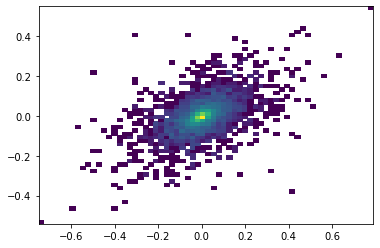

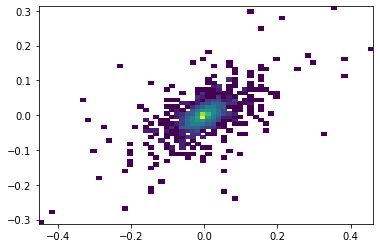

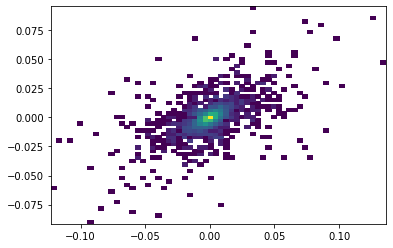

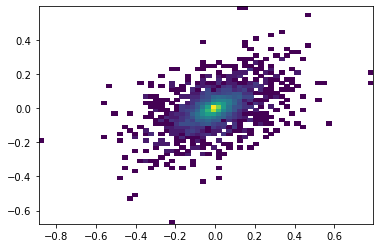

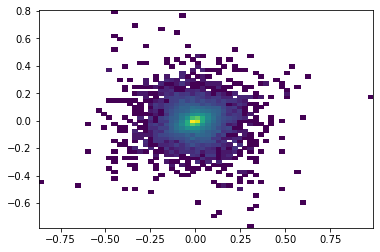

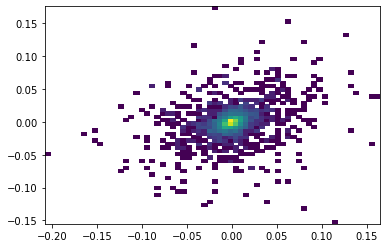

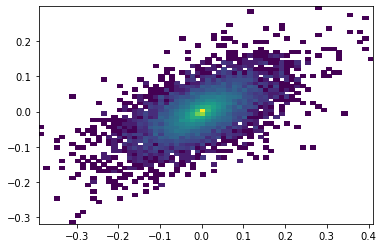

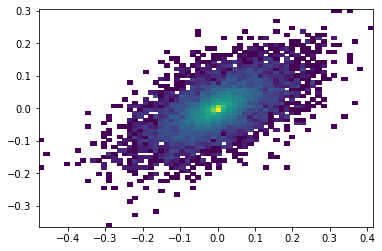

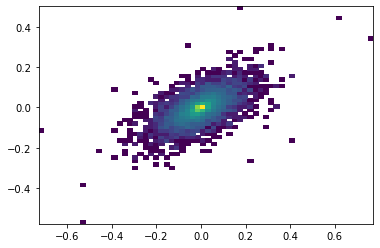

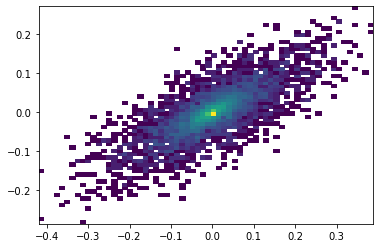

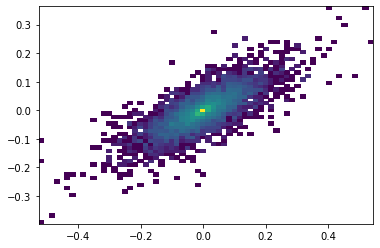

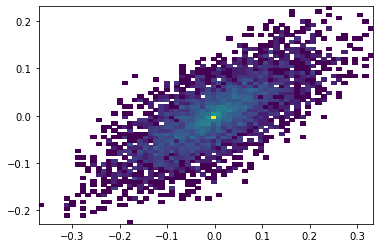

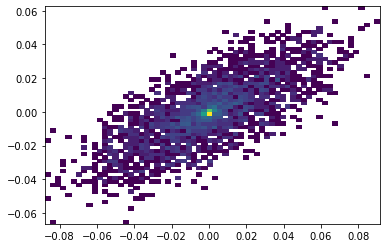

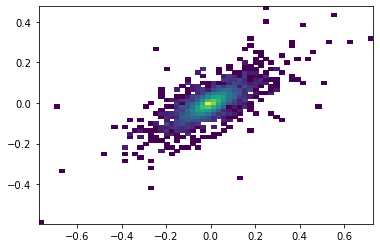

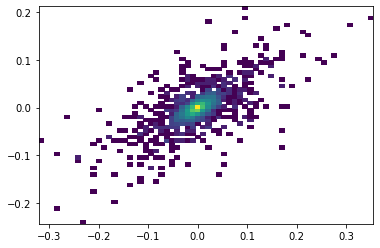

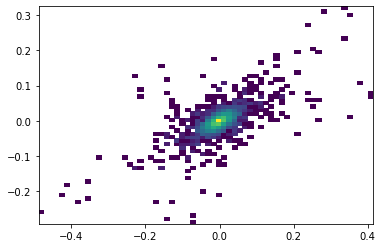

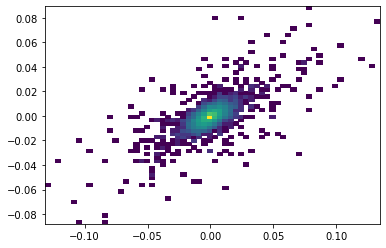

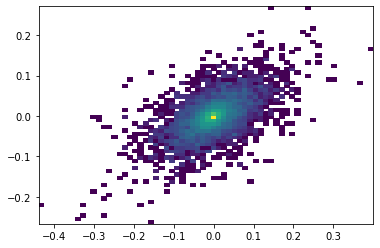

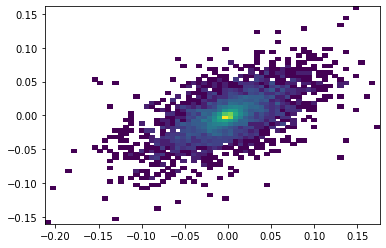

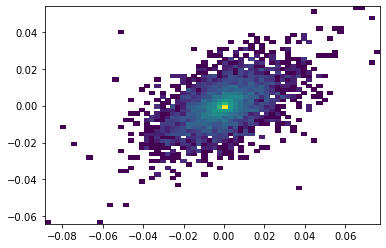

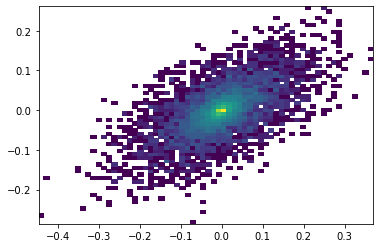

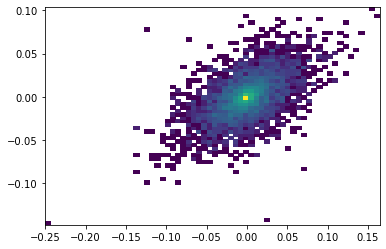

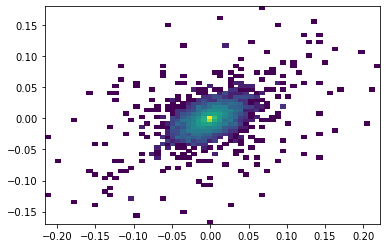

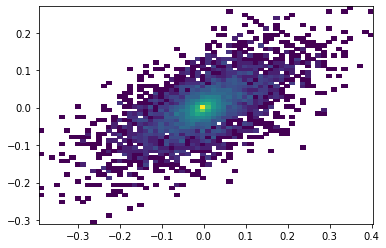

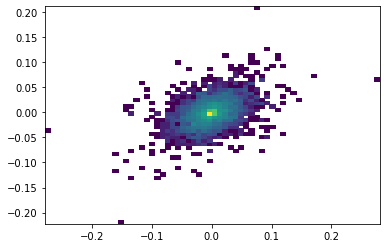

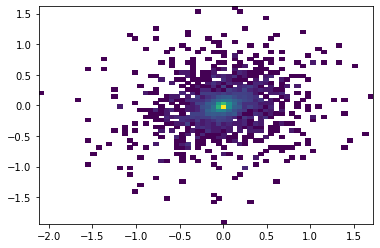

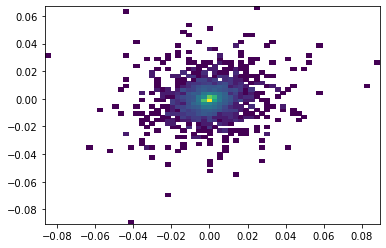

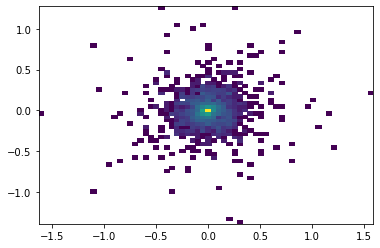

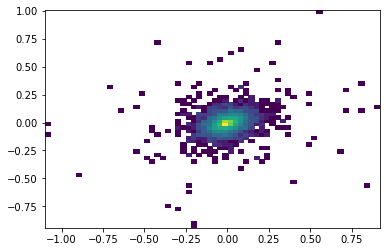

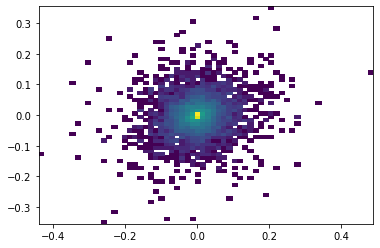

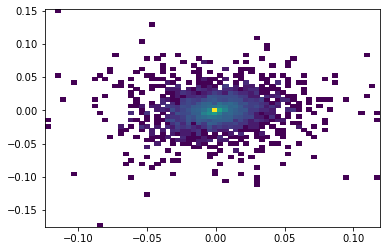

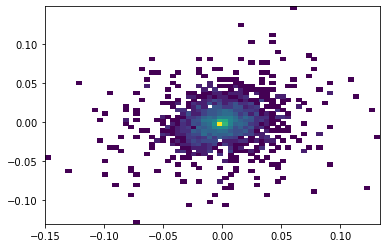

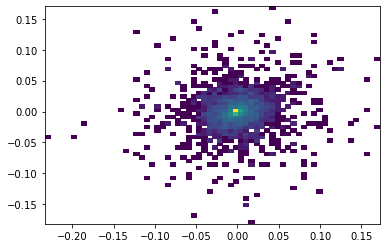

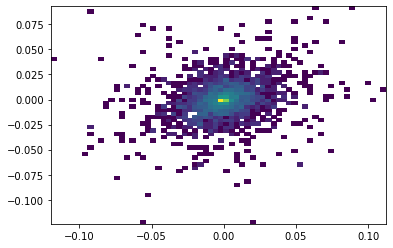

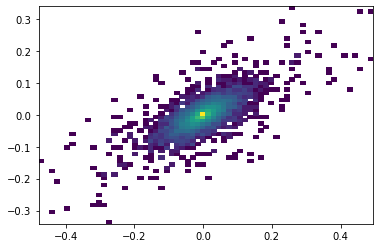

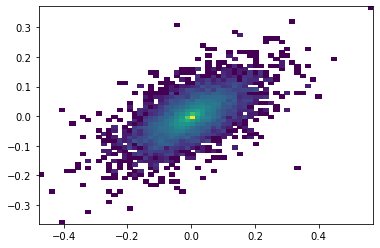

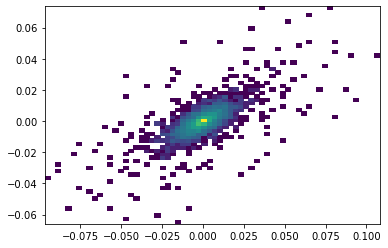

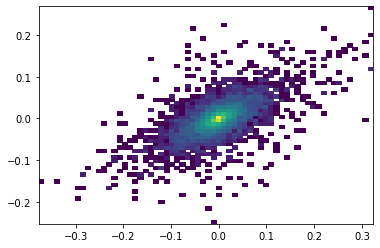

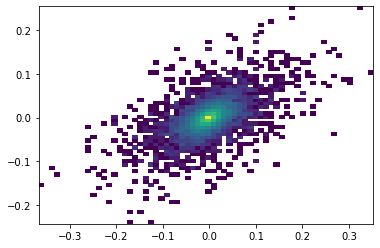

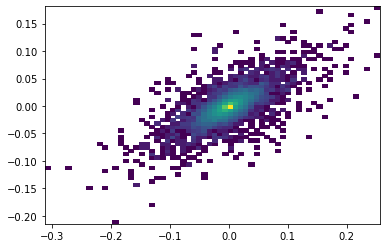

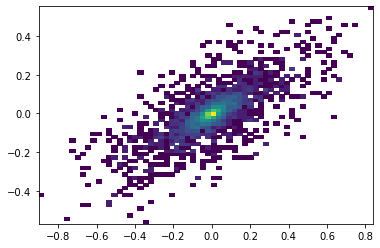

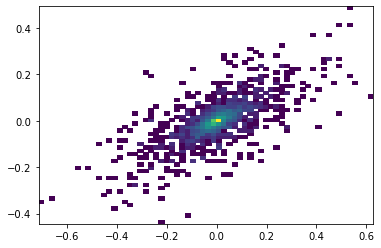

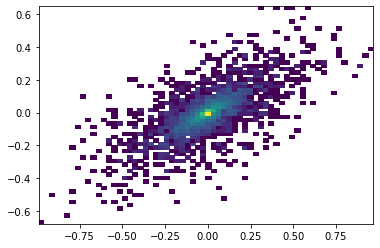

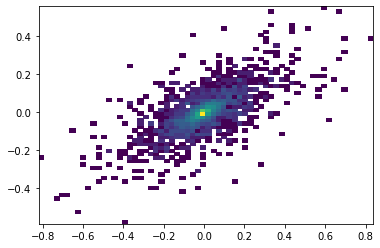

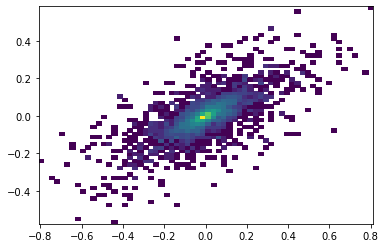

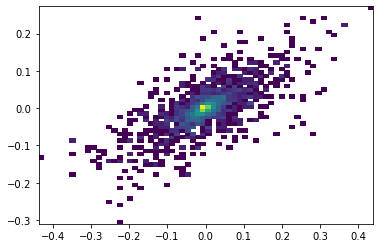

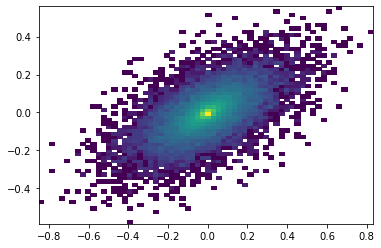

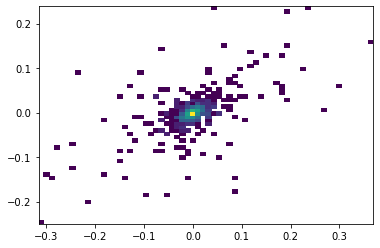

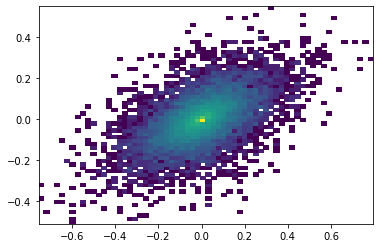

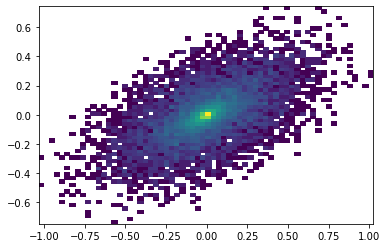

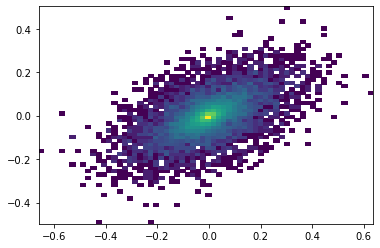

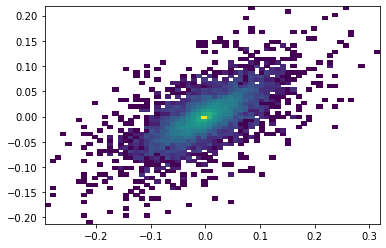

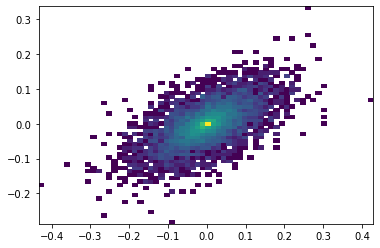

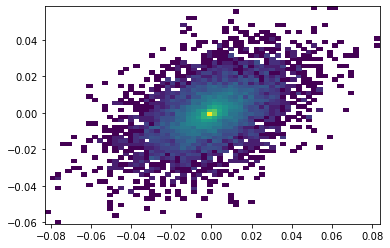

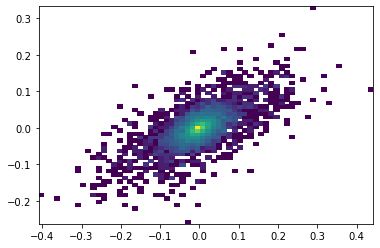

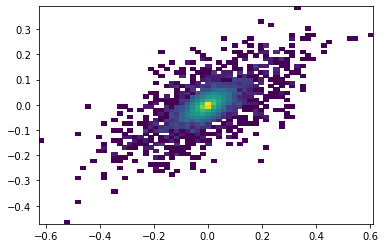

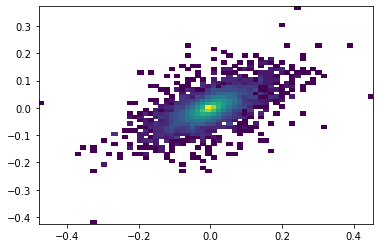

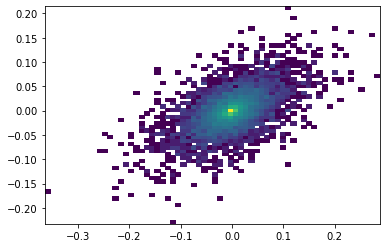

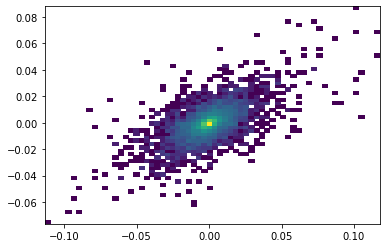

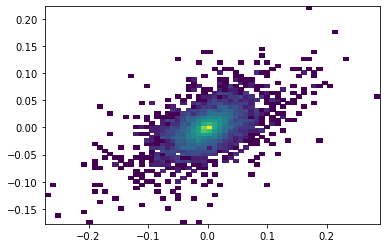

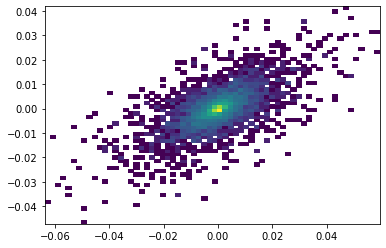

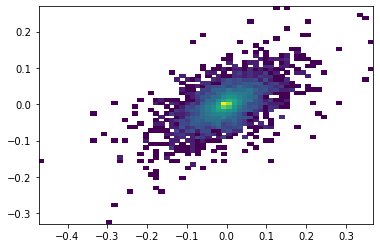

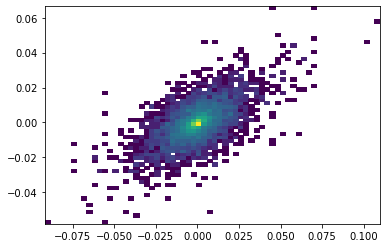

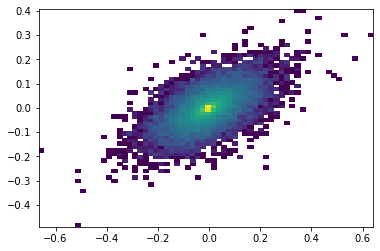

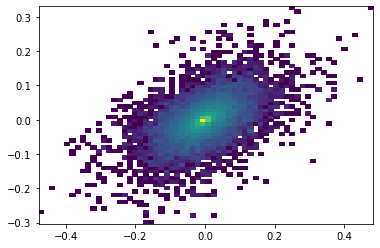

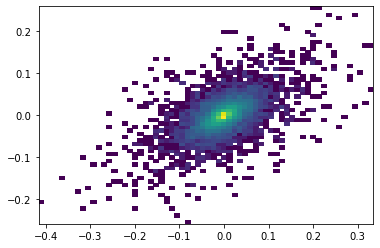

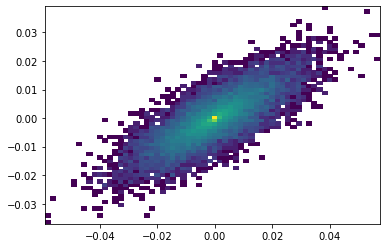

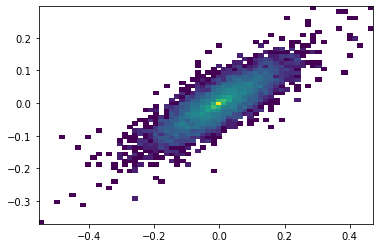

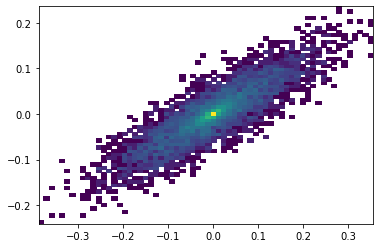

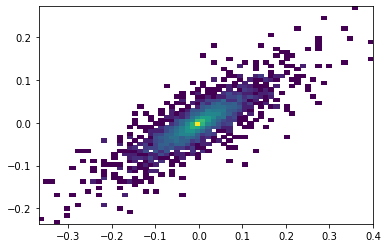

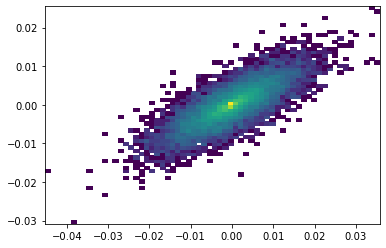

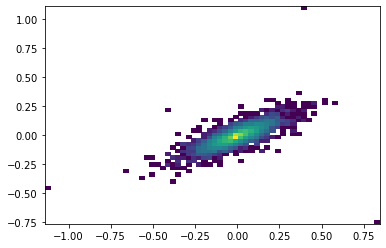

KeyboardInterrupt: 

In [29]:
# inspect 100 instances in 2D
for i in range(len(instances_2D[0:101])):
    data = pd.read_csv(instances_2D[i])
    plt.hist2d(data['v'], data['w'], norm=mpl.colors.LogNorm(),bins=64)
    plt.show()